In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

dv003.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/MICCAI-2023


In [2]:
import sys, os, pathlib
import numpy as np
import xarray as xr
import torch
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['DDEBACKEND'] = 'pytorch'
import deepxde

sys.path.append('..')
%aimport mre_pinn

torch.cuda.is_available()

Using backend: pytorch



True

In [ ]:
%autoreload
bioqic = mre_pinn.data.BIOQICFEMBox('../data/BIOQIC/downloads')
bioqic.download()
bioqic.load_mat()
bioqic.preprocess()
dataset = bioqic.to_dataset()
dataset.save_xarrays('../data/BIOQIC/fem_box')

Loading ../data/BIOQIC/fem_box/100/wave.nc
Loading ../data/BIOQIC/fem_box/100/mre.nc
Loading ../data/BIOQIC/fem_box/100/mre_mask.nc


<IPython.core.display.Javascript object>


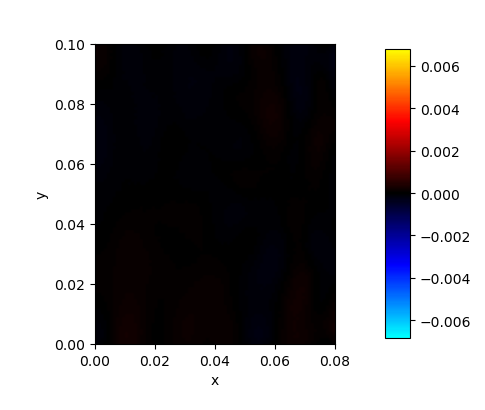

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

In [24]:
%autoreload
frequency = 100
example = mre_pinn.data.MREExample.load_xarrays('../data/BIOQIC/fem_box', frequency)
#example.add_gaussian_noise(0.001)
example.view('wave', ax_height=3)

In [8]:
example.metadata

size  spacing  origin  limit  center  extent
variable dimension                                              
wave     x            80    0.001     0.0  0.079  0.0395    0.08
         y           100    0.001     0.0  0.099  0.0495    0.10
         z            10    0.001     0.0  0.009  0.0045    0.01
mre      x            80    0.001     0.0  0.079  0.0395    0.08
         y           100    0.001     0.0  0.099  0.0495    0.10
         z            10    0.001     0.0  0.009  0.0045    0.01
mre_mask x            80    0.001     0.0  0.079  0.0395    0.08
         y           100    0.001     0.0  0.099  0.0495    0.10
         z            10    0.001     0.0  0.009  0.0045    0.01

In [9]:
example.describe()

dtype    count                     mean          std  \
variable component                                                              
wave     y          complex128  80000.0  -0.00000100-0.00000500j     0.000191   
         x          complex128  80000.0   0.00003800-0.00004900j     0.000192   
         z          complex128  80000.0  -0.00008600+0.00000600j     0.003931   
mre      scalar     complex128  80000.0  3382.375000+628.318531j  1590.727619   
mre_mask scalar          int64  80000.0   1.07650000+0.00000000j     0.362143   

                                        min                      25%  \
variable component                                                     
wave     y          -0.00030500+0.00004300j  -0.00005200+0.00011100j   
         x          -0.00043400-0.00022700j  -0.00001500+0.00003700j   
         z          -0.00992300+0.00235900j  -0.00131600-0.00074800j   
mre      scalar     3000.000000+628.318531j  3000.000000+628.318531j   
mre_mask scalar      1.00000000+0.00000000j   1.00000000+0.00000000j   

                                        50%                      75%  \
variable component                                                     
wave     y          -0.00000600+0.00003100j   0.00004600+0.00004500j   
         x           0.00003600+0.00015600j   0.00009700-0.00016000j   
         z          -0.00005800-0.00051100j   0.00109500-0.00054600j   
mre      scalar     3000.000000+628.318531j  3000.000000+628.318531j   
mre_mask scalar      1.00000000+0.00000000j   1.00000000+0.00000000j   

                                         max  
variable component                            
wave     y          0.000291000-0.000004000j  
         x          0.000466000-0.000245000j  
         z          0.008269000+0.002027000j  
mre      scalar     10000.000000+628.318531j  
mre_mask scalar     5.000000000+0.000000000j

Evaluating direct baseline
Evaluating FEM baseline
100%|██████████| 10/10 [00:30<00:00,  3.00s/it]


<IPython.core.display.Javascript object>


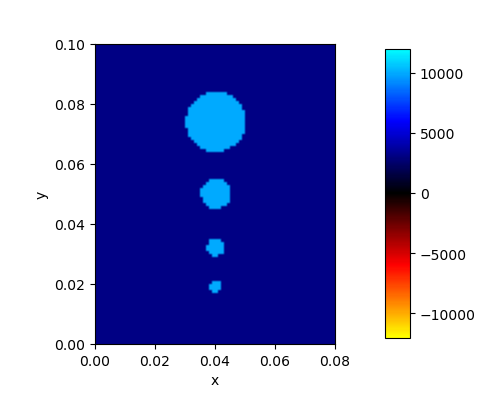

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

<IPython.core.display.Javascript object>


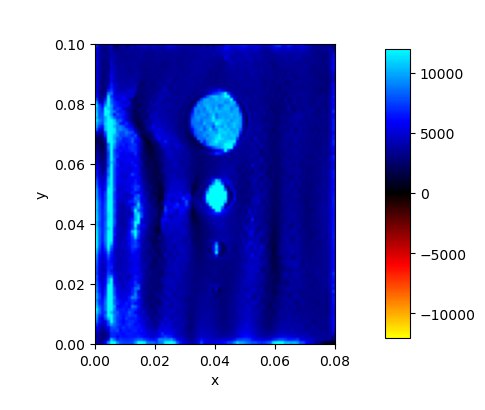

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

<IPython.core.display.Javascript object>


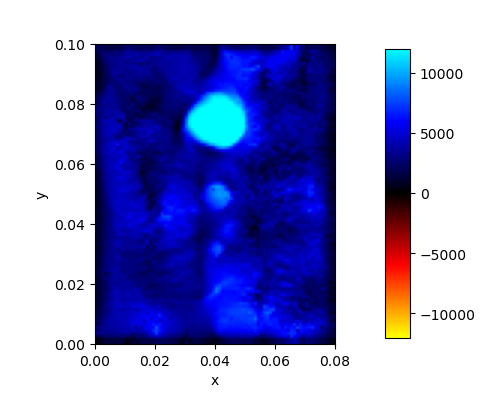

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

In [36]:
%autoreload
mre_pinn.baseline.eval_ahi_baseline(example, frequency=frequency)
mre_pinn.baseline.eval_fem_baseline(example, frequency=frequency, hetero=False)
example.view('mre', 'direct', 'fem', ax_height=3, polar=True, vmax=12e3)

In [37]:
example.vars()

dict_keys(['wave', 'mre', 'mre_mask', 'Lu', 'direct', 'fem'])

In [38]:
pde = mre_pinn.pde.WaveEquation.from_name('hetero', omega=frequency, detach=True)

In [56]:
%autoreload
pinn = mre_pinn.model.MREPINN(
    example,
    omega=60,
    n_layers=10,
    n_hidden=16,
    polar_input=False
)
pinn

MREPINN(
  (u_pinn): PINN(
    (hidden0): Linear(in_features=3, out_features=16, bias=True)
    (hidden1): Linear(in_features=19, out_features=16, bias=True)
    (hidden2): Linear(in_features=35, out_features=16, bias=True)
    (hidden3): Linear(in_features=51, out_features=16, bias=True)
    (hidden4): Linear(in_features=67, out_features=16, bias=True)
    (hidden5): Linear(in_features=83, out_features=16, bias=True)
    (hidden6): Linear(in_features=99, out_features=16, bias=True)
    (hidden7): Linear(in_features=115, out_features=16, bias=True)
    (hidden8): Linear(in_features=131, out_features=16, bias=True)
    (output): Linear(in_features=147, out_features=6, bias=True)
  )
  (mu_pinn): PINN(
    (hidden0): Linear(in_features=3, out_features=16, bias=True)
    (hidden1): Linear(in_features=19, out_features=16, bias=True)
    (hidden2): Linear(in_features=35, out_features=16, bias=True)
    (hidden3): Linear(in_features=51, out_features=16, bias=True)
    (hidden4): Linear(in_fe

In [57]:
%autoreload
model = mre_pinn.training.MREPINNModel(
    example, pinn, pde,
    loss_weights=[1, 0, 0, 1e-6],
    pde_warmup_iters=5000,
    pde_step_iters=5000,
    pde_init_weight=1e-10,
    n_points=1024
)
model.compile(optimizer='adam', lr=1e-4, loss=mre_pinn.training.losses.msae_loss)

Compiling model...
'compile' took 0.000275 s



In [51]:
%autoreload
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = False
model.benchmark(100)

# iterations: 100
Data time/iter:  0.0008s (0.76%)
Model time/iter: 0.0011s (0.97%)
Loss time/iter:  0.1097s (98.27%)
Total time/iter: 0.1117s
Total time: 11.1668s
1k iters time: 1.86m
10k iters time: 18.61m
100k iters time: 3.10h


<IPython.core.display.Javascript object>


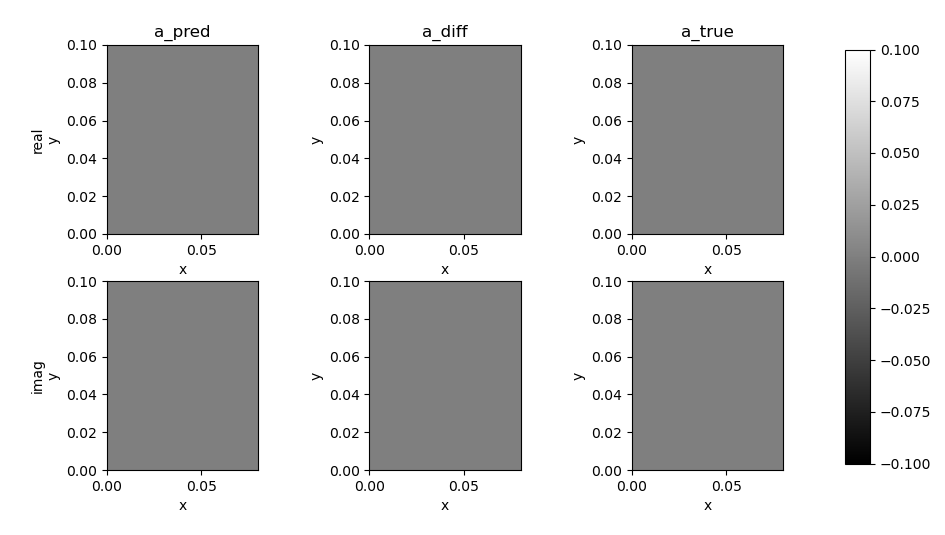

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


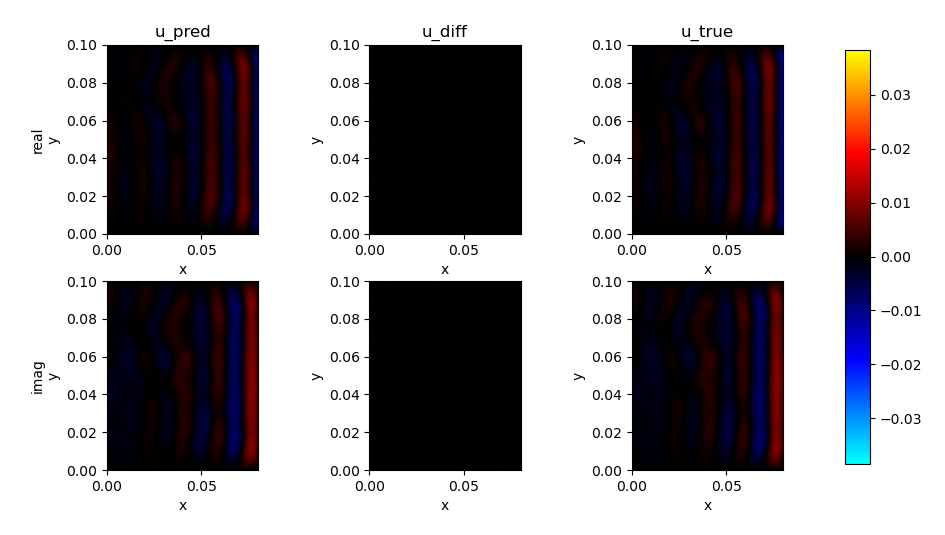

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


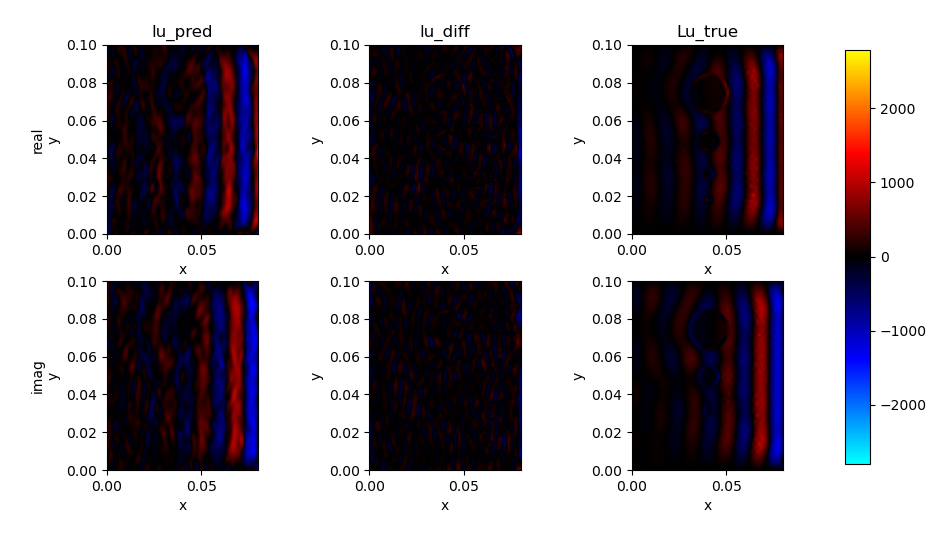

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


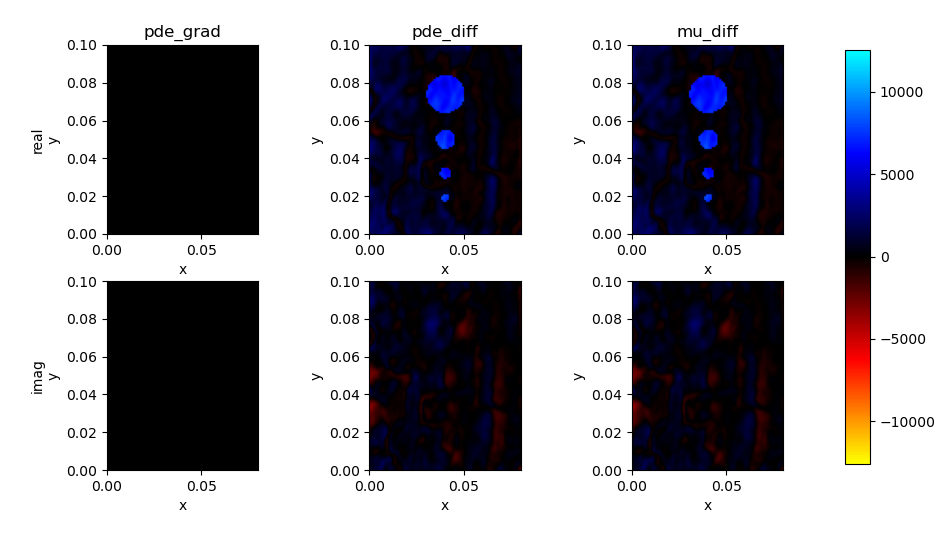

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


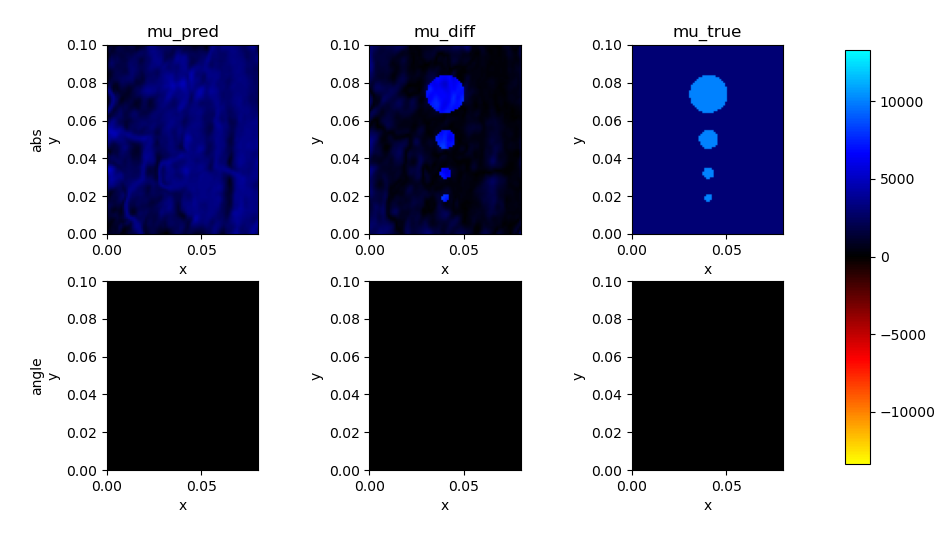

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


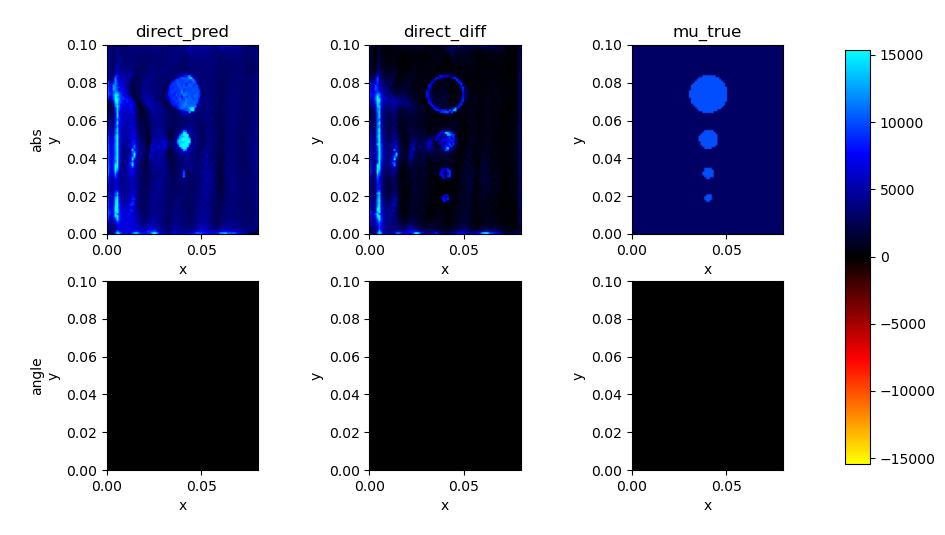

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


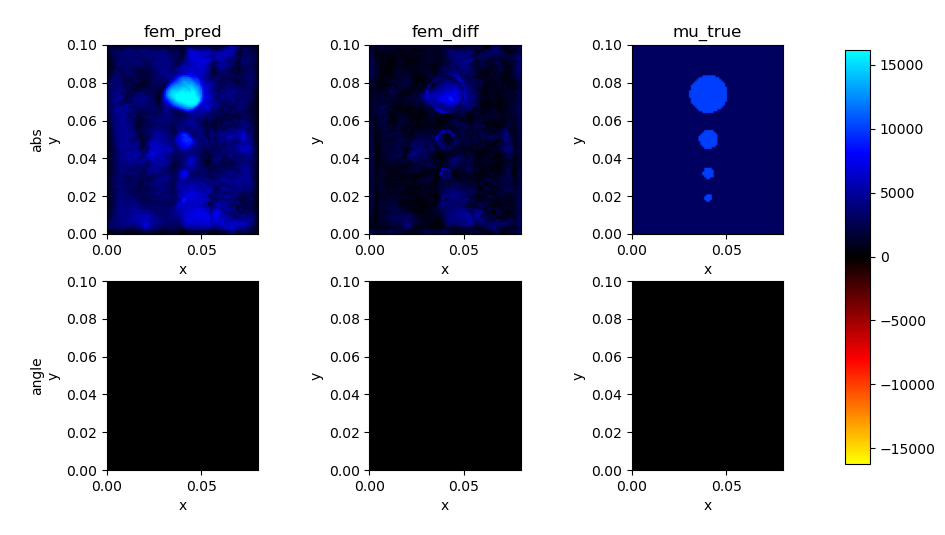

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

In [58]:
%autoreload
test_eval = mre_pinn.testing.TestEvaluator(test_every=100, interact=True)
test_eval.model = model
test_eval.test()

Training model...

0         [1.32e-04, 0.00e+00, 0.00e+00, 0.00e+00]    [1.33e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  


<IPython.core.display.Javascript object>


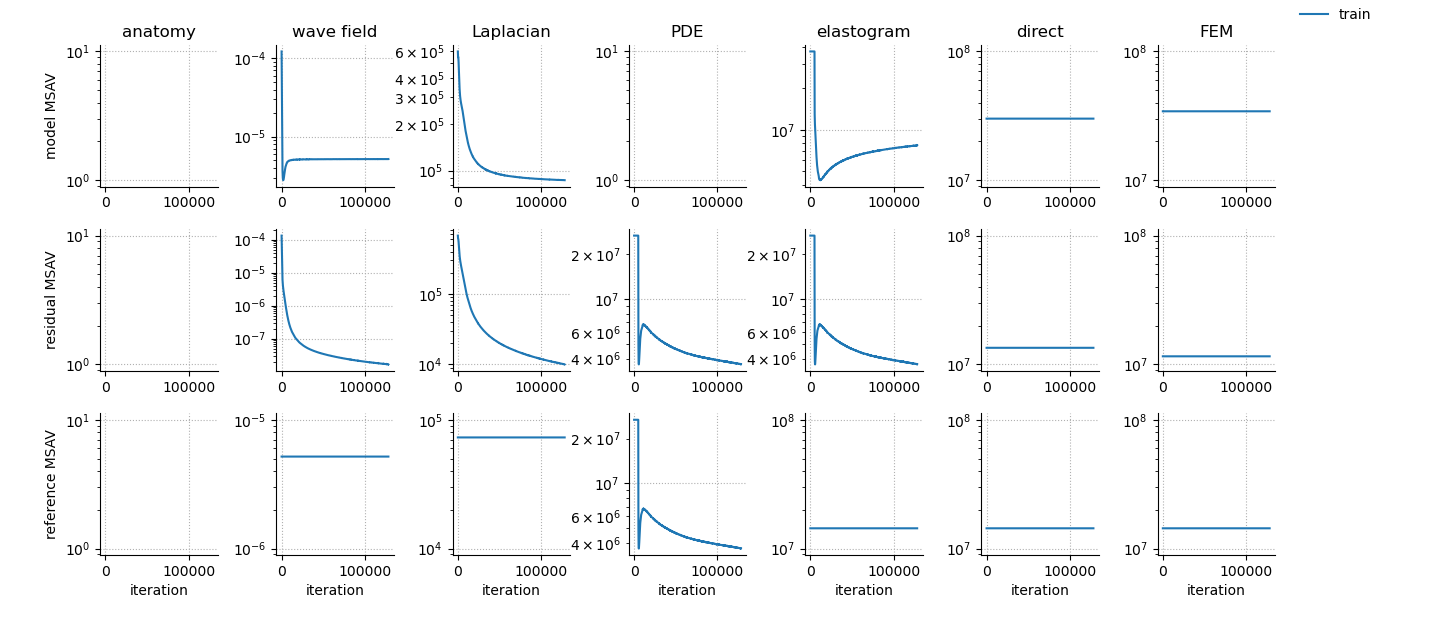

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)



<IPython.core.display.Javascript object>


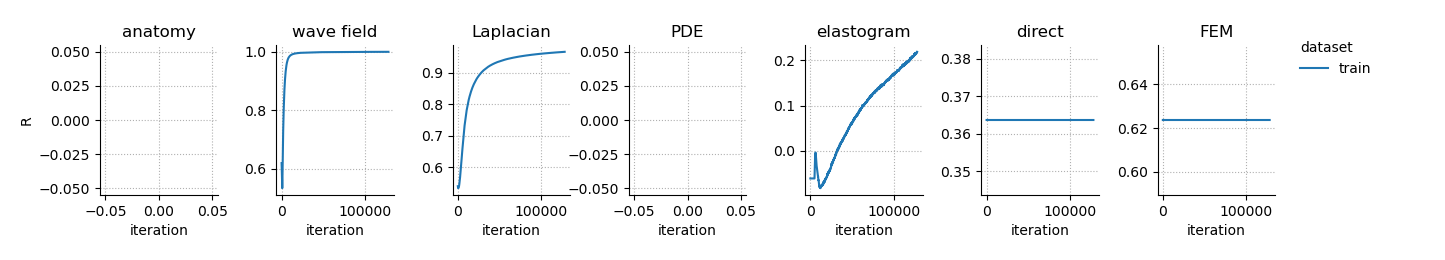

<IPython.core.display.Javascript object>


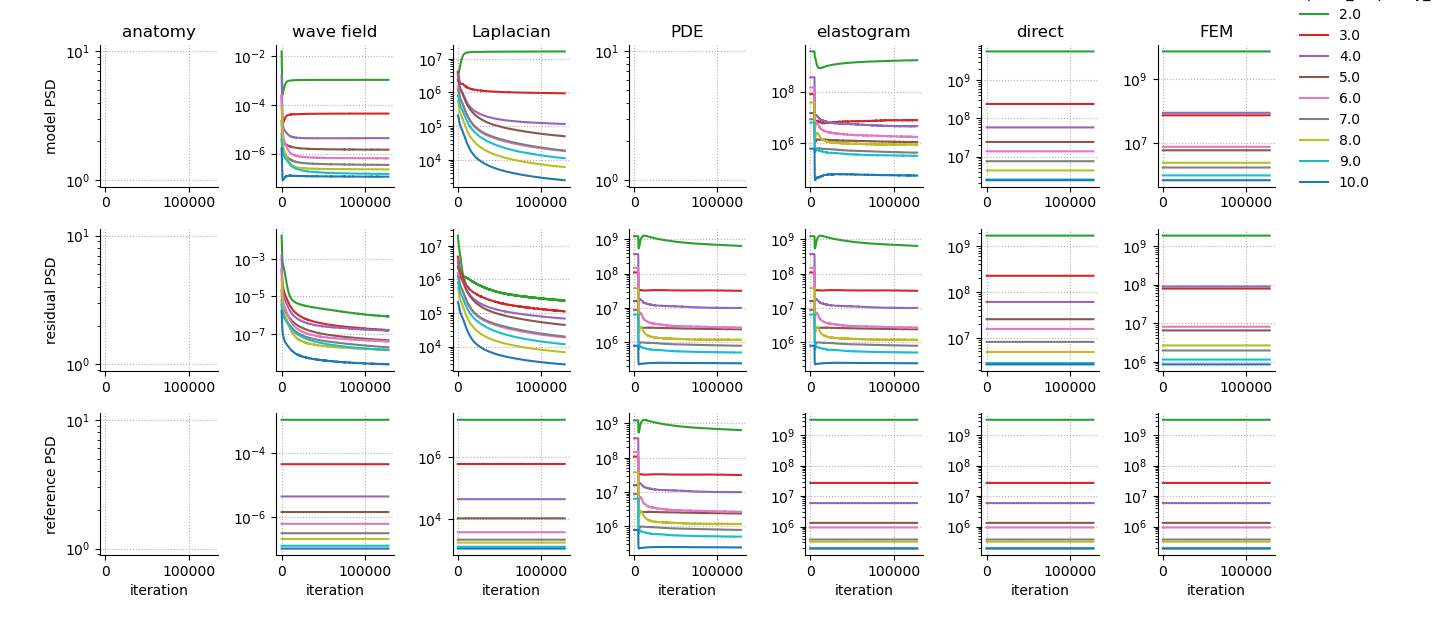

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)



<IPython.core.display.Javascript object>


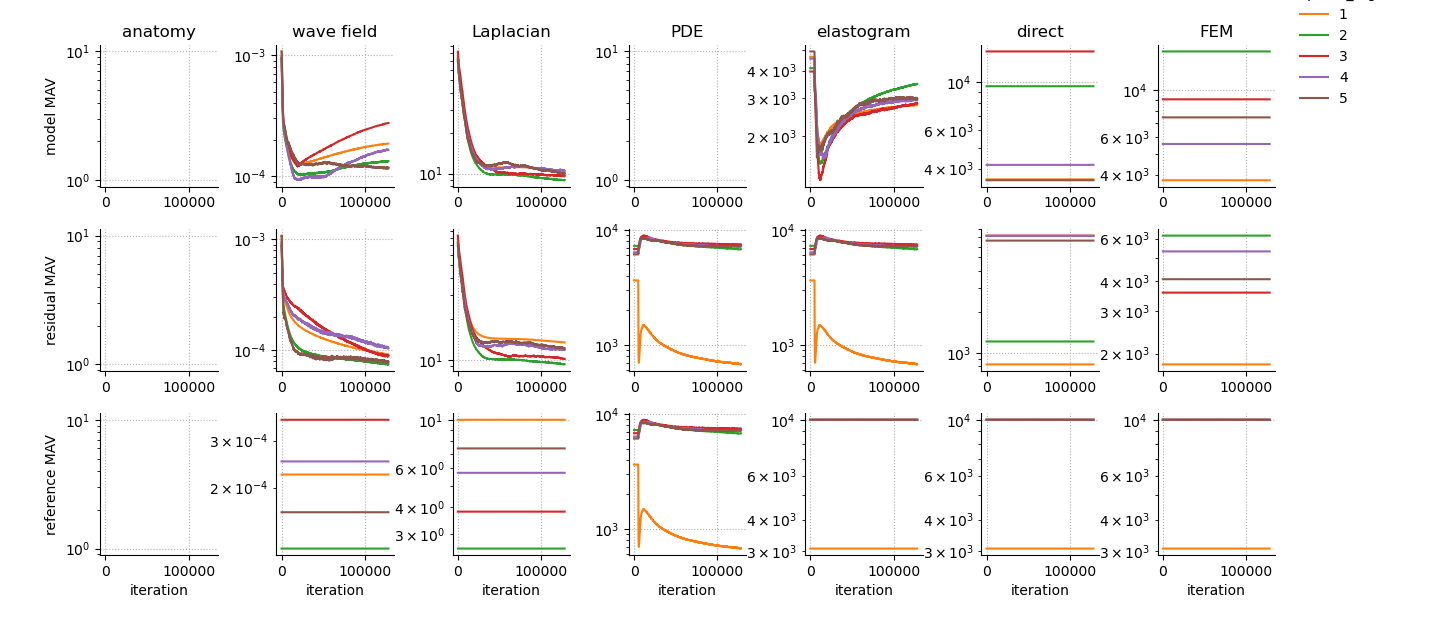

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)



Time spent testing: 32.2547 (38.30%)
10        [1.29e-04, 0.00e+00, 0.00e+00, 0.00e+00]    [1.29e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
20        [1.27e-04, 0.00e+00, 0.00e+00, 0.00e+00]    [1.25e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
30        [1.17e-04, 0.00e+00, 0.00e+00, 0.00e+00]    [1.21e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
40        [1.20e-04, 0.00e+00, 0.00e+00, 0.00e+00]    [1.17e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
50        [1.18e-04, 0.00e+00, 0.00e+00, 0.00e+00]    [1.13e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
60        [1.13e-04, 0.00e+00, 0.00e+00, 0.00e+00]    [1.10e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
70        [1.10e-04, 0.00e+00, 0.00e+00, 0.00e+00]    [1.06e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
80        [1.01e-04, 0.00e+00, 0.00e+00, 0.00e+00]    [1.03e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
90        [9.98e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.00e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
100       [9.25e-05, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.1122 (47.83%)
110       [9.57e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [9.38e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
120       [9.14e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [9.09e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
130       [8.68e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [8.80e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
140       [8.36e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [8.52e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
150       [8.02e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [8.25e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
160       [8.19e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [7.99e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
170       [7.81e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [7.73e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
180       [7.58e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [7.49e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
190       [6.99e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [7.24e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
200       [6.88e-05, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.3059 (52.72%)
210       [6.88e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [6.78e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
220       [6.34e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [6.57e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
230       [6.17e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [6.36e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
240       [6.21e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [6.15e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
250       [5.94e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [5.96e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
260       [5.70e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [5.76e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
270       [5.24e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [5.57e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
280       [5.54e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [5.39e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
290       [5.04e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [5.22e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
300       [5.04e-05, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.9694 (55.79%)
310       [5.01e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [4.88e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
320       [4.50e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [4.72e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
330       [4.61e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [4.56e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
340       [4.47e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [4.41e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
350       [4.09e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [4.26e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
360       [4.24e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [4.12e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
370       [3.90e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [3.98e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
380       [3.73e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [3.85e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
390       [3.59e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [3.72e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
400       [3.57e-05, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.8768 (57.67%)
410       [3.42e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [3.47e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
420       [3.34e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [3.36e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
430       [3.30e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [3.24e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
440       [2.96e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [3.13e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
450       [3.01e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [3.03e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
460       [2.91e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [2.92e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
470       [2.70e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [2.82e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
480       [2.66e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [2.72e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
490       [2.47e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [2.63e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
500       [2.54e-05, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.5121 (58.91%)
510       [2.37e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [2.45e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
520       [2.34e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [2.37e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
530       [2.29e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [2.29e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
540       [2.23e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [2.21e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
550       [2.15e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [2.13e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
560       [2.06e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [2.06e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
570       [2.10e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.99e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
580       [2.00e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.93e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
590       [1.84e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.86e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
600       [1.82e-05, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.9228 (60.00%)
610       [1.77e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.74e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
620       [1.57e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.69e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
630       [1.70e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.63e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
640       [1.45e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.58e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
650       [1.51e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.53e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
660       [1.51e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.48e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
670       [1.49e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.44e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
680       [1.44e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.39e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
690       [1.29e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.35e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
700       [1.31e-05, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.2143 (60.77%)
710       [1.29e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.27e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
720       [1.27e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.24e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
730       [1.29e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.21e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
740       [1.20e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.17e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
750       [1.17e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.14e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
760       [1.12e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.11e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
770       [1.10e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.08e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
780       [1.05e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.06e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
790       [9.46e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.03e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
800       [9.90e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.5972 (61.14%)
810       [9.83e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [9.83e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
820       [9.79e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [9.61e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
830       [9.90e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [9.40e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
840       [9.82e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [9.19e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
850       [9.12e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [9.00e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
860       [8.15e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [8.81e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
870       [8.38e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [8.64e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
880       [8.66e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [8.47e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
890       [8.27e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [8.30e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
900       [7.89e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.1141 (61.59%)
910       [8.47e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [7.99e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
920       [8.17e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [7.84e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
930       [7.90e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [7.70e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
940       [8.12e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [7.57e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
950       [7.86e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [7.44e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
960       [7.62e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [7.32e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
970       [7.42e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [7.21e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
980       [7.10e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [7.10e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
990       [7.30e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [6.99e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1000      [7.10e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.8610 (61.85%)
1010      [6.62e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [6.78e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1020      [6.53e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [6.68e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1030      [6.30e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [6.59e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1040      [6.63e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [6.50e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1050      [6.32e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [6.41e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1060      [6.22e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [6.33e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1070      [6.67e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [6.25e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1080      [6.13e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [6.17e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1090      [6.00e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [6.10e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1100      [6.01e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.8592 (62.16%)
1110      [6.16e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [5.95e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1120      [6.04e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [5.88e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1130      [6.17e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [5.81e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1140      [5.81e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [5.75e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1150      [5.67e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [5.69e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1160      [5.71e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [5.62e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1170      [5.67e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [5.56e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1180      [5.81e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [5.50e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1190      [5.68e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [5.45e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1200      [5.47e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.3125 (62.39%)
1210      [5.44e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [5.34e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1220      [5.53e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [5.29e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1230      [5.20e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [5.24e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1240      [5.27e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [5.19e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1250      [5.26e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [5.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1260      [5.09e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [5.10e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1270      [5.19e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [5.06e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1280      [5.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [5.01e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1290      [5.35e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.96e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1300      [5.14e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.3793 (62.68%)
1310      [5.19e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.87e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1320      [4.87e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.83e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1330      [4.83e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.79e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1340      [4.80e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.75e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1350      [4.74e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.71e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1360      [4.56e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.67e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1370      [4.74e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.64e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1380      [4.86e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.60e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1390      [4.38e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.57e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1400      [4.73e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.4969 (62.85%)
1410      [4.76e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.51e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1420      [4.49e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.48e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1430      [4.55e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.45e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1440      [4.37e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.41e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1450      [4.38e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.38e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1460      [4.32e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.35e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1470      [4.49e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.31e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1480      [4.19e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.28e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1490      [4.20e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.26e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1500      [4.28e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.1213 (63.03%)
1510      [4.30e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.20e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1520      [4.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.18e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1530      [4.21e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.15e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1540      [3.95e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.12e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1550      [4.11e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.09e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1560      [4.23e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.06e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1570      [4.17e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.04e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1580      [3.94e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [4.02e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1590      [4.04e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.99e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1600      [3.80e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.4051 (63.23%)
1610      [4.24e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.94e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1620      [3.98e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.92e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1630      [3.98e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.89e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1640      [4.00e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.87e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1650      [3.84e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.85e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1660      [3.75e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.83e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1670      [3.93e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.81e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1680      [3.94e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.78e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1690      [3.85e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.76e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1700      [3.75e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.4716 (63.36%)
1710      [3.89e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.72e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1720      [3.71e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.70e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1730      [3.70e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.68e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1740      [3.67e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.66e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1750      [3.71e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.63e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1760      [3.75e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.61e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1770      [3.68e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.59e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1780      [3.50e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.57e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1790      [3.72e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.55e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1800      [3.36e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.9641 (63.57%)
1810      [3.53e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.52e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1820      [3.60e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.50e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1830      [3.53e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.49e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1840      [3.52e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.47e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1850      [3.53e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.45e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1860      [3.53e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.43e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1870      [3.41e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.41e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1880      [3.58e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.39e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1890      [3.37e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.38e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1900      [3.46e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.6463 (63.71%)
1910      [3.31e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.35e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1920      [3.33e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.34e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1930      [3.37e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.32e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1940      [3.40e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.31e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1950      [3.29e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.29e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1960      [3.25e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.28e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1970      [3.35e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.26e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1980      [3.20e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.24e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1990      [3.30e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.23e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2000      [3.43e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.7455 (63.80%)
2010      [3.27e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.19e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2020      [3.20e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.18e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2030      [3.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.16e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2040      [3.16e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.15e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2050      [3.17e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.13e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2060      [3.18e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.12e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2070      [3.30e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.10e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2080      [2.96e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.09e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2090      [3.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.08e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2100      [3.12e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.4628 (63.93%)
2110      [3.13e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.05e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2120      [2.95e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.04e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2130      [3.09e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.02e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2140      [2.86e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [3.01e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2150      [3.03e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.99e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2160      [2.93e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.98e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2170      [3.07e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.97e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2180      [2.84e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.95e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2190      [2.91e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.94e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2200      [2.96e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.5513 (63.97%)
2210      [2.93e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.91e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2220      [3.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.90e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2230      [2.70e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.89e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2240      [2.93e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.87e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2250      [2.97e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.86e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2260      [2.74e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.85e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2270      [2.85e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.84e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2280      [2.77e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.82e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2290      [2.76e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.81e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2300      [2.94e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.5380 (64.08%)
2310      [2.82e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.79e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2320      [2.76e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.78e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2330      [2.79e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.77e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2340      [2.77e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.76e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2350      [2.77e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.75e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2360      [2.93e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.74e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2370      [2.64e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.73e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2380      [2.79e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.72e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2390      [2.72e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.70e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2400      [2.85e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.5968 (64.16%)
2410      [2.55e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.68e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2420      [2.65e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.67e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2430      [2.62e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.66e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2440      [2.81e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.65e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2450      [2.46e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.64e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2460      [2.64e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.63e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2470      [2.58e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.62e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2480      [2.51e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.61e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2490      [2.60e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.60e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2500      [2.60e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.3240 (64.28%)
2510      [2.49e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.58e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2520      [2.55e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.57e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2530      [2.49e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.56e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2540      [2.64e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.55e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2550      [2.54e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.54e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2560      [2.53e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.53e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2570      [2.62e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.52e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2580      [2.44e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.52e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2590      [2.45e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.51e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2600      [2.41e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.6643 (64.36%)
2610      [2.57e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.49e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2620      [2.42e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.47e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2630      [2.41e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.46e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2640      [2.49e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.45e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2650      [2.40e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.44e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2660      [2.47e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.43e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2670      [2.42e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.42e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2680      [2.40e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.41e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2690      [2.33e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.41e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2700      [2.51e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.3538 (64.45%)
2710      [2.41e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.39e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2720      [2.35e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.38e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2730      [2.40e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.37e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2740      [2.40e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.36e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2750      [2.34e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.35e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2760      [2.35e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.34e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2770      [2.39e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.33e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2780      [2.45e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.32e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2790      [2.29e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.32e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2800      [2.34e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.7823 (64.50%)
2810      [2.39e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.30e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2820      [2.37e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.29e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2830      [2.27e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.28e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2840      [2.23e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.27e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2850      [2.25e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.26e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2860      [2.13e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.25e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2870      [2.21e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.24e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2880      [2.25e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.23e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2890      [2.33e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.23e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2900      [2.33e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.4097 (64.60%)
2910      [2.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.21e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2920      [2.24e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.20e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2930      [2.12e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.19e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2940      [2.20e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.18e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2950      [2.16e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.17e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2960      [2.21e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.17e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2970      [2.05e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.16e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2980      [2.13e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.15e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2990      [2.13e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3000      [2.14e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.6025 (64.66%)
3010      [2.06e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.13e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3020      [2.06e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.12e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3030      [2.03e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.11e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3040      [2.00e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.10e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3050      [2.18e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.09e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3060      [1.99e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.08e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3070      [2.12e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.08e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3080      [1.97e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.07e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3090      [2.03e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.06e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3100      [2.00e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.3385 (64.70%)
3110      [2.03e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.05e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3120      [1.97e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.04e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3130      [2.08e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.03e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3140      [2.09e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.02e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3150      [1.96e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.02e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3160      [1.99e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.01e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3170      [1.82e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.00e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3180      [1.93e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.99e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3190      [1.99e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.98e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3200      [1.91e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.2649 (64.78%)
3210      [1.97e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.97e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3220      [2.07e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.97e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3230      [1.91e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.96e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3240      [1.92e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.95e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3250      [1.81e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.94e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3260      [1.84e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.93e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3270      [1.80e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.93e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3280      [1.88e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.92e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3290      [1.90e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.91e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3300      [1.95e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.6496 (64.84%)
3310      [1.91e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.91e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3320      [1.77e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.90e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3330      [1.80e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.89e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3340      [1.94e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.88e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3350      [1.77e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.88e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3360      [1.87e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.87e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3370      [1.84e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.86e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3380      [1.77e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.85e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3390      [1.82e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.85e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3400      [1.70e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.4255 (64.90%)
3410      [1.79e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.83e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3420      [1.80e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.82e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3430      [1.75e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.81e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3440      [1.83e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.81e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3450      [1.79e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.81e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3460      [1.76e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.80e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3470      [1.70e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.79e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3480      [1.64e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.79e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3490      [1.75e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.78e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3500      [1.81e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.7346 (64.95%)
3510      [1.82e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.77e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3520      [1.72e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.76e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3530      [1.67e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.76e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3540      [1.78e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.75e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3550      [1.74e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.74e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3560      [1.83e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.73e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3570      [1.76e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.72e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3580      [1.74e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.71e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3590      [1.62e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.71e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3600      [1.67e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.5746 (64.99%)
3610      [1.61e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.69e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3620      [1.63e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.68e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3630      [1.64e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.68e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3640      [1.67e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.67e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3650      [1.68e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.67e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3660      [1.61e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.66e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3670      [1.73e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.66e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3680      [1.56e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.65e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3690      [1.62e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.65e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3700      [1.60e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.8691 (65.03%)
3710      [1.64e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.64e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3720      [1.56e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.63e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3730      [1.51e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.62e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3740      [1.64e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.61e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3750      [1.60e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.60e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3760      [1.51e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.59e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3770      [1.66e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.59e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3780      [1.56e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.58e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3790      [1.60e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.58e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3800      [1.59e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.5970 (65.09%)
3810      [1.47e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.56e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3820      [1.58e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.56e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3830      [1.50e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.55e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3840      [1.52e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.55e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3850      [1.53e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.54e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3860      [1.53e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.53e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3870      [1.44e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.52e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3880      [1.46e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.52e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3890      [1.56e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.51e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3900      [1.65e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.8008 (65.11%)
3910      [1.53e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.50e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3920      [1.45e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.49e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3930      [1.41e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.49e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3940      [1.49e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.48e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3950      [1.48e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.48e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3960      [1.44e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.47e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3970      [1.40e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.47e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3980      [1.45e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.46e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3990      [1.45e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.46e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4000      [1.52e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.1841 (65.17%)
4010      [1.33e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.45e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4020      [1.39e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.45e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4030      [1.38e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.44e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4040      [1.40e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.43e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4050      [1.43e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.43e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4060      [1.40e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.42e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4070      [1.33e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.41e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4080      [1.42e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.41e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4090      [1.34e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.40e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4100      [1.40e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.6952 (65.20%)
4110      [1.31e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.39e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4120      [1.31e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.39e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4130      [1.31e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.39e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4140      [1.34e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.38e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4150      [1.29e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.37e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4160      [1.32e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.36e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4170      [1.35e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.36e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4180      [1.32e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.35e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4190      [1.38e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.35e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4200      [1.26e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.4735 (65.22%)
4210      [1.30e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.34e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4220      [1.33e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.33e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4230      [1.38e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.33e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4240      [1.28e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.32e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4250      [1.23e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.32e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4260      [1.31e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.32e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4270      [1.27e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.31e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4280      [1.25e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.30e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4290      [1.25e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.30e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4300      [1.24e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.8300 (65.23%)
4310      [1.18e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.29e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4320      [1.34e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.29e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4330      [1.20e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.28e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4340      [1.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.28e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4350      [1.24e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.27e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4360      [1.25e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.27e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4370      [1.18e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.26e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4380      [1.24e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.26e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4390      [1.20e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.26e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4400      [1.21e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.6349 (65.25%)
4410      [1.20e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.25e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4420      [1.20e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.24e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4430      [1.18e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.24e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4440      [1.16e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.23e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4450      [1.22e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.22e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4460      [1.12e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.22e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4470      [1.18e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.22e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4480      [1.18e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.22e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4490      [1.18e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.21e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4500      [1.08e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.6904 (65.28%)
4510      [1.21e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.20e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4520      [1.17e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.19e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4530      [1.13e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.19e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4540      [1.10e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.18e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4550      [1.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.18e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4560      [1.13e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.18e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4570      [1.10e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.17e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4580      [1.09e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.16e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4590      [1.11e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.16e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4600      [1.16e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.1410 (65.42%)
4610      [1.11e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.15e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4620      [1.13e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.15e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4630      [1.09e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.15e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4640      [1.13e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.15e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4650      [1.12e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4660      [1.05e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.13e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4670      [1.07e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.13e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4680      [1.06e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.12e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4690      [1.05e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.12e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4700      [1.04e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.2599 (65.46%)
4710      [1.18e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.11e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4720      [1.09e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.10e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4730      [1.04e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.10e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4740      [1.13e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.09e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4750      [1.06e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.09e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4760      [9.85e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.08e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4770      [1.03e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.08e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4780      [9.56e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.08e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4790      [1.03e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.08e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4800      [1.07e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.8112 (65.48%)
4810      [9.81e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.07e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4820      [1.02e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.06e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4830      [1.03e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.06e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4840      [9.65e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.05e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4850      [1.01e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.05e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4860      [1.00e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.04e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4870      [9.91e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.04e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4880      [1.01e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.04e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4890      [9.75e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.03e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4900      [9.71e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.9754 (65.50%)
4910      [9.86e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.02e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4920      [1.01e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.02e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4930      [9.72e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.01e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4940      [9.55e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.01e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4950      [9.82e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.01e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4960      [9.58e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.00e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4970      [9.36e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [9.99e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4980      [9.44e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [9.92e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4990      [9.58e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [9.87e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
5000      [9.97e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.8602 (65.53%)
5010      [9.52e-07, 0.00e+00, 0.00e+00, 7.81e+02]    [9.83e-07, 0.00e+00, 0.00e+00, 7.96e+02]    []  
5020      [9.56e-07, 0.00e+00, 0.00e+00, 7.06e+02]    [9.80e-07, 0.00e+00, 0.00e+00, 6.21e+02]    []  
5030      [9.04e-07, 0.00e+00, 0.00e+00, 5.33e+02]    [9.75e-07, 0.00e+00, 0.00e+00, 5.09e+02]    []  
5040      [1.02e-06, 0.00e+00, 0.00e+00, 4.94e+02]    [9.69e-07, 0.00e+00, 0.00e+00, 4.37e+02]    []  
5050      [8.73e-07, 0.00e+00, 0.00e+00, 4.10e+02]    [9.65e-07, 0.00e+00, 0.00e+00, 3.89e+02]    []  
5060      [9.48e-07, 0.00e+00, 0.00e+00, 3.98e+02]    [9.62e-07, 0.00e+00, 0.00e+00, 3.52e+02]    []  
5070      [9.19e-07, 0.00e+00, 0.00e+00, 3.60e+02]    [9.59e-07, 0.00e+00, 0.00e+00, 3.23e+02]    []  
5080      [9.39e-07, 0.00e+00, 0.00e+00, 3.50e+02]    [9.56e-07, 0.00e+00, 0.00e+00, 3.02e+02]    []  
5090      [9.17e-07, 0.00e+00, 0.00e+00, 3.16e+02]    [9.53e-07, 0.00e+00, 0.00e+00, 2.85e+02]    []  
5100      [8.79e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.8329 (65.56%)
5110      [8.88e-07, 0.00e+00, 0.00e+00, 2.82e+02]    [9.48e-07, 0.00e+00, 0.00e+00, 2.61e+02]    []  
5120      [9.35e-07, 0.00e+00, 0.00e+00, 2.71e+02]    [9.45e-07, 0.00e+00, 0.00e+00, 2.52e+02]    []  
5130      [8.85e-07, 0.00e+00, 0.00e+00, 2.78e+02]    [9.43e-07, 0.00e+00, 0.00e+00, 2.43e+02]    []  
5140      [8.70e-07, 0.00e+00, 0.00e+00, 2.52e+02]    [9.37e-07, 0.00e+00, 0.00e+00, 2.36e+02]    []  
5150      [9.18e-07, 0.00e+00, 0.00e+00, 2.62e+02]    [9.32e-07, 0.00e+00, 0.00e+00, 2.30e+02]    []  
5160      [9.19e-07, 0.00e+00, 0.00e+00, 2.44e+02]    [9.29e-07, 0.00e+00, 0.00e+00, 2.24e+02]    []  
5170      [8.44e-07, 0.00e+00, 0.00e+00, 2.25e+02]    [9.27e-07, 0.00e+00, 0.00e+00, 2.19e+02]    []  
5180      [8.93e-07, 0.00e+00, 0.00e+00, 2.45e+02]    [9.25e-07, 0.00e+00, 0.00e+00, 2.14e+02]    []  
5190      [8.63e-07, 0.00e+00, 0.00e+00, 2.32e+02]    [9.22e-07, 0.00e+00, 0.00e+00, 2.11e+02]    []  
5200      [8.48e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.1373 (65.58%)
5210      [8.03e-07, 0.00e+00, 0.00e+00, 2.01e+02]    [9.11e-07, 0.00e+00, 0.00e+00, 2.05e+02]    []  
5220      [8.36e-07, 0.00e+00, 0.00e+00, 2.11e+02]    [9.07e-07, 0.00e+00, 0.00e+00, 2.03e+02]    []  
5230      [8.86e-07, 0.00e+00, 0.00e+00, 2.11e+02]    [9.05e-07, 0.00e+00, 0.00e+00, 2.01e+02]    []  
5240      [8.13e-07, 0.00e+00, 0.00e+00, 2.08e+02]    [8.99e-07, 0.00e+00, 0.00e+00, 1.99e+02]    []  
5250      [8.31e-07, 0.00e+00, 0.00e+00, 2.05e+02]    [8.94e-07, 0.00e+00, 0.00e+00, 1.97e+02]    []  
5260      [8.50e-07, 0.00e+00, 0.00e+00, 1.94e+02]    [8.91e-07, 0.00e+00, 0.00e+00, 1.95e+02]    []  
5270      [8.17e-07, 0.00e+00, 0.00e+00, 1.96e+02]    [8.88e-07, 0.00e+00, 0.00e+00, 1.93e+02]    []  
5280      [8.84e-07, 0.00e+00, 0.00e+00, 1.96e+02]    [8.86e-07, 0.00e+00, 0.00e+00, 1.92e+02]    []  
5290      [8.69e-07, 0.00e+00, 0.00e+00, 1.91e+02]    [8.83e-07, 0.00e+00, 0.00e+00, 1.90e+02]    []  
5300      [8.36e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.4709 (65.61%)
5310      [8.20e-07, 0.00e+00, 0.00e+00, 1.85e+02]    [8.79e-07, 0.00e+00, 0.00e+00, 1.87e+02]    []  
5320      [8.68e-07, 0.00e+00, 0.00e+00, 2.02e+02]    [8.75e-07, 0.00e+00, 0.00e+00, 1.86e+02]    []  
5330      [8.83e-07, 0.00e+00, 0.00e+00, 1.97e+02]    [8.71e-07, 0.00e+00, 0.00e+00, 1.85e+02]    []  
5340      [8.03e-07, 0.00e+00, 0.00e+00, 1.96e+02]    [8.66e-07, 0.00e+00, 0.00e+00, 1.83e+02]    []  
5350      [8.67e-07, 0.00e+00, 0.00e+00, 1.83e+02]    [8.62e-07, 0.00e+00, 0.00e+00, 1.82e+02]    []  
5360      [8.27e-07, 0.00e+00, 0.00e+00, 1.77e+02]    [8.57e-07, 0.00e+00, 0.00e+00, 1.81e+02]    []  
5370      [8.32e-07, 0.00e+00, 0.00e+00, 1.78e+02]    [8.53e-07, 0.00e+00, 0.00e+00, 1.79e+02]    []  
5380      [8.48e-07, 0.00e+00, 0.00e+00, 1.89e+02]    [8.50e-07, 0.00e+00, 0.00e+00, 1.78e+02]    []  
5390      [8.26e-07, 0.00e+00, 0.00e+00, 2.02e+02]    [8.49e-07, 0.00e+00, 0.00e+00, 1.78e+02]    []  
5400      [8.38e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.2461 (65.61%)
5410      [8.75e-07, 0.00e+00, 0.00e+00, 1.82e+02]    [8.44e-07, 0.00e+00, 0.00e+00, 1.77e+02]    []  
5420      [8.27e-07, 0.00e+00, 0.00e+00, 1.74e+02]    [8.39e-07, 0.00e+00, 0.00e+00, 1.75e+02]    []  
5430      [8.44e-07, 0.00e+00, 0.00e+00, 1.74e+02]    [8.37e-07, 0.00e+00, 0.00e+00, 1.74e+02]    []  
5440      [8.59e-07, 0.00e+00, 0.00e+00, 1.72e+02]    [8.29e-07, 0.00e+00, 0.00e+00, 1.73e+02]    []  
5450      [7.98e-07, 0.00e+00, 0.00e+00, 1.64e+02]    [8.24e-07, 0.00e+00, 0.00e+00, 1.72e+02]    []  
5460      [7.67e-07, 0.00e+00, 0.00e+00, 1.78e+02]    [8.22e-07, 0.00e+00, 0.00e+00, 1.71e+02]    []  
5470      [8.90e-07, 0.00e+00, 0.00e+00, 1.82e+02]    [8.21e-07, 0.00e+00, 0.00e+00, 1.70e+02]    []  
5480      [8.06e-07, 0.00e+00, 0.00e+00, 1.69e+02]    [8.20e-07, 0.00e+00, 0.00e+00, 1.69e+02]    []  
5490      [8.68e-07, 0.00e+00, 0.00e+00, 1.72e+02]    [8.17e-07, 0.00e+00, 0.00e+00, 1.68e+02]    []  
5500      [7.55e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.8453 (65.64%)
5510      [7.66e-07, 0.00e+00, 0.00e+00, 1.67e+02]    [8.11e-07, 0.00e+00, 0.00e+00, 1.66e+02]    []  
5520      [8.04e-07, 0.00e+00, 0.00e+00, 1.74e+02]    [8.09e-07, 0.00e+00, 0.00e+00, 1.66e+02]    []  
5530      [7.43e-07, 0.00e+00, 0.00e+00, 1.75e+02]    [8.08e-07, 0.00e+00, 0.00e+00, 1.65e+02]    []  
5540      [7.77e-07, 0.00e+00, 0.00e+00, 1.64e+02]    [8.05e-07, 0.00e+00, 0.00e+00, 1.65e+02]    []  
5550      [7.59e-07, 0.00e+00, 0.00e+00, 1.53e+02]    [7.99e-07, 0.00e+00, 0.00e+00, 1.64e+02]    []  
5560      [7.53e-07, 0.00e+00, 0.00e+00, 1.68e+02]    [7.96e-07, 0.00e+00, 0.00e+00, 1.63e+02]    []  
5570      [8.02e-07, 0.00e+00, 0.00e+00, 1.72e+02]    [7.94e-07, 0.00e+00, 0.00e+00, 1.62e+02]    []  
5580      [7.72e-07, 0.00e+00, 0.00e+00, 1.61e+02]    [7.93e-07, 0.00e+00, 0.00e+00, 1.61e+02]    []  
5590      [7.61e-07, 0.00e+00, 0.00e+00, 1.62e+02]    [7.89e-07, 0.00e+00, 0.00e+00, 1.60e+02]    []  
5600      [7.78e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.9065 (65.63%)
5610      [7.09e-07, 0.00e+00, 0.00e+00, 1.55e+02]    [7.86e-07, 0.00e+00, 0.00e+00, 1.58e+02]    []  
5620      [7.33e-07, 0.00e+00, 0.00e+00, 1.51e+02]    [7.82e-07, 0.00e+00, 0.00e+00, 1.57e+02]    []  
5630      [7.60e-07, 0.00e+00, 0.00e+00, 1.50e+02]    [7.80e-07, 0.00e+00, 0.00e+00, 1.57e+02]    []  
5640      [7.95e-07, 0.00e+00, 0.00e+00, 1.59e+02]    [7.79e-07, 0.00e+00, 0.00e+00, 1.56e+02]    []  
5650      [7.47e-07, 0.00e+00, 0.00e+00, 1.55e+02]    [7.77e-07, 0.00e+00, 0.00e+00, 1.55e+02]    []  
5660      [7.70e-07, 0.00e+00, 0.00e+00, 1.60e+02]    [7.75e-07, 0.00e+00, 0.00e+00, 1.55e+02]    []  
5670      [7.58e-07, 0.00e+00, 0.00e+00, 1.59e+02]    [7.71e-07, 0.00e+00, 0.00e+00, 1.54e+02]    []  
5680      [6.98e-07, 0.00e+00, 0.00e+00, 1.53e+02]    [7.65e-07, 0.00e+00, 0.00e+00, 1.53e+02]    []  
5690      [7.76e-07, 0.00e+00, 0.00e+00, 1.54e+02]    [7.62e-07, 0.00e+00, 0.00e+00, 1.53e+02]    []  
5700      [7.14e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.2680 (65.65%)
5710      [6.96e-07, 0.00e+00, 0.00e+00, 1.46e+02]    [7.55e-07, 0.00e+00, 0.00e+00, 1.51e+02]    []  
5720      [7.08e-07, 0.00e+00, 0.00e+00, 1.34e+02]    [7.52e-07, 0.00e+00, 0.00e+00, 1.50e+02]    []  
5730      [7.54e-07, 0.00e+00, 0.00e+00, 1.50e+02]    [7.51e-07, 0.00e+00, 0.00e+00, 1.49e+02]    []  
5740      [7.33e-07, 0.00e+00, 0.00e+00, 1.64e+02]    [7.49e-07, 0.00e+00, 0.00e+00, 1.48e+02]    []  
5750      [6.91e-07, 0.00e+00, 0.00e+00, 1.49e+02]    [7.45e-07, 0.00e+00, 0.00e+00, 1.48e+02]    []  
5760      [7.19e-07, 0.00e+00, 0.00e+00, 1.41e+02]    [7.41e-07, 0.00e+00, 0.00e+00, 1.47e+02]    []  
5770      [7.39e-07, 0.00e+00, 0.00e+00, 1.50e+02]    [7.36e-07, 0.00e+00, 0.00e+00, 1.46e+02]    []  
5780      [7.29e-07, 0.00e+00, 0.00e+00, 1.45e+02]    [7.35e-07, 0.00e+00, 0.00e+00, 1.45e+02]    []  
5790      [7.34e-07, 0.00e+00, 0.00e+00, 1.50e+02]    [7.33e-07, 0.00e+00, 0.00e+00, 1.45e+02]    []  
5800      [6.82e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.8337 (65.67%)
5810      [6.79e-07, 0.00e+00, 0.00e+00, 1.38e+02]    [7.30e-07, 0.00e+00, 0.00e+00, 1.43e+02]    []  
5820      [6.89e-07, 0.00e+00, 0.00e+00, 1.43e+02]    [7.28e-07, 0.00e+00, 0.00e+00, 1.42e+02]    []  
5830      [7.63e-07, 0.00e+00, 0.00e+00, 1.43e+02]    [7.25e-07, 0.00e+00, 0.00e+00, 1.41e+02]    []  
5840      [7.19e-07, 0.00e+00, 0.00e+00, 1.34e+02]    [7.22e-07, 0.00e+00, 0.00e+00, 1.40e+02]    []  
5850      [6.75e-07, 0.00e+00, 0.00e+00, 1.35e+02]    [7.19e-07, 0.00e+00, 0.00e+00, 1.40e+02]    []  
5860      [6.81e-07, 0.00e+00, 0.00e+00, 1.40e+02]    [7.15e-07, 0.00e+00, 0.00e+00, 1.40e+02]    []  
5870      [7.03e-07, 0.00e+00, 0.00e+00, 1.46e+02]    [7.13e-07, 0.00e+00, 0.00e+00, 1.39e+02]    []  
5880      [6.81e-07, 0.00e+00, 0.00e+00, 1.37e+02]    [7.11e-07, 0.00e+00, 0.00e+00, 1.38e+02]    []  
5890      [6.69e-07, 0.00e+00, 0.00e+00, 1.39e+02]    [7.09e-07, 0.00e+00, 0.00e+00, 1.37e+02]    []  
5900      [6.91e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.6193 (65.69%)
5910      [6.56e-07, 0.00e+00, 0.00e+00, 1.34e+02]    [7.03e-07, 0.00e+00, 0.00e+00, 1.36e+02]    []  
5920      [7.17e-07, 0.00e+00, 0.00e+00, 1.36e+02]    [7.01e-07, 0.00e+00, 0.00e+00, 1.35e+02]    []  
5930      [6.77e-07, 0.00e+00, 0.00e+00, 1.31e+02]    [6.97e-07, 0.00e+00, 0.00e+00, 1.34e+02]    []  
5940      [6.66e-07, 0.00e+00, 0.00e+00, 1.28e+02]    [6.95e-07, 0.00e+00, 0.00e+00, 1.34e+02]    []  
5950      [6.74e-07, 0.00e+00, 0.00e+00, 1.47e+02]    [6.93e-07, 0.00e+00, 0.00e+00, 1.33e+02]    []  
5960      [6.66e-07, 0.00e+00, 0.00e+00, 1.35e+02]    [6.91e-07, 0.00e+00, 0.00e+00, 1.32e+02]    []  
5970      [7.04e-07, 0.00e+00, 0.00e+00, 1.42e+02]    [6.89e-07, 0.00e+00, 0.00e+00, 1.31e+02]    []  
5980      [6.70e-07, 0.00e+00, 0.00e+00, 1.32e+02]    [6.88e-07, 0.00e+00, 0.00e+00, 1.31e+02]    []  
5990      [6.25e-07, 0.00e+00, 0.00e+00, 1.27e+02]    [6.85e-07, 0.00e+00, 0.00e+00, 1.30e+02]    []  
6000      [6.24e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.0096 (65.72%)
6010      [6.48e-07, 0.00e+00, 0.00e+00, 1.25e+02]    [6.77e-07, 0.00e+00, 0.00e+00, 1.29e+02]    []  
6020      [6.47e-07, 0.00e+00, 0.00e+00, 1.25e+02]    [6.74e-07, 0.00e+00, 0.00e+00, 1.28e+02]    []  
6030      [6.46e-07, 0.00e+00, 0.00e+00, 1.24e+02]    [6.72e-07, 0.00e+00, 0.00e+00, 1.28e+02]    []  
6040      [7.04e-07, 0.00e+00, 0.00e+00, 1.35e+02]    [6.69e-07, 0.00e+00, 0.00e+00, 1.28e+02]    []  
6050      [6.51e-07, 0.00e+00, 0.00e+00, 1.35e+02]    [6.69e-07, 0.00e+00, 0.00e+00, 1.27e+02]    []  
6060      [6.75e-07, 0.00e+00, 0.00e+00, 1.30e+02]    [6.70e-07, 0.00e+00, 0.00e+00, 1.26e+02]    []  
6070      [6.50e-07, 0.00e+00, 0.00e+00, 1.28e+02]    [6.67e-07, 0.00e+00, 0.00e+00, 1.26e+02]    []  
6080      [6.48e-07, 0.00e+00, 0.00e+00, 1.26e+02]    [6.62e-07, 0.00e+00, 0.00e+00, 1.25e+02]    []  
6090      [6.43e-07, 0.00e+00, 0.00e+00, 1.29e+02]    [6.59e-07, 0.00e+00, 0.00e+00, 1.24e+02]    []  
6100      [6.48e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.9304 (65.74%)
6110      [6.67e-07, 0.00e+00, 0.00e+00, 1.14e+02]    [6.55e-07, 0.00e+00, 0.00e+00, 1.23e+02]    []  
6120      [6.37e-07, 0.00e+00, 0.00e+00, 1.14e+02]    [6.54e-07, 0.00e+00, 0.00e+00, 1.22e+02]    []  
6130      [6.36e-07, 0.00e+00, 0.00e+00, 1.21e+02]    [6.53e-07, 0.00e+00, 0.00e+00, 1.22e+02]    []  
6140      [6.74e-07, 0.00e+00, 0.00e+00, 1.22e+02]    [6.51e-07, 0.00e+00, 0.00e+00, 1.21e+02]    []  
6150      [6.25e-07, 0.00e+00, 0.00e+00, 1.19e+02]    [6.50e-07, 0.00e+00, 0.00e+00, 1.20e+02]    []  
6160      [6.34e-07, 0.00e+00, 0.00e+00, 1.22e+02]    [6.45e-07, 0.00e+00, 0.00e+00, 1.20e+02]    []  
6170      [6.45e-07, 0.00e+00, 0.00e+00, 1.37e+02]    [6.43e-07, 0.00e+00, 0.00e+00, 1.19e+02]    []  
6180      [5.99e-07, 0.00e+00, 0.00e+00, 1.18e+02]    [6.41e-07, 0.00e+00, 0.00e+00, 1.19e+02]    []  
6190      [6.44e-07, 0.00e+00, 0.00e+00, 1.14e+02]    [6.38e-07, 0.00e+00, 0.00e+00, 1.18e+02]    []  
6200      [5.94e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.9291 (65.77%)
6210      [5.94e-07, 0.00e+00, 0.00e+00, 1.19e+02]    [6.35e-07, 0.00e+00, 0.00e+00, 1.18e+02]    []  
6220      [5.99e-07, 0.00e+00, 0.00e+00, 1.23e+02]    [6.34e-07, 0.00e+00, 0.00e+00, 1.17e+02]    []  
6230      [6.41e-07, 0.00e+00, 0.00e+00, 1.16e+02]    [6.31e-07, 0.00e+00, 0.00e+00, 1.17e+02]    []  
6240      [5.79e-07, 0.00e+00, 0.00e+00, 1.13e+02]    [6.27e-07, 0.00e+00, 0.00e+00, 1.16e+02]    []  
6250      [5.78e-07, 0.00e+00, 0.00e+00, 1.13e+02]    [6.25e-07, 0.00e+00, 0.00e+00, 1.16e+02]    []  
6260      [5.99e-07, 0.00e+00, 0.00e+00, 1.17e+02]    [6.27e-07, 0.00e+00, 0.00e+00, 1.15e+02]    []  
6270      [6.11e-07, 0.00e+00, 0.00e+00, 1.14e+02]    [6.25e-07, 0.00e+00, 0.00e+00, 1.14e+02]    []  
6280      [5.88e-07, 0.00e+00, 0.00e+00, 1.12e+02]    [6.21e-07, 0.00e+00, 0.00e+00, 1.14e+02]    []  
6290      [6.28e-07, 0.00e+00, 0.00e+00, 1.19e+02]    [6.17e-07, 0.00e+00, 0.00e+00, 1.13e+02]    []  
6300      [6.09e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.0956 (65.79%)
6310      [6.13e-07, 0.00e+00, 0.00e+00, 1.15e+02]    [6.12e-07, 0.00e+00, 0.00e+00, 1.12e+02]    []  
6320      [6.30e-07, 0.00e+00, 0.00e+00, 1.19e+02]    [6.10e-07, 0.00e+00, 0.00e+00, 1.12e+02]    []  
6330      [6.01e-07, 0.00e+00, 0.00e+00, 1.11e+02]    [6.07e-07, 0.00e+00, 0.00e+00, 1.12e+02]    []  
6340      [6.15e-07, 0.00e+00, 0.00e+00, 1.14e+02]    [6.04e-07, 0.00e+00, 0.00e+00, 1.11e+02]    []  
6350      [5.97e-07, 0.00e+00, 0.00e+00, 1.04e+02]    [6.02e-07, 0.00e+00, 0.00e+00, 1.11e+02]    []  
6360      [5.85e-07, 0.00e+00, 0.00e+00, 1.12e+02]    [6.01e-07, 0.00e+00, 0.00e+00, 1.10e+02]    []  
6370      [5.76e-07, 0.00e+00, 0.00e+00, 1.10e+02]    [5.99e-07, 0.00e+00, 0.00e+00, 1.09e+02]    []  
6380      [5.78e-07, 0.00e+00, 0.00e+00, 1.11e+02]    [5.98e-07, 0.00e+00, 0.00e+00, 1.09e+02]    []  
6390      [5.90e-07, 0.00e+00, 0.00e+00, 1.10e+02]    [5.96e-07, 0.00e+00, 0.00e+00, 1.08e+02]    []  
6400      [5.79e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.9486 (65.80%)
6410      [6.39e-07, 0.00e+00, 0.00e+00, 1.03e+02]    [5.88e-07, 0.00e+00, 0.00e+00, 1.07e+02]    []  
6420      [5.77e-07, 0.00e+00, 0.00e+00, 1.10e+02]    [5.87e-07, 0.00e+00, 0.00e+00, 1.06e+02]    []  
6430      [5.59e-07, 0.00e+00, 0.00e+00, 1.02e+02]    [5.85e-07, 0.00e+00, 0.00e+00, 1.06e+02]    []  
6440      [5.77e-07, 0.00e+00, 0.00e+00, 1.02e+02]    [5.85e-07, 0.00e+00, 0.00e+00, 1.06e+02]    []  
6450      [5.92e-07, 0.00e+00, 0.00e+00, 1.04e+02]    [5.84e-07, 0.00e+00, 0.00e+00, 1.05e+02]    []  
6460      [5.60e-07, 0.00e+00, 0.00e+00, 1.03e+02]    [5.83e-07, 0.00e+00, 0.00e+00, 1.05e+02]    []  
6470      [5.89e-07, 0.00e+00, 0.00e+00, 1.04e+02]    [5.80e-07, 0.00e+00, 0.00e+00, 1.04e+02]    []  
6480      [5.45e-07, 0.00e+00, 0.00e+00, 1.05e+02]    [5.76e-07, 0.00e+00, 0.00e+00, 1.03e+02]    []  
6490      [5.20e-07, 0.00e+00, 0.00e+00, 1.02e+02]    [5.73e-07, 0.00e+00, 0.00e+00, 1.03e+02]    []  
6500      [6.22e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.5985 (65.80%)
6510      [5.22e-07, 0.00e+00, 0.00e+00, 1.03e+02]    [5.68e-07, 0.00e+00, 0.00e+00, 1.02e+02]    []  
6520      [5.52e-07, 0.00e+00, 0.00e+00, 1.02e+02]    [5.68e-07, 0.00e+00, 0.00e+00, 1.01e+02]    []  
6530      [5.50e-07, 0.00e+00, 0.00e+00, 9.99e+01]    [5.67e-07, 0.00e+00, 0.00e+00, 1.01e+02]    []  
6540      [5.41e-07, 0.00e+00, 0.00e+00, 9.62e+01]    [5.65e-07, 0.00e+00, 0.00e+00, 1.01e+02]    []  
6550      [5.54e-07, 0.00e+00, 0.00e+00, 1.04e+02]    [5.63e-07, 0.00e+00, 0.00e+00, 1.00e+02]    []  
6560      [5.41e-07, 0.00e+00, 0.00e+00, 1.02e+02]    [5.60e-07, 0.00e+00, 0.00e+00, 9.96e+01]    []  
6570      [5.91e-07, 0.00e+00, 0.00e+00, 1.08e+02]    [5.57e-07, 0.00e+00, 0.00e+00, 9.88e+01]    []  
6580      [5.39e-07, 0.00e+00, 0.00e+00, 9.42e+01]    [5.55e-07, 0.00e+00, 0.00e+00, 9.84e+01]    []  
6590      [5.75e-07, 0.00e+00, 0.00e+00, 1.04e+02]    [5.54e-07, 0.00e+00, 0.00e+00, 9.79e+01]    []  
6600      [5.30e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.7677 (65.82%)
6610      [5.51e-07, 0.00e+00, 0.00e+00, 9.71e+01]    [5.51e-07, 0.00e+00, 0.00e+00, 9.67e+01]    []  
6620      [5.07e-07, 0.00e+00, 0.00e+00, 9.37e+01]    [5.50e-07, 0.00e+00, 0.00e+00, 9.65e+01]    []  
6630      [5.61e-07, 0.00e+00, 0.00e+00, 9.94e+01]    [5.49e-07, 0.00e+00, 0.00e+00, 9.64e+01]    []  
6640      [5.64e-07, 0.00e+00, 0.00e+00, 1.02e+02]    [5.47e-07, 0.00e+00, 0.00e+00, 9.63e+01]    []  
6650      [5.64e-07, 0.00e+00, 0.00e+00, 9.85e+01]    [5.46e-07, 0.00e+00, 0.00e+00, 9.57e+01]    []  
6660      [5.12e-07, 0.00e+00, 0.00e+00, 9.37e+01]    [5.44e-07, 0.00e+00, 0.00e+00, 9.52e+01]    []  
6670      [5.41e-07, 0.00e+00, 0.00e+00, 9.73e+01]    [5.41e-07, 0.00e+00, 0.00e+00, 9.49e+01]    []  
6680      [5.28e-07, 0.00e+00, 0.00e+00, 9.62e+01]    [5.40e-07, 0.00e+00, 0.00e+00, 9.46e+01]    []  
6690      [5.10e-07, 0.00e+00, 0.00e+00, 9.60e+01]    [5.39e-07, 0.00e+00, 0.00e+00, 9.42e+01]    []  
6700      [5.70e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.8586 (65.84%)
6710      [5.13e-07, 0.00e+00, 0.00e+00, 9.58e+01]    [5.36e-07, 0.00e+00, 0.00e+00, 9.34e+01]    []  
6720      [5.65e-07, 0.00e+00, 0.00e+00, 9.24e+01]    [5.33e-07, 0.00e+00, 0.00e+00, 9.31e+01]    []  
6730      [5.27e-07, 0.00e+00, 0.00e+00, 9.54e+01]    [5.30e-07, 0.00e+00, 0.00e+00, 9.27e+01]    []  
6740      [5.12e-07, 0.00e+00, 0.00e+00, 9.57e+01]    [5.27e-07, 0.00e+00, 0.00e+00, 9.22e+01]    []  
6750      [4.95e-07, 0.00e+00, 0.00e+00, 8.95e+01]    [5.26e-07, 0.00e+00, 0.00e+00, 9.16e+01]    []  
6760      [5.46e-07, 0.00e+00, 0.00e+00, 9.54e+01]    [5.24e-07, 0.00e+00, 0.00e+00, 9.13e+01]    []  
6770      [5.39e-07, 0.00e+00, 0.00e+00, 9.05e+01]    [5.24e-07, 0.00e+00, 0.00e+00, 9.11e+01]    []  
6780      [5.20e-07, 0.00e+00, 0.00e+00, 9.17e+01]    [5.26e-07, 0.00e+00, 0.00e+00, 9.06e+01]    []  
6790      [5.33e-07, 0.00e+00, 0.00e+00, 9.74e+01]    [5.24e-07, 0.00e+00, 0.00e+00, 9.03e+01]    []  
6800      [5.16e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.4697 (65.86%)
6810      [5.34e-07, 0.00e+00, 0.00e+00, 9.01e+01]    [5.16e-07, 0.00e+00, 0.00e+00, 8.96e+01]    []  
6820      [5.03e-07, 0.00e+00, 0.00e+00, 8.89e+01]    [5.15e-07, 0.00e+00, 0.00e+00, 8.93e+01]    []  
6830      [4.88e-07, 0.00e+00, 0.00e+00, 8.37e+01]    [5.16e-07, 0.00e+00, 0.00e+00, 8.90e+01]    []  
6840      [4.84e-07, 0.00e+00, 0.00e+00, 9.16e+01]    [5.15e-07, 0.00e+00, 0.00e+00, 8.86e+01]    []  
6850      [5.21e-07, 0.00e+00, 0.00e+00, 8.84e+01]    [5.14e-07, 0.00e+00, 0.00e+00, 8.80e+01]    []  
6860      [4.89e-07, 0.00e+00, 0.00e+00, 8.83e+01]    [5.12e-07, 0.00e+00, 0.00e+00, 8.75e+01]    []  
6870      [5.04e-07, 0.00e+00, 0.00e+00, 8.37e+01]    [5.09e-07, 0.00e+00, 0.00e+00, 8.70e+01]    []  
6880      [5.02e-07, 0.00e+00, 0.00e+00, 9.13e+01]    [5.07e-07, 0.00e+00, 0.00e+00, 8.69e+01]    []  
6890      [5.12e-07, 0.00e+00, 0.00e+00, 8.42e+01]    [5.07e-07, 0.00e+00, 0.00e+00, 8.68e+01]    []  
6900      [4.88e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.8647 (65.87%)
6910      [4.93e-07, 0.00e+00, 0.00e+00, 8.57e+01]    [5.03e-07, 0.00e+00, 0.00e+00, 8.59e+01]    []  
6920      [4.94e-07, 0.00e+00, 0.00e+00, 8.53e+01]    [5.01e-07, 0.00e+00, 0.00e+00, 8.57e+01]    []  
6930      [5.20e-07, 0.00e+00, 0.00e+00, 9.05e+01]    [5.00e-07, 0.00e+00, 0.00e+00, 8.54e+01]    []  
6940      [4.72e-07, 0.00e+00, 0.00e+00, 8.77e+01]    [4.98e-07, 0.00e+00, 0.00e+00, 8.49e+01]    []  
6950      [4.97e-07, 0.00e+00, 0.00e+00, 8.52e+01]    [4.97e-07, 0.00e+00, 0.00e+00, 8.44e+01]    []  
6960      [5.02e-07, 0.00e+00, 0.00e+00, 8.73e+01]    [4.96e-07, 0.00e+00, 0.00e+00, 8.39e+01]    []  
6970      [4.82e-07, 0.00e+00, 0.00e+00, 8.37e+01]    [4.94e-07, 0.00e+00, 0.00e+00, 8.34e+01]    []  
6980      [4.63e-07, 0.00e+00, 0.00e+00, 8.93e+01]    [4.94e-07, 0.00e+00, 0.00e+00, 8.30e+01]    []  
6990      [4.92e-07, 0.00e+00, 0.00e+00, 7.93e+01]    [4.93e-07, 0.00e+00, 0.00e+00, 8.24e+01]    []  
7000      [4.41e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.1415 (65.87%)
7010      [4.98e-07, 0.00e+00, 0.00e+00, 8.04e+01]    [4.89e-07, 0.00e+00, 0.00e+00, 8.18e+01]    []  
7020      [4.51e-07, 0.00e+00, 0.00e+00, 8.82e+01]    [4.87e-07, 0.00e+00, 0.00e+00, 8.18e+01]    []  
7030      [5.09e-07, 0.00e+00, 0.00e+00, 8.49e+01]    [4.86e-07, 0.00e+00, 0.00e+00, 8.19e+01]    []  
7040      [4.88e-07, 0.00e+00, 0.00e+00, 7.88e+01]    [4.86e-07, 0.00e+00, 0.00e+00, 8.18e+01]    []  
7050      [4.56e-07, 0.00e+00, 0.00e+00, 8.54e+01]    [4.84e-07, 0.00e+00, 0.00e+00, 8.15e+01]    []  
7060      [4.92e-07, 0.00e+00, 0.00e+00, 8.26e+01]    [4.84e-07, 0.00e+00, 0.00e+00, 8.11e+01]    []  
7070      [4.86e-07, 0.00e+00, 0.00e+00, 8.60e+01]    [4.82e-07, 0.00e+00, 0.00e+00, 8.08e+01]    []  
7080      [4.78e-07, 0.00e+00, 0.00e+00, 8.19e+01]    [4.79e-07, 0.00e+00, 0.00e+00, 8.04e+01]    []  
7090      [4.83e-07, 0.00e+00, 0.00e+00, 8.61e+01]    [4.76e-07, 0.00e+00, 0.00e+00, 8.00e+01]    []  
7100      [4.75e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.9391 (65.88%)
7110      [4.57e-07, 0.00e+00, 0.00e+00, 8.13e+01]    [4.73e-07, 0.00e+00, 0.00e+00, 7.95e+01]    []  
7120      [4.81e-07, 0.00e+00, 0.00e+00, 8.21e+01]    [4.69e-07, 0.00e+00, 0.00e+00, 7.93e+01]    []  
7130      [4.84e-07, 0.00e+00, 0.00e+00, 7.71e+01]    [4.69e-07, 0.00e+00, 0.00e+00, 7.90e+01]    []  
7140      [4.50e-07, 0.00e+00, 0.00e+00, 8.07e+01]    [4.68e-07, 0.00e+00, 0.00e+00, 7.85e+01]    []  
7150      [4.61e-07, 0.00e+00, 0.00e+00, 7.30e+01]    [4.65e-07, 0.00e+00, 0.00e+00, 7.81e+01]    []  
7160      [4.45e-07, 0.00e+00, 0.00e+00, 7.75e+01]    [4.64e-07, 0.00e+00, 0.00e+00, 7.78e+01]    []  
7170      [4.60e-07, 0.00e+00, 0.00e+00, 8.07e+01]    [4.63e-07, 0.00e+00, 0.00e+00, 7.76e+01]    []  
7180      [4.81e-07, 0.00e+00, 0.00e+00, 7.98e+01]    [4.62e-07, 0.00e+00, 0.00e+00, 7.73e+01]    []  
7190      [4.72e-07, 0.00e+00, 0.00e+00, 7.65e+01]    [4.59e-07, 0.00e+00, 0.00e+00, 7.71e+01]    []  
7200      [4.48e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.6977 (65.91%)
7210      [4.46e-07, 0.00e+00, 0.00e+00, 7.51e+01]    [4.56e-07, 0.00e+00, 0.00e+00, 7.66e+01]    []  
7220      [4.42e-07, 0.00e+00, 0.00e+00, 7.66e+01]    [4.56e-07, 0.00e+00, 0.00e+00, 7.62e+01]    []  
7230      [4.45e-07, 0.00e+00, 0.00e+00, 7.41e+01]    [4.55e-07, 0.00e+00, 0.00e+00, 7.57e+01]    []  
7240      [4.53e-07, 0.00e+00, 0.00e+00, 7.18e+01]    [4.51e-07, 0.00e+00, 0.00e+00, 7.54e+01]    []  
7250      [4.62e-07, 0.00e+00, 0.00e+00, 7.65e+01]    [4.50e-07, 0.00e+00, 0.00e+00, 7.51e+01]    []  
7260      [4.53e-07, 0.00e+00, 0.00e+00, 7.12e+01]    [4.49e-07, 0.00e+00, 0.00e+00, 7.49e+01]    []  
7270      [4.52e-07, 0.00e+00, 0.00e+00, 6.90e+01]    [4.49e-07, 0.00e+00, 0.00e+00, 7.48e+01]    []  
7280      [4.49e-07, 0.00e+00, 0.00e+00, 7.93e+01]    [4.49e-07, 0.00e+00, 0.00e+00, 7.46e+01]    []  
7290      [4.31e-07, 0.00e+00, 0.00e+00, 6.96e+01]    [4.48e-07, 0.00e+00, 0.00e+00, 7.41e+01]    []  
7300      [4.16e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.2197 (65.93%)
7310      [4.35e-07, 0.00e+00, 0.00e+00, 7.30e+01]    [4.43e-07, 0.00e+00, 0.00e+00, 7.34e+01]    []  
7320      [4.62e-07, 0.00e+00, 0.00e+00, 7.50e+01]    [4.44e-07, 0.00e+00, 0.00e+00, 7.31e+01]    []  
7330      [4.14e-07, 0.00e+00, 0.00e+00, 8.02e+01]    [4.42e-07, 0.00e+00, 0.00e+00, 7.30e+01]    []  
7340      [4.39e-07, 0.00e+00, 0.00e+00, 7.68e+01]    [4.40e-07, 0.00e+00, 0.00e+00, 7.28e+01]    []  
7350      [4.38e-07, 0.00e+00, 0.00e+00, 7.42e+01]    [4.40e-07, 0.00e+00, 0.00e+00, 7.25e+01]    []  
7360      [4.02e-07, 0.00e+00, 0.00e+00, 6.99e+01]    [4.41e-07, 0.00e+00, 0.00e+00, 7.25e+01]    []  
7370      [4.14e-07, 0.00e+00, 0.00e+00, 7.47e+01]    [4.40e-07, 0.00e+00, 0.00e+00, 7.26e+01]    []  
7380      [4.39e-07, 0.00e+00, 0.00e+00, 7.33e+01]    [4.37e-07, 0.00e+00, 0.00e+00, 7.24e+01]    []  
7390      [4.18e-07, 0.00e+00, 0.00e+00, 7.41e+01]    [4.36e-07, 0.00e+00, 0.00e+00, 7.20e+01]    []  
7400      [4.09e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.1618 (65.93%)
7410      [4.26e-07, 0.00e+00, 0.00e+00, 7.39e+01]    [4.33e-07, 0.00e+00, 0.00e+00, 7.13e+01]    []  
7420      [3.88e-07, 0.00e+00, 0.00e+00, 7.01e+01]    [4.31e-07, 0.00e+00, 0.00e+00, 7.11e+01]    []  
7430      [4.18e-07, 0.00e+00, 0.00e+00, 6.99e+01]    [4.30e-07, 0.00e+00, 0.00e+00, 7.08e+01]    []  
7440      [4.36e-07, 0.00e+00, 0.00e+00, 6.86e+01]    [4.27e-07, 0.00e+00, 0.00e+00, 7.06e+01]    []  
7450      [3.99e-07, 0.00e+00, 0.00e+00, 6.87e+01]    [4.26e-07, 0.00e+00, 0.00e+00, 7.04e+01]    []  
7460      [4.02e-07, 0.00e+00, 0.00e+00, 7.05e+01]    [4.25e-07, 0.00e+00, 0.00e+00, 7.00e+01]    []  
7470      [4.19e-07, 0.00e+00, 0.00e+00, 6.78e+01]    [4.23e-07, 0.00e+00, 0.00e+00, 6.99e+01]    []  
7480      [4.27e-07, 0.00e+00, 0.00e+00, 6.54e+01]    [4.22e-07, 0.00e+00, 0.00e+00, 6.98e+01]    []  
7490      [3.98e-07, 0.00e+00, 0.00e+00, 6.68e+01]    [4.22e-07, 0.00e+00, 0.00e+00, 6.94e+01]    []  
7500      [3.97e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.3047 (65.96%)
7510      [4.09e-07, 0.00e+00, 0.00e+00, 6.72e+01]    [4.23e-07, 0.00e+00, 0.00e+00, 6.91e+01]    []  
7520      [4.40e-07, 0.00e+00, 0.00e+00, 6.73e+01]    [4.20e-07, 0.00e+00, 0.00e+00, 6.89e+01]    []  
7530      [4.35e-07, 0.00e+00, 0.00e+00, 7.01e+01]    [4.18e-07, 0.00e+00, 0.00e+00, 6.87e+01]    []  
7540      [3.79e-07, 0.00e+00, 0.00e+00, 6.62e+01]    [4.18e-07, 0.00e+00, 0.00e+00, 6.83e+01]    []  
7550      [3.91e-07, 0.00e+00, 0.00e+00, 6.47e+01]    [4.18e-07, 0.00e+00, 0.00e+00, 6.79e+01]    []  
7560      [4.13e-07, 0.00e+00, 0.00e+00, 6.93e+01]    [4.16e-07, 0.00e+00, 0.00e+00, 6.77e+01]    []  
7570      [4.18e-07, 0.00e+00, 0.00e+00, 6.61e+01]    [4.13e-07, 0.00e+00, 0.00e+00, 6.77e+01]    []  
7580      [3.82e-07, 0.00e+00, 0.00e+00, 6.95e+01]    [4.12e-07, 0.00e+00, 0.00e+00, 6.76e+01]    []  
7590      [3.95e-07, 0.00e+00, 0.00e+00, 6.53e+01]    [4.12e-07, 0.00e+00, 0.00e+00, 6.76e+01]    []  
7600      [4.06e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.6085 (65.98%)
7610      [3.90e-07, 0.00e+00, 0.00e+00, 6.84e+01]    [4.09e-07, 0.00e+00, 0.00e+00, 6.70e+01]    []  
7620      [3.99e-07, 0.00e+00, 0.00e+00, 6.69e+01]    [4.08e-07, 0.00e+00, 0.00e+00, 6.68e+01]    []  
7630      [3.89e-07, 0.00e+00, 0.00e+00, 6.48e+01]    [4.08e-07, 0.00e+00, 0.00e+00, 6.66e+01]    []  
7640      [4.07e-07, 0.00e+00, 0.00e+00, 6.34e+01]    [4.07e-07, 0.00e+00, 0.00e+00, 6.65e+01]    []  
7650      [4.04e-07, 0.00e+00, 0.00e+00, 6.77e+01]    [4.06e-07, 0.00e+00, 0.00e+00, 6.61e+01]    []  
7660      [4.06e-07, 0.00e+00, 0.00e+00, 6.41e+01]    [4.04e-07, 0.00e+00, 0.00e+00, 6.59e+01]    []  
7670      [4.02e-07, 0.00e+00, 0.00e+00, 6.75e+01]    [4.02e-07, 0.00e+00, 0.00e+00, 6.58e+01]    []  
7680      [3.95e-07, 0.00e+00, 0.00e+00, 5.97e+01]    [4.02e-07, 0.00e+00, 0.00e+00, 6.55e+01]    []  
7690      [3.75e-07, 0.00e+00, 0.00e+00, 6.49e+01]    [3.99e-07, 0.00e+00, 0.00e+00, 6.52e+01]    []  
7700      [3.99e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.9189 (65.99%)
7710      [3.84e-07, 0.00e+00, 0.00e+00, 6.05e+01]    [3.97e-07, 0.00e+00, 0.00e+00, 6.48e+01]    []  
7720      [3.68e-07, 0.00e+00, 0.00e+00, 6.66e+01]    [3.95e-07, 0.00e+00, 0.00e+00, 6.48e+01]    []  
7730      [3.79e-07, 0.00e+00, 0.00e+00, 5.72e+01]    [3.94e-07, 0.00e+00, 0.00e+00, 6.47e+01]    []  
7740      [4.02e-07, 0.00e+00, 0.00e+00, 6.44e+01]    [3.94e-07, 0.00e+00, 0.00e+00, 6.44e+01]    []  
7750      [3.89e-07, 0.00e+00, 0.00e+00, 6.25e+01]    [3.91e-07, 0.00e+00, 0.00e+00, 6.41e+01]    []  
7760      [3.72e-07, 0.00e+00, 0.00e+00, 6.13e+01]    [3.89e-07, 0.00e+00, 0.00e+00, 6.39e+01]    []  
7770      [3.92e-07, 0.00e+00, 0.00e+00, 6.47e+01]    [3.90e-07, 0.00e+00, 0.00e+00, 6.38e+01]    []  
7780      [3.77e-07, 0.00e+00, 0.00e+00, 6.53e+01]    [3.88e-07, 0.00e+00, 0.00e+00, 6.36e+01]    []  
7790      [3.76e-07, 0.00e+00, 0.00e+00, 6.40e+01]    [3.86e-07, 0.00e+00, 0.00e+00, 6.32e+01]    []  
7800      [3.89e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.4156 (66.01%)
7810      [3.96e-07, 0.00e+00, 0.00e+00, 6.22e+01]    [3.87e-07, 0.00e+00, 0.00e+00, 6.27e+01]    []  
7820      [3.82e-07, 0.00e+00, 0.00e+00, 6.23e+01]    [3.87e-07, 0.00e+00, 0.00e+00, 6.24e+01]    []  
7830      [3.72e-07, 0.00e+00, 0.00e+00, 6.07e+01]    [3.87e-07, 0.00e+00, 0.00e+00, 6.24e+01]    []  
7840      [3.93e-07, 0.00e+00, 0.00e+00, 6.37e+01]    [3.85e-07, 0.00e+00, 0.00e+00, 6.22e+01]    []  
7850      [3.66e-07, 0.00e+00, 0.00e+00, 6.58e+01]    [3.85e-07, 0.00e+00, 0.00e+00, 6.20e+01]    []  
7860      [3.82e-07, 0.00e+00, 0.00e+00, 5.83e+01]    [3.83e-07, 0.00e+00, 0.00e+00, 6.19e+01]    []  
7870      [4.03e-07, 0.00e+00, 0.00e+00, 5.94e+01]    [3.83e-07, 0.00e+00, 0.00e+00, 6.16e+01]    []  
7880      [3.85e-07, 0.00e+00, 0.00e+00, 6.08e+01]    [3.81e-07, 0.00e+00, 0.00e+00, 6.13e+01]    []  
7890      [3.76e-07, 0.00e+00, 0.00e+00, 6.27e+01]    [3.79e-07, 0.00e+00, 0.00e+00, 6.12e+01]    []  
7900      [3.70e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.4242 (66.03%)
7910      [3.71e-07, 0.00e+00, 0.00e+00, 5.75e+01]    [3.77e-07, 0.00e+00, 0.00e+00, 6.13e+01]    []  
7920      [3.56e-07, 0.00e+00, 0.00e+00, 6.12e+01]    [3.74e-07, 0.00e+00, 0.00e+00, 6.12e+01]    []  
7930      [3.95e-07, 0.00e+00, 0.00e+00, 6.15e+01]    [3.73e-07, 0.00e+00, 0.00e+00, 6.10e+01]    []  
7940      [3.92e-07, 0.00e+00, 0.00e+00, 6.30e+01]    [3.74e-07, 0.00e+00, 0.00e+00, 6.08e+01]    []  
7950      [3.67e-07, 0.00e+00, 0.00e+00, 5.67e+01]    [3.74e-07, 0.00e+00, 0.00e+00, 6.07e+01]    []  
7960      [3.62e-07, 0.00e+00, 0.00e+00, 5.60e+01]    [3.73e-07, 0.00e+00, 0.00e+00, 6.05e+01]    []  
7970      [3.72e-07, 0.00e+00, 0.00e+00, 6.46e+01]    [3.70e-07, 0.00e+00, 0.00e+00, 6.02e+01]    []  
7980      [3.41e-07, 0.00e+00, 0.00e+00, 5.91e+01]    [3.69e-07, 0.00e+00, 0.00e+00, 5.99e+01]    []  
7990      [3.61e-07, 0.00e+00, 0.00e+00, 5.90e+01]    [3.70e-07, 0.00e+00, 0.00e+00, 5.99e+01]    []  
8000      [3.57e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.2153 (66.00%)
8010      [3.56e-07, 0.00e+00, 0.00e+00, 5.65e+01]    [3.68e-07, 0.00e+00, 0.00e+00, 5.95e+01]    []  
8020      [3.60e-07, 0.00e+00, 0.00e+00, 5.84e+01]    [3.67e-07, 0.00e+00, 0.00e+00, 5.94e+01]    []  
8030      [3.74e-07, 0.00e+00, 0.00e+00, 6.28e+01]    [3.67e-07, 0.00e+00, 0.00e+00, 5.96e+01]    []  
8040      [3.38e-07, 0.00e+00, 0.00e+00, 5.35e+01]    [3.64e-07, 0.00e+00, 0.00e+00, 5.96e+01]    []  
8050      [3.57e-07, 0.00e+00, 0.00e+00, 5.45e+01]    [3.65e-07, 0.00e+00, 0.00e+00, 5.94e+01]    []  
8060      [3.78e-07, 0.00e+00, 0.00e+00, 5.84e+01]    [3.65e-07, 0.00e+00, 0.00e+00, 5.91e+01]    []  
8070      [3.49e-07, 0.00e+00, 0.00e+00, 5.39e+01]    [3.63e-07, 0.00e+00, 0.00e+00, 5.89e+01]    []  
8080      [3.62e-07, 0.00e+00, 0.00e+00, 5.48e+01]    [3.63e-07, 0.00e+00, 0.00e+00, 5.88e+01]    []  
8090      [3.46e-07, 0.00e+00, 0.00e+00, 5.48e+01]    [3.63e-07, 0.00e+00, 0.00e+00, 5.87e+01]    []  
8100      [3.62e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.9585 (65.98%)
8110      [3.62e-07, 0.00e+00, 0.00e+00, 5.42e+01]    [3.60e-07, 0.00e+00, 0.00e+00, 5.84e+01]    []  
8120      [3.41e-07, 0.00e+00, 0.00e+00, 5.40e+01]    [3.59e-07, 0.00e+00, 0.00e+00, 5.83e+01]    []  
8130      [3.48e-07, 0.00e+00, 0.00e+00, 5.61e+01]    [3.57e-07, 0.00e+00, 0.00e+00, 5.80e+01]    []  
8140      [3.49e-07, 0.00e+00, 0.00e+00, 5.82e+01]    [3.56e-07, 0.00e+00, 0.00e+00, 5.79e+01]    []  
8150      [3.48e-07, 0.00e+00, 0.00e+00, 5.70e+01]    [3.54e-07, 0.00e+00, 0.00e+00, 5.77e+01]    []  
8160      [3.50e-07, 0.00e+00, 0.00e+00, 5.50e+01]    [3.53e-07, 0.00e+00, 0.00e+00, 5.75e+01]    []  
8170      [3.31e-07, 0.00e+00, 0.00e+00, 5.31e+01]    [3.54e-07, 0.00e+00, 0.00e+00, 5.75e+01]    []  
8180      [3.54e-07, 0.00e+00, 0.00e+00, 5.51e+01]    [3.54e-07, 0.00e+00, 0.00e+00, 5.74e+01]    []  
8190      [3.37e-07, 0.00e+00, 0.00e+00, 5.85e+01]    [3.53e-07, 0.00e+00, 0.00e+00, 5.73e+01]    []  
8200      [3.38e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.9503 (65.99%)
8210      [3.46e-07, 0.00e+00, 0.00e+00, 5.26e+01]    [3.48e-07, 0.00e+00, 0.00e+00, 5.69e+01]    []  
8220      [3.37e-07, 0.00e+00, 0.00e+00, 5.15e+01]    [3.47e-07, 0.00e+00, 0.00e+00, 5.68e+01]    []  
8230      [3.33e-07, 0.00e+00, 0.00e+00, 5.52e+01]    [3.46e-07, 0.00e+00, 0.00e+00, 5.65e+01]    []  
8240      [3.48e-07, 0.00e+00, 0.00e+00, 5.15e+01]    [3.45e-07, 0.00e+00, 0.00e+00, 5.64e+01]    []  
8250      [3.46e-07, 0.00e+00, 0.00e+00, 5.43e+01]    [3.46e-07, 0.00e+00, 0.00e+00, 5.62e+01]    []  
8260      [3.45e-07, 0.00e+00, 0.00e+00, 5.48e+01]    [3.45e-07, 0.00e+00, 0.00e+00, 5.61e+01]    []  
8270      [3.29e-07, 0.00e+00, 0.00e+00, 5.13e+01]    [3.45e-07, 0.00e+00, 0.00e+00, 5.60e+01]    []  
8280      [3.40e-07, 0.00e+00, 0.00e+00, 5.06e+01]    [3.43e-07, 0.00e+00, 0.00e+00, 5.60e+01]    []  
8290      [3.46e-07, 0.00e+00, 0.00e+00, 5.69e+01]    [3.40e-07, 0.00e+00, 0.00e+00, 5.58e+01]    []  
8300      [3.40e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.8286 (66.00%)
8310      [3.31e-07, 0.00e+00, 0.00e+00, 5.42e+01]    [3.39e-07, 0.00e+00, 0.00e+00, 5.54e+01]    []  
8320      [3.46e-07, 0.00e+00, 0.00e+00, 5.85e+01]    [3.39e-07, 0.00e+00, 0.00e+00, 5.54e+01]    []  
8330      [3.32e-07, 0.00e+00, 0.00e+00, 5.26e+01]    [3.39e-07, 0.00e+00, 0.00e+00, 5.54e+01]    []  
8340      [3.30e-07, 0.00e+00, 0.00e+00, 5.30e+01]    [3.39e-07, 0.00e+00, 0.00e+00, 5.54e+01]    []  
8350      [3.35e-07, 0.00e+00, 0.00e+00, 5.70e+01]    [3.38e-07, 0.00e+00, 0.00e+00, 5.52e+01]    []  
8360      [3.39e-07, 0.00e+00, 0.00e+00, 5.27e+01]    [3.38e-07, 0.00e+00, 0.00e+00, 5.49e+01]    []  
8370      [3.49e-07, 0.00e+00, 0.00e+00, 5.44e+01]    [3.37e-07, 0.00e+00, 0.00e+00, 5.48e+01]    []  
8380      [3.30e-07, 0.00e+00, 0.00e+00, 6.02e+01]    [3.37e-07, 0.00e+00, 0.00e+00, 5.46e+01]    []  
8390      [3.29e-07, 0.00e+00, 0.00e+00, 5.19e+01]    [3.35e-07, 0.00e+00, 0.00e+00, 5.44e+01]    []  
8400      [3.22e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.4950 (66.00%)
8410      [3.31e-07, 0.00e+00, 0.00e+00, 5.15e+01]    [3.34e-07, 0.00e+00, 0.00e+00, 5.39e+01]    []  
8420      [3.24e-07, 0.00e+00, 0.00e+00, 4.91e+01]    [3.33e-07, 0.00e+00, 0.00e+00, 5.40e+01]    []  
8430      [3.53e-07, 0.00e+00, 0.00e+00, 5.20e+01]    [3.32e-07, 0.00e+00, 0.00e+00, 5.40e+01]    []  
8440      [3.19e-07, 0.00e+00, 0.00e+00, 5.08e+01]    [3.31e-07, 0.00e+00, 0.00e+00, 5.39e+01]    []  
8450      [3.20e-07, 0.00e+00, 0.00e+00, 4.75e+01]    [3.31e-07, 0.00e+00, 0.00e+00, 5.38e+01]    []  
8460      [3.17e-07, 0.00e+00, 0.00e+00, 5.33e+01]    [3.30e-07, 0.00e+00, 0.00e+00, 5.37e+01]    []  
8470      [3.27e-07, 0.00e+00, 0.00e+00, 5.39e+01]    [3.28e-07, 0.00e+00, 0.00e+00, 5.34e+01]    []  
8480      [3.39e-07, 0.00e+00, 0.00e+00, 5.04e+01]    [3.26e-07, 0.00e+00, 0.00e+00, 5.34e+01]    []  
8490      [3.15e-07, 0.00e+00, 0.00e+00, 5.17e+01]    [3.26e-07, 0.00e+00, 0.00e+00, 5.32e+01]    []  
8500      [3.17e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.0881 (66.01%)
8510      [3.03e-07, 0.00e+00, 0.00e+00, 5.27e+01]    [3.24e-07, 0.00e+00, 0.00e+00, 5.33e+01]    []  
8520      [3.40e-07, 0.00e+00, 0.00e+00, 5.37e+01]    [3.23e-07, 0.00e+00, 0.00e+00, 5.31e+01]    []  
8530      [3.10e-07, 0.00e+00, 0.00e+00, 4.87e+01]    [3.24e-07, 0.00e+00, 0.00e+00, 5.29e+01]    []  
8540      [3.13e-07, 0.00e+00, 0.00e+00, 5.18e+01]    [3.23e-07, 0.00e+00, 0.00e+00, 5.27e+01]    []  
8550      [3.33e-07, 0.00e+00, 0.00e+00, 5.07e+01]    [3.22e-07, 0.00e+00, 0.00e+00, 5.25e+01]    []  
8560      [3.39e-07, 0.00e+00, 0.00e+00, 5.03e+01]    [3.22e-07, 0.00e+00, 0.00e+00, 5.24e+01]    []  
8570      [3.33e-07, 0.00e+00, 0.00e+00, 4.92e+01]    [3.20e-07, 0.00e+00, 0.00e+00, 5.23e+01]    []  
8580      [3.02e-07, 0.00e+00, 0.00e+00, 4.73e+01]    [3.19e-07, 0.00e+00, 0.00e+00, 5.22e+01]    []  
8590      [2.84e-07, 0.00e+00, 0.00e+00, 4.58e+01]    [3.19e-07, 0.00e+00, 0.00e+00, 5.20e+01]    []  
8600      [3.13e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.4009 (66.02%)
8610      [3.32e-07, 0.00e+00, 0.00e+00, 5.21e+01]    [3.19e-07, 0.00e+00, 0.00e+00, 5.21e+01]    []  
8620      [3.17e-07, 0.00e+00, 0.00e+00, 5.21e+01]    [3.19e-07, 0.00e+00, 0.00e+00, 5.20e+01]    []  
8630      [3.21e-07, 0.00e+00, 0.00e+00, 4.75e+01]    [3.19e-07, 0.00e+00, 0.00e+00, 5.18e+01]    []  
8640      [3.18e-07, 0.00e+00, 0.00e+00, 4.84e+01]    [3.16e-07, 0.00e+00, 0.00e+00, 5.16e+01]    []  
8650      [3.04e-07, 0.00e+00, 0.00e+00, 4.73e+01]    [3.15e-07, 0.00e+00, 0.00e+00, 5.15e+01]    []  
8660      [3.19e-07, 0.00e+00, 0.00e+00, 5.25e+01]    [3.16e-07, 0.00e+00, 0.00e+00, 5.16e+01]    []  
8670      [3.10e-07, 0.00e+00, 0.00e+00, 4.82e+01]    [3.15e-07, 0.00e+00, 0.00e+00, 5.17e+01]    []  
8680      [3.03e-07, 0.00e+00, 0.00e+00, 4.81e+01]    [3.15e-07, 0.00e+00, 0.00e+00, 5.16e+01]    []  
8690      [2.90e-07, 0.00e+00, 0.00e+00, 4.85e+01]    [3.14e-07, 0.00e+00, 0.00e+00, 5.13e+01]    []  
8700      [2.94e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.0490 (66.04%)
8710      [3.07e-07, 0.00e+00, 0.00e+00, 4.60e+01]    [3.09e-07, 0.00e+00, 0.00e+00, 5.08e+01]    []  
8720      [3.07e-07, 0.00e+00, 0.00e+00, 5.18e+01]    [3.08e-07, 0.00e+00, 0.00e+00, 5.05e+01]    []  
8730      [3.05e-07, 0.00e+00, 0.00e+00, 4.87e+01]    [3.09e-07, 0.00e+00, 0.00e+00, 5.05e+01]    []  
8740      [2.98e-07, 0.00e+00, 0.00e+00, 4.95e+01]    [3.10e-07, 0.00e+00, 0.00e+00, 5.05e+01]    []  
8750      [3.03e-07, 0.00e+00, 0.00e+00, 4.88e+01]    [3.08e-07, 0.00e+00, 0.00e+00, 5.04e+01]    []  
8760      [2.92e-07, 0.00e+00, 0.00e+00, 4.84e+01]    [3.07e-07, 0.00e+00, 0.00e+00, 5.03e+01]    []  
8770      [3.11e-07, 0.00e+00, 0.00e+00, 4.93e+01]    [3.07e-07, 0.00e+00, 0.00e+00, 5.03e+01]    []  
8780      [3.19e-07, 0.00e+00, 0.00e+00, 4.74e+01]    [3.06e-07, 0.00e+00, 0.00e+00, 5.02e+01]    []  
8790      [3.08e-07, 0.00e+00, 0.00e+00, 4.80e+01]    [3.04e-07, 0.00e+00, 0.00e+00, 5.01e+01]    []  
8800      [2.81e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.6255 (66.05%)
8810      [2.83e-07, 0.00e+00, 0.00e+00, 4.64e+01]    [3.03e-07, 0.00e+00, 0.00e+00, 5.00e+01]    []  
8820      [2.99e-07, 0.00e+00, 0.00e+00, 4.87e+01]    [3.01e-07, 0.00e+00, 0.00e+00, 4.99e+01]    []  
8830      [3.11e-07, 0.00e+00, 0.00e+00, 4.74e+01]    [3.02e-07, 0.00e+00, 0.00e+00, 4.97e+01]    []  
8840      [2.88e-07, 0.00e+00, 0.00e+00, 4.52e+01]    [3.02e-07, 0.00e+00, 0.00e+00, 4.96e+01]    []  
8850      [3.13e-07, 0.00e+00, 0.00e+00, 4.28e+01]    [3.00e-07, 0.00e+00, 0.00e+00, 4.96e+01]    []  
8860      [2.79e-07, 0.00e+00, 0.00e+00, 4.70e+01]    [2.99e-07, 0.00e+00, 0.00e+00, 4.95e+01]    []  
8870      [2.90e-07, 0.00e+00, 0.00e+00, 4.79e+01]    [2.99e-07, 0.00e+00, 0.00e+00, 4.93e+01]    []  
8880      [2.82e-07, 0.00e+00, 0.00e+00, 4.79e+01]    [2.97e-07, 0.00e+00, 0.00e+00, 4.92e+01]    []  
8890      [2.89e-07, 0.00e+00, 0.00e+00, 4.63e+01]    [2.95e-07, 0.00e+00, 0.00e+00, 4.89e+01]    []  
8900      [2.84e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.8512 (66.07%)
8910      [3.05e-07, 0.00e+00, 0.00e+00, 4.59e+01]    [2.95e-07, 0.00e+00, 0.00e+00, 4.89e+01]    []  
8920      [2.94e-07, 0.00e+00, 0.00e+00, 4.89e+01]    [2.95e-07, 0.00e+00, 0.00e+00, 4.90e+01]    []  
8930      [2.92e-07, 0.00e+00, 0.00e+00, 5.24e+01]    [2.93e-07, 0.00e+00, 0.00e+00, 4.90e+01]    []  
8940      [2.92e-07, 0.00e+00, 0.00e+00, 4.67e+01]    [2.93e-07, 0.00e+00, 0.00e+00, 4.89e+01]    []  
8950      [3.00e-07, 0.00e+00, 0.00e+00, 4.55e+01]    [2.92e-07, 0.00e+00, 0.00e+00, 4.87e+01]    []  
8960      [3.04e-07, 0.00e+00, 0.00e+00, 4.81e+01]    [2.91e-07, 0.00e+00, 0.00e+00, 4.84e+01]    []  
8970      [2.76e-07, 0.00e+00, 0.00e+00, 4.55e+01]    [2.90e-07, 0.00e+00, 0.00e+00, 4.83e+01]    []  
8980      [2.76e-07, 0.00e+00, 0.00e+00, 4.41e+01]    [2.90e-07, 0.00e+00, 0.00e+00, 4.83e+01]    []  
8990      [2.85e-07, 0.00e+00, 0.00e+00, 4.56e+01]    [2.89e-07, 0.00e+00, 0.00e+00, 4.82e+01]    []  
9000      [2.94e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.2245 (66.08%)
9010      [2.90e-07, 0.00e+00, 0.00e+00, 4.59e+01]    [2.89e-07, 0.00e+00, 0.00e+00, 4.81e+01]    []  
9020      [2.75e-07, 0.00e+00, 0.00e+00, 4.45e+01]    [2.89e-07, 0.00e+00, 0.00e+00, 4.80e+01]    []  
9030      [2.82e-07, 0.00e+00, 0.00e+00, 4.39e+01]    [2.88e-07, 0.00e+00, 0.00e+00, 4.78e+01]    []  
9040      [2.93e-07, 0.00e+00, 0.00e+00, 4.44e+01]    [2.88e-07, 0.00e+00, 0.00e+00, 4.78e+01]    []  
9050      [2.83e-07, 0.00e+00, 0.00e+00, 4.66e+01]    [2.87e-07, 0.00e+00, 0.00e+00, 4.77e+01]    []  
9060      [3.09e-07, 0.00e+00, 0.00e+00, 4.71e+01]    [2.85e-07, 0.00e+00, 0.00e+00, 4.74e+01]    []  
9070      [2.85e-07, 0.00e+00, 0.00e+00, 4.69e+01]    [2.85e-07, 0.00e+00, 0.00e+00, 4.73e+01]    []  
9080      [2.61e-07, 0.00e+00, 0.00e+00, 4.13e+01]    [2.84e-07, 0.00e+00, 0.00e+00, 4.74e+01]    []  
9090      [2.91e-07, 0.00e+00, 0.00e+00, 4.84e+01]    [2.84e-07, 0.00e+00, 0.00e+00, 4.73e+01]    []  
9100      [2.96e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.9693 (66.10%)
9110      [2.89e-07, 0.00e+00, 0.00e+00, 4.57e+01]    [2.83e-07, 0.00e+00, 0.00e+00, 4.69e+01]    []  
9120      [2.83e-07, 0.00e+00, 0.00e+00, 4.21e+01]    [2.82e-07, 0.00e+00, 0.00e+00, 4.68e+01]    []  
9130      [2.82e-07, 0.00e+00, 0.00e+00, 4.54e+01]    [2.82e-07, 0.00e+00, 0.00e+00, 4.67e+01]    []  
9140      [2.63e-07, 0.00e+00, 0.00e+00, 4.51e+01]    [2.81e-07, 0.00e+00, 0.00e+00, 4.65e+01]    []  
9150      [2.64e-07, 0.00e+00, 0.00e+00, 4.34e+01]    [2.80e-07, 0.00e+00, 0.00e+00, 4.64e+01]    []  
9160      [2.66e-07, 0.00e+00, 0.00e+00, 4.32e+01]    [2.77e-07, 0.00e+00, 0.00e+00, 4.64e+01]    []  
9170      [2.71e-07, 0.00e+00, 0.00e+00, 4.59e+01]    [2.77e-07, 0.00e+00, 0.00e+00, 4.63e+01]    []  
9180      [2.69e-07, 0.00e+00, 0.00e+00, 4.15e+01]    [2.78e-07, 0.00e+00, 0.00e+00, 4.62e+01]    []  
9190      [2.67e-07, 0.00e+00, 0.00e+00, 4.60e+01]    [2.77e-07, 0.00e+00, 0.00e+00, 4.62e+01]    []  
9200      [2.84e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.1886 (66.11%)
9210      [2.69e-07, 0.00e+00, 0.00e+00, 4.27e+01]    [2.75e-07, 0.00e+00, 0.00e+00, 4.61e+01]    []  
9220      [2.89e-07, 0.00e+00, 0.00e+00, 4.40e+01]    [2.74e-07, 0.00e+00, 0.00e+00, 4.60e+01]    []  
9230      [2.68e-07, 0.00e+00, 0.00e+00, 4.00e+01]    [2.75e-07, 0.00e+00, 0.00e+00, 4.59e+01]    []  
9240      [2.76e-07, 0.00e+00, 0.00e+00, 4.27e+01]    [2.75e-07, 0.00e+00, 0.00e+00, 4.59e+01]    []  
9250      [2.92e-07, 0.00e+00, 0.00e+00, 4.37e+01]    [2.75e-07, 0.00e+00, 0.00e+00, 4.57e+01]    []  
9260      [2.89e-07, 0.00e+00, 0.00e+00, 4.34e+01]    [2.74e-07, 0.00e+00, 0.00e+00, 4.56e+01]    []  
9270      [2.72e-07, 0.00e+00, 0.00e+00, 4.42e+01]    [2.73e-07, 0.00e+00, 0.00e+00, 4.55e+01]    []  
9280      [2.68e-07, 0.00e+00, 0.00e+00, 4.38e+01]    [2.73e-07, 0.00e+00, 0.00e+00, 4.55e+01]    []  
9290      [2.69e-07, 0.00e+00, 0.00e+00, 3.89e+01]    [2.72e-07, 0.00e+00, 0.00e+00, 4.54e+01]    []  
9300      [2.90e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.9197 (66.12%)
9310      [2.85e-07, 0.00e+00, 0.00e+00, 4.39e+01]    [2.72e-07, 0.00e+00, 0.00e+00, 4.53e+01]    []  
9320      [2.64e-07, 0.00e+00, 0.00e+00, 4.02e+01]    [2.70e-07, 0.00e+00, 0.00e+00, 4.52e+01]    []  
9330      [2.73e-07, 0.00e+00, 0.00e+00, 4.05e+01]    [2.69e-07, 0.00e+00, 0.00e+00, 4.50e+01]    []  
9340      [2.67e-07, 0.00e+00, 0.00e+00, 3.92e+01]    [2.71e-07, 0.00e+00, 0.00e+00, 4.48e+01]    []  
9350      [2.66e-07, 0.00e+00, 0.00e+00, 3.99e+01]    [2.70e-07, 0.00e+00, 0.00e+00, 4.47e+01]    []  
9360      [2.62e-07, 0.00e+00, 0.00e+00, 4.03e+01]    [2.69e-07, 0.00e+00, 0.00e+00, 4.47e+01]    []  
9370      [2.74e-07, 0.00e+00, 0.00e+00, 4.68e+01]    [2.66e-07, 0.00e+00, 0.00e+00, 4.47e+01]    []  
9380      [2.64e-07, 0.00e+00, 0.00e+00, 4.33e+01]    [2.65e-07, 0.00e+00, 0.00e+00, 4.48e+01]    []  
9390      [2.64e-07, 0.00e+00, 0.00e+00, 4.43e+01]    [2.66e-07, 0.00e+00, 0.00e+00, 4.46e+01]    []  
9400      [2.75e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.9867 (66.15%)
9410      [2.64e-07, 0.00e+00, 0.00e+00, 4.54e+01]    [2.66e-07, 0.00e+00, 0.00e+00, 4.43e+01]    []  
9420      [2.57e-07, 0.00e+00, 0.00e+00, 4.03e+01]    [2.64e-07, 0.00e+00, 0.00e+00, 4.42e+01]    []  
9430      [2.50e-07, 0.00e+00, 0.00e+00, 4.18e+01]    [2.64e-07, 0.00e+00, 0.00e+00, 4.40e+01]    []  
9440      [2.55e-07, 0.00e+00, 0.00e+00, 4.07e+01]    [2.65e-07, 0.00e+00, 0.00e+00, 4.39e+01]    []  
9450      [2.62e-07, 0.00e+00, 0.00e+00, 4.09e+01]    [2.64e-07, 0.00e+00, 0.00e+00, 4.38e+01]    []  
9460      [2.39e-07, 0.00e+00, 0.00e+00, 4.00e+01]    [2.64e-07, 0.00e+00, 0.00e+00, 4.37e+01]    []  
9470      [2.53e-07, 0.00e+00, 0.00e+00, 4.22e+01]    [2.62e-07, 0.00e+00, 0.00e+00, 4.38e+01]    []  
9480      [2.49e-07, 0.00e+00, 0.00e+00, 4.03e+01]    [2.61e-07, 0.00e+00, 0.00e+00, 4.37e+01]    []  
9490      [2.55e-07, 0.00e+00, 0.00e+00, 4.08e+01]    [2.60e-07, 0.00e+00, 0.00e+00, 4.38e+01]    []  
9500      [2.68e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.7347 (66.16%)
9510      [2.54e-07, 0.00e+00, 0.00e+00, 4.04e+01]    [2.62e-07, 0.00e+00, 0.00e+00, 4.36e+01]    []  
9520      [2.55e-07, 0.00e+00, 0.00e+00, 4.07e+01]    [2.62e-07, 0.00e+00, 0.00e+00, 4.36e+01]    []  
9530      [2.46e-07, 0.00e+00, 0.00e+00, 4.07e+01]    [2.60e-07, 0.00e+00, 0.00e+00, 4.36e+01]    []  
9540      [2.60e-07, 0.00e+00, 0.00e+00, 4.13e+01]    [2.60e-07, 0.00e+00, 0.00e+00, 4.34e+01]    []  
9550      [2.57e-07, 0.00e+00, 0.00e+00, 4.06e+01]    [2.59e-07, 0.00e+00, 0.00e+00, 4.33e+01]    []  
9560      [2.46e-07, 0.00e+00, 0.00e+00, 3.89e+01]    [2.59e-07, 0.00e+00, 0.00e+00, 4.32e+01]    []  
9570      [2.43e-07, 0.00e+00, 0.00e+00, 3.98e+01]    [2.59e-07, 0.00e+00, 0.00e+00, 4.32e+01]    []  
9580      [2.54e-07, 0.00e+00, 0.00e+00, 4.26e+01]    [2.58e-07, 0.00e+00, 0.00e+00, 4.32e+01]    []  
9590      [2.52e-07, 0.00e+00, 0.00e+00, 4.21e+01]    [2.57e-07, 0.00e+00, 0.00e+00, 4.32e+01]    []  
9600      [2.47e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.5972 (66.18%)
9610      [2.60e-07, 0.00e+00, 0.00e+00, 4.04e+01]    [2.56e-07, 0.00e+00, 0.00e+00, 4.30e+01]    []  
9620      [2.52e-07, 0.00e+00, 0.00e+00, 4.04e+01]    [2.55e-07, 0.00e+00, 0.00e+00, 4.28e+01]    []  
9630      [2.44e-07, 0.00e+00, 0.00e+00, 3.86e+01]    [2.54e-07, 0.00e+00, 0.00e+00, 4.28e+01]    []  
9640      [2.47e-07, 0.00e+00, 0.00e+00, 3.83e+01]    [2.54e-07, 0.00e+00, 0.00e+00, 4.26e+01]    []  
9650      [2.40e-07, 0.00e+00, 0.00e+00, 3.90e+01]    [2.53e-07, 0.00e+00, 0.00e+00, 4.25e+01]    []  
9660      [2.51e-07, 0.00e+00, 0.00e+00, 4.05e+01]    [2.52e-07, 0.00e+00, 0.00e+00, 4.22e+01]    []  
9670      [2.45e-07, 0.00e+00, 0.00e+00, 4.03e+01]    [2.52e-07, 0.00e+00, 0.00e+00, 4.21e+01]    []  
9680      [2.61e-07, 0.00e+00, 0.00e+00, 4.12e+01]    [2.53e-07, 0.00e+00, 0.00e+00, 4.23e+01]    []  
9690      [2.39e-07, 0.00e+00, 0.00e+00, 3.78e+01]    [2.50e-07, 0.00e+00, 0.00e+00, 4.22e+01]    []  
9700      [2.47e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.3442 (66.17%)
9710      [2.53e-07, 0.00e+00, 0.00e+00, 4.25e+01]    [2.47e-07, 0.00e+00, 0.00e+00, 4.20e+01]    []  
9720      [2.49e-07, 0.00e+00, 0.00e+00, 3.95e+01]    [2.48e-07, 0.00e+00, 0.00e+00, 4.20e+01]    []  
9730      [2.48e-07, 0.00e+00, 0.00e+00, 4.21e+01]    [2.49e-07, 0.00e+00, 0.00e+00, 4.19e+01]    []  
9740      [2.35e-07, 0.00e+00, 0.00e+00, 3.77e+01]    [2.48e-07, 0.00e+00, 0.00e+00, 4.19e+01]    []  
9750      [2.56e-07, 0.00e+00, 0.00e+00, 4.07e+01]    [2.47e-07, 0.00e+00, 0.00e+00, 4.19e+01]    []  
9760      [2.45e-07, 0.00e+00, 0.00e+00, 4.01e+01]    [2.48e-07, 0.00e+00, 0.00e+00, 4.20e+01]    []  
9770      [2.37e-07, 0.00e+00, 0.00e+00, 3.94e+01]    [2.47e-07, 0.00e+00, 0.00e+00, 4.19e+01]    []  
9780      [2.44e-07, 0.00e+00, 0.00e+00, 3.66e+01]    [2.47e-07, 0.00e+00, 0.00e+00, 4.18e+01]    []  
9790      [2.37e-07, 0.00e+00, 0.00e+00, 3.96e+01]    [2.46e-07, 0.00e+00, 0.00e+00, 4.17e+01]    []  
9800      [2.47e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.7167 (66.19%)
9810      [2.45e-07, 0.00e+00, 0.00e+00, 3.96e+01]    [2.46e-07, 0.00e+00, 0.00e+00, 4.15e+01]    []  
9820      [2.37e-07, 0.00e+00, 0.00e+00, 3.69e+01]    [2.47e-07, 0.00e+00, 0.00e+00, 4.15e+01]    []  
9830      [2.41e-07, 0.00e+00, 0.00e+00, 3.86e+01]    [2.46e-07, 0.00e+00, 0.00e+00, 4.16e+01]    []  
9840      [2.38e-07, 0.00e+00, 0.00e+00, 3.72e+01]    [2.44e-07, 0.00e+00, 0.00e+00, 4.13e+01]    []  
9850      [2.44e-07, 0.00e+00, 0.00e+00, 3.83e+01]    [2.43e-07, 0.00e+00, 0.00e+00, 4.12e+01]    []  
9860      [2.42e-07, 0.00e+00, 0.00e+00, 4.01e+01]    [2.43e-07, 0.00e+00, 0.00e+00, 4.11e+01]    []  
9870      [2.42e-07, 0.00e+00, 0.00e+00, 3.58e+01]    [2.42e-07, 0.00e+00, 0.00e+00, 4.11e+01]    []  
9880      [2.43e-07, 0.00e+00, 0.00e+00, 3.76e+01]    [2.43e-07, 0.00e+00, 0.00e+00, 4.10e+01]    []  
9890      [2.41e-07, 0.00e+00, 0.00e+00, 4.01e+01]    [2.43e-07, 0.00e+00, 0.00e+00, 4.09e+01]    []  
9900      [2.39e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.1279 (66.19%)
9910      [2.27e-07, 0.00e+00, 0.00e+00, 3.74e+01]    [2.42e-07, 0.00e+00, 0.00e+00, 4.08e+01]    []  
9920      [2.36e-07, 0.00e+00, 0.00e+00, 3.94e+01]    [2.41e-07, 0.00e+00, 0.00e+00, 4.07e+01]    []  
9930      [2.32e-07, 0.00e+00, 0.00e+00, 3.49e+01]    [2.40e-07, 0.00e+00, 0.00e+00, 4.06e+01]    []  
9940      [2.50e-07, 0.00e+00, 0.00e+00, 4.05e+01]    [2.39e-07, 0.00e+00, 0.00e+00, 4.06e+01]    []  
9950      [2.41e-07, 0.00e+00, 0.00e+00, 3.62e+01]    [2.38e-07, 0.00e+00, 0.00e+00, 4.05e+01]    []  
9960      [2.27e-07, 0.00e+00, 0.00e+00, 3.75e+01]    [2.39e-07, 0.00e+00, 0.00e+00, 4.04e+01]    []  
9970      [2.37e-07, 0.00e+00, 0.00e+00, 3.75e+01]    [2.37e-07, 0.00e+00, 0.00e+00, 4.05e+01]    []  
9980      [2.29e-07, 0.00e+00, 0.00e+00, 4.02e+01]    [2.37e-07, 0.00e+00, 0.00e+00, 4.05e+01]    []  
9990      [2.39e-07, 0.00e+00, 0.00e+00, 3.83e+01]    [2.36e-07, 0.00e+00, 0.00e+00, 4.04e+01]    []  
10000     [2.34e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.0801 (66.20%)
10010     [2.42e-07, 0.00e+00, 0.00e+00, 3.56e+02]    [2.37e-07, 0.00e+00, 0.00e+00, 4.03e+02]    []  
10020     [2.32e-07, 0.00e+00, 0.00e+00, 3.45e+02]    [2.38e-07, 0.00e+00, 0.00e+00, 4.07e+02]    []  
10030     [2.35e-07, 0.00e+00, 0.00e+00, 3.47e+02]    [2.37e-07, 0.00e+00, 0.00e+00, 4.04e+02]    []  
10040     [2.34e-07, 0.00e+00, 0.00e+00, 3.53e+02]    [2.37e-07, 0.00e+00, 0.00e+00, 4.03e+02]    []  
10050     [2.29e-07, 0.00e+00, 0.00e+00, 3.78e+02]    [2.36e-07, 0.00e+00, 0.00e+00, 4.01e+02]    []  
10060     [2.38e-07, 0.00e+00, 0.00e+00, 3.91e+02]    [2.35e-07, 0.00e+00, 0.00e+00, 3.97e+02]    []  
10070     [2.33e-07, 0.00e+00, 0.00e+00, 3.94e+02]    [2.33e-07, 0.00e+00, 0.00e+00, 3.94e+02]    []  
10080     [2.38e-07, 0.00e+00, 0.00e+00, 3.84e+02]    [2.32e-07, 0.00e+00, 0.00e+00, 3.94e+02]    []  
10090     [2.27e-07, 0.00e+00, 0.00e+00, 3.77e+02]    [2.31e-07, 0.00e+00, 0.00e+00, 3.91e+02]    []  
10100     [2.38e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.7469 (66.20%)
10110     [2.22e-07, 0.00e+00, 0.00e+00, 3.24e+02]    [2.32e-07, 0.00e+00, 0.00e+00, 3.87e+02]    []  
10120     [2.21e-07, 0.00e+00, 0.00e+00, 3.40e+02]    [2.32e-07, 0.00e+00, 0.00e+00, 3.84e+02]    []  
10130     [2.22e-07, 0.00e+00, 0.00e+00, 3.52e+02]    [2.31e-07, 0.00e+00, 0.00e+00, 3.86e+02]    []  
10140     [2.39e-07, 0.00e+00, 0.00e+00, 3.82e+02]    [2.31e-07, 0.00e+00, 0.00e+00, 3.85e+02]    []  
10150     [2.23e-07, 0.00e+00, 0.00e+00, 3.71e+02]    [2.30e-07, 0.00e+00, 0.00e+00, 3.85e+02]    []  
10160     [2.39e-07, 0.00e+00, 0.00e+00, 3.75e+02]    [2.29e-07, 0.00e+00, 0.00e+00, 3.83e+02]    []  
10170     [2.13e-07, 0.00e+00, 0.00e+00, 3.54e+02]    [2.29e-07, 0.00e+00, 0.00e+00, 3.82e+02]    []  
10180     [2.28e-07, 0.00e+00, 0.00e+00, 3.47e+02]    [2.29e-07, 0.00e+00, 0.00e+00, 3.81e+02]    []  
10190     [2.44e-07, 0.00e+00, 0.00e+00, 3.69e+02]    [2.28e-07, 0.00e+00, 0.00e+00, 3.79e+02]    []  
10200     [2.09e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.3322 (66.21%)
10210     [2.29e-07, 0.00e+00, 0.00e+00, 3.57e+02]    [2.29e-07, 0.00e+00, 0.00e+00, 3.79e+02]    []  
10220     [2.31e-07, 0.00e+00, 0.00e+00, 3.33e+02]    [2.27e-07, 0.00e+00, 0.00e+00, 3.78e+02]    []  
10230     [2.34e-07, 0.00e+00, 0.00e+00, 3.40e+02]    [2.26e-07, 0.00e+00, 0.00e+00, 3.78e+02]    []  
10240     [2.30e-07, 0.00e+00, 0.00e+00, 3.40e+02]    [2.26e-07, 0.00e+00, 0.00e+00, 3.77e+02]    []  
10250     [2.25e-07, 0.00e+00, 0.00e+00, 3.64e+02]    [2.25e-07, 0.00e+00, 0.00e+00, 3.77e+02]    []  
10260     [2.28e-07, 0.00e+00, 0.00e+00, 3.28e+02]    [2.26e-07, 0.00e+00, 0.00e+00, 3.76e+02]    []  
10270     [2.17e-07, 0.00e+00, 0.00e+00, 3.58e+02]    [2.25e-07, 0.00e+00, 0.00e+00, 3.76e+02]    []  
10280     [2.32e-07, 0.00e+00, 0.00e+00, 3.35e+02]    [2.25e-07, 0.00e+00, 0.00e+00, 3.75e+02]    []  
10290     [2.25e-07, 0.00e+00, 0.00e+00, 3.58e+02]    [2.24e-07, 0.00e+00, 0.00e+00, 3.73e+02]    []  
10300     [2.16e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.9464 (66.23%)
10310     [2.25e-07, 0.00e+00, 0.00e+00, 3.29e+02]    [2.22e-07, 0.00e+00, 0.00e+00, 3.70e+02]    []  
10320     [2.06e-07, 0.00e+00, 0.00e+00, 3.47e+02]    [2.22e-07, 0.00e+00, 0.00e+00, 3.71e+02]    []  
10330     [2.18e-07, 0.00e+00, 0.00e+00, 3.27e+02]    [2.22e-07, 0.00e+00, 0.00e+00, 3.71e+02]    []  
10340     [2.27e-07, 0.00e+00, 0.00e+00, 3.57e+02]    [2.22e-07, 0.00e+00, 0.00e+00, 3.68e+02]    []  
10350     [2.06e-07, 0.00e+00, 0.00e+00, 3.23e+02]    [2.21e-07, 0.00e+00, 0.00e+00, 3.66e+02]    []  
10360     [2.35e-07, 0.00e+00, 0.00e+00, 3.51e+02]    [2.22e-07, 0.00e+00, 0.00e+00, 3.65e+02]    []  
10370     [2.19e-07, 0.00e+00, 0.00e+00, 3.24e+02]    [2.22e-07, 0.00e+00, 0.00e+00, 3.66e+02]    []  
10380     [2.16e-07, 0.00e+00, 0.00e+00, 3.45e+02]    [2.20e-07, 0.00e+00, 0.00e+00, 3.65e+02]    []  
10390     [2.11e-07, 0.00e+00, 0.00e+00, 3.22e+02]    [2.20e-07, 0.00e+00, 0.00e+00, 3.62e+02]    []  
10400     [2.12e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.1100 (66.24%)
10410     [2.13e-07, 0.00e+00, 0.00e+00, 3.41e+02]    [2.20e-07, 0.00e+00, 0.00e+00, 3.61e+02]    []  
10420     [2.22e-07, 0.00e+00, 0.00e+00, 3.29e+02]    [2.19e-07, 0.00e+00, 0.00e+00, 3.62e+02]    []  
10430     [2.15e-07, 0.00e+00, 0.00e+00, 3.30e+02]    [2.19e-07, 0.00e+00, 0.00e+00, 3.61e+02]    []  
10440     [2.02e-07, 0.00e+00, 0.00e+00, 3.37e+02]    [2.19e-07, 0.00e+00, 0.00e+00, 3.61e+02]    []  
10450     [2.10e-07, 0.00e+00, 0.00e+00, 3.44e+02]    [2.19e-07, 0.00e+00, 0.00e+00, 3.61e+02]    []  
10460     [2.01e-07, 0.00e+00, 0.00e+00, 3.21e+02]    [2.19e-07, 0.00e+00, 0.00e+00, 3.60e+02]    []  
10470     [2.10e-07, 0.00e+00, 0.00e+00, 3.75e+02]    [2.17e-07, 0.00e+00, 0.00e+00, 3.60e+02]    []  
10480     [2.15e-07, 0.00e+00, 0.00e+00, 3.49e+02]    [2.16e-07, 0.00e+00, 0.00e+00, 3.58e+02]    []  
10490     [2.18e-07, 0.00e+00, 0.00e+00, 3.18e+02]    [2.16e-07, 0.00e+00, 0.00e+00, 3.56e+02]    []  
10500     [2.18e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.0282 (66.26%)
10510     [2.07e-07, 0.00e+00, 0.00e+00, 3.38e+02]    [2.15e-07, 0.00e+00, 0.00e+00, 3.51e+02]    []  
10520     [2.14e-07, 0.00e+00, 0.00e+00, 3.17e+02]    [2.15e-07, 0.00e+00, 0.00e+00, 3.50e+02]    []  
10530     [2.11e-07, 0.00e+00, 0.00e+00, 3.07e+02]    [2.15e-07, 0.00e+00, 0.00e+00, 3.49e+02]    []  
10540     [2.12e-07, 0.00e+00, 0.00e+00, 3.30e+02]    [2.15e-07, 0.00e+00, 0.00e+00, 3.49e+02]    []  
10550     [2.13e-07, 0.00e+00, 0.00e+00, 3.56e+02]    [2.16e-07, 0.00e+00, 0.00e+00, 3.50e+02]    []  
10560     [2.05e-07, 0.00e+00, 0.00e+00, 3.20e+02]    [2.15e-07, 0.00e+00, 0.00e+00, 3.50e+02]    []  
10570     [2.19e-07, 0.00e+00, 0.00e+00, 3.57e+02]    [2.15e-07, 0.00e+00, 0.00e+00, 3.50e+02]    []  
10580     [2.11e-07, 0.00e+00, 0.00e+00, 3.23e+02]    [2.14e-07, 0.00e+00, 0.00e+00, 3.51e+02]    []  
10590     [2.16e-07, 0.00e+00, 0.00e+00, 3.21e+02]    [2.12e-07, 0.00e+00, 0.00e+00, 3.50e+02]    []  
10600     [2.03e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.1391 (66.27%)
10610     [2.54e-07, 0.00e+00, 0.00e+00, 3.46e+02]    [2.12e-07, 0.00e+00, 0.00e+00, 3.47e+02]    []  
10620     [2.12e-07, 0.00e+00, 0.00e+00, 3.30e+02]    [2.12e-07, 0.00e+00, 0.00e+00, 3.47e+02]    []  
10630     [2.15e-07, 0.00e+00, 0.00e+00, 3.38e+02]    [2.12e-07, 0.00e+00, 0.00e+00, 3.47e+02]    []  
10640     [1.97e-07, 0.00e+00, 0.00e+00, 3.03e+02]    [2.12e-07, 0.00e+00, 0.00e+00, 3.46e+02]    []  
10650     [2.03e-07, 0.00e+00, 0.00e+00, 3.34e+02]    [2.11e-07, 0.00e+00, 0.00e+00, 3.45e+02]    []  
10660     [2.06e-07, 0.00e+00, 0.00e+00, 3.35e+02]    [2.11e-07, 0.00e+00, 0.00e+00, 3.44e+02]    []  
10670     [1.89e-07, 0.00e+00, 0.00e+00, 3.15e+02]    [2.10e-07, 0.00e+00, 0.00e+00, 3.45e+02]    []  
10680     [2.54e-07, 0.00e+00, 0.00e+00, 3.20e+02]    [2.09e-07, 0.00e+00, 0.00e+00, 3.44e+02]    []  
10690     [2.14e-07, 0.00e+00, 0.00e+00, 3.12e+02]    [2.10e-07, 0.00e+00, 0.00e+00, 3.44e+02]    []  
10700     [2.10e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.3797 (66.27%)
10710     [2.07e-07, 0.00e+00, 0.00e+00, 3.16e+02]    [2.09e-07, 0.00e+00, 0.00e+00, 3.43e+02]    []  
10720     [2.15e-07, 0.00e+00, 0.00e+00, 3.19e+02]    [2.07e-07, 0.00e+00, 0.00e+00, 3.42e+02]    []  
10730     [2.16e-07, 0.00e+00, 0.00e+00, 3.05e+02]    [2.08e-07, 0.00e+00, 0.00e+00, 3.41e+02]    []  
10740     [2.02e-07, 0.00e+00, 0.00e+00, 2.86e+02]    [2.08e-07, 0.00e+00, 0.00e+00, 3.41e+02]    []  
10750     [2.05e-07, 0.00e+00, 0.00e+00, 3.04e+02]    [2.08e-07, 0.00e+00, 0.00e+00, 3.39e+02]    []  
10760     [1.94e-07, 0.00e+00, 0.00e+00, 3.04e+02]    [2.07e-07, 0.00e+00, 0.00e+00, 3.37e+02]    []  
10770     [2.06e-07, 0.00e+00, 0.00e+00, 3.01e+02]    [2.07e-07, 0.00e+00, 0.00e+00, 3.36e+02]    []  
10780     [2.05e-07, 0.00e+00, 0.00e+00, 3.23e+02]    [2.07e-07, 0.00e+00, 0.00e+00, 3.38e+02]    []  
10790     [2.16e-07, 0.00e+00, 0.00e+00, 3.22e+02]    [2.06e-07, 0.00e+00, 0.00e+00, 3.38e+02]    []  
10800     [2.21e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.3783 (66.27%)
10810     [2.16e-07, 0.00e+00, 0.00e+00, 3.25e+02]    [2.04e-07, 0.00e+00, 0.00e+00, 3.35e+02]    []  
10820     [2.05e-07, 0.00e+00, 0.00e+00, 3.07e+02]    [2.04e-07, 0.00e+00, 0.00e+00, 3.35e+02]    []  
10830     [1.95e-07, 0.00e+00, 0.00e+00, 3.07e+02]    [2.04e-07, 0.00e+00, 0.00e+00, 3.35e+02]    []  
10840     [2.00e-07, 0.00e+00, 0.00e+00, 3.14e+02]    [2.04e-07, 0.00e+00, 0.00e+00, 3.35e+02]    []  
10850     [2.02e-07, 0.00e+00, 0.00e+00, 2.95e+02]    [2.03e-07, 0.00e+00, 0.00e+00, 3.34e+02]    []  
10860     [2.00e-07, 0.00e+00, 0.00e+00, 3.01e+02]    [2.03e-07, 0.00e+00, 0.00e+00, 3.35e+02]    []  
10870     [2.08e-07, 0.00e+00, 0.00e+00, 3.03e+02]    [2.03e-07, 0.00e+00, 0.00e+00, 3.32e+02]    []  
10880     [2.04e-07, 0.00e+00, 0.00e+00, 2.89e+02]    [2.02e-07, 0.00e+00, 0.00e+00, 3.31e+02]    []  
10890     [1.99e-07, 0.00e+00, 0.00e+00, 3.10e+02]    [2.02e-07, 0.00e+00, 0.00e+00, 3.30e+02]    []  
10900     [2.01e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.9155 (66.28%)
10910     [2.10e-07, 0.00e+00, 0.00e+00, 3.22e+02]    [2.02e-07, 0.00e+00, 0.00e+00, 3.31e+02]    []  
10920     [1.97e-07, 0.00e+00, 0.00e+00, 3.03e+02]    [2.01e-07, 0.00e+00, 0.00e+00, 3.30e+02]    []  
10930     [1.93e-07, 0.00e+00, 0.00e+00, 3.07e+02]    [2.01e-07, 0.00e+00, 0.00e+00, 3.29e+02]    []  
10940     [2.03e-07, 0.00e+00, 0.00e+00, 2.98e+02]    [2.01e-07, 0.00e+00, 0.00e+00, 3.29e+02]    []  
10950     [1.91e-07, 0.00e+00, 0.00e+00, 2.90e+02]    [2.00e-07, 0.00e+00, 0.00e+00, 3.28e+02]    []  
10960     [1.95e-07, 0.00e+00, 0.00e+00, 3.14e+02]    [1.99e-07, 0.00e+00, 0.00e+00, 3.27e+02]    []  
10970     [1.97e-07, 0.00e+00, 0.00e+00, 3.12e+02]    [2.00e-07, 0.00e+00, 0.00e+00, 3.26e+02]    []  
10980     [1.94e-07, 0.00e+00, 0.00e+00, 3.06e+02]    [1.99e-07, 0.00e+00, 0.00e+00, 3.26e+02]    []  
10990     [2.01e-07, 0.00e+00, 0.00e+00, 2.98e+02]    [2.00e-07, 0.00e+00, 0.00e+00, 3.25e+02]    []  
11000     [1.97e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.1830 (66.27%)
11010     [1.94e-07, 0.00e+00, 0.00e+00, 2.76e+02]    [1.98e-07, 0.00e+00, 0.00e+00, 3.28e+02]    []  
11020     [1.91e-07, 0.00e+00, 0.00e+00, 2.91e+02]    [1.98e-07, 0.00e+00, 0.00e+00, 3.26e+02]    []  
11030     [1.87e-07, 0.00e+00, 0.00e+00, 3.09e+02]    [1.98e-07, 0.00e+00, 0.00e+00, 3.26e+02]    []  
11040     [1.89e-07, 0.00e+00, 0.00e+00, 3.04e+02]    [1.98e-07, 0.00e+00, 0.00e+00, 3.25e+02]    []  
11050     [2.10e-07, 0.00e+00, 0.00e+00, 2.92e+02]    [1.98e-07, 0.00e+00, 0.00e+00, 3.24e+02]    []  
11060     [1.90e-07, 0.00e+00, 0.00e+00, 2.89e+02]    [1.97e-07, 0.00e+00, 0.00e+00, 3.23e+02]    []  
11070     [1.95e-07, 0.00e+00, 0.00e+00, 3.21e+02]    [1.96e-07, 0.00e+00, 0.00e+00, 3.22e+02]    []  
11080     [2.02e-07, 0.00e+00, 0.00e+00, 3.04e+02]    [1.96e-07, 0.00e+00, 0.00e+00, 3.20e+02]    []  
11090     [1.94e-07, 0.00e+00, 0.00e+00, 3.07e+02]    [1.96e-07, 0.00e+00, 0.00e+00, 3.20e+02]    []  
11100     [1.82e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.1727 (66.28%)
11110     [1.92e-07, 0.00e+00, 0.00e+00, 2.86e+02]    [1.96e-07, 0.00e+00, 0.00e+00, 3.21e+02]    []  
11120     [1.89e-07, 0.00e+00, 0.00e+00, 2.96e+02]    [1.95e-07, 0.00e+00, 0.00e+00, 3.19e+02]    []  
11130     [2.03e-07, 0.00e+00, 0.00e+00, 3.06e+02]    [1.94e-07, 0.00e+00, 0.00e+00, 3.18e+02]    []  
11140     [1.93e-07, 0.00e+00, 0.00e+00, 2.94e+02]    [1.94e-07, 0.00e+00, 0.00e+00, 3.18e+02]    []  
11150     [2.00e-07, 0.00e+00, 0.00e+00, 3.03e+02]    [1.94e-07, 0.00e+00, 0.00e+00, 3.19e+02]    []  
11160     [1.90e-07, 0.00e+00, 0.00e+00, 3.01e+02]    [1.94e-07, 0.00e+00, 0.00e+00, 3.19e+02]    []  
11170     [1.95e-07, 0.00e+00, 0.00e+00, 2.95e+02]    [1.93e-07, 0.00e+00, 0.00e+00, 3.19e+02]    []  
11180     [1.96e-07, 0.00e+00, 0.00e+00, 2.81e+02]    [1.93e-07, 0.00e+00, 0.00e+00, 3.18e+02]    []  
11190     [1.92e-07, 0.00e+00, 0.00e+00, 2.99e+02]    [1.91e-07, 0.00e+00, 0.00e+00, 3.19e+02]    []  
11200     [1.96e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.8175 (66.30%)
11210     [2.07e-07, 0.00e+00, 0.00e+00, 2.82e+02]    [1.91e-07, 0.00e+00, 0.00e+00, 3.17e+02]    []  
11220     [1.86e-07, 0.00e+00, 0.00e+00, 3.05e+02]    [1.90e-07, 0.00e+00, 0.00e+00, 3.18e+02]    []  
11230     [1.86e-07, 0.00e+00, 0.00e+00, 2.98e+02]    [1.91e-07, 0.00e+00, 0.00e+00, 3.18e+02]    []  
11240     [1.96e-07, 0.00e+00, 0.00e+00, 2.89e+02]    [1.91e-07, 0.00e+00, 0.00e+00, 3.17e+02]    []  
11250     [1.81e-07, 0.00e+00, 0.00e+00, 2.98e+02]    [1.92e-07, 0.00e+00, 0.00e+00, 3.16e+02]    []  
11260     [1.99e-07, 0.00e+00, 0.00e+00, 3.02e+02]    [1.92e-07, 0.00e+00, 0.00e+00, 3.16e+02]    []  
11270     [1.90e-07, 0.00e+00, 0.00e+00, 2.75e+02]    [1.90e-07, 0.00e+00, 0.00e+00, 3.14e+02]    []  
11280     [1.89e-07, 0.00e+00, 0.00e+00, 3.03e+02]    [1.89e-07, 0.00e+00, 0.00e+00, 3.14e+02]    []  
11290     [1.80e-07, 0.00e+00, 0.00e+00, 2.76e+02]    [1.89e-07, 0.00e+00, 0.00e+00, 3.13e+02]    []  
11300     [1.93e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.9310 (66.30%)
11310     [1.88e-07, 0.00e+00, 0.00e+00, 2.86e+02]    [1.89e-07, 0.00e+00, 0.00e+00, 3.13e+02]    []  
11320     [1.85e-07, 0.00e+00, 0.00e+00, 2.89e+02]    [1.88e-07, 0.00e+00, 0.00e+00, 3.11e+02]    []  
11330     [1.92e-07, 0.00e+00, 0.00e+00, 2.82e+02]    [1.88e-07, 0.00e+00, 0.00e+00, 3.11e+02]    []  
11340     [1.84e-07, 0.00e+00, 0.00e+00, 3.03e+02]    [1.88e-07, 0.00e+00, 0.00e+00, 3.11e+02]    []  
11350     [1.99e-07, 0.00e+00, 0.00e+00, 2.92e+02]    [1.88e-07, 0.00e+00, 0.00e+00, 3.11e+02]    []  
11360     [1.74e-07, 0.00e+00, 0.00e+00, 2.88e+02]    [1.88e-07, 0.00e+00, 0.00e+00, 3.11e+02]    []  
11370     [1.92e-07, 0.00e+00, 0.00e+00, 3.04e+02]    [1.87e-07, 0.00e+00, 0.00e+00, 3.12e+02]    []  
11380     [1.69e-07, 0.00e+00, 0.00e+00, 2.70e+02]    [1.87e-07, 0.00e+00, 0.00e+00, 3.11e+02]    []  
11390     [1.74e-07, 0.00e+00, 0.00e+00, 2.81e+02]    [1.87e-07, 0.00e+00, 0.00e+00, 3.11e+02]    []  
11400     [1.88e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.5202 (66.30%)
11410     [1.86e-07, 0.00e+00, 0.00e+00, 2.68e+02]    [1.86e-07, 0.00e+00, 0.00e+00, 3.10e+02]    []  
11420     [1.81e-07, 0.00e+00, 0.00e+00, 2.76e+02]    [1.85e-07, 0.00e+00, 0.00e+00, 3.09e+02]    []  
11430     [1.87e-07, 0.00e+00, 0.00e+00, 2.72e+02]    [1.85e-07, 0.00e+00, 0.00e+00, 3.09e+02]    []  
11440     [1.82e-07, 0.00e+00, 0.00e+00, 2.95e+02]    [1.85e-07, 0.00e+00, 0.00e+00, 3.09e+02]    []  
11450     [1.77e-07, 0.00e+00, 0.00e+00, 2.92e+02]    [1.85e-07, 0.00e+00, 0.00e+00, 3.09e+02]    []  
11460     [1.99e-07, 0.00e+00, 0.00e+00, 3.09e+02]    [1.85e-07, 0.00e+00, 0.00e+00, 3.08e+02]    []  
11470     [1.77e-07, 0.00e+00, 0.00e+00, 2.79e+02]    [1.85e-07, 0.00e+00, 0.00e+00, 3.05e+02]    []  
11480     [1.80e-07, 0.00e+00, 0.00e+00, 2.94e+02]    [1.84e-07, 0.00e+00, 0.00e+00, 3.04e+02]    []  
11490     [1.83e-07, 0.00e+00, 0.00e+00, 3.01e+02]    [1.84e-07, 0.00e+00, 0.00e+00, 3.04e+02]    []  
11500     [1.78e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.8770 (66.31%)
11510     [1.83e-07, 0.00e+00, 0.00e+00, 2.79e+02]    [1.83e-07, 0.00e+00, 0.00e+00, 3.05e+02]    []  
11520     [2.21e-07, 0.00e+00, 0.00e+00, 2.88e+02]    [1.82e-07, 0.00e+00, 0.00e+00, 3.05e+02]    []  
11530     [1.85e-07, 0.00e+00, 0.00e+00, 2.99e+02]    [1.82e-07, 0.00e+00, 0.00e+00, 3.04e+02]    []  
11540     [1.85e-07, 0.00e+00, 0.00e+00, 2.90e+02]    [1.81e-07, 0.00e+00, 0.00e+00, 3.04e+02]    []  
11550     [1.75e-07, 0.00e+00, 0.00e+00, 2.93e+02]    [1.81e-07, 0.00e+00, 0.00e+00, 3.04e+02]    []  
11560     [1.74e-07, 0.00e+00, 0.00e+00, 2.83e+02]    [1.81e-07, 0.00e+00, 0.00e+00, 3.02e+02]    []  
11570     [1.79e-07, 0.00e+00, 0.00e+00, 2.83e+02]    [1.81e-07, 0.00e+00, 0.00e+00, 3.02e+02]    []  
11580     [1.91e-07, 0.00e+00, 0.00e+00, 2.99e+02]    [1.80e-07, 0.00e+00, 0.00e+00, 3.02e+02]    []  
11590     [1.78e-07, 0.00e+00, 0.00e+00, 2.91e+02]    [1.79e-07, 0.00e+00, 0.00e+00, 3.01e+02]    []  
11600     [1.78e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.5810 (66.33%)
11610     [1.76e-07, 0.00e+00, 0.00e+00, 2.84e+02]    [1.79e-07, 0.00e+00, 0.00e+00, 2.99e+02]    []  
11620     [1.79e-07, 0.00e+00, 0.00e+00, 2.76e+02]    [1.79e-07, 0.00e+00, 0.00e+00, 2.98e+02]    []  
11630     [1.80e-07, 0.00e+00, 0.00e+00, 2.77e+02]    [1.79e-07, 0.00e+00, 0.00e+00, 2.99e+02]    []  
11640     [1.81e-07, 0.00e+00, 0.00e+00, 2.73e+02]    [1.79e-07, 0.00e+00, 0.00e+00, 3.01e+02]    []  
11650     [1.82e-07, 0.00e+00, 0.00e+00, 2.87e+02]    [1.78e-07, 0.00e+00, 0.00e+00, 2.99e+02]    []  
11660     [1.64e-07, 0.00e+00, 0.00e+00, 2.82e+02]    [1.77e-07, 0.00e+00, 0.00e+00, 2.99e+02]    []  
11670     [1.87e-07, 0.00e+00, 0.00e+00, 2.91e+02]    [1.77e-07, 0.00e+00, 0.00e+00, 3.00e+02]    []  
11680     [1.81e-07, 0.00e+00, 0.00e+00, 2.64e+02]    [1.77e-07, 0.00e+00, 0.00e+00, 2.99e+02]    []  
11690     [1.67e-07, 0.00e+00, 0.00e+00, 2.77e+02]    [1.77e-07, 0.00e+00, 0.00e+00, 2.98e+02]    []  
11700     [2.13e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.8134 (66.33%)
11710     [1.74e-07, 0.00e+00, 0.00e+00, 2.53e+02]    [1.77e-07, 0.00e+00, 0.00e+00, 2.99e+02]    []  
11720     [1.85e-07, 0.00e+00, 0.00e+00, 2.85e+02]    [1.76e-07, 0.00e+00, 0.00e+00, 2.97e+02]    []  
11730     [1.73e-07, 0.00e+00, 0.00e+00, 2.76e+02]    [1.76e-07, 0.00e+00, 0.00e+00, 2.96e+02]    []  
11740     [1.82e-07, 0.00e+00, 0.00e+00, 2.83e+02]    [1.75e-07, 0.00e+00, 0.00e+00, 2.96e+02]    []  
11750     [1.77e-07, 0.00e+00, 0.00e+00, 2.78e+02]    [1.75e-07, 0.00e+00, 0.00e+00, 2.96e+02]    []  
11760     [1.71e-07, 0.00e+00, 0.00e+00, 2.93e+02]    [1.76e-07, 0.00e+00, 0.00e+00, 2.95e+02]    []  
11770     [1.92e-07, 0.00e+00, 0.00e+00, 2.75e+02]    [1.76e-07, 0.00e+00, 0.00e+00, 2.95e+02]    []  
11780     [1.71e-07, 0.00e+00, 0.00e+00, 2.75e+02]    [1.76e-07, 0.00e+00, 0.00e+00, 2.95e+02]    []  
11790     [1.87e-07, 0.00e+00, 0.00e+00, 2.88e+02]    [1.75e-07, 0.00e+00, 0.00e+00, 2.94e+02]    []  
11800     [1.74e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.2282 (66.33%)
11810     [1.66e-07, 0.00e+00, 0.00e+00, 2.68e+02]    [1.75e-07, 0.00e+00, 0.00e+00, 2.92e+02]    []  
11820     [1.71e-07, 0.00e+00, 0.00e+00, 2.66e+02]    [1.74e-07, 0.00e+00, 0.00e+00, 2.94e+02]    []  
11830     [1.72e-07, 0.00e+00, 0.00e+00, 2.46e+02]    [1.75e-07, 0.00e+00, 0.00e+00, 2.95e+02]    []  
11840     [1.73e-07, 0.00e+00, 0.00e+00, 2.71e+02]    [1.74e-07, 0.00e+00, 0.00e+00, 2.94e+02]    []  
11850     [1.71e-07, 0.00e+00, 0.00e+00, 2.59e+02]    [1.73e-07, 0.00e+00, 0.00e+00, 2.93e+02]    []  
11860     [1.65e-07, 0.00e+00, 0.00e+00, 2.89e+02]    [1.73e-07, 0.00e+00, 0.00e+00, 2.94e+02]    []  
11870     [1.71e-07, 0.00e+00, 0.00e+00, 2.61e+02]    [1.73e-07, 0.00e+00, 0.00e+00, 2.93e+02]    []  
11880     [2.22e-07, 0.00e+00, 0.00e+00, 2.78e+02]    [1.73e-07, 0.00e+00, 0.00e+00, 2.92e+02]    []  
11890     [1.75e-07, 0.00e+00, 0.00e+00, 2.67e+02]    [1.72e-07, 0.00e+00, 0.00e+00, 2.91e+02]    []  
11900     [1.77e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.1013 (66.33%)
11910     [1.64e-07, 0.00e+00, 0.00e+00, 2.73e+02]    [1.72e-07, 0.00e+00, 0.00e+00, 2.90e+02]    []  
11920     [2.08e-07, 0.00e+00, 0.00e+00, 2.61e+02]    [1.72e-07, 0.00e+00, 0.00e+00, 2.90e+02]    []  
11930     [1.67e-07, 0.00e+00, 0.00e+00, 2.78e+02]    [1.72e-07, 0.00e+00, 0.00e+00, 2.88e+02]    []  
11940     [1.67e-07, 0.00e+00, 0.00e+00, 2.64e+02]    [1.72e-07, 0.00e+00, 0.00e+00, 2.87e+02]    []  
11950     [1.60e-07, 0.00e+00, 0.00e+00, 2.45e+02]    [1.71e-07, 0.00e+00, 0.00e+00, 2.86e+02]    []  
11960     [1.64e-07, 0.00e+00, 0.00e+00, 2.65e+02]    [1.70e-07, 0.00e+00, 0.00e+00, 2.86e+02]    []  
11970     [1.65e-07, 0.00e+00, 0.00e+00, 2.60e+02]    [1.70e-07, 0.00e+00, 0.00e+00, 2.86e+02]    []  
11980     [1.64e-07, 0.00e+00, 0.00e+00, 2.41e+02]    [1.70e-07, 0.00e+00, 0.00e+00, 2.86e+02]    []  
11990     [1.64e-07, 0.00e+00, 0.00e+00, 2.56e+02]    [1.69e-07, 0.00e+00, 0.00e+00, 2.87e+02]    []  
12000     [1.58e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.5355 (66.34%)
12010     [1.74e-07, 0.00e+00, 0.00e+00, 2.86e+02]    [1.68e-07, 0.00e+00, 0.00e+00, 2.86e+02]    []  
12020     [1.70e-07, 0.00e+00, 0.00e+00, 2.60e+02]    [1.68e-07, 0.00e+00, 0.00e+00, 2.84e+02]    []  
12030     [1.73e-07, 0.00e+00, 0.00e+00, 2.64e+02]    [1.68e-07, 0.00e+00, 0.00e+00, 2.85e+02]    []  
12040     [1.67e-07, 0.00e+00, 0.00e+00, 2.65e+02]    [1.69e-07, 0.00e+00, 0.00e+00, 2.83e+02]    []  
12050     [1.67e-07, 0.00e+00, 0.00e+00, 2.73e+02]    [1.67e-07, 0.00e+00, 0.00e+00, 2.84e+02]    []  
12060     [1.66e-07, 0.00e+00, 0.00e+00, 2.59e+02]    [1.68e-07, 0.00e+00, 0.00e+00, 2.84e+02]    []  
12070     [1.60e-07, 0.00e+00, 0.00e+00, 2.50e+02]    [1.68e-07, 0.00e+00, 0.00e+00, 2.84e+02]    []  
12080     [1.65e-07, 0.00e+00, 0.00e+00, 2.59e+02]    [1.68e-07, 0.00e+00, 0.00e+00, 2.83e+02]    []  
12090     [1.61e-07, 0.00e+00, 0.00e+00, 2.68e+02]    [1.67e-07, 0.00e+00, 0.00e+00, 2.83e+02]    []  
12100     [1.73e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.7373 (66.35%)
12110     [1.77e-07, 0.00e+00, 0.00e+00, 2.60e+02]    [1.67e-07, 0.00e+00, 0.00e+00, 2.82e+02]    []  
12120     [1.59e-07, 0.00e+00, 0.00e+00, 2.61e+02]    [1.66e-07, 0.00e+00, 0.00e+00, 2.81e+02]    []  
12130     [2.03e-07, 0.00e+00, 0.00e+00, 2.74e+02]    [1.66e-07, 0.00e+00, 0.00e+00, 2.81e+02]    []  
12140     [1.72e-07, 0.00e+00, 0.00e+00, 2.48e+02]    [1.66e-07, 0.00e+00, 0.00e+00, 2.81e+02]    []  
12150     [1.67e-07, 0.00e+00, 0.00e+00, 2.55e+02]    [1.65e-07, 0.00e+00, 0.00e+00, 2.80e+02]    []  
12160     [1.61e-07, 0.00e+00, 0.00e+00, 2.37e+02]    [1.65e-07, 0.00e+00, 0.00e+00, 2.79e+02]    []  
12170     [1.66e-07, 0.00e+00, 0.00e+00, 2.43e+02]    [1.66e-07, 0.00e+00, 0.00e+00, 2.80e+02]    []  
12180     [1.57e-07, 0.00e+00, 0.00e+00, 2.66e+02]    [1.66e-07, 0.00e+00, 0.00e+00, 2.80e+02]    []  
12190     [1.76e-07, 0.00e+00, 0.00e+00, 2.58e+02]    [1.65e-07, 0.00e+00, 0.00e+00, 2.80e+02]    []  
12200     [1.62e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.6670 (66.36%)
12210     [1.59e-07, 0.00e+00, 0.00e+00, 2.52e+02]    [1.64e-07, 0.00e+00, 0.00e+00, 2.78e+02]    []  
12220     [1.63e-07, 0.00e+00, 0.00e+00, 2.47e+02]    [1.64e-07, 0.00e+00, 0.00e+00, 2.77e+02]    []  
12230     [1.67e-07, 0.00e+00, 0.00e+00, 2.30e+02]    [1.63e-07, 0.00e+00, 0.00e+00, 2.76e+02]    []  
12240     [1.70e-07, 0.00e+00, 0.00e+00, 2.45e+02]    [1.64e-07, 0.00e+00, 0.00e+00, 2.77e+02]    []  
12250     [1.68e-07, 0.00e+00, 0.00e+00, 2.37e+02]    [1.63e-07, 0.00e+00, 0.00e+00, 2.76e+02]    []  
12260     [1.73e-07, 0.00e+00, 0.00e+00, 2.64e+02]    [1.64e-07, 0.00e+00, 0.00e+00, 2.75e+02]    []  
12270     [1.73e-07, 0.00e+00, 0.00e+00, 2.61e+02]    [1.64e-07, 0.00e+00, 0.00e+00, 2.74e+02]    []  
12280     [1.60e-07, 0.00e+00, 0.00e+00, 2.31e+02]    [1.63e-07, 0.00e+00, 0.00e+00, 2.74e+02]    []  
12290     [1.64e-07, 0.00e+00, 0.00e+00, 2.50e+02]    [1.62e-07, 0.00e+00, 0.00e+00, 2.75e+02]    []  
12300     [1.67e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.4526 (66.37%)
12310     [1.65e-07, 0.00e+00, 0.00e+00, 2.81e+02]    [1.62e-07, 0.00e+00, 0.00e+00, 2.76e+02]    []  
12320     [1.65e-07, 0.00e+00, 0.00e+00, 2.49e+02]    [1.62e-07, 0.00e+00, 0.00e+00, 2.74e+02]    []  
12330     [1.60e-07, 0.00e+00, 0.00e+00, 2.37e+02]    [1.63e-07, 0.00e+00, 0.00e+00, 2.74e+02]    []  
12340     [1.62e-07, 0.00e+00, 0.00e+00, 2.71e+02]    [1.63e-07, 0.00e+00, 0.00e+00, 2.74e+02]    []  
12350     [1.63e-07, 0.00e+00, 0.00e+00, 2.74e+02]    [1.63e-07, 0.00e+00, 0.00e+00, 2.74e+02]    []  
12360     [1.53e-07, 0.00e+00, 0.00e+00, 2.50e+02]    [1.62e-07, 0.00e+00, 0.00e+00, 2.73e+02]    []  
12370     [1.64e-07, 0.00e+00, 0.00e+00, 2.67e+02]    [1.61e-07, 0.00e+00, 0.00e+00, 2.72e+02]    []  
12380     [1.63e-07, 0.00e+00, 0.00e+00, 2.61e+02]    [1.60e-07, 0.00e+00, 0.00e+00, 2.72e+02]    []  
12390     [1.56e-07, 0.00e+00, 0.00e+00, 2.48e+02]    [1.61e-07, 0.00e+00, 0.00e+00, 2.72e+02]    []  
12400     [1.60e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.6879 (66.38%)
12410     [1.54e-07, 0.00e+00, 0.00e+00, 2.56e+02]    [1.60e-07, 0.00e+00, 0.00e+00, 2.72e+02]    []  
12420     [1.67e-07, 0.00e+00, 0.00e+00, 2.94e+02]    [1.60e-07, 0.00e+00, 0.00e+00, 2.73e+02]    []  
12430     [1.42e-07, 0.00e+00, 0.00e+00, 2.42e+02]    [1.60e-07, 0.00e+00, 0.00e+00, 2.72e+02]    []  
12440     [1.56e-07, 0.00e+00, 0.00e+00, 2.70e+02]    [1.60e-07, 0.00e+00, 0.00e+00, 2.71e+02]    []  
12450     [1.59e-07, 0.00e+00, 0.00e+00, 2.62e+02]    [1.59e-07, 0.00e+00, 0.00e+00, 2.69e+02]    []  
12460     [1.59e-07, 0.00e+00, 0.00e+00, 2.20e+02]    [1.59e-07, 0.00e+00, 0.00e+00, 2.69e+02]    []  
12470     [1.66e-07, 0.00e+00, 0.00e+00, 2.55e+02]    [1.58e-07, 0.00e+00, 0.00e+00, 2.69e+02]    []  
12480     [1.72e-07, 0.00e+00, 0.00e+00, 2.62e+02]    [1.58e-07, 0.00e+00, 0.00e+00, 2.68e+02]    []  
12490     [1.59e-07, 0.00e+00, 0.00e+00, 2.49e+02]    [1.58e-07, 0.00e+00, 0.00e+00, 2.68e+02]    []  
12500     [1.52e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.9071 (66.38%)
12510     [1.53e-07, 0.00e+00, 0.00e+00, 2.59e+02]    [1.58e-07, 0.00e+00, 0.00e+00, 2.70e+02]    []  
12520     [1.54e-07, 0.00e+00, 0.00e+00, 2.54e+02]    [1.58e-07, 0.00e+00, 0.00e+00, 2.69e+02]    []  
12530     [1.56e-07, 0.00e+00, 0.00e+00, 2.62e+02]    [1.59e-07, 0.00e+00, 0.00e+00, 2.68e+02]    []  
12540     [1.51e-07, 0.00e+00, 0.00e+00, 2.40e+02]    [1.59e-07, 0.00e+00, 0.00e+00, 2.68e+02]    []  
12550     [1.56e-07, 0.00e+00, 0.00e+00, 2.40e+02]    [1.58e-07, 0.00e+00, 0.00e+00, 2.69e+02]    []  
12560     [1.58e-07, 0.00e+00, 0.00e+00, 2.45e+02]    [1.58e-07, 0.00e+00, 0.00e+00, 2.69e+02]    []  
12570     [1.66e-07, 0.00e+00, 0.00e+00, 2.64e+02]    [1.57e-07, 0.00e+00, 0.00e+00, 2.69e+02]    []  
12580     [1.65e-07, 0.00e+00, 0.00e+00, 2.62e+02]    [1.57e-07, 0.00e+00, 0.00e+00, 2.69e+02]    []  
12590     [1.62e-07, 0.00e+00, 0.00e+00, 2.47e+02]    [1.58e-07, 0.00e+00, 0.00e+00, 2.70e+02]    []  
12600     [1.53e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.5050 (66.39%)
12610     [1.67e-07, 0.00e+00, 0.00e+00, 2.48e+02]    [1.56e-07, 0.00e+00, 0.00e+00, 2.68e+02]    []  
12620     [1.57e-07, 0.00e+00, 0.00e+00, 2.33e+02]    [1.55e-07, 0.00e+00, 0.00e+00, 2.67e+02]    []  
12630     [1.47e-07, 0.00e+00, 0.00e+00, 2.59e+02]    [1.55e-07, 0.00e+00, 0.00e+00, 2.66e+02]    []  
12640     [1.56e-07, 0.00e+00, 0.00e+00, 2.52e+02]    [1.56e-07, 0.00e+00, 0.00e+00, 2.67e+02]    []  
12650     [1.53e-07, 0.00e+00, 0.00e+00, 2.35e+02]    [1.55e-07, 0.00e+00, 0.00e+00, 2.67e+02]    []  
12660     [1.67e-07, 0.00e+00, 0.00e+00, 2.47e+02]    [1.55e-07, 0.00e+00, 0.00e+00, 2.65e+02]    []  
12670     [1.57e-07, 0.00e+00, 0.00e+00, 2.31e+02]    [1.54e-07, 0.00e+00, 0.00e+00, 2.65e+02]    []  
12680     [1.53e-07, 0.00e+00, 0.00e+00, 2.39e+02]    [1.54e-07, 0.00e+00, 0.00e+00, 2.65e+02]    []  
12690     [1.50e-07, 0.00e+00, 0.00e+00, 2.39e+02]    [1.55e-07, 0.00e+00, 0.00e+00, 2.64e+02]    []  
12700     [1.57e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.4688 (66.40%)
12710     [1.57e-07, 0.00e+00, 0.00e+00, 2.33e+02]    [1.53e-07, 0.00e+00, 0.00e+00, 2.64e+02]    []  
12720     [1.53e-07, 0.00e+00, 0.00e+00, 2.57e+02]    [1.53e-07, 0.00e+00, 0.00e+00, 2.62e+02]    []  
12730     [1.57e-07, 0.00e+00, 0.00e+00, 2.37e+02]    [1.53e-07, 0.00e+00, 0.00e+00, 2.63e+02]    []  
12740     [1.46e-07, 0.00e+00, 0.00e+00, 2.27e+02]    [1.53e-07, 0.00e+00, 0.00e+00, 2.63e+02]    []  
12750     [1.55e-07, 0.00e+00, 0.00e+00, 2.52e+02]    [1.53e-07, 0.00e+00, 0.00e+00, 2.63e+02]    []  
12760     [1.53e-07, 0.00e+00, 0.00e+00, 2.44e+02]    [1.53e-07, 0.00e+00, 0.00e+00, 2.63e+02]    []  
12770     [1.55e-07, 0.00e+00, 0.00e+00, 2.74e+02]    [1.54e-07, 0.00e+00, 0.00e+00, 2.63e+02]    []  
12780     [1.58e-07, 0.00e+00, 0.00e+00, 2.40e+02]    [1.53e-07, 0.00e+00, 0.00e+00, 2.63e+02]    []  
12790     [1.55e-07, 0.00e+00, 0.00e+00, 2.44e+02]    [1.52e-07, 0.00e+00, 0.00e+00, 2.62e+02]    []  
12800     [1.50e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.8078 (66.41%)
12810     [1.59e-07, 0.00e+00, 0.00e+00, 2.61e+02]    [1.51e-07, 0.00e+00, 0.00e+00, 2.61e+02]    []  
12820     [1.49e-07, 0.00e+00, 0.00e+00, 2.35e+02]    [1.51e-07, 0.00e+00, 0.00e+00, 2.61e+02]    []  
12830     [1.47e-07, 0.00e+00, 0.00e+00, 2.49e+02]    [1.51e-07, 0.00e+00, 0.00e+00, 2.60e+02]    []  
12840     [1.50e-07, 0.00e+00, 0.00e+00, 2.52e+02]    [1.50e-07, 0.00e+00, 0.00e+00, 2.61e+02]    []  
12850     [1.49e-07, 0.00e+00, 0.00e+00, 2.46e+02]    [1.51e-07, 0.00e+00, 0.00e+00, 2.60e+02]    []  
12860     [1.50e-07, 0.00e+00, 0.00e+00, 2.41e+02]    [1.51e-07, 0.00e+00, 0.00e+00, 2.60e+02]    []  
12870     [1.51e-07, 0.00e+00, 0.00e+00, 2.50e+02]    [1.52e-07, 0.00e+00, 0.00e+00, 2.60e+02]    []  
12880     [1.51e-07, 0.00e+00, 0.00e+00, 2.24e+02]    [1.52e-07, 0.00e+00, 0.00e+00, 2.59e+02]    []  
12890     [1.49e-07, 0.00e+00, 0.00e+00, 2.30e+02]    [1.50e-07, 0.00e+00, 0.00e+00, 2.59e+02]    []  
12900     [1.49e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.1487 (66.41%)
12910     [1.45e-07, 0.00e+00, 0.00e+00, 2.33e+02]    [1.49e-07, 0.00e+00, 0.00e+00, 2.60e+02]    []  
12920     [1.45e-07, 0.00e+00, 0.00e+00, 2.31e+02]    [1.50e-07, 0.00e+00, 0.00e+00, 2.58e+02]    []  
12930     [1.55e-07, 0.00e+00, 0.00e+00, 2.38e+02]    [1.49e-07, 0.00e+00, 0.00e+00, 2.58e+02]    []  
12940     [1.61e-07, 0.00e+00, 0.00e+00, 2.40e+02]    [1.49e-07, 0.00e+00, 0.00e+00, 2.57e+02]    []  
12950     [1.42e-07, 0.00e+00, 0.00e+00, 2.49e+02]    [1.50e-07, 0.00e+00, 0.00e+00, 2.57e+02]    []  
12960     [1.49e-07, 0.00e+00, 0.00e+00, 2.50e+02]    [1.49e-07, 0.00e+00, 0.00e+00, 2.56e+02]    []  
12970     [1.39e-07, 0.00e+00, 0.00e+00, 2.36e+02]    [1.49e-07, 0.00e+00, 0.00e+00, 2.57e+02]    []  
12980     [1.55e-07, 0.00e+00, 0.00e+00, 2.49e+02]    [1.48e-07, 0.00e+00, 0.00e+00, 2.57e+02]    []  
12990     [1.49e-07, 0.00e+00, 0.00e+00, 2.34e+02]    [1.48e-07, 0.00e+00, 0.00e+00, 2.57e+02]    []  
13000     [1.39e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.1814 (66.40%)
13010     [1.48e-07, 0.00e+00, 0.00e+00, 2.57e+02]    [1.48e-07, 0.00e+00, 0.00e+00, 2.56e+02]    []  
13020     [1.44e-07, 0.00e+00, 0.00e+00, 2.41e+02]    [1.47e-07, 0.00e+00, 0.00e+00, 2.57e+02]    []  
13030     [1.52e-07, 0.00e+00, 0.00e+00, 2.55e+02]    [1.48e-07, 0.00e+00, 0.00e+00, 2.57e+02]    []  
13040     [1.42e-07, 0.00e+00, 0.00e+00, 2.47e+02]    [1.48e-07, 0.00e+00, 0.00e+00, 2.56e+02]    []  
13050     [1.48e-07, 0.00e+00, 0.00e+00, 2.19e+02]    [1.47e-07, 0.00e+00, 0.00e+00, 2.54e+02]    []  
13060     [1.50e-07, 0.00e+00, 0.00e+00, 2.47e+02]    [1.46e-07, 0.00e+00, 0.00e+00, 2.53e+02]    []  
13070     [1.53e-07, 0.00e+00, 0.00e+00, 2.48e+02]    [1.46e-07, 0.00e+00, 0.00e+00, 2.55e+02]    []  
13080     [1.48e-07, 0.00e+00, 0.00e+00, 2.34e+02]    [1.46e-07, 0.00e+00, 0.00e+00, 2.55e+02]    []  
13090     [1.55e-07, 0.00e+00, 0.00e+00, 2.29e+02]    [1.46e-07, 0.00e+00, 0.00e+00, 2.53e+02]    []  
13100     [1.39e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.4606 (66.42%)
13110     [1.40e-07, 0.00e+00, 0.00e+00, 2.36e+02]    [1.45e-07, 0.00e+00, 0.00e+00, 2.54e+02]    []  
13120     [1.42e-07, 0.00e+00, 0.00e+00, 2.49e+02]    [1.45e-07, 0.00e+00, 0.00e+00, 2.54e+02]    []  
13130     [1.43e-07, 0.00e+00, 0.00e+00, 2.29e+02]    [1.45e-07, 0.00e+00, 0.00e+00, 2.53e+02]    []  
13140     [1.41e-07, 0.00e+00, 0.00e+00, 2.32e+02]    [1.44e-07, 0.00e+00, 0.00e+00, 2.52e+02]    []  
13150     [1.48e-07, 0.00e+00, 0.00e+00, 2.39e+02]    [1.45e-07, 0.00e+00, 0.00e+00, 2.51e+02]    []  
13160     [1.47e-07, 0.00e+00, 0.00e+00, 2.34e+02]    [1.44e-07, 0.00e+00, 0.00e+00, 2.50e+02]    []  
13170     [1.53e-07, 0.00e+00, 0.00e+00, 2.25e+02]    [1.45e-07, 0.00e+00, 0.00e+00, 2.51e+02]    []  
13180     [1.50e-07, 0.00e+00, 0.00e+00, 2.26e+02]    [1.45e-07, 0.00e+00, 0.00e+00, 2.51e+02]    []  
13190     [1.55e-07, 0.00e+00, 0.00e+00, 2.13e+02]    [1.46e-07, 0.00e+00, 0.00e+00, 2.50e+02]    []  
13200     [1.43e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.8744 (66.43%)
13210     [1.48e-07, 0.00e+00, 0.00e+00, 2.31e+02]    [1.45e-07, 0.00e+00, 0.00e+00, 2.50e+02]    []  
13220     [1.43e-07, 0.00e+00, 0.00e+00, 2.13e+02]    [1.45e-07, 0.00e+00, 0.00e+00, 2.49e+02]    []  
13230     [1.46e-07, 0.00e+00, 0.00e+00, 2.28e+02]    [1.44e-07, 0.00e+00, 0.00e+00, 2.49e+02]    []  
13240     [1.57e-07, 0.00e+00, 0.00e+00, 2.40e+02]    [1.45e-07, 0.00e+00, 0.00e+00, 2.48e+02]    []  
13250     [1.44e-07, 0.00e+00, 0.00e+00, 2.29e+02]    [1.45e-07, 0.00e+00, 0.00e+00, 2.47e+02]    []  
13260     [1.43e-07, 0.00e+00, 0.00e+00, 2.38e+02]    [1.44e-07, 0.00e+00, 0.00e+00, 2.47e+02]    []  
13270     [1.45e-07, 0.00e+00, 0.00e+00, 2.19e+02]    [1.43e-07, 0.00e+00, 0.00e+00, 2.47e+02]    []  
13280     [1.45e-07, 0.00e+00, 0.00e+00, 2.35e+02]    [1.42e-07, 0.00e+00, 0.00e+00, 2.47e+02]    []  
13290     [1.54e-07, 0.00e+00, 0.00e+00, 2.37e+02]    [1.43e-07, 0.00e+00, 0.00e+00, 2.48e+02]    []  
13300     [1.47e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.8070 (66.43%)
13310     [1.43e-07, 0.00e+00, 0.00e+00, 2.38e+02]    [1.42e-07, 0.00e+00, 0.00e+00, 2.47e+02]    []  
13320     [1.50e-07, 0.00e+00, 0.00e+00, 2.40e+02]    [1.42e-07, 0.00e+00, 0.00e+00, 2.47e+02]    []  
13330     [1.42e-07, 0.00e+00, 0.00e+00, 2.22e+02]    [1.43e-07, 0.00e+00, 0.00e+00, 2.47e+02]    []  
13340     [1.35e-07, 0.00e+00, 0.00e+00, 2.15e+02]    [1.43e-07, 0.00e+00, 0.00e+00, 2.46e+02]    []  
13350     [1.38e-07, 0.00e+00, 0.00e+00, 2.29e+02]    [1.43e-07, 0.00e+00, 0.00e+00, 2.44e+02]    []  
13360     [1.44e-07, 0.00e+00, 0.00e+00, 2.48e+02]    [1.43e-07, 0.00e+00, 0.00e+00, 2.44e+02]    []  
13370     [1.45e-07, 0.00e+00, 0.00e+00, 2.29e+02]    [1.42e-07, 0.00e+00, 0.00e+00, 2.44e+02]    []  
13380     [1.43e-07, 0.00e+00, 0.00e+00, 2.21e+02]    [1.42e-07, 0.00e+00, 0.00e+00, 2.44e+02]    []  
13390     [1.40e-07, 0.00e+00, 0.00e+00, 2.44e+02]    [1.41e-07, 0.00e+00, 0.00e+00, 2.44e+02]    []  
13400     [1.37e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.8015 (66.44%)
13410     [1.41e-07, 0.00e+00, 0.00e+00, 2.45e+02]    [1.40e-07, 0.00e+00, 0.00e+00, 2.45e+02]    []  
13420     [1.43e-07, 0.00e+00, 0.00e+00, 2.36e+02]    [1.40e-07, 0.00e+00, 0.00e+00, 2.44e+02]    []  
13430     [1.33e-07, 0.00e+00, 0.00e+00, 2.19e+02]    [1.39e-07, 0.00e+00, 0.00e+00, 2.44e+02]    []  
13440     [1.39e-07, 0.00e+00, 0.00e+00, 2.21e+02]    [1.40e-07, 0.00e+00, 0.00e+00, 2.43e+02]    []  
13450     [1.52e-07, 0.00e+00, 0.00e+00, 2.11e+02]    [1.40e-07, 0.00e+00, 0.00e+00, 2.44e+02]    []  
13460     [1.45e-07, 0.00e+00, 0.00e+00, 2.34e+02]    [1.40e-07, 0.00e+00, 0.00e+00, 2.42e+02]    []  
13470     [1.45e-07, 0.00e+00, 0.00e+00, 2.36e+02]    [1.39e-07, 0.00e+00, 0.00e+00, 2.42e+02]    []  
13480     [1.34e-07, 0.00e+00, 0.00e+00, 2.36e+02]    [1.39e-07, 0.00e+00, 0.00e+00, 2.42e+02]    []  
13490     [1.45e-07, 0.00e+00, 0.00e+00, 2.49e+02]    [1.39e-07, 0.00e+00, 0.00e+00, 2.42e+02]    []  
13500     [1.50e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.3662 (66.48%)
13510     [1.41e-07, 0.00e+00, 0.00e+00, 2.40e+02]    [1.38e-07, 0.00e+00, 0.00e+00, 2.42e+02]    []  
13520     [1.43e-07, 0.00e+00, 0.00e+00, 2.24e+02]    [1.38e-07, 0.00e+00, 0.00e+00, 2.42e+02]    []  
13530     [1.44e-07, 0.00e+00, 0.00e+00, 2.31e+02]    [1.38e-07, 0.00e+00, 0.00e+00, 2.42e+02]    []  
13540     [1.39e-07, 0.00e+00, 0.00e+00, 2.21e+02]    [1.37e-07, 0.00e+00, 0.00e+00, 2.42e+02]    []  
13550     [1.40e-07, 0.00e+00, 0.00e+00, 2.39e+02]    [1.36e-07, 0.00e+00, 0.00e+00, 2.42e+02]    []  
13560     [1.45e-07, 0.00e+00, 0.00e+00, 2.39e+02]    [1.38e-07, 0.00e+00, 0.00e+00, 2.40e+02]    []  
13570     [1.38e-07, 0.00e+00, 0.00e+00, 2.42e+02]    [1.37e-07, 0.00e+00, 0.00e+00, 2.40e+02]    []  
13580     [1.47e-07, 0.00e+00, 0.00e+00, 2.43e+02]    [1.38e-07, 0.00e+00, 0.00e+00, 2.40e+02]    []  
13590     [1.35e-07, 0.00e+00, 0.00e+00, 2.21e+02]    [1.38e-07, 0.00e+00, 0.00e+00, 2.41e+02]    []  
13600     [1.46e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.9419 (66.49%)
13610     [1.40e-07, 0.00e+00, 0.00e+00, 2.05e+02]    [1.36e-07, 0.00e+00, 0.00e+00, 2.39e+02]    []  
13620     [1.41e-07, 0.00e+00, 0.00e+00, 2.56e+02]    [1.36e-07, 0.00e+00, 0.00e+00, 2.38e+02]    []  
13630     [1.30e-07, 0.00e+00, 0.00e+00, 2.20e+02]    [1.36e-07, 0.00e+00, 0.00e+00, 2.38e+02]    []  
13640     [1.39e-07, 0.00e+00, 0.00e+00, 2.26e+02]    [1.36e-07, 0.00e+00, 0.00e+00, 2.38e+02]    []  
13650     [1.44e-07, 0.00e+00, 0.00e+00, 2.24e+02]    [1.36e-07, 0.00e+00, 0.00e+00, 2.38e+02]    []  
13660     [1.43e-07, 0.00e+00, 0.00e+00, 2.17e+02]    [1.36e-07, 0.00e+00, 0.00e+00, 2.39e+02]    []  
13670     [1.36e-07, 0.00e+00, 0.00e+00, 2.30e+02]    [1.36e-07, 0.00e+00, 0.00e+00, 2.38e+02]    []  
13680     [1.43e-07, 0.00e+00, 0.00e+00, 2.35e+02]    [1.35e-07, 0.00e+00, 0.00e+00, 2.37e+02]    []  
13690     [1.41e-07, 0.00e+00, 0.00e+00, 2.17e+02]    [1.35e-07, 0.00e+00, 0.00e+00, 2.39e+02]    []  
13700     [1.38e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.6887 (66.50%)
13710     [1.38e-07, 0.00e+00, 0.00e+00, 2.07e+02]    [1.35e-07, 0.00e+00, 0.00e+00, 2.40e+02]    []  
13720     [1.45e-07, 0.00e+00, 0.00e+00, 2.13e+02]    [1.35e-07, 0.00e+00, 0.00e+00, 2.39e+02]    []  
13730     [1.41e-07, 0.00e+00, 0.00e+00, 2.29e+02]    [1.36e-07, 0.00e+00, 0.00e+00, 2.37e+02]    []  
13740     [1.24e-07, 0.00e+00, 0.00e+00, 2.10e+02]    [1.36e-07, 0.00e+00, 0.00e+00, 2.37e+02]    []  
13750     [1.33e-07, 0.00e+00, 0.00e+00, 2.29e+02]    [1.36e-07, 0.00e+00, 0.00e+00, 2.36e+02]    []  
13760     [1.36e-07, 0.00e+00, 0.00e+00, 2.22e+02]    [1.35e-07, 0.00e+00, 0.00e+00, 2.37e+02]    []  
13770     [1.35e-07, 0.00e+00, 0.00e+00, 2.19e+02]    [1.35e-07, 0.00e+00, 0.00e+00, 2.36e+02]    []  
13780     [1.30e-07, 0.00e+00, 0.00e+00, 2.02e+02]    [1.35e-07, 0.00e+00, 0.00e+00, 2.36e+02]    []  
13790     [1.33e-07, 0.00e+00, 0.00e+00, 2.32e+02]    [1.35e-07, 0.00e+00, 0.00e+00, 2.36e+02]    []  
13800     [1.37e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.0634 (66.51%)
13810     [1.33e-07, 0.00e+00, 0.00e+00, 2.41e+02]    [1.34e-07, 0.00e+00, 0.00e+00, 2.35e+02]    []  
13820     [1.35e-07, 0.00e+00, 0.00e+00, 2.17e+02]    [1.34e-07, 0.00e+00, 0.00e+00, 2.35e+02]    []  
13830     [1.38e-07, 0.00e+00, 0.00e+00, 2.26e+02]    [1.34e-07, 0.00e+00, 0.00e+00, 2.34e+02]    []  
13840     [1.35e-07, 0.00e+00, 0.00e+00, 2.14e+02]    [1.34e-07, 0.00e+00, 0.00e+00, 2.34e+02]    []  
13850     [1.23e-07, 0.00e+00, 0.00e+00, 2.20e+02]    [1.34e-07, 0.00e+00, 0.00e+00, 2.35e+02]    []  
13860     [1.36e-07, 0.00e+00, 0.00e+00, 2.10e+02]    [1.34e-07, 0.00e+00, 0.00e+00, 2.34e+02]    []  
13870     [1.42e-07, 0.00e+00, 0.00e+00, 2.22e+02]    [1.33e-07, 0.00e+00, 0.00e+00, 2.34e+02]    []  
13880     [1.40e-07, 0.00e+00, 0.00e+00, 2.28e+02]    [1.33e-07, 0.00e+00, 0.00e+00, 2.35e+02]    []  
13890     [1.34e-07, 0.00e+00, 0.00e+00, 2.26e+02]    [1.33e-07, 0.00e+00, 0.00e+00, 2.34e+02]    []  
13900     [1.35e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.7397 (66.51%)
13910     [1.30e-07, 0.00e+00, 0.00e+00, 2.36e+02]    [1.32e-07, 0.00e+00, 0.00e+00, 2.32e+02]    []  
13920     [1.37e-07, 0.00e+00, 0.00e+00, 2.28e+02]    [1.32e-07, 0.00e+00, 0.00e+00, 2.32e+02]    []  
13930     [1.34e-07, 0.00e+00, 0.00e+00, 2.35e+02]    [1.33e-07, 0.00e+00, 0.00e+00, 2.32e+02]    []  
13940     [1.39e-07, 0.00e+00, 0.00e+00, 2.16e+02]    [1.32e-07, 0.00e+00, 0.00e+00, 2.32e+02]    []  
13950     [1.30e-07, 0.00e+00, 0.00e+00, 2.22e+02]    [1.32e-07, 0.00e+00, 0.00e+00, 2.32e+02]    []  
13960     [1.31e-07, 0.00e+00, 0.00e+00, 2.25e+02]    [1.33e-07, 0.00e+00, 0.00e+00, 2.32e+02]    []  
13970     [1.37e-07, 0.00e+00, 0.00e+00, 2.18e+02]    [1.31e-07, 0.00e+00, 0.00e+00, 2.31e+02]    []  
13980     [1.33e-07, 0.00e+00, 0.00e+00, 2.12e+02]    [1.31e-07, 0.00e+00, 0.00e+00, 2.31e+02]    []  
13990     [1.33e-07, 0.00e+00, 0.00e+00, 2.19e+02]    [1.31e-07, 0.00e+00, 0.00e+00, 2.31e+02]    []  
14000     [1.36e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.7368 (66.52%)
14010     [1.33e-07, 0.00e+00, 0.00e+00, 2.12e+02]    [1.31e-07, 0.00e+00, 0.00e+00, 2.30e+02]    []  
14020     [1.44e-07, 0.00e+00, 0.00e+00, 2.38e+02]    [1.31e-07, 0.00e+00, 0.00e+00, 2.30e+02]    []  
14030     [1.38e-07, 0.00e+00, 0.00e+00, 2.09e+02]    [1.30e-07, 0.00e+00, 0.00e+00, 2.30e+02]    []  
14040     [1.30e-07, 0.00e+00, 0.00e+00, 2.16e+02]    [1.31e-07, 0.00e+00, 0.00e+00, 2.31e+02]    []  
14050     [1.27e-07, 0.00e+00, 0.00e+00, 2.09e+02]    [1.31e-07, 0.00e+00, 0.00e+00, 2.31e+02]    []  
14060     [1.33e-07, 0.00e+00, 0.00e+00, 2.10e+02]    [1.31e-07, 0.00e+00, 0.00e+00, 2.31e+02]    []  
14070     [1.29e-07, 0.00e+00, 0.00e+00, 2.31e+02]    [1.31e-07, 0.00e+00, 0.00e+00, 2.29e+02]    []  
14080     [1.27e-07, 0.00e+00, 0.00e+00, 2.33e+02]    [1.31e-07, 0.00e+00, 0.00e+00, 2.29e+02]    []  
14090     [1.26e-07, 0.00e+00, 0.00e+00, 2.11e+02]    [1.31e-07, 0.00e+00, 0.00e+00, 2.27e+02]    []  
14100     [1.23e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.5574 (66.53%)
14110     [1.30e-07, 0.00e+00, 0.00e+00, 2.10e+02]    [1.29e-07, 0.00e+00, 0.00e+00, 2.27e+02]    []  
14120     [1.28e-07, 0.00e+00, 0.00e+00, 2.21e+02]    [1.30e-07, 0.00e+00, 0.00e+00, 2.28e+02]    []  
14130     [1.35e-07, 0.00e+00, 0.00e+00, 2.12e+02]    [1.30e-07, 0.00e+00, 0.00e+00, 2.28e+02]    []  
14140     [1.24e-07, 0.00e+00, 0.00e+00, 2.15e+02]    [1.29e-07, 0.00e+00, 0.00e+00, 2.27e+02]    []  
14150     [1.27e-07, 0.00e+00, 0.00e+00, 2.28e+02]    [1.29e-07, 0.00e+00, 0.00e+00, 2.27e+02]    []  
14160     [1.36e-07, 0.00e+00, 0.00e+00, 2.03e+02]    [1.29e-07, 0.00e+00, 0.00e+00, 2.27e+02]    []  
14170     [1.28e-07, 0.00e+00, 0.00e+00, 2.00e+02]    [1.29e-07, 0.00e+00, 0.00e+00, 2.27e+02]    []  
14180     [1.30e-07, 0.00e+00, 0.00e+00, 2.09e+02]    [1.29e-07, 0.00e+00, 0.00e+00, 2.26e+02]    []  
14190     [1.33e-07, 0.00e+00, 0.00e+00, 2.30e+02]    [1.29e-07, 0.00e+00, 0.00e+00, 2.27e+02]    []  
14200     [1.39e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.3056 (66.54%)
14210     [1.35e-07, 0.00e+00, 0.00e+00, 2.09e+02]    [1.29e-07, 0.00e+00, 0.00e+00, 2.25e+02]    []  
14220     [1.30e-07, 0.00e+00, 0.00e+00, 2.15e+02]    [1.27e-07, 0.00e+00, 0.00e+00, 2.26e+02]    []  
14230     [1.24e-07, 0.00e+00, 0.00e+00, 2.24e+02]    [1.28e-07, 0.00e+00, 0.00e+00, 2.26e+02]    []  
14240     [1.34e-07, 0.00e+00, 0.00e+00, 2.19e+02]    [1.28e-07, 0.00e+00, 0.00e+00, 2.24e+02]    []  
14250     [1.27e-07, 0.00e+00, 0.00e+00, 2.26e+02]    [1.27e-07, 0.00e+00, 0.00e+00, 2.24e+02]    []  
14260     [1.23e-07, 0.00e+00, 0.00e+00, 2.06e+02]    [1.26e-07, 0.00e+00, 0.00e+00, 2.24e+02]    []  
14270     [1.30e-07, 0.00e+00, 0.00e+00, 2.19e+02]    [1.27e-07, 0.00e+00, 0.00e+00, 2.25e+02]    []  
14280     [1.26e-07, 0.00e+00, 0.00e+00, 2.08e+02]    [1.27e-07, 0.00e+00, 0.00e+00, 2.25e+02]    []  
14290     [1.31e-07, 0.00e+00, 0.00e+00, 2.08e+02]    [1.27e-07, 0.00e+00, 0.00e+00, 2.25e+02]    []  
14300     [1.37e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.0419 (66.55%)
14310     [1.31e-07, 0.00e+00, 0.00e+00, 2.40e+02]    [1.27e-07, 0.00e+00, 0.00e+00, 2.24e+02]    []  
14320     [1.30e-07, 0.00e+00, 0.00e+00, 2.11e+02]    [1.26e-07, 0.00e+00, 0.00e+00, 2.23e+02]    []  
14330     [1.19e-07, 0.00e+00, 0.00e+00, 2.01e+02]    [1.26e-07, 0.00e+00, 0.00e+00, 2.23e+02]    []  
14340     [1.37e-07, 0.00e+00, 0.00e+00, 2.08e+02]    [1.27e-07, 0.00e+00, 0.00e+00, 2.24e+02]    []  
14350     [1.28e-07, 0.00e+00, 0.00e+00, 2.24e+02]    [1.27e-07, 0.00e+00, 0.00e+00, 2.25e+02]    []  
14360     [1.31e-07, 0.00e+00, 0.00e+00, 2.10e+02]    [1.27e-07, 0.00e+00, 0.00e+00, 2.24e+02]    []  
14370     [1.22e-07, 0.00e+00, 0.00e+00, 1.88e+02]    [1.26e-07, 0.00e+00, 0.00e+00, 2.22e+02]    []  
14380     [1.25e-07, 0.00e+00, 0.00e+00, 2.03e+02]    [1.26e-07, 0.00e+00, 0.00e+00, 2.23e+02]    []  
14390     [1.30e-07, 0.00e+00, 0.00e+00, 2.21e+02]    [1.27e-07, 0.00e+00, 0.00e+00, 2.23e+02]    []  
14400     [1.22e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.9792 (66.55%)
14410     [1.23e-07, 0.00e+00, 0.00e+00, 1.99e+02]    [1.26e-07, 0.00e+00, 0.00e+00, 2.21e+02]    []  
14420     [1.26e-07, 0.00e+00, 0.00e+00, 2.04e+02]    [1.25e-07, 0.00e+00, 0.00e+00, 2.22e+02]    []  
14430     [1.20e-07, 0.00e+00, 0.00e+00, 2.07e+02]    [1.25e-07, 0.00e+00, 0.00e+00, 2.22e+02]    []  
14440     [1.20e-07, 0.00e+00, 0.00e+00, 2.13e+02]    [1.26e-07, 0.00e+00, 0.00e+00, 2.21e+02]    []  
14450     [1.14e-07, 0.00e+00, 0.00e+00, 2.20e+02]    [1.25e-07, 0.00e+00, 0.00e+00, 2.21e+02]    []  
14460     [1.30e-07, 0.00e+00, 0.00e+00, 2.08e+02]    [1.25e-07, 0.00e+00, 0.00e+00, 2.22e+02]    []  
14470     [1.27e-07, 0.00e+00, 0.00e+00, 2.15e+02]    [1.24e-07, 0.00e+00, 0.00e+00, 2.22e+02]    []  
14480     [1.27e-07, 0.00e+00, 0.00e+00, 2.13e+02]    [1.24e-07, 0.00e+00, 0.00e+00, 2.21e+02]    []  
14490     [1.18e-07, 0.00e+00, 0.00e+00, 2.06e+02]    [1.24e-07, 0.00e+00, 0.00e+00, 2.20e+02]    []  
14500     [1.25e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.0565 (66.55%)
14510     [1.27e-07, 0.00e+00, 0.00e+00, 2.07e+02]    [1.24e-07, 0.00e+00, 0.00e+00, 2.20e+02]    []  
14520     [1.29e-07, 0.00e+00, 0.00e+00, 2.29e+02]    [1.24e-07, 0.00e+00, 0.00e+00, 2.20e+02]    []  
14530     [1.20e-07, 0.00e+00, 0.00e+00, 2.10e+02]    [1.24e-07, 0.00e+00, 0.00e+00, 2.19e+02]    []  
14540     [1.20e-07, 0.00e+00, 0.00e+00, 1.96e+02]    [1.23e-07, 0.00e+00, 0.00e+00, 2.20e+02]    []  
14550     [1.34e-07, 0.00e+00, 0.00e+00, 2.17e+02]    [1.24e-07, 0.00e+00, 0.00e+00, 2.19e+02]    []  
14560     [1.30e-07, 0.00e+00, 0.00e+00, 2.01e+02]    [1.24e-07, 0.00e+00, 0.00e+00, 2.18e+02]    []  
14570     [1.27e-07, 0.00e+00, 0.00e+00, 2.02e+02]    [1.23e-07, 0.00e+00, 0.00e+00, 2.17e+02]    []  
14580     [1.21e-07, 0.00e+00, 0.00e+00, 1.90e+02]    [1.23e-07, 0.00e+00, 0.00e+00, 2.17e+02]    []  
14590     [1.22e-07, 0.00e+00, 0.00e+00, 1.97e+02]    [1.23e-07, 0.00e+00, 0.00e+00, 2.17e+02]    []  
14600     [1.31e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.8906 (66.56%)
14610     [1.26e-07, 0.00e+00, 0.00e+00, 2.03e+02]    [1.22e-07, 0.00e+00, 0.00e+00, 2.16e+02]    []  
14620     [1.22e-07, 0.00e+00, 0.00e+00, 2.08e+02]    [1.22e-07, 0.00e+00, 0.00e+00, 2.16e+02]    []  
14630     [1.22e-07, 0.00e+00, 0.00e+00, 2.22e+02]    [1.22e-07, 0.00e+00, 0.00e+00, 2.15e+02]    []  
14640     [1.28e-07, 0.00e+00, 0.00e+00, 2.15e+02]    [1.22e-07, 0.00e+00, 0.00e+00, 2.17e+02]    []  
14650     [1.22e-07, 0.00e+00, 0.00e+00, 2.00e+02]    [1.22e-07, 0.00e+00, 0.00e+00, 2.18e+02]    []  
14660     [1.31e-07, 0.00e+00, 0.00e+00, 2.30e+02]    [1.22e-07, 0.00e+00, 0.00e+00, 2.17e+02]    []  
14670     [1.25e-07, 0.00e+00, 0.00e+00, 2.09e+02]    [1.22e-07, 0.00e+00, 0.00e+00, 2.17e+02]    []  
14680     [1.26e-07, 0.00e+00, 0.00e+00, 2.08e+02]    [1.21e-07, 0.00e+00, 0.00e+00, 2.17e+02]    []  
14690     [1.22e-07, 0.00e+00, 0.00e+00, 1.98e+02]    [1.21e-07, 0.00e+00, 0.00e+00, 2.17e+02]    []  
14700     [1.27e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 28.8485 (66.56%)
14710     [1.25e-07, 0.00e+00, 0.00e+00, 1.95e+02]    [1.21e-07, 0.00e+00, 0.00e+00, 2.15e+02]    []  
14720     [1.19e-07, 0.00e+00, 0.00e+00, 1.99e+02]    [1.21e-07, 0.00e+00, 0.00e+00, 2.14e+02]    []  
14730     [1.20e-07, 0.00e+00, 0.00e+00, 2.11e+02]    [1.21e-07, 0.00e+00, 0.00e+00, 2.14e+02]    []  
14740     [1.22e-07, 0.00e+00, 0.00e+00, 2.17e+02]    [1.21e-07, 0.00e+00, 0.00e+00, 2.14e+02]    []  
14750     [1.16e-07, 0.00e+00, 0.00e+00, 2.05e+02]    [1.21e-07, 0.00e+00, 0.00e+00, 2.15e+02]    []  
14760     [1.21e-07, 0.00e+00, 0.00e+00, 2.27e+02]    [1.21e-07, 0.00e+00, 0.00e+00, 2.14e+02]    []  
14770     [1.22e-07, 0.00e+00, 0.00e+00, 2.09e+02]    [1.20e-07, 0.00e+00, 0.00e+00, 2.14e+02]    []  
14780     [1.29e-07, 0.00e+00, 0.00e+00, 2.10e+02]    [1.20e-07, 0.00e+00, 0.00e+00, 2.14e+02]    []  
14790     [1.22e-07, 0.00e+00, 0.00e+00, 2.13e+02]    [1.20e-07, 0.00e+00, 0.00e+00, 2.13e+02]    []  
14800     [1.15e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.6119 (66.56%)
14810     [1.22e-07, 0.00e+00, 0.00e+00, 1.92e+02]    [1.20e-07, 0.00e+00, 0.00e+00, 2.13e+02]    []  
14820     [1.21e-07, 0.00e+00, 0.00e+00, 1.87e+02]    [1.19e-07, 0.00e+00, 0.00e+00, 2.14e+02]    []  
14830     [1.23e-07, 0.00e+00, 0.00e+00, 2.06e+02]    [1.19e-07, 0.00e+00, 0.00e+00, 2.14e+02]    []  
14840     [1.26e-07, 0.00e+00, 0.00e+00, 2.00e+02]    [1.19e-07, 0.00e+00, 0.00e+00, 2.14e+02]    []  
14850     [1.18e-07, 0.00e+00, 0.00e+00, 1.91e+02]    [1.19e-07, 0.00e+00, 0.00e+00, 2.13e+02]    []  
14860     [1.28e-07, 0.00e+00, 0.00e+00, 2.02e+02]    [1.20e-07, 0.00e+00, 0.00e+00, 2.12e+02]    []  
14870     [1.19e-07, 0.00e+00, 0.00e+00, 1.95e+02]    [1.19e-07, 0.00e+00, 0.00e+00, 2.14e+02]    []  
14880     [1.16e-07, 0.00e+00, 0.00e+00, 1.93e+02]    [1.19e-07, 0.00e+00, 0.00e+00, 2.15e+02]    []  
14890     [1.21e-07, 0.00e+00, 0.00e+00, 1.90e+02]    [1.19e-07, 0.00e+00, 0.00e+00, 2.14e+02]    []  
14900     [1.17e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.2050 (66.56%)
14910     [1.19e-07, 0.00e+00, 0.00e+00, 1.96e+02]    [1.19e-07, 0.00e+00, 0.00e+00, 2.13e+02]    []  
14920     [1.26e-07, 0.00e+00, 0.00e+00, 2.03e+02]    [1.19e-07, 0.00e+00, 0.00e+00, 2.13e+02]    []  
14930     [1.18e-07, 0.00e+00, 0.00e+00, 1.98e+02]    [1.18e-07, 0.00e+00, 0.00e+00, 2.13e+02]    []  
14940     [1.15e-07, 0.00e+00, 0.00e+00, 1.95e+02]    [1.17e-07, 0.00e+00, 0.00e+00, 2.14e+02]    []  
14950     [1.20e-07, 0.00e+00, 0.00e+00, 2.17e+02]    [1.18e-07, 0.00e+00, 0.00e+00, 2.14e+02]    []  
14960     [1.14e-07, 0.00e+00, 0.00e+00, 2.13e+02]    [1.18e-07, 0.00e+00, 0.00e+00, 2.13e+02]    []  
14970     [1.20e-07, 0.00e+00, 0.00e+00, 1.89e+02]    [1.18e-07, 0.00e+00, 0.00e+00, 2.13e+02]    []  
14980     [1.19e-07, 0.00e+00, 0.00e+00, 1.91e+02]    [1.19e-07, 0.00e+00, 0.00e+00, 2.12e+02]    []  
14990     [1.17e-07, 0.00e+00, 0.00e+00, 2.04e+02]    [1.18e-07, 0.00e+00, 0.00e+00, 2.13e+02]    []  
15000     [1.21e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.2419 (66.57%)
15010     [1.18e-07, 0.00e+00, 0.00e+00, 1.96e+03]    [1.17e-07, 0.00e+00, 0.00e+00, 2.18e+03]    []  
15020     [1.26e-07, 0.00e+00, 0.00e+00, 1.97e+03]    [1.18e-07, 0.00e+00, 0.00e+00, 2.18e+03]    []  
15030     [1.12e-07, 0.00e+00, 0.00e+00, 1.92e+03]    [1.18e-07, 0.00e+00, 0.00e+00, 2.13e+03]    []  
15040     [1.21e-07, 0.00e+00, 0.00e+00, 2.11e+03]    [1.17e-07, 0.00e+00, 0.00e+00, 2.13e+03]    []  
15050     [1.22e-07, 0.00e+00, 0.00e+00, 1.98e+03]    [1.17e-07, 0.00e+00, 0.00e+00, 2.12e+03]    []  
15060     [1.22e-07, 0.00e+00, 0.00e+00, 2.01e+03]    [1.17e-07, 0.00e+00, 0.00e+00, 2.10e+03]    []  
15070     [1.16e-07, 0.00e+00, 0.00e+00, 2.07e+03]    [1.18e-07, 0.00e+00, 0.00e+00, 2.11e+03]    []  
15080     [1.19e-07, 0.00e+00, 0.00e+00, 2.04e+03]    [1.18e-07, 0.00e+00, 0.00e+00, 2.09e+03]    []  
15090     [1.23e-07, 0.00e+00, 0.00e+00, 1.95e+03]    [1.16e-07, 0.00e+00, 0.00e+00, 2.09e+03]    []  
15100     [1.13e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.7236 (66.58%)
15110     [1.22e-07, 0.00e+00, 0.00e+00, 2.07e+03]    [1.16e-07, 0.00e+00, 0.00e+00, 2.09e+03]    []  
15120     [1.18e-07, 0.00e+00, 0.00e+00, 1.92e+03]    [1.17e-07, 0.00e+00, 0.00e+00, 2.08e+03]    []  
15130     [1.26e-07, 0.00e+00, 0.00e+00, 1.86e+03]    [1.16e-07, 0.00e+00, 0.00e+00, 2.08e+03]    []  
15140     [1.20e-07, 0.00e+00, 0.00e+00, 1.94e+03]    [1.16e-07, 0.00e+00, 0.00e+00, 2.09e+03]    []  
15150     [1.19e-07, 0.00e+00, 0.00e+00, 1.91e+03]    [1.17e-07, 0.00e+00, 0.00e+00, 2.09e+03]    []  
15160     [1.22e-07, 0.00e+00, 0.00e+00, 1.96e+03]    [1.15e-07, 0.00e+00, 0.00e+00, 2.08e+03]    []  
15170     [1.12e-07, 0.00e+00, 0.00e+00, 1.98e+03]    [1.15e-07, 0.00e+00, 0.00e+00, 2.09e+03]    []  
15180     [1.13e-07, 0.00e+00, 0.00e+00, 2.04e+03]    [1.16e-07, 0.00e+00, 0.00e+00, 2.06e+03]    []  
15190     [1.23e-07, 0.00e+00, 0.00e+00, 2.03e+03]    [1.16e-07, 0.00e+00, 0.00e+00, 2.05e+03]    []  
15200     [1.18e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.0935 (66.59%)
15210     [1.16e-07, 0.00e+00, 0.00e+00, 1.99e+03]    [1.16e-07, 0.00e+00, 0.00e+00, 2.06e+03]    []  
15220     [1.14e-07, 0.00e+00, 0.00e+00, 2.01e+03]    [1.15e-07, 0.00e+00, 0.00e+00, 2.05e+03]    []  
15230     [1.17e-07, 0.00e+00, 0.00e+00, 1.97e+03]    [1.15e-07, 0.00e+00, 0.00e+00, 2.05e+03]    []  
15240     [1.20e-07, 0.00e+00, 0.00e+00, 1.91e+03]    [1.14e-07, 0.00e+00, 0.00e+00, 2.05e+03]    []  
15250     [1.22e-07, 0.00e+00, 0.00e+00, 1.98e+03]    [1.15e-07, 0.00e+00, 0.00e+00, 2.04e+03]    []  
15260     [1.21e-07, 0.00e+00, 0.00e+00, 2.03e+03]    [1.15e-07, 0.00e+00, 0.00e+00, 2.04e+03]    []  
15270     [1.13e-07, 0.00e+00, 0.00e+00, 1.93e+03]    [1.15e-07, 0.00e+00, 0.00e+00, 2.05e+03]    []  
15280     [1.14e-07, 0.00e+00, 0.00e+00, 1.99e+03]    [1.14e-07, 0.00e+00, 0.00e+00, 2.05e+03]    []  
15290     [1.17e-07, 0.00e+00, 0.00e+00, 1.91e+03]    [1.15e-07, 0.00e+00, 0.00e+00, 2.04e+03]    []  
15300     [1.17e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.3378 (66.58%)
15310     [1.24e-07, 0.00e+00, 0.00e+00, 1.96e+03]    [1.15e-07, 0.00e+00, 0.00e+00, 2.05e+03]    []  
15320     [1.10e-07, 0.00e+00, 0.00e+00, 1.86e+03]    [1.14e-07, 0.00e+00, 0.00e+00, 2.07e+03]    []  
15330     [1.18e-07, 0.00e+00, 0.00e+00, 1.99e+03]    [1.14e-07, 0.00e+00, 0.00e+00, 2.07e+03]    []  
15340     [1.18e-07, 0.00e+00, 0.00e+00, 2.02e+03]    [1.13e-07, 0.00e+00, 0.00e+00, 2.05e+03]    []  
15350     [1.18e-07, 0.00e+00, 0.00e+00, 1.93e+03]    [1.15e-07, 0.00e+00, 0.00e+00, 2.02e+03]    []  
15360     [1.10e-07, 0.00e+00, 0.00e+00, 1.80e+03]    [1.14e-07, 0.00e+00, 0.00e+00, 2.01e+03]    []  
15370     [1.20e-07, 0.00e+00, 0.00e+00, 1.93e+03]    [1.14e-07, 0.00e+00, 0.00e+00, 2.01e+03]    []  
15380     [1.10e-07, 0.00e+00, 0.00e+00, 1.84e+03]    [1.14e-07, 0.00e+00, 0.00e+00, 2.04e+03]    []  
15390     [1.18e-07, 0.00e+00, 0.00e+00, 1.99e+03]    [1.13e-07, 0.00e+00, 0.00e+00, 2.04e+03]    []  
15400     [1.17e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.8846 (66.59%)
15410     [1.17e-07, 0.00e+00, 0.00e+00, 1.95e+03]    [1.13e-07, 0.00e+00, 0.00e+00, 2.04e+03]    []  
15420     [1.14e-07, 0.00e+00, 0.00e+00, 1.92e+03]    [1.13e-07, 0.00e+00, 0.00e+00, 2.05e+03]    []  
15430     [1.15e-07, 0.00e+00, 0.00e+00, 1.83e+03]    [1.12e-07, 0.00e+00, 0.00e+00, 2.02e+03]    []  
15440     [1.11e-07, 0.00e+00, 0.00e+00, 2.02e+03]    [1.12e-07, 0.00e+00, 0.00e+00, 2.02e+03]    []  
15450     [1.13e-07, 0.00e+00, 0.00e+00, 2.03e+03]    [1.12e-07, 0.00e+00, 0.00e+00, 2.03e+03]    []  
15460     [1.16e-07, 0.00e+00, 0.00e+00, 1.81e+03]    [1.12e-07, 0.00e+00, 0.00e+00, 2.02e+03]    []  
15470     [1.18e-07, 0.00e+00, 0.00e+00, 1.91e+03]    [1.12e-07, 0.00e+00, 0.00e+00, 2.00e+03]    []  
15480     [1.13e-07, 0.00e+00, 0.00e+00, 1.84e+03]    [1.13e-07, 0.00e+00, 0.00e+00, 2.02e+03]    []  
15490     [1.12e-07, 0.00e+00, 0.00e+00, 1.95e+03]    [1.12e-07, 0.00e+00, 0.00e+00, 2.03e+03]    []  
15500     [1.14e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.2730 (66.60%)
15510     [1.11e-07, 0.00e+00, 0.00e+00, 1.94e+03]    [1.12e-07, 0.00e+00, 0.00e+00, 2.03e+03]    []  
15520     [1.10e-07, 0.00e+00, 0.00e+00, 2.02e+03]    [1.12e-07, 0.00e+00, 0.00e+00, 2.02e+03]    []  
15530     [1.13e-07, 0.00e+00, 0.00e+00, 1.94e+03]    [1.12e-07, 0.00e+00, 0.00e+00, 2.02e+03]    []  
15540     [1.17e-07, 0.00e+00, 0.00e+00, 1.97e+03]    [1.12e-07, 0.00e+00, 0.00e+00, 2.00e+03]    []  
15550     [1.17e-07, 0.00e+00, 0.00e+00, 1.95e+03]    [1.12e-07, 0.00e+00, 0.00e+00, 2.00e+03]    []  
15560     [1.20e-07, 0.00e+00, 0.00e+00, 1.88e+03]    [1.13e-07, 0.00e+00, 0.00e+00, 1.99e+03]    []  
15570     [1.11e-07, 0.00e+00, 0.00e+00, 1.92e+03]    [1.12e-07, 0.00e+00, 0.00e+00, 1.99e+03]    []  
15580     [1.10e-07, 0.00e+00, 0.00e+00, 1.81e+03]    [1.12e-07, 0.00e+00, 0.00e+00, 1.99e+03]    []  
15590     [1.15e-07, 0.00e+00, 0.00e+00, 1.86e+03]    [1.12e-07, 0.00e+00, 0.00e+00, 2.00e+03]    []  
15600     [1.17e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.9360 (66.60%)
15610     [1.15e-07, 0.00e+00, 0.00e+00, 2.04e+03]    [1.11e-07, 0.00e+00, 0.00e+00, 1.98e+03]    []  
15620     [1.19e-07, 0.00e+00, 0.00e+00, 1.93e+03]    [1.11e-07, 0.00e+00, 0.00e+00, 1.99e+03]    []  
15630     [1.14e-07, 0.00e+00, 0.00e+00, 1.86e+03]    [1.12e-07, 0.00e+00, 0.00e+00, 1.99e+03]    []  
15640     [1.19e-07, 0.00e+00, 0.00e+00, 1.94e+03]    [1.11e-07, 0.00e+00, 0.00e+00, 1.98e+03]    []  
15650     [1.13e-07, 0.00e+00, 0.00e+00, 1.86e+03]    [1.10e-07, 0.00e+00, 0.00e+00, 1.97e+03]    []  
15660     [1.16e-07, 0.00e+00, 0.00e+00, 1.70e+03]    [1.11e-07, 0.00e+00, 0.00e+00, 1.98e+03]    []  
15670     [1.14e-07, 0.00e+00, 0.00e+00, 1.93e+03]    [1.11e-07, 0.00e+00, 0.00e+00, 1.97e+03]    []  
15680     [1.17e-07, 0.00e+00, 0.00e+00, 2.05e+03]    [1.11e-07, 0.00e+00, 0.00e+00, 1.97e+03]    []  
15690     [1.08e-07, 0.00e+00, 0.00e+00, 1.77e+03]    [1.10e-07, 0.00e+00, 0.00e+00, 1.97e+03]    []  
15700     [1.13e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.7114 (66.61%)
15710     [1.08e-07, 0.00e+00, 0.00e+00, 1.96e+03]    [1.10e-07, 0.00e+00, 0.00e+00, 1.96e+03]    []  
15720     [1.09e-07, 0.00e+00, 0.00e+00, 1.90e+03]    [1.10e-07, 0.00e+00, 0.00e+00, 1.95e+03]    []  
15730     [1.11e-07, 0.00e+00, 0.00e+00, 1.77e+03]    [1.09e-07, 0.00e+00, 0.00e+00, 1.94e+03]    []  
15740     [1.08e-07, 0.00e+00, 0.00e+00, 1.83e+03]    [1.09e-07, 0.00e+00, 0.00e+00, 1.95e+03]    []  
15750     [1.06e-07, 0.00e+00, 0.00e+00, 1.87e+03]    [1.09e-07, 0.00e+00, 0.00e+00, 1.95e+03]    []  
15760     [1.06e-07, 0.00e+00, 0.00e+00, 1.75e+03]    [1.09e-07, 0.00e+00, 0.00e+00, 1.95e+03]    []  
15770     [1.16e-07, 0.00e+00, 0.00e+00, 1.95e+03]    [1.09e-07, 0.00e+00, 0.00e+00, 1.95e+03]    []  
15780     [1.10e-07, 0.00e+00, 0.00e+00, 1.88e+03]    [1.09e-07, 0.00e+00, 0.00e+00, 1.94e+03]    []  
15790     [1.04e-07, 0.00e+00, 0.00e+00, 1.83e+03]    [1.09e-07, 0.00e+00, 0.00e+00, 1.95e+03]    []  
15800     [1.09e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.0644 (66.61%)
15810     [1.07e-07, 0.00e+00, 0.00e+00, 1.75e+03]    [1.08e-07, 0.00e+00, 0.00e+00, 1.96e+03]    []  
15820     [1.09e-07, 0.00e+00, 0.00e+00, 1.89e+03]    [1.07e-07, 0.00e+00, 0.00e+00, 1.94e+03]    []  
15830     [1.04e-07, 0.00e+00, 0.00e+00, 1.75e+03]    [1.07e-07, 0.00e+00, 0.00e+00, 1.93e+03]    []  
15840     [1.11e-07, 0.00e+00, 0.00e+00, 1.85e+03]    [1.08e-07, 0.00e+00, 0.00e+00, 1.93e+03]    []  
15850     [1.16e-07, 0.00e+00, 0.00e+00, 1.86e+03]    [1.08e-07, 0.00e+00, 0.00e+00, 1.91e+03]    []  
15860     [1.11e-07, 0.00e+00, 0.00e+00, 1.87e+03]    [1.09e-07, 0.00e+00, 0.00e+00, 1.93e+03]    []  
15870     [1.10e-07, 0.00e+00, 0.00e+00, 1.89e+03]    [1.09e-07, 0.00e+00, 0.00e+00, 1.93e+03]    []  
15880     [1.11e-07, 0.00e+00, 0.00e+00, 1.92e+03]    [1.08e-07, 0.00e+00, 0.00e+00, 1.94e+03]    []  
15890     [1.10e-07, 0.00e+00, 0.00e+00, 1.97e+03]    [1.07e-07, 0.00e+00, 0.00e+00, 1.94e+03]    []  
15900     [1.12e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.6259 (66.62%)
15910     [1.09e-07, 0.00e+00, 0.00e+00, 1.75e+03]    [1.08e-07, 0.00e+00, 0.00e+00, 1.94e+03]    []  
15920     [1.07e-07, 0.00e+00, 0.00e+00, 1.86e+03]    [1.08e-07, 0.00e+00, 0.00e+00, 1.94e+03]    []  
15930     [1.17e-07, 0.00e+00, 0.00e+00, 2.06e+03]    [1.07e-07, 0.00e+00, 0.00e+00, 1.93e+03]    []  
15940     [1.09e-07, 0.00e+00, 0.00e+00, 1.87e+03]    [1.07e-07, 0.00e+00, 0.00e+00, 1.92e+03]    []  
15950     [1.14e-07, 0.00e+00, 0.00e+00, 1.94e+03]    [1.07e-07, 0.00e+00, 0.00e+00, 1.92e+03]    []  
15960     [1.16e-07, 0.00e+00, 0.00e+00, 1.96e+03]    [1.08e-07, 0.00e+00, 0.00e+00, 1.91e+03]    []  
15970     [1.10e-07, 0.00e+00, 0.00e+00, 1.82e+03]    [1.08e-07, 0.00e+00, 0.00e+00, 1.91e+03]    []  
15980     [1.10e-07, 0.00e+00, 0.00e+00, 1.86e+03]    [1.07e-07, 0.00e+00, 0.00e+00, 1.90e+03]    []  
15990     [1.12e-07, 0.00e+00, 0.00e+00, 1.82e+03]    [1.07e-07, 0.00e+00, 0.00e+00, 1.90e+03]    []  
16000     [1.04e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.7619 (66.62%)
16010     [1.12e-07, 0.00e+00, 0.00e+00, 1.89e+03]    [1.07e-07, 0.00e+00, 0.00e+00, 1.91e+03]    []  
16020     [1.08e-07, 0.00e+00, 0.00e+00, 1.81e+03]    [1.07e-07, 0.00e+00, 0.00e+00, 1.91e+03]    []  
16030     [1.10e-07, 0.00e+00, 0.00e+00, 1.84e+03]    [1.07e-07, 0.00e+00, 0.00e+00, 1.91e+03]    []  
16040     [1.01e-07, 0.00e+00, 0.00e+00, 1.80e+03]    [1.06e-07, 0.00e+00, 0.00e+00, 1.91e+03]    []  
16050     [1.03e-07, 0.00e+00, 0.00e+00, 1.72e+03]    [1.07e-07, 0.00e+00, 0.00e+00, 1.91e+03]    []  
16060     [1.08e-07, 0.00e+00, 0.00e+00, 1.82e+03]    [1.08e-07, 0.00e+00, 0.00e+00, 1.91e+03]    []  
16070     [1.04e-07, 0.00e+00, 0.00e+00, 1.70e+03]    [1.08e-07, 0.00e+00, 0.00e+00, 1.89e+03]    []  
16080     [1.06e-07, 0.00e+00, 0.00e+00, 1.81e+03]    [1.07e-07, 0.00e+00, 0.00e+00, 1.89e+03]    []  
16090     [1.50e-07, 0.00e+00, 0.00e+00, 1.87e+03]    [1.07e-07, 0.00e+00, 0.00e+00, 1.89e+03]    []  
16100     [1.04e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.3688 (66.63%)
16110     [1.08e-07, 0.00e+00, 0.00e+00, 1.80e+03]    [1.07e-07, 0.00e+00, 0.00e+00, 1.87e+03]    []  
16120     [1.08e-07, 0.00e+00, 0.00e+00, 1.76e+03]    [1.07e-07, 0.00e+00, 0.00e+00, 1.87e+03]    []  
16130     [1.03e-07, 0.00e+00, 0.00e+00, 1.90e+03]    [1.07e-07, 0.00e+00, 0.00e+00, 1.88e+03]    []  
16140     [1.09e-07, 0.00e+00, 0.00e+00, 1.91e+03]    [1.07e-07, 0.00e+00, 0.00e+00, 1.87e+03]    []  
16150     [1.09e-07, 0.00e+00, 0.00e+00, 1.77e+03]    [1.06e-07, 0.00e+00, 0.00e+00, 1.88e+03]    []  
16160     [1.11e-07, 0.00e+00, 0.00e+00, 1.93e+03]    [1.06e-07, 0.00e+00, 0.00e+00, 1.87e+03]    []  
16170     [1.05e-07, 0.00e+00, 0.00e+00, 1.70e+03]    [1.07e-07, 0.00e+00, 0.00e+00, 1.88e+03]    []  
16180     [1.06e-07, 0.00e+00, 0.00e+00, 1.72e+03]    [1.05e-07, 0.00e+00, 0.00e+00, 1.88e+03]    []  
16190     [1.18e-07, 0.00e+00, 0.00e+00, 1.98e+03]    [1.05e-07, 0.00e+00, 0.00e+00, 1.88e+03]    []  
16200     [1.10e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.6683 (66.64%)
16210     [1.14e-07, 0.00e+00, 0.00e+00, 1.96e+03]    [1.06e-07, 0.00e+00, 0.00e+00, 1.88e+03]    []  
16220     [1.08e-07, 0.00e+00, 0.00e+00, 1.75e+03]    [1.05e-07, 0.00e+00, 0.00e+00, 1.89e+03]    []  
16230     [1.13e-07, 0.00e+00, 0.00e+00, 1.81e+03]    [1.05e-07, 0.00e+00, 0.00e+00, 1.87e+03]    []  
16240     [1.12e-07, 0.00e+00, 0.00e+00, 1.76e+03]    [1.05e-07, 0.00e+00, 0.00e+00, 1.86e+03]    []  
16250     [1.13e-07, 0.00e+00, 0.00e+00, 1.77e+03]    [1.05e-07, 0.00e+00, 0.00e+00, 1.87e+03]    []  
16260     [1.03e-07, 0.00e+00, 0.00e+00, 1.75e+03]    [1.06e-07, 0.00e+00, 0.00e+00, 1.87e+03]    []  
16270     [1.04e-07, 0.00e+00, 0.00e+00, 1.75e+03]    [1.05e-07, 0.00e+00, 0.00e+00, 1.87e+03]    []  
16280     [1.06e-07, 0.00e+00, 0.00e+00, 1.75e+03]    [1.05e-07, 0.00e+00, 0.00e+00, 1.87e+03]    []  
16290     [1.13e-07, 0.00e+00, 0.00e+00, 1.91e+03]    [1.05e-07, 0.00e+00, 0.00e+00, 1.86e+03]    []  
16300     [1.09e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.3599 (66.64%)
16310     [1.12e-07, 0.00e+00, 0.00e+00, 1.80e+03]    [1.05e-07, 0.00e+00, 0.00e+00, 1.85e+03]    []  
16320     [1.10e-07, 0.00e+00, 0.00e+00, 1.85e+03]    [1.05e-07, 0.00e+00, 0.00e+00, 1.86e+03]    []  
16330     [1.03e-07, 0.00e+00, 0.00e+00, 1.81e+03]    [1.05e-07, 0.00e+00, 0.00e+00, 1.87e+03]    []  
16340     [9.93e-08, 0.00e+00, 0.00e+00, 1.68e+03]    [1.05e-07, 0.00e+00, 0.00e+00, 1.87e+03]    []  
16350     [1.06e-07, 0.00e+00, 0.00e+00, 1.76e+03]    [1.05e-07, 0.00e+00, 0.00e+00, 1.86e+03]    []  
16360     [9.92e-08, 0.00e+00, 0.00e+00, 1.70e+03]    [1.04e-07, 0.00e+00, 0.00e+00, 1.85e+03]    []  
16370     [1.09e-07, 0.00e+00, 0.00e+00, 1.90e+03]    [1.04e-07, 0.00e+00, 0.00e+00, 1.85e+03]    []  
16380     [1.05e-07, 0.00e+00, 0.00e+00, 1.81e+03]    [1.04e-07, 0.00e+00, 0.00e+00, 1.85e+03]    []  
16390     [1.08e-07, 0.00e+00, 0.00e+00, 1.85e+03]    [1.04e-07, 0.00e+00, 0.00e+00, 1.86e+03]    []  
16400     [1.02e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.0869 (66.64%)
16410     [1.09e-07, 0.00e+00, 0.00e+00, 1.69e+03]    [1.03e-07, 0.00e+00, 0.00e+00, 1.85e+03]    []  
16420     [1.06e-07, 0.00e+00, 0.00e+00, 1.71e+03]    [1.03e-07, 0.00e+00, 0.00e+00, 1.84e+03]    []  
16430     [1.05e-07, 0.00e+00, 0.00e+00, 1.82e+03]    [1.04e-07, 0.00e+00, 0.00e+00, 1.83e+03]    []  
16440     [1.06e-07, 0.00e+00, 0.00e+00, 1.82e+03]    [1.04e-07, 0.00e+00, 0.00e+00, 1.83e+03]    []  
16450     [1.01e-07, 0.00e+00, 0.00e+00, 1.67e+03]    [1.03e-07, 0.00e+00, 0.00e+00, 1.84e+03]    []  
16460     [1.03e-07, 0.00e+00, 0.00e+00, 1.84e+03]    [1.03e-07, 0.00e+00, 0.00e+00, 1.83e+03]    []  
16470     [1.05e-07, 0.00e+00, 0.00e+00, 1.87e+03]    [1.04e-07, 0.00e+00, 0.00e+00, 1.83e+03]    []  
16480     [1.05e-07, 0.00e+00, 0.00e+00, 1.76e+03]    [1.03e-07, 0.00e+00, 0.00e+00, 1.83e+03]    []  
16490     [9.86e-08, 0.00e+00, 0.00e+00, 1.82e+03]    [1.03e-07, 0.00e+00, 0.00e+00, 1.84e+03]    []  
16500     [9.93e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.1395 (66.65%)
16510     [1.04e-07, 0.00e+00, 0.00e+00, 1.65e+03]    [1.03e-07, 0.00e+00, 0.00e+00, 1.84e+03]    []  
16520     [1.03e-07, 0.00e+00, 0.00e+00, 1.67e+03]    [1.02e-07, 0.00e+00, 0.00e+00, 1.84e+03]    []  
16530     [1.05e-07, 0.00e+00, 0.00e+00, 2.01e+03]    [1.02e-07, 0.00e+00, 0.00e+00, 1.84e+03]    []  
16540     [1.03e-07, 0.00e+00, 0.00e+00, 1.83e+03]    [1.02e-07, 0.00e+00, 0.00e+00, 1.83e+03]    []  
16550     [1.10e-07, 0.00e+00, 0.00e+00, 1.77e+03]    [1.03e-07, 0.00e+00, 0.00e+00, 1.82e+03]    []  
16560     [1.01e-07, 0.00e+00, 0.00e+00, 1.60e+03]    [1.03e-07, 0.00e+00, 0.00e+00, 1.82e+03]    []  
16570     [1.02e-07, 0.00e+00, 0.00e+00, 1.84e+03]    [1.02e-07, 0.00e+00, 0.00e+00, 1.83e+03]    []  
16580     [1.06e-07, 0.00e+00, 0.00e+00, 1.85e+03]    [1.03e-07, 0.00e+00, 0.00e+00, 1.83e+03]    []  
16590     [9.81e-08, 0.00e+00, 0.00e+00, 1.75e+03]    [1.03e-07, 0.00e+00, 0.00e+00, 1.82e+03]    []  
16600     [1.09e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.7195 (66.66%)
16610     [9.70e-08, 0.00e+00, 0.00e+00, 1.86e+03]    [1.02e-07, 0.00e+00, 0.00e+00, 1.83e+03]    []  
16620     [1.04e-07, 0.00e+00, 0.00e+00, 1.61e+03]    [1.02e-07, 0.00e+00, 0.00e+00, 1.82e+03]    []  
16630     [9.67e-08, 0.00e+00, 0.00e+00, 1.65e+03]    [1.02e-07, 0.00e+00, 0.00e+00, 1.82e+03]    []  
16640     [1.04e-07, 0.00e+00, 0.00e+00, 1.75e+03]    [1.02e-07, 0.00e+00, 0.00e+00, 1.82e+03]    []  
16650     [9.87e-08, 0.00e+00, 0.00e+00, 1.88e+03]    [1.01e-07, 0.00e+00, 0.00e+00, 1.83e+03]    []  
16660     [1.06e-07, 0.00e+00, 0.00e+00, 1.67e+03]    [1.01e-07, 0.00e+00, 0.00e+00, 1.83e+03]    []  
16670     [1.01e-07, 0.00e+00, 0.00e+00, 1.67e+03]    [1.02e-07, 0.00e+00, 0.00e+00, 1.83e+03]    []  
16680     [1.00e-07, 0.00e+00, 0.00e+00, 1.75e+03]    [1.02e-07, 0.00e+00, 0.00e+00, 1.83e+03]    []  
16690     [9.94e-08, 0.00e+00, 0.00e+00, 1.75e+03]    [1.01e-07, 0.00e+00, 0.00e+00, 1.83e+03]    []  
16700     [9.62e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.0531 (66.66%)
16710     [1.06e-07, 0.00e+00, 0.00e+00, 1.81e+03]    [1.01e-07, 0.00e+00, 0.00e+00, 1.81e+03]    []  
16720     [1.03e-07, 0.00e+00, 0.00e+00, 1.79e+03]    [1.01e-07, 0.00e+00, 0.00e+00, 1.80e+03]    []  
16730     [1.05e-07, 0.00e+00, 0.00e+00, 1.80e+03]    [1.01e-07, 0.00e+00, 0.00e+00, 1.79e+03]    []  
16740     [1.06e-07, 0.00e+00, 0.00e+00, 1.69e+03]    [1.00e-07, 0.00e+00, 0.00e+00, 1.81e+03]    []  
16750     [9.85e-08, 0.00e+00, 0.00e+00, 1.77e+03]    [1.01e-07, 0.00e+00, 0.00e+00, 1.81e+03]    []  
16760     [1.08e-07, 0.00e+00, 0.00e+00, 1.78e+03]    [1.01e-07, 0.00e+00, 0.00e+00, 1.80e+03]    []  
16770     [9.75e-08, 0.00e+00, 0.00e+00, 1.69e+03]    [1.00e-07, 0.00e+00, 0.00e+00, 1.81e+03]    []  
16780     [1.08e-07, 0.00e+00, 0.00e+00, 1.74e+03]    [1.00e-07, 0.00e+00, 0.00e+00, 1.80e+03]    []  
16790     [1.00e-07, 0.00e+00, 0.00e+00, 1.89e+03]    [1.01e-07, 0.00e+00, 0.00e+00, 1.80e+03]    []  
16800     [9.98e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.1050 (66.66%)
16810     [1.03e-07, 0.00e+00, 0.00e+00, 1.78e+03]    [1.01e-07, 0.00e+00, 0.00e+00, 1.81e+03]    []  
16820     [1.02e-07, 0.00e+00, 0.00e+00, 1.70e+03]    [1.01e-07, 0.00e+00, 0.00e+00, 1.80e+03]    []  
16830     [9.95e-08, 0.00e+00, 0.00e+00, 1.59e+03]    [1.00e-07, 0.00e+00, 0.00e+00, 1.80e+03]    []  
16840     [1.06e-07, 0.00e+00, 0.00e+00, 1.80e+03]    [9.96e-08, 0.00e+00, 0.00e+00, 1.79e+03]    []  
16850     [9.68e-08, 0.00e+00, 0.00e+00, 1.61e+03]    [9.94e-08, 0.00e+00, 0.00e+00, 1.79e+03]    []  
16860     [1.05e-07, 0.00e+00, 0.00e+00, 1.74e+03]    [9.98e-08, 0.00e+00, 0.00e+00, 1.79e+03]    []  
16870     [1.07e-07, 0.00e+00, 0.00e+00, 1.73e+03]    [1.00e-07, 0.00e+00, 0.00e+00, 1.79e+03]    []  
16880     [1.03e-07, 0.00e+00, 0.00e+00, 1.76e+03]    [1.00e-07, 0.00e+00, 0.00e+00, 1.79e+03]    []  
16890     [9.73e-08, 0.00e+00, 0.00e+00, 1.85e+03]    [9.98e-08, 0.00e+00, 0.00e+00, 1.80e+03]    []  
16900     [1.07e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.2124 (66.67%)
16910     [9.70e-08, 0.00e+00, 0.00e+00, 1.78e+03]    [9.91e-08, 0.00e+00, 0.00e+00, 1.79e+03]    []  
16920     [1.09e-07, 0.00e+00, 0.00e+00, 1.68e+03]    [9.92e-08, 0.00e+00, 0.00e+00, 1.78e+03]    []  
16930     [1.03e-07, 0.00e+00, 0.00e+00, 1.70e+03]    [9.94e-08, 0.00e+00, 0.00e+00, 1.78e+03]    []  
16940     [1.07e-07, 0.00e+00, 0.00e+00, 1.94e+03]    [9.87e-08, 0.00e+00, 0.00e+00, 1.77e+03]    []  
16950     [1.11e-07, 0.00e+00, 0.00e+00, 1.79e+03]    [9.92e-08, 0.00e+00, 0.00e+00, 1.78e+03]    []  
16960     [1.02e-07, 0.00e+00, 0.00e+00, 1.68e+03]    [9.83e-08, 0.00e+00, 0.00e+00, 1.78e+03]    []  
16970     [1.00e-07, 0.00e+00, 0.00e+00, 1.73e+03]    [9.83e-08, 0.00e+00, 0.00e+00, 1.77e+03]    []  
16980     [9.88e-08, 0.00e+00, 0.00e+00, 1.74e+03]    [9.91e-08, 0.00e+00, 0.00e+00, 1.77e+03]    []  
16990     [1.04e-07, 0.00e+00, 0.00e+00, 1.75e+03]    [9.94e-08, 0.00e+00, 0.00e+00, 1.77e+03]    []  
17000     [1.04e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.2193 (66.68%)
17010     [1.05e-07, 0.00e+00, 0.00e+00, 1.71e+03]    [9.87e-08, 0.00e+00, 0.00e+00, 1.77e+03]    []  
17020     [1.05e-07, 0.00e+00, 0.00e+00, 1.71e+03]    [9.87e-08, 0.00e+00, 0.00e+00, 1.76e+03]    []  
17030     [1.03e-07, 0.00e+00, 0.00e+00, 1.82e+03]    [9.88e-08, 0.00e+00, 0.00e+00, 1.76e+03]    []  
17040     [9.51e-08, 0.00e+00, 0.00e+00, 1.64e+03]    [9.82e-08, 0.00e+00, 0.00e+00, 1.75e+03]    []  
17050     [9.52e-08, 0.00e+00, 0.00e+00, 1.77e+03]    [9.85e-08, 0.00e+00, 0.00e+00, 1.77e+03]    []  
17060     [1.02e-07, 0.00e+00, 0.00e+00, 1.70e+03]    [9.92e-08, 0.00e+00, 0.00e+00, 1.76e+03]    []  
17070     [9.76e-08, 0.00e+00, 0.00e+00, 1.75e+03]    [9.88e-08, 0.00e+00, 0.00e+00, 1.76e+03]    []  
17080     [9.79e-08, 0.00e+00, 0.00e+00, 1.63e+03]    [9.88e-08, 0.00e+00, 0.00e+00, 1.77e+03]    []  
17090     [9.70e-08, 0.00e+00, 0.00e+00, 1.80e+03]    [9.87e-08, 0.00e+00, 0.00e+00, 1.77e+03]    []  
17100     [1.02e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.9898 (66.69%)
17110     [9.98e-08, 0.00e+00, 0.00e+00, 1.67e+03]    [9.92e-08, 0.00e+00, 0.00e+00, 1.78e+03]    []  
17120     [1.03e-07, 0.00e+00, 0.00e+00, 1.72e+03]    [9.92e-08, 0.00e+00, 0.00e+00, 1.77e+03]    []  
17130     [1.02e-07, 0.00e+00, 0.00e+00, 1.88e+03]    [9.85e-08, 0.00e+00, 0.00e+00, 1.76e+03]    []  
17140     [9.83e-08, 0.00e+00, 0.00e+00, 1.74e+03]    [9.78e-08, 0.00e+00, 0.00e+00, 1.77e+03]    []  
17150     [9.85e-08, 0.00e+00, 0.00e+00, 1.69e+03]    [9.76e-08, 0.00e+00, 0.00e+00, 1.76e+03]    []  
17160     [1.03e-07, 0.00e+00, 0.00e+00, 1.76e+03]    [9.78e-08, 0.00e+00, 0.00e+00, 1.76e+03]    []  
17170     [9.46e-08, 0.00e+00, 0.00e+00, 1.77e+03]    [9.76e-08, 0.00e+00, 0.00e+00, 1.76e+03]    []  
17180     [1.01e-07, 0.00e+00, 0.00e+00, 1.81e+03]    [9.77e-08, 0.00e+00, 0.00e+00, 1.75e+03]    []  
17190     [9.26e-08, 0.00e+00, 0.00e+00, 1.59e+03]    [9.78e-08, 0.00e+00, 0.00e+00, 1.75e+03]    []  
17200     [1.03e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.6956 (66.69%)
17210     [9.48e-08, 0.00e+00, 0.00e+00, 1.68e+03]    [9.66e-08, 0.00e+00, 0.00e+00, 1.76e+03]    []  
17220     [9.97e-08, 0.00e+00, 0.00e+00, 1.81e+03]    [9.65e-08, 0.00e+00, 0.00e+00, 1.74e+03]    []  
17230     [9.99e-08, 0.00e+00, 0.00e+00, 1.82e+03]    [9.62e-08, 0.00e+00, 0.00e+00, 1.73e+03]    []  
17240     [1.01e-07, 0.00e+00, 0.00e+00, 1.82e+03]    [9.66e-08, 0.00e+00, 0.00e+00, 1.74e+03]    []  
17250     [9.55e-08, 0.00e+00, 0.00e+00, 1.68e+03]    [9.66e-08, 0.00e+00, 0.00e+00, 1.74e+03]    []  
17260     [9.92e-08, 0.00e+00, 0.00e+00, 1.68e+03]    [9.67e-08, 0.00e+00, 0.00e+00, 1.73e+03]    []  
17270     [9.77e-08, 0.00e+00, 0.00e+00, 1.77e+03]    [9.69e-08, 0.00e+00, 0.00e+00, 1.73e+03]    []  
17280     [1.03e-07, 0.00e+00, 0.00e+00, 1.65e+03]    [9.72e-08, 0.00e+00, 0.00e+00, 1.73e+03]    []  
17290     [9.93e-08, 0.00e+00, 0.00e+00, 1.77e+03]    [9.63e-08, 0.00e+00, 0.00e+00, 1.73e+03]    []  
17300     [9.41e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.4989 (66.70%)
17310     [9.49e-08, 0.00e+00, 0.00e+00, 1.64e+03]    [9.62e-08, 0.00e+00, 0.00e+00, 1.73e+03]    []  
17320     [9.24e-08, 0.00e+00, 0.00e+00, 1.66e+03]    [9.65e-08, 0.00e+00, 0.00e+00, 1.73e+03]    []  
17330     [1.00e-07, 0.00e+00, 0.00e+00, 1.69e+03]    [9.62e-08, 0.00e+00, 0.00e+00, 1.73e+03]    []  
17340     [9.89e-08, 0.00e+00, 0.00e+00, 1.86e+03]    [9.62e-08, 0.00e+00, 0.00e+00, 1.73e+03]    []  
17350     [9.67e-08, 0.00e+00, 0.00e+00, 1.68e+03]    [9.64e-08, 0.00e+00, 0.00e+00, 1.72e+03]    []  
17360     [9.70e-08, 0.00e+00, 0.00e+00, 1.68e+03]    [9.60e-08, 0.00e+00, 0.00e+00, 1.72e+03]    []  
17370     [9.67e-08, 0.00e+00, 0.00e+00, 1.65e+03]    [9.63e-08, 0.00e+00, 0.00e+00, 1.72e+03]    []  
17380     [9.56e-08, 0.00e+00, 0.00e+00, 1.67e+03]    [9.67e-08, 0.00e+00, 0.00e+00, 1.72e+03]    []  
17390     [9.30e-08, 0.00e+00, 0.00e+00, 1.70e+03]    [9.61e-08, 0.00e+00, 0.00e+00, 1.72e+03]    []  
17400     [9.66e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.4956 (66.71%)
17410     [9.96e-08, 0.00e+00, 0.00e+00, 1.59e+03]    [9.65e-08, 0.00e+00, 0.00e+00, 1.73e+03]    []  
17420     [9.39e-08, 0.00e+00, 0.00e+00, 1.76e+03]    [9.57e-08, 0.00e+00, 0.00e+00, 1.72e+03]    []  
17430     [9.79e-08, 0.00e+00, 0.00e+00, 1.72e+03]    [9.58e-08, 0.00e+00, 0.00e+00, 1.72e+03]    []  
17440     [1.07e-07, 0.00e+00, 0.00e+00, 1.77e+03]    [9.55e-08, 0.00e+00, 0.00e+00, 1.71e+03]    []  
17450     [9.65e-08, 0.00e+00, 0.00e+00, 1.61e+03]    [9.55e-08, 0.00e+00, 0.00e+00, 1.71e+03]    []  
17460     [9.64e-08, 0.00e+00, 0.00e+00, 1.59e+03]    [9.59e-08, 0.00e+00, 0.00e+00, 1.71e+03]    []  
17470     [9.80e-08, 0.00e+00, 0.00e+00, 1.73e+03]    [9.54e-08, 0.00e+00, 0.00e+00, 1.70e+03]    []  
17480     [9.91e-08, 0.00e+00, 0.00e+00, 1.60e+03]    [9.48e-08, 0.00e+00, 0.00e+00, 1.70e+03]    []  
17490     [9.73e-08, 0.00e+00, 0.00e+00, 1.66e+03]    [9.49e-08, 0.00e+00, 0.00e+00, 1.70e+03]    []  
17500     [9.54e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.4336 (66.71%)
17510     [9.50e-08, 0.00e+00, 0.00e+00, 1.63e+03]    [9.48e-08, 0.00e+00, 0.00e+00, 1.69e+03]    []  
17520     [9.49e-08, 0.00e+00, 0.00e+00, 1.62e+03]    [9.45e-08, 0.00e+00, 0.00e+00, 1.69e+03]    []  
17530     [9.89e-08, 0.00e+00, 0.00e+00, 1.74e+03]    [9.45e-08, 0.00e+00, 0.00e+00, 1.70e+03]    []  
17540     [9.80e-08, 0.00e+00, 0.00e+00, 1.73e+03]    [9.47e-08, 0.00e+00, 0.00e+00, 1.70e+03]    []  
17550     [9.59e-08, 0.00e+00, 0.00e+00, 1.61e+03]    [9.43e-08, 0.00e+00, 0.00e+00, 1.70e+03]    []  
17560     [9.94e-08, 0.00e+00, 0.00e+00, 1.69e+03]    [9.52e-08, 0.00e+00, 0.00e+00, 1.69e+03]    []  
17570     [9.60e-08, 0.00e+00, 0.00e+00, 1.71e+03]    [9.45e-08, 0.00e+00, 0.00e+00, 1.69e+03]    []  
17580     [1.04e-07, 0.00e+00, 0.00e+00, 1.68e+03]    [9.40e-08, 0.00e+00, 0.00e+00, 1.70e+03]    []  
17590     [9.47e-08, 0.00e+00, 0.00e+00, 1.78e+03]    [9.49e-08, 0.00e+00, 0.00e+00, 1.70e+03]    []  
17600     [1.01e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.6606 (66.71%)
17610     [9.57e-08, 0.00e+00, 0.00e+00, 1.75e+03]    [9.40e-08, 0.00e+00, 0.00e+00, 1.70e+03]    []  
17620     [9.37e-08, 0.00e+00, 0.00e+00, 1.77e+03]    [9.36e-08, 0.00e+00, 0.00e+00, 1.70e+03]    []  
17630     [9.89e-08, 0.00e+00, 0.00e+00, 1.70e+03]    [9.36e-08, 0.00e+00, 0.00e+00, 1.70e+03]    []  
17640     [9.94e-08, 0.00e+00, 0.00e+00, 1.70e+03]    [9.48e-08, 0.00e+00, 0.00e+00, 1.70e+03]    []  
17650     [9.31e-08, 0.00e+00, 0.00e+00, 1.71e+03]    [9.44e-08, 0.00e+00, 0.00e+00, 1.69e+03]    []  
17660     [9.22e-08, 0.00e+00, 0.00e+00, 1.67e+03]    [9.38e-08, 0.00e+00, 0.00e+00, 1.69e+03]    []  
17670     [9.47e-08, 0.00e+00, 0.00e+00, 1.52e+03]    [9.35e-08, 0.00e+00, 0.00e+00, 1.69e+03]    []  
17680     [1.02e-07, 0.00e+00, 0.00e+00, 1.72e+03]    [9.36e-08, 0.00e+00, 0.00e+00, 1.68e+03]    []  
17690     [9.20e-08, 0.00e+00, 0.00e+00, 1.66e+03]    [9.35e-08, 0.00e+00, 0.00e+00, 1.69e+03]    []  
17700     [9.48e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.9960 (66.72%)
17710     [9.42e-08, 0.00e+00, 0.00e+00, 1.66e+03]    [9.34e-08, 0.00e+00, 0.00e+00, 1.69e+03]    []  
17720     [9.21e-08, 0.00e+00, 0.00e+00, 1.67e+03]    [9.32e-08, 0.00e+00, 0.00e+00, 1.69e+03]    []  
17730     [9.15e-08, 0.00e+00, 0.00e+00, 1.56e+03]    [9.25e-08, 0.00e+00, 0.00e+00, 1.68e+03]    []  
17740     [9.61e-08, 0.00e+00, 0.00e+00, 1.68e+03]    [9.25e-08, 0.00e+00, 0.00e+00, 1.68e+03]    []  
17750     [9.43e-08, 0.00e+00, 0.00e+00, 1.58e+03]    [9.28e-08, 0.00e+00, 0.00e+00, 1.68e+03]    []  
17760     [8.97e-08, 0.00e+00, 0.00e+00, 1.60e+03]    [9.39e-08, 0.00e+00, 0.00e+00, 1.68e+03]    []  
17770     [9.55e-08, 0.00e+00, 0.00e+00, 1.58e+03]    [9.35e-08, 0.00e+00, 0.00e+00, 1.67e+03]    []  
17780     [9.42e-08, 0.00e+00, 0.00e+00, 1.57e+03]    [9.34e-08, 0.00e+00, 0.00e+00, 1.67e+03]    []  
17790     [1.02e-07, 0.00e+00, 0.00e+00, 1.73e+03]    [9.32e-08, 0.00e+00, 0.00e+00, 1.68e+03]    []  
17800     [8.79e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.6872 (66.72%)
17810     [9.42e-08, 0.00e+00, 0.00e+00, 1.73e+03]    [9.31e-08, 0.00e+00, 0.00e+00, 1.68e+03]    []  
17820     [9.23e-08, 0.00e+00, 0.00e+00, 1.60e+03]    [9.29e-08, 0.00e+00, 0.00e+00, 1.68e+03]    []  
17830     [9.97e-08, 0.00e+00, 0.00e+00, 1.67e+03]    [9.35e-08, 0.00e+00, 0.00e+00, 1.68e+03]    []  
17840     [9.06e-08, 0.00e+00, 0.00e+00, 1.68e+03]    [9.40e-08, 0.00e+00, 0.00e+00, 1.67e+03]    []  
17850     [9.75e-08, 0.00e+00, 0.00e+00, 1.72e+03]    [9.31e-08, 0.00e+00, 0.00e+00, 1.66e+03]    []  
17860     [9.81e-08, 0.00e+00, 0.00e+00, 1.72e+03]    [9.24e-08, 0.00e+00, 0.00e+00, 1.68e+03]    []  
17870     [9.38e-08, 0.00e+00, 0.00e+00, 1.61e+03]    [9.31e-08, 0.00e+00, 0.00e+00, 1.68e+03]    []  
17880     [9.74e-08, 0.00e+00, 0.00e+00, 1.64e+03]    [9.25e-08, 0.00e+00, 0.00e+00, 1.68e+03]    []  
17890     [9.50e-08, 0.00e+00, 0.00e+00, 1.59e+03]    [9.28e-08, 0.00e+00, 0.00e+00, 1.67e+03]    []  
17900     [9.31e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.2192 (66.72%)
17910     [1.03e-07, 0.00e+00, 0.00e+00, 1.73e+03]    [9.26e-08, 0.00e+00, 0.00e+00, 1.66e+03]    []  
17920     [9.29e-08, 0.00e+00, 0.00e+00, 1.54e+03]    [9.30e-08, 0.00e+00, 0.00e+00, 1.66e+03]    []  
17930     [9.70e-08, 0.00e+00, 0.00e+00, 1.60e+03]    [9.24e-08, 0.00e+00, 0.00e+00, 1.65e+03]    []  
17940     [9.07e-08, 0.00e+00, 0.00e+00, 1.61e+03]    [9.29e-08, 0.00e+00, 0.00e+00, 1.65e+03]    []  
17950     [9.30e-08, 0.00e+00, 0.00e+00, 1.63e+03]    [9.27e-08, 0.00e+00, 0.00e+00, 1.66e+03]    []  
17960     [9.69e-08, 0.00e+00, 0.00e+00, 1.65e+03]    [9.29e-08, 0.00e+00, 0.00e+00, 1.66e+03]    []  
17970     [9.04e-08, 0.00e+00, 0.00e+00, 1.67e+03]    [9.17e-08, 0.00e+00, 0.00e+00, 1.66e+03]    []  
17980     [9.32e-08, 0.00e+00, 0.00e+00, 1.73e+03]    [9.15e-08, 0.00e+00, 0.00e+00, 1.66e+03]    []  
17990     [9.44e-08, 0.00e+00, 0.00e+00, 1.58e+03]    [9.19e-08, 0.00e+00, 0.00e+00, 1.66e+03]    []  
18000     [9.30e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.0457 (66.73%)
18010     [9.40e-08, 0.00e+00, 0.00e+00, 1.64e+03]    [9.20e-08, 0.00e+00, 0.00e+00, 1.67e+03]    []  
18020     [9.04e-08, 0.00e+00, 0.00e+00, 1.59e+03]    [9.16e-08, 0.00e+00, 0.00e+00, 1.67e+03]    []  
18030     [9.70e-08, 0.00e+00, 0.00e+00, 1.58e+03]    [9.09e-08, 0.00e+00, 0.00e+00, 1.66e+03]    []  
18040     [9.48e-08, 0.00e+00, 0.00e+00, 1.70e+03]    [9.14e-08, 0.00e+00, 0.00e+00, 1.66e+03]    []  
18050     [9.22e-08, 0.00e+00, 0.00e+00, 1.74e+03]    [9.07e-08, 0.00e+00, 0.00e+00, 1.67e+03]    []  
18060     [9.40e-08, 0.00e+00, 0.00e+00, 1.51e+03]    [9.15e-08, 0.00e+00, 0.00e+00, 1.67e+03]    []  
18070     [9.49e-08, 0.00e+00, 0.00e+00, 1.59e+03]    [9.20e-08, 0.00e+00, 0.00e+00, 1.67e+03]    []  
18080     [9.15e-08, 0.00e+00, 0.00e+00, 1.63e+03]    [9.17e-08, 0.00e+00, 0.00e+00, 1.65e+03]    []  
18090     [9.31e-08, 0.00e+00, 0.00e+00, 1.63e+03]    [9.18e-08, 0.00e+00, 0.00e+00, 1.64e+03]    []  
18100     [9.28e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.6158 (66.74%)
18110     [9.22e-08, 0.00e+00, 0.00e+00, 1.68e+03]    [9.12e-08, 0.00e+00, 0.00e+00, 1.64e+03]    []  
18120     [9.02e-08, 0.00e+00, 0.00e+00, 1.54e+03]    [9.09e-08, 0.00e+00, 0.00e+00, 1.65e+03]    []  
18130     [9.33e-08, 0.00e+00, 0.00e+00, 1.69e+03]    [9.07e-08, 0.00e+00, 0.00e+00, 1.65e+03]    []  
18140     [9.54e-08, 0.00e+00, 0.00e+00, 1.77e+03]    [9.07e-08, 0.00e+00, 0.00e+00, 1.64e+03]    []  
18150     [9.71e-08, 0.00e+00, 0.00e+00, 1.66e+03]    [9.07e-08, 0.00e+00, 0.00e+00, 1.63e+03]    []  
18160     [9.75e-08, 0.00e+00, 0.00e+00, 1.61e+03]    [9.10e-08, 0.00e+00, 0.00e+00, 1.63e+03]    []  
18170     [9.08e-08, 0.00e+00, 0.00e+00, 1.62e+03]    [9.03e-08, 0.00e+00, 0.00e+00, 1.62e+03]    []  
18180     [8.55e-08, 0.00e+00, 0.00e+00, 1.65e+03]    [9.00e-08, 0.00e+00, 0.00e+00, 1.62e+03]    []  
18190     [8.78e-08, 0.00e+00, 0.00e+00, 1.59e+03]    [9.01e-08, 0.00e+00, 0.00e+00, 1.61e+03]    []  
18200     [8.83e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.3411 (66.75%)
18210     [9.25e-08, 0.00e+00, 0.00e+00, 1.57e+03]    [8.97e-08, 0.00e+00, 0.00e+00, 1.63e+03]    []  
18220     [9.24e-08, 0.00e+00, 0.00e+00, 1.61e+03]    [9.03e-08, 0.00e+00, 0.00e+00, 1.64e+03]    []  
18230     [9.25e-08, 0.00e+00, 0.00e+00, 1.59e+03]    [9.03e-08, 0.00e+00, 0.00e+00, 1.64e+03]    []  
18240     [8.68e-08, 0.00e+00, 0.00e+00, 1.64e+03]    [9.05e-08, 0.00e+00, 0.00e+00, 1.64e+03]    []  
18250     [9.14e-08, 0.00e+00, 0.00e+00, 1.55e+03]    [9.05e-08, 0.00e+00, 0.00e+00, 1.64e+03]    []  
18260     [9.35e-08, 0.00e+00, 0.00e+00, 1.70e+03]    [9.07e-08, 0.00e+00, 0.00e+00, 1.64e+03]    []  
18270     [9.03e-08, 0.00e+00, 0.00e+00, 1.60e+03]    [9.09e-08, 0.00e+00, 0.00e+00, 1.63e+03]    []  
18280     [9.20e-08, 0.00e+00, 0.00e+00, 1.57e+03]    [9.06e-08, 0.00e+00, 0.00e+00, 1.62e+03]    []  
18290     [8.65e-08, 0.00e+00, 0.00e+00, 1.60e+03]    [9.05e-08, 0.00e+00, 0.00e+00, 1.62e+03]    []  
18300     [9.13e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.1056 (66.75%)
18310     [9.11e-08, 0.00e+00, 0.00e+00, 1.69e+03]    [9.09e-08, 0.00e+00, 0.00e+00, 1.63e+03]    []  
18320     [8.99e-08, 0.00e+00, 0.00e+00, 1.49e+03]    [8.99e-08, 0.00e+00, 0.00e+00, 1.63e+03]    []  
18330     [9.08e-08, 0.00e+00, 0.00e+00, 1.60e+03]    [9.02e-08, 0.00e+00, 0.00e+00, 1.63e+03]    []  
18340     [9.06e-08, 0.00e+00, 0.00e+00, 1.65e+03]    [8.98e-08, 0.00e+00, 0.00e+00, 1.62e+03]    []  
18350     [8.94e-08, 0.00e+00, 0.00e+00, 1.55e+03]    [9.00e-08, 0.00e+00, 0.00e+00, 1.61e+03]    []  
18360     [9.45e-08, 0.00e+00, 0.00e+00, 1.56e+03]    [8.99e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18370     [9.44e-08, 0.00e+00, 0.00e+00, 1.67e+03]    [9.01e-08, 0.00e+00, 0.00e+00, 1.59e+03]    []  
18380     [9.17e-08, 0.00e+00, 0.00e+00, 1.55e+03]    [8.93e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18390     [8.52e-08, 0.00e+00, 0.00e+00, 1.73e+03]    [8.93e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18400     [9.28e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.3763 (66.76%)
18410     [8.08e-08, 0.00e+00, 0.00e+00, 1.59e+03]    [8.99e-08, 0.00e+00, 0.00e+00, 1.61e+03]    []  
18420     [8.99e-08, 0.00e+00, 0.00e+00, 1.55e+03]    [8.98e-08, 0.00e+00, 0.00e+00, 1.61e+03]    []  
18430     [9.71e-08, 0.00e+00, 0.00e+00, 1.56e+03]    [8.85e-08, 0.00e+00, 0.00e+00, 1.61e+03]    []  
18440     [8.81e-08, 0.00e+00, 0.00e+00, 1.60e+03]    [8.87e-08, 0.00e+00, 0.00e+00, 1.61e+03]    []  
18450     [8.75e-08, 0.00e+00, 0.00e+00, 1.50e+03]    [8.91e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18460     [9.09e-08, 0.00e+00, 0.00e+00, 1.53e+03]    [8.93e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18470     [9.18e-08, 0.00e+00, 0.00e+00, 1.63e+03]    [8.94e-08, 0.00e+00, 0.00e+00, 1.61e+03]    []  
18480     [9.30e-08, 0.00e+00, 0.00e+00, 1.71e+03]    [8.93e-08, 0.00e+00, 0.00e+00, 1.61e+03]    []  
18490     [8.66e-08, 0.00e+00, 0.00e+00, 1.57e+03]    [8.86e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18500     [1.22e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.9923 (66.76%)
18510     [8.65e-08, 0.00e+00, 0.00e+00, 1.53e+03]    [8.90e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18520     [8.65e-08, 0.00e+00, 0.00e+00, 1.69e+03]    [8.88e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18530     [8.84e-08, 0.00e+00, 0.00e+00, 1.65e+03]    [8.84e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18540     [9.02e-08, 0.00e+00, 0.00e+00, 1.58e+03]    [8.88e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18550     [9.06e-08, 0.00e+00, 0.00e+00, 1.59e+03]    [8.89e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18560     [8.24e-08, 0.00e+00, 0.00e+00, 1.55e+03]    [8.78e-08, 0.00e+00, 0.00e+00, 1.61e+03]    []  
18570     [9.22e-08, 0.00e+00, 0.00e+00, 1.58e+03]    [8.85e-08, 0.00e+00, 0.00e+00, 1.61e+03]    []  
18580     [8.78e-08, 0.00e+00, 0.00e+00, 1.69e+03]    [8.87e-08, 0.00e+00, 0.00e+00, 1.59e+03]    []  
18590     [8.69e-08, 0.00e+00, 0.00e+00, 1.54e+03]    [8.78e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18600     [8.85e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.3354 (66.77%)
18610     [8.73e-08, 0.00e+00, 0.00e+00, 1.62e+03]    [8.86e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18620     [8.93e-08, 0.00e+00, 0.00e+00, 1.60e+03]    [8.85e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18630     [9.40e-08, 0.00e+00, 0.00e+00, 1.65e+03]    [8.81e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18640     [9.07e-08, 0.00e+00, 0.00e+00, 1.63e+03]    [8.79e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18650     [8.53e-08, 0.00e+00, 0.00e+00, 1.51e+03]    [8.89e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18660     [9.00e-08, 0.00e+00, 0.00e+00, 1.63e+03]    [8.92e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18670     [8.64e-08, 0.00e+00, 0.00e+00, 1.55e+03]    [8.85e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18680     [8.87e-08, 0.00e+00, 0.00e+00, 1.56e+03]    [8.75e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18690     [9.38e-08, 0.00e+00, 0.00e+00, 1.50e+03]    [8.71e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18700     [8.59e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.6007 (66.77%)
18710     [8.89e-08, 0.00e+00, 0.00e+00, 1.55e+03]    [8.76e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18720     [8.45e-08, 0.00e+00, 0.00e+00, 1.59e+03]    [8.79e-08, 0.00e+00, 0.00e+00, 1.59e+03]    []  
18730     [9.20e-08, 0.00e+00, 0.00e+00, 1.59e+03]    [8.77e-08, 0.00e+00, 0.00e+00, 1.59e+03]    []  
18740     [8.85e-08, 0.00e+00, 0.00e+00, 1.60e+03]    [8.72e-08, 0.00e+00, 0.00e+00, 1.60e+03]    []  
18750     [8.79e-08, 0.00e+00, 0.00e+00, 1.69e+03]    [8.74e-08, 0.00e+00, 0.00e+00, 1.59e+03]    []  
18760     [9.06e-08, 0.00e+00, 0.00e+00, 1.55e+03]    [8.72e-08, 0.00e+00, 0.00e+00, 1.59e+03]    []  
18770     [9.17e-08, 0.00e+00, 0.00e+00, 1.63e+03]    [8.74e-08, 0.00e+00, 0.00e+00, 1.58e+03]    []  
18780     [8.50e-08, 0.00e+00, 0.00e+00, 1.47e+03]    [8.71e-08, 0.00e+00, 0.00e+00, 1.59e+03]    []  
18790     [9.35e-08, 0.00e+00, 0.00e+00, 1.48e+03]    [8.64e-08, 0.00e+00, 0.00e+00, 1.58e+03]    []  
18800     [8.68e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.1557 (66.78%)
18810     [9.28e-08, 0.00e+00, 0.00e+00, 1.66e+03]    [8.71e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
18820     [8.52e-08, 0.00e+00, 0.00e+00, 1.66e+03]    [8.71e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
18830     [8.98e-08, 0.00e+00, 0.00e+00, 1.55e+03]    [8.71e-08, 0.00e+00, 0.00e+00, 1.58e+03]    []  
18840     [8.59e-08, 0.00e+00, 0.00e+00, 1.55e+03]    [8.60e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
18850     [8.97e-08, 0.00e+00, 0.00e+00, 1.50e+03]    [8.66e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
18860     [9.51e-08, 0.00e+00, 0.00e+00, 1.61e+03]    [8.65e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
18870     [8.29e-08, 0.00e+00, 0.00e+00, 1.43e+03]    [8.62e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
18880     [8.88e-08, 0.00e+00, 0.00e+00, 1.60e+03]    [8.65e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
18890     [8.66e-08, 0.00e+00, 0.00e+00, 1.46e+03]    [8.64e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
18900     [8.29e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.0686 (66.79%)
18910     [9.63e-08, 0.00e+00, 0.00e+00, 1.73e+03]    [8.68e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
18920     [9.32e-08, 0.00e+00, 0.00e+00, 1.58e+03]    [8.67e-08, 0.00e+00, 0.00e+00, 1.56e+03]    []  
18930     [8.30e-08, 0.00e+00, 0.00e+00, 1.55e+03]    [8.60e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
18940     [8.60e-08, 0.00e+00, 0.00e+00, 1.47e+03]    [8.61e-08, 0.00e+00, 0.00e+00, 1.56e+03]    []  
18950     [8.31e-08, 0.00e+00, 0.00e+00, 1.54e+03]    [8.57e-08, 0.00e+00, 0.00e+00, 1.56e+03]    []  
18960     [8.61e-08, 0.00e+00, 0.00e+00, 1.65e+03]    [8.58e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
18970     [8.57e-08, 0.00e+00, 0.00e+00, 1.49e+03]    [8.56e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
18980     [8.33e-08, 0.00e+00, 0.00e+00, 1.49e+03]    [8.62e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
18990     [8.32e-08, 0.00e+00, 0.00e+00, 1.57e+03]    [8.60e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
19000     [8.90e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.0976 (66.79%)
19010     [8.88e-08, 0.00e+00, 0.00e+00, 1.58e+03]    [8.62e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
19020     [8.62e-08, 0.00e+00, 0.00e+00, 1.54e+03]    [8.59e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
19030     [8.87e-08, 0.00e+00, 0.00e+00, 1.57e+03]    [8.66e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
19040     [9.16e-08, 0.00e+00, 0.00e+00, 1.47e+03]    [8.63e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
19050     [8.88e-08, 0.00e+00, 0.00e+00, 1.61e+03]    [8.50e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
19060     [8.34e-08, 0.00e+00, 0.00e+00, 1.46e+03]    [8.57e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
19070     [9.39e-08, 0.00e+00, 0.00e+00, 1.61e+03]    [8.56e-08, 0.00e+00, 0.00e+00, 1.56e+03]    []  
19080     [9.10e-08, 0.00e+00, 0.00e+00, 1.64e+03]    [8.47e-08, 0.00e+00, 0.00e+00, 1.57e+03]    []  
19090     [8.90e-08, 0.00e+00, 0.00e+00, 1.54e+03]    [8.55e-08, 0.00e+00, 0.00e+00, 1.56e+03]    []  
19100     [8.83e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.1638 (66.80%)
19110     [8.68e-08, 0.00e+00, 0.00e+00, 1.57e+03]    [8.53e-08, 0.00e+00, 0.00e+00, 1.55e+03]    []  
19120     [8.24e-08, 0.00e+00, 0.00e+00, 1.54e+03]    [8.54e-08, 0.00e+00, 0.00e+00, 1.55e+03]    []  
19130     [8.23e-08, 0.00e+00, 0.00e+00, 1.57e+03]    [8.56e-08, 0.00e+00, 0.00e+00, 1.56e+03]    []  
19140     [8.37e-08, 0.00e+00, 0.00e+00, 1.47e+03]    [8.55e-08, 0.00e+00, 0.00e+00, 1.55e+03]    []  
19150     [8.38e-08, 0.00e+00, 0.00e+00, 1.57e+03]    [8.48e-08, 0.00e+00, 0.00e+00, 1.56e+03]    []  
19160     [1.21e-07, 0.00e+00, 0.00e+00, 1.55e+03]    [8.49e-08, 0.00e+00, 0.00e+00, 1.55e+03]    []  
19170     [8.33e-08, 0.00e+00, 0.00e+00, 1.41e+03]    [8.43e-08, 0.00e+00, 0.00e+00, 1.55e+03]    []  
19180     [8.32e-08, 0.00e+00, 0.00e+00, 1.48e+03]    [8.44e-08, 0.00e+00, 0.00e+00, 1.55e+03]    []  
19190     [8.43e-08, 0.00e+00, 0.00e+00, 1.51e+03]    [8.40e-08, 0.00e+00, 0.00e+00, 1.55e+03]    []  
19200     [8.57e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.9003 (66.80%)
19210     [8.58e-08, 0.00e+00, 0.00e+00, 1.53e+03]    [8.46e-08, 0.00e+00, 0.00e+00, 1.53e+03]    []  
19220     [8.13e-08, 0.00e+00, 0.00e+00, 1.52e+03]    [8.46e-08, 0.00e+00, 0.00e+00, 1.54e+03]    []  
19230     [8.70e-08, 0.00e+00, 0.00e+00, 1.59e+03]    [8.49e-08, 0.00e+00, 0.00e+00, 1.53e+03]    []  
19240     [8.29e-08, 0.00e+00, 0.00e+00, 1.54e+03]    [8.42e-08, 0.00e+00, 0.00e+00, 1.54e+03]    []  
19250     [8.69e-08, 0.00e+00, 0.00e+00, 1.56e+03]    [8.39e-08, 0.00e+00, 0.00e+00, 1.54e+03]    []  
19260     [8.24e-08, 0.00e+00, 0.00e+00, 1.50e+03]    [8.45e-08, 0.00e+00, 0.00e+00, 1.54e+03]    []  
19270     [8.37e-08, 0.00e+00, 0.00e+00, 1.50e+03]    [8.45e-08, 0.00e+00, 0.00e+00, 1.54e+03]    []  
19280     [8.21e-08, 0.00e+00, 0.00e+00, 1.54e+03]    [8.40e-08, 0.00e+00, 0.00e+00, 1.54e+03]    []  
19290     [8.42e-08, 0.00e+00, 0.00e+00, 1.59e+03]    [8.39e-08, 0.00e+00, 0.00e+00, 1.54e+03]    []  
19300     [8.28e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.6330 (66.81%)
19310     [8.41e-08, 0.00e+00, 0.00e+00, 1.59e+03]    [8.43e-08, 0.00e+00, 0.00e+00, 1.54e+03]    []  
19320     [8.37e-08, 0.00e+00, 0.00e+00, 1.61e+03]    [8.43e-08, 0.00e+00, 0.00e+00, 1.55e+03]    []  
19330     [8.78e-08, 0.00e+00, 0.00e+00, 1.49e+03]    [8.40e-08, 0.00e+00, 0.00e+00, 1.54e+03]    []  
19340     [8.34e-08, 0.00e+00, 0.00e+00, 1.48e+03]    [8.37e-08, 0.00e+00, 0.00e+00, 1.53e+03]    []  
19350     [8.65e-08, 0.00e+00, 0.00e+00, 1.53e+03]    [8.41e-08, 0.00e+00, 0.00e+00, 1.53e+03]    []  
19360     [9.09e-08, 0.00e+00, 0.00e+00, 1.44e+03]    [8.47e-08, 0.00e+00, 0.00e+00, 1.54e+03]    []  
19370     [8.08e-08, 0.00e+00, 0.00e+00, 1.46e+03]    [8.43e-08, 0.00e+00, 0.00e+00, 1.54e+03]    []  
19380     [8.31e-08, 0.00e+00, 0.00e+00, 1.54e+03]    [8.35e-08, 0.00e+00, 0.00e+00, 1.54e+03]    []  
19390     [7.97e-08, 0.00e+00, 0.00e+00, 1.45e+03]    [8.38e-08, 0.00e+00, 0.00e+00, 1.54e+03]    []  
19400     [8.43e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.4941 (66.82%)
19410     [8.53e-08, 0.00e+00, 0.00e+00, 1.52e+03]    [8.43e-08, 0.00e+00, 0.00e+00, 1.54e+03]    []  
19420     [8.33e-08, 0.00e+00, 0.00e+00, 1.61e+03]    [8.36e-08, 0.00e+00, 0.00e+00, 1.53e+03]    []  
19430     [8.41e-08, 0.00e+00, 0.00e+00, 1.57e+03]    [8.30e-08, 0.00e+00, 0.00e+00, 1.52e+03]    []  
19440     [8.61e-08, 0.00e+00, 0.00e+00, 1.49e+03]    [8.29e-08, 0.00e+00, 0.00e+00, 1.52e+03]    []  
19450     [8.84e-08, 0.00e+00, 0.00e+00, 1.44e+03]    [8.30e-08, 0.00e+00, 0.00e+00, 1.52e+03]    []  
19460     [8.49e-08, 0.00e+00, 0.00e+00, 1.51e+03]    [8.29e-08, 0.00e+00, 0.00e+00, 1.53e+03]    []  
19470     [8.50e-08, 0.00e+00, 0.00e+00, 1.61e+03]    [8.35e-08, 0.00e+00, 0.00e+00, 1.53e+03]    []  
19480     [8.35e-08, 0.00e+00, 0.00e+00, 1.46e+03]    [8.38e-08, 0.00e+00, 0.00e+00, 1.52e+03]    []  
19490     [8.59e-08, 0.00e+00, 0.00e+00, 1.57e+03]    [8.37e-08, 0.00e+00, 0.00e+00, 1.51e+03]    []  
19500     [8.93e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.1836 (66.83%)
19510     [8.23e-08, 0.00e+00, 0.00e+00, 1.47e+03]    [8.34e-08, 0.00e+00, 0.00e+00, 1.51e+03]    []  
19520     [7.95e-08, 0.00e+00, 0.00e+00, 1.55e+03]    [8.34e-08, 0.00e+00, 0.00e+00, 1.51e+03]    []  
19530     [8.70e-08, 0.00e+00, 0.00e+00, 1.58e+03]    [8.27e-08, 0.00e+00, 0.00e+00, 1.51e+03]    []  
19540     [8.12e-08, 0.00e+00, 0.00e+00, 1.53e+03]    [8.29e-08, 0.00e+00, 0.00e+00, 1.50e+03]    []  
19550     [8.66e-08, 0.00e+00, 0.00e+00, 1.48e+03]    [8.28e-08, 0.00e+00, 0.00e+00, 1.50e+03]    []  
19560     [9.05e-08, 0.00e+00, 0.00e+00, 1.49e+03]    [8.25e-08, 0.00e+00, 0.00e+00, 1.51e+03]    []  
19570     [8.48e-08, 0.00e+00, 0.00e+00, 1.50e+03]    [8.31e-08, 0.00e+00, 0.00e+00, 1.51e+03]    []  
19580     [8.98e-08, 0.00e+00, 0.00e+00, 1.53e+03]    [8.24e-08, 0.00e+00, 0.00e+00, 1.51e+03]    []  
19590     [8.85e-08, 0.00e+00, 0.00e+00, 1.48e+03]    [8.24e-08, 0.00e+00, 0.00e+00, 1.51e+03]    []  
19600     [8.19e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.1173 (66.83%)
19610     [8.85e-08, 0.00e+00, 0.00e+00, 1.51e+03]    [8.26e-08, 0.00e+00, 0.00e+00, 1.52e+03]    []  
19620     [7.99e-08, 0.00e+00, 0.00e+00, 1.42e+03]    [8.29e-08, 0.00e+00, 0.00e+00, 1.52e+03]    []  
19630     [8.37e-08, 0.00e+00, 0.00e+00, 1.40e+03]    [8.24e-08, 0.00e+00, 0.00e+00, 1.52e+03]    []  
19640     [8.32e-08, 0.00e+00, 0.00e+00, 1.54e+03]    [8.23e-08, 0.00e+00, 0.00e+00, 1.51e+03]    []  
19650     [8.23e-08, 0.00e+00, 0.00e+00, 1.48e+03]    [8.21e-08, 0.00e+00, 0.00e+00, 1.51e+03]    []  
19660     [8.61e-08, 0.00e+00, 0.00e+00, 1.53e+03]    [8.23e-08, 0.00e+00, 0.00e+00, 1.51e+03]    []  
19670     [7.79e-08, 0.00e+00, 0.00e+00, 1.47e+03]    [8.17e-08, 0.00e+00, 0.00e+00, 1.51e+03]    []  
19680     [8.20e-08, 0.00e+00, 0.00e+00, 1.55e+03]    [8.19e-08, 0.00e+00, 0.00e+00, 1.51e+03]    []  
19690     [7.73e-08, 0.00e+00, 0.00e+00, 1.44e+03]    [8.15e-08, 0.00e+00, 0.00e+00, 1.51e+03]    []  
19700     [8.19e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.3395 (66.84%)
19710     [7.97e-08, 0.00e+00, 0.00e+00, 1.50e+03]    [8.18e-08, 0.00e+00, 0.00e+00, 1.52e+03]    []  
19720     [8.46e-08, 0.00e+00, 0.00e+00, 1.52e+03]    [8.14e-08, 0.00e+00, 0.00e+00, 1.51e+03]    []  
19730     [8.33e-08, 0.00e+00, 0.00e+00, 1.48e+03]    [8.20e-08, 0.00e+00, 0.00e+00, 1.51e+03]    []  
19740     [8.42e-08, 0.00e+00, 0.00e+00, 1.56e+03]    [8.21e-08, 0.00e+00, 0.00e+00, 1.50e+03]    []  
19750     [8.48e-08, 0.00e+00, 0.00e+00, 1.49e+03]    [8.18e-08, 0.00e+00, 0.00e+00, 1.49e+03]    []  
19760     [8.80e-08, 0.00e+00, 0.00e+00, 1.51e+03]    [8.18e-08, 0.00e+00, 0.00e+00, 1.49e+03]    []  
19770     [8.25e-08, 0.00e+00, 0.00e+00, 1.49e+03]    [8.24e-08, 0.00e+00, 0.00e+00, 1.49e+03]    []  
19780     [8.60e-08, 0.00e+00, 0.00e+00, 1.47e+03]    [8.20e-08, 0.00e+00, 0.00e+00, 1.50e+03]    []  
19790     [8.40e-08, 0.00e+00, 0.00e+00, 1.58e+03]    [8.17e-08, 0.00e+00, 0.00e+00, 1.49e+03]    []  
19800     [7.75e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.8131 (66.84%)
19810     [7.86e-08, 0.00e+00, 0.00e+00, 1.56e+03]    [8.14e-08, 0.00e+00, 0.00e+00, 1.48e+03]    []  
19820     [8.00e-08, 0.00e+00, 0.00e+00, 1.42e+03]    [8.13e-08, 0.00e+00, 0.00e+00, 1.48e+03]    []  
19830     [8.02e-08, 0.00e+00, 0.00e+00, 1.43e+03]    [8.20e-08, 0.00e+00, 0.00e+00, 1.47e+03]    []  
19840     [8.19e-08, 0.00e+00, 0.00e+00, 1.50e+03]    [8.17e-08, 0.00e+00, 0.00e+00, 1.47e+03]    []  
19850     [7.89e-08, 0.00e+00, 0.00e+00, 1.46e+03]    [8.14e-08, 0.00e+00, 0.00e+00, 1.48e+03]    []  
19860     [8.45e-08, 0.00e+00, 0.00e+00, 1.61e+03]    [8.14e-08, 0.00e+00, 0.00e+00, 1.48e+03]    []  
19870     [8.05e-08, 0.00e+00, 0.00e+00, 1.47e+03]    [8.07e-08, 0.00e+00, 0.00e+00, 1.49e+03]    []  
19880     [7.90e-08, 0.00e+00, 0.00e+00, 1.47e+03]    [8.07e-08, 0.00e+00, 0.00e+00, 1.50e+03]    []  
19890     [8.75e-08, 0.00e+00, 0.00e+00, 1.53e+03]    [8.08e-08, 0.00e+00, 0.00e+00, 1.49e+03]    []  
19900     [8.39e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.2083 (66.85%)
19910     [7.79e-08, 0.00e+00, 0.00e+00, 1.38e+03]    [8.13e-08, 0.00e+00, 0.00e+00, 1.48e+03]    []  
19920     [8.48e-08, 0.00e+00, 0.00e+00, 1.49e+03]    [8.20e-08, 0.00e+00, 0.00e+00, 1.48e+03]    []  
19930     [7.71e-08, 0.00e+00, 0.00e+00, 1.45e+03]    [8.14e-08, 0.00e+00, 0.00e+00, 1.48e+03]    []  
19940     [7.90e-08, 0.00e+00, 0.00e+00, 1.35e+03]    [8.07e-08, 0.00e+00, 0.00e+00, 1.48e+03]    []  
19950     [8.54e-08, 0.00e+00, 0.00e+00, 1.50e+03]    [8.11e-08, 0.00e+00, 0.00e+00, 1.48e+03]    []  
19960     [7.99e-08, 0.00e+00, 0.00e+00, 1.41e+03]    [8.11e-08, 0.00e+00, 0.00e+00, 1.49e+03]    []  
19970     [8.00e-08, 0.00e+00, 0.00e+00, 1.52e+03]    [8.16e-08, 0.00e+00, 0.00e+00, 1.48e+03]    []  
19980     [8.23e-08, 0.00e+00, 0.00e+00, 1.50e+03]    [8.17e-08, 0.00e+00, 0.00e+00, 1.48e+03]    []  
19990     [8.27e-08, 0.00e+00, 0.00e+00, 1.52e+03]    [8.13e-08, 0.00e+00, 0.00e+00, 1.48e+03]    []  
20000     [7.82e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.5060 (66.85%)
20010     [8.15e-08, 0.00e+00, 0.00e+00, 1.58e+04]    [8.10e-08, 0.00e+00, 0.00e+00, 1.51e+04]    []  
20020     [7.87e-08, 0.00e+00, 0.00e+00, 1.58e+04]    [7.98e-08, 0.00e+00, 0.00e+00, 1.53e+04]    []  
20030     [8.25e-08, 0.00e+00, 0.00e+00, 1.56e+04]    [8.03e-08, 0.00e+00, 0.00e+00, 1.53e+04]    []  
20040     [8.07e-08, 0.00e+00, 0.00e+00, 1.55e+04]    [8.06e-08, 0.00e+00, 0.00e+00, 1.54e+04]    []  
20050     [8.09e-08, 0.00e+00, 0.00e+00, 1.45e+04]    [8.05e-08, 0.00e+00, 0.00e+00, 1.53e+04]    []  
20060     [8.31e-08, 0.00e+00, 0.00e+00, 1.49e+04]    [8.06e-08, 0.00e+00, 0.00e+00, 1.50e+04]    []  
20070     [8.22e-08, 0.00e+00, 0.00e+00, 1.51e+04]    [8.04e-08, 0.00e+00, 0.00e+00, 1.50e+04]    []  
20080     [8.18e-08, 0.00e+00, 0.00e+00, 1.47e+04]    [8.01e-08, 0.00e+00, 0.00e+00, 1.52e+04]    []  
20090     [8.28e-08, 0.00e+00, 0.00e+00, 1.48e+04]    [8.03e-08, 0.00e+00, 0.00e+00, 1.51e+04]    []  
20100     [8.18e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.4432 (66.86%)
20110     [7.98e-08, 0.00e+00, 0.00e+00, 1.44e+04]    [8.03e-08, 0.00e+00, 0.00e+00, 1.49e+04]    []  
20120     [7.57e-08, 0.00e+00, 0.00e+00, 1.46e+04]    [8.07e-08, 0.00e+00, 0.00e+00, 1.50e+04]    []  
20130     [7.64e-08, 0.00e+00, 0.00e+00, 1.52e+04]    [8.04e-08, 0.00e+00, 0.00e+00, 1.51e+04]    []  
20140     [7.83e-08, 0.00e+00, 0.00e+00, 1.58e+04]    [8.01e-08, 0.00e+00, 0.00e+00, 1.49e+04]    []  
20150     [7.88e-08, 0.00e+00, 0.00e+00, 1.47e+04]    [7.95e-08, 0.00e+00, 0.00e+00, 1.48e+04]    []  
20160     [7.74e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.99e-08, 0.00e+00, 0.00e+00, 1.47e+04]    []  
20170     [7.74e-08, 0.00e+00, 0.00e+00, 1.51e+04]    [8.01e-08, 0.00e+00, 0.00e+00, 1.47e+04]    []  
20180     [7.79e-08, 0.00e+00, 0.00e+00, 1.55e+04]    [7.96e-08, 0.00e+00, 0.00e+00, 1.47e+04]    []  
20190     [7.94e-08, 0.00e+00, 0.00e+00, 1.46e+04]    [8.01e-08, 0.00e+00, 0.00e+00, 1.46e+04]    []  
20200     [7.68e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.1679 (66.86%)
20210     [7.81e-08, 0.00e+00, 0.00e+00, 1.48e+04]    [8.06e-08, 0.00e+00, 0.00e+00, 1.48e+04]    []  
20220     [7.70e-08, 0.00e+00, 0.00e+00, 1.47e+04]    [7.98e-08, 0.00e+00, 0.00e+00, 1.48e+04]    []  
20230     [7.78e-08, 0.00e+00, 0.00e+00, 1.49e+04]    [7.91e-08, 0.00e+00, 0.00e+00, 1.47e+04]    []  
20240     [8.20e-08, 0.00e+00, 0.00e+00, 1.56e+04]    [7.99e-08, 0.00e+00, 0.00e+00, 1.46e+04]    []  
20250     [8.22e-08, 0.00e+00, 0.00e+00, 1.45e+04]    [7.97e-08, 0.00e+00, 0.00e+00, 1.46e+04]    []  
20260     [8.99e-08, 0.00e+00, 0.00e+00, 1.59e+04]    [7.94e-08, 0.00e+00, 0.00e+00, 1.46e+04]    []  
20270     [8.78e-08, 0.00e+00, 0.00e+00, 1.52e+04]    [7.97e-08, 0.00e+00, 0.00e+00, 1.46e+04]    []  
20280     [8.12e-08, 0.00e+00, 0.00e+00, 1.44e+04]    [7.93e-08, 0.00e+00, 0.00e+00, 1.46e+04]    []  
20290     [8.19e-08, 0.00e+00, 0.00e+00, 1.45e+04]    [7.92e-08, 0.00e+00, 0.00e+00, 1.46e+04]    []  
20300     [7.90e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.5456 (66.87%)
20310     [8.19e-08, 0.00e+00, 0.00e+00, 1.46e+04]    [7.91e-08, 0.00e+00, 0.00e+00, 1.46e+04]    []  
20320     [8.15e-08, 0.00e+00, 0.00e+00, 1.44e+04]    [7.86e-08, 0.00e+00, 0.00e+00, 1.45e+04]    []  
20330     [7.58e-08, 0.00e+00, 0.00e+00, 1.54e+04]    [7.88e-08, 0.00e+00, 0.00e+00, 1.46e+04]    []  
20340     [7.96e-08, 0.00e+00, 0.00e+00, 1.44e+04]    [7.90e-08, 0.00e+00, 0.00e+00, 1.44e+04]    []  
20350     [7.65e-08, 0.00e+00, 0.00e+00, 1.39e+04]    [7.87e-08, 0.00e+00, 0.00e+00, 1.44e+04]    []  
20360     [8.55e-08, 0.00e+00, 0.00e+00, 1.50e+04]    [7.93e-08, 0.00e+00, 0.00e+00, 1.44e+04]    []  
20370     [8.30e-08, 0.00e+00, 0.00e+00, 1.46e+04]    [7.92e-08, 0.00e+00, 0.00e+00, 1.43e+04]    []  
20380     [8.03e-08, 0.00e+00, 0.00e+00, 1.36e+04]    [7.87e-08, 0.00e+00, 0.00e+00, 1.42e+04]    []  
20390     [8.48e-08, 0.00e+00, 0.00e+00, 1.50e+04]    [7.85e-08, 0.00e+00, 0.00e+00, 1.44e+04]    []  
20400     [8.00e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.8177 (66.87%)
20410     [7.97e-08, 0.00e+00, 0.00e+00, 1.45e+04]    [7.90e-08, 0.00e+00, 0.00e+00, 1.46e+04]    []  
20420     [7.67e-08, 0.00e+00, 0.00e+00, 1.45e+04]    [7.89e-08, 0.00e+00, 0.00e+00, 1.46e+04]    []  
20430     [7.60e-08, 0.00e+00, 0.00e+00, 1.48e+04]    [7.90e-08, 0.00e+00, 0.00e+00, 1.44e+04]    []  
20440     [8.00e-08, 0.00e+00, 0.00e+00, 1.47e+04]    [7.85e-08, 0.00e+00, 0.00e+00, 1.44e+04]    []  
20450     [7.47e-08, 0.00e+00, 0.00e+00, 1.35e+04]    [7.86e-08, 0.00e+00, 0.00e+00, 1.44e+04]    []  
20460     [7.59e-08, 0.00e+00, 0.00e+00, 1.44e+04]    [7.85e-08, 0.00e+00, 0.00e+00, 1.43e+04]    []  
20470     [7.41e-08, 0.00e+00, 0.00e+00, 1.41e+04]    [7.87e-08, 0.00e+00, 0.00e+00, 1.44e+04]    []  
20480     [8.33e-08, 0.00e+00, 0.00e+00, 1.57e+04]    [7.85e-08, 0.00e+00, 0.00e+00, 1.44e+04]    []  
20490     [7.67e-08, 0.00e+00, 0.00e+00, 1.39e+04]    [7.80e-08, 0.00e+00, 0.00e+00, 1.43e+04]    []  
20500     [7.64e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.4974 (66.88%)
20510     [8.11e-08, 0.00e+00, 0.00e+00, 1.43e+04]    [7.87e-08, 0.00e+00, 0.00e+00, 1.43e+04]    []  
20520     [7.63e-08, 0.00e+00, 0.00e+00, 1.50e+04]    [7.88e-08, 0.00e+00, 0.00e+00, 1.43e+04]    []  
20530     [7.79e-08, 0.00e+00, 0.00e+00, 1.46e+04]    [7.80e-08, 0.00e+00, 0.00e+00, 1.44e+04]    []  
20540     [7.91e-08, 0.00e+00, 0.00e+00, 1.45e+04]    [7.77e-08, 0.00e+00, 0.00e+00, 1.43e+04]    []  
20550     [7.78e-08, 0.00e+00, 0.00e+00, 1.51e+04]    [7.85e-08, 0.00e+00, 0.00e+00, 1.44e+04]    []  
20560     [7.73e-08, 0.00e+00, 0.00e+00, 1.36e+04]    [7.84e-08, 0.00e+00, 0.00e+00, 1.44e+04]    []  
20570     [1.19e-07, 0.00e+00, 0.00e+00, 1.55e+04]    [7.81e-08, 0.00e+00, 0.00e+00, 1.43e+04]    []  
20580     [8.10e-08, 0.00e+00, 0.00e+00, 1.33e+04]    [7.81e-08, 0.00e+00, 0.00e+00, 1.43e+04]    []  
20590     [8.16e-08, 0.00e+00, 0.00e+00, 1.47e+04]    [7.79e-08, 0.00e+00, 0.00e+00, 1.44e+04]    []  
20600     [7.86e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.8992 (66.88%)
20610     [7.42e-08, 0.00e+00, 0.00e+00, 1.43e+04]    [7.72e-08, 0.00e+00, 0.00e+00, 1.43e+04]    []  
20620     [7.29e-08, 0.00e+00, 0.00e+00, 1.43e+04]    [7.78e-08, 0.00e+00, 0.00e+00, 1.43e+04]    []  
20630     [7.90e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.77e-08, 0.00e+00, 0.00e+00, 1.43e+04]    []  
20640     [7.29e-08, 0.00e+00, 0.00e+00, 1.42e+04]    [7.84e-08, 0.00e+00, 0.00e+00, 1.44e+04]    []  
20650     [7.84e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.81e-08, 0.00e+00, 0.00e+00, 1.43e+04]    []  
20660     [7.70e-08, 0.00e+00, 0.00e+00, 1.53e+04]    [7.76e-08, 0.00e+00, 0.00e+00, 1.43e+04]    []  
20670     [7.76e-08, 0.00e+00, 0.00e+00, 1.48e+04]    [7.76e-08, 0.00e+00, 0.00e+00, 1.42e+04]    []  
20680     [8.17e-08, 0.00e+00, 0.00e+00, 1.41e+04]    [7.79e-08, 0.00e+00, 0.00e+00, 1.42e+04]    []  
20690     [7.77e-08, 0.00e+00, 0.00e+00, 1.40e+04]    [7.75e-08, 0.00e+00, 0.00e+00, 1.43e+04]    []  
20700     [7.59e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.2544 (66.89%)
20710     [7.93e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.76e-08, 0.00e+00, 0.00e+00, 1.42e+04]    []  
20720     [7.83e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [7.75e-08, 0.00e+00, 0.00e+00, 1.42e+04]    []  
20730     [8.14e-08, 0.00e+00, 0.00e+00, 1.44e+04]    [7.77e-08, 0.00e+00, 0.00e+00, 1.42e+04]    []  
20740     [8.66e-08, 0.00e+00, 0.00e+00, 1.43e+04]    [7.76e-08, 0.00e+00, 0.00e+00, 1.42e+04]    []  
20750     [7.86e-08, 0.00e+00, 0.00e+00, 1.43e+04]    [7.72e-08, 0.00e+00, 0.00e+00, 1.43e+04]    []  
20760     [7.95e-08, 0.00e+00, 0.00e+00, 1.42e+04]    [7.70e-08, 0.00e+00, 0.00e+00, 1.43e+04]    []  
20770     [8.64e-08, 0.00e+00, 0.00e+00, 1.33e+04]    [7.66e-08, 0.00e+00, 0.00e+00, 1.42e+04]    []  
20780     [8.06e-08, 0.00e+00, 0.00e+00, 1.47e+04]    [7.66e-08, 0.00e+00, 0.00e+00, 1.42e+04]    []  
20790     [7.78e-08, 0.00e+00, 0.00e+00, 1.43e+04]    [7.74e-08, 0.00e+00, 0.00e+00, 1.42e+04]    []  
20800     [7.75e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.7600 (66.89%)
20810     [7.60e-08, 0.00e+00, 0.00e+00, 1.35e+04]    [7.71e-08, 0.00e+00, 0.00e+00, 1.42e+04]    []  
20820     [8.24e-08, 0.00e+00, 0.00e+00, 1.46e+04]    [7.63e-08, 0.00e+00, 0.00e+00, 1.42e+04]    []  
20830     [7.75e-08, 0.00e+00, 0.00e+00, 1.41e+04]    [7.67e-08, 0.00e+00, 0.00e+00, 1.40e+04]    []  
20840     [7.48e-08, 0.00e+00, 0.00e+00, 1.37e+04]    [7.65e-08, 0.00e+00, 0.00e+00, 1.40e+04]    []  
20850     [7.45e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [7.69e-08, 0.00e+00, 0.00e+00, 1.41e+04]    []  
20860     [7.63e-08, 0.00e+00, 0.00e+00, 1.42e+04]    [7.68e-08, 0.00e+00, 0.00e+00, 1.41e+04]    []  
20870     [7.62e-08, 0.00e+00, 0.00e+00, 1.45e+04]    [7.63e-08, 0.00e+00, 0.00e+00, 1.41e+04]    []  
20880     [7.55e-08, 0.00e+00, 0.00e+00, 1.49e+04]    [7.57e-08, 0.00e+00, 0.00e+00, 1.41e+04]    []  
20890     [7.72e-08, 0.00e+00, 0.00e+00, 1.45e+04]    [7.60e-08, 0.00e+00, 0.00e+00, 1.41e+04]    []  
20900     [7.91e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.5380 (66.90%)
20910     [8.05e-08, 0.00e+00, 0.00e+00, 1.57e+04]    [7.63e-08, 0.00e+00, 0.00e+00, 1.42e+04]    []  
20920     [7.63e-08, 0.00e+00, 0.00e+00, 1.50e+04]    [7.65e-08, 0.00e+00, 0.00e+00, 1.40e+04]    []  
20930     [8.04e-08, 0.00e+00, 0.00e+00, 1.46e+04]    [7.65e-08, 0.00e+00, 0.00e+00, 1.41e+04]    []  
20940     [7.32e-08, 0.00e+00, 0.00e+00, 1.48e+04]    [7.57e-08, 0.00e+00, 0.00e+00, 1.42e+04]    []  
20950     [8.24e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.60e-08, 0.00e+00, 0.00e+00, 1.42e+04]    []  
20960     [8.01e-08, 0.00e+00, 0.00e+00, 1.46e+04]    [7.64e-08, 0.00e+00, 0.00e+00, 1.41e+04]    []  
20970     [8.13e-08, 0.00e+00, 0.00e+00, 1.47e+04]    [7.65e-08, 0.00e+00, 0.00e+00, 1.42e+04]    []  
20980     [7.81e-08, 0.00e+00, 0.00e+00, 1.41e+04]    [7.65e-08, 0.00e+00, 0.00e+00, 1.41e+04]    []  
20990     [7.75e-08, 0.00e+00, 0.00e+00, 1.45e+04]    [7.59e-08, 0.00e+00, 0.00e+00, 1.41e+04]    []  
21000     [7.85e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.2739 (66.90%)
21010     [7.43e-08, 0.00e+00, 0.00e+00, 1.48e+04]    [7.65e-08, 0.00e+00, 0.00e+00, 1.40e+04]    []  
21020     [8.00e-08, 0.00e+00, 0.00e+00, 1.46e+04]    [7.67e-08, 0.00e+00, 0.00e+00, 1.40e+04]    []  
21030     [7.44e-08, 0.00e+00, 0.00e+00, 1.39e+04]    [7.62e-08, 0.00e+00, 0.00e+00, 1.40e+04]    []  
21040     [7.78e-08, 0.00e+00, 0.00e+00, 1.49e+04]    [7.59e-08, 0.00e+00, 0.00e+00, 1.41e+04]    []  
21050     [7.80e-08, 0.00e+00, 0.00e+00, 1.35e+04]    [7.61e-08, 0.00e+00, 0.00e+00, 1.41e+04]    []  
21060     [7.76e-08, 0.00e+00, 0.00e+00, 1.48e+04]    [7.56e-08, 0.00e+00, 0.00e+00, 1.41e+04]    []  
21070     [7.91e-08, 0.00e+00, 0.00e+00, 1.45e+04]    [7.58e-08, 0.00e+00, 0.00e+00, 1.41e+04]    []  
21080     [7.63e-08, 0.00e+00, 0.00e+00, 1.34e+04]    [7.61e-08, 0.00e+00, 0.00e+00, 1.39e+04]    []  
21090     [7.57e-08, 0.00e+00, 0.00e+00, 1.37e+04]    [7.67e-08, 0.00e+00, 0.00e+00, 1.40e+04]    []  
21100     [7.38e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.2889 (66.90%)
21110     [8.52e-08, 0.00e+00, 0.00e+00, 1.42e+04]    [7.61e-08, 0.00e+00, 0.00e+00, 1.40e+04]    []  
21120     [7.88e-08, 0.00e+00, 0.00e+00, 1.46e+04]    [7.58e-08, 0.00e+00, 0.00e+00, 1.39e+04]    []  
21130     [7.53e-08, 0.00e+00, 0.00e+00, 1.56e+04]    [7.55e-08, 0.00e+00, 0.00e+00, 1.39e+04]    []  
21140     [7.75e-08, 0.00e+00, 0.00e+00, 1.30e+04]    [7.55e-08, 0.00e+00, 0.00e+00, 1.38e+04]    []  
21150     [7.30e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.59e-08, 0.00e+00, 0.00e+00, 1.39e+04]    []  
21160     [7.40e-08, 0.00e+00, 0.00e+00, 1.35e+04]    [7.61e-08, 0.00e+00, 0.00e+00, 1.39e+04]    []  
21170     [7.48e-08, 0.00e+00, 0.00e+00, 1.33e+04]    [7.60e-08, 0.00e+00, 0.00e+00, 1.39e+04]    []  
21180     [7.48e-08, 0.00e+00, 0.00e+00, 1.34e+04]    [7.63e-08, 0.00e+00, 0.00e+00, 1.39e+04]    []  
21190     [7.27e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.59e-08, 0.00e+00, 0.00e+00, 1.39e+04]    []  
21200     [7.41e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.4198 (66.91%)
21210     [7.75e-08, 0.00e+00, 0.00e+00, 1.48e+04]    [7.57e-08, 0.00e+00, 0.00e+00, 1.38e+04]    []  
21220     [7.78e-08, 0.00e+00, 0.00e+00, 1.34e+04]    [7.54e-08, 0.00e+00, 0.00e+00, 1.38e+04]    []  
21230     [7.39e-08, 0.00e+00, 0.00e+00, 1.40e+04]    [7.48e-08, 0.00e+00, 0.00e+00, 1.38e+04]    []  
21240     [7.96e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.50e-08, 0.00e+00, 0.00e+00, 1.38e+04]    []  
21250     [7.25e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.53e-08, 0.00e+00, 0.00e+00, 1.38e+04]    []  
21260     [8.06e-08, 0.00e+00, 0.00e+00, 1.41e+04]    [7.49e-08, 0.00e+00, 0.00e+00, 1.38e+04]    []  
21270     [7.88e-08, 0.00e+00, 0.00e+00, 1.44e+04]    [7.52e-08, 0.00e+00, 0.00e+00, 1.38e+04]    []  
21280     [8.21e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.49e-08, 0.00e+00, 0.00e+00, 1.39e+04]    []  
21290     [7.29e-08, 0.00e+00, 0.00e+00, 1.43e+04]    [7.53e-08, 0.00e+00, 0.00e+00, 1.38e+04]    []  
21300     [7.47e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.3795 (66.92%)
21310     [7.27e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.48e-08, 0.00e+00, 0.00e+00, 1.38e+04]    []  
21320     [7.45e-08, 0.00e+00, 0.00e+00, 1.43e+04]    [7.48e-08, 0.00e+00, 0.00e+00, 1.37e+04]    []  
21330     [7.35e-08, 0.00e+00, 0.00e+00, 1.33e+04]    [7.52e-08, 0.00e+00, 0.00e+00, 1.37e+04]    []  
21340     [7.39e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [7.45e-08, 0.00e+00, 0.00e+00, 1.37e+04]    []  
21350     [7.22e-08, 0.00e+00, 0.00e+00, 1.42e+04]    [7.44e-08, 0.00e+00, 0.00e+00, 1.36e+04]    []  
21360     [7.38e-08, 0.00e+00, 0.00e+00, 1.36e+04]    [7.44e-08, 0.00e+00, 0.00e+00, 1.36e+04]    []  
21370     [7.45e-08, 0.00e+00, 0.00e+00, 1.39e+04]    [7.43e-08, 0.00e+00, 0.00e+00, 1.36e+04]    []  
21380     [7.58e-08, 0.00e+00, 0.00e+00, 1.41e+04]    [7.48e-08, 0.00e+00, 0.00e+00, 1.37e+04]    []  
21390     [7.62e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.49e-08, 0.00e+00, 0.00e+00, 1.36e+04]    []  
21400     [7.99e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.5969 (66.92%)
21410     [8.19e-08, 0.00e+00, 0.00e+00, 1.37e+04]    [7.47e-08, 0.00e+00, 0.00e+00, 1.37e+04]    []  
21420     [8.07e-08, 0.00e+00, 0.00e+00, 1.43e+04]    [7.39e-08, 0.00e+00, 0.00e+00, 1.37e+04]    []  
21430     [7.74e-08, 0.00e+00, 0.00e+00, 1.43e+04]    [7.44e-08, 0.00e+00, 0.00e+00, 1.37e+04]    []  
21440     [7.45e-08, 0.00e+00, 0.00e+00, 1.35e+04]    [7.47e-08, 0.00e+00, 0.00e+00, 1.37e+04]    []  
21450     [7.45e-08, 0.00e+00, 0.00e+00, 1.37e+04]    [7.48e-08, 0.00e+00, 0.00e+00, 1.37e+04]    []  
21460     [8.00e-08, 0.00e+00, 0.00e+00, 1.35e+04]    [7.44e-08, 0.00e+00, 0.00e+00, 1.37e+04]    []  
21470     [7.44e-08, 0.00e+00, 0.00e+00, 1.41e+04]    [7.38e-08, 0.00e+00, 0.00e+00, 1.37e+04]    []  
21480     [7.71e-08, 0.00e+00, 0.00e+00, 1.41e+04]    [7.42e-08, 0.00e+00, 0.00e+00, 1.37e+04]    []  
21490     [7.57e-08, 0.00e+00, 0.00e+00, 1.50e+04]    [7.46e-08, 0.00e+00, 0.00e+00, 1.37e+04]    []  
21500     [7.70e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.3735 (66.92%)
21510     [7.57e-08, 0.00e+00, 0.00e+00, 1.45e+04]    [7.51e-08, 0.00e+00, 0.00e+00, 1.37e+04]    []  
21520     [7.52e-08, 0.00e+00, 0.00e+00, 1.39e+04]    [7.39e-08, 0.00e+00, 0.00e+00, 1.37e+04]    []  
21530     [7.36e-08, 0.00e+00, 0.00e+00, 1.33e+04]    [7.38e-08, 0.00e+00, 0.00e+00, 1.37e+04]    []  
21540     [7.11e-08, 0.00e+00, 0.00e+00, 1.39e+04]    [7.41e-08, 0.00e+00, 0.00e+00, 1.37e+04]    []  
21550     [7.75e-08, 0.00e+00, 0.00e+00, 1.40e+04]    [7.46e-08, 0.00e+00, 0.00e+00, 1.36e+04]    []  
21560     [1.17e-07, 0.00e+00, 0.00e+00, 1.34e+04]    [7.46e-08, 0.00e+00, 0.00e+00, 1.36e+04]    []  
21570     [7.22e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.47e-08, 0.00e+00, 0.00e+00, 1.36e+04]    []  
21580     [7.64e-08, 0.00e+00, 0.00e+00, 1.42e+04]    [7.47e-08, 0.00e+00, 0.00e+00, 1.36e+04]    []  
21590     [7.51e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [7.47e-08, 0.00e+00, 0.00e+00, 1.35e+04]    []  
21600     [7.35e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.6704 (66.93%)
21610     [7.56e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.43e-08, 0.00e+00, 0.00e+00, 1.35e+04]    []  
21620     [8.01e-08, 0.00e+00, 0.00e+00, 1.40e+04]    [7.39e-08, 0.00e+00, 0.00e+00, 1.35e+04]    []  
21630     [7.59e-08, 0.00e+00, 0.00e+00, 1.36e+04]    [7.41e-08, 0.00e+00, 0.00e+00, 1.35e+04]    []  
21640     [7.58e-08, 0.00e+00, 0.00e+00, 1.39e+04]    [7.43e-08, 0.00e+00, 0.00e+00, 1.35e+04]    []  
21650     [7.68e-08, 0.00e+00, 0.00e+00, 1.48e+04]    [7.42e-08, 0.00e+00, 0.00e+00, 1.35e+04]    []  
21660     [7.27e-08, 0.00e+00, 0.00e+00, 1.29e+04]    [7.40e-08, 0.00e+00, 0.00e+00, 1.34e+04]    []  
21670     [7.21e-08, 0.00e+00, 0.00e+00, 1.36e+04]    [7.36e-08, 0.00e+00, 0.00e+00, 1.34e+04]    []  
21680     [7.73e-08, 0.00e+00, 0.00e+00, 1.40e+04]    [7.33e-08, 0.00e+00, 0.00e+00, 1.35e+04]    []  
21690     [7.23e-08, 0.00e+00, 0.00e+00, 1.37e+04]    [7.41e-08, 0.00e+00, 0.00e+00, 1.34e+04]    []  
21700     [7.44e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.4152 (66.93%)
21710     [7.91e-08, 0.00e+00, 0.00e+00, 1.37e+04]    [7.42e-08, 0.00e+00, 0.00e+00, 1.35e+04]    []  
21720     [7.37e-08, 0.00e+00, 0.00e+00, 1.44e+04]    [7.39e-08, 0.00e+00, 0.00e+00, 1.35e+04]    []  
21730     [7.85e-08, 0.00e+00, 0.00e+00, 1.43e+04]    [7.34e-08, 0.00e+00, 0.00e+00, 1.35e+04]    []  
21740     [7.62e-08, 0.00e+00, 0.00e+00, 1.34e+04]    [7.34e-08, 0.00e+00, 0.00e+00, 1.35e+04]    []  
21750     [7.13e-08, 0.00e+00, 0.00e+00, 1.29e+04]    [7.31e-08, 0.00e+00, 0.00e+00, 1.35e+04]    []  
21760     [7.57e-08, 0.00e+00, 0.00e+00, 1.26e+04]    [7.32e-08, 0.00e+00, 0.00e+00, 1.35e+04]    []  
21770     [7.35e-08, 0.00e+00, 0.00e+00, 1.39e+04]    [7.34e-08, 0.00e+00, 0.00e+00, 1.34e+04]    []  
21780     [7.34e-08, 0.00e+00, 0.00e+00, 1.35e+04]    [7.35e-08, 0.00e+00, 0.00e+00, 1.34e+04]    []  
21790     [6.99e-08, 0.00e+00, 0.00e+00, 1.39e+04]    [7.27e-08, 0.00e+00, 0.00e+00, 1.34e+04]    []  
21800     [7.61e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.3256 (66.93%)
21810     [7.57e-08, 0.00e+00, 0.00e+00, 1.43e+04]    [7.25e-08, 0.00e+00, 0.00e+00, 1.34e+04]    []  
21820     [7.82e-08, 0.00e+00, 0.00e+00, 1.36e+04]    [7.33e-08, 0.00e+00, 0.00e+00, 1.34e+04]    []  
21830     [7.26e-08, 0.00e+00, 0.00e+00, 1.33e+04]    [7.32e-08, 0.00e+00, 0.00e+00, 1.35e+04]    []  
21840     [7.63e-08, 0.00e+00, 0.00e+00, 1.29e+04]    [7.35e-08, 0.00e+00, 0.00e+00, 1.34e+04]    []  
21850     [7.27e-08, 0.00e+00, 0.00e+00, 1.46e+04]    [7.32e-08, 0.00e+00, 0.00e+00, 1.35e+04]    []  
21860     [7.28e-08, 0.00e+00, 0.00e+00, 1.27e+04]    [7.33e-08, 0.00e+00, 0.00e+00, 1.34e+04]    []  
21870     [7.17e-08, 0.00e+00, 0.00e+00, 1.35e+04]    [7.28e-08, 0.00e+00, 0.00e+00, 1.34e+04]    []  
21880     [6.99e-08, 0.00e+00, 0.00e+00, 1.33e+04]    [7.27e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
21890     [7.34e-08, 0.00e+00, 0.00e+00, 1.35e+04]    [7.28e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
21900     [7.49e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.8211 (66.94%)
21910     [7.77e-08, 0.00e+00, 0.00e+00, 1.35e+04]    [7.31e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
21920     [7.21e-08, 0.00e+00, 0.00e+00, 1.37e+04]    [7.32e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
21930     [7.39e-08, 0.00e+00, 0.00e+00, 1.30e+04]    [7.26e-08, 0.00e+00, 0.00e+00, 1.34e+04]    []  
21940     [7.44e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [7.27e-08, 0.00e+00, 0.00e+00, 1.35e+04]    []  
21950     [7.35e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [7.20e-08, 0.00e+00, 0.00e+00, 1.35e+04]    []  
21960     [6.87e-08, 0.00e+00, 0.00e+00, 1.33e+04]    [7.24e-08, 0.00e+00, 0.00e+00, 1.35e+04]    []  
21970     [7.30e-08, 0.00e+00, 0.00e+00, 1.36e+04]    [7.24e-08, 0.00e+00, 0.00e+00, 1.35e+04]    []  
21980     [7.07e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [7.28e-08, 0.00e+00, 0.00e+00, 1.34e+04]    []  
21990     [7.55e-08, 0.00e+00, 0.00e+00, 1.39e+04]    [7.19e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22000     [7.09e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.0852 (66.94%)
22010     [7.54e-08, 0.00e+00, 0.00e+00, 1.29e+04]    [7.27e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22020     [7.18e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [7.24e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22030     [7.29e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [7.24e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22040     [7.56e-08, 0.00e+00, 0.00e+00, 1.45e+04]    [7.23e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22050     [7.06e-08, 0.00e+00, 0.00e+00, 1.35e+04]    [7.20e-08, 0.00e+00, 0.00e+00, 1.32e+04]    []  
22060     [7.18e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [7.22e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22070     [6.90e-08, 0.00e+00, 0.00e+00, 1.35e+04]    [7.20e-08, 0.00e+00, 0.00e+00, 1.32e+04]    []  
22080     [7.27e-08, 0.00e+00, 0.00e+00, 1.34e+04]    [7.17e-08, 0.00e+00, 0.00e+00, 1.32e+04]    []  
22090     [7.17e-08, 0.00e+00, 0.00e+00, 1.27e+04]    [7.16e-08, 0.00e+00, 0.00e+00, 1.32e+04]    []  
22100     [6.75e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.2769 (66.95%)
22110     [7.82e-08, 0.00e+00, 0.00e+00, 1.24e+04]    [7.22e-08, 0.00e+00, 0.00e+00, 1.32e+04]    []  
22120     [7.00e-08, 0.00e+00, 0.00e+00, 1.29e+04]    [7.12e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22130     [7.15e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [7.08e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22140     [7.51e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [7.14e-08, 0.00e+00, 0.00e+00, 1.32e+04]    []  
22150     [7.63e-08, 0.00e+00, 0.00e+00, 1.45e+04]    [7.23e-08, 0.00e+00, 0.00e+00, 1.32e+04]    []  
22160     [7.36e-08, 0.00e+00, 0.00e+00, 1.24e+04]    [7.18e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22170     [6.94e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.18e-08, 0.00e+00, 0.00e+00, 1.32e+04]    []  
22180     [7.24e-08, 0.00e+00, 0.00e+00, 1.42e+04]    [7.15e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22190     [7.35e-08, 0.00e+00, 0.00e+00, 1.33e+04]    [7.15e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22200     [6.88e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.4527 (66.96%)
22210     [7.41e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.12e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22220     [7.07e-08, 0.00e+00, 0.00e+00, 1.33e+04]    [7.10e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22230     [6.87e-08, 0.00e+00, 0.00e+00, 1.35e+04]    [7.09e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22240     [7.48e-08, 0.00e+00, 0.00e+00, 1.41e+04]    [7.17e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22250     [7.20e-08, 0.00e+00, 0.00e+00, 1.36e+04]    [7.18e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22260     [7.86e-08, 0.00e+00, 0.00e+00, 1.29e+04]    [7.16e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22270     [7.08e-08, 0.00e+00, 0.00e+00, 1.44e+04]    [7.15e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22280     [7.63e-08, 0.00e+00, 0.00e+00, 1.29e+04]    [7.13e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22290     [7.04e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.07e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22300     [7.36e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.6970 (66.98%)
22310     [6.93e-08, 0.00e+00, 0.00e+00, 1.37e+04]    [7.12e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22320     [6.87e-08, 0.00e+00, 0.00e+00, 1.27e+04]    [7.14e-08, 0.00e+00, 0.00e+00, 1.33e+04]    []  
22330     [7.03e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.06e-08, 0.00e+00, 0.00e+00, 1.32e+04]    []  
22340     [1.10e-07, 0.00e+00, 0.00e+00, 1.34e+04]    [7.08e-08, 0.00e+00, 0.00e+00, 1.32e+04]    []  
22350     [6.97e-08, 0.00e+00, 0.00e+00, 1.18e+04]    [7.07e-08, 0.00e+00, 0.00e+00, 1.32e+04]    []  
22360     [6.98e-08, 0.00e+00, 0.00e+00, 1.33e+04]    [7.10e-08, 0.00e+00, 0.00e+00, 1.32e+04]    []  
22370     [6.85e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.14e-08, 0.00e+00, 0.00e+00, 1.32e+04]    []  
22380     [7.34e-08, 0.00e+00, 0.00e+00, 1.39e+04]    [7.17e-08, 0.00e+00, 0.00e+00, 1.31e+04]    []  
22390     [7.41e-08, 0.00e+00, 0.00e+00, 1.30e+04]    [7.07e-08, 0.00e+00, 0.00e+00, 1.32e+04]    []  
22400     [7.69e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.6470 (66.99%)
22410     [7.20e-08, 0.00e+00, 0.00e+00, 1.29e+04]    [7.08e-08, 0.00e+00, 0.00e+00, 1.31e+04]    []  
22420     [7.14e-08, 0.00e+00, 0.00e+00, 1.36e+04]    [7.03e-08, 0.00e+00, 0.00e+00, 1.31e+04]    []  
22430     [6.95e-08, 0.00e+00, 0.00e+00, 1.36e+04]    [7.07e-08, 0.00e+00, 0.00e+00, 1.31e+04]    []  
22440     [6.84e-08, 0.00e+00, 0.00e+00, 1.29e+04]    [7.18e-08, 0.00e+00, 0.00e+00, 1.32e+04]    []  
22450     [7.93e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.12e-08, 0.00e+00, 0.00e+00, 1.32e+04]    []  
22460     [6.86e-08, 0.00e+00, 0.00e+00, 1.40e+04]    [7.09e-08, 0.00e+00, 0.00e+00, 1.32e+04]    []  
22470     [7.00e-08, 0.00e+00, 0.00e+00, 1.29e+04]    [7.09e-08, 0.00e+00, 0.00e+00, 1.32e+04]    []  
22480     [7.64e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [7.09e-08, 0.00e+00, 0.00e+00, 1.31e+04]    []  
22490     [7.14e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [7.11e-08, 0.00e+00, 0.00e+00, 1.32e+04]    []  
22500     [7.33e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.4601 (66.99%)
22510     [7.08e-08, 0.00e+00, 0.00e+00, 1.34e+04]    [7.00e-08, 0.00e+00, 0.00e+00, 1.31e+04]    []  
22520     [6.95e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [7.04e-08, 0.00e+00, 0.00e+00, 1.31e+04]    []  
22530     [7.46e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.04e-08, 0.00e+00, 0.00e+00, 1.31e+04]    []  
22540     [6.87e-08, 0.00e+00, 0.00e+00, 1.39e+04]    [7.01e-08, 0.00e+00, 0.00e+00, 1.31e+04]    []  
22550     [7.03e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [7.03e-08, 0.00e+00, 0.00e+00, 1.30e+04]    []  
22560     [7.03e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [7.02e-08, 0.00e+00, 0.00e+00, 1.30e+04]    []  
22570     [6.87e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.02e-08, 0.00e+00, 0.00e+00, 1.30e+04]    []  
22580     [7.02e-08, 0.00e+00, 0.00e+00, 1.30e+04]    [7.05e-08, 0.00e+00, 0.00e+00, 1.31e+04]    []  
22590     [6.67e-08, 0.00e+00, 0.00e+00, 1.34e+04]    [7.09e-08, 0.00e+00, 0.00e+00, 1.31e+04]    []  
22600     [6.62e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.1819 (67.00%)
22610     [6.95e-08, 0.00e+00, 0.00e+00, 1.33e+04]    [7.01e-08, 0.00e+00, 0.00e+00, 1.30e+04]    []  
22620     [7.06e-08, 0.00e+00, 0.00e+00, 1.27e+04]    [6.99e-08, 0.00e+00, 0.00e+00, 1.30e+04]    []  
22630     [7.15e-08, 0.00e+00, 0.00e+00, 1.33e+04]    [6.95e-08, 0.00e+00, 0.00e+00, 1.30e+04]    []  
22640     [6.84e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [6.99e-08, 0.00e+00, 0.00e+00, 1.29e+04]    []  
22650     [6.96e-08, 0.00e+00, 0.00e+00, 1.35e+04]    [6.95e-08, 0.00e+00, 0.00e+00, 1.30e+04]    []  
22660     [7.06e-08, 0.00e+00, 0.00e+00, 1.26e+04]    [7.00e-08, 0.00e+00, 0.00e+00, 1.29e+04]    []  
22670     [6.98e-08, 0.00e+00, 0.00e+00, 1.25e+04]    [7.05e-08, 0.00e+00, 0.00e+00, 1.30e+04]    []  
22680     [7.15e-08, 0.00e+00, 0.00e+00, 1.33e+04]    [7.10e-08, 0.00e+00, 0.00e+00, 1.30e+04]    []  
22690     [7.09e-08, 0.00e+00, 0.00e+00, 1.37e+04]    [7.02e-08, 0.00e+00, 0.00e+00, 1.30e+04]    []  
22700     [6.94e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.6983 (67.00%)
22710     [7.37e-08, 0.00e+00, 0.00e+00, 1.19e+04]    [6.97e-08, 0.00e+00, 0.00e+00, 1.29e+04]    []  
22720     [6.73e-08, 0.00e+00, 0.00e+00, 1.26e+04]    [7.00e-08, 0.00e+00, 0.00e+00, 1.30e+04]    []  
22730     [7.11e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [7.01e-08, 0.00e+00, 0.00e+00, 1.30e+04]    []  
22740     [6.87e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [7.00e-08, 0.00e+00, 0.00e+00, 1.29e+04]    []  
22750     [7.64e-08, 0.00e+00, 0.00e+00, 1.33e+04]    [6.97e-08, 0.00e+00, 0.00e+00, 1.29e+04]    []  
22760     [7.10e-08, 0.00e+00, 0.00e+00, 1.24e+04]    [6.95e-08, 0.00e+00, 0.00e+00, 1.30e+04]    []  
22770     [7.14e-08, 0.00e+00, 0.00e+00, 1.26e+04]    [6.95e-08, 0.00e+00, 0.00e+00, 1.30e+04]    []  
22780     [7.13e-08, 0.00e+00, 0.00e+00, 1.37e+04]    [6.92e-08, 0.00e+00, 0.00e+00, 1.30e+04]    []  
22790     [7.23e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [6.90e-08, 0.00e+00, 0.00e+00, 1.29e+04]    []  
22800     [7.12e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.1389 (67.00%)
22810     [6.85e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [7.00e-08, 0.00e+00, 0.00e+00, 1.30e+04]    []  
22820     [7.03e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [7.05e-08, 0.00e+00, 0.00e+00, 1.30e+04]    []  
22830     [6.81e-08, 0.00e+00, 0.00e+00, 1.25e+04]    [6.97e-08, 0.00e+00, 0.00e+00, 1.29e+04]    []  
22840     [7.43e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [6.95e-08, 0.00e+00, 0.00e+00, 1.29e+04]    []  
22850     [7.16e-08, 0.00e+00, 0.00e+00, 1.35e+04]    [6.92e-08, 0.00e+00, 0.00e+00, 1.30e+04]    []  
22860     [6.85e-08, 0.00e+00, 0.00e+00, 1.42e+04]    [6.93e-08, 0.00e+00, 0.00e+00, 1.31e+04]    []  
22870     [7.25e-08, 0.00e+00, 0.00e+00, 1.33e+04]    [6.96e-08, 0.00e+00, 0.00e+00, 1.30e+04]    []  
22880     [6.64e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [6.95e-08, 0.00e+00, 0.00e+00, 1.30e+04]    []  
22890     [7.13e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [7.00e-08, 0.00e+00, 0.00e+00, 1.29e+04]    []  
22900     [7.16e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.2915 (67.01%)
22910     [7.11e-08, 0.00e+00, 0.00e+00, 1.27e+04]    [6.94e-08, 0.00e+00, 0.00e+00, 1.29e+04]    []  
22920     [6.77e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [6.93e-08, 0.00e+00, 0.00e+00, 1.28e+04]    []  
22930     [7.01e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [6.93e-08, 0.00e+00, 0.00e+00, 1.28e+04]    []  
22940     [6.81e-08, 0.00e+00, 0.00e+00, 1.27e+04]    [6.93e-08, 0.00e+00, 0.00e+00, 1.28e+04]    []  
22950     [7.06e-08, 0.00e+00, 0.00e+00, 1.35e+04]    [6.91e-08, 0.00e+00, 0.00e+00, 1.28e+04]    []  
22960     [6.80e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [6.88e-08, 0.00e+00, 0.00e+00, 1.28e+04]    []  
22970     [6.87e-08, 0.00e+00, 0.00e+00, 1.30e+04]    [6.87e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
22980     [7.22e-08, 0.00e+00, 0.00e+00, 1.22e+04]    [6.89e-08, 0.00e+00, 0.00e+00, 1.28e+04]    []  
22990     [6.81e-08, 0.00e+00, 0.00e+00, 1.30e+04]    [6.91e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23000     [6.68e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.6431 (67.02%)
23010     [7.01e-08, 0.00e+00, 0.00e+00, 1.30e+04]    [6.85e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23020     [7.08e-08, 0.00e+00, 0.00e+00, 1.29e+04]    [6.87e-08, 0.00e+00, 0.00e+00, 1.28e+04]    []  
23030     [6.94e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [6.87e-08, 0.00e+00, 0.00e+00, 1.29e+04]    []  
23040     [7.01e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [6.90e-08, 0.00e+00, 0.00e+00, 1.28e+04]    []  
23050     [7.25e-08, 0.00e+00, 0.00e+00, 1.27e+04]    [6.88e-08, 0.00e+00, 0.00e+00, 1.28e+04]    []  
23060     [7.06e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [6.91e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23070     [6.87e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [6.87e-08, 0.00e+00, 0.00e+00, 1.28e+04]    []  
23080     [6.49e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [6.88e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23090     [6.71e-08, 0.00e+00, 0.00e+00, 1.25e+04]    [6.95e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23100     [7.29e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.1258 (67.03%)
23110     [7.18e-08, 0.00e+00, 0.00e+00, 1.40e+04]    [6.87e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23120     [7.18e-08, 0.00e+00, 0.00e+00, 1.23e+04]    [6.84e-08, 0.00e+00, 0.00e+00, 1.28e+04]    []  
23130     [6.61e-08, 0.00e+00, 0.00e+00, 1.35e+04]    [6.85e-08, 0.00e+00, 0.00e+00, 1.28e+04]    []  
23140     [6.99e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [6.88e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23150     [6.41e-08, 0.00e+00, 0.00e+00, 1.29e+04]    [6.81e-08, 0.00e+00, 0.00e+00, 1.28e+04]    []  
23160     [6.76e-08, 0.00e+00, 0.00e+00, 1.24e+04]    [6.85e-08, 0.00e+00, 0.00e+00, 1.28e+04]    []  
23170     [7.23e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [6.84e-08, 0.00e+00, 0.00e+00, 1.28e+04]    []  
23180     [6.63e-08, 0.00e+00, 0.00e+00, 1.21e+04]    [6.80e-08, 0.00e+00, 0.00e+00, 1.29e+04]    []  
23190     [6.52e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [6.76e-08, 0.00e+00, 0.00e+00, 1.28e+04]    []  
23200     [6.69e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.6620 (67.03%)
23210     [7.12e-08, 0.00e+00, 0.00e+00, 1.23e+04]    [6.82e-08, 0.00e+00, 0.00e+00, 1.29e+04]    []  
23220     [6.78e-08, 0.00e+00, 0.00e+00, 1.26e+04]    [6.83e-08, 0.00e+00, 0.00e+00, 1.28e+04]    []  
23230     [6.84e-08, 0.00e+00, 0.00e+00, 1.25e+04]    [6.80e-08, 0.00e+00, 0.00e+00, 1.29e+04]    []  
23240     [6.43e-08, 0.00e+00, 0.00e+00, 1.29e+04]    [6.81e-08, 0.00e+00, 0.00e+00, 1.29e+04]    []  
23250     [6.91e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [6.84e-08, 0.00e+00, 0.00e+00, 1.28e+04]    []  
23260     [6.84e-08, 0.00e+00, 0.00e+00, 1.30e+04]    [6.83e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23270     [6.67e-08, 0.00e+00, 0.00e+00, 1.29e+04]    [6.81e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23280     [1.08e-07, 0.00e+00, 0.00e+00, 1.38e+04]    [6.85e-08, 0.00e+00, 0.00e+00, 1.28e+04]    []  
23290     [6.94e-08, 0.00e+00, 0.00e+00, 1.25e+04]    [6.83e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23300     [6.65e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.1673 (67.03%)
23310     [7.22e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [6.78e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23320     [7.01e-08, 0.00e+00, 0.00e+00, 1.30e+04]    [6.74e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23330     [6.62e-08, 0.00e+00, 0.00e+00, 1.30e+04]    [6.75e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23340     [7.31e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [6.76e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23350     [6.96e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [6.79e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23360     [6.86e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [6.74e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23370     [6.94e-08, 0.00e+00, 0.00e+00, 1.26e+04]    [6.79e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23380     [7.11e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [6.74e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23390     [7.08e-08, 0.00e+00, 0.00e+00, 1.34e+04]    [6.75e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23400     [6.61e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.8340 (67.04%)
23410     [6.75e-08, 0.00e+00, 0.00e+00, 1.37e+04]    [6.72e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23420     [6.88e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [6.75e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23430     [6.81e-08, 0.00e+00, 0.00e+00, 1.30e+04]    [6.77e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23440     [6.46e-08, 0.00e+00, 0.00e+00, 1.35e+04]    [6.76e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23450     [6.97e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [6.80e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23460     [6.64e-08, 0.00e+00, 0.00e+00, 1.29e+04]    [6.75e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23470     [6.82e-08, 0.00e+00, 0.00e+00, 1.25e+04]    [6.69e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23480     [6.79e-08, 0.00e+00, 0.00e+00, 1.27e+04]    [6.72e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23490     [6.72e-08, 0.00e+00, 0.00e+00, 1.33e+04]    [6.69e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23500     [6.51e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.9505 (67.05%)
23510     [6.42e-08, 0.00e+00, 0.00e+00, 1.21e+04]    [6.71e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23520     [6.95e-08, 0.00e+00, 0.00e+00, 1.30e+04]    [6.73e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23530     [7.25e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [6.72e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23540     [6.83e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [6.71e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23550     [6.66e-08, 0.00e+00, 0.00e+00, 1.19e+04]    [6.64e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23560     [6.95e-08, 0.00e+00, 0.00e+00, 1.23e+04]    [6.70e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23570     [6.64e-08, 0.00e+00, 0.00e+00, 1.23e+04]    [6.71e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23580     [6.76e-08, 0.00e+00, 0.00e+00, 1.20e+04]    [6.66e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23590     [6.68e-08, 0.00e+00, 0.00e+00, 1.15e+04]    [6.72e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23600     [6.61e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.0040 (67.06%)
23610     [6.81e-08, 0.00e+00, 0.00e+00, 1.27e+04]    [6.72e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23620     [6.77e-08, 0.00e+00, 0.00e+00, 1.23e+04]    [6.71e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23630     [6.82e-08, 0.00e+00, 0.00e+00, 1.26e+04]    [6.68e-08, 0.00e+00, 0.00e+00, 1.27e+04]    []  
23640     [6.74e-08, 0.00e+00, 0.00e+00, 1.34e+04]    [6.66e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23650     [6.53e-08, 0.00e+00, 0.00e+00, 1.16e+04]    [6.62e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23660     [6.75e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [6.66e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23670     [7.27e-08, 0.00e+00, 0.00e+00, 1.26e+04]    [6.68e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23680     [6.76e-08, 0.00e+00, 0.00e+00, 1.29e+04]    [6.68e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23690     [6.88e-08, 0.00e+00, 0.00e+00, 1.26e+04]    [6.68e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
23700     [6.51e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.1500 (67.06%)
23710     [6.54e-08, 0.00e+00, 0.00e+00, 1.38e+04]    [6.66e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
23720     [6.56e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [6.70e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23730     [6.61e-08, 0.00e+00, 0.00e+00, 1.21e+04]    [6.70e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23740     [6.91e-08, 0.00e+00, 0.00e+00, 1.33e+04]    [6.65e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
23750     [6.65e-08, 0.00e+00, 0.00e+00, 1.24e+04]    [6.69e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
23760     [6.80e-08, 0.00e+00, 0.00e+00, 1.26e+04]    [6.69e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
23770     [6.60e-08, 0.00e+00, 0.00e+00, 1.30e+04]    [6.66e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23780     [7.06e-08, 0.00e+00, 0.00e+00, 1.25e+04]    [6.64e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23790     [6.31e-08, 0.00e+00, 0.00e+00, 1.23e+04]    [6.66e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23800     [7.00e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.8916 (67.06%)
23810     [6.65e-08, 0.00e+00, 0.00e+00, 1.17e+04]    [6.72e-08, 0.00e+00, 0.00e+00, 1.24e+04]    []  
23820     [6.53e-08, 0.00e+00, 0.00e+00, 1.26e+04]    [6.64e-08, 0.00e+00, 0.00e+00, 1.24e+04]    []  
23830     [6.68e-08, 0.00e+00, 0.00e+00, 1.22e+04]    [6.68e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
23840     [6.68e-08, 0.00e+00, 0.00e+00, 1.26e+04]    [6.64e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
23850     [7.13e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [6.65e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
23860     [6.53e-08, 0.00e+00, 0.00e+00, 1.27e+04]    [6.69e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
23870     [6.60e-08, 0.00e+00, 0.00e+00, 1.30e+04]    [6.63e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
23880     [6.68e-08, 0.00e+00, 0.00e+00, 1.27e+04]    [6.64e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
23890     [6.78e-08, 0.00e+00, 0.00e+00, 1.33e+04]    [6.62e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
23900     [6.73e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.5595 (67.06%)
23910     [6.39e-08, 0.00e+00, 0.00e+00, 1.27e+04]    [6.58e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
23920     [6.50e-08, 0.00e+00, 0.00e+00, 1.23e+04]    [6.56e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
23930     [6.64e-08, 0.00e+00, 0.00e+00, 1.27e+04]    [6.58e-08, 0.00e+00, 0.00e+00, 1.26e+04]    []  
23940     [6.92e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [6.62e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
23950     [6.59e-08, 0.00e+00, 0.00e+00, 1.33e+04]    [6.64e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
23960     [6.21e-08, 0.00e+00, 0.00e+00, 1.22e+04]    [6.58e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
23970     [6.77e-08, 0.00e+00, 0.00e+00, 1.36e+04]    [6.57e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
23980     [6.51e-08, 0.00e+00, 0.00e+00, 1.29e+04]    [6.62e-08, 0.00e+00, 0.00e+00, 1.24e+04]    []  
23990     [6.34e-08, 0.00e+00, 0.00e+00, 1.27e+04]    [6.58e-08, 0.00e+00, 0.00e+00, 1.24e+04]    []  
24000     [6.58e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.6507 (67.07%)
24010     [6.43e-08, 0.00e+00, 0.00e+00, 1.21e+04]    [6.59e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
24020     [7.10e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [6.59e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
24030     [6.63e-08, 0.00e+00, 0.00e+00, 1.25e+04]    [6.62e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
24040     [6.57e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [6.60e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
24050     [6.85e-08, 0.00e+00, 0.00e+00, 1.30e+04]    [6.53e-08, 0.00e+00, 0.00e+00, 1.24e+04]    []  
24060     [6.61e-08, 0.00e+00, 0.00e+00, 1.17e+04]    [6.55e-08, 0.00e+00, 0.00e+00, 1.24e+04]    []  
24070     [6.56e-08, 0.00e+00, 0.00e+00, 1.23e+04]    [6.58e-08, 0.00e+00, 0.00e+00, 1.24e+04]    []  
24080     [6.84e-08, 0.00e+00, 0.00e+00, 1.21e+04]    [6.61e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24090     [6.84e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [6.55e-08, 0.00e+00, 0.00e+00, 1.24e+04]    []  
24100     [6.68e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.0251 (67.07%)
24110     [6.11e-08, 0.00e+00, 0.00e+00, 1.16e+04]    [6.53e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24120     [6.09e-08, 0.00e+00, 0.00e+00, 1.20e+04]    [6.52e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24130     [6.80e-08, 0.00e+00, 0.00e+00, 1.24e+04]    [6.51e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24140     [6.91e-08, 0.00e+00, 0.00e+00, 1.19e+04]    [6.57e-08, 0.00e+00, 0.00e+00, 1.24e+04]    []  
24150     [6.30e-08, 0.00e+00, 0.00e+00, 1.22e+04]    [6.54e-08, 0.00e+00, 0.00e+00, 1.24e+04]    []  
24160     [6.41e-08, 0.00e+00, 0.00e+00, 1.24e+04]    [6.52e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24170     [6.87e-08, 0.00e+00, 0.00e+00, 1.24e+04]    [6.49e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24180     [6.64e-08, 0.00e+00, 0.00e+00, 1.25e+04]    [6.50e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24190     [7.05e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [6.55e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24200     [6.39e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.6345 (67.07%)
24210     [6.55e-08, 0.00e+00, 0.00e+00, 1.25e+04]    [6.53e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24220     [6.74e-08, 0.00e+00, 0.00e+00, 1.30e+04]    [6.53e-08, 0.00e+00, 0.00e+00, 1.24e+04]    []  
24230     [6.91e-08, 0.00e+00, 0.00e+00, 1.18e+04]    [6.53e-08, 0.00e+00, 0.00e+00, 1.24e+04]    []  
24240     [6.83e-08, 0.00e+00, 0.00e+00, 1.26e+04]    [6.57e-08, 0.00e+00, 0.00e+00, 1.24e+04]    []  
24250     [7.06e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [6.54e-08, 0.00e+00, 0.00e+00, 1.24e+04]    []  
24260     [6.45e-08, 0.00e+00, 0.00e+00, 1.27e+04]    [6.57e-08, 0.00e+00, 0.00e+00, 1.24e+04]    []  
24270     [6.34e-08, 0.00e+00, 0.00e+00, 1.26e+04]    [6.56e-08, 0.00e+00, 0.00e+00, 1.24e+04]    []  
24280     [6.45e-08, 0.00e+00, 0.00e+00, 1.24e+04]    [6.52e-08, 0.00e+00, 0.00e+00, 1.24e+04]    []  
24290     [6.18e-08, 0.00e+00, 0.00e+00, 1.24e+04]    [6.55e-08, 0.00e+00, 0.00e+00, 1.24e+04]    []  
24300     [6.52e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.9843 (67.07%)
24310     [6.27e-08, 0.00e+00, 0.00e+00, 1.24e+04]    [6.53e-08, 0.00e+00, 0.00e+00, 1.25e+04]    []  
24320     [6.07e-08, 0.00e+00, 0.00e+00, 1.31e+04]    [6.45e-08, 0.00e+00, 0.00e+00, 1.24e+04]    []  
24330     [6.42e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [6.46e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24340     [6.34e-08, 0.00e+00, 0.00e+00, 1.25e+04]    [6.54e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24350     [6.83e-08, 0.00e+00, 0.00e+00, 1.24e+04]    [6.56e-08, 0.00e+00, 0.00e+00, 1.24e+04]    []  
24360     [6.56e-08, 0.00e+00, 0.00e+00, 1.30e+04]    [6.53e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24370     [6.38e-08, 0.00e+00, 0.00e+00, 1.25e+04]    [6.48e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24380     [6.19e-08, 0.00e+00, 0.00e+00, 1.26e+04]    [6.47e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24390     [6.63e-08, 0.00e+00, 0.00e+00, 1.27e+04]    [6.47e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24400     [6.70e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.7855 (67.08%)
24410     [6.50e-08, 0.00e+00, 0.00e+00, 1.21e+04]    [6.46e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24420     [6.54e-08, 0.00e+00, 0.00e+00, 1.22e+04]    [6.50e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24430     [6.37e-08, 0.00e+00, 0.00e+00, 1.24e+04]    [6.49e-08, 0.00e+00, 0.00e+00, 1.21e+04]    []  
24440     [6.52e-08, 0.00e+00, 0.00e+00, 1.30e+04]    [6.47e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24450     [6.26e-08, 0.00e+00, 0.00e+00, 1.26e+04]    [6.41e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24460     [6.76e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [6.39e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24470     [6.27e-08, 0.00e+00, 0.00e+00, 1.21e+04]    [6.41e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24480     [6.43e-08, 0.00e+00, 0.00e+00, 1.26e+04]    [6.46e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24490     [6.56e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [6.47e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24500     [6.22e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.3282 (67.09%)
24510     [6.25e-08, 0.00e+00, 0.00e+00, 1.20e+04]    [6.50e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24520     [6.59e-08, 0.00e+00, 0.00e+00, 1.25e+04]    [6.49e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24530     [6.50e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [6.51e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24540     [6.58e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [6.46e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24550     [6.54e-08, 0.00e+00, 0.00e+00, 1.11e+04]    [6.45e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24560     [6.68e-08, 0.00e+00, 0.00e+00, 1.34e+04]    [6.43e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24570     [6.04e-08, 0.00e+00, 0.00e+00, 1.20e+04]    [6.51e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24580     [6.17e-08, 0.00e+00, 0.00e+00, 1.25e+04]    [6.42e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24590     [6.70e-08, 0.00e+00, 0.00e+00, 1.21e+04]    [6.44e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24600     [6.52e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.9533 (67.09%)
24610     [6.28e-08, 0.00e+00, 0.00e+00, 1.27e+04]    [6.42e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24620     [6.66e-08, 0.00e+00, 0.00e+00, 1.24e+04]    [6.43e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24630     [6.18e-08, 0.00e+00, 0.00e+00, 1.22e+04]    [6.42e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24640     [6.21e-08, 0.00e+00, 0.00e+00, 1.22e+04]    [6.40e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24650     [6.34e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [6.45e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24660     [6.28e-08, 0.00e+00, 0.00e+00, 1.19e+04]    [6.44e-08, 0.00e+00, 0.00e+00, 1.23e+04]    []  
24670     [6.40e-08, 0.00e+00, 0.00e+00, 1.16e+04]    [6.42e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24680     [6.39e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [6.40e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24690     [6.68e-08, 0.00e+00, 0.00e+00, 1.24e+04]    [6.42e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24700     [6.92e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.7080 (67.10%)
24710     [6.70e-08, 0.00e+00, 0.00e+00, 1.29e+04]    [6.36e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24720     [6.04e-08, 0.00e+00, 0.00e+00, 1.20e+04]    [6.35e-08, 0.00e+00, 0.00e+00, 1.21e+04]    []  
24730     [6.64e-08, 0.00e+00, 0.00e+00, 1.27e+04]    [6.34e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24740     [6.34e-08, 0.00e+00, 0.00e+00, 1.22e+04]    [6.41e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24750     [6.43e-08, 0.00e+00, 0.00e+00, 1.17e+04]    [6.40e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24760     [6.15e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [6.44e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24770     [6.82e-08, 0.00e+00, 0.00e+00, 1.26e+04]    [6.42e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24780     [6.25e-08, 0.00e+00, 0.00e+00, 1.20e+04]    [6.42e-08, 0.00e+00, 0.00e+00, 1.21e+04]    []  
24790     [6.47e-08, 0.00e+00, 0.00e+00, 1.16e+04]    [6.47e-08, 0.00e+00, 0.00e+00, 1.21e+04]    []  
24800     [6.68e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.1634 (67.11%)
24810     [6.18e-08, 0.00e+00, 0.00e+00, 1.14e+04]    [6.34e-08, 0.00e+00, 0.00e+00, 1.21e+04]    []  
24820     [6.21e-08, 0.00e+00, 0.00e+00, 1.22e+04]    [6.36e-08, 0.00e+00, 0.00e+00, 1.21e+04]    []  
24830     [6.30e-08, 0.00e+00, 0.00e+00, 1.15e+04]    [6.36e-08, 0.00e+00, 0.00e+00, 1.21e+04]    []  
24840     [6.36e-08, 0.00e+00, 0.00e+00, 1.22e+04]    [6.33e-08, 0.00e+00, 0.00e+00, 1.21e+04]    []  
24850     [6.11e-08, 0.00e+00, 0.00e+00, 1.22e+04]    [6.29e-08, 0.00e+00, 0.00e+00, 1.21e+04]    []  
24860     [6.53e-08, 0.00e+00, 0.00e+00, 1.21e+04]    [6.30e-08, 0.00e+00, 0.00e+00, 1.21e+04]    []  
24870     [1.02e-07, 0.00e+00, 0.00e+00, 1.26e+04]    [6.33e-08, 0.00e+00, 0.00e+00, 1.21e+04]    []  
24880     [1.03e-07, 0.00e+00, 0.00e+00, 1.27e+04]    [6.33e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24890     [6.50e-08, 0.00e+00, 0.00e+00, 1.19e+04]    [6.32e-08, 0.00e+00, 0.00e+00, 1.21e+04]    []  
24900     [6.35e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.6389 (67.11%)
24910     [6.43e-08, 0.00e+00, 0.00e+00, 1.26e+04]    [6.34e-08, 0.00e+00, 0.00e+00, 1.20e+04]    []  
24920     [6.00e-08, 0.00e+00, 0.00e+00, 1.28e+04]    [6.29e-08, 0.00e+00, 0.00e+00, 1.20e+04]    []  
24930     [5.91e-08, 0.00e+00, 0.00e+00, 1.22e+04]    [6.35e-08, 0.00e+00, 0.00e+00, 1.21e+04]    []  
24940     [6.29e-08, 0.00e+00, 0.00e+00, 1.32e+04]    [6.34e-08, 0.00e+00, 0.00e+00, 1.21e+04]    []  
24950     [6.24e-08, 0.00e+00, 0.00e+00, 1.25e+04]    [6.28e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24960     [6.17e-08, 0.00e+00, 0.00e+00, 1.21e+04]    [6.28e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24970     [6.63e-08, 0.00e+00, 0.00e+00, 1.22e+04]    [6.28e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24980     [6.16e-08, 0.00e+00, 0.00e+00, 1.13e+04]    [6.27e-08, 0.00e+00, 0.00e+00, 1.22e+04]    []  
24990     [6.25e-08, 0.00e+00, 0.00e+00, 1.26e+04]    [6.35e-08, 0.00e+00, 0.00e+00, 1.21e+04]    []  
25000     [6.45e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.2666 (67.12%)
25010     [6.40e-08, 0.00e+00, 0.00e+00, 1.21e+05]    [6.36e-08, 0.00e+00, 0.00e+00, 1.26e+05]    []  
25020     [6.50e-08, 0.00e+00, 0.00e+00, 1.27e+05]    [6.34e-08, 0.00e+00, 0.00e+00, 1.26e+05]    []  
25030     [6.55e-08, 0.00e+00, 0.00e+00, 1.32e+05]    [6.30e-08, 0.00e+00, 0.00e+00, 1.25e+05]    []  
25040     [6.23e-08, 0.00e+00, 0.00e+00, 1.28e+05]    [6.34e-08, 0.00e+00, 0.00e+00, 1.26e+05]    []  
25050     [6.04e-08, 0.00e+00, 0.00e+00, 1.19e+05]    [6.28e-08, 0.00e+00, 0.00e+00, 1.24e+05]    []  
25060     [6.40e-08, 0.00e+00, 0.00e+00, 1.19e+05]    [6.31e-08, 0.00e+00, 0.00e+00, 1.23e+05]    []  
25070     [6.66e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [6.34e-08, 0.00e+00, 0.00e+00, 1.21e+05]    []  
25080     [6.32e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [6.37e-08, 0.00e+00, 0.00e+00, 1.23e+05]    []  
25090     [6.60e-08, 0.00e+00, 0.00e+00, 1.24e+05]    [6.26e-08, 0.00e+00, 0.00e+00, 1.22e+05]    []  
25100     [6.17e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.1572 (67.11%)
25110     [6.27e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [6.31e-08, 0.00e+00, 0.00e+00, 1.21e+05]    []  
25120     [6.38e-08, 0.00e+00, 0.00e+00, 1.23e+05]    [6.31e-08, 0.00e+00, 0.00e+00, 1.21e+05]    []  
25130     [6.11e-08, 0.00e+00, 0.00e+00, 1.22e+05]    [6.31e-08, 0.00e+00, 0.00e+00, 1.22e+05]    []  
25140     [5.95e-08, 0.00e+00, 0.00e+00, 1.23e+05]    [6.28e-08, 0.00e+00, 0.00e+00, 1.21e+05]    []  
25150     [6.07e-08, 0.00e+00, 0.00e+00, 1.27e+05]    [6.31e-08, 0.00e+00, 0.00e+00, 1.21e+05]    []  
25160     [5.97e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [6.28e-08, 0.00e+00, 0.00e+00, 1.21e+05]    []  
25170     [6.16e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [6.30e-08, 0.00e+00, 0.00e+00, 1.20e+05]    []  
25180     [6.22e-08, 0.00e+00, 0.00e+00, 1.22e+05]    [6.28e-08, 0.00e+00, 0.00e+00, 1.19e+05]    []  
25190     [6.42e-08, 0.00e+00, 0.00e+00, 1.23e+05]    [6.24e-08, 0.00e+00, 0.00e+00, 1.20e+05]    []  
25200     [6.21e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.5109 (67.12%)
25210     [6.03e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [6.27e-08, 0.00e+00, 0.00e+00, 1.20e+05]    []  
25220     [6.75e-08, 0.00e+00, 0.00e+00, 1.22e+05]    [6.23e-08, 0.00e+00, 0.00e+00, 1.19e+05]    []  
25230     [6.48e-08, 0.00e+00, 0.00e+00, 1.26e+05]    [6.30e-08, 0.00e+00, 0.00e+00, 1.19e+05]    []  
25240     [6.60e-08, 0.00e+00, 0.00e+00, 1.27e+05]    [6.27e-08, 0.00e+00, 0.00e+00, 1.21e+05]    []  
25250     [6.56e-08, 0.00e+00, 0.00e+00, 1.31e+05]    [6.25e-08, 0.00e+00, 0.00e+00, 1.21e+05]    []  
25260     [6.21e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [6.24e-08, 0.00e+00, 0.00e+00, 1.20e+05]    []  
25270     [6.69e-08, 0.00e+00, 0.00e+00, 1.26e+05]    [6.25e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25280     [6.41e-08, 0.00e+00, 0.00e+00, 1.21e+05]    [6.26e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25290     [6.66e-08, 0.00e+00, 0.00e+00, 1.27e+05]    [6.31e-08, 0.00e+00, 0.00e+00, 1.19e+05]    []  
25300     [5.94e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.1947 (67.12%)
25310     [5.87e-08, 0.00e+00, 0.00e+00, 1.31e+05]    [6.28e-08, 0.00e+00, 0.00e+00, 1.20e+05]    []  
25320     [6.12e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [6.30e-08, 0.00e+00, 0.00e+00, 1.20e+05]    []  
25330     [6.22e-08, 0.00e+00, 0.00e+00, 1.26e+05]    [6.32e-08, 0.00e+00, 0.00e+00, 1.21e+05]    []  
25340     [6.04e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [6.24e-08, 0.00e+00, 0.00e+00, 1.21e+05]    []  
25350     [6.28e-08, 0.00e+00, 0.00e+00, 1.28e+05]    [6.22e-08, 0.00e+00, 0.00e+00, 1.21e+05]    []  
25360     [6.11e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [6.22e-08, 0.00e+00, 0.00e+00, 1.21e+05]    []  
25370     [6.22e-08, 0.00e+00, 0.00e+00, 1.20e+05]    [6.24e-08, 0.00e+00, 0.00e+00, 1.19e+05]    []  
25380     [5.94e-08, 0.00e+00, 0.00e+00, 1.23e+05]    [6.19e-08, 0.00e+00, 0.00e+00, 1.20e+05]    []  
25390     [6.53e-08, 0.00e+00, 0.00e+00, 1.21e+05]    [6.17e-08, 0.00e+00, 0.00e+00, 1.20e+05]    []  
25400     [5.99e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.6695 (67.13%)
25410     [6.25e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [6.20e-08, 0.00e+00, 0.00e+00, 1.20e+05]    []  
25420     [6.54e-08, 0.00e+00, 0.00e+00, 1.21e+05]    [6.21e-08, 0.00e+00, 0.00e+00, 1.20e+05]    []  
25430     [6.16e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [6.18e-08, 0.00e+00, 0.00e+00, 1.21e+05]    []  
25440     [6.33e-08, 0.00e+00, 0.00e+00, 1.22e+05]    [6.20e-08, 0.00e+00, 0.00e+00, 1.21e+05]    []  
25450     [6.01e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [6.20e-08, 0.00e+00, 0.00e+00, 1.20e+05]    []  
25460     [6.00e-08, 0.00e+00, 0.00e+00, 1.23e+05]    [6.22e-08, 0.00e+00, 0.00e+00, 1.19e+05]    []  
25470     [6.16e-08, 0.00e+00, 0.00e+00, 1.22e+05]    [6.22e-08, 0.00e+00, 0.00e+00, 1.19e+05]    []  
25480     [6.29e-08, 0.00e+00, 0.00e+00, 1.20e+05]    [6.23e-08, 0.00e+00, 0.00e+00, 1.19e+05]    []  
25490     [6.30e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [6.17e-08, 0.00e+00, 0.00e+00, 1.19e+05]    []  
25500     [6.03e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.9572 (67.14%)
25510     [5.88e-08, 0.00e+00, 0.00e+00, 1.25e+05]    [6.19e-08, 0.00e+00, 0.00e+00, 1.20e+05]    []  
25520     [6.41e-08, 0.00e+00, 0.00e+00, 1.19e+05]    [6.22e-08, 0.00e+00, 0.00e+00, 1.20e+05]    []  
25530     [5.84e-08, 0.00e+00, 0.00e+00, 1.21e+05]    [6.22e-08, 0.00e+00, 0.00e+00, 1.21e+05]    []  
25540     [6.13e-08, 0.00e+00, 0.00e+00, 1.24e+05]    [6.23e-08, 0.00e+00, 0.00e+00, 1.20e+05]    []  
25550     [5.95e-08, 0.00e+00, 0.00e+00, 1.21e+05]    [6.15e-08, 0.00e+00, 0.00e+00, 1.19e+05]    []  
25560     [6.47e-08, 0.00e+00, 0.00e+00, 1.31e+05]    [6.17e-08, 0.00e+00, 0.00e+00, 1.19e+05]    []  
25570     [6.08e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [6.10e-08, 0.00e+00, 0.00e+00, 1.19e+05]    []  
25580     [5.93e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [6.16e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25590     [5.79e-08, 0.00e+00, 0.00e+00, 1.20e+05]    [6.20e-08, 0.00e+00, 0.00e+00, 1.19e+05]    []  
25600     [5.91e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.0509 (67.13%)
25610     [6.34e-08, 0.00e+00, 0.00e+00, 1.23e+05]    [6.16e-08, 0.00e+00, 0.00e+00, 1.20e+05]    []  
25620     [6.75e-08, 0.00e+00, 0.00e+00, 1.19e+05]    [6.12e-08, 0.00e+00, 0.00e+00, 1.19e+05]    []  
25630     [6.31e-08, 0.00e+00, 0.00e+00, 1.22e+05]    [6.14e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25640     [6.07e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [6.14e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25650     [6.36e-08, 0.00e+00, 0.00e+00, 1.26e+05]    [6.13e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25660     [6.09e-08, 0.00e+00, 0.00e+00, 1.19e+05]    [6.14e-08, 0.00e+00, 0.00e+00, 1.17e+05]    []  
25670     [6.10e-08, 0.00e+00, 0.00e+00, 1.25e+05]    [6.08e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25680     [5.75e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [6.09e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25690     [5.97e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [6.17e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25700     [6.00e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.3671 (67.12%)
25710     [6.15e-08, 0.00e+00, 0.00e+00, 1.21e+05]    [6.14e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25720     [6.11e-08, 0.00e+00, 0.00e+00, 1.23e+05]    [6.18e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25730     [6.10e-08, 0.00e+00, 0.00e+00, 1.20e+05]    [6.14e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25740     [6.18e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [6.10e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25750     [6.22e-08, 0.00e+00, 0.00e+00, 1.20e+05]    [6.14e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25760     [6.05e-08, 0.00e+00, 0.00e+00, 1.22e+05]    [6.13e-08, 0.00e+00, 0.00e+00, 1.17e+05]    []  
25770     [6.23e-08, 0.00e+00, 0.00e+00, 1.21e+05]    [6.17e-08, 0.00e+00, 0.00e+00, 1.17e+05]    []  
25780     [6.29e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [6.11e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25790     [6.24e-08, 0.00e+00, 0.00e+00, 1.24e+05]    [6.16e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25800     [6.52e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.3812 (67.12%)
25810     [1.01e-07, 0.00e+00, 0.00e+00, 1.23e+05]    [6.08e-08, 0.00e+00, 0.00e+00, 1.19e+05]    []  
25820     [6.06e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [6.10e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25830     [6.61e-08, 0.00e+00, 0.00e+00, 1.33e+05]    [6.15e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25840     [5.90e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [6.12e-08, 0.00e+00, 0.00e+00, 1.17e+05]    []  
25850     [6.07e-08, 0.00e+00, 0.00e+00, 1.24e+05]    [6.12e-08, 0.00e+00, 0.00e+00, 1.17e+05]    []  
25860     [5.69e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [6.06e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25870     [5.85e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [6.05e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25880     [6.00e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [6.07e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25890     [6.17e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [6.10e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25900     [5.87e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.9493 (67.12%)
25910     [6.09e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [6.07e-08, 0.00e+00, 0.00e+00, 1.19e+05]    []  
25920     [6.25e-08, 0.00e+00, 0.00e+00, 1.23e+05]    [6.05e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25930     [6.05e-08, 0.00e+00, 0.00e+00, 1.23e+05]    [6.07e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25940     [5.98e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [6.01e-08, 0.00e+00, 0.00e+00, 1.19e+05]    []  
25950     [6.35e-08, 0.00e+00, 0.00e+00, 1.21e+05]    [6.01e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25960     [6.31e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [6.09e-08, 0.00e+00, 0.00e+00, 1.17e+05]    []  
25970     [6.44e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [6.10e-08, 0.00e+00, 0.00e+00, 1.18e+05]    []  
25980     [5.94e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [6.07e-08, 0.00e+00, 0.00e+00, 1.19e+05]    []  
25990     [6.66e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [6.09e-08, 0.00e+00, 0.00e+00, 1.17e+05]    []  
26000     [6.13e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.1292 (67.13%)
26010     [6.17e-08, 0.00e+00, 0.00e+00, 1.24e+05]    [6.08e-08, 0.00e+00, 0.00e+00, 1.17e+05]    []  
26020     [5.87e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [6.10e-08, 0.00e+00, 0.00e+00, 1.17e+05]    []  
26030     [6.35e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [6.11e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26040     [5.76e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [6.16e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26050     [6.44e-08, 0.00e+00, 0.00e+00, 1.23e+05]    [6.10e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26060     [5.97e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [6.05e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26070     [5.96e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [6.03e-08, 0.00e+00, 0.00e+00, 1.17e+05]    []  
26080     [5.77e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [6.00e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26090     [6.04e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [6.02e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26100     [6.54e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.0479 (67.13%)
26110     [6.14e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [6.07e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26120     [5.97e-08, 0.00e+00, 0.00e+00, 1.21e+05]    [6.02e-08, 0.00e+00, 0.00e+00, 1.17e+05]    []  
26130     [6.28e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [6.05e-08, 0.00e+00, 0.00e+00, 1.17e+05]    []  
26140     [5.97e-08, 0.00e+00, 0.00e+00, 1.21e+05]    [6.11e-08, 0.00e+00, 0.00e+00, 1.15e+05]    []  
26150     [6.19e-08, 0.00e+00, 0.00e+00, 1.22e+05]    [6.01e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26160     [6.47e-08, 0.00e+00, 0.00e+00, 1.21e+05]    [6.02e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26170     [6.01e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [6.02e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26180     [5.81e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [6.06e-08, 0.00e+00, 0.00e+00, 1.17e+05]    []  
26190     [5.91e-08, 0.00e+00, 0.00e+00, 1.26e+05]    [6.09e-08, 0.00e+00, 0.00e+00, 1.17e+05]    []  
26200     [6.27e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.1656 (67.14%)
26210     [6.00e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [6.06e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26220     [6.17e-08, 0.00e+00, 0.00e+00, 1.27e+05]    [6.04e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26230     [6.11e-08, 0.00e+00, 0.00e+00, 1.23e+05]    [6.06e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26240     [6.24e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [6.07e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26250     [5.90e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [6.03e-08, 0.00e+00, 0.00e+00, 1.17e+05]    []  
26260     [5.97e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [6.05e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26270     [5.88e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [6.04e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26280     [5.79e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [6.05e-08, 0.00e+00, 0.00e+00, 1.15e+05]    []  
26290     [6.07e-08, 0.00e+00, 0.00e+00, 1.20e+05]    [6.09e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26300     [6.05e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.1592 (67.14%)
26310     [6.08e-08, 0.00e+00, 0.00e+00, 1.22e+05]    [6.06e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26320     [6.03e-08, 0.00e+00, 0.00e+00, 1.19e+05]    [6.01e-08, 0.00e+00, 0.00e+00, 1.15e+05]    []  
26330     [5.98e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [5.99e-08, 0.00e+00, 0.00e+00, 1.15e+05]    []  
26340     [6.56e-08, 0.00e+00, 0.00e+00, 1.21e+05]    [5.94e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26350     [5.89e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [5.90e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26360     [5.88e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.95e-08, 0.00e+00, 0.00e+00, 1.15e+05]    []  
26370     [6.16e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [6.01e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26380     [5.75e-08, 0.00e+00, 0.00e+00, 1.19e+05]    [6.00e-08, 0.00e+00, 0.00e+00, 1.15e+05]    []  
26390     [6.27e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [6.03e-08, 0.00e+00, 0.00e+00, 1.15e+05]    []  
26400     [5.72e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.1530 (67.15%)
26410     [5.95e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.95e-08, 0.00e+00, 0.00e+00, 1.15e+05]    []  
26420     [9.65e-08, 0.00e+00, 0.00e+00, 1.20e+05]    [5.95e-08, 0.00e+00, 0.00e+00, 1.15e+05]    []  
26430     [6.07e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [5.99e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26440     [5.88e-08, 0.00e+00, 0.00e+00, 1.23e+05]    [5.96e-08, 0.00e+00, 0.00e+00, 1.15e+05]    []  
26450     [5.89e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [5.96e-08, 0.00e+00, 0.00e+00, 1.16e+05]    []  
26460     [5.99e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [5.99e-08, 0.00e+00, 0.00e+00, 1.15e+05]    []  
26470     [6.02e-08, 0.00e+00, 0.00e+00, 1.20e+05]    [5.95e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26480     [9.39e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [5.95e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26490     [6.02e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [5.95e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26500     [6.38e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.7986 (67.15%)
26510     [5.91e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.96e-08, 0.00e+00, 0.00e+00, 1.15e+05]    []  
26520     [6.17e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.94e-08, 0.00e+00, 0.00e+00, 1.15e+05]    []  
26530     [6.17e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.93e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26540     [6.13e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.98e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26550     [6.23e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.92e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26560     [6.02e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.87e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26570     [6.03e-08, 0.00e+00, 0.00e+00, 1.13e+05]    [5.91e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26580     [5.89e-08, 0.00e+00, 0.00e+00, 1.21e+05]    [5.94e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26590     [5.83e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [5.95e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
26600     [5.98e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.5773 (67.16%)
26610     [5.76e-08, 0.00e+00, 0.00e+00, 1.20e+05]    [5.96e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
26620     [6.00e-08, 0.00e+00, 0.00e+00, 1.20e+05]    [5.91e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26630     [6.46e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.93e-08, 0.00e+00, 0.00e+00, 1.15e+05]    []  
26640     [5.79e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.90e-08, 0.00e+00, 0.00e+00, 1.15e+05]    []  
26650     [6.12e-08, 0.00e+00, 0.00e+00, 1.25e+05]    [5.92e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26660     [6.01e-08, 0.00e+00, 0.00e+00, 1.13e+05]    [5.90e-08, 0.00e+00, 0.00e+00, 1.15e+05]    []  
26670     [5.85e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.90e-08, 0.00e+00, 0.00e+00, 1.15e+05]    []  
26680     [5.72e-08, 0.00e+00, 0.00e+00, 1.20e+05]    [5.90e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26690     [5.69e-08, 0.00e+00, 0.00e+00, 1.08e+05]    [5.95e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
26700     [6.23e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.4541 (67.15%)
26710     [5.77e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.98e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
26720     [5.74e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [5.87e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26730     [6.24e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [5.93e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26740     [5.79e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [5.93e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26750     [5.73e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.90e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
26760     [5.72e-08, 0.00e+00, 0.00e+00, 1.20e+05]    [5.91e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26770     [5.77e-08, 0.00e+00, 0.00e+00, 1.21e+05]    [5.92e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26780     [6.05e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.86e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26790     [6.25e-08, 0.00e+00, 0.00e+00, 1.21e+05]    [5.88e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26800     [5.80e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.0211 (67.16%)
26810     [5.69e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [5.88e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26820     [5.72e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.87e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26830     [5.76e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [5.84e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26840     [5.71e-08, 0.00e+00, 0.00e+00, 1.24e+05]    [5.82e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26850     [5.90e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.87e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26860     [5.99e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [5.82e-08, 0.00e+00, 0.00e+00, 1.15e+05]    []  
26870     [6.01e-08, 0.00e+00, 0.00e+00, 1.24e+05]    [5.84e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26880     [6.00e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [5.88e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26890     [5.91e-08, 0.00e+00, 0.00e+00, 1.19e+05]    [5.88e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26900     [5.88e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.1378 (67.16%)
26910     [6.17e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.84e-08, 0.00e+00, 0.00e+00, 1.14e+05]    []  
26920     [6.41e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.88e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
26930     [6.02e-08, 0.00e+00, 0.00e+00, 1.13e+05]    [5.83e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
26940     [6.00e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [5.85e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
26950     [6.12e-08, 0.00e+00, 0.00e+00, 1.21e+05]    [5.83e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
26960     [5.87e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.86e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
26970     [5.83e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [5.80e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
26980     [5.86e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.81e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
26990     [5.67e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [5.82e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27000     [5.71e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.2933 (67.16%)
27010     [5.85e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.85e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27020     [5.58e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [5.87e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27030     [5.82e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.86e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27040     [5.90e-08, 0.00e+00, 0.00e+00, 1.27e+05]    [5.80e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27050     [5.79e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.82e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27060     [5.60e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [5.79e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27070     [6.19e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.82e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
27080     [6.04e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.80e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
27090     [5.80e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.81e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27100     [5.84e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.3844 (67.16%)
27110     [5.58e-08, 0.00e+00, 0.00e+00, 1.13e+05]    [5.81e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27120     [5.96e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [5.79e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27130     [5.65e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.86e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27140     [5.88e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [5.86e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27150     [5.75e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.78e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
27160     [6.18e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [5.81e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27170     [5.86e-08, 0.00e+00, 0.00e+00, 1.20e+05]    [5.79e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27180     [5.83e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [5.82e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27190     [6.09e-08, 0.00e+00, 0.00e+00, 1.13e+05]    [5.78e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27200     [5.61e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.6125 (67.17%)
27210     [5.61e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.83e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
27220     [5.69e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.82e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
27230     [5.85e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.82e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
27240     [5.45e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.81e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27250     [5.52e-08, 0.00e+00, 0.00e+00, 1.13e+05]    [5.78e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27260     [5.67e-08, 0.00e+00, 0.00e+00, 1.13e+05]    [5.80e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27270     [5.90e-08, 0.00e+00, 0.00e+00, 1.19e+05]    [5.76e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
27280     [5.94e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [5.79e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
27290     [5.52e-08, 0.00e+00, 0.00e+00, 1.08e+05]    [5.80e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
27300     [5.73e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.7153 (67.17%)
27310     [6.12e-08, 0.00e+00, 0.00e+00, 1.20e+05]    [5.83e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
27320     [5.84e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.81e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
27330     [6.11e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.78e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
27340     [5.87e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.76e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
27350     [5.54e-08, 0.00e+00, 0.00e+00, 1.13e+05]    [5.78e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
27360     [6.01e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [5.75e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27370     [5.55e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.74e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27380     [5.69e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.71e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27390     [5.52e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [5.75e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27400     [5.70e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.5835 (67.18%)
27410     [5.67e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.74e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27420     [5.75e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.71e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
27430     [5.82e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.81e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27440     [6.06e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.77e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27450     [5.83e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.78e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
27460     [5.83e-08, 0.00e+00, 0.00e+00, 1.13e+05]    [5.75e-08, 0.00e+00, 0.00e+00, 1.13e+05]    []  
27470     [5.71e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [5.71e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27480     [5.50e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.72e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27490     [5.45e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.71e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27500     [5.47e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.9863 (67.18%)
27510     [5.47e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.73e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27520     [5.67e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.68e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27530     [5.65e-08, 0.00e+00, 0.00e+00, 1.19e+05]    [5.73e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27540     [5.95e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.76e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27550     [5.55e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.74e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27560     [5.66e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.74e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27570     [5.52e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.71e-08, 0.00e+00, 0.00e+00, 1.12e+05]    []  
27580     [5.76e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.71e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27590     [5.71e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.71e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27600     [5.56e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.3181 (67.18%)
27610     [5.84e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.69e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27620     [5.76e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [5.72e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27630     [5.68e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.67e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27640     [5.65e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [5.62e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27650     [5.58e-08, 0.00e+00, 0.00e+00, 1.22e+05]    [5.63e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27660     [6.17e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.62e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
27670     [5.65e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.66e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
27680     [5.82e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.65e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27690     [5.85e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.70e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27700     [5.63e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.9570 (67.19%)
27710     [5.89e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [5.69e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27720     [5.44e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [5.77e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
27730     [5.62e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.69e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27740     [5.85e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.70e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
27750     [5.69e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.70e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
27760     [5.71e-08, 0.00e+00, 0.00e+00, 1.08e+05]    [5.67e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27770     [5.44e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.72e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27780     [5.99e-08, 0.00e+00, 0.00e+00, 1.22e+05]    [5.71e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
27790     [5.95e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.65e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
27800     [5.62e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.3051 (67.19%)
27810     [5.64e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.66e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
27820     [6.00e-08, 0.00e+00, 0.00e+00, 1.08e+05]    [5.64e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
27830     [5.74e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.68e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27840     [5.48e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [5.67e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27850     [5.49e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.69e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27860     [5.47e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.70e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27870     [5.75e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.70e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27880     [5.34e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.64e-08, 0.00e+00, 0.00e+00, 1.11e+05]    []  
27890     [9.11e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [5.63e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
27900     [5.47e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.6088 (67.20%)
27910     [5.70e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [5.66e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
27920     [5.69e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.63e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
27930     [5.56e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.67e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
27940     [5.74e-08, 0.00e+00, 0.00e+00, 1.13e+05]    [5.64e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
27950     [5.37e-08, 0.00e+00, 0.00e+00, 1.08e+05]    [5.62e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
27960     [5.46e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.66e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
27970     [5.78e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.70e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
27980     [5.81e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.59e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
27990     [5.60e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.60e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28000     [5.39e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.2167 (67.20%)
28010     [5.46e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.64e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28020     [5.63e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.63e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28030     [5.71e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.59e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28040     [5.76e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.64e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28050     [5.78e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.68e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28060     [5.14e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.62e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28070     [5.43e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [5.62e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28080     [6.08e-08, 0.00e+00, 0.00e+00, 1.19e+05]    [5.57e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28090     [5.86e-08, 0.00e+00, 0.00e+00, 1.23e+05]    [5.61e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28100     [5.53e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.6435 (67.21%)
28110     [5.83e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.66e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28120     [5.82e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.62e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28130     [5.48e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.59e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28140     [5.67e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.62e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28150     [5.54e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.55e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
28160     [5.26e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.56e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28170     [5.33e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.54e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28180     [5.79e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.59e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28190     [5.54e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [5.57e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28200     [5.64e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.4073 (67.21%)
28210     [5.52e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.57e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28220     [5.61e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.53e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28230     [5.45e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.51e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
28240     [5.43e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.51e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28250     [5.81e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [5.53e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28260     [6.03e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.55e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28270     [5.90e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.53e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28280     [5.61e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.57e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28290     [5.76e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.54e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28300     [5.39e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.1060 (67.22%)
28310     [5.38e-08, 0.00e+00, 0.00e+00, 1.08e+05]    [5.58e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28320     [5.74e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.55e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28330     [5.50e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.57e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
28340     [5.54e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.54e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
28350     [5.65e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.55e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28360     [5.66e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.50e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28370     [5.27e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.53e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28380     [5.50e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.55e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28390     [5.55e-08, 0.00e+00, 0.00e+00, 1.13e+05]    [5.51e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28400     [5.74e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.2804 (67.23%)
28410     [5.50e-08, 0.00e+00, 0.00e+00, 1.18e+05]    [5.51e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28420     [5.49e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.52e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28430     [5.24e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.53e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28440     [5.41e-08, 0.00e+00, 0.00e+00, 1.08e+05]    [5.51e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28450     [5.39e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.55e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28460     [5.30e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.57e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28470     [5.56e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.52e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28480     [5.54e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.52e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28490     [5.43e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.55e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28500     [5.72e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.5784 (67.23%)
28510     [5.64e-08, 0.00e+00, 0.00e+00, 1.13e+05]    [5.59e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28520     [5.41e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.57e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28530     [5.56e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [5.56e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28540     [5.71e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.55e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28550     [5.53e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.53e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
28560     [5.70e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.54e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
28570     [5.96e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [5.54e-08, 0.00e+00, 0.00e+00, 1.10e+05]    []  
28580     [5.50e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.46e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28590     [5.56e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.45e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28600     [5.26e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.1688 (67.23%)
28610     [5.46e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.50e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28620     [5.86e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.53e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28630     [5.64e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.53e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28640     [5.65e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.49e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28650     [5.52e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.52e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28660     [5.77e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.57e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28670     [5.46e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.49e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28680     [5.54e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.53e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28690     [5.56e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.47e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28700     [5.43e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.0279 (67.24%)
28710     [5.28e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.47e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28720     [5.47e-08, 0.00e+00, 0.00e+00, 1.16e+05]    [5.49e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
28730     [5.43e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.49e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28740     [5.74e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.53e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28750     [5.52e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.51e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28760     [5.39e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.47e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28770     [5.68e-08, 0.00e+00, 0.00e+00, 1.13e+05]    [5.46e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28780     [5.53e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.44e-08, 0.00e+00, 0.00e+00, 1.09e+05]    []  
28790     [5.66e-08, 0.00e+00, 0.00e+00, 1.08e+05]    [5.47e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28800     [5.58e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.3373 (67.25%)
28810     [5.32e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.44e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28820     [5.41e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.44e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
28830     [5.46e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.46e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
28840     [5.37e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.49e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
28850     [5.56e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.43e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28860     [5.24e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.45e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28870     [5.35e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.44e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28880     [5.73e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.45e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28890     [5.25e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.45e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28900     [5.39e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.5664 (67.25%)
28910     [5.37e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.47e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28920     [5.57e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.43e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28930     [5.90e-08, 0.00e+00, 0.00e+00, 1.13e+05]    [5.41e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28940     [5.68e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.42e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28950     [5.39e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.43e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28960     [5.69e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.42e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
28970     [5.33e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.48e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
28980     [5.56e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.42e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
28990     [5.26e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [5.45e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
29000     [5.23e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.5908 (67.25%)
29010     [5.39e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.46e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29020     [5.56e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.41e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29030     [5.56e-08, 0.00e+00, 0.00e+00, 1.15e+05]    [5.42e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29040     [5.42e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.40e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29050     [5.22e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.44e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
29060     [5.74e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.45e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29070     [5.40e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.44e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
29080     [5.38e-08, 0.00e+00, 0.00e+00, 1.08e+05]    [5.42e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29090     [5.42e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.48e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29100     [5.47e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.0407 (67.26%)
29110     [5.31e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.42e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29120     [5.43e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.43e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29130     [5.45e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.45e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
29140     [5.49e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.43e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
29150     [5.65e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.40e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
29160     [5.31e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.40e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
29170     [5.50e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.44e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29180     [5.50e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.43e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29190     [5.35e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.41e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29200     [5.33e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.9249 (67.26%)
29210     [5.62e-08, 0.00e+00, 0.00e+00, 1.08e+05]    [5.40e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29220     [5.43e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.37e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29230     [5.10e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.38e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29240     [5.57e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.38e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29250     [5.56e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.35e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29260     [5.54e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.36e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29270     [5.39e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.41e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29280     [5.46e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.41e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29290     [5.52e-08, 0.00e+00, 0.00e+00, 1.14e+05]    [5.40e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29300     [5.65e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.4387 (67.26%)
29310     [5.03e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.39e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29320     [5.05e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.38e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29330     [5.25e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.35e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29340     [5.21e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.39e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29350     [5.73e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.40e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29360     [5.31e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.39e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29370     [5.31e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.36e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29380     [5.26e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.36e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29390     [5.27e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.35e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29400     [5.31e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.2893 (67.27%)
29410     [5.19e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [5.34e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
29420     [5.65e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.33e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29430     [5.31e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.32e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29440     [5.13e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.37e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29450     [5.29e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.35e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29460     [5.19e-08, 0.00e+00, 0.00e+00, 1.17e+05]    [5.32e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29470     [5.22e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.29e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
29480     [5.28e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.33e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29490     [5.51e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.32e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29500     [5.16e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.5898 (67.27%)
29510     [5.36e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.39e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
29520     [5.28e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.35e-08, 0.00e+00, 0.00e+00, 1.08e+05]    []  
29530     [5.89e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.34e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29540     [5.46e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.31e-08, 0.00e+00, 0.00e+00, 1.07e+05]    []  
29550     [5.25e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.34e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29560     [5.25e-08, 0.00e+00, 0.00e+00, 1.13e+05]    [5.27e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29570     [5.42e-08, 0.00e+00, 0.00e+00, 1.08e+05]    [5.30e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29580     [5.39e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.33e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29590     [5.11e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.34e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29600     [5.14e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.1841 (67.28%)
29610     [5.42e-08, 0.00e+00, 0.00e+00, 9.94e+04]    [5.31e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
29620     [5.52e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.32e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
29630     [5.20e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.32e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
29640     [5.46e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.32e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29650     [5.30e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.36e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
29660     [5.08e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.33e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
29670     [5.12e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.34e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
29680     [5.15e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.32e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
29690     [5.63e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.30e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29700     [5.37e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.9643 (67.28%)
29710     [5.10e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.30e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29720     [5.11e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.29e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29730     [5.47e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.28e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
29740     [5.25e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.33e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29750     [5.31e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.29e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29760     [5.15e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.28e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29770     [5.51e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.31e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29780     [5.17e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.28e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29790     [5.36e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.31e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
29800     [5.41e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.2169 (67.29%)
29810     [5.47e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.25e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
29820     [5.40e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.28e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29830     [5.35e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.27e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29840     [5.48e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.30e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29850     [5.30e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.32e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
29860     [5.29e-08, 0.00e+00, 0.00e+00, 9.80e+04]    [5.31e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29870     [5.15e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.30e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29880     [5.04e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.28e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
29890     [5.26e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.28e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
29900     [5.04e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.9895 (67.29%)
29910     [5.48e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [5.27e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
29920     [5.33e-08, 0.00e+00, 0.00e+00, 9.99e+04]    [5.28e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
29930     [5.06e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.25e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
29940     [5.34e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.29e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
29950     [5.31e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.25e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
29960     [5.19e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.27e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29970     [5.57e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.29e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29980     [5.16e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.27e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
29990     [5.40e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.20e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
30000     [5.18e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.9643 (67.30%)
30010     [5.12e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.20e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
30020     [5.60e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.27e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30030     [5.25e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.24e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
30040     [5.26e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [5.25e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30050     [5.00e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.25e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30060     [5.43e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.24e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30070     [5.35e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.29e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30080     [5.09e-08, 0.00e+00, 0.00e+00, 9.46e+04]    [5.22e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30090     [5.19e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.19e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
30100     [5.16e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.6040 (67.30%)
30110     [5.46e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.25e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30120     [5.37e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.30e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30130     [5.26e-08, 0.00e+00, 0.00e+00, 9.96e+04]    [5.25e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30140     [5.30e-08, 0.00e+00, 0.00e+00, 9.97e+04]    [5.26e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30150     [5.30e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [5.27e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30160     [5.26e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.32e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30170     [5.17e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.25e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30180     [5.47e-08, 0.00e+00, 0.00e+00, 1.13e+05]    [5.22e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30190     [5.18e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.25e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30200     [5.47e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.2514 (67.31%)
30210     [5.02e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.24e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30220     [5.06e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [5.24e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30230     [5.31e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.20e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30240     [5.09e-08, 0.00e+00, 0.00e+00, 1.08e+05]    [5.22e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30250     [5.19e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.21e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30260     [5.14e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [5.21e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30270     [5.42e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.20e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30280     [5.36e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [5.22e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30290     [5.24e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.19e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30300     [5.32e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.1800 (67.31%)
30310     [9.00e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.20e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30320     [5.13e-08, 0.00e+00, 0.00e+00, 9.76e+04]    [5.18e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
30330     [5.25e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [5.16e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30340     [5.21e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [5.20e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30350     [5.48e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.18e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30360     [4.94e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.19e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30370     [5.13e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [5.16e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30380     [5.36e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.22e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30390     [4.90e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [5.19e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30400     [5.16e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.1609 (67.32%)
30410     [5.19e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [5.17e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30420     [5.31e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.18e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30430     [5.07e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.17e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30440     [4.84e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.16e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30450     [4.98e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [5.18e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30460     [5.40e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [5.19e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30470     [5.08e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.20e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30480     [5.22e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.19e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30490     [5.33e-08, 0.00e+00, 0.00e+00, 1.08e+05]    [5.21e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30500     [5.20e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.9085 (67.33%)
30510     [5.47e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.17e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30520     [5.03e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.14e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30530     [4.95e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.14e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30540     [5.34e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.11e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30550     [5.12e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.14e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
30560     [5.07e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.18e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30570     [5.30e-08, 0.00e+00, 0.00e+00, 1.13e+05]    [5.14e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30580     [5.03e-08, 0.00e+00, 0.00e+00, 9.99e+04]    [5.16e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30590     [4.76e-08, 0.00e+00, 0.00e+00, 9.98e+04]    [5.16e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30600     [5.21e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.8968 (67.34%)
30610     [5.17e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.15e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30620     [5.24e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.16e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30630     [5.24e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [5.15e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30640     [5.31e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.14e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30650     [5.50e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.21e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30660     [5.44e-08, 0.00e+00, 0.00e+00, 9.86e+04]    [5.18e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30670     [5.08e-08, 0.00e+00, 0.00e+00, 9.59e+04]    [5.15e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30680     [5.27e-08, 0.00e+00, 0.00e+00, 9.60e+04]    [5.17e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30690     [5.09e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.14e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30700     [5.37e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.3828 (67.34%)
30710     [4.94e-08, 0.00e+00, 0.00e+00, 1.08e+05]    [5.17e-08, 0.00e+00, 0.00e+00, 1.06e+05]    []  
30720     [5.50e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.16e-08, 0.00e+00, 0.00e+00, 1.05e+05]    []  
30730     [4.94e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [5.16e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30740     [5.01e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.22e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
30750     [5.39e-08, 0.00e+00, 0.00e+00, 1.08e+05]    [5.18e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30760     [5.11e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.17e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30770     [5.39e-08, 0.00e+00, 0.00e+00, 9.97e+04]    [5.14e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30780     [5.31e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.16e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30790     [4.88e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.19e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30800     [5.10e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.6974 (67.35%)
30810     [4.81e-08, 0.00e+00, 0.00e+00, 9.91e+04]    [5.12e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
30820     [5.25e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.11e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30830     [5.25e-08, 0.00e+00, 0.00e+00, 9.40e+04]    [5.08e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30840     [4.96e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [5.11e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30850     [5.32e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.09e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30860     [5.09e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.10e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30870     [5.15e-08, 0.00e+00, 0.00e+00, 9.84e+04]    [5.12e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30880     [5.04e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.10e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
30890     [5.02e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [5.09e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
30900     [4.87e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.8285 (67.36%)
30910     [5.12e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.09e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30920     [5.09e-08, 0.00e+00, 0.00e+00, 9.60e+04]    [5.05e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
30930     [4.98e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.06e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
30940     [5.39e-08, 0.00e+00, 0.00e+00, 9.91e+04]    [5.12e-08, 0.00e+00, 0.00e+00, 1.04e+05]    []  
30950     [5.15e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.08e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
30960     [5.31e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.07e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
30970     [5.22e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.05e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
30980     [4.97e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.07e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
30990     [5.40e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [5.09e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
31000     [5.16e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.5916 (67.37%)
31010     [5.25e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.09e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
31020     [4.98e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.12e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
31030     [5.25e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.08e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31040     [4.82e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [5.10e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
31050     [5.08e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.08e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
31060     [5.07e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.11e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
31070     [5.09e-08, 0.00e+00, 0.00e+00, 9.50e+04]    [5.08e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
31080     [5.21e-08, 0.00e+00, 0.00e+00, 1.13e+05]    [5.07e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31090     [4.91e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.09e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
31100     [4.94e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.3147 (67.37%)
31110     [5.17e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.06e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31120     [5.07e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.09e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
31130     [4.75e-08, 0.00e+00, 0.00e+00, 9.73e+04]    [5.07e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
31140     [8.65e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.04e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
31150     [5.20e-08, 0.00e+00, 0.00e+00, 9.91e+04]    [5.03e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31160     [5.07e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.05e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
31170     [5.09e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.07e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
31180     [5.22e-08, 0.00e+00, 0.00e+00, 1.08e+05]    [5.03e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31190     [5.06e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.08e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31200     [5.14e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.8460 (67.38%)
31210     [5.27e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [5.05e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
31220     [5.01e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.06e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31230     [5.14e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.06e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31240     [4.93e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [5.06e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31250     [5.19e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.05e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31260     [4.97e-08, 0.00e+00, 0.00e+00, 1.08e+05]    [5.04e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31270     [5.02e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.07e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31280     [5.46e-08, 0.00e+00, 0.00e+00, 9.99e+04]    [5.04e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31290     [5.02e-08, 0.00e+00, 0.00e+00, 9.96e+04]    [5.06e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31300     [4.90e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.0175 (67.38%)
31310     [5.18e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.07e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31320     [5.26e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.04e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31330     [5.18e-08, 0.00e+00, 0.00e+00, 1.09e+05]    [5.05e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31340     [5.02e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.07e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31350     [5.44e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.08e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31360     [5.14e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.08e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31370     [5.04e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.07e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31380     [5.00e-08, 0.00e+00, 0.00e+00, 9.95e+04]    [5.04e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31390     [4.73e-08, 0.00e+00, 0.00e+00, 9.75e+04]    [5.02e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31400     [4.96e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.0086 (67.38%)
31410     [5.18e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [5.05e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31420     [5.22e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.04e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31430     [4.85e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [5.02e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31440     [5.04e-08, 0.00e+00, 0.00e+00, 9.74e+04]    [5.05e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31450     [4.92e-08, 0.00e+00, 0.00e+00, 1.08e+05]    [5.04e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31460     [5.00e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.05e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31470     [8.62e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.00e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31480     [4.91e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.02e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31490     [4.94e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [5.06e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31500     [4.83e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.3000 (67.39%)
31510     [4.90e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [5.04e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31520     [5.05e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [5.02e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31530     [5.05e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [4.99e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31540     [4.99e-08, 0.00e+00, 0.00e+00, 9.90e+04]    [5.00e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31550     [4.91e-08, 0.00e+00, 0.00e+00, 9.50e+04]    [5.04e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31560     [4.95e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [5.00e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31570     [4.89e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [4.98e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31580     [4.66e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [4.98e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31590     [5.26e-08, 0.00e+00, 0.00e+00, 1.12e+05]    [4.97e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31600     [5.03e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.6616 (67.40%)
31610     [4.95e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [4.96e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31620     [5.01e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [5.01e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31630     [5.07e-08, 0.00e+00, 0.00e+00, 9.70e+04]    [5.00e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31640     [4.76e-08, 0.00e+00, 0.00e+00, 9.73e+04]    [4.99e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31650     [5.00e-08, 0.00e+00, 0.00e+00, 9.73e+04]    [4.99e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31660     [5.30e-08, 0.00e+00, 0.00e+00, 1.11e+05]    [5.02e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31670     [5.02e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [5.02e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31680     [4.89e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.03e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31690     [4.72e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [5.02e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31700     [4.96e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.5433 (67.40%)
31710     [4.99e-08, 0.00e+00, 0.00e+00, 9.98e+04]    [5.02e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31720     [4.82e-08, 0.00e+00, 0.00e+00, 9.77e+04]    [5.00e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31730     [5.14e-08, 0.00e+00, 0.00e+00, 9.74e+04]    [4.96e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31740     [5.19e-08, 0.00e+00, 0.00e+00, 9.92e+04]    [4.98e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31750     [5.47e-08, 0.00e+00, 0.00e+00, 1.06e+05]    [5.02e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31760     [4.97e-08, 0.00e+00, 0.00e+00, 9.99e+04]    [5.01e-08, 0.00e+00, 0.00e+00, 1.03e+05]    []  
31770     [4.91e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [4.98e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31780     [4.90e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [4.98e-08, 0.00e+00, 0.00e+00, 1.02e+05]    []  
31790     [5.00e-08, 0.00e+00, 0.00e+00, 9.79e+04]    [4.98e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31800     [4.66e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.6590 (67.41%)
31810     [4.99e-08, 0.00e+00, 0.00e+00, 9.64e+04]    [5.00e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31820     [4.98e-08, 0.00e+00, 0.00e+00, 9.69e+04]    [4.96e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31830     [5.10e-08, 0.00e+00, 0.00e+00, 9.71e+04]    [4.97e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31840     [4.87e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [4.98e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31850     [4.70e-08, 0.00e+00, 0.00e+00, 9.48e+04]    [4.98e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31860     [4.85e-08, 0.00e+00, 0.00e+00, 1.08e+05]    [4.96e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31870     [4.68e-08, 0.00e+00, 0.00e+00, 9.69e+04]    [4.96e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31880     [8.26e-08, 0.00e+00, 0.00e+00, 9.53e+04]    [4.94e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31890     [4.87e-08, 0.00e+00, 0.00e+00, 9.51e+04]    [4.99e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31900     [4.86e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.4926 (67.41%)
31910     [5.10e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [5.00e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31920     [4.80e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [4.96e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31930     [5.14e-08, 0.00e+00, 0.00e+00, 9.44e+04]    [4.97e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31940     [5.03e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.97e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
31950     [5.01e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.96e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31960     [4.92e-08, 0.00e+00, 0.00e+00, 9.68e+04]    [4.97e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31970     [4.87e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [4.92e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
31980     [5.09e-08, 0.00e+00, 0.00e+00, 9.75e+04]    [4.95e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
31990     [4.84e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.88e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32000     [4.97e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.3768 (67.42%)
32010     [5.04e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [4.95e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32020     [4.75e-08, 0.00e+00, 0.00e+00, 9.54e+04]    [4.98e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32030     [4.96e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [4.93e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32040     [4.60e-08, 0.00e+00, 0.00e+00, 9.55e+04]    [4.93e-08, 0.00e+00, 0.00e+00, 9.96e+04]    []  
32050     [4.84e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.92e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32060     [4.99e-08, 0.00e+00, 0.00e+00, 9.79e+04]    [4.94e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32070     [5.04e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [4.96e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32080     [4.65e-08, 0.00e+00, 0.00e+00, 9.97e+04]    [4.90e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32090     [4.87e-08, 0.00e+00, 0.00e+00, 9.43e+04]    [4.92e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32100     [4.92e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.8220 (67.42%)
32110     [5.01e-08, 0.00e+00, 0.00e+00, 9.93e+04]    [4.89e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32120     [4.87e-08, 0.00e+00, 0.00e+00, 9.87e+04]    [4.92e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32130     [4.97e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [4.90e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32140     [4.79e-08, 0.00e+00, 0.00e+00, 9.60e+04]    [4.92e-08, 0.00e+00, 0.00e+00, 9.97e+04]    []  
32150     [4.79e-08, 0.00e+00, 0.00e+00, 9.67e+04]    [4.94e-08, 0.00e+00, 0.00e+00, 9.96e+04]    []  
32160     [5.11e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [4.93e-08, 0.00e+00, 0.00e+00, 9.97e+04]    []  
32170     [5.03e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [4.90e-08, 0.00e+00, 0.00e+00, 9.99e+04]    []  
32180     [5.02e-08, 0.00e+00, 0.00e+00, 9.99e+04]    [4.86e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32190     [4.68e-08, 0.00e+00, 0.00e+00, 9.66e+04]    [4.90e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32200     [5.05e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.9583 (67.42%)
32210     [4.93e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [4.94e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32220     [4.82e-08, 0.00e+00, 0.00e+00, 9.86e+04]    [4.90e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32230     [5.05e-08, 0.00e+00, 0.00e+00, 9.40e+04]    [4.93e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32240     [4.99e-08, 0.00e+00, 0.00e+00, 9.89e+04]    [4.92e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32250     [4.81e-08, 0.00e+00, 0.00e+00, 9.73e+04]    [4.92e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32260     [4.99e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [4.95e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32270     [4.71e-08, 0.00e+00, 0.00e+00, 9.53e+04]    [4.94e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32280     [5.27e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.90e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32290     [4.92e-08, 0.00e+00, 0.00e+00, 9.73e+04]    [4.88e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32300     [4.83e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.6156 (67.43%)
32310     [4.77e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [4.86e-08, 0.00e+00, 0.00e+00, 9.98e+04]    []  
32320     [4.73e-08, 0.00e+00, 0.00e+00, 9.69e+04]    [4.88e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32330     [4.90e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [4.90e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32340     [4.92e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.91e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32350     [5.26e-08, 0.00e+00, 0.00e+00, 1.04e+05]    [4.90e-08, 0.00e+00, 0.00e+00, 9.91e+04]    []  
32360     [4.67e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [4.88e-08, 0.00e+00, 0.00e+00, 9.92e+04]    []  
32370     [4.93e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [4.84e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32380     [4.90e-08, 0.00e+00, 0.00e+00, 9.87e+04]    [4.89e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32390     [5.24e-08, 0.00e+00, 0.00e+00, 9.83e+04]    [4.89e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32400     [5.20e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.4320 (67.44%)
32410     [4.89e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [4.89e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32420     [4.92e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [4.91e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32430     [4.51e-08, 0.00e+00, 0.00e+00, 9.77e+04]    [4.91e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32440     [4.91e-08, 0.00e+00, 0.00e+00, 9.75e+04]    [4.88e-08, 0.00e+00, 0.00e+00, 9.98e+04]    []  
32450     [5.06e-08, 0.00e+00, 0.00e+00, 1.10e+05]    [4.89e-08, 0.00e+00, 0.00e+00, 9.97e+04]    []  
32460     [4.68e-08, 0.00e+00, 0.00e+00, 9.58e+04]    [4.88e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32470     [4.86e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [4.89e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32480     [4.69e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [4.90e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32490     [4.79e-08, 0.00e+00, 0.00e+00, 9.73e+04]    [4.82e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32500     [4.81e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.8231 (67.44%)
32510     [4.76e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [4.83e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32520     [4.78e-08, 0.00e+00, 0.00e+00, 9.58e+04]    [4.86e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32530     [4.63e-08, 0.00e+00, 0.00e+00, 9.24e+04]    [4.88e-08, 0.00e+00, 0.00e+00, 9.99e+04]    []  
32540     [4.86e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [4.89e-08, 0.00e+00, 0.00e+00, 9.96e+04]    []  
32550     [4.72e-08, 0.00e+00, 0.00e+00, 9.76e+04]    [4.82e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32560     [4.92e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [4.87e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32570     [5.08e-08, 0.00e+00, 0.00e+00, 1.07e+05]    [4.86e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32580     [4.49e-08, 0.00e+00, 0.00e+00, 9.64e+04]    [4.85e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32590     [4.80e-08, 0.00e+00, 0.00e+00, 9.11e+04]    [4.86e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32600     [4.95e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.6935 (67.44%)
32610     [4.77e-08, 0.00e+00, 0.00e+00, 9.59e+04]    [4.86e-08, 0.00e+00, 0.00e+00, 9.96e+04]    []  
32620     [5.05e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.85e-08, 0.00e+00, 0.00e+00, 9.90e+04]    []  
32630     [4.90e-08, 0.00e+00, 0.00e+00, 9.75e+04]    [4.87e-08, 0.00e+00, 0.00e+00, 9.96e+04]    []  
32640     [5.29e-08, 0.00e+00, 0.00e+00, 9.73e+04]    [4.88e-08, 0.00e+00, 0.00e+00, 9.96e+04]    []  
32650     [4.93e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [4.90e-08, 0.00e+00, 0.00e+00, 9.92e+04]    []  
32660     [4.66e-08, 0.00e+00, 0.00e+00, 9.89e+04]    [4.87e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32670     [4.78e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.90e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32680     [4.81e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [4.87e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32690     [4.56e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [4.82e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32700     [4.72e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.2667 (67.45%)
32710     [4.96e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.81e-08, 0.00e+00, 0.00e+00, 9.94e+04]    []  
32720     [4.75e-08, 0.00e+00, 0.00e+00, 9.83e+04]    [4.82e-08, 0.00e+00, 0.00e+00, 9.96e+04]    []  
32730     [4.81e-08, 0.00e+00, 0.00e+00, 9.79e+04]    [4.83e-08, 0.00e+00, 0.00e+00, 9.90e+04]    []  
32740     [4.88e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.84e-08, 0.00e+00, 0.00e+00, 9.98e+04]    []  
32750     [4.75e-08, 0.00e+00, 0.00e+00, 9.95e+04]    [4.86e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32760     [5.05e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.83e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32770     [4.83e-08, 0.00e+00, 0.00e+00, 9.81e+04]    [4.86e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32780     [4.72e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [4.84e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32790     [4.82e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [4.82e-08, 0.00e+00, 0.00e+00, 9.97e+04]    []  
32800     [4.74e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.8368 (67.45%)
32810     [4.60e-08, 0.00e+00, 0.00e+00, 9.90e+04]    [4.82e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32820     [4.88e-08, 0.00e+00, 0.00e+00, 9.36e+04]    [4.83e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32830     [4.63e-08, 0.00e+00, 0.00e+00, 9.91e+04]    [4.83e-08, 0.00e+00, 0.00e+00, 1.01e+05]    []  
32840     [5.13e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [4.84e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32850     [4.40e-08, 0.00e+00, 0.00e+00, 9.55e+04]    [4.81e-08, 0.00e+00, 0.00e+00, 9.96e+04]    []  
32860     [4.91e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.83e-08, 0.00e+00, 0.00e+00, 9.95e+04]    []  
32870     [4.50e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.78e-08, 0.00e+00, 0.00e+00, 9.91e+04]    []  
32880     [4.64e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [4.77e-08, 0.00e+00, 0.00e+00, 9.98e+04]    []  
32890     [4.95e-08, 0.00e+00, 0.00e+00, 9.97e+04]    [4.78e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
32900     [5.07e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.1562 (67.45%)
32910     [5.17e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [4.80e-08, 0.00e+00, 0.00e+00, 9.87e+04]    []  
32920     [4.88e-08, 0.00e+00, 0.00e+00, 9.66e+04]    [4.82e-08, 0.00e+00, 0.00e+00, 9.90e+04]    []  
32930     [4.70e-08, 0.00e+00, 0.00e+00, 9.88e+04]    [4.82e-08, 0.00e+00, 0.00e+00, 9.97e+04]    []  
32940     [4.88e-08, 0.00e+00, 0.00e+00, 9.87e+04]    [4.82e-08, 0.00e+00, 0.00e+00, 9.97e+04]    []  
32950     [4.89e-08, 0.00e+00, 0.00e+00, 9.59e+04]    [4.80e-08, 0.00e+00, 0.00e+00, 9.93e+04]    []  
32960     [4.76e-08, 0.00e+00, 0.00e+00, 9.54e+04]    [4.85e-08, 0.00e+00, 0.00e+00, 9.93e+04]    []  
32970     [4.55e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [4.79e-08, 0.00e+00, 0.00e+00, 9.92e+04]    []  
32980     [4.84e-08, 0.00e+00, 0.00e+00, 9.78e+04]    [4.77e-08, 0.00e+00, 0.00e+00, 9.87e+04]    []  
32990     [4.84e-08, 0.00e+00, 0.00e+00, 9.64e+04]    [4.78e-08, 0.00e+00, 0.00e+00, 9.99e+04]    []  
33000     [4.60e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.7111 (67.45%)
33010     [4.65e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [4.82e-08, 0.00e+00, 0.00e+00, 9.95e+04]    []  
33020     [4.77e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [4.82e-08, 0.00e+00, 0.00e+00, 1.00e+05]    []  
33030     [4.62e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.75e-08, 0.00e+00, 0.00e+00, 9.92e+04]    []  
33040     [4.86e-08, 0.00e+00, 0.00e+00, 9.43e+04]    [4.75e-08, 0.00e+00, 0.00e+00, 9.88e+04]    []  
33050     [4.67e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [4.75e-08, 0.00e+00, 0.00e+00, 9.88e+04]    []  
33060     [4.65e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.81e-08, 0.00e+00, 0.00e+00, 9.88e+04]    []  
33070     [5.09e-08, 0.00e+00, 0.00e+00, 9.66e+04]    [4.79e-08, 0.00e+00, 0.00e+00, 9.84e+04]    []  
33080     [4.97e-08, 0.00e+00, 0.00e+00, 9.33e+04]    [4.78e-08, 0.00e+00, 0.00e+00, 9.94e+04]    []  
33090     [4.60e-08, 0.00e+00, 0.00e+00, 9.72e+04]    [4.77e-08, 0.00e+00, 0.00e+00, 9.94e+04]    []  
33100     [4.82e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.1039 (67.46%)
33110     [4.83e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [4.77e-08, 0.00e+00, 0.00e+00, 9.91e+04]    []  
33120     [4.75e-08, 0.00e+00, 0.00e+00, 9.69e+04]    [4.81e-08, 0.00e+00, 0.00e+00, 9.88e+04]    []  
33130     [4.82e-08, 0.00e+00, 0.00e+00, 9.55e+04]    [4.80e-08, 0.00e+00, 0.00e+00, 9.90e+04]    []  
33140     [4.83e-08, 0.00e+00, 0.00e+00, 9.79e+04]    [4.79e-08, 0.00e+00, 0.00e+00, 9.89e+04]    []  
33150     [4.68e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.79e-08, 0.00e+00, 0.00e+00, 9.91e+04]    []  
33160     [4.90e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [4.80e-08, 0.00e+00, 0.00e+00, 9.87e+04]    []  
33170     [4.68e-08, 0.00e+00, 0.00e+00, 9.76e+04]    [4.78e-08, 0.00e+00, 0.00e+00, 9.87e+04]    []  
33180     [4.67e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [4.81e-08, 0.00e+00, 0.00e+00, 9.91e+04]    []  
33190     [4.74e-08, 0.00e+00, 0.00e+00, 9.39e+04]    [4.79e-08, 0.00e+00, 0.00e+00, 9.91e+04]    []  
33200     [4.67e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.2935 (67.46%)
33210     [4.82e-08, 0.00e+00, 0.00e+00, 9.66e+04]    [4.77e-08, 0.00e+00, 0.00e+00, 9.97e+04]    []  
33220     [4.63e-08, 0.00e+00, 0.00e+00, 9.83e+04]    [4.78e-08, 0.00e+00, 0.00e+00, 9.99e+04]    []  
33230     [4.71e-08, 0.00e+00, 0.00e+00, 1.02e+05]    [4.79e-08, 0.00e+00, 0.00e+00, 9.94e+04]    []  
33240     [4.44e-08, 0.00e+00, 0.00e+00, 9.80e+04]    [4.77e-08, 0.00e+00, 0.00e+00, 9.88e+04]    []  
33250     [4.81e-08, 0.00e+00, 0.00e+00, 9.55e+04]    [4.77e-08, 0.00e+00, 0.00e+00, 9.85e+04]    []  
33260     [4.41e-08, 0.00e+00, 0.00e+00, 9.97e+04]    [4.73e-08, 0.00e+00, 0.00e+00, 9.86e+04]    []  
33270     [4.51e-08, 0.00e+00, 0.00e+00, 9.75e+04]    [4.73e-08, 0.00e+00, 0.00e+00, 9.85e+04]    []  
33280     [4.99e-08, 0.00e+00, 0.00e+00, 9.64e+04]    [4.77e-08, 0.00e+00, 0.00e+00, 9.83e+04]    []  
33290     [4.77e-08, 0.00e+00, 0.00e+00, 9.70e+04]    [4.77e-08, 0.00e+00, 0.00e+00, 9.79e+04]    []  
33300     [4.86e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.5992 (67.47%)
33310     [4.74e-08, 0.00e+00, 0.00e+00, 9.74e+04]    [4.82e-08, 0.00e+00, 0.00e+00, 9.79e+04]    []  
33320     [4.66e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [4.77e-08, 0.00e+00, 0.00e+00, 9.80e+04]    []  
33330     [4.67e-08, 0.00e+00, 0.00e+00, 9.75e+04]    [4.76e-08, 0.00e+00, 0.00e+00, 9.87e+04]    []  
33340     [4.71e-08, 0.00e+00, 0.00e+00, 9.65e+04]    [4.73e-08, 0.00e+00, 0.00e+00, 9.90e+04]    []  
33350     [4.79e-08, 0.00e+00, 0.00e+00, 9.66e+04]    [4.72e-08, 0.00e+00, 0.00e+00, 9.85e+04]    []  
33360     [4.82e-08, 0.00e+00, 0.00e+00, 9.70e+04]    [4.74e-08, 0.00e+00, 0.00e+00, 9.86e+04]    []  
33370     [5.05e-08, 0.00e+00, 0.00e+00, 9.82e+04]    [4.75e-08, 0.00e+00, 0.00e+00, 9.88e+04]    []  
33380     [4.88e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [4.73e-08, 0.00e+00, 0.00e+00, 9.83e+04]    []  
33390     [8.58e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.73e-08, 0.00e+00, 0.00e+00, 9.86e+04]    []  
33400     [4.94e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.6917 (67.47%)
33410     [4.76e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [4.77e-08, 0.00e+00, 0.00e+00, 9.91e+04]    []  
33420     [5.02e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.78e-08, 0.00e+00, 0.00e+00, 9.89e+04]    []  
33430     [4.78e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.76e-08, 0.00e+00, 0.00e+00, 9.89e+04]    []  
33440     [4.76e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [4.75e-08, 0.00e+00, 0.00e+00, 9.98e+04]    []  
33450     [4.89e-08, 0.00e+00, 0.00e+00, 9.92e+04]    [4.72e-08, 0.00e+00, 0.00e+00, 9.97e+04]    []  
33460     [4.55e-08, 0.00e+00, 0.00e+00, 9.74e+04]    [4.74e-08, 0.00e+00, 0.00e+00, 9.93e+04]    []  
33470     [4.78e-08, 0.00e+00, 0.00e+00, 9.71e+04]    [4.72e-08, 0.00e+00, 0.00e+00, 9.84e+04]    []  
33480     [4.76e-08, 0.00e+00, 0.00e+00, 9.80e+04]    [4.75e-08, 0.00e+00, 0.00e+00, 9.87e+04]    []  
33490     [4.79e-08, 0.00e+00, 0.00e+00, 9.33e+04]    [4.79e-08, 0.00e+00, 0.00e+00, 9.84e+04]    []  
33500     [4.62e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.8601 (67.48%)
33510     [4.47e-08, 0.00e+00, 0.00e+00, 9.70e+04]    [4.76e-08, 0.00e+00, 0.00e+00, 9.79e+04]    []  
33520     [4.82e-08, 0.00e+00, 0.00e+00, 9.85e+04]    [4.72e-08, 0.00e+00, 0.00e+00, 9.76e+04]    []  
33530     [4.77e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [4.72e-08, 0.00e+00, 0.00e+00, 9.78e+04]    []  
33540     [4.69e-08, 0.00e+00, 0.00e+00, 9.85e+04]    [4.75e-08, 0.00e+00, 0.00e+00, 9.74e+04]    []  
33550     [4.64e-08, 0.00e+00, 0.00e+00, 9.77e+04]    [4.74e-08, 0.00e+00, 0.00e+00, 9.71e+04]    []  
33560     [4.48e-08, 0.00e+00, 0.00e+00, 9.49e+04]    [4.69e-08, 0.00e+00, 0.00e+00, 9.83e+04]    []  
33570     [4.64e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.72e-08, 0.00e+00, 0.00e+00, 9.82e+04]    []  
33580     [4.69e-08, 0.00e+00, 0.00e+00, 9.77e+04]    [4.71e-08, 0.00e+00, 0.00e+00, 9.80e+04]    []  
33590     [4.57e-08, 0.00e+00, 0.00e+00, 9.34e+04]    [4.70e-08, 0.00e+00, 0.00e+00, 9.80e+04]    []  
33600     [4.87e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.4677 (67.48%)
33610     [4.56e-08, 0.00e+00, 0.00e+00, 9.52e+04]    [4.69e-08, 0.00e+00, 0.00e+00, 9.80e+04]    []  
33620     [4.61e-08, 0.00e+00, 0.00e+00, 9.35e+04]    [4.72e-08, 0.00e+00, 0.00e+00, 9.74e+04]    []  
33630     [4.28e-08, 0.00e+00, 0.00e+00, 8.95e+04]    [4.71e-08, 0.00e+00, 0.00e+00, 9.73e+04]    []  
33640     [4.87e-08, 0.00e+00, 0.00e+00, 9.62e+04]    [4.70e-08, 0.00e+00, 0.00e+00, 9.72e+04]    []  
33650     [4.73e-08, 0.00e+00, 0.00e+00, 9.28e+04]    [4.74e-08, 0.00e+00, 0.00e+00, 9.75e+04]    []  
33660     [4.65e-08, 0.00e+00, 0.00e+00, 9.93e+04]    [4.75e-08, 0.00e+00, 0.00e+00, 9.77e+04]    []  
33670     [4.56e-08, 0.00e+00, 0.00e+00, 9.82e+04]    [4.75e-08, 0.00e+00, 0.00e+00, 9.80e+04]    []  
33680     [4.49e-08, 0.00e+00, 0.00e+00, 9.95e+04]    [4.77e-08, 0.00e+00, 0.00e+00, 9.85e+04]    []  
33690     [4.69e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.75e-08, 0.00e+00, 0.00e+00, 9.78e+04]    []  
33700     [4.66e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.2101 (67.48%)
33710     [4.67e-08, 0.00e+00, 0.00e+00, 9.67e+04]    [4.76e-08, 0.00e+00, 0.00e+00, 9.75e+04]    []  
33720     [4.79e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.73e-08, 0.00e+00, 0.00e+00, 9.76e+04]    []  
33730     [4.88e-08, 0.00e+00, 0.00e+00, 9.38e+04]    [4.68e-08, 0.00e+00, 0.00e+00, 9.71e+04]    []  
33740     [4.58e-08, 0.00e+00, 0.00e+00, 9.89e+04]    [4.69e-08, 0.00e+00, 0.00e+00, 9.68e+04]    []  
33750     [4.72e-08, 0.00e+00, 0.00e+00, 9.72e+04]    [4.68e-08, 0.00e+00, 0.00e+00, 9.68e+04]    []  
33760     [4.48e-08, 0.00e+00, 0.00e+00, 9.14e+04]    [4.72e-08, 0.00e+00, 0.00e+00, 9.68e+04]    []  
33770     [4.81e-08, 0.00e+00, 0.00e+00, 9.97e+04]    [4.72e-08, 0.00e+00, 0.00e+00, 9.73e+04]    []  
33780     [4.89e-08, 0.00e+00, 0.00e+00, 9.60e+04]    [4.65e-08, 0.00e+00, 0.00e+00, 9.70e+04]    []  
33790     [4.80e-08, 0.00e+00, 0.00e+00, 9.32e+04]    [4.72e-08, 0.00e+00, 0.00e+00, 9.71e+04]    []  
33800     [4.45e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 30.9079 (67.49%)
33810     [4.54e-08, 0.00e+00, 0.00e+00, 9.59e+04]    [4.65e-08, 0.00e+00, 0.00e+00, 9.77e+04]    []  
33820     [4.36e-08, 0.00e+00, 0.00e+00, 9.85e+04]    [4.71e-08, 0.00e+00, 0.00e+00, 9.83e+04]    []  
33830     [4.76e-08, 0.00e+00, 0.00e+00, 9.45e+04]    [4.70e-08, 0.00e+00, 0.00e+00, 9.82e+04]    []  
33840     [4.51e-08, 0.00e+00, 0.00e+00, 9.86e+04]    [4.69e-08, 0.00e+00, 0.00e+00, 9.75e+04]    []  
33850     [4.76e-08, 0.00e+00, 0.00e+00, 9.82e+04]    [4.71e-08, 0.00e+00, 0.00e+00, 9.71e+04]    []  
33860     [4.69e-08, 0.00e+00, 0.00e+00, 9.74e+04]    [4.70e-08, 0.00e+00, 0.00e+00, 9.76e+04]    []  
33870     [4.86e-08, 0.00e+00, 0.00e+00, 9.80e+04]    [4.68e-08, 0.00e+00, 0.00e+00, 9.75e+04]    []  
33880     [4.81e-08, 0.00e+00, 0.00e+00, 9.04e+04]    [4.66e-08, 0.00e+00, 0.00e+00, 9.74e+04]    []  
33890     [4.75e-08, 0.00e+00, 0.00e+00, 9.65e+04]    [4.65e-08, 0.00e+00, 0.00e+00, 9.78e+04]    []  
33900     [4.85e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.3983 (67.49%)
33910     [4.59e-08, 0.00e+00, 0.00e+00, 9.37e+04]    [4.72e-08, 0.00e+00, 0.00e+00, 9.70e+04]    []  
33920     [4.73e-08, 0.00e+00, 0.00e+00, 9.79e+04]    [4.66e-08, 0.00e+00, 0.00e+00, 9.75e+04]    []  
33930     [4.56e-08, 0.00e+00, 0.00e+00, 9.72e+04]    [4.67e-08, 0.00e+00, 0.00e+00, 9.77e+04]    []  
33940     [4.66e-08, 0.00e+00, 0.00e+00, 9.57e+04]    [4.72e-08, 0.00e+00, 0.00e+00, 9.75e+04]    []  
33950     [4.62e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.70e-08, 0.00e+00, 0.00e+00, 9.78e+04]    []  
33960     [4.81e-08, 0.00e+00, 0.00e+00, 9.52e+04]    [4.67e-08, 0.00e+00, 0.00e+00, 9.75e+04]    []  
33970     [4.85e-08, 0.00e+00, 0.00e+00, 9.00e+04]    [4.62e-08, 0.00e+00, 0.00e+00, 9.73e+04]    []  
33980     [4.62e-08, 0.00e+00, 0.00e+00, 9.28e+04]    [4.67e-08, 0.00e+00, 0.00e+00, 9.69e+04]    []  
33990     [4.61e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [4.68e-08, 0.00e+00, 0.00e+00, 9.69e+04]    []  
34000     [4.32e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.9702 (67.50%)
34010     [4.80e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.69e-08, 0.00e+00, 0.00e+00, 9.76e+04]    []  
34020     [4.72e-08, 0.00e+00, 0.00e+00, 9.30e+04]    [4.71e-08, 0.00e+00, 0.00e+00, 9.80e+04]    []  
34030     [4.68e-08, 0.00e+00, 0.00e+00, 9.38e+04]    [4.72e-08, 0.00e+00, 0.00e+00, 9.86e+04]    []  
34040     [4.49e-08, 0.00e+00, 0.00e+00, 9.61e+04]    [4.72e-08, 0.00e+00, 0.00e+00, 9.76e+04]    []  
34050     [4.83e-08, 0.00e+00, 0.00e+00, 9.63e+04]    [4.70e-08, 0.00e+00, 0.00e+00, 9.74e+04]    []  
34060     [4.62e-08, 0.00e+00, 0.00e+00, 9.43e+04]    [4.68e-08, 0.00e+00, 0.00e+00, 9.73e+04]    []  
34070     [4.63e-08, 0.00e+00, 0.00e+00, 9.29e+04]    [4.69e-08, 0.00e+00, 0.00e+00, 9.74e+04]    []  
34080     [4.65e-08, 0.00e+00, 0.00e+00, 9.54e+04]    [4.73e-08, 0.00e+00, 0.00e+00, 9.73e+04]    []  
34090     [4.67e-08, 0.00e+00, 0.00e+00, 9.55e+04]    [4.69e-08, 0.00e+00, 0.00e+00, 9.72e+04]    []  
34100     [4.57e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.4278 (67.51%)
34110     [4.96e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [4.70e-08, 0.00e+00, 0.00e+00, 9.64e+04]    []  
34120     [4.49e-08, 0.00e+00, 0.00e+00, 9.70e+04]    [4.68e-08, 0.00e+00, 0.00e+00, 9.72e+04]    []  
34130     [4.80e-08, 0.00e+00, 0.00e+00, 9.33e+04]    [4.66e-08, 0.00e+00, 0.00e+00, 9.72e+04]    []  
34140     [4.82e-08, 0.00e+00, 0.00e+00, 9.47e+04]    [4.63e-08, 0.00e+00, 0.00e+00, 9.71e+04]    []  
34150     [4.48e-08, 0.00e+00, 0.00e+00, 9.29e+04]    [4.66e-08, 0.00e+00, 0.00e+00, 9.73e+04]    []  
34160     [4.73e-08, 0.00e+00, 0.00e+00, 9.35e+04]    [4.65e-08, 0.00e+00, 0.00e+00, 9.71e+04]    []  
34170     [4.56e-08, 0.00e+00, 0.00e+00, 9.62e+04]    [4.65e-08, 0.00e+00, 0.00e+00, 9.72e+04]    []  
34180     [4.74e-08, 0.00e+00, 0.00e+00, 9.20e+04]    [4.69e-08, 0.00e+00, 0.00e+00, 9.70e+04]    []  
34190     [4.81e-08, 0.00e+00, 0.00e+00, 9.42e+04]    [4.64e-08, 0.00e+00, 0.00e+00, 9.67e+04]    []  
34200     [4.58e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.2749 (67.51%)
34210     [4.78e-08, 0.00e+00, 0.00e+00, 8.91e+04]    [4.60e-08, 0.00e+00, 0.00e+00, 9.68e+04]    []  
34220     [4.85e-08, 0.00e+00, 0.00e+00, 9.80e+04]    [4.61e-08, 0.00e+00, 0.00e+00, 9.72e+04]    []  
34230     [4.56e-08, 0.00e+00, 0.00e+00, 9.42e+04]    [4.66e-08, 0.00e+00, 0.00e+00, 9.72e+04]    []  
34240     [4.62e-08, 0.00e+00, 0.00e+00, 9.59e+04]    [4.71e-08, 0.00e+00, 0.00e+00, 9.70e+04]    []  
34250     [4.82e-08, 0.00e+00, 0.00e+00, 9.39e+04]    [4.64e-08, 0.00e+00, 0.00e+00, 9.73e+04]    []  
34260     [4.57e-08, 0.00e+00, 0.00e+00, 9.74e+04]    [4.66e-08, 0.00e+00, 0.00e+00, 9.72e+04]    []  
34270     [4.83e-08, 0.00e+00, 0.00e+00, 9.26e+04]    [4.68e-08, 0.00e+00, 0.00e+00, 9.73e+04]    []  
34280     [4.58e-08, 0.00e+00, 0.00e+00, 8.99e+04]    [4.65e-08, 0.00e+00, 0.00e+00, 9.71e+04]    []  
34290     [4.70e-08, 0.00e+00, 0.00e+00, 9.28e+04]    [4.64e-08, 0.00e+00, 0.00e+00, 9.63e+04]    []  
34300     [4.38e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.0008 (67.52%)
34310     [4.81e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.64e-08, 0.00e+00, 0.00e+00, 9.65e+04]    []  
34320     [4.98e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.67e-08, 0.00e+00, 0.00e+00, 9.69e+04]    []  
34330     [4.50e-08, 0.00e+00, 0.00e+00, 9.58e+04]    [4.61e-08, 0.00e+00, 0.00e+00, 9.68e+04]    []  
34340     [4.64e-08, 0.00e+00, 0.00e+00, 9.83e+04]    [4.66e-08, 0.00e+00, 0.00e+00, 9.70e+04]    []  
34350     [4.64e-08, 0.00e+00, 0.00e+00, 9.47e+04]    [4.65e-08, 0.00e+00, 0.00e+00, 9.66e+04]    []  
34360     [4.74e-08, 0.00e+00, 0.00e+00, 9.48e+04]    [4.66e-08, 0.00e+00, 0.00e+00, 9.61e+04]    []  
34370     [4.71e-08, 0.00e+00, 0.00e+00, 9.57e+04]    [4.64e-08, 0.00e+00, 0.00e+00, 9.61e+04]    []  
34380     [4.45e-08, 0.00e+00, 0.00e+00, 9.70e+04]    [4.66e-08, 0.00e+00, 0.00e+00, 9.66e+04]    []  
34390     [4.65e-08, 0.00e+00, 0.00e+00, 9.93e+04]    [4.65e-08, 0.00e+00, 0.00e+00, 9.64e+04]    []  
34400     [4.71e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.7787 (67.52%)
34410     [4.64e-08, 0.00e+00, 0.00e+00, 9.22e+04]    [4.63e-08, 0.00e+00, 0.00e+00, 9.58e+04]    []  
34420     [4.63e-08, 0.00e+00, 0.00e+00, 9.24e+04]    [4.65e-08, 0.00e+00, 0.00e+00, 9.59e+04]    []  
34430     [4.55e-08, 0.00e+00, 0.00e+00, 9.56e+04]    [4.61e-08, 0.00e+00, 0.00e+00, 9.66e+04]    []  
34440     [4.74e-08, 0.00e+00, 0.00e+00, 9.28e+04]    [4.60e-08, 0.00e+00, 0.00e+00, 9.62e+04]    []  
34450     [4.72e-08, 0.00e+00, 0.00e+00, 9.54e+04]    [4.62e-08, 0.00e+00, 0.00e+00, 9.62e+04]    []  
34460     [4.94e-08, 0.00e+00, 0.00e+00, 9.58e+04]    [4.61e-08, 0.00e+00, 0.00e+00, 9.68e+04]    []  
34470     [4.62e-08, 0.00e+00, 0.00e+00, 9.16e+04]    [4.60e-08, 0.00e+00, 0.00e+00, 9.67e+04]    []  
34480     [4.41e-08, 0.00e+00, 0.00e+00, 9.61e+04]    [4.62e-08, 0.00e+00, 0.00e+00, 9.69e+04]    []  
34490     [4.72e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [4.63e-08, 0.00e+00, 0.00e+00, 9.66e+04]    []  
34500     [4.31e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.6212 (67.53%)
34510     [4.74e-08, 0.00e+00, 0.00e+00, 9.86e+04]    [4.60e-08, 0.00e+00, 0.00e+00, 9.64e+04]    []  
34520     [4.91e-08, 0.00e+00, 0.00e+00, 1.03e+05]    [4.62e-08, 0.00e+00, 0.00e+00, 9.65e+04]    []  
34530     [4.51e-08, 0.00e+00, 0.00e+00, 9.42e+04]    [4.56e-08, 0.00e+00, 0.00e+00, 9.60e+04]    []  
34540     [4.63e-08, 0.00e+00, 0.00e+00, 9.21e+04]    [4.59e-08, 0.00e+00, 0.00e+00, 9.59e+04]    []  
34550     [4.39e-08, 0.00e+00, 0.00e+00, 9.24e+04]    [4.60e-08, 0.00e+00, 0.00e+00, 9.61e+04]    []  
34560     [4.71e-08, 0.00e+00, 0.00e+00, 9.52e+04]    [4.63e-08, 0.00e+00, 0.00e+00, 9.60e+04]    []  
34570     [4.41e-08, 0.00e+00, 0.00e+00, 9.92e+04]    [4.63e-08, 0.00e+00, 0.00e+00, 9.57e+04]    []  
34580     [4.59e-08, 0.00e+00, 0.00e+00, 9.03e+04]    [4.57e-08, 0.00e+00, 0.00e+00, 9.64e+04]    []  
34590     [4.58e-08, 0.00e+00, 0.00e+00, 9.40e+04]    [4.62e-08, 0.00e+00, 0.00e+00, 9.59e+04]    []  
34600     [4.33e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.8249 (67.53%)
34610     [4.25e-08, 0.00e+00, 0.00e+00, 9.59e+04]    [4.56e-08, 0.00e+00, 0.00e+00, 9.63e+04]    []  
34620     [4.39e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.63e-08, 0.00e+00, 0.00e+00, 9.61e+04]    []  
34630     [4.49e-08, 0.00e+00, 0.00e+00, 9.35e+04]    [4.57e-08, 0.00e+00, 0.00e+00, 9.62e+04]    []  
34640     [4.40e-08, 0.00e+00, 0.00e+00, 8.99e+04]    [4.59e-08, 0.00e+00, 0.00e+00, 9.63e+04]    []  
34650     [4.86e-08, 0.00e+00, 0.00e+00, 9.07e+04]    [4.58e-08, 0.00e+00, 0.00e+00, 9.64e+04]    []  
34660     [4.62e-08, 0.00e+00, 0.00e+00, 8.91e+04]    [4.60e-08, 0.00e+00, 0.00e+00, 9.63e+04]    []  
34670     [4.72e-08, 0.00e+00, 0.00e+00, 9.63e+04]    [4.61e-08, 0.00e+00, 0.00e+00, 9.65e+04]    []  
34680     [4.45e-08, 0.00e+00, 0.00e+00, 9.61e+04]    [4.60e-08, 0.00e+00, 0.00e+00, 9.63e+04]    []  
34690     [4.44e-08, 0.00e+00, 0.00e+00, 8.89e+04]    [4.57e-08, 0.00e+00, 0.00e+00, 9.56e+04]    []  
34700     [4.71e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.3259 (67.53%)
34710     [4.48e-08, 0.00e+00, 0.00e+00, 9.23e+04]    [4.56e-08, 0.00e+00, 0.00e+00, 9.58e+04]    []  
34720     [4.40e-08, 0.00e+00, 0.00e+00, 8.64e+04]    [4.54e-08, 0.00e+00, 0.00e+00, 9.50e+04]    []  
34730     [4.68e-08, 0.00e+00, 0.00e+00, 8.83e+04]    [4.57e-08, 0.00e+00, 0.00e+00, 9.52e+04]    []  
34740     [8.26e-08, 0.00e+00, 0.00e+00, 9.65e+04]    [4.56e-08, 0.00e+00, 0.00e+00, 9.57e+04]    []  
34750     [4.37e-08, 0.00e+00, 0.00e+00, 1.05e+05]    [4.58e-08, 0.00e+00, 0.00e+00, 9.59e+04]    []  
34760     [4.45e-08, 0.00e+00, 0.00e+00, 9.10e+04]    [4.57e-08, 0.00e+00, 0.00e+00, 9.65e+04]    []  
34770     [4.44e-08, 0.00e+00, 0.00e+00, 9.35e+04]    [4.58e-08, 0.00e+00, 0.00e+00, 9.58e+04]    []  
34780     [4.83e-08, 0.00e+00, 0.00e+00, 9.50e+04]    [4.57e-08, 0.00e+00, 0.00e+00, 9.60e+04]    []  
34790     [4.71e-08, 0.00e+00, 0.00e+00, 9.31e+04]    [4.56e-08, 0.00e+00, 0.00e+00, 9.60e+04]    []  
34800     [4.39e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.2012 (67.54%)
34810     [4.66e-08, 0.00e+00, 0.00e+00, 9.59e+04]    [4.53e-08, 0.00e+00, 0.00e+00, 9.60e+04]    []  
34820     [4.72e-08, 0.00e+00, 0.00e+00, 9.55e+04]    [4.57e-08, 0.00e+00, 0.00e+00, 9.56e+04]    []  
34830     [4.39e-08, 0.00e+00, 0.00e+00, 9.06e+04]    [4.52e-08, 0.00e+00, 0.00e+00, 9.60e+04]    []  
34840     [4.44e-08, 0.00e+00, 0.00e+00, 9.18e+04]    [4.52e-08, 0.00e+00, 0.00e+00, 9.61e+04]    []  
34850     [4.37e-08, 0.00e+00, 0.00e+00, 9.09e+04]    [4.52e-08, 0.00e+00, 0.00e+00, 9.59e+04]    []  
34860     [4.63e-08, 0.00e+00, 0.00e+00, 8.86e+04]    [4.52e-08, 0.00e+00, 0.00e+00, 9.57e+04]    []  
34870     [4.50e-08, 0.00e+00, 0.00e+00, 9.94e+04]    [4.53e-08, 0.00e+00, 0.00e+00, 9.56e+04]    []  
34880     [4.58e-08, 0.00e+00, 0.00e+00, 9.52e+04]    [4.54e-08, 0.00e+00, 0.00e+00, 9.56e+04]    []  
34890     [4.40e-08, 0.00e+00, 0.00e+00, 9.38e+04]    [4.56e-08, 0.00e+00, 0.00e+00, 9.58e+04]    []  
34900     [4.47e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.8621 (67.54%)
34910     [4.57e-08, 0.00e+00, 0.00e+00, 9.41e+04]    [4.59e-08, 0.00e+00, 0.00e+00, 9.59e+04]    []  
34920     [4.20e-08, 0.00e+00, 0.00e+00, 9.05e+04]    [4.54e-08, 0.00e+00, 0.00e+00, 9.67e+04]    []  
34930     [4.54e-08, 0.00e+00, 0.00e+00, 9.41e+04]    [4.56e-08, 0.00e+00, 0.00e+00, 9.63e+04]    []  
34940     [4.37e-08, 0.00e+00, 0.00e+00, 9.55e+04]    [4.55e-08, 0.00e+00, 0.00e+00, 9.57e+04]    []  
34950     [4.41e-08, 0.00e+00, 0.00e+00, 9.27e+04]    [4.53e-08, 0.00e+00, 0.00e+00, 9.48e+04]    []  
34960     [4.53e-08, 0.00e+00, 0.00e+00, 9.43e+04]    [4.49e-08, 0.00e+00, 0.00e+00, 9.48e+04]    []  
34970     [4.57e-08, 0.00e+00, 0.00e+00, 9.30e+04]    [4.51e-08, 0.00e+00, 0.00e+00, 9.55e+04]    []  
34980     [4.53e-08, 0.00e+00, 0.00e+00, 9.15e+04]    [4.50e-08, 0.00e+00, 0.00e+00, 9.54e+04]    []  
34990     [4.66e-08, 0.00e+00, 0.00e+00, 9.60e+04]    [4.50e-08, 0.00e+00, 0.00e+00, 9.53e+04]    []  
35000     [4.56e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.8037 (67.55%)
35010     [4.67e-08, 0.00e+00, 0.00e+00, 9.71e+04]    [4.53e-08, 0.00e+00, 0.00e+00, 9.60e+04]    []  
35020     [4.52e-08, 0.00e+00, 0.00e+00, 9.46e+04]    [4.55e-08, 0.00e+00, 0.00e+00, 9.57e+04]    []  
35030     [4.26e-08, 0.00e+00, 0.00e+00, 9.29e+04]    [4.51e-08, 0.00e+00, 0.00e+00, 9.58e+04]    []  
35040     [4.53e-08, 0.00e+00, 0.00e+00, 9.81e+04]    [4.50e-08, 0.00e+00, 0.00e+00, 9.53e+04]    []  
35050     [4.62e-08, 0.00e+00, 0.00e+00, 9.13e+04]    [4.51e-08, 0.00e+00, 0.00e+00, 9.52e+04]    []  
35060     [8.03e-08, 0.00e+00, 0.00e+00, 9.62e+04]    [4.50e-08, 0.00e+00, 0.00e+00, 9.51e+04]    []  
35070     [4.41e-08, 0.00e+00, 0.00e+00, 9.14e+04]    [4.50e-08, 0.00e+00, 0.00e+00, 9.49e+04]    []  
35080     [4.22e-08, 0.00e+00, 0.00e+00, 9.88e+04]    [4.52e-08, 0.00e+00, 0.00e+00, 9.54e+04]    []  
35090     [4.37e-08, 0.00e+00, 0.00e+00, 9.23e+04]    [4.54e-08, 0.00e+00, 0.00e+00, 9.48e+04]    []  
35100     [4.40e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.3147 (67.55%)
35110     [4.62e-08, 0.00e+00, 0.00e+00, 9.17e+04]    [4.51e-08, 0.00e+00, 0.00e+00, 9.47e+04]    []  
35120     [4.60e-08, 0.00e+00, 0.00e+00, 9.63e+04]    [4.52e-08, 0.00e+00, 0.00e+00, 9.51e+04]    []  
35130     [4.54e-08, 0.00e+00, 0.00e+00, 1.01e+05]    [4.49e-08, 0.00e+00, 0.00e+00, 9.48e+04]    []  
35140     [4.53e-08, 0.00e+00, 0.00e+00, 9.56e+04]    [4.49e-08, 0.00e+00, 0.00e+00, 9.48e+04]    []  
35150     [4.38e-08, 0.00e+00, 0.00e+00, 9.12e+04]    [4.49e-08, 0.00e+00, 0.00e+00, 9.49e+04]    []  
35160     [4.77e-08, 0.00e+00, 0.00e+00, 9.75e+04]    [4.52e-08, 0.00e+00, 0.00e+00, 9.48e+04]    []  
35170     [4.23e-08, 0.00e+00, 0.00e+00, 9.79e+04]    [4.53e-08, 0.00e+00, 0.00e+00, 9.48e+04]    []  
35180     [4.73e-08, 0.00e+00, 0.00e+00, 9.16e+04]    [4.53e-08, 0.00e+00, 0.00e+00, 9.50e+04]    []  
35190     [4.36e-08, 0.00e+00, 0.00e+00, 9.60e+04]    [4.46e-08, 0.00e+00, 0.00e+00, 9.47e+04]    []  
35200     [4.30e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.5394 (67.55%)
35210     [4.52e-08, 0.00e+00, 0.00e+00, 9.16e+04]    [4.49e-08, 0.00e+00, 0.00e+00, 9.43e+04]    []  
35220     [4.54e-08, 0.00e+00, 0.00e+00, 9.44e+04]    [4.48e-08, 0.00e+00, 0.00e+00, 9.51e+04]    []  
35230     [4.65e-08, 0.00e+00, 0.00e+00, 9.48e+04]    [4.46e-08, 0.00e+00, 0.00e+00, 9.45e+04]    []  
35240     [4.61e-08, 0.00e+00, 0.00e+00, 9.27e+04]    [4.50e-08, 0.00e+00, 0.00e+00, 9.37e+04]    []  
35250     [4.58e-08, 0.00e+00, 0.00e+00, 8.44e+04]    [4.47e-08, 0.00e+00, 0.00e+00, 9.43e+04]    []  
35260     [4.53e-08, 0.00e+00, 0.00e+00, 9.37e+04]    [4.48e-08, 0.00e+00, 0.00e+00, 9.52e+04]    []  
35270     [4.64e-08, 0.00e+00, 0.00e+00, 9.35e+04]    [4.49e-08, 0.00e+00, 0.00e+00, 9.49e+04]    []  
35280     [4.56e-08, 0.00e+00, 0.00e+00, 9.49e+04]    [4.55e-08, 0.00e+00, 0.00e+00, 9.47e+04]    []  
35290     [4.46e-08, 0.00e+00, 0.00e+00, 9.69e+04]    [4.52e-08, 0.00e+00, 0.00e+00, 9.47e+04]    []  
35300     [4.74e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.7676 (67.56%)
35310     [4.46e-08, 0.00e+00, 0.00e+00, 9.75e+04]    [4.49e-08, 0.00e+00, 0.00e+00, 9.43e+04]    []  
35320     [4.40e-08, 0.00e+00, 0.00e+00, 9.26e+04]    [4.49e-08, 0.00e+00, 0.00e+00, 9.45e+04]    []  
35330     [4.68e-08, 0.00e+00, 0.00e+00, 9.92e+04]    [4.50e-08, 0.00e+00, 0.00e+00, 9.46e+04]    []  
35340     [4.62e-08, 0.00e+00, 0.00e+00, 9.59e+04]    [4.53e-08, 0.00e+00, 0.00e+00, 9.45e+04]    []  
35350     [4.22e-08, 0.00e+00, 0.00e+00, 9.24e+04]    [4.49e-08, 0.00e+00, 0.00e+00, 9.54e+04]    []  
35360     [4.43e-08, 0.00e+00, 0.00e+00, 9.57e+04]    [4.51e-08, 0.00e+00, 0.00e+00, 9.49e+04]    []  
35370     [4.78e-08, 0.00e+00, 0.00e+00, 9.50e+04]    [4.53e-08, 0.00e+00, 0.00e+00, 9.48e+04]    []  
35380     [4.48e-08, 0.00e+00, 0.00e+00, 9.03e+04]    [4.56e-08, 0.00e+00, 0.00e+00, 9.50e+04]    []  
35390     [4.50e-08, 0.00e+00, 0.00e+00, 9.75e+04]    [4.49e-08, 0.00e+00, 0.00e+00, 9.51e+04]    []  
35400     [8.02e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.0661 (67.56%)
35410     [4.59e-08, 0.00e+00, 0.00e+00, 8.88e+04]    [4.54e-08, 0.00e+00, 0.00e+00, 9.48e+04]    []  
35420     [4.48e-08, 0.00e+00, 0.00e+00, 8.97e+04]    [4.54e-08, 0.00e+00, 0.00e+00, 9.48e+04]    []  
35430     [4.32e-08, 0.00e+00, 0.00e+00, 9.78e+04]    [4.53e-08, 0.00e+00, 0.00e+00, 9.47e+04]    []  
35440     [4.52e-08, 0.00e+00, 0.00e+00, 9.69e+04]    [4.49e-08, 0.00e+00, 0.00e+00, 9.50e+04]    []  
35450     [4.53e-08, 0.00e+00, 0.00e+00, 9.65e+04]    [4.49e-08, 0.00e+00, 0.00e+00, 9.55e+04]    []  
35460     [4.51e-08, 0.00e+00, 0.00e+00, 8.23e+04]    [4.53e-08, 0.00e+00, 0.00e+00, 9.53e+04]    []  
35470     [4.49e-08, 0.00e+00, 0.00e+00, 8.97e+04]    [4.53e-08, 0.00e+00, 0.00e+00, 9.56e+04]    []  
35480     [4.32e-08, 0.00e+00, 0.00e+00, 9.64e+04]    [4.48e-08, 0.00e+00, 0.00e+00, 9.51e+04]    []  
35490     [4.75e-08, 0.00e+00, 0.00e+00, 9.37e+04]    [4.47e-08, 0.00e+00, 0.00e+00, 9.58e+04]    []  
35500     [4.38e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.7733 (67.57%)
35510     [4.33e-08, 0.00e+00, 0.00e+00, 9.16e+04]    [4.48e-08, 0.00e+00, 0.00e+00, 9.58e+04]    []  
35520     [4.47e-08, 0.00e+00, 0.00e+00, 9.62e+04]    [4.47e-08, 0.00e+00, 0.00e+00, 9.55e+04]    []  
35530     [4.70e-08, 0.00e+00, 0.00e+00, 9.21e+04]    [4.49e-08, 0.00e+00, 0.00e+00, 9.51e+04]    []  
35540     [4.39e-08, 0.00e+00, 0.00e+00, 9.69e+04]    [4.47e-08, 0.00e+00, 0.00e+00, 9.56e+04]    []  
35550     [4.34e-08, 0.00e+00, 0.00e+00, 8.90e+04]    [4.50e-08, 0.00e+00, 0.00e+00, 9.67e+04]    []  
35560     [4.22e-08, 0.00e+00, 0.00e+00, 9.44e+04]    [4.49e-08, 0.00e+00, 0.00e+00, 9.66e+04]    []  
35570     [4.24e-08, 0.00e+00, 0.00e+00, 9.16e+04]    [4.46e-08, 0.00e+00, 0.00e+00, 9.62e+04]    []  
35580     [4.36e-08, 0.00e+00, 0.00e+00, 9.24e+04]    [4.49e-08, 0.00e+00, 0.00e+00, 9.56e+04]    []  
35590     [4.68e-08, 0.00e+00, 0.00e+00, 9.30e+04]    [4.49e-08, 0.00e+00, 0.00e+00, 9.57e+04]    []  
35600     [4.43e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.6717 (67.57%)
35610     [4.32e-08, 0.00e+00, 0.00e+00, 9.42e+04]    [4.44e-08, 0.00e+00, 0.00e+00, 9.51e+04]    []  
35620     [4.73e-08, 0.00e+00, 0.00e+00, 8.99e+04]    [4.46e-08, 0.00e+00, 0.00e+00, 9.56e+04]    []  
35630     [4.31e-08, 0.00e+00, 0.00e+00, 9.31e+04]    [4.46e-08, 0.00e+00, 0.00e+00, 9.59e+04]    []  
35640     [4.56e-08, 0.00e+00, 0.00e+00, 9.13e+04]    [4.48e-08, 0.00e+00, 0.00e+00, 9.58e+04]    []  
35650     [4.42e-08, 0.00e+00, 0.00e+00, 9.19e+04]    [4.44e-08, 0.00e+00, 0.00e+00, 9.59e+04]    []  
35660     [4.52e-08, 0.00e+00, 0.00e+00, 9.43e+04]    [4.45e-08, 0.00e+00, 0.00e+00, 9.55e+04]    []  
35670     [4.49e-08, 0.00e+00, 0.00e+00, 9.16e+04]    [4.45e-08, 0.00e+00, 0.00e+00, 9.54e+04]    []  
35680     [4.69e-08, 0.00e+00, 0.00e+00, 9.50e+04]    [4.45e-08, 0.00e+00, 0.00e+00, 9.48e+04]    []  
35690     [4.41e-08, 0.00e+00, 0.00e+00, 8.83e+04]    [4.44e-08, 0.00e+00, 0.00e+00, 9.44e+04]    []  
35700     [4.52e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.2663 (67.58%)
35710     [4.64e-08, 0.00e+00, 0.00e+00, 9.27e+04]    [4.48e-08, 0.00e+00, 0.00e+00, 9.41e+04]    []  
35720     [4.36e-08, 0.00e+00, 0.00e+00, 8.83e+04]    [4.45e-08, 0.00e+00, 0.00e+00, 9.44e+04]    []  
35730     [4.49e-08, 0.00e+00, 0.00e+00, 8.83e+04]    [4.47e-08, 0.00e+00, 0.00e+00, 9.50e+04]    []  
35740     [4.27e-08, 0.00e+00, 0.00e+00, 8.72e+04]    [4.49e-08, 0.00e+00, 0.00e+00, 9.56e+04]    []  
35750     [4.36e-08, 0.00e+00, 0.00e+00, 9.18e+04]    [4.51e-08, 0.00e+00, 0.00e+00, 9.60e+04]    []  
35760     [4.31e-08, 0.00e+00, 0.00e+00, 9.33e+04]    [4.45e-08, 0.00e+00, 0.00e+00, 9.53e+04]    []  
35770     [4.41e-08, 0.00e+00, 0.00e+00, 9.03e+04]    [4.40e-08, 0.00e+00, 0.00e+00, 9.53e+04]    []  
35780     [4.61e-08, 0.00e+00, 0.00e+00, 9.61e+04]    [4.42e-08, 0.00e+00, 0.00e+00, 9.48e+04]    []  
35790     [4.25e-08, 0.00e+00, 0.00e+00, 8.94e+04]    [4.42e-08, 0.00e+00, 0.00e+00, 9.51e+04]    []  
35800     [4.38e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.8919 (67.58%)
35810     [4.27e-08, 0.00e+00, 0.00e+00, 9.37e+04]    [4.41e-08, 0.00e+00, 0.00e+00, 9.53e+04]    []  
35820     [4.46e-08, 0.00e+00, 0.00e+00, 8.66e+04]    [4.46e-08, 0.00e+00, 0.00e+00, 9.50e+04]    []  
35830     [4.55e-08, 0.00e+00, 0.00e+00, 9.66e+04]    [4.43e-08, 0.00e+00, 0.00e+00, 9.55e+04]    []  
35840     [4.42e-08, 0.00e+00, 0.00e+00, 9.68e+04]    [4.50e-08, 0.00e+00, 0.00e+00, 9.52e+04]    []  
35850     [4.49e-08, 0.00e+00, 0.00e+00, 9.39e+04]    [4.44e-08, 0.00e+00, 0.00e+00, 9.51e+04]    []  
35860     [4.18e-08, 0.00e+00, 0.00e+00, 9.31e+04]    [4.41e-08, 0.00e+00, 0.00e+00, 9.55e+04]    []  
35870     [4.26e-08, 0.00e+00, 0.00e+00, 8.69e+04]    [4.44e-08, 0.00e+00, 0.00e+00, 9.50e+04]    []  
35880     [4.52e-08, 0.00e+00, 0.00e+00, 9.91e+04]    [4.42e-08, 0.00e+00, 0.00e+00, 9.56e+04]    []  
35890     [4.37e-08, 0.00e+00, 0.00e+00, 9.03e+04]    [4.41e-08, 0.00e+00, 0.00e+00, 9.48e+04]    []  
35900     [4.48e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.9198 (67.59%)
35910     [4.52e-08, 0.00e+00, 0.00e+00, 8.87e+04]    [4.41e-08, 0.00e+00, 0.00e+00, 9.49e+04]    []  
35920     [4.26e-08, 0.00e+00, 0.00e+00, 9.20e+04]    [4.41e-08, 0.00e+00, 0.00e+00, 9.51e+04]    []  
35930     [4.58e-08, 0.00e+00, 0.00e+00, 8.63e+04]    [4.48e-08, 0.00e+00, 0.00e+00, 9.51e+04]    []  
35940     [4.39e-08, 0.00e+00, 0.00e+00, 9.18e+04]    [4.45e-08, 0.00e+00, 0.00e+00, 9.54e+04]    []  
35950     [4.47e-08, 0.00e+00, 0.00e+00, 9.40e+04]    [4.45e-08, 0.00e+00, 0.00e+00, 9.51e+04]    []  
35960     [4.22e-08, 0.00e+00, 0.00e+00, 9.11e+04]    [4.43e-08, 0.00e+00, 0.00e+00, 9.44e+04]    []  
35970     [4.20e-08, 0.00e+00, 0.00e+00, 9.55e+04]    [4.46e-08, 0.00e+00, 0.00e+00, 9.44e+04]    []  
35980     [4.62e-08, 0.00e+00, 0.00e+00, 9.23e+04]    [4.47e-08, 0.00e+00, 0.00e+00, 9.41e+04]    []  
35990     [4.42e-08, 0.00e+00, 0.00e+00, 9.31e+04]    [4.47e-08, 0.00e+00, 0.00e+00, 9.42e+04]    []  
36000     [4.32e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.0526 (67.59%)
36010     [4.34e-08, 0.00e+00, 0.00e+00, 9.34e+04]    [4.43e-08, 0.00e+00, 0.00e+00, 9.41e+04]    []  
36020     [4.38e-08, 0.00e+00, 0.00e+00, 9.24e+04]    [4.44e-08, 0.00e+00, 0.00e+00, 9.43e+04]    []  
36030     [4.70e-08, 0.00e+00, 0.00e+00, 8.82e+04]    [4.43e-08, 0.00e+00, 0.00e+00, 9.44e+04]    []  
36040     [4.57e-08, 0.00e+00, 0.00e+00, 9.43e+04]    [4.42e-08, 0.00e+00, 0.00e+00, 9.41e+04]    []  
36050     [4.34e-08, 0.00e+00, 0.00e+00, 9.30e+04]    [4.42e-08, 0.00e+00, 0.00e+00, 9.47e+04]    []  
36060     [4.41e-08, 0.00e+00, 0.00e+00, 9.07e+04]    [4.43e-08, 0.00e+00, 0.00e+00, 9.46e+04]    []  
36070     [4.73e-08, 0.00e+00, 0.00e+00, 9.77e+04]    [4.44e-08, 0.00e+00, 0.00e+00, 9.47e+04]    []  
36080     [4.62e-08, 0.00e+00, 0.00e+00, 9.46e+04]    [4.40e-08, 0.00e+00, 0.00e+00, 9.47e+04]    []  
36090     [4.29e-08, 0.00e+00, 0.00e+00, 9.54e+04]    [4.43e-08, 0.00e+00, 0.00e+00, 9.45e+04]    []  
36100     [4.57e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.0921 (67.60%)
36110     [4.16e-08, 0.00e+00, 0.00e+00, 9.05e+04]    [4.44e-08, 0.00e+00, 0.00e+00, 9.44e+04]    []  
36120     [4.35e-08, 0.00e+00, 0.00e+00, 9.58e+04]    [4.43e-08, 0.00e+00, 0.00e+00, 9.43e+04]    []  
36130     [4.42e-08, 0.00e+00, 0.00e+00, 9.33e+04]    [4.43e-08, 0.00e+00, 0.00e+00, 9.44e+04]    []  
36140     [4.35e-08, 0.00e+00, 0.00e+00, 1.00e+05]    [4.42e-08, 0.00e+00, 0.00e+00, 9.44e+04]    []  
36150     [4.48e-08, 0.00e+00, 0.00e+00, 9.17e+04]    [4.38e-08, 0.00e+00, 0.00e+00, 9.41e+04]    []  
36160     [4.35e-08, 0.00e+00, 0.00e+00, 9.35e+04]    [4.43e-08, 0.00e+00, 0.00e+00, 9.39e+04]    []  
36170     [4.36e-08, 0.00e+00, 0.00e+00, 9.14e+04]    [4.45e-08, 0.00e+00, 0.00e+00, 9.37e+04]    []  
36180     [4.17e-08, 0.00e+00, 0.00e+00, 8.85e+04]    [4.39e-08, 0.00e+00, 0.00e+00, 9.38e+04]    []  
36190     [4.24e-08, 0.00e+00, 0.00e+00, 9.04e+04]    [4.43e-08, 0.00e+00, 0.00e+00, 9.42e+04]    []  
36200     [4.37e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.2110 (67.61%)
36210     [4.21e-08, 0.00e+00, 0.00e+00, 9.22e+04]    [4.41e-08, 0.00e+00, 0.00e+00, 9.41e+04]    []  
36220     [4.26e-08, 0.00e+00, 0.00e+00, 9.55e+04]    [4.41e-08, 0.00e+00, 0.00e+00, 9.43e+04]    []  
36230     [4.34e-08, 0.00e+00, 0.00e+00, 9.31e+04]    [4.42e-08, 0.00e+00, 0.00e+00, 9.42e+04]    []  
36240     [4.33e-08, 0.00e+00, 0.00e+00, 9.16e+04]    [4.39e-08, 0.00e+00, 0.00e+00, 9.40e+04]    []  
36250     [7.93e-08, 0.00e+00, 0.00e+00, 9.66e+04]    [4.39e-08, 0.00e+00, 0.00e+00, 9.38e+04]    []  
36260     [4.61e-08, 0.00e+00, 0.00e+00, 9.48e+04]    [4.43e-08, 0.00e+00, 0.00e+00, 9.42e+04]    []  
36270     [8.02e-08, 0.00e+00, 0.00e+00, 9.38e+04]    [4.42e-08, 0.00e+00, 0.00e+00, 9.45e+04]    []  
36280     [4.20e-08, 0.00e+00, 0.00e+00, 8.66e+04]    [4.38e-08, 0.00e+00, 0.00e+00, 9.37e+04]    []  
36290     [4.22e-08, 0.00e+00, 0.00e+00, 8.47e+04]    [4.38e-08, 0.00e+00, 0.00e+00, 9.31e+04]    []  
36300     [4.34e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.0270 (67.61%)
36310     [4.44e-08, 0.00e+00, 0.00e+00, 9.42e+04]    [4.42e-08, 0.00e+00, 0.00e+00, 9.29e+04]    []  
36320     [4.33e-08, 0.00e+00, 0.00e+00, 9.35e+04]    [4.40e-08, 0.00e+00, 0.00e+00, 9.33e+04]    []  
36330     [4.58e-08, 0.00e+00, 0.00e+00, 9.42e+04]    [4.43e-08, 0.00e+00, 0.00e+00, 9.37e+04]    []  
36340     [4.42e-08, 0.00e+00, 0.00e+00, 9.34e+04]    [4.40e-08, 0.00e+00, 0.00e+00, 9.34e+04]    []  
36350     [4.30e-08, 0.00e+00, 0.00e+00, 8.67e+04]    [4.42e-08, 0.00e+00, 0.00e+00, 9.37e+04]    []  
36360     [4.31e-08, 0.00e+00, 0.00e+00, 9.32e+04]    [4.41e-08, 0.00e+00, 0.00e+00, 9.44e+04]    []  
36370     [4.41e-08, 0.00e+00, 0.00e+00, 9.21e+04]    [4.39e-08, 0.00e+00, 0.00e+00, 9.40e+04]    []  
36380     [4.13e-08, 0.00e+00, 0.00e+00, 8.83e+04]    [4.40e-08, 0.00e+00, 0.00e+00, 9.33e+04]    []  
36390     [4.34e-08, 0.00e+00, 0.00e+00, 9.14e+04]    [4.41e-08, 0.00e+00, 0.00e+00, 9.35e+04]    []  
36400     [4.56e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.0724 (67.62%)
36410     [4.24e-08, 0.00e+00, 0.00e+00, 9.17e+04]    [4.38e-08, 0.00e+00, 0.00e+00, 9.32e+04]    []  
36420     [4.55e-08, 0.00e+00, 0.00e+00, 9.05e+04]    [4.38e-08, 0.00e+00, 0.00e+00, 9.34e+04]    []  
36430     [4.13e-08, 0.00e+00, 0.00e+00, 9.71e+04]    [4.42e-08, 0.00e+00, 0.00e+00, 9.37e+04]    []  
36440     [4.33e-08, 0.00e+00, 0.00e+00, 8.44e+04]    [4.42e-08, 0.00e+00, 0.00e+00, 9.34e+04]    []  
36450     [4.36e-08, 0.00e+00, 0.00e+00, 8.67e+04]    [4.39e-08, 0.00e+00, 0.00e+00, 9.30e+04]    []  
36460     [4.48e-08, 0.00e+00, 0.00e+00, 9.25e+04]    [4.39e-08, 0.00e+00, 0.00e+00, 9.35e+04]    []  
36470     [4.17e-08, 0.00e+00, 0.00e+00, 9.00e+04]    [4.38e-08, 0.00e+00, 0.00e+00, 9.29e+04]    []  
36480     [4.67e-08, 0.00e+00, 0.00e+00, 9.98e+04]    [4.40e-08, 0.00e+00, 0.00e+00, 9.31e+04]    []  
36490     [4.42e-08, 0.00e+00, 0.00e+00, 9.62e+04]    [4.38e-08, 0.00e+00, 0.00e+00, 9.31e+04]    []  
36500     [4.27e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.6118 (67.62%)
36510     [4.32e-08, 0.00e+00, 0.00e+00, 8.91e+04]    [4.37e-08, 0.00e+00, 0.00e+00, 9.28e+04]    []  
36520     [4.45e-08, 0.00e+00, 0.00e+00, 9.33e+04]    [4.36e-08, 0.00e+00, 0.00e+00, 9.25e+04]    []  
36530     [4.33e-08, 0.00e+00, 0.00e+00, 9.63e+04]    [4.39e-08, 0.00e+00, 0.00e+00, 9.28e+04]    []  
36540     [4.37e-08, 0.00e+00, 0.00e+00, 9.38e+04]    [4.38e-08, 0.00e+00, 0.00e+00, 9.23e+04]    []  
36550     [4.20e-08, 0.00e+00, 0.00e+00, 9.22e+04]    [4.38e-08, 0.00e+00, 0.00e+00, 9.24e+04]    []  
36560     [4.16e-08, 0.00e+00, 0.00e+00, 9.31e+04]    [4.40e-08, 0.00e+00, 0.00e+00, 9.16e+04]    []  
36570     [4.16e-08, 0.00e+00, 0.00e+00, 9.05e+04]    [4.34e-08, 0.00e+00, 0.00e+00, 9.21e+04]    []  
36580     [4.29e-08, 0.00e+00, 0.00e+00, 9.14e+04]    [4.37e-08, 0.00e+00, 0.00e+00, 9.28e+04]    []  
36590     [4.40e-08, 0.00e+00, 0.00e+00, 9.41e+04]    [4.35e-08, 0.00e+00, 0.00e+00, 9.23e+04]    []  
36600     [4.34e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.3125 (67.62%)
36610     [4.54e-08, 0.00e+00, 0.00e+00, 9.23e+04]    [4.37e-08, 0.00e+00, 0.00e+00, 9.32e+04]    []  
36620     [4.42e-08, 0.00e+00, 0.00e+00, 9.31e+04]    [4.37e-08, 0.00e+00, 0.00e+00, 9.32e+04]    []  
36630     [4.20e-08, 0.00e+00, 0.00e+00, 9.75e+04]    [4.38e-08, 0.00e+00, 0.00e+00, 9.32e+04]    []  
36640     [4.27e-08, 0.00e+00, 0.00e+00, 9.32e+04]    [4.37e-08, 0.00e+00, 0.00e+00, 9.36e+04]    []  
36650     [4.32e-08, 0.00e+00, 0.00e+00, 8.96e+04]    [4.39e-08, 0.00e+00, 0.00e+00, 9.33e+04]    []  
36660     [4.13e-08, 0.00e+00, 0.00e+00, 9.50e+04]    [4.39e-08, 0.00e+00, 0.00e+00, 9.35e+04]    []  
36670     [4.30e-08, 0.00e+00, 0.00e+00, 9.57e+04]    [4.32e-08, 0.00e+00, 0.00e+00, 9.32e+04]    []  
36680     [4.46e-08, 0.00e+00, 0.00e+00, 9.18e+04]    [4.32e-08, 0.00e+00, 0.00e+00, 9.31e+04]    []  
36690     [4.35e-08, 0.00e+00, 0.00e+00, 9.24e+04]    [4.32e-08, 0.00e+00, 0.00e+00, 9.28e+04]    []  
36700     [4.35e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.4169 (67.63%)
36710     [4.05e-08, 0.00e+00, 0.00e+00, 8.61e+04]    [4.36e-08, 0.00e+00, 0.00e+00, 9.25e+04]    []  
36720     [4.23e-08, 0.00e+00, 0.00e+00, 9.13e+04]    [4.34e-08, 0.00e+00, 0.00e+00, 9.31e+04]    []  
36730     [4.21e-08, 0.00e+00, 0.00e+00, 9.36e+04]    [4.36e-08, 0.00e+00, 0.00e+00, 9.28e+04]    []  
36740     [4.13e-08, 0.00e+00, 0.00e+00, 8.92e+04]    [4.36e-08, 0.00e+00, 0.00e+00, 9.29e+04]    []  
36750     [4.66e-08, 0.00e+00, 0.00e+00, 9.10e+04]    [4.35e-08, 0.00e+00, 0.00e+00, 9.26e+04]    []  
36760     [4.08e-08, 0.00e+00, 0.00e+00, 9.25e+04]    [4.37e-08, 0.00e+00, 0.00e+00, 9.26e+04]    []  
36770     [4.46e-08, 0.00e+00, 0.00e+00, 9.01e+04]    [4.39e-08, 0.00e+00, 0.00e+00, 9.27e+04]    []  
36780     [4.37e-08, 0.00e+00, 0.00e+00, 9.70e+04]    [4.38e-08, 0.00e+00, 0.00e+00, 9.31e+04]    []  
36790     [4.46e-08, 0.00e+00, 0.00e+00, 9.25e+04]    [4.37e-08, 0.00e+00, 0.00e+00, 9.28e+04]    []  
36800     [4.28e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.8454 (67.63%)
36810     [4.20e-08, 0.00e+00, 0.00e+00, 8.62e+04]    [4.32e-08, 0.00e+00, 0.00e+00, 9.31e+04]    []  
36820     [4.26e-08, 0.00e+00, 0.00e+00, 9.16e+04]    [4.30e-08, 0.00e+00, 0.00e+00, 9.22e+04]    []  
36830     [4.17e-08, 0.00e+00, 0.00e+00, 8.96e+04]    [4.33e-08, 0.00e+00, 0.00e+00, 9.23e+04]    []  
36840     [8.06e-08, 0.00e+00, 0.00e+00, 9.18e+04]    [4.30e-08, 0.00e+00, 0.00e+00, 9.24e+04]    []  
36850     [4.55e-08, 0.00e+00, 0.00e+00, 9.10e+04]    [4.32e-08, 0.00e+00, 0.00e+00, 9.30e+04]    []  
36860     [4.30e-08, 0.00e+00, 0.00e+00, 8.78e+04]    [4.32e-08, 0.00e+00, 0.00e+00, 9.34e+04]    []  
36870     [4.42e-08, 0.00e+00, 0.00e+00, 8.88e+04]    [4.33e-08, 0.00e+00, 0.00e+00, 9.32e+04]    []  
36880     [4.13e-08, 0.00e+00, 0.00e+00, 9.33e+04]    [4.32e-08, 0.00e+00, 0.00e+00, 9.24e+04]    []  
36890     [4.35e-08, 0.00e+00, 0.00e+00, 9.19e+04]    [4.31e-08, 0.00e+00, 0.00e+00, 9.31e+04]    []  
36900     [4.12e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.1807 (67.64%)
36910     [4.37e-08, 0.00e+00, 0.00e+00, 9.09e+04]    [4.39e-08, 0.00e+00, 0.00e+00, 9.33e+04]    []  
36920     [4.41e-08, 0.00e+00, 0.00e+00, 9.04e+04]    [4.36e-08, 0.00e+00, 0.00e+00, 9.31e+04]    []  
36930     [4.44e-08, 0.00e+00, 0.00e+00, 9.09e+04]    [4.35e-08, 0.00e+00, 0.00e+00, 9.32e+04]    []  
36940     [4.40e-08, 0.00e+00, 0.00e+00, 8.54e+04]    [4.34e-08, 0.00e+00, 0.00e+00, 9.29e+04]    []  
36950     [4.48e-08, 0.00e+00, 0.00e+00, 9.26e+04]    [4.35e-08, 0.00e+00, 0.00e+00, 9.25e+04]    []  
36960     [4.27e-08, 0.00e+00, 0.00e+00, 9.31e+04]    [4.35e-08, 0.00e+00, 0.00e+00, 9.25e+04]    []  
36970     [4.22e-08, 0.00e+00, 0.00e+00, 9.10e+04]    [4.31e-08, 0.00e+00, 0.00e+00, 9.23e+04]    []  
36980     [4.39e-08, 0.00e+00, 0.00e+00, 9.47e+04]    [4.31e-08, 0.00e+00, 0.00e+00, 9.25e+04]    []  
36990     [4.35e-08, 0.00e+00, 0.00e+00, 9.99e+04]    [4.33e-08, 0.00e+00, 0.00e+00, 9.23e+04]    []  
37000     [4.26e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.8395 (67.64%)
37010     [4.27e-08, 0.00e+00, 0.00e+00, 9.04e+04]    [4.37e-08, 0.00e+00, 0.00e+00, 9.31e+04]    []  
37020     [4.30e-08, 0.00e+00, 0.00e+00, 9.02e+04]    [4.34e-08, 0.00e+00, 0.00e+00, 9.25e+04]    []  
37030     [4.32e-08, 0.00e+00, 0.00e+00, 8.98e+04]    [4.31e-08, 0.00e+00, 0.00e+00, 9.28e+04]    []  
37040     [4.35e-08, 0.00e+00, 0.00e+00, 8.86e+04]    [4.29e-08, 0.00e+00, 0.00e+00, 9.23e+04]    []  
37050     [4.15e-08, 0.00e+00, 0.00e+00, 8.86e+04]    [4.32e-08, 0.00e+00, 0.00e+00, 9.26e+04]    []  
37060     [4.25e-08, 0.00e+00, 0.00e+00, 9.04e+04]    [4.32e-08, 0.00e+00, 0.00e+00, 9.25e+04]    []  
37070     [4.28e-08, 0.00e+00, 0.00e+00, 9.21e+04]    [4.32e-08, 0.00e+00, 0.00e+00, 9.26e+04]    []  
37080     [4.11e-08, 0.00e+00, 0.00e+00, 8.93e+04]    [4.34e-08, 0.00e+00, 0.00e+00, 9.26e+04]    []  
37090     [4.13e-08, 0.00e+00, 0.00e+00, 8.52e+04]    [4.35e-08, 0.00e+00, 0.00e+00, 9.23e+04]    []  
37100     [4.40e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.3111 (67.64%)
37110     [4.36e-08, 0.00e+00, 0.00e+00, 9.04e+04]    [4.36e-08, 0.00e+00, 0.00e+00, 9.24e+04]    []  
37120     [4.36e-08, 0.00e+00, 0.00e+00, 8.39e+04]    [4.32e-08, 0.00e+00, 0.00e+00, 9.22e+04]    []  
37130     [4.50e-08, 0.00e+00, 0.00e+00, 9.36e+04]    [4.31e-08, 0.00e+00, 0.00e+00, 9.18e+04]    []  
37140     [4.19e-08, 0.00e+00, 0.00e+00, 9.72e+04]    [4.29e-08, 0.00e+00, 0.00e+00, 9.17e+04]    []  
37150     [4.50e-08, 0.00e+00, 0.00e+00, 9.23e+04]    [4.30e-08, 0.00e+00, 0.00e+00, 9.20e+04]    []  
37160     [7.62e-08, 0.00e+00, 0.00e+00, 8.69e+04]    [4.34e-08, 0.00e+00, 0.00e+00, 9.16e+04]    []  
37170     [4.16e-08, 0.00e+00, 0.00e+00, 8.88e+04]    [4.33e-08, 0.00e+00, 0.00e+00, 9.22e+04]    []  
37180     [4.17e-08, 0.00e+00, 0.00e+00, 9.09e+04]    [4.34e-08, 0.00e+00, 0.00e+00, 9.21e+04]    []  
37190     [4.01e-08, 0.00e+00, 0.00e+00, 8.53e+04]    [4.33e-08, 0.00e+00, 0.00e+00, 9.19e+04]    []  
37200     [4.14e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.0540 (67.64%)
37210     [4.43e-08, 0.00e+00, 0.00e+00, 9.10e+04]    [4.25e-08, 0.00e+00, 0.00e+00, 9.17e+04]    []  
37220     [4.22e-08, 0.00e+00, 0.00e+00, 9.35e+04]    [4.27e-08, 0.00e+00, 0.00e+00, 9.17e+04]    []  
37230     [4.18e-08, 0.00e+00, 0.00e+00, 9.02e+04]    [4.28e-08, 0.00e+00, 0.00e+00, 9.14e+04]    []  
37240     [4.19e-08, 0.00e+00, 0.00e+00, 8.95e+04]    [4.27e-08, 0.00e+00, 0.00e+00, 9.12e+04]    []  
37250     [4.15e-08, 0.00e+00, 0.00e+00, 8.64e+04]    [4.28e-08, 0.00e+00, 0.00e+00, 9.19e+04]    []  
37260     [4.19e-08, 0.00e+00, 0.00e+00, 8.72e+04]    [4.28e-08, 0.00e+00, 0.00e+00, 9.19e+04]    []  
37270     [4.19e-08, 0.00e+00, 0.00e+00, 8.82e+04]    [4.25e-08, 0.00e+00, 0.00e+00, 9.19e+04]    []  
37280     [4.32e-08, 0.00e+00, 0.00e+00, 9.06e+04]    [4.27e-08, 0.00e+00, 0.00e+00, 9.21e+04]    []  
37290     [4.25e-08, 0.00e+00, 0.00e+00, 9.91e+04]    [4.27e-08, 0.00e+00, 0.00e+00, 9.16e+04]    []  
37300     [4.38e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.3781 (67.65%)
37310     [4.23e-08, 0.00e+00, 0.00e+00, 9.01e+04]    [4.29e-08, 0.00e+00, 0.00e+00, 9.18e+04]    []  
37320     [4.15e-08, 0.00e+00, 0.00e+00, 8.97e+04]    [4.28e-08, 0.00e+00, 0.00e+00, 9.13e+04]    []  
37330     [4.29e-08, 0.00e+00, 0.00e+00, 8.79e+04]    [4.26e-08, 0.00e+00, 0.00e+00, 9.11e+04]    []  
37340     [4.43e-08, 0.00e+00, 0.00e+00, 9.76e+04]    [4.28e-08, 0.00e+00, 0.00e+00, 9.10e+04]    []  
37350     [7.91e-08, 0.00e+00, 0.00e+00, 9.06e+04]    [4.30e-08, 0.00e+00, 0.00e+00, 9.12e+04]    []  
37360     [4.39e-08, 0.00e+00, 0.00e+00, 9.26e+04]    [4.26e-08, 0.00e+00, 0.00e+00, 9.16e+04]    []  
37370     [4.47e-08, 0.00e+00, 0.00e+00, 9.29e+04]    [4.29e-08, 0.00e+00, 0.00e+00, 9.23e+04]    []  
37380     [4.50e-08, 0.00e+00, 0.00e+00, 9.14e+04]    [4.26e-08, 0.00e+00, 0.00e+00, 9.28e+04]    []  
37390     [4.18e-08, 0.00e+00, 0.00e+00, 8.82e+04]    [4.30e-08, 0.00e+00, 0.00e+00, 9.33e+04]    []  
37400     [4.24e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.2126 (67.65%)
37410     [4.25e-08, 0.00e+00, 0.00e+00, 8.47e+04]    [4.30e-08, 0.00e+00, 0.00e+00, 9.27e+04]    []  
37420     [4.42e-08, 0.00e+00, 0.00e+00, 9.10e+04]    [4.24e-08, 0.00e+00, 0.00e+00, 9.25e+04]    []  
37430     [4.10e-08, 0.00e+00, 0.00e+00, 9.46e+04]    [4.27e-08, 0.00e+00, 0.00e+00, 9.21e+04]    []  
37440     [4.31e-08, 0.00e+00, 0.00e+00, 8.63e+04]    [4.28e-08, 0.00e+00, 0.00e+00, 9.22e+04]    []  
37450     [4.39e-08, 0.00e+00, 0.00e+00, 9.04e+04]    [4.27e-08, 0.00e+00, 0.00e+00, 9.24e+04]    []  
37460     [4.26e-08, 0.00e+00, 0.00e+00, 8.83e+04]    [4.27e-08, 0.00e+00, 0.00e+00, 9.25e+04]    []  
37470     [4.31e-08, 0.00e+00, 0.00e+00, 8.93e+04]    [4.26e-08, 0.00e+00, 0.00e+00, 9.23e+04]    []  
37480     [4.14e-08, 0.00e+00, 0.00e+00, 9.68e+04]    [4.27e-08, 0.00e+00, 0.00e+00, 9.23e+04]    []  
37490     [4.35e-08, 0.00e+00, 0.00e+00, 9.24e+04]    [4.30e-08, 0.00e+00, 0.00e+00, 9.20e+04]    []  
37500     [4.44e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.1662 (67.65%)
37510     [4.30e-08, 0.00e+00, 0.00e+00, 9.28e+04]    [4.26e-08, 0.00e+00, 0.00e+00, 9.25e+04]    []  
37520     [4.24e-08, 0.00e+00, 0.00e+00, 9.01e+04]    [4.27e-08, 0.00e+00, 0.00e+00, 9.21e+04]    []  
37530     [4.09e-08, 0.00e+00, 0.00e+00, 8.56e+04]    [4.26e-08, 0.00e+00, 0.00e+00, 9.19e+04]    []  
37540     [4.16e-08, 0.00e+00, 0.00e+00, 9.74e+04]    [4.27e-08, 0.00e+00, 0.00e+00, 9.20e+04]    []  
37550     [4.36e-08, 0.00e+00, 0.00e+00, 8.59e+04]    [4.26e-08, 0.00e+00, 0.00e+00, 9.18e+04]    []  
37560     [4.17e-08, 0.00e+00, 0.00e+00, 8.54e+04]    [4.25e-08, 0.00e+00, 0.00e+00, 9.16e+04]    []  
37570     [4.16e-08, 0.00e+00, 0.00e+00, 9.07e+04]    [4.25e-08, 0.00e+00, 0.00e+00, 9.17e+04]    []  
37580     [4.40e-08, 0.00e+00, 0.00e+00, 9.11e+04]    [4.23e-08, 0.00e+00, 0.00e+00, 9.21e+04]    []  
37590     [4.09e-08, 0.00e+00, 0.00e+00, 9.71e+04]    [4.26e-08, 0.00e+00, 0.00e+00, 9.24e+04]    []  
37600     [4.27e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.1591 (67.66%)
37610     [4.33e-08, 0.00e+00, 0.00e+00, 8.36e+04]    [4.26e-08, 0.00e+00, 0.00e+00, 9.18e+04]    []  
37620     [4.15e-08, 0.00e+00, 0.00e+00, 8.95e+04]    [4.25e-08, 0.00e+00, 0.00e+00, 9.20e+04]    []  
37630     [4.33e-08, 0.00e+00, 0.00e+00, 8.74e+04]    [4.27e-08, 0.00e+00, 0.00e+00, 9.19e+04]    []  
37640     [4.15e-08, 0.00e+00, 0.00e+00, 9.21e+04]    [4.25e-08, 0.00e+00, 0.00e+00, 9.15e+04]    []  
37650     [4.15e-08, 0.00e+00, 0.00e+00, 8.24e+04]    [4.27e-08, 0.00e+00, 0.00e+00, 9.19e+04]    []  
37660     [4.42e-08, 0.00e+00, 0.00e+00, 8.92e+04]    [4.27e-08, 0.00e+00, 0.00e+00, 9.14e+04]    []  
37670     [4.28e-08, 0.00e+00, 0.00e+00, 8.86e+04]    [4.24e-08, 0.00e+00, 0.00e+00, 9.16e+04]    []  
37680     [4.33e-08, 0.00e+00, 0.00e+00, 8.66e+04]    [4.26e-08, 0.00e+00, 0.00e+00, 9.14e+04]    []  
37690     [4.12e-08, 0.00e+00, 0.00e+00, 9.17e+04]    [4.25e-08, 0.00e+00, 0.00e+00, 9.14e+04]    []  
37700     [4.38e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.0914 (67.66%)
37710     [4.17e-08, 0.00e+00, 0.00e+00, 8.56e+04]    [4.24e-08, 0.00e+00, 0.00e+00, 9.23e+04]    []  
37720     [3.95e-08, 0.00e+00, 0.00e+00, 8.69e+04]    [4.24e-08, 0.00e+00, 0.00e+00, 9.15e+04]    []  
37730     [4.34e-08, 0.00e+00, 0.00e+00, 8.83e+04]    [4.27e-08, 0.00e+00, 0.00e+00, 9.23e+04]    []  
37740     [4.27e-08, 0.00e+00, 0.00e+00, 9.03e+04]    [4.25e-08, 0.00e+00, 0.00e+00, 9.20e+04]    []  
37750     [4.42e-08, 0.00e+00, 0.00e+00, 8.85e+04]    [4.23e-08, 0.00e+00, 0.00e+00, 9.19e+04]    []  
37760     [4.19e-08, 0.00e+00, 0.00e+00, 8.76e+04]    [4.27e-08, 0.00e+00, 0.00e+00, 9.19e+04]    []  
37770     [4.48e-08, 0.00e+00, 0.00e+00, 9.31e+04]    [4.23e-08, 0.00e+00, 0.00e+00, 9.17e+04]    []  
37780     [4.24e-08, 0.00e+00, 0.00e+00, 8.93e+04]    [4.21e-08, 0.00e+00, 0.00e+00, 9.11e+04]    []  
37790     [4.30e-08, 0.00e+00, 0.00e+00, 9.06e+04]    [4.25e-08, 0.00e+00, 0.00e+00, 9.15e+04]    []  
37800     [4.34e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.3668 (67.67%)
37810     [4.13e-08, 0.00e+00, 0.00e+00, 9.16e+04]    [4.22e-08, 0.00e+00, 0.00e+00, 9.08e+04]    []  
37820     [4.46e-08, 0.00e+00, 0.00e+00, 8.84e+04]    [4.24e-08, 0.00e+00, 0.00e+00, 9.08e+04]    []  
37830     [4.22e-08, 0.00e+00, 0.00e+00, 8.85e+04]    [4.22e-08, 0.00e+00, 0.00e+00, 9.12e+04]    []  
37840     [4.29e-08, 0.00e+00, 0.00e+00, 9.00e+04]    [4.21e-08, 0.00e+00, 0.00e+00, 9.12e+04]    []  
37850     [4.38e-08, 0.00e+00, 0.00e+00, 9.11e+04]    [4.27e-08, 0.00e+00, 0.00e+00, 9.09e+04]    []  
37860     [4.16e-08, 0.00e+00, 0.00e+00, 8.87e+04]    [4.25e-08, 0.00e+00, 0.00e+00, 9.14e+04]    []  
37870     [4.40e-08, 0.00e+00, 0.00e+00, 9.23e+04]    [4.27e-08, 0.00e+00, 0.00e+00, 9.16e+04]    []  
37880     [4.54e-08, 0.00e+00, 0.00e+00, 9.05e+04]    [4.25e-08, 0.00e+00, 0.00e+00, 9.18e+04]    []  
37890     [4.32e-08, 0.00e+00, 0.00e+00, 9.05e+04]    [4.22e-08, 0.00e+00, 0.00e+00, 9.21e+04]    []  
37900     [4.41e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.7867 (67.67%)
37910     [4.27e-08, 0.00e+00, 0.00e+00, 8.88e+04]    [4.22e-08, 0.00e+00, 0.00e+00, 9.20e+04]    []  
37920     [4.28e-08, 0.00e+00, 0.00e+00, 8.95e+04]    [4.24e-08, 0.00e+00, 0.00e+00, 9.16e+04]    []  
37930     [4.24e-08, 0.00e+00, 0.00e+00, 8.19e+04]    [4.25e-08, 0.00e+00, 0.00e+00, 9.13e+04]    []  
37940     [4.44e-08, 0.00e+00, 0.00e+00, 9.46e+04]    [4.21e-08, 0.00e+00, 0.00e+00, 9.11e+04]    []  
37950     [4.28e-08, 0.00e+00, 0.00e+00, 8.73e+04]    [4.23e-08, 0.00e+00, 0.00e+00, 9.12e+04]    []  
37960     [4.07e-08, 0.00e+00, 0.00e+00, 9.28e+04]    [4.25e-08, 0.00e+00, 0.00e+00, 9.14e+04]    []  
37970     [4.02e-08, 0.00e+00, 0.00e+00, 9.58e+04]    [4.23e-08, 0.00e+00, 0.00e+00, 9.19e+04]    []  
37980     [4.16e-08, 0.00e+00, 0.00e+00, 9.25e+04]    [4.22e-08, 0.00e+00, 0.00e+00, 9.10e+04]    []  
37990     [4.18e-08, 0.00e+00, 0.00e+00, 8.95e+04]    [4.25e-08, 0.00e+00, 0.00e+00, 9.12e+04]    []  
38000     [4.04e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.5668 (67.68%)
38010     [4.22e-08, 0.00e+00, 0.00e+00, 8.73e+04]    [4.23e-08, 0.00e+00, 0.00e+00, 9.16e+04]    []  
38020     [4.17e-08, 0.00e+00, 0.00e+00, 8.71e+04]    [4.24e-08, 0.00e+00, 0.00e+00, 9.15e+04]    []  
38030     [4.17e-08, 0.00e+00, 0.00e+00, 9.08e+04]    [4.22e-08, 0.00e+00, 0.00e+00, 9.13e+04]    []  
38040     [4.12e-08, 0.00e+00, 0.00e+00, 9.05e+04]    [4.24e-08, 0.00e+00, 0.00e+00, 9.15e+04]    []  
38050     [4.31e-08, 0.00e+00, 0.00e+00, 9.19e+04]    [4.24e-08, 0.00e+00, 0.00e+00, 9.13e+04]    []  
38060     [4.19e-08, 0.00e+00, 0.00e+00, 8.92e+04]    [4.24e-08, 0.00e+00, 0.00e+00, 9.07e+04]    []  
38070     [4.44e-08, 0.00e+00, 0.00e+00, 9.07e+04]    [4.22e-08, 0.00e+00, 0.00e+00, 9.10e+04]    []  
38080     [4.14e-08, 0.00e+00, 0.00e+00, 8.89e+04]    [4.22e-08, 0.00e+00, 0.00e+00, 9.12e+04]    []  
38090     [4.02e-08, 0.00e+00, 0.00e+00, 8.56e+04]    [4.26e-08, 0.00e+00, 0.00e+00, 9.12e+04]    []  
38100     [4.28e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.9324 (67.68%)
38110     [4.24e-08, 0.00e+00, 0.00e+00, 8.38e+04]    [4.23e-08, 0.00e+00, 0.00e+00, 9.08e+04]    []  
38120     [4.24e-08, 0.00e+00, 0.00e+00, 8.93e+04]    [4.26e-08, 0.00e+00, 0.00e+00, 9.12e+04]    []  
38130     [4.12e-08, 0.00e+00, 0.00e+00, 9.03e+04]    [4.25e-08, 0.00e+00, 0.00e+00, 9.09e+04]    []  
38140     [4.35e-08, 0.00e+00, 0.00e+00, 8.87e+04]    [4.23e-08, 0.00e+00, 0.00e+00, 9.12e+04]    []  
38150     [4.01e-08, 0.00e+00, 0.00e+00, 9.51e+04]    [4.18e-08, 0.00e+00, 0.00e+00, 9.06e+04]    []  
38160     [4.03e-08, 0.00e+00, 0.00e+00, 8.86e+04]    [4.20e-08, 0.00e+00, 0.00e+00, 9.12e+04]    []  
38170     [3.98e-08, 0.00e+00, 0.00e+00, 8.41e+04]    [4.18e-08, 0.00e+00, 0.00e+00, 9.17e+04]    []  
38180     [4.21e-08, 0.00e+00, 0.00e+00, 8.54e+04]    [4.20e-08, 0.00e+00, 0.00e+00, 9.13e+04]    []  
38190     [4.28e-08, 0.00e+00, 0.00e+00, 8.99e+04]    [4.19e-08, 0.00e+00, 0.00e+00, 9.13e+04]    []  
38200     [4.27e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.3718 (67.68%)
38210     [4.31e-08, 0.00e+00, 0.00e+00, 8.71e+04]    [4.20e-08, 0.00e+00, 0.00e+00, 9.10e+04]    []  
38220     [3.99e-08, 0.00e+00, 0.00e+00, 9.23e+04]    [4.22e-08, 0.00e+00, 0.00e+00, 9.12e+04]    []  
38230     [4.16e-08, 0.00e+00, 0.00e+00, 8.59e+04]    [4.23e-08, 0.00e+00, 0.00e+00, 9.17e+04]    []  
38240     [4.03e-08, 0.00e+00, 0.00e+00, 8.79e+04]    [4.25e-08, 0.00e+00, 0.00e+00, 9.13e+04]    []  
38250     [4.55e-08, 0.00e+00, 0.00e+00, 9.35e+04]    [4.21e-08, 0.00e+00, 0.00e+00, 9.07e+04]    []  
38260     [4.22e-08, 0.00e+00, 0.00e+00, 9.10e+04]    [4.25e-08, 0.00e+00, 0.00e+00, 9.09e+04]    []  
38270     [4.14e-08, 0.00e+00, 0.00e+00, 9.09e+04]    [4.22e-08, 0.00e+00, 0.00e+00, 9.18e+04]    []  
38280     [4.33e-08, 0.00e+00, 0.00e+00, 8.80e+04]    [4.22e-08, 0.00e+00, 0.00e+00, 9.11e+04]    []  
38290     [4.25e-08, 0.00e+00, 0.00e+00, 9.01e+04]    [4.19e-08, 0.00e+00, 0.00e+00, 9.04e+04]    []  
38300     [4.21e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.0119 (67.69%)
38310     [3.89e-08, 0.00e+00, 0.00e+00, 8.65e+04]    [4.16e-08, 0.00e+00, 0.00e+00, 9.06e+04]    []  
38320     [4.41e-08, 0.00e+00, 0.00e+00, 8.43e+04]    [4.18e-08, 0.00e+00, 0.00e+00, 9.03e+04]    []  
38330     [4.34e-08, 0.00e+00, 0.00e+00, 8.72e+04]    [4.18e-08, 0.00e+00, 0.00e+00, 9.01e+04]    []  
38340     [4.14e-08, 0.00e+00, 0.00e+00, 8.41e+04]    [4.20e-08, 0.00e+00, 0.00e+00, 9.02e+04]    []  
38350     [4.24e-08, 0.00e+00, 0.00e+00, 8.74e+04]    [4.17e-08, 0.00e+00, 0.00e+00, 9.06e+04]    []  
38360     [4.04e-08, 0.00e+00, 0.00e+00, 8.40e+04]    [4.18e-08, 0.00e+00, 0.00e+00, 8.98e+04]    []  
38370     [3.88e-08, 0.00e+00, 0.00e+00, 8.82e+04]    [4.20e-08, 0.00e+00, 0.00e+00, 9.06e+04]    []  
38380     [4.43e-08, 0.00e+00, 0.00e+00, 9.05e+04]    [4.22e-08, 0.00e+00, 0.00e+00, 9.11e+04]    []  
38390     [4.23e-08, 0.00e+00, 0.00e+00, 8.42e+04]    [4.22e-08, 0.00e+00, 0.00e+00, 9.04e+04]    []  
38400     [4.03e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.2688 (67.69%)
38410     [4.14e-08, 0.00e+00, 0.00e+00, 9.19e+04]    [4.20e-08, 0.00e+00, 0.00e+00, 9.06e+04]    []  
38420     [4.08e-08, 0.00e+00, 0.00e+00, 9.21e+04]    [4.20e-08, 0.00e+00, 0.00e+00, 9.05e+04]    []  
38430     [4.12e-08, 0.00e+00, 0.00e+00, 8.58e+04]    [4.17e-08, 0.00e+00, 0.00e+00, 9.02e+04]    []  
38440     [4.26e-08, 0.00e+00, 0.00e+00, 8.56e+04]    [4.19e-08, 0.00e+00, 0.00e+00, 8.99e+04]    []  
38450     [3.99e-08, 0.00e+00, 0.00e+00, 8.90e+04]    [4.18e-08, 0.00e+00, 0.00e+00, 9.03e+04]    []  
38460     [4.24e-08, 0.00e+00, 0.00e+00, 8.84e+04]    [4.17e-08, 0.00e+00, 0.00e+00, 9.03e+04]    []  
38470     [4.07e-08, 0.00e+00, 0.00e+00, 8.63e+04]    [4.18e-08, 0.00e+00, 0.00e+00, 9.01e+04]    []  
38480     [3.87e-08, 0.00e+00, 0.00e+00, 9.00e+04]    [4.18e-08, 0.00e+00, 0.00e+00, 9.04e+04]    []  
38490     [4.24e-08, 0.00e+00, 0.00e+00, 9.44e+04]    [4.16e-08, 0.00e+00, 0.00e+00, 9.04e+04]    []  
38500     [4.23e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.0823 (67.69%)
38510     [3.94e-08, 0.00e+00, 0.00e+00, 8.54e+04]    [4.17e-08, 0.00e+00, 0.00e+00, 8.97e+04]    []  
38520     [4.26e-08, 0.00e+00, 0.00e+00, 9.42e+04]    [4.18e-08, 0.00e+00, 0.00e+00, 8.94e+04]    []  
38530     [4.13e-08, 0.00e+00, 0.00e+00, 9.17e+04]    [4.17e-08, 0.00e+00, 0.00e+00, 9.01e+04]    []  
38540     [4.31e-08, 0.00e+00, 0.00e+00, 8.42e+04]    [4.19e-08, 0.00e+00, 0.00e+00, 8.98e+04]    []  
38550     [4.01e-08, 0.00e+00, 0.00e+00, 8.81e+04]    [4.16e-08, 0.00e+00, 0.00e+00, 8.97e+04]    []  
38560     [4.20e-08, 0.00e+00, 0.00e+00, 9.05e+04]    [4.17e-08, 0.00e+00, 0.00e+00, 9.06e+04]    []  
38570     [4.31e-08, 0.00e+00, 0.00e+00, 9.23e+04]    [4.17e-08, 0.00e+00, 0.00e+00, 8.98e+04]    []  
38580     [4.33e-08, 0.00e+00, 0.00e+00, 9.28e+04]    [4.19e-08, 0.00e+00, 0.00e+00, 8.96e+04]    []  
38590     [4.11e-08, 0.00e+00, 0.00e+00, 9.08e+04]    [4.16e-08, 0.00e+00, 0.00e+00, 9.01e+04]    []  
38600     [4.15e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.9211 (67.69%)
38610     [4.50e-08, 0.00e+00, 0.00e+00, 8.69e+04]    [4.16e-08, 0.00e+00, 0.00e+00, 9.01e+04]    []  
38620     [4.01e-08, 0.00e+00, 0.00e+00, 8.26e+04]    [4.16e-08, 0.00e+00, 0.00e+00, 9.00e+04]    []  
38630     [4.11e-08, 0.00e+00, 0.00e+00, 8.86e+04]    [4.17e-08, 0.00e+00, 0.00e+00, 9.01e+04]    []  
38640     [4.15e-08, 0.00e+00, 0.00e+00, 8.89e+04]    [4.19e-08, 0.00e+00, 0.00e+00, 9.05e+04]    []  
38650     [4.03e-08, 0.00e+00, 0.00e+00, 8.99e+04]    [4.18e-08, 0.00e+00, 0.00e+00, 9.06e+04]    []  
38660     [4.34e-08, 0.00e+00, 0.00e+00, 8.84e+04]    [4.15e-08, 0.00e+00, 0.00e+00, 9.02e+04]    []  
38670     [3.90e-08, 0.00e+00, 0.00e+00, 9.10e+04]    [4.12e-08, 0.00e+00, 0.00e+00, 9.00e+04]    []  
38680     [4.41e-08, 0.00e+00, 0.00e+00, 8.82e+04]    [4.18e-08, 0.00e+00, 0.00e+00, 9.03e+04]    []  
38690     [3.96e-08, 0.00e+00, 0.00e+00, 8.60e+04]    [4.19e-08, 0.00e+00, 0.00e+00, 9.04e+04]    []  
38700     [4.37e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.5226 (67.70%)
38710     [4.05e-08, 0.00e+00, 0.00e+00, 9.05e+04]    [4.15e-08, 0.00e+00, 0.00e+00, 9.07e+04]    []  
38720     [4.15e-08, 0.00e+00, 0.00e+00, 8.25e+04]    [4.15e-08, 0.00e+00, 0.00e+00, 9.06e+04]    []  
38730     [4.24e-08, 0.00e+00, 0.00e+00, 8.81e+04]    [4.18e-08, 0.00e+00, 0.00e+00, 9.00e+04]    []  
38740     [4.08e-08, 0.00e+00, 0.00e+00, 8.96e+04]    [4.17e-08, 0.00e+00, 0.00e+00, 8.96e+04]    []  
38750     [4.07e-08, 0.00e+00, 0.00e+00, 8.27e+04]    [4.15e-08, 0.00e+00, 0.00e+00, 8.98e+04]    []  
38760     [4.14e-08, 0.00e+00, 0.00e+00, 9.26e+04]    [4.14e-08, 0.00e+00, 0.00e+00, 8.97e+04]    []  
38770     [4.08e-08, 0.00e+00, 0.00e+00, 8.63e+04]    [4.18e-08, 0.00e+00, 0.00e+00, 8.97e+04]    []  
38780     [4.16e-08, 0.00e+00, 0.00e+00, 8.13e+04]    [4.20e-08, 0.00e+00, 0.00e+00, 8.97e+04]    []  
38790     [4.13e-08, 0.00e+00, 0.00e+00, 8.94e+04]    [4.19e-08, 0.00e+00, 0.00e+00, 8.98e+04]    []  
38800     [4.08e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.5241 (67.70%)
38810     [4.07e-08, 0.00e+00, 0.00e+00, 8.86e+04]    [4.14e-08, 0.00e+00, 0.00e+00, 8.99e+04]    []  
38820     [4.11e-08, 0.00e+00, 0.00e+00, 8.84e+04]    [4.15e-08, 0.00e+00, 0.00e+00, 9.01e+04]    []  
38830     [4.27e-08, 0.00e+00, 0.00e+00, 9.14e+04]    [4.17e-08, 0.00e+00, 0.00e+00, 9.00e+04]    []  
38840     [4.11e-08, 0.00e+00, 0.00e+00, 8.71e+04]    [4.16e-08, 0.00e+00, 0.00e+00, 8.95e+04]    []  
38850     [4.16e-08, 0.00e+00, 0.00e+00, 8.69e+04]    [4.13e-08, 0.00e+00, 0.00e+00, 8.93e+04]    []  
38860     [4.00e-08, 0.00e+00, 0.00e+00, 8.43e+04]    [4.15e-08, 0.00e+00, 0.00e+00, 8.97e+04]    []  
38870     [4.39e-08, 0.00e+00, 0.00e+00, 8.76e+04]    [4.19e-08, 0.00e+00, 0.00e+00, 8.97e+04]    []  
38880     [4.05e-08, 0.00e+00, 0.00e+00, 8.95e+04]    [4.18e-08, 0.00e+00, 0.00e+00, 9.00e+04]    []  
38890     [4.10e-08, 0.00e+00, 0.00e+00, 8.77e+04]    [4.17e-08, 0.00e+00, 0.00e+00, 8.97e+04]    []  
38900     [3.97e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.2934 (67.71%)
38910     [4.19e-08, 0.00e+00, 0.00e+00, 8.31e+04]    [4.13e-08, 0.00e+00, 0.00e+00, 9.01e+04]    []  
38920     [3.83e-08, 0.00e+00, 0.00e+00, 8.83e+04]    [4.09e-08, 0.00e+00, 0.00e+00, 9.00e+04]    []  
38930     [3.98e-08, 0.00e+00, 0.00e+00, 8.57e+04]    [4.12e-08, 0.00e+00, 0.00e+00, 8.98e+04]    []  
38940     [4.26e-08, 0.00e+00, 0.00e+00, 9.11e+04]    [4.12e-08, 0.00e+00, 0.00e+00, 9.00e+04]    []  
38950     [3.88e-08, 0.00e+00, 0.00e+00, 9.21e+04]    [4.13e-08, 0.00e+00, 0.00e+00, 8.98e+04]    []  
38960     [4.22e-08, 0.00e+00, 0.00e+00, 9.26e+04]    [4.12e-08, 0.00e+00, 0.00e+00, 9.05e+04]    []  
38970     [3.93e-08, 0.00e+00, 0.00e+00, 8.66e+04]    [4.15e-08, 0.00e+00, 0.00e+00, 9.10e+04]    []  
38980     [4.20e-08, 0.00e+00, 0.00e+00, 8.88e+04]    [4.11e-08, 0.00e+00, 0.00e+00, 9.00e+04]    []  
38990     [4.23e-08, 0.00e+00, 0.00e+00, 8.48e+04]    [4.13e-08, 0.00e+00, 0.00e+00, 8.97e+04]    []  
39000     [4.04e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.1480 (67.71%)
39010     [4.24e-08, 0.00e+00, 0.00e+00, 9.77e+04]    [4.13e-08, 0.00e+00, 0.00e+00, 8.99e+04]    []  
39020     [4.14e-08, 0.00e+00, 0.00e+00, 8.83e+04]    [4.14e-08, 0.00e+00, 0.00e+00, 8.85e+04]    []  
39030     [4.13e-08, 0.00e+00, 0.00e+00, 8.90e+04]    [4.11e-08, 0.00e+00, 0.00e+00, 8.86e+04]    []  
39040     [4.08e-08, 0.00e+00, 0.00e+00, 8.77e+04]    [4.16e-08, 0.00e+00, 0.00e+00, 8.91e+04]    []  
39050     [3.99e-08, 0.00e+00, 0.00e+00, 8.63e+04]    [4.14e-08, 0.00e+00, 0.00e+00, 8.96e+04]    []  
39060     [4.44e-08, 0.00e+00, 0.00e+00, 9.51e+04]    [4.11e-08, 0.00e+00, 0.00e+00, 8.93e+04]    []  
39070     [4.12e-08, 0.00e+00, 0.00e+00, 8.52e+04]    [4.13e-08, 0.00e+00, 0.00e+00, 8.97e+04]    []  
39080     [4.25e-08, 0.00e+00, 0.00e+00, 8.72e+04]    [4.14e-08, 0.00e+00, 0.00e+00, 9.01e+04]    []  
39090     [4.20e-08, 0.00e+00, 0.00e+00, 8.37e+04]    [4.12e-08, 0.00e+00, 0.00e+00, 9.00e+04]    []  
39100     [3.91e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.5973 (67.71%)
39110     [4.26e-08, 0.00e+00, 0.00e+00, 8.36e+04]    [4.09e-08, 0.00e+00, 0.00e+00, 9.01e+04]    []  
39120     [4.11e-08, 0.00e+00, 0.00e+00, 8.50e+04]    [4.11e-08, 0.00e+00, 0.00e+00, 8.93e+04]    []  
39130     [4.15e-08, 0.00e+00, 0.00e+00, 8.50e+04]    [4.14e-08, 0.00e+00, 0.00e+00, 8.98e+04]    []  
39140     [3.99e-08, 0.00e+00, 0.00e+00, 8.64e+04]    [4.11e-08, 0.00e+00, 0.00e+00, 9.04e+04]    []  
39150     [4.13e-08, 0.00e+00, 0.00e+00, 9.10e+04]    [4.08e-08, 0.00e+00, 0.00e+00, 8.99e+04]    []  
39160     [4.06e-08, 0.00e+00, 0.00e+00, 8.78e+04]    [4.07e-08, 0.00e+00, 0.00e+00, 9.04e+04]    []  
39170     [3.99e-08, 0.00e+00, 0.00e+00, 8.33e+04]    [4.06e-08, 0.00e+00, 0.00e+00, 9.02e+04]    []  
39180     [3.98e-08, 0.00e+00, 0.00e+00, 8.82e+04]    [4.11e-08, 0.00e+00, 0.00e+00, 8.99e+04]    []  
39190     [4.12e-08, 0.00e+00, 0.00e+00, 8.70e+04]    [4.11e-08, 0.00e+00, 0.00e+00, 8.93e+04]    []  
39200     [8.02e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.0992 (67.72%)
39210     [4.07e-08, 0.00e+00, 0.00e+00, 9.07e+04]    [4.12e-08, 0.00e+00, 0.00e+00, 8.99e+04]    []  
39220     [4.19e-08, 0.00e+00, 0.00e+00, 8.58e+04]    [4.10e-08, 0.00e+00, 0.00e+00, 9.00e+04]    []  
39230     [4.24e-08, 0.00e+00, 0.00e+00, 8.52e+04]    [4.12e-08, 0.00e+00, 0.00e+00, 8.99e+04]    []  
39240     [4.07e-08, 0.00e+00, 0.00e+00, 8.99e+04]    [4.11e-08, 0.00e+00, 0.00e+00, 9.02e+04]    []  
39250     [3.94e-08, 0.00e+00, 0.00e+00, 8.77e+04]    [4.12e-08, 0.00e+00, 0.00e+00, 9.01e+04]    []  
39260     [4.19e-08, 0.00e+00, 0.00e+00, 8.72e+04]    [4.13e-08, 0.00e+00, 0.00e+00, 9.00e+04]    []  
39270     [4.27e-08, 0.00e+00, 0.00e+00, 8.38e+04]    [4.15e-08, 0.00e+00, 0.00e+00, 8.99e+04]    []  
39280     [3.91e-08, 0.00e+00, 0.00e+00, 8.81e+04]    [4.14e-08, 0.00e+00, 0.00e+00, 8.92e+04]    []  
39290     [4.18e-08, 0.00e+00, 0.00e+00, 9.10e+04]    [4.15e-08, 0.00e+00, 0.00e+00, 8.97e+04]    []  
39300     [4.49e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.5356 (67.72%)
39310     [4.26e-08, 0.00e+00, 0.00e+00, 9.36e+04]    [4.10e-08, 0.00e+00, 0.00e+00, 8.94e+04]    []  
39320     [4.03e-08, 0.00e+00, 0.00e+00, 8.40e+04]    [4.11e-08, 0.00e+00, 0.00e+00, 8.96e+04]    []  
39330     [3.83e-08, 0.00e+00, 0.00e+00, 8.58e+04]    [4.09e-08, 0.00e+00, 0.00e+00, 8.96e+04]    []  
39340     [4.33e-08, 0.00e+00, 0.00e+00, 9.24e+04]    [4.15e-08, 0.00e+00, 0.00e+00, 8.91e+04]    []  
39350     [4.27e-08, 0.00e+00, 0.00e+00, 8.87e+04]    [4.11e-08, 0.00e+00, 0.00e+00, 8.97e+04]    []  
39360     [4.01e-08, 0.00e+00, 0.00e+00, 8.69e+04]    [4.14e-08, 0.00e+00, 0.00e+00, 8.91e+04]    []  
39370     [3.99e-08, 0.00e+00, 0.00e+00, 8.60e+04]    [4.11e-08, 0.00e+00, 0.00e+00, 8.91e+04]    []  
39380     [4.04e-08, 0.00e+00, 0.00e+00, 8.43e+04]    [4.12e-08, 0.00e+00, 0.00e+00, 8.95e+04]    []  
39390     [3.88e-08, 0.00e+00, 0.00e+00, 9.02e+04]    [4.10e-08, 0.00e+00, 0.00e+00, 8.91e+04]    []  
39400     [4.17e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.4134 (67.74%)
39410     [4.03e-08, 0.00e+00, 0.00e+00, 8.52e+04]    [4.07e-08, 0.00e+00, 0.00e+00, 8.89e+04]    []  
39420     [3.89e-08, 0.00e+00, 0.00e+00, 8.31e+04]    [4.10e-08, 0.00e+00, 0.00e+00, 8.88e+04]    []  
39430     [4.06e-08, 0.00e+00, 0.00e+00, 8.13e+04]    [4.10e-08, 0.00e+00, 0.00e+00, 8.92e+04]    []  
39440     [4.10e-08, 0.00e+00, 0.00e+00, 9.14e+04]    [4.10e-08, 0.00e+00, 0.00e+00, 8.89e+04]    []  
39450     [4.01e-08, 0.00e+00, 0.00e+00, 8.88e+04]    [4.12e-08, 0.00e+00, 0.00e+00, 8.85e+04]    []  
39460     [3.94e-08, 0.00e+00, 0.00e+00, 8.69e+04]    [4.08e-08, 0.00e+00, 0.00e+00, 8.92e+04]    []  
39470     [4.16e-08, 0.00e+00, 0.00e+00, 9.01e+04]    [4.10e-08, 0.00e+00, 0.00e+00, 8.91e+04]    []  
39480     [4.01e-08, 0.00e+00, 0.00e+00, 8.94e+04]    [4.10e-08, 0.00e+00, 0.00e+00, 8.88e+04]    []  
39490     [4.07e-08, 0.00e+00, 0.00e+00, 8.11e+04]    [4.08e-08, 0.00e+00, 0.00e+00, 8.87e+04]    []  
39500     [3.99e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.5511 (67.74%)
39510     [3.90e-08, 0.00e+00, 0.00e+00, 8.53e+04]    [4.10e-08, 0.00e+00, 0.00e+00, 8.86e+04]    []  
39520     [4.22e-08, 0.00e+00, 0.00e+00, 8.87e+04]    [4.10e-08, 0.00e+00, 0.00e+00, 8.82e+04]    []  
39530     [4.06e-08, 0.00e+00, 0.00e+00, 8.82e+04]    [4.07e-08, 0.00e+00, 0.00e+00, 8.90e+04]    []  
39540     [4.03e-08, 0.00e+00, 0.00e+00, 9.11e+04]    [4.06e-08, 0.00e+00, 0.00e+00, 8.88e+04]    []  
39550     [4.22e-08, 0.00e+00, 0.00e+00, 8.77e+04]    [4.04e-08, 0.00e+00, 0.00e+00, 8.84e+04]    []  
39560     [4.13e-08, 0.00e+00, 0.00e+00, 8.56e+04]    [4.05e-08, 0.00e+00, 0.00e+00, 8.84e+04]    []  
39570     [3.99e-08, 0.00e+00, 0.00e+00, 8.79e+04]    [4.05e-08, 0.00e+00, 0.00e+00, 8.84e+04]    []  
39580     [4.10e-08, 0.00e+00, 0.00e+00, 8.67e+04]    [4.07e-08, 0.00e+00, 0.00e+00, 8.83e+04]    []  
39590     [4.11e-08, 0.00e+00, 0.00e+00, 8.39e+04]    [4.07e-08, 0.00e+00, 0.00e+00, 8.88e+04]    []  
39600     [4.34e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.8606 (67.74%)
39610     [4.45e-08, 0.00e+00, 0.00e+00, 8.31e+04]    [4.09e-08, 0.00e+00, 0.00e+00, 8.87e+04]    []  
39620     [4.19e-08, 0.00e+00, 0.00e+00, 8.74e+04]    [4.08e-08, 0.00e+00, 0.00e+00, 8.80e+04]    []  
39630     [3.90e-08, 0.00e+00, 0.00e+00, 8.58e+04]    [4.04e-08, 0.00e+00, 0.00e+00, 8.74e+04]    []  
39640     [4.05e-08, 0.00e+00, 0.00e+00, 9.05e+04]    [4.05e-08, 0.00e+00, 0.00e+00, 8.79e+04]    []  
39650     [4.32e-08, 0.00e+00, 0.00e+00, 8.71e+04]    [4.08e-08, 0.00e+00, 0.00e+00, 8.85e+04]    []  
39660     [4.22e-08, 0.00e+00, 0.00e+00, 8.29e+04]    [4.10e-08, 0.00e+00, 0.00e+00, 8.92e+04]    []  
39670     [4.03e-08, 0.00e+00, 0.00e+00, 8.31e+04]    [4.04e-08, 0.00e+00, 0.00e+00, 8.98e+04]    []  
39680     [4.20e-08, 0.00e+00, 0.00e+00, 8.12e+04]    [4.06e-08, 0.00e+00, 0.00e+00, 8.99e+04]    []  
39690     [4.02e-08, 0.00e+00, 0.00e+00, 8.45e+04]    [4.09e-08, 0.00e+00, 0.00e+00, 8.93e+04]    []  
39700     [7.17e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.8110 (67.74%)
39710     [4.10e-08, 0.00e+00, 0.00e+00, 8.83e+04]    [4.08e-08, 0.00e+00, 0.00e+00, 8.86e+04]    []  
39720     [4.03e-08, 0.00e+00, 0.00e+00, 8.92e+04]    [4.04e-08, 0.00e+00, 0.00e+00, 8.84e+04]    []  
39730     [4.03e-08, 0.00e+00, 0.00e+00, 8.26e+04]    [4.09e-08, 0.00e+00, 0.00e+00, 8.82e+04]    []  
39740     [4.41e-08, 0.00e+00, 0.00e+00, 9.06e+04]    [4.08e-08, 0.00e+00, 0.00e+00, 8.83e+04]    []  
39750     [4.12e-08, 0.00e+00, 0.00e+00, 8.15e+04]    [4.05e-08, 0.00e+00, 0.00e+00, 8.77e+04]    []  
39760     [3.94e-08, 0.00e+00, 0.00e+00, 8.47e+04]    [4.07e-08, 0.00e+00, 0.00e+00, 8.79e+04]    []  
39770     [3.91e-08, 0.00e+00, 0.00e+00, 8.26e+04]    [4.08e-08, 0.00e+00, 0.00e+00, 8.77e+04]    []  
39780     [4.03e-08, 0.00e+00, 0.00e+00, 8.85e+04]    [4.07e-08, 0.00e+00, 0.00e+00, 8.82e+04]    []  
39790     [4.06e-08, 0.00e+00, 0.00e+00, 8.89e+04]    [4.05e-08, 0.00e+00, 0.00e+00, 8.83e+04]    []  
39800     [3.99e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.4954 (67.75%)
39810     [3.97e-08, 0.00e+00, 0.00e+00, 8.86e+04]    [4.05e-08, 0.00e+00, 0.00e+00, 8.88e+04]    []  
39820     [4.10e-08, 0.00e+00, 0.00e+00, 9.04e+04]    [4.03e-08, 0.00e+00, 0.00e+00, 8.87e+04]    []  
39830     [4.26e-08, 0.00e+00, 0.00e+00, 8.97e+04]    [4.06e-08, 0.00e+00, 0.00e+00, 8.86e+04]    []  
39840     [4.05e-08, 0.00e+00, 0.00e+00, 9.13e+04]    [4.09e-08, 0.00e+00, 0.00e+00, 8.87e+04]    []  
39850     [4.10e-08, 0.00e+00, 0.00e+00, 8.47e+04]    [4.06e-08, 0.00e+00, 0.00e+00, 8.85e+04]    []  
39860     [4.10e-08, 0.00e+00, 0.00e+00, 8.57e+04]    [4.05e-08, 0.00e+00, 0.00e+00, 8.84e+04]    []  
39870     [3.82e-08, 0.00e+00, 0.00e+00, 8.58e+04]    [4.07e-08, 0.00e+00, 0.00e+00, 8.90e+04]    []  
39880     [4.22e-08, 0.00e+00, 0.00e+00, 8.56e+04]    [4.04e-08, 0.00e+00, 0.00e+00, 8.80e+04]    []  
39890     [3.98e-08, 0.00e+00, 0.00e+00, 8.35e+04]    [4.03e-08, 0.00e+00, 0.00e+00, 8.83e+04]    []  
39900     [4.10e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.0819 (67.75%)
39910     [4.06e-08, 0.00e+00, 0.00e+00, 8.59e+04]    [4.04e-08, 0.00e+00, 0.00e+00, 8.91e+04]    []  
39920     [4.35e-08, 0.00e+00, 0.00e+00, 9.35e+04]    [4.04e-08, 0.00e+00, 0.00e+00, 8.89e+04]    []  
39930     [4.24e-08, 0.00e+00, 0.00e+00, 8.68e+04]    [4.06e-08, 0.00e+00, 0.00e+00, 8.91e+04]    []  
39940     [7.83e-08, 0.00e+00, 0.00e+00, 8.54e+04]    [4.06e-08, 0.00e+00, 0.00e+00, 8.89e+04]    []  
39950     [4.01e-08, 0.00e+00, 0.00e+00, 8.58e+04]    [4.07e-08, 0.00e+00, 0.00e+00, 8.89e+04]    []  
39960     [3.85e-08, 0.00e+00, 0.00e+00, 8.27e+04]    [4.05e-08, 0.00e+00, 0.00e+00, 8.91e+04]    []  
39970     [4.13e-08, 0.00e+00, 0.00e+00, 9.03e+04]    [4.06e-08, 0.00e+00, 0.00e+00, 8.93e+04]    []  
39980     [3.99e-08, 0.00e+00, 0.00e+00, 8.53e+04]    [4.06e-08, 0.00e+00, 0.00e+00, 8.93e+04]    []  
39990     [4.20e-08, 0.00e+00, 0.00e+00, 8.53e+04]    [4.04e-08, 0.00e+00, 0.00e+00, 8.89e+04]    []  
40000     [4.20e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.2662 (67.76%)
40010     [4.13e-08, 0.00e+00, 0.00e+00, 8.98e+04]    [4.04e-08, 0.00e+00, 0.00e+00, 8.88e+04]    []  
40020     [4.13e-08, 0.00e+00, 0.00e+00, 8.24e+04]    [4.02e-08, 0.00e+00, 0.00e+00, 8.91e+04]    []  
40030     [4.03e-08, 0.00e+00, 0.00e+00, 8.30e+04]    [4.06e-08, 0.00e+00, 0.00e+00, 8.87e+04]    []  
40040     [4.23e-08, 0.00e+00, 0.00e+00, 8.27e+04]    [4.03e-08, 0.00e+00, 0.00e+00, 8.85e+04]    []  
40050     [3.95e-08, 0.00e+00, 0.00e+00, 8.44e+04]    [4.02e-08, 0.00e+00, 0.00e+00, 8.82e+04]    []  
40060     [3.78e-08, 0.00e+00, 0.00e+00, 9.10e+04]    [4.05e-08, 0.00e+00, 0.00e+00, 8.85e+04]    []  
40070     [4.03e-08, 0.00e+00, 0.00e+00, 8.37e+04]    [4.03e-08, 0.00e+00, 0.00e+00, 8.81e+04]    []  
40080     [4.44e-08, 0.00e+00, 0.00e+00, 8.99e+04]    [4.00e-08, 0.00e+00, 0.00e+00, 8.86e+04]    []  
40090     [3.96e-08, 0.00e+00, 0.00e+00, 8.59e+04]    [4.04e-08, 0.00e+00, 0.00e+00, 8.81e+04]    []  
40100     [4.06e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.2495 (67.76%)
40110     [4.03e-08, 0.00e+00, 0.00e+00, 8.41e+04]    [4.05e-08, 0.00e+00, 0.00e+00, 8.83e+04]    []  
40120     [3.99e-08, 0.00e+00, 0.00e+00, 8.66e+04]    [4.06e-08, 0.00e+00, 0.00e+00, 8.81e+04]    []  
40130     [3.82e-08, 0.00e+00, 0.00e+00, 8.42e+04]    [4.05e-08, 0.00e+00, 0.00e+00, 8.86e+04]    []  
40140     [3.98e-08, 0.00e+00, 0.00e+00, 8.62e+04]    [4.02e-08, 0.00e+00, 0.00e+00, 8.85e+04]    []  
40150     [4.02e-08, 0.00e+00, 0.00e+00, 9.38e+04]    [4.03e-08, 0.00e+00, 0.00e+00, 8.85e+04]    []  
40160     [4.39e-08, 0.00e+00, 0.00e+00, 8.29e+04]    [4.01e-08, 0.00e+00, 0.00e+00, 8.84e+04]    []  
40170     [3.97e-08, 0.00e+00, 0.00e+00, 8.61e+04]    [4.05e-08, 0.00e+00, 0.00e+00, 8.81e+04]    []  
40180     [4.10e-08, 0.00e+00, 0.00e+00, 8.24e+04]    [4.02e-08, 0.00e+00, 0.00e+00, 8.81e+04]    []  
40190     [3.92e-08, 0.00e+00, 0.00e+00, 8.47e+04]    [4.04e-08, 0.00e+00, 0.00e+00, 8.83e+04]    []  
40200     [4.45e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.3811 (67.77%)
40210     [4.19e-08, 0.00e+00, 0.00e+00, 8.31e+04]    [4.03e-08, 0.00e+00, 0.00e+00, 8.82e+04]    []  
40220     [4.47e-08, 0.00e+00, 0.00e+00, 8.56e+04]    [4.02e-08, 0.00e+00, 0.00e+00, 8.79e+04]    []  
40230     [3.91e-08, 0.00e+00, 0.00e+00, 8.34e+04]    [4.02e-08, 0.00e+00, 0.00e+00, 8.86e+04]    []  
40240     [4.10e-08, 0.00e+00, 0.00e+00, 8.53e+04]    [4.03e-08, 0.00e+00, 0.00e+00, 8.86e+04]    []  
40250     [3.99e-08, 0.00e+00, 0.00e+00, 8.40e+04]    [4.03e-08, 0.00e+00, 0.00e+00, 8.85e+04]    []  
40260     [4.16e-08, 0.00e+00, 0.00e+00, 8.23e+04]    [4.04e-08, 0.00e+00, 0.00e+00, 8.79e+04]    []  
40270     [4.09e-08, 0.00e+00, 0.00e+00, 8.79e+04]    [4.05e-08, 0.00e+00, 0.00e+00, 8.86e+04]    []  
40280     [4.00e-08, 0.00e+00, 0.00e+00, 9.19e+04]    [4.03e-08, 0.00e+00, 0.00e+00, 8.86e+04]    []  
40290     [4.09e-08, 0.00e+00, 0.00e+00, 8.01e+04]    [4.05e-08, 0.00e+00, 0.00e+00, 8.84e+04]    []  
40300     [4.03e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.6342 (67.77%)
40310     [4.08e-08, 0.00e+00, 0.00e+00, 8.14e+04]    [4.04e-08, 0.00e+00, 0.00e+00, 8.82e+04]    []  
40320     [3.94e-08, 0.00e+00, 0.00e+00, 8.47e+04]    [4.02e-08, 0.00e+00, 0.00e+00, 8.81e+04]    []  
40330     [4.02e-08, 0.00e+00, 0.00e+00, 8.34e+04]    [3.99e-08, 0.00e+00, 0.00e+00, 8.80e+04]    []  
40340     [3.91e-08, 0.00e+00, 0.00e+00, 8.33e+04]    [4.05e-08, 0.00e+00, 0.00e+00, 8.83e+04]    []  
40350     [3.94e-08, 0.00e+00, 0.00e+00, 8.74e+04]    [4.03e-08, 0.00e+00, 0.00e+00, 8.86e+04]    []  
40360     [3.89e-08, 0.00e+00, 0.00e+00, 8.78e+04]    [4.00e-08, 0.00e+00, 0.00e+00, 8.83e+04]    []  
40370     [3.95e-08, 0.00e+00, 0.00e+00, 8.39e+04]    [4.00e-08, 0.00e+00, 0.00e+00, 8.82e+04]    []  
40380     [4.02e-08, 0.00e+00, 0.00e+00, 8.62e+04]    [3.99e-08, 0.00e+00, 0.00e+00, 8.83e+04]    []  
40390     [3.72e-08, 0.00e+00, 0.00e+00, 8.03e+04]    [4.01e-08, 0.00e+00, 0.00e+00, 8.85e+04]    []  
40400     [3.99e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.3085 (67.78%)
40410     [4.11e-08, 0.00e+00, 0.00e+00, 8.68e+04]    [4.03e-08, 0.00e+00, 0.00e+00, 8.79e+04]    []  
40420     [4.06e-08, 0.00e+00, 0.00e+00, 8.56e+04]    [3.97e-08, 0.00e+00, 0.00e+00, 8.85e+04]    []  
40430     [3.81e-08, 0.00e+00, 0.00e+00, 8.15e+04]    [3.99e-08, 0.00e+00, 0.00e+00, 8.88e+04]    []  
40440     [3.91e-08, 0.00e+00, 0.00e+00, 8.81e+04]    [4.00e-08, 0.00e+00, 0.00e+00, 8.91e+04]    []  
40450     [3.92e-08, 0.00e+00, 0.00e+00, 8.68e+04]    [3.98e-08, 0.00e+00, 0.00e+00, 8.88e+04]    []  
40460     [3.96e-08, 0.00e+00, 0.00e+00, 8.82e+04]    [4.01e-08, 0.00e+00, 0.00e+00, 8.85e+04]    []  
40470     [3.93e-08, 0.00e+00, 0.00e+00, 8.24e+04]    [3.99e-08, 0.00e+00, 0.00e+00, 8.86e+04]    []  
40480     [4.39e-08, 0.00e+00, 0.00e+00, 8.87e+04]    [4.01e-08, 0.00e+00, 0.00e+00, 8.84e+04]    []  
40490     [3.85e-08, 0.00e+00, 0.00e+00, 8.10e+04]    [3.99e-08, 0.00e+00, 0.00e+00, 8.85e+04]    []  
40500     [3.82e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.2247 (67.78%)
40510     [4.13e-08, 0.00e+00, 0.00e+00, 8.78e+04]    [4.00e-08, 0.00e+00, 0.00e+00, 8.86e+04]    []  
40520     [3.94e-08, 0.00e+00, 0.00e+00, 8.60e+04]    [3.99e-08, 0.00e+00, 0.00e+00, 8.83e+04]    []  
40530     [3.97e-08, 0.00e+00, 0.00e+00, 8.27e+04]    [3.99e-08, 0.00e+00, 0.00e+00, 8.87e+04]    []  
40540     [4.13e-08, 0.00e+00, 0.00e+00, 8.83e+04]    [4.00e-08, 0.00e+00, 0.00e+00, 8.87e+04]    []  
40550     [3.87e-08, 0.00e+00, 0.00e+00, 8.54e+04]    [4.00e-08, 0.00e+00, 0.00e+00, 8.87e+04]    []  
40560     [4.13e-08, 0.00e+00, 0.00e+00, 8.55e+04]    [3.99e-08, 0.00e+00, 0.00e+00, 8.88e+04]    []  
40570     [4.30e-08, 0.00e+00, 0.00e+00, 8.72e+04]    [3.96e-08, 0.00e+00, 0.00e+00, 8.84e+04]    []  
40580     [3.81e-08, 0.00e+00, 0.00e+00, 8.47e+04]    [3.96e-08, 0.00e+00, 0.00e+00, 8.78e+04]    []  
40590     [3.94e-08, 0.00e+00, 0.00e+00, 8.47e+04]    [3.98e-08, 0.00e+00, 0.00e+00, 8.77e+04]    []  
40600     [4.05e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.4903 (67.78%)
40610     [4.13e-08, 0.00e+00, 0.00e+00, 8.43e+04]    [3.99e-08, 0.00e+00, 0.00e+00, 8.76e+04]    []  
40620     [3.93e-08, 0.00e+00, 0.00e+00, 8.27e+04]    [3.99e-08, 0.00e+00, 0.00e+00, 8.79e+04]    []  
40630     [3.91e-08, 0.00e+00, 0.00e+00, 8.55e+04]    [4.00e-08, 0.00e+00, 0.00e+00, 8.80e+04]    []  
40640     [4.17e-08, 0.00e+00, 0.00e+00, 8.78e+04]    [3.97e-08, 0.00e+00, 0.00e+00, 8.88e+04]    []  
40650     [3.92e-08, 0.00e+00, 0.00e+00, 9.01e+04]    [4.01e-08, 0.00e+00, 0.00e+00, 8.84e+04]    []  
40660     [3.97e-08, 0.00e+00, 0.00e+00, 8.22e+04]    [4.02e-08, 0.00e+00, 0.00e+00, 8.83e+04]    []  
40670     [3.97e-08, 0.00e+00, 0.00e+00, 8.84e+04]    [3.97e-08, 0.00e+00, 0.00e+00, 8.87e+04]    []  
40680     [4.01e-08, 0.00e+00, 0.00e+00, 8.84e+04]    [3.95e-08, 0.00e+00, 0.00e+00, 8.89e+04]    []  
40690     [3.82e-08, 0.00e+00, 0.00e+00, 8.00e+04]    [3.97e-08, 0.00e+00, 0.00e+00, 8.88e+04]    []  
40700     [3.96e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.4265 (67.79%)
40710     [3.99e-08, 0.00e+00, 0.00e+00, 8.83e+04]    [3.93e-08, 0.00e+00, 0.00e+00, 8.85e+04]    []  
40720     [4.04e-08, 0.00e+00, 0.00e+00, 8.75e+04]    [3.96e-08, 0.00e+00, 0.00e+00, 8.82e+04]    []  
40730     [3.88e-08, 0.00e+00, 0.00e+00, 8.29e+04]    [4.01e-08, 0.00e+00, 0.00e+00, 8.81e+04]    []  
40740     [3.78e-08, 0.00e+00, 0.00e+00, 8.70e+04]    [3.98e-08, 0.00e+00, 0.00e+00, 8.78e+04]    []  
40750     [3.99e-08, 0.00e+00, 0.00e+00, 9.00e+04]    [3.97e-08, 0.00e+00, 0.00e+00, 8.79e+04]    []  
40760     [7.79e-08, 0.00e+00, 0.00e+00, 8.14e+04]    [3.98e-08, 0.00e+00, 0.00e+00, 8.76e+04]    []  
40770     [3.83e-08, 0.00e+00, 0.00e+00, 8.35e+04]    [3.97e-08, 0.00e+00, 0.00e+00, 8.80e+04]    []  
40780     [3.89e-08, 0.00e+00, 0.00e+00, 7.87e+04]    [3.97e-08, 0.00e+00, 0.00e+00, 8.82e+04]    []  
40790     [3.97e-08, 0.00e+00, 0.00e+00, 8.53e+04]    [3.99e-08, 0.00e+00, 0.00e+00, 8.74e+04]    []  
40800     [3.86e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.6354 (67.80%)
40810     [3.64e-08, 0.00e+00, 0.00e+00, 8.72e+04]    [3.99e-08, 0.00e+00, 0.00e+00, 8.73e+04]    []  
40820     [3.92e-08, 0.00e+00, 0.00e+00, 8.50e+04]    [3.98e-08, 0.00e+00, 0.00e+00, 8.76e+04]    []  
40830     [4.04e-08, 0.00e+00, 0.00e+00, 8.30e+04]    [3.97e-08, 0.00e+00, 0.00e+00, 8.78e+04]    []  
40840     [4.24e-08, 0.00e+00, 0.00e+00, 8.57e+04]    [4.00e-08, 0.00e+00, 0.00e+00, 8.78e+04]    []  
40850     [3.91e-08, 0.00e+00, 0.00e+00, 8.53e+04]    [4.02e-08, 0.00e+00, 0.00e+00, 8.78e+04]    []  
40860     [4.08e-08, 0.00e+00, 0.00e+00, 8.80e+04]    [4.00e-08, 0.00e+00, 0.00e+00, 8.79e+04]    []  
40870     [4.14e-08, 0.00e+00, 0.00e+00, 8.46e+04]    [4.01e-08, 0.00e+00, 0.00e+00, 8.82e+04]    []  
40880     [3.85e-08, 0.00e+00, 0.00e+00, 9.07e+04]    [3.96e-08, 0.00e+00, 0.00e+00, 8.84e+04]    []  
40890     [4.06e-08, 0.00e+00, 0.00e+00, 8.51e+04]    [3.97e-08, 0.00e+00, 0.00e+00, 8.78e+04]    []  
40900     [3.98e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.5505 (67.80%)
40910     [4.01e-08, 0.00e+00, 0.00e+00, 8.22e+04]    [3.98e-08, 0.00e+00, 0.00e+00, 8.75e+04]    []  
40920     [4.12e-08, 0.00e+00, 0.00e+00, 8.88e+04]    [3.96e-08, 0.00e+00, 0.00e+00, 8.79e+04]    []  
40930     [4.03e-08, 0.00e+00, 0.00e+00, 8.49e+04]    [3.93e-08, 0.00e+00, 0.00e+00, 8.75e+04]    []  
40940     [3.98e-08, 0.00e+00, 0.00e+00, 8.76e+04]    [3.96e-08, 0.00e+00, 0.00e+00, 8.68e+04]    []  
40950     [4.32e-08, 0.00e+00, 0.00e+00, 9.13e+04]    [3.96e-08, 0.00e+00, 0.00e+00, 8.70e+04]    []  
40960     [3.87e-08, 0.00e+00, 0.00e+00, 8.79e+04]    [3.95e-08, 0.00e+00, 0.00e+00, 8.76e+04]    []  
40970     [3.94e-08, 0.00e+00, 0.00e+00, 9.04e+04]    [3.98e-08, 0.00e+00, 0.00e+00, 8.81e+04]    []  
40980     [4.15e-08, 0.00e+00, 0.00e+00, 8.56e+04]    [3.97e-08, 0.00e+00, 0.00e+00, 8.75e+04]    []  
40990     [4.02e-08, 0.00e+00, 0.00e+00, 8.82e+04]    [3.97e-08, 0.00e+00, 0.00e+00, 8.68e+04]    []  
41000     [3.97e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.3319 (67.80%)
41010     [3.88e-08, 0.00e+00, 0.00e+00, 8.85e+04]    [3.97e-08, 0.00e+00, 0.00e+00, 8.64e+04]    []  
41020     [3.71e-08, 0.00e+00, 0.00e+00, 8.87e+04]    [3.97e-08, 0.00e+00, 0.00e+00, 8.70e+04]    []  
41030     [3.70e-08, 0.00e+00, 0.00e+00, 8.36e+04]    [3.95e-08, 0.00e+00, 0.00e+00, 8.72e+04]    []  
41040     [4.01e-08, 0.00e+00, 0.00e+00, 8.45e+04]    [3.96e-08, 0.00e+00, 0.00e+00, 8.67e+04]    []  
41050     [4.25e-08, 0.00e+00, 0.00e+00, 8.75e+04]    [4.00e-08, 0.00e+00, 0.00e+00, 8.68e+04]    []  
41060     [4.11e-08, 0.00e+00, 0.00e+00, 8.75e+04]    [4.01e-08, 0.00e+00, 0.00e+00, 8.76e+04]    []  
41070     [3.89e-08, 0.00e+00, 0.00e+00, 8.46e+04]    [3.96e-08, 0.00e+00, 0.00e+00, 8.72e+04]    []  
41080     [3.95e-08, 0.00e+00, 0.00e+00, 8.69e+04]    [3.95e-08, 0.00e+00, 0.00e+00, 8.74e+04]    []  
41090     [4.03e-08, 0.00e+00, 0.00e+00, 8.12e+04]    [3.93e-08, 0.00e+00, 0.00e+00, 8.75e+04]    []  
41100     [3.90e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.4984 (67.80%)
41110     [4.13e-08, 0.00e+00, 0.00e+00, 8.73e+04]    [3.93e-08, 0.00e+00, 0.00e+00, 8.74e+04]    []  
41120     [3.94e-08, 0.00e+00, 0.00e+00, 8.30e+04]    [3.94e-08, 0.00e+00, 0.00e+00, 8.72e+04]    []  
41130     [7.75e-08, 0.00e+00, 0.00e+00, 8.57e+04]    [3.95e-08, 0.00e+00, 0.00e+00, 8.77e+04]    []  
41140     [3.85e-08, 0.00e+00, 0.00e+00, 8.28e+04]    [3.95e-08, 0.00e+00, 0.00e+00, 8.77e+04]    []  
41150     [3.73e-08, 0.00e+00, 0.00e+00, 8.07e+04]    [3.95e-08, 0.00e+00, 0.00e+00, 8.75e+04]    []  
41160     [4.20e-08, 0.00e+00, 0.00e+00, 8.40e+04]    [3.95e-08, 0.00e+00, 0.00e+00, 8.78e+04]    []  
41170     [3.76e-08, 0.00e+00, 0.00e+00, 8.56e+04]    [3.93e-08, 0.00e+00, 0.00e+00, 8.79e+04]    []  
41180     [3.93e-08, 0.00e+00, 0.00e+00, 8.36e+04]    [3.95e-08, 0.00e+00, 0.00e+00, 8.74e+04]    []  
41190     [4.09e-08, 0.00e+00, 0.00e+00, 8.06e+04]    [3.94e-08, 0.00e+00, 0.00e+00, 8.77e+04]    []  
41200     [3.74e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.2624 (67.81%)
41210     [4.13e-08, 0.00e+00, 0.00e+00, 8.55e+04]    [3.93e-08, 0.00e+00, 0.00e+00, 8.71e+04]    []  
41220     [4.05e-08, 0.00e+00, 0.00e+00, 7.69e+04]    [3.92e-08, 0.00e+00, 0.00e+00, 8.70e+04]    []  
41230     [4.02e-08, 0.00e+00, 0.00e+00, 8.56e+04]    [3.93e-08, 0.00e+00, 0.00e+00, 8.73e+04]    []  
41240     [4.10e-08, 0.00e+00, 0.00e+00, 8.20e+04]    [3.93e-08, 0.00e+00, 0.00e+00, 8.73e+04]    []  
41250     [4.03e-08, 0.00e+00, 0.00e+00, 8.62e+04]    [3.93e-08, 0.00e+00, 0.00e+00, 8.72e+04]    []  
41260     [3.98e-08, 0.00e+00, 0.00e+00, 7.93e+04]    [3.94e-08, 0.00e+00, 0.00e+00, 8.70e+04]    []  
41270     [3.81e-08, 0.00e+00, 0.00e+00, 9.17e+04]    [3.95e-08, 0.00e+00, 0.00e+00, 8.77e+04]    []  
41280     [3.78e-08, 0.00e+00, 0.00e+00, 8.66e+04]    [3.89e-08, 0.00e+00, 0.00e+00, 8.80e+04]    []  
41290     [3.94e-08, 0.00e+00, 0.00e+00, 8.49e+04]    [3.93e-08, 0.00e+00, 0.00e+00, 8.75e+04]    []  
41300     [3.90e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.9598 (67.81%)
41310     [4.01e-08, 0.00e+00, 0.00e+00, 7.94e+04]    [3.93e-08, 0.00e+00, 0.00e+00, 8.71e+04]    []  
41320     [3.99e-08, 0.00e+00, 0.00e+00, 8.24e+04]    [3.95e-08, 0.00e+00, 0.00e+00, 8.73e+04]    []  
41330     [3.88e-08, 0.00e+00, 0.00e+00, 8.63e+04]    [3.92e-08, 0.00e+00, 0.00e+00, 8.75e+04]    []  
41340     [3.89e-08, 0.00e+00, 0.00e+00, 8.58e+04]    [3.93e-08, 0.00e+00, 0.00e+00, 8.72e+04]    []  
41350     [3.59e-08, 0.00e+00, 0.00e+00, 8.22e+04]    [3.96e-08, 0.00e+00, 0.00e+00, 8.72e+04]    []  
41360     [3.90e-08, 0.00e+00, 0.00e+00, 8.67e+04]    [3.94e-08, 0.00e+00, 0.00e+00, 8.76e+04]    []  
41370     [3.83e-08, 0.00e+00, 0.00e+00, 8.71e+04]    [3.91e-08, 0.00e+00, 0.00e+00, 8.74e+04]    []  
41380     [3.77e-08, 0.00e+00, 0.00e+00, 8.35e+04]    [3.90e-08, 0.00e+00, 0.00e+00, 8.72e+04]    []  
41390     [3.81e-08, 0.00e+00, 0.00e+00, 8.40e+04]    [3.92e-08, 0.00e+00, 0.00e+00, 8.70e+04]    []  
41400     [3.86e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.4712 (67.81%)
41410     [4.05e-08, 0.00e+00, 0.00e+00, 7.94e+04]    [3.96e-08, 0.00e+00, 0.00e+00, 8.72e+04]    []  
41420     [4.01e-08, 0.00e+00, 0.00e+00, 8.57e+04]    [3.93e-08, 0.00e+00, 0.00e+00, 8.71e+04]    []  
41430     [3.83e-08, 0.00e+00, 0.00e+00, 8.65e+04]    [3.94e-08, 0.00e+00, 0.00e+00, 8.77e+04]    []  
41440     [4.08e-08, 0.00e+00, 0.00e+00, 8.33e+04]    [3.91e-08, 0.00e+00, 0.00e+00, 8.75e+04]    []  
41450     [3.95e-08, 0.00e+00, 0.00e+00, 8.79e+04]    [3.91e-08, 0.00e+00, 0.00e+00, 8.73e+04]    []  
41460     [3.81e-08, 0.00e+00, 0.00e+00, 8.31e+04]    [3.94e-08, 0.00e+00, 0.00e+00, 8.70e+04]    []  
41470     [3.92e-08, 0.00e+00, 0.00e+00, 8.20e+04]    [3.91e-08, 0.00e+00, 0.00e+00, 8.65e+04]    []  
41480     [3.93e-08, 0.00e+00, 0.00e+00, 8.28e+04]    [3.94e-08, 0.00e+00, 0.00e+00, 8.66e+04]    []  
41490     [3.74e-08, 0.00e+00, 0.00e+00, 7.87e+04]    [3.93e-08, 0.00e+00, 0.00e+00, 8.68e+04]    []  
41500     [3.81e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.3102 (67.82%)
41510     [4.00e-08, 0.00e+00, 0.00e+00, 8.62e+04]    [3.90e-08, 0.00e+00, 0.00e+00, 8.71e+04]    []  
41520     [3.91e-08, 0.00e+00, 0.00e+00, 8.45e+04]    [3.91e-08, 0.00e+00, 0.00e+00, 8.77e+04]    []  
41530     [3.83e-08, 0.00e+00, 0.00e+00, 8.59e+04]    [3.93e-08, 0.00e+00, 0.00e+00, 8.74e+04]    []  
41540     [3.74e-08, 0.00e+00, 0.00e+00, 8.53e+04]    [3.94e-08, 0.00e+00, 0.00e+00, 8.70e+04]    []  
41550     [3.67e-08, 0.00e+00, 0.00e+00, 8.75e+04]    [3.93e-08, 0.00e+00, 0.00e+00, 8.70e+04]    []  
41560     [4.07e-08, 0.00e+00, 0.00e+00, 8.12e+04]    [3.92e-08, 0.00e+00, 0.00e+00, 8.68e+04]    []  
41570     [4.03e-08, 0.00e+00, 0.00e+00, 8.38e+04]    [3.91e-08, 0.00e+00, 0.00e+00, 8.69e+04]    []  
41580     [3.95e-08, 0.00e+00, 0.00e+00, 8.61e+04]    [3.96e-08, 0.00e+00, 0.00e+00, 8.63e+04]    []  
41590     [3.79e-08, 0.00e+00, 0.00e+00, 8.53e+04]    [3.95e-08, 0.00e+00, 0.00e+00, 8.67e+04]    []  
41600     [3.77e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.0227 (67.82%)
41610     [3.74e-08, 0.00e+00, 0.00e+00, 8.57e+04]    [3.89e-08, 0.00e+00, 0.00e+00, 8.71e+04]    []  
41620     [4.55e-08, 0.00e+00, 0.00e+00, 8.57e+04]    [3.91e-08, 0.00e+00, 0.00e+00, 8.71e+04]    []  
41630     [4.05e-08, 0.00e+00, 0.00e+00, 8.60e+04]    [3.94e-08, 0.00e+00, 0.00e+00, 8.69e+04]    []  
41640     [3.82e-08, 0.00e+00, 0.00e+00, 8.57e+04]    [3.90e-08, 0.00e+00, 0.00e+00, 8.68e+04]    []  
41650     [3.98e-08, 0.00e+00, 0.00e+00, 8.64e+04]    [3.94e-08, 0.00e+00, 0.00e+00, 8.68e+04]    []  
41660     [3.86e-08, 0.00e+00, 0.00e+00, 8.37e+04]    [3.90e-08, 0.00e+00, 0.00e+00, 8.70e+04]    []  
41670     [3.91e-08, 0.00e+00, 0.00e+00, 8.39e+04]    [3.90e-08, 0.00e+00, 0.00e+00, 8.70e+04]    []  
41680     [4.16e-08, 0.00e+00, 0.00e+00, 8.70e+04]    [3.90e-08, 0.00e+00, 0.00e+00, 8.68e+04]    []  
41690     [3.73e-08, 0.00e+00, 0.00e+00, 8.64e+04]    [3.89e-08, 0.00e+00, 0.00e+00, 8.73e+04]    []  
41700     [3.80e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.7656 (67.83%)
41710     [3.94e-08, 0.00e+00, 0.00e+00, 8.53e+04]    [3.89e-08, 0.00e+00, 0.00e+00, 8.69e+04]    []  
41720     [3.92e-08, 0.00e+00, 0.00e+00, 8.53e+04]    [3.91e-08, 0.00e+00, 0.00e+00, 8.63e+04]    []  
41730     [3.90e-08, 0.00e+00, 0.00e+00, 8.67e+04]    [3.89e-08, 0.00e+00, 0.00e+00, 8.69e+04]    []  
41740     [3.70e-08, 0.00e+00, 0.00e+00, 8.67e+04]    [3.89e-08, 0.00e+00, 0.00e+00, 8.72e+04]    []  
41750     [3.75e-08, 0.00e+00, 0.00e+00, 8.24e+04]    [3.87e-08, 0.00e+00, 0.00e+00, 8.64e+04]    []  
41760     [3.99e-08, 0.00e+00, 0.00e+00, 8.89e+04]    [3.87e-08, 0.00e+00, 0.00e+00, 8.65e+04]    []  
41770     [3.84e-08, 0.00e+00, 0.00e+00, 8.36e+04]    [3.92e-08, 0.00e+00, 0.00e+00, 8.68e+04]    []  
41780     [3.84e-08, 0.00e+00, 0.00e+00, 8.31e+04]    [3.90e-08, 0.00e+00, 0.00e+00, 8.72e+04]    []  
41790     [4.05e-08, 0.00e+00, 0.00e+00, 8.49e+04]    [3.88e-08, 0.00e+00, 0.00e+00, 8.72e+04]    []  
41800     [3.76e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.5058 (67.83%)
41810     [4.07e-08, 0.00e+00, 0.00e+00, 8.68e+04]    [3.90e-08, 0.00e+00, 0.00e+00, 8.61e+04]    []  
41820     [3.84e-08, 0.00e+00, 0.00e+00, 8.60e+04]    [3.88e-08, 0.00e+00, 0.00e+00, 8.61e+04]    []  
41830     [3.84e-08, 0.00e+00, 0.00e+00, 8.16e+04]    [3.93e-08, 0.00e+00, 0.00e+00, 8.63e+04]    []  
41840     [3.88e-08, 0.00e+00, 0.00e+00, 8.30e+04]    [3.90e-08, 0.00e+00, 0.00e+00, 8.67e+04]    []  
41850     [3.98e-08, 0.00e+00, 0.00e+00, 8.43e+04]    [3.88e-08, 0.00e+00, 0.00e+00, 8.67e+04]    []  
41860     [4.02e-08, 0.00e+00, 0.00e+00, 8.36e+04]    [3.89e-08, 0.00e+00, 0.00e+00, 8.64e+04]    []  
41870     [3.86e-08, 0.00e+00, 0.00e+00, 8.93e+04]    [3.88e-08, 0.00e+00, 0.00e+00, 8.66e+04]    []  
41880     [7.56e-08, 0.00e+00, 0.00e+00, 8.42e+04]    [3.90e-08, 0.00e+00, 0.00e+00, 8.65e+04]    []  
41890     [4.23e-08, 0.00e+00, 0.00e+00, 8.73e+04]    [3.88e-08, 0.00e+00, 0.00e+00, 8.65e+04]    []  
41900     [3.99e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.8232 (67.83%)
41910     [3.99e-08, 0.00e+00, 0.00e+00, 8.09e+04]    [3.89e-08, 0.00e+00, 0.00e+00, 8.71e+04]    []  
41920     [3.95e-08, 0.00e+00, 0.00e+00, 8.91e+04]    [3.88e-08, 0.00e+00, 0.00e+00, 8.70e+04]    []  
41930     [3.90e-08, 0.00e+00, 0.00e+00, 8.59e+04]    [3.89e-08, 0.00e+00, 0.00e+00, 8.69e+04]    []  
41940     [3.90e-08, 0.00e+00, 0.00e+00, 8.15e+04]    [3.88e-08, 0.00e+00, 0.00e+00, 8.67e+04]    []  
41950     [4.05e-08, 0.00e+00, 0.00e+00, 8.17e+04]    [3.90e-08, 0.00e+00, 0.00e+00, 8.71e+04]    []  
41960     [3.83e-08, 0.00e+00, 0.00e+00, 7.81e+04]    [3.88e-08, 0.00e+00, 0.00e+00, 8.66e+04]    []  
41970     [3.94e-08, 0.00e+00, 0.00e+00, 8.86e+04]    [3.91e-08, 0.00e+00, 0.00e+00, 8.64e+04]    []  
41980     [3.91e-08, 0.00e+00, 0.00e+00, 8.26e+04]    [3.87e-08, 0.00e+00, 0.00e+00, 8.66e+04]    []  
41990     [3.98e-08, 0.00e+00, 0.00e+00, 7.95e+04]    [3.89e-08, 0.00e+00, 0.00e+00, 8.62e+04]    []  
42000     [4.04e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.9976 (67.84%)
42010     [3.78e-08, 0.00e+00, 0.00e+00, 8.00e+04]    [3.89e-08, 0.00e+00, 0.00e+00, 8.71e+04]    []  
42020     [3.68e-08, 0.00e+00, 0.00e+00, 8.49e+04]    [3.90e-08, 0.00e+00, 0.00e+00, 8.73e+04]    []  
42030     [3.72e-08, 0.00e+00, 0.00e+00, 8.70e+04]    [3.90e-08, 0.00e+00, 0.00e+00, 8.65e+04]    []  
42040     [3.95e-08, 0.00e+00, 0.00e+00, 8.15e+04]    [3.90e-08, 0.00e+00, 0.00e+00, 8.67e+04]    []  
42050     [3.97e-08, 0.00e+00, 0.00e+00, 8.26e+04]    [3.87e-08, 0.00e+00, 0.00e+00, 8.73e+04]    []  
42060     [3.92e-08, 0.00e+00, 0.00e+00, 8.21e+04]    [3.89e-08, 0.00e+00, 0.00e+00, 8.67e+04]    []  
42070     [3.94e-08, 0.00e+00, 0.00e+00, 8.12e+04]    [3.89e-08, 0.00e+00, 0.00e+00, 8.68e+04]    []  
42080     [4.08e-08, 0.00e+00, 0.00e+00, 8.25e+04]    [3.88e-08, 0.00e+00, 0.00e+00, 8.69e+04]    []  
42090     [3.97e-08, 0.00e+00, 0.00e+00, 8.19e+04]    [3.85e-08, 0.00e+00, 0.00e+00, 8.71e+04]    []  
42100     [3.73e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.2747 (67.84%)
42110     [3.83e-08, 0.00e+00, 0.00e+00, 7.95e+04]    [3.84e-08, 0.00e+00, 0.00e+00, 8.65e+04]    []  
42120     [3.85e-08, 0.00e+00, 0.00e+00, 7.82e+04]    [3.86e-08, 0.00e+00, 0.00e+00, 8.63e+04]    []  
42130     [4.16e-08, 0.00e+00, 0.00e+00, 8.64e+04]    [3.86e-08, 0.00e+00, 0.00e+00, 8.62e+04]    []  
42140     [4.04e-08, 0.00e+00, 0.00e+00, 8.28e+04]    [3.85e-08, 0.00e+00, 0.00e+00, 8.61e+04]    []  
42150     [3.77e-08, 0.00e+00, 0.00e+00, 8.08e+04]    [3.86e-08, 0.00e+00, 0.00e+00, 8.60e+04]    []  
42160     [4.24e-08, 0.00e+00, 0.00e+00, 8.74e+04]    [3.86e-08, 0.00e+00, 0.00e+00, 8.61e+04]    []  
42170     [3.97e-08, 0.00e+00, 0.00e+00, 8.29e+04]    [3.87e-08, 0.00e+00, 0.00e+00, 8.60e+04]    []  
42180     [3.80e-08, 0.00e+00, 0.00e+00, 8.96e+04]    [3.86e-08, 0.00e+00, 0.00e+00, 8.58e+04]    []  
42190     [3.78e-08, 0.00e+00, 0.00e+00, 7.95e+04]    [3.86e-08, 0.00e+00, 0.00e+00, 8.61e+04]    []  
42200     [3.78e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.1627 (67.85%)
42210     [3.84e-08, 0.00e+00, 0.00e+00, 8.23e+04]    [3.85e-08, 0.00e+00, 0.00e+00, 8.61e+04]    []  
42220     [3.79e-08, 0.00e+00, 0.00e+00, 8.53e+04]    [3.86e-08, 0.00e+00, 0.00e+00, 8.59e+04]    []  
42230     [3.89e-08, 0.00e+00, 0.00e+00, 8.19e+04]    [3.86e-08, 0.00e+00, 0.00e+00, 8.60e+04]    []  
42240     [3.74e-08, 0.00e+00, 0.00e+00, 8.38e+04]    [3.85e-08, 0.00e+00, 0.00e+00, 8.60e+04]    []  
42250     [4.11e-08, 0.00e+00, 0.00e+00, 8.31e+04]    [3.89e-08, 0.00e+00, 0.00e+00, 8.60e+04]    []  
42260     [3.96e-08, 0.00e+00, 0.00e+00, 8.31e+04]    [3.87e-08, 0.00e+00, 0.00e+00, 8.60e+04]    []  
42270     [3.79e-08, 0.00e+00, 0.00e+00, 8.41e+04]    [3.85e-08, 0.00e+00, 0.00e+00, 8.58e+04]    []  
42280     [4.00e-08, 0.00e+00, 0.00e+00, 8.08e+04]    [3.86e-08, 0.00e+00, 0.00e+00, 8.64e+04]    []  
42290     [4.00e-08, 0.00e+00, 0.00e+00, 8.54e+04]    [3.85e-08, 0.00e+00, 0.00e+00, 8.62e+04]    []  
42300     [3.85e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.6100 (67.85%)
42310     [3.84e-08, 0.00e+00, 0.00e+00, 8.26e+04]    [3.86e-08, 0.00e+00, 0.00e+00, 8.66e+04]    []  
42320     [3.82e-08, 0.00e+00, 0.00e+00, 7.98e+04]    [3.87e-08, 0.00e+00, 0.00e+00, 8.59e+04]    []  
42330     [3.97e-08, 0.00e+00, 0.00e+00, 8.39e+04]    [3.88e-08, 0.00e+00, 0.00e+00, 8.53e+04]    []  
42340     [4.13e-08, 0.00e+00, 0.00e+00, 8.44e+04]    [3.86e-08, 0.00e+00, 0.00e+00, 8.53e+04]    []  
42350     [3.70e-08, 0.00e+00, 0.00e+00, 8.15e+04]    [3.87e-08, 0.00e+00, 0.00e+00, 8.55e+04]    []  
42360     [4.04e-08, 0.00e+00, 0.00e+00, 8.60e+04]    [3.83e-08, 0.00e+00, 0.00e+00, 8.55e+04]    []  
42370     [3.63e-08, 0.00e+00, 0.00e+00, 8.52e+04]    [3.87e-08, 0.00e+00, 0.00e+00, 8.59e+04]    []  
42380     [3.92e-08, 0.00e+00, 0.00e+00, 7.99e+04]    [3.84e-08, 0.00e+00, 0.00e+00, 8.63e+04]    []  
42390     [4.10e-08, 0.00e+00, 0.00e+00, 8.22e+04]    [3.89e-08, 0.00e+00, 0.00e+00, 8.61e+04]    []  
42400     [3.66e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.3558 (67.86%)
42410     [3.66e-08, 0.00e+00, 0.00e+00, 7.76e+04]    [3.85e-08, 0.00e+00, 0.00e+00, 8.66e+04]    []  
42420     [3.78e-08, 0.00e+00, 0.00e+00, 8.08e+04]    [3.87e-08, 0.00e+00, 0.00e+00, 8.62e+04]    []  
42430     [7.59e-08, 0.00e+00, 0.00e+00, 7.96e+04]    [3.83e-08, 0.00e+00, 0.00e+00, 8.61e+04]    []  
42440     [3.92e-08, 0.00e+00, 0.00e+00, 8.29e+04]    [3.86e-08, 0.00e+00, 0.00e+00, 8.55e+04]    []  
42450     [4.05e-08, 0.00e+00, 0.00e+00, 8.40e+04]    [3.84e-08, 0.00e+00, 0.00e+00, 8.61e+04]    []  
42460     [3.88e-08, 0.00e+00, 0.00e+00, 8.17e+04]    [3.85e-08, 0.00e+00, 0.00e+00, 8.52e+04]    []  
42470     [3.89e-08, 0.00e+00, 0.00e+00, 7.91e+04]    [3.83e-08, 0.00e+00, 0.00e+00, 8.52e+04]    []  
42480     [3.64e-08, 0.00e+00, 0.00e+00, 8.05e+04]    [3.83e-08, 0.00e+00, 0.00e+00, 8.54e+04]    []  
42490     [3.74e-08, 0.00e+00, 0.00e+00, 7.97e+04]    [3.83e-08, 0.00e+00, 0.00e+00, 8.55e+04]    []  
42500     [3.73e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.4974 (67.86%)
42510     [3.87e-08, 0.00e+00, 0.00e+00, 8.51e+04]    [3.81e-08, 0.00e+00, 0.00e+00, 8.52e+04]    []  
42520     [4.07e-08, 0.00e+00, 0.00e+00, 8.55e+04]    [3.82e-08, 0.00e+00, 0.00e+00, 8.51e+04]    []  
42530     [3.82e-08, 0.00e+00, 0.00e+00, 8.57e+04]    [3.82e-08, 0.00e+00, 0.00e+00, 8.49e+04]    []  
42540     [3.77e-08, 0.00e+00, 0.00e+00, 8.94e+04]    [3.85e-08, 0.00e+00, 0.00e+00, 8.55e+04]    []  
42550     [3.95e-08, 0.00e+00, 0.00e+00, 8.50e+04]    [3.85e-08, 0.00e+00, 0.00e+00, 8.49e+04]    []  
42560     [4.25e-08, 0.00e+00, 0.00e+00, 8.45e+04]    [3.85e-08, 0.00e+00, 0.00e+00, 8.54e+04]    []  
42570     [3.81e-08, 0.00e+00, 0.00e+00, 8.16e+04]    [3.85e-08, 0.00e+00, 0.00e+00, 8.54e+04]    []  
42580     [3.75e-08, 0.00e+00, 0.00e+00, 7.99e+04]    [3.86e-08, 0.00e+00, 0.00e+00, 8.54e+04]    []  
42590     [3.85e-08, 0.00e+00, 0.00e+00, 7.93e+04]    [3.83e-08, 0.00e+00, 0.00e+00, 8.52e+04]    []  
42600     [4.02e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.1206 (67.86%)
42610     [3.59e-08, 0.00e+00, 0.00e+00, 7.91e+04]    [3.81e-08, 0.00e+00, 0.00e+00, 8.55e+04]    []  
42620     [3.63e-08, 0.00e+00, 0.00e+00, 8.64e+04]    [3.83e-08, 0.00e+00, 0.00e+00, 8.58e+04]    []  
42630     [3.68e-08, 0.00e+00, 0.00e+00, 8.64e+04]    [3.83e-08, 0.00e+00, 0.00e+00, 8.57e+04]    []  
42640     [3.66e-08, 0.00e+00, 0.00e+00, 7.77e+04]    [3.86e-08, 0.00e+00, 0.00e+00, 8.55e+04]    []  
42650     [3.74e-08, 0.00e+00, 0.00e+00, 8.41e+04]    [3.84e-08, 0.00e+00, 0.00e+00, 8.53e+04]    []  
42660     [3.84e-08, 0.00e+00, 0.00e+00, 8.31e+04]    [3.85e-08, 0.00e+00, 0.00e+00, 8.57e+04]    []  
42670     [3.63e-08, 0.00e+00, 0.00e+00, 8.57e+04]    [3.85e-08, 0.00e+00, 0.00e+00, 8.58e+04]    []  
42680     [3.92e-08, 0.00e+00, 0.00e+00, 8.41e+04]    [3.84e-08, 0.00e+00, 0.00e+00, 8.53e+04]    []  
42690     [3.68e-08, 0.00e+00, 0.00e+00, 8.74e+04]    [3.83e-08, 0.00e+00, 0.00e+00, 8.58e+04]    []  
42700     [3.85e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.6211 (67.86%)
42710     [3.78e-08, 0.00e+00, 0.00e+00, 8.13e+04]    [3.80e-08, 0.00e+00, 0.00e+00, 8.49e+04]    []  
42720     [3.70e-08, 0.00e+00, 0.00e+00, 8.36e+04]    [3.80e-08, 0.00e+00, 0.00e+00, 8.48e+04]    []  
42730     [4.02e-08, 0.00e+00, 0.00e+00, 8.44e+04]    [3.82e-08, 0.00e+00, 0.00e+00, 8.54e+04]    []  
42740     [3.60e-08, 0.00e+00, 0.00e+00, 8.32e+04]    [3.83e-08, 0.00e+00, 0.00e+00, 8.58e+04]    []  
42750     [3.70e-08, 0.00e+00, 0.00e+00, 8.48e+04]    [3.85e-08, 0.00e+00, 0.00e+00, 8.54e+04]    []  
42760     [3.81e-08, 0.00e+00, 0.00e+00, 8.16e+04]    [3.85e-08, 0.00e+00, 0.00e+00, 8.53e+04]    []  
42770     [3.78e-08, 0.00e+00, 0.00e+00, 8.66e+04]    [3.81e-08, 0.00e+00, 0.00e+00, 8.55e+04]    []  
42780     [3.59e-08, 0.00e+00, 0.00e+00, 8.04e+04]    [3.81e-08, 0.00e+00, 0.00e+00, 8.59e+04]    []  
42790     [3.69e-08, 0.00e+00, 0.00e+00, 8.35e+04]    [3.84e-08, 0.00e+00, 0.00e+00, 8.53e+04]    []  
42800     [3.79e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.5652 (67.87%)
42810     [3.88e-08, 0.00e+00, 0.00e+00, 8.66e+04]    [3.82e-08, 0.00e+00, 0.00e+00, 8.60e+04]    []  
42820     [3.83e-08, 0.00e+00, 0.00e+00, 8.30e+04]    [3.79e-08, 0.00e+00, 0.00e+00, 8.63e+04]    []  
42830     [3.93e-08, 0.00e+00, 0.00e+00, 8.65e+04]    [3.82e-08, 0.00e+00, 0.00e+00, 8.59e+04]    []  
42840     [3.82e-08, 0.00e+00, 0.00e+00, 8.40e+04]    [3.80e-08, 0.00e+00, 0.00e+00, 8.55e+04]    []  
42850     [3.66e-08, 0.00e+00, 0.00e+00, 8.47e+04]    [3.78e-08, 0.00e+00, 0.00e+00, 8.54e+04]    []  
42860     [3.68e-08, 0.00e+00, 0.00e+00, 7.97e+04]    [3.79e-08, 0.00e+00, 0.00e+00, 8.60e+04]    []  
42870     [3.77e-08, 0.00e+00, 0.00e+00, 8.24e+04]    [3.78e-08, 0.00e+00, 0.00e+00, 8.55e+04]    []  
42880     [3.58e-08, 0.00e+00, 0.00e+00, 7.96e+04]    [3.78e-08, 0.00e+00, 0.00e+00, 8.54e+04]    []  
42890     [3.94e-08, 0.00e+00, 0.00e+00, 8.60e+04]    [3.81e-08, 0.00e+00, 0.00e+00, 8.55e+04]    []  
42900     [3.72e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.4479 (67.87%)
42910     [3.92e-08, 0.00e+00, 0.00e+00, 8.41e+04]    [3.80e-08, 0.00e+00, 0.00e+00, 8.55e+04]    []  
42920     [3.71e-08, 0.00e+00, 0.00e+00, 8.53e+04]    [3.82e-08, 0.00e+00, 0.00e+00, 8.61e+04]    []  
42930     [3.75e-08, 0.00e+00, 0.00e+00, 8.40e+04]    [3.80e-08, 0.00e+00, 0.00e+00, 8.53e+04]    []  
42940     [3.74e-08, 0.00e+00, 0.00e+00, 8.55e+04]    [3.79e-08, 0.00e+00, 0.00e+00, 8.48e+04]    []  
42950     [3.78e-08, 0.00e+00, 0.00e+00, 8.78e+04]    [3.77e-08, 0.00e+00, 0.00e+00, 8.51e+04]    []  
42960     [4.04e-08, 0.00e+00, 0.00e+00, 8.22e+04]    [3.75e-08, 0.00e+00, 0.00e+00, 8.54e+04]    []  
42970     [3.73e-08, 0.00e+00, 0.00e+00, 8.37e+04]    [3.79e-08, 0.00e+00, 0.00e+00, 8.53e+04]    []  
42980     [3.50e-08, 0.00e+00, 0.00e+00, 8.22e+04]    [3.81e-08, 0.00e+00, 0.00e+00, 8.55e+04]    []  
42990     [7.28e-08, 0.00e+00, 0.00e+00, 8.42e+04]    [3.82e-08, 0.00e+00, 0.00e+00, 8.52e+04]    []  
43000     [3.90e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.3549 (67.88%)
43010     [3.62e-08, 0.00e+00, 0.00e+00, 7.99e+04]    [3.77e-08, 0.00e+00, 0.00e+00, 8.55e+04]    []  
43020     [4.01e-08, 0.00e+00, 0.00e+00, 8.55e+04]    [3.79e-08, 0.00e+00, 0.00e+00, 8.53e+04]    []  
43030     [3.70e-08, 0.00e+00, 0.00e+00, 8.39e+04]    [3.78e-08, 0.00e+00, 0.00e+00, 8.51e+04]    []  
43040     [3.82e-08, 0.00e+00, 0.00e+00, 8.44e+04]    [3.78e-08, 0.00e+00, 0.00e+00, 8.52e+04]    []  
43050     [3.84e-08, 0.00e+00, 0.00e+00, 7.66e+04]    [3.78e-08, 0.00e+00, 0.00e+00, 8.53e+04]    []  
43060     [3.86e-08, 0.00e+00, 0.00e+00, 8.28e+04]    [3.78e-08, 0.00e+00, 0.00e+00, 8.54e+04]    []  
43070     [3.86e-08, 0.00e+00, 0.00e+00, 7.97e+04]    [3.79e-08, 0.00e+00, 0.00e+00, 8.50e+04]    []  
43080     [3.76e-08, 0.00e+00, 0.00e+00, 8.67e+04]    [3.77e-08, 0.00e+00, 0.00e+00, 8.50e+04]    []  
43090     [3.74e-08, 0.00e+00, 0.00e+00, 8.19e+04]    [3.79e-08, 0.00e+00, 0.00e+00, 8.53e+04]    []  
43100     [3.52e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.6687 (67.88%)
43110     [3.75e-08, 0.00e+00, 0.00e+00, 8.36e+04]    [3.79e-08, 0.00e+00, 0.00e+00, 8.55e+04]    []  
43120     [4.00e-08, 0.00e+00, 0.00e+00, 7.74e+04]    [3.80e-08, 0.00e+00, 0.00e+00, 8.53e+04]    []  
43130     [3.78e-08, 0.00e+00, 0.00e+00, 8.07e+04]    [3.78e-08, 0.00e+00, 0.00e+00, 8.50e+04]    []  
43140     [3.62e-08, 0.00e+00, 0.00e+00, 7.82e+04]    [3.80e-08, 0.00e+00, 0.00e+00, 8.49e+04]    []  
43150     [3.80e-08, 0.00e+00, 0.00e+00, 8.15e+04]    [3.80e-08, 0.00e+00, 0.00e+00, 8.47e+04]    []  
43160     [3.73e-08, 0.00e+00, 0.00e+00, 8.52e+04]    [3.81e-08, 0.00e+00, 0.00e+00, 8.47e+04]    []  
43170     [3.81e-08, 0.00e+00, 0.00e+00, 8.58e+04]    [3.81e-08, 0.00e+00, 0.00e+00, 8.52e+04]    []  
43180     [3.66e-08, 0.00e+00, 0.00e+00, 8.09e+04]    [3.79e-08, 0.00e+00, 0.00e+00, 8.48e+04]    []  
43190     [3.86e-08, 0.00e+00, 0.00e+00, 8.12e+04]    [3.80e-08, 0.00e+00, 0.00e+00, 8.48e+04]    []  
43200     [3.81e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.1485 (67.88%)
43210     [3.76e-08, 0.00e+00, 0.00e+00, 8.37e+04]    [3.80e-08, 0.00e+00, 0.00e+00, 8.46e+04]    []  
43220     [3.71e-08, 0.00e+00, 0.00e+00, 8.66e+04]    [3.76e-08, 0.00e+00, 0.00e+00, 8.51e+04]    []  
43230     [3.66e-08, 0.00e+00, 0.00e+00, 8.39e+04]    [3.77e-08, 0.00e+00, 0.00e+00, 8.47e+04]    []  
43240     [3.90e-08, 0.00e+00, 0.00e+00, 7.83e+04]    [3.78e-08, 0.00e+00, 0.00e+00, 8.52e+04]    []  
43250     [3.69e-08, 0.00e+00, 0.00e+00, 8.21e+04]    [3.78e-08, 0.00e+00, 0.00e+00, 8.52e+04]    []  
43260     [3.69e-08, 0.00e+00, 0.00e+00, 8.09e+04]    [3.77e-08, 0.00e+00, 0.00e+00, 8.52e+04]    []  
43270     [3.73e-08, 0.00e+00, 0.00e+00, 7.69e+04]    [3.75e-08, 0.00e+00, 0.00e+00, 8.46e+04]    []  
43280     [3.83e-08, 0.00e+00, 0.00e+00, 8.05e+04]    [3.77e-08, 0.00e+00, 0.00e+00, 8.46e+04]    []  
43290     [3.80e-08, 0.00e+00, 0.00e+00, 7.76e+04]    [3.77e-08, 0.00e+00, 0.00e+00, 8.48e+04]    []  
43300     [3.50e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.6179 (67.88%)
43310     [3.86e-08, 0.00e+00, 0.00e+00, 8.21e+04]    [3.74e-08, 0.00e+00, 0.00e+00, 8.47e+04]    []  
43320     [3.87e-08, 0.00e+00, 0.00e+00, 8.03e+04]    [3.79e-08, 0.00e+00, 0.00e+00, 8.48e+04]    []  
43330     [3.81e-08, 0.00e+00, 0.00e+00, 8.39e+04]    [3.76e-08, 0.00e+00, 0.00e+00, 8.46e+04]    []  
43340     [3.70e-08, 0.00e+00, 0.00e+00, 8.06e+04]    [3.77e-08, 0.00e+00, 0.00e+00, 8.46e+04]    []  
43350     [3.59e-08, 0.00e+00, 0.00e+00, 7.90e+04]    [3.76e-08, 0.00e+00, 0.00e+00, 8.46e+04]    []  
43360     [3.96e-08, 0.00e+00, 0.00e+00, 8.52e+04]    [3.72e-08, 0.00e+00, 0.00e+00, 8.41e+04]    []  
43370     [3.74e-08, 0.00e+00, 0.00e+00, 8.43e+04]    [3.75e-08, 0.00e+00, 0.00e+00, 8.45e+04]    []  
43380     [3.80e-08, 0.00e+00, 0.00e+00, 8.41e+04]    [3.75e-08, 0.00e+00, 0.00e+00, 8.45e+04]    []  
43390     [3.83e-08, 0.00e+00, 0.00e+00, 9.01e+04]    [3.75e-08, 0.00e+00, 0.00e+00, 8.48e+04]    []  
43400     [3.77e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.8454 (67.89%)
43410     [3.72e-08, 0.00e+00, 0.00e+00, 8.29e+04]    [3.75e-08, 0.00e+00, 0.00e+00, 8.42e+04]    []  
43420     [3.64e-08, 0.00e+00, 0.00e+00, 8.29e+04]    [3.78e-08, 0.00e+00, 0.00e+00, 8.46e+04]    []  
43430     [3.80e-08, 0.00e+00, 0.00e+00, 8.19e+04]    [3.74e-08, 0.00e+00, 0.00e+00, 8.46e+04]    []  
43440     [3.90e-08, 0.00e+00, 0.00e+00, 8.74e+04]    [3.74e-08, 0.00e+00, 0.00e+00, 8.46e+04]    []  
43450     [3.84e-08, 0.00e+00, 0.00e+00, 8.04e+04]    [3.76e-08, 0.00e+00, 0.00e+00, 8.48e+04]    []  
43460     [3.82e-08, 0.00e+00, 0.00e+00, 8.11e+04]    [3.77e-08, 0.00e+00, 0.00e+00, 8.50e+04]    []  
43470     [3.52e-08, 0.00e+00, 0.00e+00, 8.31e+04]    [3.72e-08, 0.00e+00, 0.00e+00, 8.46e+04]    []  
43480     [3.76e-08, 0.00e+00, 0.00e+00, 8.25e+04]    [3.73e-08, 0.00e+00, 0.00e+00, 8.50e+04]    []  
43490     [3.80e-08, 0.00e+00, 0.00e+00, 8.40e+04]    [3.75e-08, 0.00e+00, 0.00e+00, 8.50e+04]    []  
43500     [3.55e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.7218 (67.89%)
43510     [3.64e-08, 0.00e+00, 0.00e+00, 8.03e+04]    [3.75e-08, 0.00e+00, 0.00e+00, 8.45e+04]    []  
43520     [3.63e-08, 0.00e+00, 0.00e+00, 8.12e+04]    [3.74e-08, 0.00e+00, 0.00e+00, 8.44e+04]    []  
43530     [3.65e-08, 0.00e+00, 0.00e+00, 8.08e+04]    [3.75e-08, 0.00e+00, 0.00e+00, 8.48e+04]    []  
43540     [3.73e-08, 0.00e+00, 0.00e+00, 8.31e+04]    [3.76e-08, 0.00e+00, 0.00e+00, 8.44e+04]    []  
43550     [3.67e-08, 0.00e+00, 0.00e+00, 7.89e+04]    [3.73e-08, 0.00e+00, 0.00e+00, 8.39e+04]    []  
43560     [3.76e-08, 0.00e+00, 0.00e+00, 8.69e+04]    [3.75e-08, 0.00e+00, 0.00e+00, 8.42e+04]    []  
43570     [3.81e-08, 0.00e+00, 0.00e+00, 7.91e+04]    [3.72e-08, 0.00e+00, 0.00e+00, 8.38e+04]    []  
43580     [3.64e-08, 0.00e+00, 0.00e+00, 7.92e+04]    [3.75e-08, 0.00e+00, 0.00e+00, 8.41e+04]    []  
43590     [3.63e-08, 0.00e+00, 0.00e+00, 7.97e+04]    [3.74e-08, 0.00e+00, 0.00e+00, 8.47e+04]    []  
43600     [3.65e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.6795 (67.89%)
43610     [3.65e-08, 0.00e+00, 0.00e+00, 8.17e+04]    [3.73e-08, 0.00e+00, 0.00e+00, 8.46e+04]    []  
43620     [3.70e-08, 0.00e+00, 0.00e+00, 8.25e+04]    [3.73e-08, 0.00e+00, 0.00e+00, 8.44e+04]    []  
43630     [3.79e-08, 0.00e+00, 0.00e+00, 8.43e+04]    [3.75e-08, 0.00e+00, 0.00e+00, 8.45e+04]    []  
43640     [3.79e-08, 0.00e+00, 0.00e+00, 8.30e+04]    [3.74e-08, 0.00e+00, 0.00e+00, 8.47e+04]    []  
43650     [3.70e-08, 0.00e+00, 0.00e+00, 8.48e+04]    [3.75e-08, 0.00e+00, 0.00e+00, 8.52e+04]    []  
43660     [3.91e-08, 0.00e+00, 0.00e+00, 8.01e+04]    [3.78e-08, 0.00e+00, 0.00e+00, 8.51e+04]    []  
43670     [3.73e-08, 0.00e+00, 0.00e+00, 8.15e+04]    [3.73e-08, 0.00e+00, 0.00e+00, 8.53e+04]    []  
43680     [3.89e-08, 0.00e+00, 0.00e+00, 8.90e+04]    [3.74e-08, 0.00e+00, 0.00e+00, 8.56e+04]    []  
43690     [3.76e-08, 0.00e+00, 0.00e+00, 8.45e+04]    [3.76e-08, 0.00e+00, 0.00e+00, 8.53e+04]    []  
43700     [3.58e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.9403 (67.90%)
43710     [3.78e-08, 0.00e+00, 0.00e+00, 8.71e+04]    [3.75e-08, 0.00e+00, 0.00e+00, 8.48e+04]    []  
43720     [3.73e-08, 0.00e+00, 0.00e+00, 8.27e+04]    [3.71e-08, 0.00e+00, 0.00e+00, 8.47e+04]    []  
43730     [3.70e-08, 0.00e+00, 0.00e+00, 7.85e+04]    [3.70e-08, 0.00e+00, 0.00e+00, 8.40e+04]    []  
43740     [3.63e-08, 0.00e+00, 0.00e+00, 8.19e+04]    [3.72e-08, 0.00e+00, 0.00e+00, 8.39e+04]    []  
43750     [3.65e-08, 0.00e+00, 0.00e+00, 8.00e+04]    [3.73e-08, 0.00e+00, 0.00e+00, 8.36e+04]    []  
43760     [3.71e-08, 0.00e+00, 0.00e+00, 7.19e+04]    [3.75e-08, 0.00e+00, 0.00e+00, 8.38e+04]    []  
43770     [3.73e-08, 0.00e+00, 0.00e+00, 8.10e+04]    [3.74e-08, 0.00e+00, 0.00e+00, 8.38e+04]    []  
43780     [3.59e-08, 0.00e+00, 0.00e+00, 8.79e+04]    [3.76e-08, 0.00e+00, 0.00e+00, 8.43e+04]    []  
43790     [3.88e-08, 0.00e+00, 0.00e+00, 8.37e+04]    [3.74e-08, 0.00e+00, 0.00e+00, 8.44e+04]    []  
43800     [3.62e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.8133 (67.89%)
43810     [7.33e-08, 0.00e+00, 0.00e+00, 7.73e+04]    [3.75e-08, 0.00e+00, 0.00e+00, 8.38e+04]    []  
43820     [3.79e-08, 0.00e+00, 0.00e+00, 7.94e+04]    [3.77e-08, 0.00e+00, 0.00e+00, 8.39e+04]    []  
43830     [3.71e-08, 0.00e+00, 0.00e+00, 7.76e+04]    [3.74e-08, 0.00e+00, 0.00e+00, 8.41e+04]    []  
43840     [3.70e-08, 0.00e+00, 0.00e+00, 7.68e+04]    [3.72e-08, 0.00e+00, 0.00e+00, 8.41e+04]    []  
43850     [3.70e-08, 0.00e+00, 0.00e+00, 8.21e+04]    [3.71e-08, 0.00e+00, 0.00e+00, 8.39e+04]    []  
43860     [3.74e-08, 0.00e+00, 0.00e+00, 8.47e+04]    [3.71e-08, 0.00e+00, 0.00e+00, 8.39e+04]    []  
43870     [3.55e-08, 0.00e+00, 0.00e+00, 8.03e+04]    [3.69e-08, 0.00e+00, 0.00e+00, 8.37e+04]    []  
43880     [3.71e-08, 0.00e+00, 0.00e+00, 7.96e+04]    [3.71e-08, 0.00e+00, 0.00e+00, 8.41e+04]    []  
43890     [3.74e-08, 0.00e+00, 0.00e+00, 7.87e+04]    [3.73e-08, 0.00e+00, 0.00e+00, 8.43e+04]    []  
43900     [3.68e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.7829 (67.90%)
43910     [3.76e-08, 0.00e+00, 0.00e+00, 8.37e+04]    [3.69e-08, 0.00e+00, 0.00e+00, 8.39e+04]    []  
43920     [3.85e-08, 0.00e+00, 0.00e+00, 8.34e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.38e+04]    []  
43930     [3.50e-08, 0.00e+00, 0.00e+00, 8.34e+04]    [3.71e-08, 0.00e+00, 0.00e+00, 8.40e+04]    []  
43940     [3.69e-08, 0.00e+00, 0.00e+00, 8.60e+04]    [3.72e-08, 0.00e+00, 0.00e+00, 8.46e+04]    []  
43950     [3.76e-08, 0.00e+00, 0.00e+00, 8.11e+04]    [3.73e-08, 0.00e+00, 0.00e+00, 8.44e+04]    []  
43960     [3.59e-08, 0.00e+00, 0.00e+00, 7.54e+04]    [3.75e-08, 0.00e+00, 0.00e+00, 8.38e+04]    []  
43970     [3.65e-08, 0.00e+00, 0.00e+00, 9.13e+04]    [3.75e-08, 0.00e+00, 0.00e+00, 8.35e+04]    []  
43980     [3.64e-08, 0.00e+00, 0.00e+00, 8.02e+04]    [3.73e-08, 0.00e+00, 0.00e+00, 8.31e+04]    []  
43990     [3.67e-08, 0.00e+00, 0.00e+00, 7.95e+04]    [3.70e-08, 0.00e+00, 0.00e+00, 8.37e+04]    []  
44000     [3.75e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.4384 (67.90%)
44010     [3.60e-08, 0.00e+00, 0.00e+00, 8.02e+04]    [3.72e-08, 0.00e+00, 0.00e+00, 8.40e+04]    []  
44020     [3.68e-08, 0.00e+00, 0.00e+00, 8.30e+04]    [3.71e-08, 0.00e+00, 0.00e+00, 8.39e+04]    []  
44030     [3.76e-08, 0.00e+00, 0.00e+00, 7.74e+04]    [3.70e-08, 0.00e+00, 0.00e+00, 8.36e+04]    []  
44040     [3.74e-08, 0.00e+00, 0.00e+00, 8.55e+04]    [3.69e-08, 0.00e+00, 0.00e+00, 8.41e+04]    []  
44050     [3.57e-08, 0.00e+00, 0.00e+00, 8.10e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.37e+04]    []  
44060     [3.60e-08, 0.00e+00, 0.00e+00, 8.42e+04]    [3.71e-08, 0.00e+00, 0.00e+00, 8.33e+04]    []  
44070     [3.68e-08, 0.00e+00, 0.00e+00, 8.06e+04]    [3.71e-08, 0.00e+00, 0.00e+00, 8.39e+04]    []  
44080     [3.75e-08, 0.00e+00, 0.00e+00, 8.17e+04]    [3.74e-08, 0.00e+00, 0.00e+00, 8.34e+04]    []  
44090     [3.71e-08, 0.00e+00, 0.00e+00, 7.83e+04]    [3.71e-08, 0.00e+00, 0.00e+00, 8.43e+04]    []  
44100     [3.86e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.8389 (67.91%)
44110     [3.78e-08, 0.00e+00, 0.00e+00, 7.50e+04]    [3.73e-08, 0.00e+00, 0.00e+00, 8.36e+04]    []  
44120     [3.54e-08, 0.00e+00, 0.00e+00, 7.75e+04]    [3.71e-08, 0.00e+00, 0.00e+00, 8.39e+04]    []  
44130     [3.72e-08, 0.00e+00, 0.00e+00, 8.26e+04]    [3.70e-08, 0.00e+00, 0.00e+00, 8.37e+04]    []  
44140     [3.74e-08, 0.00e+00, 0.00e+00, 8.57e+04]    [3.73e-08, 0.00e+00, 0.00e+00, 8.34e+04]    []  
44150     [3.50e-08, 0.00e+00, 0.00e+00, 8.44e+04]    [3.73e-08, 0.00e+00, 0.00e+00, 8.27e+04]    []  
44160     [3.65e-08, 0.00e+00, 0.00e+00, 8.11e+04]    [3.70e-08, 0.00e+00, 0.00e+00, 8.31e+04]    []  
44170     [3.83e-08, 0.00e+00, 0.00e+00, 7.79e+04]    [3.71e-08, 0.00e+00, 0.00e+00, 8.36e+04]    []  
44180     [3.97e-08, 0.00e+00, 0.00e+00, 7.91e+04]    [3.72e-08, 0.00e+00, 0.00e+00, 8.37e+04]    []  
44190     [3.92e-08, 0.00e+00, 0.00e+00, 8.02e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.37e+04]    []  
44200     [3.64e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.4025 (67.91%)
44210     [3.69e-08, 0.00e+00, 0.00e+00, 7.87e+04]    [3.71e-08, 0.00e+00, 0.00e+00, 8.36e+04]    []  
44220     [3.81e-08, 0.00e+00, 0.00e+00, 7.91e+04]    [3.71e-08, 0.00e+00, 0.00e+00, 8.35e+04]    []  
44230     [3.78e-08, 0.00e+00, 0.00e+00, 8.09e+04]    [3.72e-08, 0.00e+00, 0.00e+00, 8.33e+04]    []  
44240     [3.75e-08, 0.00e+00, 0.00e+00, 8.11e+04]    [3.69e-08, 0.00e+00, 0.00e+00, 8.30e+04]    []  
44250     [3.74e-08, 0.00e+00, 0.00e+00, 8.71e+04]    [3.69e-08, 0.00e+00, 0.00e+00, 8.36e+04]    []  
44260     [3.58e-08, 0.00e+00, 0.00e+00, 8.05e+04]    [3.69e-08, 0.00e+00, 0.00e+00, 8.32e+04]    []  
44270     [3.97e-08, 0.00e+00, 0.00e+00, 7.60e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.33e+04]    []  
44280     [3.62e-08, 0.00e+00, 0.00e+00, 7.70e+04]    [3.70e-08, 0.00e+00, 0.00e+00, 8.32e+04]    []  
44290     [3.73e-08, 0.00e+00, 0.00e+00, 8.44e+04]    [3.71e-08, 0.00e+00, 0.00e+00, 8.32e+04]    []  
44300     [3.61e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.7331 (67.91%)
44310     [3.67e-08, 0.00e+00, 0.00e+00, 8.17e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.33e+04]    []  
44320     [3.60e-08, 0.00e+00, 0.00e+00, 8.47e+04]    [3.69e-08, 0.00e+00, 0.00e+00, 8.38e+04]    []  
44330     [3.70e-08, 0.00e+00, 0.00e+00, 8.16e+04]    [3.69e-08, 0.00e+00, 0.00e+00, 8.36e+04]    []  
44340     [3.71e-08, 0.00e+00, 0.00e+00, 8.05e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.32e+04]    []  
44350     [3.56e-08, 0.00e+00, 0.00e+00, 8.23e+04]    [3.67e-08, 0.00e+00, 0.00e+00, 8.36e+04]    []  
44360     [3.75e-08, 0.00e+00, 0.00e+00, 8.00e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.36e+04]    []  
44370     [3.87e-08, 0.00e+00, 0.00e+00, 7.85e+04]    [3.69e-08, 0.00e+00, 0.00e+00, 8.37e+04]    []  
44380     [3.72e-08, 0.00e+00, 0.00e+00, 8.61e+04]    [3.70e-08, 0.00e+00, 0.00e+00, 8.36e+04]    []  
44390     [3.55e-08, 0.00e+00, 0.00e+00, 8.05e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.40e+04]    []  
44400     [3.86e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.4253 (67.92%)
44410     [3.72e-08, 0.00e+00, 0.00e+00, 8.29e+04]    [3.65e-08, 0.00e+00, 0.00e+00, 8.41e+04]    []  
44420     [3.59e-08, 0.00e+00, 0.00e+00, 8.30e+04]    [3.67e-08, 0.00e+00, 0.00e+00, 8.43e+04]    []  
44430     [3.59e-08, 0.00e+00, 0.00e+00, 8.45e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.42e+04]    []  
44440     [3.74e-08, 0.00e+00, 0.00e+00, 8.09e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.39e+04]    []  
44450     [3.53e-08, 0.00e+00, 0.00e+00, 8.52e+04]    [3.70e-08, 0.00e+00, 0.00e+00, 8.34e+04]    []  
44460     [3.82e-08, 0.00e+00, 0.00e+00, 8.66e+04]    [3.72e-08, 0.00e+00, 0.00e+00, 8.34e+04]    []  
44470     [3.74e-08, 0.00e+00, 0.00e+00, 7.70e+04]    [3.69e-08, 0.00e+00, 0.00e+00, 8.32e+04]    []  
44480     [3.68e-08, 0.00e+00, 0.00e+00, 8.05e+04]    [3.69e-08, 0.00e+00, 0.00e+00, 8.34e+04]    []  
44490     [3.79e-08, 0.00e+00, 0.00e+00, 8.19e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.31e+04]    []  
44500     [3.59e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.4593 (67.92%)
44510     [3.67e-08, 0.00e+00, 0.00e+00, 7.68e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.29e+04]    []  
44520     [3.74e-08, 0.00e+00, 0.00e+00, 8.46e+04]    [3.70e-08, 0.00e+00, 0.00e+00, 8.26e+04]    []  
44530     [3.74e-08, 0.00e+00, 0.00e+00, 8.51e+04]    [3.69e-08, 0.00e+00, 0.00e+00, 8.26e+04]    []  
44540     [3.59e-08, 0.00e+00, 0.00e+00, 8.23e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.29e+04]    []  
44550     [3.82e-08, 0.00e+00, 0.00e+00, 8.47e+04]    [3.67e-08, 0.00e+00, 0.00e+00, 8.30e+04]    []  
44560     [3.74e-08, 0.00e+00, 0.00e+00, 7.90e+04]    [3.70e-08, 0.00e+00, 0.00e+00, 8.33e+04]    []  
44570     [3.66e-08, 0.00e+00, 0.00e+00, 8.34e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.32e+04]    []  
44580     [3.69e-08, 0.00e+00, 0.00e+00, 7.46e+04]    [3.71e-08, 0.00e+00, 0.00e+00, 8.25e+04]    []  
44590     [3.66e-08, 0.00e+00, 0.00e+00, 7.80e+04]    [3.71e-08, 0.00e+00, 0.00e+00, 8.27e+04]    []  
44600     [3.51e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.7297 (67.93%)
44610     [3.62e-08, 0.00e+00, 0.00e+00, 8.34e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.25e+04]    []  
44620     [3.80e-08, 0.00e+00, 0.00e+00, 8.24e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.29e+04]    []  
44630     [3.72e-08, 0.00e+00, 0.00e+00, 8.37e+04]    [3.66e-08, 0.00e+00, 0.00e+00, 8.32e+04]    []  
44640     [3.54e-08, 0.00e+00, 0.00e+00, 7.96e+04]    [3.67e-08, 0.00e+00, 0.00e+00, 8.28e+04]    []  
44650     [3.83e-08, 0.00e+00, 0.00e+00, 7.89e+04]    [3.71e-08, 0.00e+00, 0.00e+00, 8.36e+04]    []  
44660     [3.81e-08, 0.00e+00, 0.00e+00, 8.11e+04]    [3.66e-08, 0.00e+00, 0.00e+00, 8.40e+04]    []  
44670     [3.55e-08, 0.00e+00, 0.00e+00, 7.80e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.36e+04]    []  
44680     [3.53e-08, 0.00e+00, 0.00e+00, 7.86e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.34e+04]    []  
44690     [3.81e-08, 0.00e+00, 0.00e+00, 8.00e+04]    [3.66e-08, 0.00e+00, 0.00e+00, 8.33e+04]    []  
44700     [3.73e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.6621 (67.93%)
44710     [3.62e-08, 0.00e+00, 0.00e+00, 7.88e+04]    [3.69e-08, 0.00e+00, 0.00e+00, 8.30e+04]    []  
44720     [3.57e-08, 0.00e+00, 0.00e+00, 7.82e+04]    [3.64e-08, 0.00e+00, 0.00e+00, 8.29e+04]    []  
44730     [3.63e-08, 0.00e+00, 0.00e+00, 7.87e+04]    [3.67e-08, 0.00e+00, 0.00e+00, 8.34e+04]    []  
44740     [3.81e-08, 0.00e+00, 0.00e+00, 8.27e+04]    [3.69e-08, 0.00e+00, 0.00e+00, 8.34e+04]    []  
44750     [3.70e-08, 0.00e+00, 0.00e+00, 8.22e+04]    [3.67e-08, 0.00e+00, 0.00e+00, 8.39e+04]    []  
44760     [3.66e-08, 0.00e+00, 0.00e+00, 8.15e+04]    [3.69e-08, 0.00e+00, 0.00e+00, 8.38e+04]    []  
44770     [4.12e-08, 0.00e+00, 0.00e+00, 7.87e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.34e+04]    []  
44780     [3.83e-08, 0.00e+00, 0.00e+00, 8.17e+04]    [3.70e-08, 0.00e+00, 0.00e+00, 8.35e+04]    []  
44790     [3.67e-08, 0.00e+00, 0.00e+00, 7.85e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.31e+04]    []  
44800     [3.84e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.8549 (67.94%)
44810     [3.55e-08, 0.00e+00, 0.00e+00, 7.91e+04]    [3.67e-08, 0.00e+00, 0.00e+00, 8.33e+04]    []  
44820     [3.84e-08, 0.00e+00, 0.00e+00, 8.63e+04]    [3.67e-08, 0.00e+00, 0.00e+00, 8.32e+04]    []  
44830     [3.65e-08, 0.00e+00, 0.00e+00, 8.19e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.38e+04]    []  
44840     [3.81e-08, 0.00e+00, 0.00e+00, 8.03e+04]    [3.67e-08, 0.00e+00, 0.00e+00, 8.32e+04]    []  
44850     [3.73e-08, 0.00e+00, 0.00e+00, 8.20e+04]    [3.71e-08, 0.00e+00, 0.00e+00, 8.33e+04]    []  
44860     [3.57e-08, 0.00e+00, 0.00e+00, 8.34e+04]    [3.66e-08, 0.00e+00, 0.00e+00, 8.35e+04]    []  
44870     [3.55e-08, 0.00e+00, 0.00e+00, 8.14e+04]    [3.66e-08, 0.00e+00, 0.00e+00, 8.34e+04]    []  
44880     [3.75e-08, 0.00e+00, 0.00e+00, 8.22e+04]    [3.69e-08, 0.00e+00, 0.00e+00, 8.33e+04]    []  
44890     [3.62e-08, 0.00e+00, 0.00e+00, 8.24e+04]    [3.73e-08, 0.00e+00, 0.00e+00, 8.34e+04]    []  
44900     [3.69e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.4993 (67.94%)
44910     [3.56e-08, 0.00e+00, 0.00e+00, 8.23e+04]    [3.65e-08, 0.00e+00, 0.00e+00, 8.38e+04]    []  
44920     [3.70e-08, 0.00e+00, 0.00e+00, 8.12e+04]    [3.67e-08, 0.00e+00, 0.00e+00, 8.33e+04]    []  
44930     [3.66e-08, 0.00e+00, 0.00e+00, 7.78e+04]    [3.67e-08, 0.00e+00, 0.00e+00, 8.31e+04]    []  
44940     [3.66e-08, 0.00e+00, 0.00e+00, 8.20e+04]    [3.66e-08, 0.00e+00, 0.00e+00, 8.31e+04]    []  
44950     [3.61e-08, 0.00e+00, 0.00e+00, 7.85e+04]    [3.62e-08, 0.00e+00, 0.00e+00, 8.33e+04]    []  
44960     [3.84e-08, 0.00e+00, 0.00e+00, 8.26e+04]    [3.65e-08, 0.00e+00, 0.00e+00, 8.30e+04]    []  
44970     [3.64e-08, 0.00e+00, 0.00e+00, 8.00e+04]    [3.65e-08, 0.00e+00, 0.00e+00, 8.30e+04]    []  
44980     [3.55e-08, 0.00e+00, 0.00e+00, 7.73e+04]    [3.67e-08, 0.00e+00, 0.00e+00, 8.33e+04]    []  
44990     [3.67e-08, 0.00e+00, 0.00e+00, 7.59e+04]    [3.66e-08, 0.00e+00, 0.00e+00, 8.32e+04]    []  
45000     [7.42e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.5333 (67.95%)
45010     [3.47e-08, 0.00e+00, 0.00e+00, 8.35e+04]    [3.66e-08, 0.00e+00, 0.00e+00, 8.26e+04]    []  
45020     [3.80e-08, 0.00e+00, 0.00e+00, 8.45e+04]    [3.65e-08, 0.00e+00, 0.00e+00, 8.33e+04]    []  
45030     [3.70e-08, 0.00e+00, 0.00e+00, 8.14e+04]    [3.65e-08, 0.00e+00, 0.00e+00, 8.40e+04]    []  
45040     [3.69e-08, 0.00e+00, 0.00e+00, 8.41e+04]    [3.64e-08, 0.00e+00, 0.00e+00, 8.37e+04]    []  
45050     [3.44e-08, 0.00e+00, 0.00e+00, 8.18e+04]    [3.60e-08, 0.00e+00, 0.00e+00, 8.34e+04]    []  
45060     [3.55e-08, 0.00e+00, 0.00e+00, 7.95e+04]    [3.63e-08, 0.00e+00, 0.00e+00, 8.40e+04]    []  
45070     [3.87e-08, 0.00e+00, 0.00e+00, 7.95e+04]    [3.63e-08, 0.00e+00, 0.00e+00, 8.39e+04]    []  
45080     [7.43e-08, 0.00e+00, 0.00e+00, 7.84e+04]    [3.63e-08, 0.00e+00, 0.00e+00, 8.32e+04]    []  
45090     [3.61e-08, 0.00e+00, 0.00e+00, 7.94e+04]    [3.65e-08, 0.00e+00, 0.00e+00, 8.29e+04]    []  
45100     [3.76e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.6390 (67.95%)
45110     [3.98e-08, 0.00e+00, 0.00e+00, 7.86e+04]    [3.62e-08, 0.00e+00, 0.00e+00, 8.29e+04]    []  
45120     [3.50e-08, 0.00e+00, 0.00e+00, 8.41e+04]    [3.65e-08, 0.00e+00, 0.00e+00, 8.34e+04]    []  
45130     [3.58e-08, 0.00e+00, 0.00e+00, 7.71e+04]    [3.65e-08, 0.00e+00, 0.00e+00, 8.31e+04]    []  
45140     [3.71e-08, 0.00e+00, 0.00e+00, 7.88e+04]    [3.64e-08, 0.00e+00, 0.00e+00, 8.28e+04]    []  
45150     [3.62e-08, 0.00e+00, 0.00e+00, 7.90e+04]    [3.67e-08, 0.00e+00, 0.00e+00, 8.26e+04]    []  
45160     [3.75e-08, 0.00e+00, 0.00e+00, 7.71e+04]    [3.66e-08, 0.00e+00, 0.00e+00, 8.31e+04]    []  
45170     [3.67e-08, 0.00e+00, 0.00e+00, 8.66e+04]    [3.68e-08, 0.00e+00, 0.00e+00, 8.30e+04]    []  
45180     [3.63e-08, 0.00e+00, 0.00e+00, 7.92e+04]    [3.62e-08, 0.00e+00, 0.00e+00, 8.38e+04]    []  
45190     [3.70e-08, 0.00e+00, 0.00e+00, 8.24e+04]    [3.61e-08, 0.00e+00, 0.00e+00, 8.33e+04]    []  
45200     [3.40e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.5782 (67.95%)
45210     [3.54e-08, 0.00e+00, 0.00e+00, 8.07e+04]    [3.63e-08, 0.00e+00, 0.00e+00, 8.31e+04]    []  
45220     [3.78e-08, 0.00e+00, 0.00e+00, 7.55e+04]    [3.65e-08, 0.00e+00, 0.00e+00, 8.30e+04]    []  
45230     [3.61e-08, 0.00e+00, 0.00e+00, 8.00e+04]    [3.62e-08, 0.00e+00, 0.00e+00, 8.26e+04]    []  
45240     [3.67e-08, 0.00e+00, 0.00e+00, 8.19e+04]    [3.61e-08, 0.00e+00, 0.00e+00, 8.28e+04]    []  
45250     [3.63e-08, 0.00e+00, 0.00e+00, 8.14e+04]    [3.63e-08, 0.00e+00, 0.00e+00, 8.26e+04]    []  
45260     [3.53e-08, 0.00e+00, 0.00e+00, 7.94e+04]    [3.67e-08, 0.00e+00, 0.00e+00, 8.33e+04]    []  
45270     [3.57e-08, 0.00e+00, 0.00e+00, 7.98e+04]    [3.64e-08, 0.00e+00, 0.00e+00, 8.34e+04]    []  
45280     [7.33e-08, 0.00e+00, 0.00e+00, 8.41e+04]    [3.64e-08, 0.00e+00, 0.00e+00, 8.32e+04]    []  
45290     [3.63e-08, 0.00e+00, 0.00e+00, 7.78e+04]    [3.72e-08, 0.00e+00, 0.00e+00, 8.29e+04]    []  
45300     [3.48e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.7934 (67.96%)
45310     [3.72e-08, 0.00e+00, 0.00e+00, 8.27e+04]    [3.63e-08, 0.00e+00, 0.00e+00, 8.29e+04]    []  
45320     [3.57e-08, 0.00e+00, 0.00e+00, 8.09e+04]    [3.67e-08, 0.00e+00, 0.00e+00, 8.26e+04]    []  
45330     [3.59e-08, 0.00e+00, 0.00e+00, 7.30e+04]    [3.64e-08, 0.00e+00, 0.00e+00, 8.27e+04]    []  
45340     [3.63e-08, 0.00e+00, 0.00e+00, 7.87e+04]    [3.64e-08, 0.00e+00, 0.00e+00, 8.31e+04]    []  
45350     [3.81e-08, 0.00e+00, 0.00e+00, 8.09e+04]    [3.62e-08, 0.00e+00, 0.00e+00, 8.30e+04]    []  
45360     [3.57e-08, 0.00e+00, 0.00e+00, 8.38e+04]    [3.62e-08, 0.00e+00, 0.00e+00, 8.31e+04]    []  
45370     [3.43e-08, 0.00e+00, 0.00e+00, 7.96e+04]    [3.61e-08, 0.00e+00, 0.00e+00, 8.28e+04]    []  
45380     [3.61e-08, 0.00e+00, 0.00e+00, 7.74e+04]    [3.64e-08, 0.00e+00, 0.00e+00, 8.26e+04]    []  
45390     [3.55e-08, 0.00e+00, 0.00e+00, 7.99e+04]    [3.65e-08, 0.00e+00, 0.00e+00, 8.31e+04]    []  
45400     [3.82e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.5414 (67.96%)
45410     [3.64e-08, 0.00e+00, 0.00e+00, 7.36e+04]    [3.64e-08, 0.00e+00, 0.00e+00, 8.34e+04]    []  
45420     [3.40e-08, 0.00e+00, 0.00e+00, 8.32e+04]    [3.62e-08, 0.00e+00, 0.00e+00, 8.30e+04]    []  
45430     [3.52e-08, 0.00e+00, 0.00e+00, 8.23e+04]    [3.60e-08, 0.00e+00, 0.00e+00, 8.32e+04]    []  
45440     [3.64e-08, 0.00e+00, 0.00e+00, 7.71e+04]    [3.60e-08, 0.00e+00, 0.00e+00, 8.29e+04]    []  
45450     [3.79e-08, 0.00e+00, 0.00e+00, 7.98e+04]    [3.62e-08, 0.00e+00, 0.00e+00, 8.26e+04]    []  
45460     [3.71e-08, 0.00e+00, 0.00e+00, 7.97e+04]    [3.63e-08, 0.00e+00, 0.00e+00, 8.21e+04]    []  
45470     [3.60e-08, 0.00e+00, 0.00e+00, 7.93e+04]    [3.62e-08, 0.00e+00, 0.00e+00, 8.24e+04]    []  
45480     [3.68e-08, 0.00e+00, 0.00e+00, 7.74e+04]    [3.60e-08, 0.00e+00, 0.00e+00, 8.24e+04]    []  
45490     [3.85e-08, 0.00e+00, 0.00e+00, 8.03e+04]    [3.60e-08, 0.00e+00, 0.00e+00, 8.27e+04]    []  
45500     [7.22e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.5406 (67.97%)
45510     [3.77e-08, 0.00e+00, 0.00e+00, 8.02e+04]    [3.62e-08, 0.00e+00, 0.00e+00, 8.26e+04]    []  
45520     [3.32e-08, 0.00e+00, 0.00e+00, 8.36e+04]    [3.61e-08, 0.00e+00, 0.00e+00, 8.26e+04]    []  
45530     [3.84e-08, 0.00e+00, 0.00e+00, 7.80e+04]    [3.65e-08, 0.00e+00, 0.00e+00, 8.24e+04]    []  
45540     [3.67e-08, 0.00e+00, 0.00e+00, 7.82e+04]    [3.63e-08, 0.00e+00, 0.00e+00, 8.27e+04]    []  
45550     [3.68e-08, 0.00e+00, 0.00e+00, 8.06e+04]    [3.61e-08, 0.00e+00, 0.00e+00, 8.29e+04]    []  
45560     [3.87e-08, 0.00e+00, 0.00e+00, 8.69e+04]    [3.60e-08, 0.00e+00, 0.00e+00, 8.28e+04]    []  
45570     [3.65e-08, 0.00e+00, 0.00e+00, 7.92e+04]    [3.59e-08, 0.00e+00, 0.00e+00, 8.22e+04]    []  
45580     [3.74e-08, 0.00e+00, 0.00e+00, 7.81e+04]    [3.63e-08, 0.00e+00, 0.00e+00, 8.25e+04]    []  
45590     [3.67e-08, 0.00e+00, 0.00e+00, 7.78e+04]    [3.63e-08, 0.00e+00, 0.00e+00, 8.24e+04]    []  
45600     [3.70e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.8674 (67.97%)
45610     [3.69e-08, 0.00e+00, 0.00e+00, 8.11e+04]    [3.60e-08, 0.00e+00, 0.00e+00, 8.16e+04]    []  
45620     [3.75e-08, 0.00e+00, 0.00e+00, 7.80e+04]    [3.58e-08, 0.00e+00, 0.00e+00, 8.25e+04]    []  
45630     [3.50e-08, 0.00e+00, 0.00e+00, 8.34e+04]    [3.61e-08, 0.00e+00, 0.00e+00, 8.27e+04]    []  
45640     [3.54e-08, 0.00e+00, 0.00e+00, 7.71e+04]    [3.57e-08, 0.00e+00, 0.00e+00, 8.30e+04]    []  
45650     [3.55e-08, 0.00e+00, 0.00e+00, 8.02e+04]    [3.63e-08, 0.00e+00, 0.00e+00, 8.24e+04]    []  
45660     [3.66e-08, 0.00e+00, 0.00e+00, 8.13e+04]    [3.60e-08, 0.00e+00, 0.00e+00, 8.21e+04]    []  
45670     [3.54e-08, 0.00e+00, 0.00e+00, 8.17e+04]    [3.60e-08, 0.00e+00, 0.00e+00, 8.23e+04]    []  
45680     [3.69e-08, 0.00e+00, 0.00e+00, 8.43e+04]    [3.62e-08, 0.00e+00, 0.00e+00, 8.27e+04]    []  
45690     [3.45e-08, 0.00e+00, 0.00e+00, 7.91e+04]    [3.63e-08, 0.00e+00, 0.00e+00, 8.26e+04]    []  
45700     [3.53e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.3713 (67.97%)
45710     [3.85e-08, 0.00e+00, 0.00e+00, 7.69e+04]    [3.60e-08, 0.00e+00, 0.00e+00, 8.25e+04]    []  
45720     [3.47e-08, 0.00e+00, 0.00e+00, 8.04e+04]    [3.62e-08, 0.00e+00, 0.00e+00, 8.25e+04]    []  
45730     [3.70e-08, 0.00e+00, 0.00e+00, 7.87e+04]    [3.61e-08, 0.00e+00, 0.00e+00, 8.27e+04]    []  
45740     [3.61e-08, 0.00e+00, 0.00e+00, 8.18e+04]    [3.59e-08, 0.00e+00, 0.00e+00, 8.24e+04]    []  
45750     [3.56e-08, 0.00e+00, 0.00e+00, 7.52e+04]    [3.59e-08, 0.00e+00, 0.00e+00, 8.23e+04]    []  
45760     [3.58e-08, 0.00e+00, 0.00e+00, 8.38e+04]    [3.60e-08, 0.00e+00, 0.00e+00, 8.25e+04]    []  
45770     [3.43e-08, 0.00e+00, 0.00e+00, 8.07e+04]    [3.61e-08, 0.00e+00, 0.00e+00, 8.23e+04]    []  
45780     [3.34e-08, 0.00e+00, 0.00e+00, 7.92e+04]    [3.58e-08, 0.00e+00, 0.00e+00, 8.25e+04]    []  
45790     [3.72e-08, 0.00e+00, 0.00e+00, 7.60e+04]    [3.57e-08, 0.00e+00, 0.00e+00, 8.19e+04]    []  
45800     [3.49e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.6172 (67.98%)
45810     [3.62e-08, 0.00e+00, 0.00e+00, 7.71e+04]    [3.59e-08, 0.00e+00, 0.00e+00, 8.18e+04]    []  
45820     [3.46e-08, 0.00e+00, 0.00e+00, 7.89e+04]    [3.60e-08, 0.00e+00, 0.00e+00, 8.18e+04]    []  
45830     [3.71e-08, 0.00e+00, 0.00e+00, 8.10e+04]    [3.59e-08, 0.00e+00, 0.00e+00, 8.20e+04]    []  
45840     [3.72e-08, 0.00e+00, 0.00e+00, 8.33e+04]    [3.58e-08, 0.00e+00, 0.00e+00, 8.16e+04]    []  
45850     [3.53e-08, 0.00e+00, 0.00e+00, 7.60e+04]    [3.59e-08, 0.00e+00, 0.00e+00, 8.17e+04]    []  
45860     [3.44e-08, 0.00e+00, 0.00e+00, 7.58e+04]    [3.62e-08, 0.00e+00, 0.00e+00, 8.13e+04]    []  
45870     [3.59e-08, 0.00e+00, 0.00e+00, 7.90e+04]    [3.60e-08, 0.00e+00, 0.00e+00, 8.23e+04]    []  
45880     [3.42e-08, 0.00e+00, 0.00e+00, 8.09e+04]    [3.61e-08, 0.00e+00, 0.00e+00, 8.22e+04]    []  
45890     [3.77e-08, 0.00e+00, 0.00e+00, 7.76e+04]    [3.59e-08, 0.00e+00, 0.00e+00, 8.27e+04]    []  
45900     [3.61e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.8200 (67.98%)
45910     [3.61e-08, 0.00e+00, 0.00e+00, 8.85e+04]    [3.57e-08, 0.00e+00, 0.00e+00, 8.22e+04]    []  
45920     [3.76e-08, 0.00e+00, 0.00e+00, 7.78e+04]    [3.61e-08, 0.00e+00, 0.00e+00, 8.25e+04]    []  
45930     [3.69e-08, 0.00e+00, 0.00e+00, 8.50e+04]    [3.59e-08, 0.00e+00, 0.00e+00, 8.19e+04]    []  
45940     [3.53e-08, 0.00e+00, 0.00e+00, 7.53e+04]    [3.60e-08, 0.00e+00, 0.00e+00, 8.16e+04]    []  
45950     [3.48e-08, 0.00e+00, 0.00e+00, 8.10e+04]    [3.60e-08, 0.00e+00, 0.00e+00, 8.21e+04]    []  
45960     [3.58e-08, 0.00e+00, 0.00e+00, 8.02e+04]    [3.60e-08, 0.00e+00, 0.00e+00, 8.20e+04]    []  
45970     [3.74e-08, 0.00e+00, 0.00e+00, 8.27e+04]    [3.58e-08, 0.00e+00, 0.00e+00, 8.24e+04]    []  
45980     [3.71e-08, 0.00e+00, 0.00e+00, 8.12e+04]    [3.58e-08, 0.00e+00, 0.00e+00, 8.27e+04]    []  
45990     [3.54e-08, 0.00e+00, 0.00e+00, 7.33e+04]    [3.57e-08, 0.00e+00, 0.00e+00, 8.25e+04]    []  
46000     [3.66e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.6404 (67.99%)
46010     [3.68e-08, 0.00e+00, 0.00e+00, 7.95e+04]    [3.59e-08, 0.00e+00, 0.00e+00, 8.27e+04]    []  
46020     [3.54e-08, 0.00e+00, 0.00e+00, 7.54e+04]    [3.59e-08, 0.00e+00, 0.00e+00, 8.25e+04]    []  
46030     [3.59e-08, 0.00e+00, 0.00e+00, 7.60e+04]    [3.60e-08, 0.00e+00, 0.00e+00, 8.19e+04]    []  
46040     [7.20e-08, 0.00e+00, 0.00e+00, 7.89e+04]    [3.59e-08, 0.00e+00, 0.00e+00, 8.20e+04]    []  
46050     [3.78e-08, 0.00e+00, 0.00e+00, 7.59e+04]    [3.57e-08, 0.00e+00, 0.00e+00, 8.18e+04]    []  
46060     [3.52e-08, 0.00e+00, 0.00e+00, 7.86e+04]    [3.57e-08, 0.00e+00, 0.00e+00, 8.19e+04]    []  
46070     [3.47e-08, 0.00e+00, 0.00e+00, 8.08e+04]    [3.55e-08, 0.00e+00, 0.00e+00, 8.19e+04]    []  
46080     [3.41e-08, 0.00e+00, 0.00e+00, 8.04e+04]    [3.59e-08, 0.00e+00, 0.00e+00, 8.22e+04]    []  
46090     [3.44e-08, 0.00e+00, 0.00e+00, 7.60e+04]    [3.58e-08, 0.00e+00, 0.00e+00, 8.20e+04]    []  
46100     [3.48e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.9225 (67.99%)
46110     [3.68e-08, 0.00e+00, 0.00e+00, 8.18e+04]    [3.54e-08, 0.00e+00, 0.00e+00, 8.17e+04]    []  
46120     [3.56e-08, 0.00e+00, 0.00e+00, 7.57e+04]    [3.59e-08, 0.00e+00, 0.00e+00, 8.20e+04]    []  
46130     [3.63e-08, 0.00e+00, 0.00e+00, 7.75e+04]    [3.57e-08, 0.00e+00, 0.00e+00, 8.19e+04]    []  
46140     [3.72e-08, 0.00e+00, 0.00e+00, 7.98e+04]    [3.60e-08, 0.00e+00, 0.00e+00, 8.20e+04]    []  
46150     [3.66e-08, 0.00e+00, 0.00e+00, 8.01e+04]    [3.56e-08, 0.00e+00, 0.00e+00, 8.20e+04]    []  
46160     [3.45e-08, 0.00e+00, 0.00e+00, 7.86e+04]    [3.57e-08, 0.00e+00, 0.00e+00, 8.19e+04]    []  
46170     [3.49e-08, 0.00e+00, 0.00e+00, 7.92e+04]    [3.56e-08, 0.00e+00, 0.00e+00, 8.20e+04]    []  
46180     [3.56e-08, 0.00e+00, 0.00e+00, 7.82e+04]    [3.62e-08, 0.00e+00, 0.00e+00, 8.19e+04]    []  
46190     [3.43e-08, 0.00e+00, 0.00e+00, 8.05e+04]    [3.61e-08, 0.00e+00, 0.00e+00, 8.21e+04]    []  
46200     [3.59e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.6618 (68.00%)
46210     [3.73e-08, 0.00e+00, 0.00e+00, 8.46e+04]    [3.58e-08, 0.00e+00, 0.00e+00, 8.13e+04]    []  
46220     [3.50e-08, 0.00e+00, 0.00e+00, 7.80e+04]    [3.58e-08, 0.00e+00, 0.00e+00, 8.11e+04]    []  
46230     [3.49e-08, 0.00e+00, 0.00e+00, 8.23e+04]    [3.55e-08, 0.00e+00, 0.00e+00, 8.12e+04]    []  
46240     [3.54e-08, 0.00e+00, 0.00e+00, 8.27e+04]    [3.58e-08, 0.00e+00, 0.00e+00, 8.10e+04]    []  
46250     [3.43e-08, 0.00e+00, 0.00e+00, 7.82e+04]    [3.58e-08, 0.00e+00, 0.00e+00, 8.19e+04]    []  
46260     [3.51e-08, 0.00e+00, 0.00e+00, 7.81e+04]    [3.58e-08, 0.00e+00, 0.00e+00, 8.26e+04]    []  
46270     [3.59e-08, 0.00e+00, 0.00e+00, 7.90e+04]    [3.59e-08, 0.00e+00, 0.00e+00, 8.22e+04]    []  
46280     [3.77e-08, 0.00e+00, 0.00e+00, 7.86e+04]    [3.59e-08, 0.00e+00, 0.00e+00, 8.12e+04]    []  
46290     [3.51e-08, 0.00e+00, 0.00e+00, 8.02e+04]    [3.59e-08, 0.00e+00, 0.00e+00, 8.16e+04]    []  
46300     [3.41e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.6133 (68.00%)
46310     [3.57e-08, 0.00e+00, 0.00e+00, 7.88e+04]    [3.52e-08, 0.00e+00, 0.00e+00, 8.17e+04]    []  
46320     [3.32e-08, 0.00e+00, 0.00e+00, 8.03e+04]    [3.56e-08, 0.00e+00, 0.00e+00, 8.14e+04]    []  
46330     [3.63e-08, 0.00e+00, 0.00e+00, 8.37e+04]    [3.56e-08, 0.00e+00, 0.00e+00, 8.16e+04]    []  
46340     [3.66e-08, 0.00e+00, 0.00e+00, 7.62e+04]    [3.56e-08, 0.00e+00, 0.00e+00, 8.15e+04]    []  
46350     [3.65e-08, 0.00e+00, 0.00e+00, 8.09e+04]    [3.56e-08, 0.00e+00, 0.00e+00, 8.11e+04]    []  
46360     [3.57e-08, 0.00e+00, 0.00e+00, 7.43e+04]    [3.55e-08, 0.00e+00, 0.00e+00, 8.15e+04]    []  
46370     [3.70e-08, 0.00e+00, 0.00e+00, 7.92e+04]    [3.57e-08, 0.00e+00, 0.00e+00, 8.19e+04]    []  
46380     [3.67e-08, 0.00e+00, 0.00e+00, 8.04e+04]    [3.54e-08, 0.00e+00, 0.00e+00, 8.13e+04]    []  
46390     [3.66e-08, 0.00e+00, 0.00e+00, 8.08e+04]    [3.53e-08, 0.00e+00, 0.00e+00, 8.14e+04]    []  
46400     [3.60e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.9769 (68.01%)
46410     [3.58e-08, 0.00e+00, 0.00e+00, 8.25e+04]    [3.55e-08, 0.00e+00, 0.00e+00, 8.12e+04]    []  
46420     [3.69e-08, 0.00e+00, 0.00e+00, 7.87e+04]    [3.55e-08, 0.00e+00, 0.00e+00, 8.15e+04]    []  
46430     [3.43e-08, 0.00e+00, 0.00e+00, 8.01e+04]    [3.55e-08, 0.00e+00, 0.00e+00, 8.19e+04]    []  
46440     [3.70e-08, 0.00e+00, 0.00e+00, 8.17e+04]    [3.56e-08, 0.00e+00, 0.00e+00, 8.15e+04]    []  
46450     [3.54e-08, 0.00e+00, 0.00e+00, 7.57e+04]    [3.56e-08, 0.00e+00, 0.00e+00, 8.14e+04]    []  
46460     [3.76e-08, 0.00e+00, 0.00e+00, 7.11e+04]    [3.56e-08, 0.00e+00, 0.00e+00, 8.12e+04]    []  
46470     [3.68e-08, 0.00e+00, 0.00e+00, 7.70e+04]    [3.56e-08, 0.00e+00, 0.00e+00, 8.11e+04]    []  
46480     [3.60e-08, 0.00e+00, 0.00e+00, 7.99e+04]    [3.55e-08, 0.00e+00, 0.00e+00, 8.13e+04]    []  
46490     [3.60e-08, 0.00e+00, 0.00e+00, 8.21e+04]    [3.56e-08, 0.00e+00, 0.00e+00, 8.17e+04]    []  
46500     [3.56e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.6334 (68.01%)
46510     [3.51e-08, 0.00e+00, 0.00e+00, 8.20e+04]    [3.53e-08, 0.00e+00, 0.00e+00, 8.16e+04]    []  
46520     [3.57e-08, 0.00e+00, 0.00e+00, 7.94e+04]    [3.52e-08, 0.00e+00, 0.00e+00, 8.15e+04]    []  
46530     [7.23e-08, 0.00e+00, 0.00e+00, 7.56e+04]    [3.55e-08, 0.00e+00, 0.00e+00, 8.16e+04]    []  
46540     [3.82e-08, 0.00e+00, 0.00e+00, 8.13e+04]    [3.56e-08, 0.00e+00, 0.00e+00, 8.12e+04]    []  
46550     [7.03e-08, 0.00e+00, 0.00e+00, 7.53e+04]    [3.55e-08, 0.00e+00, 0.00e+00, 8.16e+04]    []  
46560     [3.42e-08, 0.00e+00, 0.00e+00, 8.14e+04]    [3.56e-08, 0.00e+00, 0.00e+00, 8.14e+04]    []  
46570     [3.58e-08, 0.00e+00, 0.00e+00, 7.69e+04]    [3.54e-08, 0.00e+00, 0.00e+00, 8.16e+04]    []  
46580     [3.72e-08, 0.00e+00, 0.00e+00, 7.79e+04]    [3.56e-08, 0.00e+00, 0.00e+00, 8.13e+04]    []  
46590     [3.48e-08, 0.00e+00, 0.00e+00, 7.72e+04]    [3.55e-08, 0.00e+00, 0.00e+00, 8.12e+04]    []  
46600     [3.37e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.0028 (68.01%)
46610     [3.70e-08, 0.00e+00, 0.00e+00, 8.24e+04]    [3.52e-08, 0.00e+00, 0.00e+00, 8.13e+04]    []  
46620     [3.52e-08, 0.00e+00, 0.00e+00, 7.94e+04]    [3.55e-08, 0.00e+00, 0.00e+00, 8.08e+04]    []  
46630     [3.51e-08, 0.00e+00, 0.00e+00, 7.74e+04]    [3.55e-08, 0.00e+00, 0.00e+00, 8.13e+04]    []  
46640     [3.36e-08, 0.00e+00, 0.00e+00, 7.94e+04]    [3.54e-08, 0.00e+00, 0.00e+00, 8.15e+04]    []  
46650     [3.50e-08, 0.00e+00, 0.00e+00, 7.74e+04]    [3.54e-08, 0.00e+00, 0.00e+00, 8.18e+04]    []  
46660     [3.38e-08, 0.00e+00, 0.00e+00, 7.87e+04]    [3.55e-08, 0.00e+00, 0.00e+00, 8.18e+04]    []  
46670     [3.49e-08, 0.00e+00, 0.00e+00, 8.13e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 8.18e+04]    []  
46680     [3.68e-08, 0.00e+00, 0.00e+00, 7.91e+04]    [3.54e-08, 0.00e+00, 0.00e+00, 8.13e+04]    []  
46690     [3.57e-08, 0.00e+00, 0.00e+00, 8.22e+04]    [3.57e-08, 0.00e+00, 0.00e+00, 8.13e+04]    []  
46700     [3.41e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.6629 (68.02%)
46710     [3.79e-08, 0.00e+00, 0.00e+00, 7.78e+04]    [3.55e-08, 0.00e+00, 0.00e+00, 8.18e+04]    []  
46720     [3.54e-08, 0.00e+00, 0.00e+00, 7.13e+04]    [3.56e-08, 0.00e+00, 0.00e+00, 8.19e+04]    []  
46730     [3.46e-08, 0.00e+00, 0.00e+00, 7.78e+04]    [3.56e-08, 0.00e+00, 0.00e+00, 8.16e+04]    []  
46740     [3.63e-08, 0.00e+00, 0.00e+00, 7.84e+04]    [3.54e-08, 0.00e+00, 0.00e+00, 8.20e+04]    []  
46750     [3.44e-08, 0.00e+00, 0.00e+00, 7.94e+04]    [3.52e-08, 0.00e+00, 0.00e+00, 8.14e+04]    []  
46760     [3.45e-08, 0.00e+00, 0.00e+00, 7.85e+04]    [3.53e-08, 0.00e+00, 0.00e+00, 8.13e+04]    []  
46770     [3.51e-08, 0.00e+00, 0.00e+00, 8.02e+04]    [3.54e-08, 0.00e+00, 0.00e+00, 8.12e+04]    []  
46780     [3.58e-08, 0.00e+00, 0.00e+00, 7.83e+04]    [3.55e-08, 0.00e+00, 0.00e+00, 8.13e+04]    []  
46790     [3.48e-08, 0.00e+00, 0.00e+00, 7.81e+04]    [3.58e-08, 0.00e+00, 0.00e+00, 8.13e+04]    []  
46800     [3.39e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.7796 (68.02%)
46810     [3.50e-08, 0.00e+00, 0.00e+00, 7.67e+04]    [3.53e-08, 0.00e+00, 0.00e+00, 8.17e+04]    []  
46820     [3.64e-08, 0.00e+00, 0.00e+00, 7.54e+04]    [3.53e-08, 0.00e+00, 0.00e+00, 8.11e+04]    []  
46830     [3.55e-08, 0.00e+00, 0.00e+00, 7.53e+04]    [3.54e-08, 0.00e+00, 0.00e+00, 8.12e+04]    []  
46840     [3.49e-08, 0.00e+00, 0.00e+00, 8.07e+04]    [3.54e-08, 0.00e+00, 0.00e+00, 8.09e+04]    []  
46850     [3.51e-08, 0.00e+00, 0.00e+00, 8.30e+04]    [3.54e-08, 0.00e+00, 0.00e+00, 8.05e+04]    []  
46860     [3.48e-08, 0.00e+00, 0.00e+00, 7.76e+04]    [3.50e-08, 0.00e+00, 0.00e+00, 8.04e+04]    []  
46870     [3.43e-08, 0.00e+00, 0.00e+00, 7.59e+04]    [3.52e-08, 0.00e+00, 0.00e+00, 8.02e+04]    []  
46880     [3.64e-08, 0.00e+00, 0.00e+00, 7.77e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 8.05e+04]    []  
46890     [3.56e-08, 0.00e+00, 0.00e+00, 7.28e+04]    [3.52e-08, 0.00e+00, 0.00e+00, 8.05e+04]    []  
46900     [3.48e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 31.9913 (68.03%)
46910     [3.57e-08, 0.00e+00, 0.00e+00, 8.16e+04]    [3.53e-08, 0.00e+00, 0.00e+00, 8.07e+04]    []  
46920     [3.63e-08, 0.00e+00, 0.00e+00, 8.32e+04]    [3.52e-08, 0.00e+00, 0.00e+00, 8.03e+04]    []  
46930     [3.51e-08, 0.00e+00, 0.00e+00, 7.62e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 8.04e+04]    []  
46940     [3.70e-08, 0.00e+00, 0.00e+00, 7.83e+04]    [3.53e-08, 0.00e+00, 0.00e+00, 8.02e+04]    []  
46950     [3.63e-08, 0.00e+00, 0.00e+00, 7.63e+04]    [3.56e-08, 0.00e+00, 0.00e+00, 7.98e+04]    []  
46960     [3.72e-08, 0.00e+00, 0.00e+00, 7.70e+04]    [3.52e-08, 0.00e+00, 0.00e+00, 8.05e+04]    []  
46970     [3.33e-08, 0.00e+00, 0.00e+00, 7.57e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 8.11e+04]    []  
46980     [3.43e-08, 0.00e+00, 0.00e+00, 7.80e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 8.02e+04]    []  
46990     [3.48e-08, 0.00e+00, 0.00e+00, 7.99e+04]    [3.52e-08, 0.00e+00, 0.00e+00, 8.03e+04]    []  
47000     [3.34e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.7293 (68.03%)
47010     [3.57e-08, 0.00e+00, 0.00e+00, 8.25e+04]    [3.53e-08, 0.00e+00, 0.00e+00, 8.02e+04]    []  
47020     [3.55e-08, 0.00e+00, 0.00e+00, 7.87e+04]    [3.50e-08, 0.00e+00, 0.00e+00, 8.07e+04]    []  
47030     [3.36e-08, 0.00e+00, 0.00e+00, 7.64e+04]    [3.50e-08, 0.00e+00, 0.00e+00, 8.12e+04]    []  
47040     [3.62e-08, 0.00e+00, 0.00e+00, 7.65e+04]    [3.53e-08, 0.00e+00, 0.00e+00, 8.06e+04]    []  
47050     [3.23e-08, 0.00e+00, 0.00e+00, 8.41e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 8.08e+04]    []  
47060     [3.48e-08, 0.00e+00, 0.00e+00, 7.81e+04]    [3.52e-08, 0.00e+00, 0.00e+00, 8.08e+04]    []  
47070     [3.27e-08, 0.00e+00, 0.00e+00, 8.22e+04]    [3.55e-08, 0.00e+00, 0.00e+00, 8.10e+04]    []  
47080     [3.44e-08, 0.00e+00, 0.00e+00, 7.61e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 8.08e+04]    []  
47090     [3.62e-08, 0.00e+00, 0.00e+00, 7.60e+04]    [3.52e-08, 0.00e+00, 0.00e+00, 8.06e+04]    []  
47100     [3.56e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.9537 (68.04%)
47110     [3.37e-08, 0.00e+00, 0.00e+00, 7.45e+04]    [3.52e-08, 0.00e+00, 0.00e+00, 8.08e+04]    []  
47120     [3.54e-08, 0.00e+00, 0.00e+00, 7.46e+04]    [3.53e-08, 0.00e+00, 0.00e+00, 8.06e+04]    []  
47130     [3.55e-08, 0.00e+00, 0.00e+00, 7.95e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 8.10e+04]    []  
47140     [3.72e-08, 0.00e+00, 0.00e+00, 8.23e+04]    [3.52e-08, 0.00e+00, 0.00e+00, 8.09e+04]    []  
47150     [3.51e-08, 0.00e+00, 0.00e+00, 8.44e+04]    [3.50e-08, 0.00e+00, 0.00e+00, 8.07e+04]    []  
47160     [3.61e-08, 0.00e+00, 0.00e+00, 8.04e+04]    [3.50e-08, 0.00e+00, 0.00e+00, 8.07e+04]    []  
47170     [3.69e-08, 0.00e+00, 0.00e+00, 7.88e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 8.04e+04]    []  
47180     [3.52e-08, 0.00e+00, 0.00e+00, 7.32e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 8.07e+04]    []  
47190     [3.59e-08, 0.00e+00, 0.00e+00, 7.77e+04]    [3.50e-08, 0.00e+00, 0.00e+00, 8.06e+04]    []  
47200     [3.48e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.3170 (68.04%)
47210     [3.60e-08, 0.00e+00, 0.00e+00, 7.75e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 8.10e+04]    []  
47220     [3.67e-08, 0.00e+00, 0.00e+00, 8.11e+04]    [3.52e-08, 0.00e+00, 0.00e+00, 8.05e+04]    []  
47230     [3.50e-08, 0.00e+00, 0.00e+00, 8.13e+04]    [3.54e-08, 0.00e+00, 0.00e+00, 8.08e+04]    []  
47240     [3.46e-08, 0.00e+00, 0.00e+00, 7.73e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 8.01e+04]    []  
47250     [3.45e-08, 0.00e+00, 0.00e+00, 8.06e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 7.99e+04]    []  
47260     [3.64e-08, 0.00e+00, 0.00e+00, 8.16e+04]    [3.50e-08, 0.00e+00, 0.00e+00, 8.03e+04]    []  
47270     [3.38e-08, 0.00e+00, 0.00e+00, 7.73e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 8.03e+04]    []  
47280     [3.59e-08, 0.00e+00, 0.00e+00, 7.84e+04]    [3.47e-08, 0.00e+00, 0.00e+00, 8.04e+04]    []  
47290     [3.49e-08, 0.00e+00, 0.00e+00, 7.66e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 8.06e+04]    []  
47300     [3.41e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.0679 (68.05%)
47310     [3.38e-08, 0.00e+00, 0.00e+00, 7.81e+04]    [3.52e-08, 0.00e+00, 0.00e+00, 8.05e+04]    []  
47320     [3.51e-08, 0.00e+00, 0.00e+00, 8.05e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 8.11e+04]    []  
47330     [3.60e-08, 0.00e+00, 0.00e+00, 7.65e+04]    [3.50e-08, 0.00e+00, 0.00e+00, 8.10e+04]    []  
47340     [3.41e-08, 0.00e+00, 0.00e+00, 7.69e+04]    [3.49e-08, 0.00e+00, 0.00e+00, 8.04e+04]    []  
47350     [3.57e-08, 0.00e+00, 0.00e+00, 7.50e+04]    [3.50e-08, 0.00e+00, 0.00e+00, 7.99e+04]    []  
47360     [3.42e-08, 0.00e+00, 0.00e+00, 7.89e+04]    [3.47e-08, 0.00e+00, 0.00e+00, 8.06e+04]    []  
47370     [3.48e-08, 0.00e+00, 0.00e+00, 8.33e+04]    [3.50e-08, 0.00e+00, 0.00e+00, 8.03e+04]    []  
47380     [3.49e-08, 0.00e+00, 0.00e+00, 7.80e+04]    [3.52e-08, 0.00e+00, 0.00e+00, 8.07e+04]    []  
47390     [3.47e-08, 0.00e+00, 0.00e+00, 7.88e+04]    [3.47e-08, 0.00e+00, 0.00e+00, 8.08e+04]    []  
47400     [3.66e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.4795 (68.06%)
47410     [3.45e-08, 0.00e+00, 0.00e+00, 7.84e+04]    [3.52e-08, 0.00e+00, 0.00e+00, 8.07e+04]    []  
47420     [3.29e-08, 0.00e+00, 0.00e+00, 7.30e+04]    [3.54e-08, 0.00e+00, 0.00e+00, 8.14e+04]    []  
47430     [3.58e-08, 0.00e+00, 0.00e+00, 7.60e+04]    [3.53e-08, 0.00e+00, 0.00e+00, 8.09e+04]    []  
47440     [3.56e-08, 0.00e+00, 0.00e+00, 7.78e+04]    [3.52e-08, 0.00e+00, 0.00e+00, 8.04e+04]    []  
47450     [3.43e-08, 0.00e+00, 0.00e+00, 7.77e+04]    [3.55e-08, 0.00e+00, 0.00e+00, 7.99e+04]    []  
47460     [3.51e-08, 0.00e+00, 0.00e+00, 7.39e+04]    [3.54e-08, 0.00e+00, 0.00e+00, 8.00e+04]    []  
47470     [3.40e-08, 0.00e+00, 0.00e+00, 7.73e+04]    [3.48e-08, 0.00e+00, 0.00e+00, 8.01e+04]    []  
47480     [3.47e-08, 0.00e+00, 0.00e+00, 8.16e+04]    [3.47e-08, 0.00e+00, 0.00e+00, 8.02e+04]    []  
47490     [3.57e-08, 0.00e+00, 0.00e+00, 7.51e+04]    [3.49e-08, 0.00e+00, 0.00e+00, 7.98e+04]    []  
47500     [3.47e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.0456 (68.06%)
47510     [3.39e-08, 0.00e+00, 0.00e+00, 7.89e+04]    [3.53e-08, 0.00e+00, 0.00e+00, 8.02e+04]    []  
47520     [3.53e-08, 0.00e+00, 0.00e+00, 7.96e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 8.02e+04]    []  
47530     [3.46e-08, 0.00e+00, 0.00e+00, 7.91e+04]    [3.49e-08, 0.00e+00, 0.00e+00, 8.01e+04]    []  
47540     [3.35e-08, 0.00e+00, 0.00e+00, 7.58e+04]    [3.50e-08, 0.00e+00, 0.00e+00, 7.99e+04]    []  
47550     [3.63e-08, 0.00e+00, 0.00e+00, 7.69e+04]    [3.49e-08, 0.00e+00, 0.00e+00, 7.99e+04]    []  
47560     [3.51e-08, 0.00e+00, 0.00e+00, 7.86e+04]    [3.50e-08, 0.00e+00, 0.00e+00, 8.02e+04]    []  
47570     [3.40e-08, 0.00e+00, 0.00e+00, 7.30e+04]    [3.48e-08, 0.00e+00, 0.00e+00, 7.98e+04]    []  
47580     [3.49e-08, 0.00e+00, 0.00e+00, 7.84e+04]    [3.48e-08, 0.00e+00, 0.00e+00, 7.99e+04]    []  
47590     [3.50e-08, 0.00e+00, 0.00e+00, 7.86e+04]    [3.45e-08, 0.00e+00, 0.00e+00, 8.03e+04]    []  
47600     [3.42e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.8832 (68.06%)
47610     [3.47e-08, 0.00e+00, 0.00e+00, 7.39e+04]    [3.48e-08, 0.00e+00, 0.00e+00, 8.03e+04]    []  
47620     [3.38e-08, 0.00e+00, 0.00e+00, 7.77e+04]    [3.50e-08, 0.00e+00, 0.00e+00, 8.01e+04]    []  
47630     [3.47e-08, 0.00e+00, 0.00e+00, 7.60e+04]    [3.48e-08, 0.00e+00, 0.00e+00, 7.99e+04]    []  
47640     [3.29e-08, 0.00e+00, 0.00e+00, 7.45e+04]    [3.50e-08, 0.00e+00, 0.00e+00, 7.97e+04]    []  
47650     [3.50e-08, 0.00e+00, 0.00e+00, 7.51e+04]    [3.49e-08, 0.00e+00, 0.00e+00, 7.96e+04]    []  
47660     [3.49e-08, 0.00e+00, 0.00e+00, 8.30e+04]    [3.47e-08, 0.00e+00, 0.00e+00, 8.04e+04]    []  
47670     [3.56e-08, 0.00e+00, 0.00e+00, 7.93e+04]    [3.50e-08, 0.00e+00, 0.00e+00, 8.02e+04]    []  
47680     [3.60e-08, 0.00e+00, 0.00e+00, 7.86e+04]    [3.49e-08, 0.00e+00, 0.00e+00, 8.00e+04]    []  
47690     [3.53e-08, 0.00e+00, 0.00e+00, 8.24e+04]    [3.54e-08, 0.00e+00, 0.00e+00, 7.99e+04]    []  
47700     [3.52e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.7730 (68.07%)
47710     [3.52e-08, 0.00e+00, 0.00e+00, 7.70e+04]    [3.48e-08, 0.00e+00, 0.00e+00, 8.05e+04]    []  
47720     [3.44e-08, 0.00e+00, 0.00e+00, 7.84e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 8.04e+04]    []  
47730     [3.44e-08, 0.00e+00, 0.00e+00, 7.34e+04]    [3.54e-08, 0.00e+00, 0.00e+00, 8.04e+04]    []  
47740     [3.50e-08, 0.00e+00, 0.00e+00, 7.61e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 8.08e+04]    []  
47750     [3.55e-08, 0.00e+00, 0.00e+00, 8.06e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 8.07e+04]    []  
47760     [3.54e-08, 0.00e+00, 0.00e+00, 7.96e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 8.05e+04]    []  
47770     [3.53e-08, 0.00e+00, 0.00e+00, 8.38e+04]    [3.48e-08, 0.00e+00, 0.00e+00, 8.04e+04]    []  
47780     [3.30e-08, 0.00e+00, 0.00e+00, 7.94e+04]    [3.48e-08, 0.00e+00, 0.00e+00, 8.05e+04]    []  
47790     [3.55e-08, 0.00e+00, 0.00e+00, 7.55e+04]    [3.49e-08, 0.00e+00, 0.00e+00, 8.04e+04]    []  
47800     [3.41e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.1545 (68.08%)
47810     [6.88e-08, 0.00e+00, 0.00e+00, 7.92e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 7.98e+04]    []  
47820     [3.47e-08, 0.00e+00, 0.00e+00, 7.74e+04]    [3.45e-08, 0.00e+00, 0.00e+00, 8.03e+04]    []  
47830     [3.51e-08, 0.00e+00, 0.00e+00, 7.85e+04]    [3.48e-08, 0.00e+00, 0.00e+00, 8.09e+04]    []  
47840     [3.55e-08, 0.00e+00, 0.00e+00, 8.09e+04]    [3.49e-08, 0.00e+00, 0.00e+00, 8.10e+04]    []  
47850     [3.58e-08, 0.00e+00, 0.00e+00, 7.97e+04]    [3.48e-08, 0.00e+00, 0.00e+00, 8.01e+04]    []  
47860     [3.49e-08, 0.00e+00, 0.00e+00, 8.16e+04]    [3.45e-08, 0.00e+00, 0.00e+00, 8.01e+04]    []  
47870     [3.52e-08, 0.00e+00, 0.00e+00, 7.73e+04]    [3.49e-08, 0.00e+00, 0.00e+00, 7.99e+04]    []  
47880     [3.64e-08, 0.00e+00, 0.00e+00, 7.76e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 8.03e+04]    []  
47890     [3.56e-08, 0.00e+00, 0.00e+00, 7.58e+04]    [3.47e-08, 0.00e+00, 0.00e+00, 8.01e+04]    []  
47900     [3.38e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.0898 (68.09%)
47910     [3.35e-08, 0.00e+00, 0.00e+00, 7.43e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 8.01e+04]    []  
47920     [3.52e-08, 0.00e+00, 0.00e+00, 7.89e+04]    [3.47e-08, 0.00e+00, 0.00e+00, 7.99e+04]    []  
47930     [3.42e-08, 0.00e+00, 0.00e+00, 8.01e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 7.96e+04]    []  
47940     [3.56e-08, 0.00e+00, 0.00e+00, 7.63e+04]    [3.47e-08, 0.00e+00, 0.00e+00, 7.97e+04]    []  
47950     [3.39e-08, 0.00e+00, 0.00e+00, 7.20e+04]    [3.47e-08, 0.00e+00, 0.00e+00, 7.96e+04]    []  
47960     [3.49e-08, 0.00e+00, 0.00e+00, 8.18e+04]    [3.47e-08, 0.00e+00, 0.00e+00, 7.96e+04]    []  
47970     [3.40e-08, 0.00e+00, 0.00e+00, 7.48e+04]    [3.48e-08, 0.00e+00, 0.00e+00, 8.02e+04]    []  
47980     [3.40e-08, 0.00e+00, 0.00e+00, 7.30e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 8.00e+04]    []  
47990     [3.39e-08, 0.00e+00, 0.00e+00, 7.41e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 8.00e+04]    []  
48000     [3.54e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.9185 (68.09%)
48010     [3.51e-08, 0.00e+00, 0.00e+00, 8.15e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 7.95e+04]    []  
48020     [3.55e-08, 0.00e+00, 0.00e+00, 7.87e+04]    [3.45e-08, 0.00e+00, 0.00e+00, 8.02e+04]    []  
48030     [3.84e-08, 0.00e+00, 0.00e+00, 7.88e+04]    [3.45e-08, 0.00e+00, 0.00e+00, 8.00e+04]    []  
48040     [3.38e-08, 0.00e+00, 0.00e+00, 7.92e+04]    [3.47e-08, 0.00e+00, 0.00e+00, 8.00e+04]    []  
48050     [3.38e-08, 0.00e+00, 0.00e+00, 7.67e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 7.95e+04]    []  
48060     [3.55e-08, 0.00e+00, 0.00e+00, 7.52e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 7.98e+04]    []  
48070     [3.40e-08, 0.00e+00, 0.00e+00, 7.37e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 7.99e+04]    []  
48080     [3.65e-08, 0.00e+00, 0.00e+00, 8.07e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 8.01e+04]    []  
48090     [3.46e-08, 0.00e+00, 0.00e+00, 7.74e+04]    [3.47e-08, 0.00e+00, 0.00e+00, 7.97e+04]    []  
48100     [3.51e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.1571 (68.09%)
48110     [3.47e-08, 0.00e+00, 0.00e+00, 7.41e+04]    [3.48e-08, 0.00e+00, 0.00e+00, 7.93e+04]    []  
48120     [3.36e-08, 0.00e+00, 0.00e+00, 7.65e+04]    [3.47e-08, 0.00e+00, 0.00e+00, 7.94e+04]    []  
48130     [3.52e-08, 0.00e+00, 0.00e+00, 7.56e+04]    [3.48e-08, 0.00e+00, 0.00e+00, 7.95e+04]    []  
48140     [3.60e-08, 0.00e+00, 0.00e+00, 7.53e+04]    [3.48e-08, 0.00e+00, 0.00e+00, 7.97e+04]    []  
48150     [3.51e-08, 0.00e+00, 0.00e+00, 8.21e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 7.96e+04]    []  
48160     [3.27e-08, 0.00e+00, 0.00e+00, 7.89e+04]    [3.47e-08, 0.00e+00, 0.00e+00, 7.94e+04]    []  
48170     [3.66e-08, 0.00e+00, 0.00e+00, 7.79e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 7.92e+04]    []  
48180     [3.45e-08, 0.00e+00, 0.00e+00, 7.88e+04]    [3.50e-08, 0.00e+00, 0.00e+00, 7.96e+04]    []  
48190     [3.48e-08, 0.00e+00, 0.00e+00, 7.27e+04]    [3.49e-08, 0.00e+00, 0.00e+00, 7.98e+04]    []  
48200     [3.51e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.8925 (68.10%)
48210     [3.21e-08, 0.00e+00, 0.00e+00, 7.36e+04]    [3.47e-08, 0.00e+00, 0.00e+00, 7.92e+04]    []  
48220     [3.31e-08, 0.00e+00, 0.00e+00, 7.51e+04]    [3.45e-08, 0.00e+00, 0.00e+00, 7.94e+04]    []  
48230     [3.33e-08, 0.00e+00, 0.00e+00, 7.51e+04]    [3.45e-08, 0.00e+00, 0.00e+00, 7.95e+04]    []  
48240     [3.39e-08, 0.00e+00, 0.00e+00, 7.57e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 7.96e+04]    []  
48250     [3.53e-08, 0.00e+00, 0.00e+00, 7.95e+04]    [3.45e-08, 0.00e+00, 0.00e+00, 7.93e+04]    []  
48260     [3.63e-08, 0.00e+00, 0.00e+00, 8.16e+04]    [3.44e-08, 0.00e+00, 0.00e+00, 7.94e+04]    []  
48270     [3.37e-08, 0.00e+00, 0.00e+00, 7.75e+04]    [3.47e-08, 0.00e+00, 0.00e+00, 7.95e+04]    []  
48280     [3.41e-08, 0.00e+00, 0.00e+00, 7.72e+04]    [3.45e-08, 0.00e+00, 0.00e+00, 7.94e+04]    []  
48290     [7.20e-08, 0.00e+00, 0.00e+00, 8.01e+04]    [3.44e-08, 0.00e+00, 0.00e+00, 7.94e+04]    []  
48300     [3.45e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.1781 (68.10%)
48310     [3.58e-08, 0.00e+00, 0.00e+00, 8.16e+04]    [3.43e-08, 0.00e+00, 0.00e+00, 7.93e+04]    []  
48320     [3.51e-08, 0.00e+00, 0.00e+00, 7.67e+04]    [3.45e-08, 0.00e+00, 0.00e+00, 7.92e+04]    []  
48330     [3.31e-08, 0.00e+00, 0.00e+00, 7.50e+04]    [3.42e-08, 0.00e+00, 0.00e+00, 7.99e+04]    []  
48340     [3.49e-08, 0.00e+00, 0.00e+00, 7.76e+04]    [3.43e-08, 0.00e+00, 0.00e+00, 7.96e+04]    []  
48350     [3.51e-08, 0.00e+00, 0.00e+00, 7.86e+04]    [3.45e-08, 0.00e+00, 0.00e+00, 7.93e+04]    []  
48360     [3.59e-08, 0.00e+00, 0.00e+00, 7.73e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 7.89e+04]    []  
48370     [3.44e-08, 0.00e+00, 0.00e+00, 7.46e+04]    [3.45e-08, 0.00e+00, 0.00e+00, 7.90e+04]    []  
48380     [3.38e-08, 0.00e+00, 0.00e+00, 7.58e+04]    [3.45e-08, 0.00e+00, 0.00e+00, 7.92e+04]    []  
48390     [3.48e-08, 0.00e+00, 0.00e+00, 7.76e+04]    [3.45e-08, 0.00e+00, 0.00e+00, 7.90e+04]    []  
48400     [3.41e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.0047 (68.11%)
48410     [3.40e-08, 0.00e+00, 0.00e+00, 7.60e+04]    [3.40e-08, 0.00e+00, 0.00e+00, 7.88e+04]    []  
48420     [3.36e-08, 0.00e+00, 0.00e+00, 7.58e+04]    [3.44e-08, 0.00e+00, 0.00e+00, 7.87e+04]    []  
48430     [3.67e-08, 0.00e+00, 0.00e+00, 7.91e+04]    [3.44e-08, 0.00e+00, 0.00e+00, 7.94e+04]    []  
48440     [3.46e-08, 0.00e+00, 0.00e+00, 7.75e+04]    [3.47e-08, 0.00e+00, 0.00e+00, 7.88e+04]    []  
48450     [3.26e-08, 0.00e+00, 0.00e+00, 7.87e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 7.89e+04]    []  
48460     [3.47e-08, 0.00e+00, 0.00e+00, 7.62e+04]    [3.45e-08, 0.00e+00, 0.00e+00, 7.90e+04]    []  
48470     [3.33e-08, 0.00e+00, 0.00e+00, 8.14e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 7.88e+04]    []  
48480     [3.35e-08, 0.00e+00, 0.00e+00, 7.67e+04]    [3.51e-08, 0.00e+00, 0.00e+00, 7.89e+04]    []  
48490     [3.39e-08, 0.00e+00, 0.00e+00, 7.82e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 7.88e+04]    []  
48500     [3.52e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.9248 (68.11%)
48510     [3.78e-08, 0.00e+00, 0.00e+00, 7.98e+04]    [3.45e-08, 0.00e+00, 0.00e+00, 7.89e+04]    []  
48520     [3.19e-08, 0.00e+00, 0.00e+00, 7.94e+04]    [3.43e-08, 0.00e+00, 0.00e+00, 7.93e+04]    []  
48530     [3.47e-08, 0.00e+00, 0.00e+00, 7.65e+04]    [3.43e-08, 0.00e+00, 0.00e+00, 7.94e+04]    []  
48540     [3.44e-08, 0.00e+00, 0.00e+00, 7.48e+04]    [3.44e-08, 0.00e+00, 0.00e+00, 7.95e+04]    []  
48550     [3.50e-08, 0.00e+00, 0.00e+00, 7.96e+04]    [3.42e-08, 0.00e+00, 0.00e+00, 7.92e+04]    []  
48560     [3.43e-08, 0.00e+00, 0.00e+00, 7.68e+04]    [3.43e-08, 0.00e+00, 0.00e+00, 7.93e+04]    []  
48570     [3.49e-08, 0.00e+00, 0.00e+00, 8.29e+04]    [3.45e-08, 0.00e+00, 0.00e+00, 7.91e+04]    []  
48580     [3.55e-08, 0.00e+00, 0.00e+00, 7.49e+04]    [3.44e-08, 0.00e+00, 0.00e+00, 7.92e+04]    []  
48590     [3.25e-08, 0.00e+00, 0.00e+00, 7.19e+04]    [3.41e-08, 0.00e+00, 0.00e+00, 7.92e+04]    []  
48600     [3.41e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.1876 (68.12%)
48610     [3.48e-08, 0.00e+00, 0.00e+00, 7.59e+04]    [3.40e-08, 0.00e+00, 0.00e+00, 7.91e+04]    []  
48620     [3.42e-08, 0.00e+00, 0.00e+00, 8.01e+04]    [3.40e-08, 0.00e+00, 0.00e+00, 7.90e+04]    []  
48630     [3.38e-08, 0.00e+00, 0.00e+00, 7.61e+04]    [3.41e-08, 0.00e+00, 0.00e+00, 7.92e+04]    []  
48640     [3.35e-08, 0.00e+00, 0.00e+00, 7.71e+04]    [3.43e-08, 0.00e+00, 0.00e+00, 7.89e+04]    []  
48650     [6.72e-08, 0.00e+00, 0.00e+00, 7.28e+04]    [3.42e-08, 0.00e+00, 0.00e+00, 7.87e+04]    []  
48660     [3.40e-08, 0.00e+00, 0.00e+00, 7.59e+04]    [3.45e-08, 0.00e+00, 0.00e+00, 7.86e+04]    []  
48670     [3.43e-08, 0.00e+00, 0.00e+00, 7.49e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 7.86e+04]    []  
48680     [3.39e-08, 0.00e+00, 0.00e+00, 7.36e+04]    [3.41e-08, 0.00e+00, 0.00e+00, 7.88e+04]    []  
48690     [7.14e-08, 0.00e+00, 0.00e+00, 7.43e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 7.84e+04]    []  
48700     [3.30e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.2588 (68.12%)
48710     [3.43e-08, 0.00e+00, 0.00e+00, 8.19e+04]    [3.43e-08, 0.00e+00, 0.00e+00, 7.86e+04]    []  
48720     [3.34e-08, 0.00e+00, 0.00e+00, 7.73e+04]    [3.44e-08, 0.00e+00, 0.00e+00, 7.90e+04]    []  
48730     [3.33e-08, 0.00e+00, 0.00e+00, 7.79e+04]    [3.46e-08, 0.00e+00, 0.00e+00, 7.87e+04]    []  
48740     [3.38e-08, 0.00e+00, 0.00e+00, 7.52e+04]    [3.44e-08, 0.00e+00, 0.00e+00, 7.81e+04]    []  
48750     [3.65e-08, 0.00e+00, 0.00e+00, 8.08e+04]    [3.43e-08, 0.00e+00, 0.00e+00, 7.80e+04]    []  
48760     [3.40e-08, 0.00e+00, 0.00e+00, 7.42e+04]    [3.45e-08, 0.00e+00, 0.00e+00, 7.87e+04]    []  
48770     [3.31e-08, 0.00e+00, 0.00e+00, 7.57e+04]    [3.39e-08, 0.00e+00, 0.00e+00, 7.93e+04]    []  
48780     [3.41e-08, 0.00e+00, 0.00e+00, 7.30e+04]    [3.39e-08, 0.00e+00, 0.00e+00, 7.89e+04]    []  
48790     [3.34e-08, 0.00e+00, 0.00e+00, 7.68e+04]    [3.40e-08, 0.00e+00, 0.00e+00, 7.88e+04]    []  
48800     [3.37e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.0292 (68.13%)
48810     [3.31e-08, 0.00e+00, 0.00e+00, 8.30e+04]    [3.42e-08, 0.00e+00, 0.00e+00, 7.88e+04]    []  
48820     [3.58e-08, 0.00e+00, 0.00e+00, 7.33e+04]    [3.42e-08, 0.00e+00, 0.00e+00, 7.86e+04]    []  
48830     [3.33e-08, 0.00e+00, 0.00e+00, 7.41e+04]    [3.44e-08, 0.00e+00, 0.00e+00, 7.82e+04]    []  
48840     [3.40e-08, 0.00e+00, 0.00e+00, 7.89e+04]    [3.43e-08, 0.00e+00, 0.00e+00, 7.85e+04]    []  
48850     [3.46e-08, 0.00e+00, 0.00e+00, 7.40e+04]    [3.43e-08, 0.00e+00, 0.00e+00, 7.92e+04]    []  
48860     [3.31e-08, 0.00e+00, 0.00e+00, 7.29e+04]    [3.43e-08, 0.00e+00, 0.00e+00, 7.88e+04]    []  
48870     [3.29e-08, 0.00e+00, 0.00e+00, 7.70e+04]    [3.44e-08, 0.00e+00, 0.00e+00, 7.89e+04]    []  
48880     [3.37e-08, 0.00e+00, 0.00e+00, 7.94e+04]    [3.41e-08, 0.00e+00, 0.00e+00, 7.85e+04]    []  
48890     [3.44e-08, 0.00e+00, 0.00e+00, 8.00e+04]    [3.41e-08, 0.00e+00, 0.00e+00, 7.89e+04]    []  
48900     [3.33e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.1665 (68.13%)
48910     [3.28e-08, 0.00e+00, 0.00e+00, 8.11e+04]    [3.47e-08, 0.00e+00, 0.00e+00, 7.91e+04]    []  
48920     [6.95e-08, 0.00e+00, 0.00e+00, 7.43e+04]    [3.42e-08, 0.00e+00, 0.00e+00, 7.90e+04]    []  
48930     [3.45e-08, 0.00e+00, 0.00e+00, 7.88e+04]    [3.42e-08, 0.00e+00, 0.00e+00, 7.90e+04]    []  
48940     [3.49e-08, 0.00e+00, 0.00e+00, 7.55e+04]    [3.41e-08, 0.00e+00, 0.00e+00, 7.95e+04]    []  
48950     [3.30e-08, 0.00e+00, 0.00e+00, 8.21e+04]    [3.37e-08, 0.00e+00, 0.00e+00, 7.91e+04]    []  
48960     [3.31e-08, 0.00e+00, 0.00e+00, 7.54e+04]    [3.40e-08, 0.00e+00, 0.00e+00, 7.89e+04]    []  
48970     [3.57e-08, 0.00e+00, 0.00e+00, 7.89e+04]    [3.40e-08, 0.00e+00, 0.00e+00, 7.85e+04]    []  
48980     [3.40e-08, 0.00e+00, 0.00e+00, 7.37e+04]    [3.40e-08, 0.00e+00, 0.00e+00, 7.92e+04]    []  
48990     [3.27e-08, 0.00e+00, 0.00e+00, 7.80e+04]    [3.43e-08, 0.00e+00, 0.00e+00, 7.90e+04]    []  
49000     [3.58e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.9808 (68.13%)
49010     [3.37e-08, 0.00e+00, 0.00e+00, 7.62e+04]    [3.40e-08, 0.00e+00, 0.00e+00, 7.92e+04]    []  
49020     [3.31e-08, 0.00e+00, 0.00e+00, 7.65e+04]    [3.37e-08, 0.00e+00, 0.00e+00, 7.87e+04]    []  
49030     [3.38e-08, 0.00e+00, 0.00e+00, 7.79e+04]    [3.37e-08, 0.00e+00, 0.00e+00, 7.84e+04]    []  
49040     [3.43e-08, 0.00e+00, 0.00e+00, 7.83e+04]    [3.41e-08, 0.00e+00, 0.00e+00, 7.90e+04]    []  
49050     [3.49e-08, 0.00e+00, 0.00e+00, 7.54e+04]    [3.42e-08, 0.00e+00, 0.00e+00, 7.94e+04]    []  
49060     [3.41e-08, 0.00e+00, 0.00e+00, 7.83e+04]    [3.44e-08, 0.00e+00, 0.00e+00, 7.91e+04]    []  
49070     [3.31e-08, 0.00e+00, 0.00e+00, 7.95e+04]    [3.44e-08, 0.00e+00, 0.00e+00, 7.86e+04]    []  
49080     [3.34e-08, 0.00e+00, 0.00e+00, 7.86e+04]    [3.40e-08, 0.00e+00, 0.00e+00, 7.88e+04]    []  
49090     [3.32e-08, 0.00e+00, 0.00e+00, 7.83e+04]    [3.41e-08, 0.00e+00, 0.00e+00, 7.91e+04]    []  
49100     [3.67e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.4384 (68.14%)
49110     [3.31e-08, 0.00e+00, 0.00e+00, 7.66e+04]    [3.45e-08, 0.00e+00, 0.00e+00, 7.91e+04]    []  
49120     [3.35e-08, 0.00e+00, 0.00e+00, 7.74e+04]    [3.43e-08, 0.00e+00, 0.00e+00, 7.89e+04]    []  
49130     [3.28e-08, 0.00e+00, 0.00e+00, 7.53e+04]    [3.43e-08, 0.00e+00, 0.00e+00, 7.89e+04]    []  
49140     [3.37e-08, 0.00e+00, 0.00e+00, 8.01e+04]    [3.44e-08, 0.00e+00, 0.00e+00, 7.92e+04]    []  
49150     [3.50e-08, 0.00e+00, 0.00e+00, 7.35e+04]    [3.40e-08, 0.00e+00, 0.00e+00, 7.90e+04]    []  
49160     [3.17e-08, 0.00e+00, 0.00e+00, 7.50e+04]    [3.41e-08, 0.00e+00, 0.00e+00, 7.91e+04]    []  
49170     [3.25e-08, 0.00e+00, 0.00e+00, 7.71e+04]    [3.42e-08, 0.00e+00, 0.00e+00, 7.91e+04]    []  
49180     [3.46e-08, 0.00e+00, 0.00e+00, 7.59e+04]    [3.41e-08, 0.00e+00, 0.00e+00, 7.92e+04]    []  
49190     [3.41e-08, 0.00e+00, 0.00e+00, 7.58e+04]    [3.42e-08, 0.00e+00, 0.00e+00, 7.92e+04]    []  
49200     [3.37e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.9897 (68.14%)
49210     [3.34e-08, 0.00e+00, 0.00e+00, 6.73e+04]    [3.39e-08, 0.00e+00, 0.00e+00, 7.87e+04]    []  
49220     [3.38e-08, 0.00e+00, 0.00e+00, 7.06e+04]    [3.40e-08, 0.00e+00, 0.00e+00, 7.87e+04]    []  
49230     [3.43e-08, 0.00e+00, 0.00e+00, 7.35e+04]    [3.40e-08, 0.00e+00, 0.00e+00, 7.86e+04]    []  
49240     [3.39e-08, 0.00e+00, 0.00e+00, 7.41e+04]    [3.40e-08, 0.00e+00, 0.00e+00, 7.85e+04]    []  
49250     [3.35e-08, 0.00e+00, 0.00e+00, 7.53e+04]    [3.42e-08, 0.00e+00, 0.00e+00, 7.87e+04]    []  
49260     [3.49e-08, 0.00e+00, 0.00e+00, 7.38e+04]    [3.38e-08, 0.00e+00, 0.00e+00, 7.90e+04]    []  
49270     [3.20e-08, 0.00e+00, 0.00e+00, 7.39e+04]    [3.36e-08, 0.00e+00, 0.00e+00, 7.90e+04]    []  
49280     [3.46e-08, 0.00e+00, 0.00e+00, 7.92e+04]    [3.38e-08, 0.00e+00, 0.00e+00, 7.93e+04]    []  
49290     [3.45e-08, 0.00e+00, 0.00e+00, 8.03e+04]    [3.38e-08, 0.00e+00, 0.00e+00, 7.91e+04]    []  
49300     [3.42e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.0077 (68.15%)
49310     [3.50e-08, 0.00e+00, 0.00e+00, 7.47e+04]    [3.40e-08, 0.00e+00, 0.00e+00, 7.82e+04]    []  
49320     [3.40e-08, 0.00e+00, 0.00e+00, 7.53e+04]    [3.41e-08, 0.00e+00, 0.00e+00, 7.74e+04]    []  
49330     [3.30e-08, 0.00e+00, 0.00e+00, 7.11e+04]    [3.39e-08, 0.00e+00, 0.00e+00, 7.77e+04]    []  
49340     [3.32e-08, 0.00e+00, 0.00e+00, 7.68e+04]    [3.42e-08, 0.00e+00, 0.00e+00, 7.84e+04]    []  
49350     [3.29e-08, 0.00e+00, 0.00e+00, 7.25e+04]    [3.44e-08, 0.00e+00, 0.00e+00, 7.86e+04]    []  
49360     [3.43e-08, 0.00e+00, 0.00e+00, 7.54e+04]    [3.42e-08, 0.00e+00, 0.00e+00, 7.83e+04]    []  
49370     [3.40e-08, 0.00e+00, 0.00e+00, 7.56e+04]    [3.39e-08, 0.00e+00, 0.00e+00, 7.88e+04]    []  
49380     [3.73e-08, 0.00e+00, 0.00e+00, 7.66e+04]    [3.37e-08, 0.00e+00, 0.00e+00, 7.89e+04]    []  
49390     [3.43e-08, 0.00e+00, 0.00e+00, 7.41e+04]    [3.38e-08, 0.00e+00, 0.00e+00, 7.85e+04]    []  
49400     [3.49e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.0589 (68.15%)
49410     [3.51e-08, 0.00e+00, 0.00e+00, 7.60e+04]    [3.41e-08, 0.00e+00, 0.00e+00, 7.77e+04]    []  
49420     [3.56e-08, 0.00e+00, 0.00e+00, 7.73e+04]    [3.38e-08, 0.00e+00, 0.00e+00, 7.83e+04]    []  
49430     [3.37e-08, 0.00e+00, 0.00e+00, 7.35e+04]    [3.38e-08, 0.00e+00, 0.00e+00, 7.84e+04]    []  
49440     [3.22e-08, 0.00e+00, 0.00e+00, 7.37e+04]    [3.37e-08, 0.00e+00, 0.00e+00, 7.87e+04]    []  
49450     [3.28e-08, 0.00e+00, 0.00e+00, 7.42e+04]    [3.36e-08, 0.00e+00, 0.00e+00, 7.82e+04]    []  
49460     [3.42e-08, 0.00e+00, 0.00e+00, 7.39e+04]    [3.37e-08, 0.00e+00, 0.00e+00, 7.79e+04]    []  
49470     [3.42e-08, 0.00e+00, 0.00e+00, 7.56e+04]    [3.37e-08, 0.00e+00, 0.00e+00, 7.85e+04]    []  
49480     [3.28e-08, 0.00e+00, 0.00e+00, 7.35e+04]    [3.37e-08, 0.00e+00, 0.00e+00, 7.88e+04]    []  
49490     [3.51e-08, 0.00e+00, 0.00e+00, 7.18e+04]    [3.40e-08, 0.00e+00, 0.00e+00, 7.82e+04]    []  
49500     [3.49e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.2984 (68.15%)
49510     [3.33e-08, 0.00e+00, 0.00e+00, 7.75e+04]    [3.39e-08, 0.00e+00, 0.00e+00, 7.82e+04]    []  
49520     [3.60e-08, 0.00e+00, 0.00e+00, 6.90e+04]    [3.41e-08, 0.00e+00, 0.00e+00, 7.80e+04]    []  
49530     [3.30e-08, 0.00e+00, 0.00e+00, 7.48e+04]    [3.35e-08, 0.00e+00, 0.00e+00, 7.81e+04]    []  
49540     [3.47e-08, 0.00e+00, 0.00e+00, 7.70e+04]    [3.36e-08, 0.00e+00, 0.00e+00, 7.83e+04]    []  
49550     [3.24e-08, 0.00e+00, 0.00e+00, 7.36e+04]    [3.40e-08, 0.00e+00, 0.00e+00, 7.79e+04]    []  
49560     [3.37e-08, 0.00e+00, 0.00e+00, 7.68e+04]    [3.38e-08, 0.00e+00, 0.00e+00, 7.85e+04]    []  
49570     [3.83e-08, 0.00e+00, 0.00e+00, 7.96e+04]    [3.40e-08, 0.00e+00, 0.00e+00, 7.83e+04]    []  
49580     [3.55e-08, 0.00e+00, 0.00e+00, 7.27e+04]    [3.38e-08, 0.00e+00, 0.00e+00, 7.82e+04]    []  
49590     [3.29e-08, 0.00e+00, 0.00e+00, 8.02e+04]    [3.40e-08, 0.00e+00, 0.00e+00, 7.83e+04]    []  
49600     [3.29e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.9878 (68.16%)
49610     [3.36e-08, 0.00e+00, 0.00e+00, 7.61e+04]    [3.38e-08, 0.00e+00, 0.00e+00, 7.82e+04]    []  
49620     [3.35e-08, 0.00e+00, 0.00e+00, 7.31e+04]    [3.37e-08, 0.00e+00, 0.00e+00, 7.82e+04]    []  
49630     [3.44e-08, 0.00e+00, 0.00e+00, 7.92e+04]    [3.40e-08, 0.00e+00, 0.00e+00, 7.81e+04]    []  
49640     [3.37e-08, 0.00e+00, 0.00e+00, 7.71e+04]    [3.38e-08, 0.00e+00, 0.00e+00, 7.83e+04]    []  
49650     [3.48e-08, 0.00e+00, 0.00e+00, 7.90e+04]    [3.40e-08, 0.00e+00, 0.00e+00, 7.81e+04]    []  
49660     [3.43e-08, 0.00e+00, 0.00e+00, 7.63e+04]    [3.38e-08, 0.00e+00, 0.00e+00, 7.81e+04]    []  
49670     [3.38e-08, 0.00e+00, 0.00e+00, 7.42e+04]    [3.38e-08, 0.00e+00, 0.00e+00, 7.75e+04]    []  
49680     [3.34e-08, 0.00e+00, 0.00e+00, 7.33e+04]    [3.36e-08, 0.00e+00, 0.00e+00, 7.76e+04]    []  
49690     [3.34e-08, 0.00e+00, 0.00e+00, 7.50e+04]    [3.38e-08, 0.00e+00, 0.00e+00, 7.70e+04]    []  
49700     [3.22e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.2815 (68.16%)
49710     [3.32e-08, 0.00e+00, 0.00e+00, 7.64e+04]    [3.35e-08, 0.00e+00, 0.00e+00, 7.82e+04]    []  
49720     [3.36e-08, 0.00e+00, 0.00e+00, 7.24e+04]    [3.39e-08, 0.00e+00, 0.00e+00, 7.81e+04]    []  
49730     [3.32e-08, 0.00e+00, 0.00e+00, 7.37e+04]    [3.38e-08, 0.00e+00, 0.00e+00, 7.79e+04]    []  
49740     [3.44e-08, 0.00e+00, 0.00e+00, 7.32e+04]    [3.39e-08, 0.00e+00, 0.00e+00, 7.73e+04]    []  
49750     [3.41e-08, 0.00e+00, 0.00e+00, 7.16e+04]    [3.39e-08, 0.00e+00, 0.00e+00, 7.81e+04]    []  
49760     [3.39e-08, 0.00e+00, 0.00e+00, 7.54e+04]    [3.38e-08, 0.00e+00, 0.00e+00, 7.79e+04]    []  
49770     [3.31e-08, 0.00e+00, 0.00e+00, 7.82e+04]    [3.36e-08, 0.00e+00, 0.00e+00, 7.77e+04]    []  
49780     [3.25e-08, 0.00e+00, 0.00e+00, 8.03e+04]    [3.36e-08, 0.00e+00, 0.00e+00, 7.83e+04]    []  
49790     [3.49e-08, 0.00e+00, 0.00e+00, 7.97e+04]    [3.34e-08, 0.00e+00, 0.00e+00, 7.85e+04]    []  
49800     [3.48e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.0363 (68.17%)
49810     [3.28e-08, 0.00e+00, 0.00e+00, 7.58e+04]    [3.35e-08, 0.00e+00, 0.00e+00, 7.84e+04]    []  
49820     [3.43e-08, 0.00e+00, 0.00e+00, 7.89e+04]    [3.33e-08, 0.00e+00, 0.00e+00, 7.83e+04]    []  
49830     [3.43e-08, 0.00e+00, 0.00e+00, 7.54e+04]    [3.35e-08, 0.00e+00, 0.00e+00, 7.76e+04]    []  
49840     [3.45e-08, 0.00e+00, 0.00e+00, 7.72e+04]    [3.34e-08, 0.00e+00, 0.00e+00, 7.77e+04]    []  
49850     [3.45e-08, 0.00e+00, 0.00e+00, 7.41e+04]    [3.35e-08, 0.00e+00, 0.00e+00, 7.77e+04]    []  
49860     [3.50e-08, 0.00e+00, 0.00e+00, 7.14e+04]    [3.36e-08, 0.00e+00, 0.00e+00, 7.77e+04]    []  
49870     [3.29e-08, 0.00e+00, 0.00e+00, 7.58e+04]    [3.36e-08, 0.00e+00, 0.00e+00, 7.80e+04]    []  
49880     [3.41e-08, 0.00e+00, 0.00e+00, 7.13e+04]    [3.36e-08, 0.00e+00, 0.00e+00, 7.76e+04]    []  
49890     [3.29e-08, 0.00e+00, 0.00e+00, 7.22e+04]    [3.37e-08, 0.00e+00, 0.00e+00, 7.76e+04]    []  
49900     [3.51e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.0290 (68.17%)
49910     [3.34e-08, 0.00e+00, 0.00e+00, 7.38e+04]    [3.37e-08, 0.00e+00, 0.00e+00, 7.80e+04]    []  
49920     [3.47e-08, 0.00e+00, 0.00e+00, 7.20e+04]    [3.34e-08, 0.00e+00, 0.00e+00, 7.77e+04]    []  
49930     [3.34e-08, 0.00e+00, 0.00e+00, 8.03e+04]    [3.37e-08, 0.00e+00, 0.00e+00, 7.79e+04]    []  
49940     [3.31e-08, 0.00e+00, 0.00e+00, 7.06e+04]    [3.36e-08, 0.00e+00, 0.00e+00, 7.81e+04]    []  
49950     [3.43e-08, 0.00e+00, 0.00e+00, 8.08e+04]    [3.37e-08, 0.00e+00, 0.00e+00, 7.84e+04]    []  
49960     [3.17e-08, 0.00e+00, 0.00e+00, 7.28e+04]    [3.39e-08, 0.00e+00, 0.00e+00, 7.81e+04]    []  
49970     [3.45e-08, 0.00e+00, 0.00e+00, 7.68e+04]    [3.36e-08, 0.00e+00, 0.00e+00, 7.79e+04]    []  
49980     [3.46e-08, 0.00e+00, 0.00e+00, 7.23e+04]    [3.34e-08, 0.00e+00, 0.00e+00, 7.74e+04]    []  
49990     [3.36e-08, 0.00e+00, 0.00e+00, 7.99e+04]    [3.34e-08, 0.00e+00, 0.00e+00, 7.74e+04]    []  
50000     [3.40e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.3118 (68.18%)
50010     [3.55e-08, 0.00e+00, 0.00e+00, 7.89e+04]    [3.33e-08, 0.00e+00, 0.00e+00, 7.72e+04]    []  
50020     [3.36e-08, 0.00e+00, 0.00e+00, 7.92e+04]    [3.36e-08, 0.00e+00, 0.00e+00, 7.72e+04]    []  
50030     [3.51e-08, 0.00e+00, 0.00e+00, 7.89e+04]    [3.34e-08, 0.00e+00, 0.00e+00, 7.77e+04]    []  
50040     [3.30e-08, 0.00e+00, 0.00e+00, 7.49e+04]    [3.31e-08, 0.00e+00, 0.00e+00, 7.78e+04]    []  
50050     [3.42e-08, 0.00e+00, 0.00e+00, 7.97e+04]    [3.34e-08, 0.00e+00, 0.00e+00, 7.77e+04]    []  
50060     [3.28e-08, 0.00e+00, 0.00e+00, 7.59e+04]    [3.32e-08, 0.00e+00, 0.00e+00, 7.78e+04]    []  
50070     [3.50e-08, 0.00e+00, 0.00e+00, 7.68e+04]    [3.35e-08, 0.00e+00, 0.00e+00, 7.78e+04]    []  
50080     [3.42e-08, 0.00e+00, 0.00e+00, 7.26e+04]    [3.34e-08, 0.00e+00, 0.00e+00, 7.77e+04]    []  
50090     [3.40e-08, 0.00e+00, 0.00e+00, 8.00e+04]    [3.35e-08, 0.00e+00, 0.00e+00, 7.74e+04]    []  
50100     [3.31e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.0614 (68.18%)
50110     [3.30e-08, 0.00e+00, 0.00e+00, 7.45e+04]    [3.32e-08, 0.00e+00, 0.00e+00, 7.77e+04]    []  
50120     [3.37e-08, 0.00e+00, 0.00e+00, 7.29e+04]    [3.32e-08, 0.00e+00, 0.00e+00, 7.81e+04]    []  
50130     [3.38e-08, 0.00e+00, 0.00e+00, 7.38e+04]    [3.33e-08, 0.00e+00, 0.00e+00, 7.82e+04]    []  
50140     [3.31e-08, 0.00e+00, 0.00e+00, 7.72e+04]    [3.30e-08, 0.00e+00, 0.00e+00, 7.76e+04]    []  
50150     [3.34e-08, 0.00e+00, 0.00e+00, 7.69e+04]    [3.35e-08, 0.00e+00, 0.00e+00, 7.76e+04]    []  
50160     [3.36e-08, 0.00e+00, 0.00e+00, 7.57e+04]    [3.34e-08, 0.00e+00, 0.00e+00, 7.76e+04]    []  
50170     [3.26e-08, 0.00e+00, 0.00e+00, 7.67e+04]    [3.32e-08, 0.00e+00, 0.00e+00, 7.75e+04]    []  
50180     [3.34e-08, 0.00e+00, 0.00e+00, 7.21e+04]    [3.33e-08, 0.00e+00, 0.00e+00, 7.74e+04]    []  
50190     [3.15e-08, 0.00e+00, 0.00e+00, 7.51e+04]    [3.32e-08, 0.00e+00, 0.00e+00, 7.77e+04]    []  
50200     [3.37e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.1239 (68.18%)
50210     [3.32e-08, 0.00e+00, 0.00e+00, 7.47e+04]    [3.33e-08, 0.00e+00, 0.00e+00, 7.72e+04]    []  
50220     [3.24e-08, 0.00e+00, 0.00e+00, 7.53e+04]    [3.36e-08, 0.00e+00, 0.00e+00, 7.72e+04]    []  
50230     [3.42e-08, 0.00e+00, 0.00e+00, 7.36e+04]    [3.37e-08, 0.00e+00, 0.00e+00, 7.75e+04]    []  
50240     [3.41e-08, 0.00e+00, 0.00e+00, 7.77e+04]    [3.39e-08, 0.00e+00, 0.00e+00, 7.75e+04]    []  
50250     [3.54e-08, 0.00e+00, 0.00e+00, 7.45e+04]    [3.42e-08, 0.00e+00, 0.00e+00, 7.74e+04]    []  
50260     [3.19e-08, 0.00e+00, 0.00e+00, 7.54e+04]    [3.35e-08, 0.00e+00, 0.00e+00, 7.76e+04]    []  
50270     [3.38e-08, 0.00e+00, 0.00e+00, 7.73e+04]    [3.33e-08, 0.00e+00, 0.00e+00, 7.72e+04]    []  
50280     [3.37e-08, 0.00e+00, 0.00e+00, 7.50e+04]    [3.33e-08, 0.00e+00, 0.00e+00, 7.72e+04]    []  
50290     [3.38e-08, 0.00e+00, 0.00e+00, 8.14e+04]    [3.32e-08, 0.00e+00, 0.00e+00, 7.72e+04]    []  
50300     [3.13e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.3477 (68.19%)
50310     [3.34e-08, 0.00e+00, 0.00e+00, 7.88e+04]    [3.33e-08, 0.00e+00, 0.00e+00, 7.70e+04]    []  
50320     [3.34e-08, 0.00e+00, 0.00e+00, 7.78e+04]    [3.34e-08, 0.00e+00, 0.00e+00, 7.72e+04]    []  
50330     [3.09e-08, 0.00e+00, 0.00e+00, 7.16e+04]    [3.31e-08, 0.00e+00, 0.00e+00, 7.75e+04]    []  
50340     [3.36e-08, 0.00e+00, 0.00e+00, 7.12e+04]    [3.32e-08, 0.00e+00, 0.00e+00, 7.75e+04]    []  
50350     [6.79e-08, 0.00e+00, 0.00e+00, 7.48e+04]    [3.31e-08, 0.00e+00, 0.00e+00, 7.75e+04]    []  
50360     [3.34e-08, 0.00e+00, 0.00e+00, 7.08e+04]    [3.35e-08, 0.00e+00, 0.00e+00, 7.75e+04]    []  
50370     [3.50e-08, 0.00e+00, 0.00e+00, 7.77e+04]    [3.32e-08, 0.00e+00, 0.00e+00, 7.76e+04]    []  
50380     [3.33e-08, 0.00e+00, 0.00e+00, 7.64e+04]    [3.34e-08, 0.00e+00, 0.00e+00, 7.78e+04]    []  
50390     [3.34e-08, 0.00e+00, 0.00e+00, 7.59e+04]    [3.33e-08, 0.00e+00, 0.00e+00, 7.71e+04]    []  
50400     [3.37e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.1370 (68.19%)
50410     [3.36e-08, 0.00e+00, 0.00e+00, 7.15e+04]    [3.32e-08, 0.00e+00, 0.00e+00, 7.74e+04]    []  
50420     [3.55e-08, 0.00e+00, 0.00e+00, 7.76e+04]    [3.33e-08, 0.00e+00, 0.00e+00, 7.69e+04]    []  
50430     [3.33e-08, 0.00e+00, 0.00e+00, 8.05e+04]    [3.33e-08, 0.00e+00, 0.00e+00, 7.70e+04]    []  
50440     [3.22e-08, 0.00e+00, 0.00e+00, 7.34e+04]    [3.35e-08, 0.00e+00, 0.00e+00, 7.72e+04]    []  
50450     [3.27e-08, 0.00e+00, 0.00e+00, 7.35e+04]    [3.35e-08, 0.00e+00, 0.00e+00, 7.72e+04]    []  
50460     [3.18e-08, 0.00e+00, 0.00e+00, 7.85e+04]    [3.34e-08, 0.00e+00, 0.00e+00, 7.68e+04]    []  
50470     [3.39e-08, 0.00e+00, 0.00e+00, 7.47e+04]    [3.32e-08, 0.00e+00, 0.00e+00, 7.68e+04]    []  
50480     [3.21e-08, 0.00e+00, 0.00e+00, 7.33e+04]    [3.35e-08, 0.00e+00, 0.00e+00, 7.70e+04]    []  
50490     [3.29e-08, 0.00e+00, 0.00e+00, 7.43e+04]    [3.32e-08, 0.00e+00, 0.00e+00, 7.71e+04]    []  
50500     [3.44e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.0968 (68.20%)
50510     [3.37e-08, 0.00e+00, 0.00e+00, 7.34e+04]    [3.33e-08, 0.00e+00, 0.00e+00, 7.72e+04]    []  
50520     [3.37e-08, 0.00e+00, 0.00e+00, 7.48e+04]    [3.30e-08, 0.00e+00, 0.00e+00, 7.72e+04]    []  
50530     [3.38e-08, 0.00e+00, 0.00e+00, 8.08e+04]    [3.31e-08, 0.00e+00, 0.00e+00, 7.72e+04]    []  
50540     [3.32e-08, 0.00e+00, 0.00e+00, 7.80e+04]    [3.31e-08, 0.00e+00, 0.00e+00, 7.69e+04]    []  
50550     [3.27e-08, 0.00e+00, 0.00e+00, 8.02e+04]    [3.29e-08, 0.00e+00, 0.00e+00, 7.69e+04]    []  
50560     [3.37e-08, 0.00e+00, 0.00e+00, 7.83e+04]    [3.32e-08, 0.00e+00, 0.00e+00, 7.73e+04]    []  
50570     [3.19e-08, 0.00e+00, 0.00e+00, 8.06e+04]    [3.34e-08, 0.00e+00, 0.00e+00, 7.77e+04]    []  
50580     [3.34e-08, 0.00e+00, 0.00e+00, 8.06e+04]    [3.32e-08, 0.00e+00, 0.00e+00, 7.78e+04]    []  
50590     [3.50e-08, 0.00e+00, 0.00e+00, 7.63e+04]    [3.34e-08, 0.00e+00, 0.00e+00, 7.75e+04]    []  
50600     [3.38e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.3861 (68.20%)
50610     [3.41e-08, 0.00e+00, 0.00e+00, 7.44e+04]    [3.33e-08, 0.00e+00, 0.00e+00, 7.69e+04]    []  
50620     [3.24e-08, 0.00e+00, 0.00e+00, 7.43e+04]    [3.32e-08, 0.00e+00, 0.00e+00, 7.71e+04]    []  
50630     [3.30e-08, 0.00e+00, 0.00e+00, 7.59e+04]    [3.32e-08, 0.00e+00, 0.00e+00, 7.70e+04]    []  
50640     [3.29e-08, 0.00e+00, 0.00e+00, 7.62e+04]    [3.33e-08, 0.00e+00, 0.00e+00, 7.69e+04]    []  
50650     [3.45e-08, 0.00e+00, 0.00e+00, 7.40e+04]    [3.32e-08, 0.00e+00, 0.00e+00, 7.78e+04]    []  
50660     [3.14e-08, 0.00e+00, 0.00e+00, 7.86e+04]    [3.34e-08, 0.00e+00, 0.00e+00, 7.78e+04]    []  
50670     [6.90e-08, 0.00e+00, 0.00e+00, 7.93e+04]    [3.34e-08, 0.00e+00, 0.00e+00, 7.75e+04]    []  
50680     [3.43e-08, 0.00e+00, 0.00e+00, 7.50e+04]    [3.33e-08, 0.00e+00, 0.00e+00, 7.77e+04]    []  
50690     [3.31e-08, 0.00e+00, 0.00e+00, 7.15e+04]    [3.32e-08, 0.00e+00, 0.00e+00, 7.77e+04]    []  
50700     [3.29e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.1603 (68.21%)
50710     [3.41e-08, 0.00e+00, 0.00e+00, 7.69e+04]    [3.30e-08, 0.00e+00, 0.00e+00, 7.73e+04]    []  
50720     [3.41e-08, 0.00e+00, 0.00e+00, 7.23e+04]    [3.29e-08, 0.00e+00, 0.00e+00, 7.78e+04]    []  
50730     [3.30e-08, 0.00e+00, 0.00e+00, 6.99e+04]    [3.29e-08, 0.00e+00, 0.00e+00, 7.75e+04]    []  
50740     [3.39e-08, 0.00e+00, 0.00e+00, 7.42e+04]    [3.30e-08, 0.00e+00, 0.00e+00, 7.76e+04]    []  
50750     [3.30e-08, 0.00e+00, 0.00e+00, 7.93e+04]    [3.30e-08, 0.00e+00, 0.00e+00, 7.71e+04]    []  
50760     [3.26e-08, 0.00e+00, 0.00e+00, 7.16e+04]    [3.28e-08, 0.00e+00, 0.00e+00, 7.74e+04]    []  
50770     [3.37e-08, 0.00e+00, 0.00e+00, 7.40e+04]    [3.31e-08, 0.00e+00, 0.00e+00, 7.79e+04]    []  
50780     [3.30e-08, 0.00e+00, 0.00e+00, 7.25e+04]    [3.31e-08, 0.00e+00, 0.00e+00, 7.80e+04]    []  
50790     [3.08e-08, 0.00e+00, 0.00e+00, 7.38e+04]    [3.31e-08, 0.00e+00, 0.00e+00, 7.77e+04]    []  
50800     [3.22e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.2198 (68.21%)
50810     [3.43e-08, 0.00e+00, 0.00e+00, 7.57e+04]    [3.30e-08, 0.00e+00, 0.00e+00, 7.79e+04]    []  
50820     [6.93e-08, 0.00e+00, 0.00e+00, 7.51e+04]    [3.31e-08, 0.00e+00, 0.00e+00, 7.74e+04]    []  
50830     [3.33e-08, 0.00e+00, 0.00e+00, 7.28e+04]    [3.32e-08, 0.00e+00, 0.00e+00, 7.72e+04]    []  
50840     [3.42e-08, 0.00e+00, 0.00e+00, 7.70e+04]    [3.30e-08, 0.00e+00, 0.00e+00, 7.78e+04]    []  
50850     [3.49e-08, 0.00e+00, 0.00e+00, 7.38e+04]    [3.29e-08, 0.00e+00, 0.00e+00, 7.80e+04]    []  
50860     [7.01e-08, 0.00e+00, 0.00e+00, 7.34e+04]    [3.28e-08, 0.00e+00, 0.00e+00, 7.79e+04]    []  
50870     [6.46e-08, 0.00e+00, 0.00e+00, 7.15e+04]    [3.30e-08, 0.00e+00, 0.00e+00, 7.75e+04]    []  
50880     [3.89e-08, 0.00e+00, 0.00e+00, 7.73e+04]    [3.31e-08, 0.00e+00, 0.00e+00, 7.72e+04]    []  
50890     [3.45e-08, 0.00e+00, 0.00e+00, 7.27e+04]    [3.32e-08, 0.00e+00, 0.00e+00, 7.71e+04]    []  
50900     [3.53e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.3496 (68.22%)
50910     [3.32e-08, 0.00e+00, 0.00e+00, 7.66e+04]    [3.30e-08, 0.00e+00, 0.00e+00, 7.74e+04]    []  
50920     [3.21e-08, 0.00e+00, 0.00e+00, 7.42e+04]    [3.30e-08, 0.00e+00, 0.00e+00, 7.72e+04]    []  
50930     [3.23e-08, 0.00e+00, 0.00e+00, 7.43e+04]    [3.31e-08, 0.00e+00, 0.00e+00, 7.73e+04]    []  
50940     [3.27e-08, 0.00e+00, 0.00e+00, 6.94e+04]    [3.32e-08, 0.00e+00, 0.00e+00, 7.68e+04]    []  
50950     [3.38e-08, 0.00e+00, 0.00e+00, 7.73e+04]    [3.30e-08, 0.00e+00, 0.00e+00, 7.70e+04]    []  
50960     [3.40e-08, 0.00e+00, 0.00e+00, 7.49e+04]    [3.27e-08, 0.00e+00, 0.00e+00, 7.69e+04]    []  
50970     [3.28e-08, 0.00e+00, 0.00e+00, 7.17e+04]    [3.27e-08, 0.00e+00, 0.00e+00, 7.68e+04]    []  
50980     [3.14e-08, 0.00e+00, 0.00e+00, 7.64e+04]    [3.28e-08, 0.00e+00, 0.00e+00, 7.69e+04]    []  
50990     [3.33e-08, 0.00e+00, 0.00e+00, 7.47e+04]    [3.29e-08, 0.00e+00, 0.00e+00, 7.70e+04]    []  
51000     [3.31e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.4405 (68.22%)
51010     [3.47e-08, 0.00e+00, 0.00e+00, 7.99e+04]    [3.33e-08, 0.00e+00, 0.00e+00, 7.72e+04]    []  
51020     [3.27e-08, 0.00e+00, 0.00e+00, 7.41e+04]    [3.30e-08, 0.00e+00, 0.00e+00, 7.70e+04]    []  
51030     [3.35e-08, 0.00e+00, 0.00e+00, 7.63e+04]    [3.27e-08, 0.00e+00, 0.00e+00, 7.69e+04]    []  
51040     [3.34e-08, 0.00e+00, 0.00e+00, 7.65e+04]    [3.27e-08, 0.00e+00, 0.00e+00, 7.74e+04]    []  
51050     [3.18e-08, 0.00e+00, 0.00e+00, 7.48e+04]    [3.30e-08, 0.00e+00, 0.00e+00, 7.68e+04]    []  
51060     [3.46e-08, 0.00e+00, 0.00e+00, 7.38e+04]    [3.28e-08, 0.00e+00, 0.00e+00, 7.69e+04]    []  
51070     [3.17e-08, 0.00e+00, 0.00e+00, 7.19e+04]    [3.29e-08, 0.00e+00, 0.00e+00, 7.74e+04]    []  
51080     [6.93e-08, 0.00e+00, 0.00e+00, 7.43e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.75e+04]    []  
51090     [3.36e-08, 0.00e+00, 0.00e+00, 7.71e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.68e+04]    []  
51100     [3.37e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.2849 (68.22%)
51110     [3.14e-08, 0.00e+00, 0.00e+00, 7.83e+04]    [3.31e-08, 0.00e+00, 0.00e+00, 7.67e+04]    []  
51120     [3.24e-08, 0.00e+00, 0.00e+00, 7.21e+04]    [3.25e-08, 0.00e+00, 0.00e+00, 7.73e+04]    []  
51130     [3.35e-08, 0.00e+00, 0.00e+00, 7.49e+04]    [3.29e-08, 0.00e+00, 0.00e+00, 7.67e+04]    []  
51140     [3.04e-08, 0.00e+00, 0.00e+00, 7.25e+04]    [3.29e-08, 0.00e+00, 0.00e+00, 7.68e+04]    []  
51150     [3.30e-08, 0.00e+00, 0.00e+00, 7.99e+04]    [3.28e-08, 0.00e+00, 0.00e+00, 7.72e+04]    []  
51160     [3.24e-08, 0.00e+00, 0.00e+00, 7.56e+04]    [3.29e-08, 0.00e+00, 0.00e+00, 7.70e+04]    []  
51170     [3.45e-08, 0.00e+00, 0.00e+00, 7.40e+04]    [3.33e-08, 0.00e+00, 0.00e+00, 7.67e+04]    []  
51180     [3.33e-08, 0.00e+00, 0.00e+00, 7.74e+04]    [3.29e-08, 0.00e+00, 0.00e+00, 7.71e+04]    []  
51190     [3.21e-08, 0.00e+00, 0.00e+00, 7.54e+04]    [3.31e-08, 0.00e+00, 0.00e+00, 7.70e+04]    []  
51200     [3.31e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.4301 (68.23%)
51210     [3.45e-08, 0.00e+00, 0.00e+00, 7.67e+04]    [3.25e-08, 0.00e+00, 0.00e+00, 7.68e+04]    []  
51220     [3.53e-08, 0.00e+00, 0.00e+00, 7.65e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.67e+04]    []  
51230     [3.34e-08, 0.00e+00, 0.00e+00, 7.80e+04]    [3.27e-08, 0.00e+00, 0.00e+00, 7.68e+04]    []  
51240     [6.85e-08, 0.00e+00, 0.00e+00, 7.43e+04]    [3.28e-08, 0.00e+00, 0.00e+00, 7.72e+04]    []  
51250     [3.40e-08, 0.00e+00, 0.00e+00, 7.52e+04]    [3.29e-08, 0.00e+00, 0.00e+00, 7.67e+04]    []  
51260     [3.40e-08, 0.00e+00, 0.00e+00, 7.73e+04]    [3.28e-08, 0.00e+00, 0.00e+00, 7.71e+04]    []  
51270     [3.31e-08, 0.00e+00, 0.00e+00, 7.08e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.67e+04]    []  
51280     [3.45e-08, 0.00e+00, 0.00e+00, 7.18e+04]    [3.27e-08, 0.00e+00, 0.00e+00, 7.64e+04]    []  
51290     [3.20e-08, 0.00e+00, 0.00e+00, 7.60e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.69e+04]    []  
51300     [3.31e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.2008 (68.23%)
51310     [3.34e-08, 0.00e+00, 0.00e+00, 7.39e+04]    [3.30e-08, 0.00e+00, 0.00e+00, 7.72e+04]    []  
51320     [3.14e-08, 0.00e+00, 0.00e+00, 7.59e+04]    [3.29e-08, 0.00e+00, 0.00e+00, 7.71e+04]    []  
51330     [3.33e-08, 0.00e+00, 0.00e+00, 7.68e+04]    [3.30e-08, 0.00e+00, 0.00e+00, 7.65e+04]    []  
51340     [3.26e-08, 0.00e+00, 0.00e+00, 7.02e+04]    [3.29e-08, 0.00e+00, 0.00e+00, 7.69e+04]    []  
51350     [3.21e-08, 0.00e+00, 0.00e+00, 7.13e+04]    [3.28e-08, 0.00e+00, 0.00e+00, 7.73e+04]    []  
51360     [3.31e-08, 0.00e+00, 0.00e+00, 7.43e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.70e+04]    []  
51370     [3.34e-08, 0.00e+00, 0.00e+00, 7.76e+04]    [3.27e-08, 0.00e+00, 0.00e+00, 7.62e+04]    []  
51380     [3.27e-08, 0.00e+00, 0.00e+00, 7.54e+04]    [3.25e-08, 0.00e+00, 0.00e+00, 7.62e+04]    []  
51390     [3.31e-08, 0.00e+00, 0.00e+00, 7.06e+04]    [3.27e-08, 0.00e+00, 0.00e+00, 7.60e+04]    []  
51400     [3.32e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.2843 (68.24%)
51410     [3.18e-08, 0.00e+00, 0.00e+00, 7.82e+04]    [3.25e-08, 0.00e+00, 0.00e+00, 7.70e+04]    []  
51420     [3.23e-08, 0.00e+00, 0.00e+00, 7.07e+04]    [3.28e-08, 0.00e+00, 0.00e+00, 7.74e+04]    []  
51430     [3.54e-08, 0.00e+00, 0.00e+00, 7.32e+04]    [3.27e-08, 0.00e+00, 0.00e+00, 7.73e+04]    []  
51440     [3.28e-08, 0.00e+00, 0.00e+00, 7.47e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.73e+04]    []  
51450     [3.22e-08, 0.00e+00, 0.00e+00, 7.67e+04]    [3.27e-08, 0.00e+00, 0.00e+00, 7.70e+04]    []  
51460     [3.25e-08, 0.00e+00, 0.00e+00, 7.33e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.70e+04]    []  
51470     [3.33e-08, 0.00e+00, 0.00e+00, 7.51e+04]    [3.27e-08, 0.00e+00, 0.00e+00, 7.70e+04]    []  
51480     [3.25e-08, 0.00e+00, 0.00e+00, 7.64e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.69e+04]    []  
51490     [3.28e-08, 0.00e+00, 0.00e+00, 7.34e+04]    [3.25e-08, 0.00e+00, 0.00e+00, 7.64e+04]    []  
51500     [3.37e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.4441 (68.24%)
51510     [3.22e-08, 0.00e+00, 0.00e+00, 7.63e+04]    [3.25e-08, 0.00e+00, 0.00e+00, 7.62e+04]    []  
51520     [3.26e-08, 0.00e+00, 0.00e+00, 7.16e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.64e+04]    []  
51530     [3.26e-08, 0.00e+00, 0.00e+00, 7.02e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.66e+04]    []  
51540     [3.24e-08, 0.00e+00, 0.00e+00, 7.68e+04]    [3.25e-08, 0.00e+00, 0.00e+00, 7.70e+04]    []  
51550     [3.26e-08, 0.00e+00, 0.00e+00, 7.18e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.70e+04]    []  
51560     [3.27e-08, 0.00e+00, 0.00e+00, 7.32e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.67e+04]    []  
51570     [3.27e-08, 0.00e+00, 0.00e+00, 7.34e+04]    [3.28e-08, 0.00e+00, 0.00e+00, 7.63e+04]    []  
51580     [3.16e-08, 0.00e+00, 0.00e+00, 7.15e+04]    [3.25e-08, 0.00e+00, 0.00e+00, 7.65e+04]    []  
51590     [3.42e-08, 0.00e+00, 0.00e+00, 7.91e+04]    [3.25e-08, 0.00e+00, 0.00e+00, 7.69e+04]    []  
51600     [3.23e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.1055 (68.25%)
51610     [3.33e-08, 0.00e+00, 0.00e+00, 7.48e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.67e+04]    []  
51620     [3.29e-08, 0.00e+00, 0.00e+00, 7.72e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.66e+04]    []  
51630     [3.13e-08, 0.00e+00, 0.00e+00, 7.73e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.69e+04]    []  
51640     [3.15e-08, 0.00e+00, 0.00e+00, 7.41e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.64e+04]    []  
51650     [3.19e-08, 0.00e+00, 0.00e+00, 7.53e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.63e+04]    []  
51660     [3.31e-08, 0.00e+00, 0.00e+00, 7.61e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.65e+04]    []  
51670     [3.28e-08, 0.00e+00, 0.00e+00, 7.32e+04]    [3.25e-08, 0.00e+00, 0.00e+00, 7.69e+04]    []  
51680     [3.54e-08, 0.00e+00, 0.00e+00, 7.76e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.67e+04]    []  
51690     [3.16e-08, 0.00e+00, 0.00e+00, 7.11e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.71e+04]    []  
51700     [3.47e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.1961 (68.25%)
51710     [3.35e-08, 0.00e+00, 0.00e+00, 7.84e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.66e+04]    []  
51720     [3.20e-08, 0.00e+00, 0.00e+00, 7.38e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.64e+04]    []  
51730     [7.15e-08, 0.00e+00, 0.00e+00, 7.61e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.60e+04]    []  
51740     [3.34e-08, 0.00e+00, 0.00e+00, 7.57e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.62e+04]    []  
51750     [3.24e-08, 0.00e+00, 0.00e+00, 7.27e+04]    [3.27e-08, 0.00e+00, 0.00e+00, 7.66e+04]    []  
51760     [3.22e-08, 0.00e+00, 0.00e+00, 7.06e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.64e+04]    []  
51770     [6.97e-08, 0.00e+00, 0.00e+00, 7.17e+04]    [3.27e-08, 0.00e+00, 0.00e+00, 7.66e+04]    []  
51780     [3.48e-08, 0.00e+00, 0.00e+00, 7.56e+04]    [3.29e-08, 0.00e+00, 0.00e+00, 7.65e+04]    []  
51790     [3.33e-08, 0.00e+00, 0.00e+00, 7.16e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.62e+04]    []  
51800     [3.20e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.8853 (68.25%)
51810     [3.36e-08, 0.00e+00, 0.00e+00, 7.88e+04]    [3.28e-08, 0.00e+00, 0.00e+00, 7.58e+04]    []  
51820     [3.35e-08, 0.00e+00, 0.00e+00, 7.45e+04]    [3.25e-08, 0.00e+00, 0.00e+00, 7.62e+04]    []  
51830     [3.22e-08, 0.00e+00, 0.00e+00, 7.14e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.57e+04]    []  
51840     [3.44e-08, 0.00e+00, 0.00e+00, 7.45e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.59e+04]    []  
51850     [3.46e-08, 0.00e+00, 0.00e+00, 7.44e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.55e+04]    []  
51860     [3.41e-08, 0.00e+00, 0.00e+00, 7.42e+04]    [3.28e-08, 0.00e+00, 0.00e+00, 7.58e+04]    []  
51870     [3.17e-08, 0.00e+00, 0.00e+00, 6.97e+04]    [3.28e-08, 0.00e+00, 0.00e+00, 7.58e+04]    []  
51880     [3.35e-08, 0.00e+00, 0.00e+00, 7.41e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.59e+04]    []  
51890     [3.26e-08, 0.00e+00, 0.00e+00, 7.32e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.65e+04]    []  
51900     [3.23e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.2433 (68.26%)
51910     [3.39e-08, 0.00e+00, 0.00e+00, 7.47e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.62e+04]    []  
51920     [3.23e-08, 0.00e+00, 0.00e+00, 6.96e+04]    [3.25e-08, 0.00e+00, 0.00e+00, 7.61e+04]    []  
51930     [3.26e-08, 0.00e+00, 0.00e+00, 7.36e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.66e+04]    []  
51940     [3.36e-08, 0.00e+00, 0.00e+00, 7.85e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.71e+04]    []  
51950     [3.22e-08, 0.00e+00, 0.00e+00, 7.62e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.68e+04]    []  
51960     [3.39e-08, 0.00e+00, 0.00e+00, 7.42e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.65e+04]    []  
51970     [3.31e-08, 0.00e+00, 0.00e+00, 7.14e+04]    [3.25e-08, 0.00e+00, 0.00e+00, 7.63e+04]    []  
51980     [3.30e-08, 0.00e+00, 0.00e+00, 7.43e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.64e+04]    []  
51990     [3.19e-08, 0.00e+00, 0.00e+00, 7.22e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.61e+04]    []  
52000     [3.17e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.3169 (68.26%)
52010     [3.18e-08, 0.00e+00, 0.00e+00, 7.43e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.61e+04]    []  
52020     [3.13e-08, 0.00e+00, 0.00e+00, 7.02e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.57e+04]    []  
52030     [3.23e-08, 0.00e+00, 0.00e+00, 7.16e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.56e+04]    []  
52040     [3.24e-08, 0.00e+00, 0.00e+00, 7.45e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.56e+04]    []  
52050     [3.20e-08, 0.00e+00, 0.00e+00, 7.34e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.56e+04]    []  
52060     [3.38e-08, 0.00e+00, 0.00e+00, 7.40e+04]    [3.25e-08, 0.00e+00, 0.00e+00, 7.61e+04]    []  
52070     [3.16e-08, 0.00e+00, 0.00e+00, 7.52e+04]    [3.26e-08, 0.00e+00, 0.00e+00, 7.54e+04]    []  
52080     [3.16e-08, 0.00e+00, 0.00e+00, 6.98e+04]    [3.21e-08, 0.00e+00, 0.00e+00, 7.53e+04]    []  
52090     [3.29e-08, 0.00e+00, 0.00e+00, 7.54e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.57e+04]    []  
52100     [3.42e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.2719 (68.27%)
52110     [3.28e-08, 0.00e+00, 0.00e+00, 7.74e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.59e+04]    []  
52120     [3.27e-08, 0.00e+00, 0.00e+00, 7.29e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.59e+04]    []  
52130     [3.28e-08, 0.00e+00, 0.00e+00, 7.71e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.58e+04]    []  
52140     [3.36e-08, 0.00e+00, 0.00e+00, 7.28e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.58e+04]    []  
52150     [3.22e-08, 0.00e+00, 0.00e+00, 7.35e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.55e+04]    []  
52160     [3.23e-08, 0.00e+00, 0.00e+00, 6.89e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.60e+04]    []  
52170     [3.29e-08, 0.00e+00, 0.00e+00, 7.21e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.59e+04]    []  
52180     [3.27e-08, 0.00e+00, 0.00e+00, 7.69e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.60e+04]    []  
52190     [3.34e-08, 0.00e+00, 0.00e+00, 7.40e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.60e+04]    []  
52200     [3.29e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.5873 (68.27%)
52210     [3.46e-08, 0.00e+00, 0.00e+00, 7.36e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.61e+04]    []  
52220     [3.48e-08, 0.00e+00, 0.00e+00, 7.77e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.61e+04]    []  
52230     [3.33e-08, 0.00e+00, 0.00e+00, 6.74e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.55e+04]    []  
52240     [3.18e-08, 0.00e+00, 0.00e+00, 7.34e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.56e+04]    []  
52250     [3.05e-08, 0.00e+00, 0.00e+00, 7.29e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.59e+04]    []  
52260     [3.32e-08, 0.00e+00, 0.00e+00, 7.58e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.62e+04]    []  
52270     [3.07e-08, 0.00e+00, 0.00e+00, 7.28e+04]    [3.21e-08, 0.00e+00, 0.00e+00, 7.63e+04]    []  
52280     [3.33e-08, 0.00e+00, 0.00e+00, 7.09e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.63e+04]    []  
52290     [6.78e-08, 0.00e+00, 0.00e+00, 7.33e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.64e+04]    []  
52300     [3.28e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.2477 (68.28%)
52310     [2.99e-08, 0.00e+00, 0.00e+00, 7.62e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.64e+04]    []  
52320     [3.12e-08, 0.00e+00, 0.00e+00, 7.29e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.60e+04]    []  
52330     [3.38e-08, 0.00e+00, 0.00e+00, 7.74e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.59e+04]    []  
52340     [3.05e-08, 0.00e+00, 0.00e+00, 6.96e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.58e+04]    []  
52350     [3.23e-08, 0.00e+00, 0.00e+00, 7.48e+04]    [3.19e-08, 0.00e+00, 0.00e+00, 7.57e+04]    []  
52360     [3.09e-08, 0.00e+00, 0.00e+00, 7.11e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.58e+04]    []  
52370     [3.20e-08, 0.00e+00, 0.00e+00, 7.25e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.59e+04]    []  
52380     [3.10e-08, 0.00e+00, 0.00e+00, 7.47e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.57e+04]    []  
52390     [3.10e-08, 0.00e+00, 0.00e+00, 7.74e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.57e+04]    []  
52400     [3.21e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.5630 (68.28%)
52410     [3.19e-08, 0.00e+00, 0.00e+00, 7.47e+04]    [3.19e-08, 0.00e+00, 0.00e+00, 7.61e+04]    []  
52420     [3.15e-08, 0.00e+00, 0.00e+00, 7.02e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.62e+04]    []  
52430     [3.26e-08, 0.00e+00, 0.00e+00, 7.75e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.63e+04]    []  
52440     [3.15e-08, 0.00e+00, 0.00e+00, 7.06e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.57e+04]    []  
52450     [3.24e-08, 0.00e+00, 0.00e+00, 7.23e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.56e+04]    []  
52460     [3.27e-08, 0.00e+00, 0.00e+00, 7.85e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.61e+04]    []  
52470     [3.18e-08, 0.00e+00, 0.00e+00, 7.11e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.59e+04]    []  
52480     [3.39e-08, 0.00e+00, 0.00e+00, 7.14e+04]    [3.19e-08, 0.00e+00, 0.00e+00, 7.59e+04]    []  
52490     [3.16e-08, 0.00e+00, 0.00e+00, 7.48e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.58e+04]    []  
52500     [3.40e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.3545 (68.28%)
52510     [3.27e-08, 0.00e+00, 0.00e+00, 7.05e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.58e+04]    []  
52520     [3.24e-08, 0.00e+00, 0.00e+00, 7.26e+04]    [3.21e-08, 0.00e+00, 0.00e+00, 7.55e+04]    []  
52530     [3.37e-08, 0.00e+00, 0.00e+00, 7.19e+04]    [3.21e-08, 0.00e+00, 0.00e+00, 7.53e+04]    []  
52540     [3.31e-08, 0.00e+00, 0.00e+00, 7.64e+04]    [3.21e-08, 0.00e+00, 0.00e+00, 7.55e+04]    []  
52550     [3.37e-08, 0.00e+00, 0.00e+00, 7.97e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.55e+04]    []  
52560     [3.18e-08, 0.00e+00, 0.00e+00, 7.37e+04]    [3.21e-08, 0.00e+00, 0.00e+00, 7.55e+04]    []  
52570     [3.36e-08, 0.00e+00, 0.00e+00, 7.78e+04]    [3.21e-08, 0.00e+00, 0.00e+00, 7.52e+04]    []  
52580     [3.46e-08, 0.00e+00, 0.00e+00, 7.17e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.52e+04]    []  
52590     [3.20e-08, 0.00e+00, 0.00e+00, 6.96e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.56e+04]    []  
52600     [3.39e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.3107 (68.29%)
52610     [3.30e-08, 0.00e+00, 0.00e+00, 6.97e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.55e+04]    []  
52620     [3.26e-08, 0.00e+00, 0.00e+00, 7.24e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.58e+04]    []  
52630     [3.25e-08, 0.00e+00, 0.00e+00, 7.01e+04]    [3.21e-08, 0.00e+00, 0.00e+00, 7.53e+04]    []  
52640     [3.13e-08, 0.00e+00, 0.00e+00, 7.14e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.51e+04]    []  
52650     [3.47e-08, 0.00e+00, 0.00e+00, 7.64e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.53e+04]    []  
52660     [3.15e-08, 0.00e+00, 0.00e+00, 7.30e+04]    [3.21e-08, 0.00e+00, 0.00e+00, 7.52e+04]    []  
52670     [3.39e-08, 0.00e+00, 0.00e+00, 7.31e+04]    [3.21e-08, 0.00e+00, 0.00e+00, 7.56e+04]    []  
52680     [3.23e-08, 0.00e+00, 0.00e+00, 7.20e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.55e+04]    []  
52690     [3.26e-08, 0.00e+00, 0.00e+00, 7.47e+04]    [3.21e-08, 0.00e+00, 0.00e+00, 7.61e+04]    []  
52700     [3.18e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.3343 (68.29%)
52710     [3.19e-08, 0.00e+00, 0.00e+00, 7.20e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.55e+04]    []  
52720     [3.10e-08, 0.00e+00, 0.00e+00, 7.19e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.55e+04]    []  
52730     [3.29e-08, 0.00e+00, 0.00e+00, 7.37e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.57e+04]    []  
52740     [3.24e-08, 0.00e+00, 0.00e+00, 7.15e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.59e+04]    []  
52750     [3.22e-08, 0.00e+00, 0.00e+00, 7.71e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.59e+04]    []  
52760     [3.14e-08, 0.00e+00, 0.00e+00, 7.30e+04]    [3.19e-08, 0.00e+00, 0.00e+00, 7.61e+04]    []  
52770     [3.28e-08, 0.00e+00, 0.00e+00, 7.28e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.58e+04]    []  
52780     [3.16e-08, 0.00e+00, 0.00e+00, 7.30e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.64e+04]    []  
52790     [3.12e-08, 0.00e+00, 0.00e+00, 7.02e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.59e+04]    []  
52800     [3.32e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.6288 (68.30%)
52810     [3.14e-08, 0.00e+00, 0.00e+00, 7.34e+04]    [3.18e-08, 0.00e+00, 0.00e+00, 7.57e+04]    []  
52820     [3.37e-08, 0.00e+00, 0.00e+00, 7.13e+04]    [3.21e-08, 0.00e+00, 0.00e+00, 7.58e+04]    []  
52830     [3.32e-08, 0.00e+00, 0.00e+00, 7.10e+04]    [3.19e-08, 0.00e+00, 0.00e+00, 7.61e+04]    []  
52840     [3.23e-08, 0.00e+00, 0.00e+00, 7.14e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.60e+04]    []  
52850     [3.27e-08, 0.00e+00, 0.00e+00, 6.90e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.57e+04]    []  
52860     [3.23e-08, 0.00e+00, 0.00e+00, 7.13e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.51e+04]    []  
52870     [3.08e-08, 0.00e+00, 0.00e+00, 6.97e+04]    [3.19e-08, 0.00e+00, 0.00e+00, 7.57e+04]    []  
52880     [3.20e-08, 0.00e+00, 0.00e+00, 7.44e+04]    [3.21e-08, 0.00e+00, 0.00e+00, 7.57e+04]    []  
52890     [3.33e-08, 0.00e+00, 0.00e+00, 7.08e+04]    [3.21e-08, 0.00e+00, 0.00e+00, 7.55e+04]    []  
52900     [3.11e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.3429 (68.30%)
52910     [3.20e-08, 0.00e+00, 0.00e+00, 7.30e+04]    [3.19e-08, 0.00e+00, 0.00e+00, 7.55e+04]    []  
52920     [3.16e-08, 0.00e+00, 0.00e+00, 7.32e+04]    [3.19e-08, 0.00e+00, 0.00e+00, 7.58e+04]    []  
52930     [3.25e-08, 0.00e+00, 0.00e+00, 7.24e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.59e+04]    []  
52940     [3.15e-08, 0.00e+00, 0.00e+00, 7.45e+04]    [3.24e-08, 0.00e+00, 0.00e+00, 7.58e+04]    []  
52950     [3.08e-08, 0.00e+00, 0.00e+00, 8.00e+04]    [3.19e-08, 0.00e+00, 0.00e+00, 7.57e+04]    []  
52960     [3.27e-08, 0.00e+00, 0.00e+00, 6.88e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.54e+04]    []  
52970     [3.22e-08, 0.00e+00, 0.00e+00, 7.84e+04]    [3.23e-08, 0.00e+00, 0.00e+00, 7.56e+04]    []  
52980     [3.06e-08, 0.00e+00, 0.00e+00, 7.00e+04]    [3.21e-08, 0.00e+00, 0.00e+00, 7.58e+04]    []  
52990     [3.44e-08, 0.00e+00, 0.00e+00, 7.47e+04]    [3.19e-08, 0.00e+00, 0.00e+00, 7.59e+04]    []  
53000     [3.15e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.3691 (68.31%)
53010     [3.09e-08, 0.00e+00, 0.00e+00, 7.42e+04]    [3.18e-08, 0.00e+00, 0.00e+00, 7.51e+04]    []  
53020     [3.27e-08, 0.00e+00, 0.00e+00, 6.85e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.55e+04]    []  
53030     [3.20e-08, 0.00e+00, 0.00e+00, 7.16e+04]    [3.21e-08, 0.00e+00, 0.00e+00, 7.58e+04]    []  
53040     [3.22e-08, 0.00e+00, 0.00e+00, 7.15e+04]    [3.22e-08, 0.00e+00, 0.00e+00, 7.53e+04]    []  
53050     [3.37e-08, 0.00e+00, 0.00e+00, 7.29e+04]    [3.21e-08, 0.00e+00, 0.00e+00, 7.54e+04]    []  
53060     [3.22e-08, 0.00e+00, 0.00e+00, 7.34e+04]    [3.18e-08, 0.00e+00, 0.00e+00, 7.51e+04]    []  
53070     [3.32e-08, 0.00e+00, 0.00e+00, 6.87e+04]    [3.19e-08, 0.00e+00, 0.00e+00, 7.46e+04]    []  
53080     [3.34e-08, 0.00e+00, 0.00e+00, 7.30e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.50e+04]    []  
53090     [3.09e-08, 0.00e+00, 0.00e+00, 7.02e+04]    [3.21e-08, 0.00e+00, 0.00e+00, 7.50e+04]    []  
53100     [3.27e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.6198 (68.31%)
53110     [3.15e-08, 0.00e+00, 0.00e+00, 7.38e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.48e+04]    []  
53120     [3.27e-08, 0.00e+00, 0.00e+00, 7.12e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.50e+04]    []  
53130     [3.15e-08, 0.00e+00, 0.00e+00, 7.35e+04]    [3.17e-08, 0.00e+00, 0.00e+00, 7.54e+04]    []  
53140     [3.22e-08, 0.00e+00, 0.00e+00, 7.38e+04]    [3.16e-08, 0.00e+00, 0.00e+00, 7.55e+04]    []  
53150     [3.01e-08, 0.00e+00, 0.00e+00, 6.99e+04]    [3.18e-08, 0.00e+00, 0.00e+00, 7.54e+04]    []  
53160     [3.46e-08, 0.00e+00, 0.00e+00, 7.68e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.53e+04]    []  
53170     [3.22e-08, 0.00e+00, 0.00e+00, 7.25e+04]    [3.21e-08, 0.00e+00, 0.00e+00, 7.53e+04]    []  
53180     [3.13e-08, 0.00e+00, 0.00e+00, 7.15e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.46e+04]    []  
53190     [3.38e-08, 0.00e+00, 0.00e+00, 7.53e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.46e+04]    []  
53200     [3.13e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.4411 (68.31%)
53210     [3.21e-08, 0.00e+00, 0.00e+00, 7.14e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.53e+04]    []  
53220     [3.26e-08, 0.00e+00, 0.00e+00, 7.32e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.59e+04]    []  
53230     [3.15e-08, 0.00e+00, 0.00e+00, 7.34e+04]    [3.21e-08, 0.00e+00, 0.00e+00, 7.56e+04]    []  
53240     [3.07e-08, 0.00e+00, 0.00e+00, 7.20e+04]    [3.17e-08, 0.00e+00, 0.00e+00, 7.57e+04]    []  
53250     [3.04e-08, 0.00e+00, 0.00e+00, 7.53e+04]    [3.17e-08, 0.00e+00, 0.00e+00, 7.54e+04]    []  
53260     [3.24e-08, 0.00e+00, 0.00e+00, 7.47e+04]    [3.17e-08, 0.00e+00, 0.00e+00, 7.52e+04]    []  
53270     [3.15e-08, 0.00e+00, 0.00e+00, 7.25e+04]    [3.19e-08, 0.00e+00, 0.00e+00, 7.53e+04]    []  
53280     [3.26e-08, 0.00e+00, 0.00e+00, 7.23e+04]    [3.17e-08, 0.00e+00, 0.00e+00, 7.47e+04]    []  
53290     [3.14e-08, 0.00e+00, 0.00e+00, 7.44e+04]    [3.19e-08, 0.00e+00, 0.00e+00, 7.51e+04]    []  
53300     [3.24e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.3967 (68.32%)
53310     [3.27e-08, 0.00e+00, 0.00e+00, 7.21e+04]    [3.15e-08, 0.00e+00, 0.00e+00, 7.51e+04]    []  
53320     [3.22e-08, 0.00e+00, 0.00e+00, 7.70e+04]    [3.18e-08, 0.00e+00, 0.00e+00, 7.52e+04]    []  
53330     [3.07e-08, 0.00e+00, 0.00e+00, 7.06e+04]    [3.15e-08, 0.00e+00, 0.00e+00, 7.53e+04]    []  
53340     [3.34e-08, 0.00e+00, 0.00e+00, 7.82e+04]    [3.19e-08, 0.00e+00, 0.00e+00, 7.52e+04]    []  
53350     [3.29e-08, 0.00e+00, 0.00e+00, 7.79e+04]    [3.19e-08, 0.00e+00, 0.00e+00, 7.46e+04]    []  
53360     [3.28e-08, 0.00e+00, 0.00e+00, 6.85e+04]    [3.16e-08, 0.00e+00, 0.00e+00, 7.46e+04]    []  
53370     [3.23e-08, 0.00e+00, 0.00e+00, 7.32e+04]    [3.16e-08, 0.00e+00, 0.00e+00, 7.51e+04]    []  
53380     [3.35e-08, 0.00e+00, 0.00e+00, 7.00e+04]    [3.17e-08, 0.00e+00, 0.00e+00, 7.56e+04]    []  
53390     [3.45e-08, 0.00e+00, 0.00e+00, 7.18e+04]    [3.16e-08, 0.00e+00, 0.00e+00, 7.54e+04]    []  
53400     [3.13e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.6956 (68.32%)
53410     [3.29e-08, 0.00e+00, 0.00e+00, 7.42e+04]    [3.16e-08, 0.00e+00, 0.00e+00, 7.48e+04]    []  
53420     [3.28e-08, 0.00e+00, 0.00e+00, 6.90e+04]    [3.18e-08, 0.00e+00, 0.00e+00, 7.52e+04]    []  
53430     [3.27e-08, 0.00e+00, 0.00e+00, 7.32e+04]    [3.15e-08, 0.00e+00, 0.00e+00, 7.51e+04]    []  
53440     [3.13e-08, 0.00e+00, 0.00e+00, 7.55e+04]    [3.16e-08, 0.00e+00, 0.00e+00, 7.48e+04]    []  
53450     [3.09e-08, 0.00e+00, 0.00e+00, 7.36e+04]    [3.15e-08, 0.00e+00, 0.00e+00, 7.47e+04]    []  
53460     [3.14e-08, 0.00e+00, 0.00e+00, 7.38e+04]    [3.17e-08, 0.00e+00, 0.00e+00, 7.52e+04]    []  
53470     [3.28e-08, 0.00e+00, 0.00e+00, 7.68e+04]    [3.19e-08, 0.00e+00, 0.00e+00, 7.50e+04]    []  
53480     [3.20e-08, 0.00e+00, 0.00e+00, 7.78e+04]    [3.18e-08, 0.00e+00, 0.00e+00, 7.48e+04]    []  
53490     [3.16e-08, 0.00e+00, 0.00e+00, 7.24e+04]    [3.18e-08, 0.00e+00, 0.00e+00, 7.48e+04]    []  
53500     [3.34e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.4122 (68.33%)
53510     [3.20e-08, 0.00e+00, 0.00e+00, 7.32e+04]    [3.15e-08, 0.00e+00, 0.00e+00, 7.49e+04]    []  
53520     [3.27e-08, 0.00e+00, 0.00e+00, 7.03e+04]    [3.19e-08, 0.00e+00, 0.00e+00, 7.51e+04]    []  
53530     [3.22e-08, 0.00e+00, 0.00e+00, 7.34e+04]    [3.17e-08, 0.00e+00, 0.00e+00, 7.53e+04]    []  
53540     [3.15e-08, 0.00e+00, 0.00e+00, 7.28e+04]    [3.16e-08, 0.00e+00, 0.00e+00, 7.54e+04]    []  
53550     [3.13e-08, 0.00e+00, 0.00e+00, 7.08e+04]    [3.16e-08, 0.00e+00, 0.00e+00, 7.49e+04]    []  
53560     [3.10e-08, 0.00e+00, 0.00e+00, 7.28e+04]    [3.17e-08, 0.00e+00, 0.00e+00, 7.47e+04]    []  
53570     [3.30e-08, 0.00e+00, 0.00e+00, 7.56e+04]    [3.15e-08, 0.00e+00, 0.00e+00, 7.48e+04]    []  
53580     [3.19e-08, 0.00e+00, 0.00e+00, 7.41e+04]    [3.17e-08, 0.00e+00, 0.00e+00, 7.48e+04]    []  
53590     [3.21e-08, 0.00e+00, 0.00e+00, 7.17e+04]    [3.15e-08, 0.00e+00, 0.00e+00, 7.52e+04]    []  
53600     [3.20e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.4583 (68.33%)
53610     [3.23e-08, 0.00e+00, 0.00e+00, 7.39e+04]    [3.13e-08, 0.00e+00, 0.00e+00, 7.50e+04]    []  
53620     [3.16e-08, 0.00e+00, 0.00e+00, 7.38e+04]    [3.13e-08, 0.00e+00, 0.00e+00, 7.47e+04]    []  
53630     [3.18e-08, 0.00e+00, 0.00e+00, 7.12e+04]    [3.13e-08, 0.00e+00, 0.00e+00, 7.46e+04]    []  
53640     [3.23e-08, 0.00e+00, 0.00e+00, 7.34e+04]    [3.16e-08, 0.00e+00, 0.00e+00, 7.46e+04]    []  
53650     [3.10e-08, 0.00e+00, 0.00e+00, 7.33e+04]    [3.16e-08, 0.00e+00, 0.00e+00, 7.48e+04]    []  
53660     [3.00e-08, 0.00e+00, 0.00e+00, 7.72e+04]    [3.16e-08, 0.00e+00, 0.00e+00, 7.53e+04]    []  
53670     [3.20e-08, 0.00e+00, 0.00e+00, 7.49e+04]    [3.20e-08, 0.00e+00, 0.00e+00, 7.47e+04]    []  
53680     [3.24e-08, 0.00e+00, 0.00e+00, 7.16e+04]    [3.18e-08, 0.00e+00, 0.00e+00, 7.47e+04]    []  
53690     [3.09e-08, 0.00e+00, 0.00e+00, 7.08e+04]    [3.17e-08, 0.00e+00, 0.00e+00, 7.44e+04]    []  
53700     [2.95e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.4613 (68.34%)
53710     [3.26e-08, 0.00e+00, 0.00e+00, 7.42e+04]    [3.16e-08, 0.00e+00, 0.00e+00, 7.45e+04]    []  
53720     [3.12e-08, 0.00e+00, 0.00e+00, 7.28e+04]    [3.16e-08, 0.00e+00, 0.00e+00, 7.50e+04]    []  
53730     [3.04e-08, 0.00e+00, 0.00e+00, 7.10e+04]    [3.14e-08, 0.00e+00, 0.00e+00, 7.50e+04]    []  
53740     [3.34e-08, 0.00e+00, 0.00e+00, 7.17e+04]    [3.13e-08, 0.00e+00, 0.00e+00, 7.52e+04]    []  
53750     [3.19e-08, 0.00e+00, 0.00e+00, 7.03e+04]    [3.15e-08, 0.00e+00, 0.00e+00, 7.51e+04]    []  
53760     [3.14e-08, 0.00e+00, 0.00e+00, 7.40e+04]    [3.14e-08, 0.00e+00, 0.00e+00, 7.50e+04]    []  
53770     [3.08e-08, 0.00e+00, 0.00e+00, 6.95e+04]    [3.15e-08, 0.00e+00, 0.00e+00, 7.49e+04]    []  
53780     [2.98e-08, 0.00e+00, 0.00e+00, 7.02e+04]    [3.16e-08, 0.00e+00, 0.00e+00, 7.51e+04]    []  
53790     [3.25e-08, 0.00e+00, 0.00e+00, 7.13e+04]    [3.15e-08, 0.00e+00, 0.00e+00, 7.47e+04]    []  
53800     [3.33e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.7055 (68.34%)
53810     [3.07e-08, 0.00e+00, 0.00e+00, 7.13e+04]    [3.15e-08, 0.00e+00, 0.00e+00, 7.43e+04]    []  
53820     [3.09e-08, 0.00e+00, 0.00e+00, 7.54e+04]    [3.16e-08, 0.00e+00, 0.00e+00, 7.46e+04]    []  
53830     [3.08e-08, 0.00e+00, 0.00e+00, 6.90e+04]    [3.17e-08, 0.00e+00, 0.00e+00, 7.49e+04]    []  
53840     [3.24e-08, 0.00e+00, 0.00e+00, 7.20e+04]    [3.14e-08, 0.00e+00, 0.00e+00, 7.51e+04]    []  
53850     [3.28e-08, 0.00e+00, 0.00e+00, 7.41e+04]    [3.14e-08, 0.00e+00, 0.00e+00, 7.49e+04]    []  
53860     [3.23e-08, 0.00e+00, 0.00e+00, 7.01e+04]    [3.13e-08, 0.00e+00, 0.00e+00, 7.46e+04]    []  
53870     [3.30e-08, 0.00e+00, 0.00e+00, 7.57e+04]    [3.14e-08, 0.00e+00, 0.00e+00, 7.46e+04]    []  
53880     [3.19e-08, 0.00e+00, 0.00e+00, 7.16e+04]    [3.17e-08, 0.00e+00, 0.00e+00, 7.48e+04]    []  
53890     [3.20e-08, 0.00e+00, 0.00e+00, 7.50e+04]    [3.17e-08, 0.00e+00, 0.00e+00, 7.49e+04]    []  
53900     [3.00e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.4240 (68.34%)
53910     [3.08e-08, 0.00e+00, 0.00e+00, 6.81e+04]    [3.16e-08, 0.00e+00, 0.00e+00, 7.45e+04]    []  
53920     [3.08e-08, 0.00e+00, 0.00e+00, 7.13e+04]    [3.15e-08, 0.00e+00, 0.00e+00, 7.46e+04]    []  
53930     [3.12e-08, 0.00e+00, 0.00e+00, 6.93e+04]    [3.14e-08, 0.00e+00, 0.00e+00, 7.47e+04]    []  
53940     [3.12e-08, 0.00e+00, 0.00e+00, 7.33e+04]    [3.13e-08, 0.00e+00, 0.00e+00, 7.52e+04]    []  
53950     [3.20e-08, 0.00e+00, 0.00e+00, 7.39e+04]    [3.14e-08, 0.00e+00, 0.00e+00, 7.49e+04]    []  
53960     [3.16e-08, 0.00e+00, 0.00e+00, 6.97e+04]    [3.16e-08, 0.00e+00, 0.00e+00, 7.45e+04]    []  
53970     [3.09e-08, 0.00e+00, 0.00e+00, 7.32e+04]    [3.15e-08, 0.00e+00, 0.00e+00, 7.43e+04]    []  
53980     [3.16e-08, 0.00e+00, 0.00e+00, 7.48e+04]    [3.12e-08, 0.00e+00, 0.00e+00, 7.46e+04]    []  
53990     [2.97e-08, 0.00e+00, 0.00e+00, 7.39e+04]    [3.13e-08, 0.00e+00, 0.00e+00, 7.49e+04]    []  
54000     [3.05e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.4861 (68.35%)
54010     [3.26e-08, 0.00e+00, 0.00e+00, 7.11e+04]    [3.15e-08, 0.00e+00, 0.00e+00, 7.47e+04]    []  
54020     [3.29e-08, 0.00e+00, 0.00e+00, 7.23e+04]    [3.17e-08, 0.00e+00, 0.00e+00, 7.50e+04]    []  
54030     [3.11e-08, 0.00e+00, 0.00e+00, 7.17e+04]    [3.18e-08, 0.00e+00, 0.00e+00, 7.50e+04]    []  
54040     [3.16e-08, 0.00e+00, 0.00e+00, 7.32e+04]    [3.18e-08, 0.00e+00, 0.00e+00, 7.49e+04]    []  
54050     [3.25e-08, 0.00e+00, 0.00e+00, 6.82e+04]    [3.16e-08, 0.00e+00, 0.00e+00, 7.51e+04]    []  
54060     [2.99e-08, 0.00e+00, 0.00e+00, 7.71e+04]    [3.15e-08, 0.00e+00, 0.00e+00, 7.49e+04]    []  
54070     [3.20e-08, 0.00e+00, 0.00e+00, 7.43e+04]    [3.13e-08, 0.00e+00, 0.00e+00, 7.44e+04]    []  
54080     [3.32e-08, 0.00e+00, 0.00e+00, 7.12e+04]    [3.15e-08, 0.00e+00, 0.00e+00, 7.43e+04]    []  
54090     [3.16e-08, 0.00e+00, 0.00e+00, 7.66e+04]    [3.14e-08, 0.00e+00, 0.00e+00, 7.50e+04]    []  
54100     [3.22e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.7515 (68.35%)
54110     [3.15e-08, 0.00e+00, 0.00e+00, 7.05e+04]    [3.15e-08, 0.00e+00, 0.00e+00, 7.41e+04]    []  
54120     [3.07e-08, 0.00e+00, 0.00e+00, 7.12e+04]    [3.14e-08, 0.00e+00, 0.00e+00, 7.45e+04]    []  
54130     [3.22e-08, 0.00e+00, 0.00e+00, 7.30e+04]    [3.13e-08, 0.00e+00, 0.00e+00, 7.43e+04]    []  
54140     [3.19e-08, 0.00e+00, 0.00e+00, 6.68e+04]    [3.12e-08, 0.00e+00, 0.00e+00, 7.44e+04]    []  
54150     [3.11e-08, 0.00e+00, 0.00e+00, 7.25e+04]    [3.15e-08, 0.00e+00, 0.00e+00, 7.41e+04]    []  
54160     [3.33e-08, 0.00e+00, 0.00e+00, 7.69e+04]    [3.14e-08, 0.00e+00, 0.00e+00, 7.42e+04]    []  
54170     [3.00e-08, 0.00e+00, 0.00e+00, 7.23e+04]    [3.12e-08, 0.00e+00, 0.00e+00, 7.45e+04]    []  
54180     [3.07e-08, 0.00e+00, 0.00e+00, 7.21e+04]    [3.14e-08, 0.00e+00, 0.00e+00, 7.41e+04]    []  
54190     [3.05e-08, 0.00e+00, 0.00e+00, 6.89e+04]    [3.11e-08, 0.00e+00, 0.00e+00, 7.42e+04]    []  
54200     [3.10e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.4190 (68.35%)
54210     [3.17e-08, 0.00e+00, 0.00e+00, 7.08e+04]    [3.15e-08, 0.00e+00, 0.00e+00, 7.41e+04]    []  
54220     [2.97e-08, 0.00e+00, 0.00e+00, 6.92e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.42e+04]    []  
54230     [3.07e-08, 0.00e+00, 0.00e+00, 7.60e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.47e+04]    []  
54240     [3.25e-08, 0.00e+00, 0.00e+00, 7.51e+04]    [3.11e-08, 0.00e+00, 0.00e+00, 7.42e+04]    []  
54250     [3.03e-08, 0.00e+00, 0.00e+00, 7.37e+04]    [3.12e-08, 0.00e+00, 0.00e+00, 7.39e+04]    []  
54260     [3.16e-08, 0.00e+00, 0.00e+00, 7.21e+04]    [3.11e-08, 0.00e+00, 0.00e+00, 7.36e+04]    []  
54270     [3.01e-08, 0.00e+00, 0.00e+00, 7.08e+04]    [3.12e-08, 0.00e+00, 0.00e+00, 7.39e+04]    []  
54280     [3.34e-08, 0.00e+00, 0.00e+00, 6.79e+04]    [3.12e-08, 0.00e+00, 0.00e+00, 7.41e+04]    []  
54290     [3.25e-08, 0.00e+00, 0.00e+00, 7.19e+04]    [3.13e-08, 0.00e+00, 0.00e+00, 7.42e+04]    []  
54300     [3.51e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.4767 (68.36%)
54310     [3.17e-08, 0.00e+00, 0.00e+00, 7.17e+04]    [3.16e-08, 0.00e+00, 0.00e+00, 7.37e+04]    []  
54320     [3.12e-08, 0.00e+00, 0.00e+00, 6.86e+04]    [3.14e-08, 0.00e+00, 0.00e+00, 7.36e+04]    []  
54330     [3.13e-08, 0.00e+00, 0.00e+00, 7.04e+04]    [3.14e-08, 0.00e+00, 0.00e+00, 7.37e+04]    []  
54340     [3.04e-08, 0.00e+00, 0.00e+00, 7.17e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.39e+04]    []  
54350     [3.24e-08, 0.00e+00, 0.00e+00, 7.37e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.42e+04]    []  
54360     [3.01e-08, 0.00e+00, 0.00e+00, 6.90e+04]    [3.12e-08, 0.00e+00, 0.00e+00, 7.47e+04]    []  
54370     [3.01e-08, 0.00e+00, 0.00e+00, 7.22e+04]    [3.11e-08, 0.00e+00, 0.00e+00, 7.45e+04]    []  
54380     [3.27e-08, 0.00e+00, 0.00e+00, 7.46e+04]    [3.13e-08, 0.00e+00, 0.00e+00, 7.46e+04]    []  
54390     [3.10e-08, 0.00e+00, 0.00e+00, 7.28e+04]    [3.13e-08, 0.00e+00, 0.00e+00, 7.49e+04]    []  
54400     [3.20e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.7492 (68.36%)
54410     [3.41e-08, 0.00e+00, 0.00e+00, 7.35e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.42e+04]    []  
54420     [3.14e-08, 0.00e+00, 0.00e+00, 7.12e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.45e+04]    []  
54430     [3.32e-08, 0.00e+00, 0.00e+00, 7.53e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.40e+04]    []  
54440     [3.19e-08, 0.00e+00, 0.00e+00, 7.31e+04]    [3.13e-08, 0.00e+00, 0.00e+00, 7.33e+04]    []  
54450     [3.13e-08, 0.00e+00, 0.00e+00, 7.40e+04]    [3.13e-08, 0.00e+00, 0.00e+00, 7.37e+04]    []  
54460     [3.10e-08, 0.00e+00, 0.00e+00, 7.51e+04]    [3.14e-08, 0.00e+00, 0.00e+00, 7.40e+04]    []  
54470     [3.13e-08, 0.00e+00, 0.00e+00, 7.11e+04]    [3.12e-08, 0.00e+00, 0.00e+00, 7.41e+04]    []  
54480     [3.17e-08, 0.00e+00, 0.00e+00, 7.21e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.37e+04]    []  
54490     [3.22e-08, 0.00e+00, 0.00e+00, 7.06e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.34e+04]    []  
54500     [3.04e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.4930 (68.37%)
54510     [3.27e-08, 0.00e+00, 0.00e+00, 7.34e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.36e+04]    []  
54520     [3.12e-08, 0.00e+00, 0.00e+00, 7.19e+04]    [3.11e-08, 0.00e+00, 0.00e+00, 7.33e+04]    []  
54530     [3.08e-08, 0.00e+00, 0.00e+00, 7.67e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.41e+04]    []  
54540     [3.24e-08, 0.00e+00, 0.00e+00, 7.25e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.39e+04]    []  
54550     [3.01e-08, 0.00e+00, 0.00e+00, 7.02e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.42e+04]    []  
54560     [3.11e-08, 0.00e+00, 0.00e+00, 7.14e+04]    [3.11e-08, 0.00e+00, 0.00e+00, 7.42e+04]    []  
54570     [3.28e-08, 0.00e+00, 0.00e+00, 7.17e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.36e+04]    []  
54580     [3.27e-08, 0.00e+00, 0.00e+00, 7.61e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.40e+04]    []  
54590     [2.86e-08, 0.00e+00, 0.00e+00, 6.83e+04]    [3.11e-08, 0.00e+00, 0.00e+00, 7.40e+04]    []  
54600     [3.09e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.2169 (68.37%)
54610     [3.17e-08, 0.00e+00, 0.00e+00, 7.19e+04]    [3.12e-08, 0.00e+00, 0.00e+00, 7.37e+04]    []  
54620     [3.07e-08, 0.00e+00, 0.00e+00, 6.81e+04]    [3.11e-08, 0.00e+00, 0.00e+00, 7.40e+04]    []  
54630     [2.97e-08, 0.00e+00, 0.00e+00, 6.81e+04]    [3.14e-08, 0.00e+00, 0.00e+00, 7.42e+04]    []  
54640     [3.23e-08, 0.00e+00, 0.00e+00, 6.90e+04]    [3.15e-08, 0.00e+00, 0.00e+00, 7.38e+04]    []  
54650     [3.00e-08, 0.00e+00, 0.00e+00, 7.37e+04]    [3.13e-08, 0.00e+00, 0.00e+00, 7.42e+04]    []  
54660     [3.20e-08, 0.00e+00, 0.00e+00, 6.88e+04]    [3.13e-08, 0.00e+00, 0.00e+00, 7.36e+04]    []  
54670     [3.03e-08, 0.00e+00, 0.00e+00, 7.17e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.36e+04]    []  
54680     [3.29e-08, 0.00e+00, 0.00e+00, 7.18e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.40e+04]    []  
54690     [3.24e-08, 0.00e+00, 0.00e+00, 7.40e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.39e+04]    []  
54700     [3.21e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.6019 (68.37%)
54710     [3.04e-08, 0.00e+00, 0.00e+00, 7.39e+04]    [3.12e-08, 0.00e+00, 0.00e+00, 7.36e+04]    []  
54720     [2.95e-08, 0.00e+00, 0.00e+00, 6.85e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.40e+04]    []  
54730     [3.12e-08, 0.00e+00, 0.00e+00, 6.86e+04]    [3.11e-08, 0.00e+00, 0.00e+00, 7.41e+04]    []  
54740     [3.18e-08, 0.00e+00, 0.00e+00, 7.30e+04]    [3.11e-08, 0.00e+00, 0.00e+00, 7.41e+04]    []  
54750     [3.24e-08, 0.00e+00, 0.00e+00, 7.18e+04]    [3.13e-08, 0.00e+00, 0.00e+00, 7.38e+04]    []  
54760     [3.18e-08, 0.00e+00, 0.00e+00, 7.41e+04]    [3.11e-08, 0.00e+00, 0.00e+00, 7.37e+04]    []  
54770     [3.05e-08, 0.00e+00, 0.00e+00, 7.15e+04]    [3.11e-08, 0.00e+00, 0.00e+00, 7.40e+04]    []  
54780     [3.11e-08, 0.00e+00, 0.00e+00, 7.21e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.43e+04]    []  
54790     [3.31e-08, 0.00e+00, 0.00e+00, 7.45e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.43e+04]    []  
54800     [3.09e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.8300 (68.38%)
54810     [3.05e-08, 0.00e+00, 0.00e+00, 7.13e+04]    [3.11e-08, 0.00e+00, 0.00e+00, 7.41e+04]    []  
54820     [3.10e-08, 0.00e+00, 0.00e+00, 7.17e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.39e+04]    []  
54830     [3.07e-08, 0.00e+00, 0.00e+00, 6.88e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.38e+04]    []  
54840     [3.26e-08, 0.00e+00, 0.00e+00, 7.05e+04]    [3.11e-08, 0.00e+00, 0.00e+00, 7.34e+04]    []  
54850     [3.18e-08, 0.00e+00, 0.00e+00, 7.49e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.37e+04]    []  
54860     [3.17e-08, 0.00e+00, 0.00e+00, 7.00e+04]    [3.12e-08, 0.00e+00, 0.00e+00, 7.33e+04]    []  
54870     [2.97e-08, 0.00e+00, 0.00e+00, 7.29e+04]    [3.12e-08, 0.00e+00, 0.00e+00, 7.32e+04]    []  
54880     [3.14e-08, 0.00e+00, 0.00e+00, 6.89e+04]    [3.12e-08, 0.00e+00, 0.00e+00, 7.33e+04]    []  
54890     [3.03e-08, 0.00e+00, 0.00e+00, 7.12e+04]    [3.11e-08, 0.00e+00, 0.00e+00, 7.35e+04]    []  
54900     [3.07e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.5449 (68.38%)
54910     [3.15e-08, 0.00e+00, 0.00e+00, 6.86e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.37e+04]    []  
54920     [3.15e-08, 0.00e+00, 0.00e+00, 7.18e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.36e+04]    []  
54930     [3.12e-08, 0.00e+00, 0.00e+00, 7.23e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.42e+04]    []  
54940     [3.28e-08, 0.00e+00, 0.00e+00, 7.36e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.46e+04]    []  
54950     [3.15e-08, 0.00e+00, 0.00e+00, 7.36e+04]    [3.12e-08, 0.00e+00, 0.00e+00, 7.45e+04]    []  
54960     [3.20e-08, 0.00e+00, 0.00e+00, 7.09e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.45e+04]    []  
54970     [6.92e-08, 0.00e+00, 0.00e+00, 6.99e+04]    [3.12e-08, 0.00e+00, 0.00e+00, 7.39e+04]    []  
54980     [2.94e-08, 0.00e+00, 0.00e+00, 7.27e+04]    [3.12e-08, 0.00e+00, 0.00e+00, 7.38e+04]    []  
54990     [3.09e-08, 0.00e+00, 0.00e+00, 6.91e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.35e+04]    []  
55000     [3.15e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.5702 (68.39%)
55010     [3.16e-08, 0.00e+00, 0.00e+00, 6.88e+04]    [3.13e-08, 0.00e+00, 0.00e+00, 7.32e+04]    []  
55020     [3.28e-08, 0.00e+00, 0.00e+00, 7.28e+04]    [3.11e-08, 0.00e+00, 0.00e+00, 7.31e+04]    []  
55030     [3.02e-08, 0.00e+00, 0.00e+00, 7.12e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.37e+04]    []  
55040     [3.04e-08, 0.00e+00, 0.00e+00, 7.10e+04]    [3.11e-08, 0.00e+00, 0.00e+00, 7.34e+04]    []  
55050     [3.20e-08, 0.00e+00, 0.00e+00, 6.92e+04]    [3.06e-08, 0.00e+00, 0.00e+00, 7.33e+04]    []  
55060     [3.17e-08, 0.00e+00, 0.00e+00, 7.15e+04]    [3.06e-08, 0.00e+00, 0.00e+00, 7.33e+04]    []  
55070     [3.21e-08, 0.00e+00, 0.00e+00, 6.96e+04]    [3.07e-08, 0.00e+00, 0.00e+00, 7.34e+04]    []  
55080     [3.19e-08, 0.00e+00, 0.00e+00, 7.52e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.32e+04]    []  
55090     [2.85e-08, 0.00e+00, 0.00e+00, 7.36e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.36e+04]    []  
55100     [3.03e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 32.8301 (68.39%)
55110     [3.09e-08, 0.00e+00, 0.00e+00, 7.00e+04]    [3.07e-08, 0.00e+00, 0.00e+00, 7.34e+04]    []  
55120     [2.87e-08, 0.00e+00, 0.00e+00, 7.22e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.37e+04]    []  
55130     [2.99e-08, 0.00e+00, 0.00e+00, 6.59e+04]    [3.07e-08, 0.00e+00, 0.00e+00, 7.38e+04]    []  
55140     [3.13e-08, 0.00e+00, 0.00e+00, 7.39e+04]    [3.07e-08, 0.00e+00, 0.00e+00, 7.42e+04]    []  
55150     [3.06e-08, 0.00e+00, 0.00e+00, 6.98e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.41e+04]    []  
55160     [3.20e-08, 0.00e+00, 0.00e+00, 7.18e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.41e+04]    []  
55170     [3.09e-08, 0.00e+00, 0.00e+00, 7.44e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.41e+04]    []  
55180     [3.05e-08, 0.00e+00, 0.00e+00, 6.90e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.38e+04]    []  
55190     [3.06e-08, 0.00e+00, 0.00e+00, 7.11e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.38e+04]    []  
55200     [3.11e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.6501 (68.39%)
55210     [3.51e-08, 0.00e+00, 0.00e+00, 7.06e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.36e+04]    []  
55220     [3.11e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.40e+04]    []  
55230     [3.28e-08, 0.00e+00, 0.00e+00, 7.38e+04]    [3.11e-08, 0.00e+00, 0.00e+00, 7.37e+04]    []  
55240     [3.04e-08, 0.00e+00, 0.00e+00, 7.22e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.31e+04]    []  
55250     [3.11e-08, 0.00e+00, 0.00e+00, 7.13e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.34e+04]    []  
55260     [3.14e-08, 0.00e+00, 0.00e+00, 7.21e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.34e+04]    []  
55270     [3.15e-08, 0.00e+00, 0.00e+00, 6.98e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.34e+04]    []  
55280     [3.12e-08, 0.00e+00, 0.00e+00, 7.15e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.39e+04]    []  
55290     [3.18e-08, 0.00e+00, 0.00e+00, 7.37e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.33e+04]    []  
55300     [3.19e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.7002 (68.40%)
55310     [3.09e-08, 0.00e+00, 0.00e+00, 7.19e+04]    [3.14e-08, 0.00e+00, 0.00e+00, 7.36e+04]    []  
55320     [3.19e-08, 0.00e+00, 0.00e+00, 7.02e+04]    [3.11e-08, 0.00e+00, 0.00e+00, 7.34e+04]    []  
55330     [3.07e-08, 0.00e+00, 0.00e+00, 7.67e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.31e+04]    []  
55340     [2.93e-08, 0.00e+00, 0.00e+00, 7.18e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.29e+04]    []  
55350     [3.05e-08, 0.00e+00, 0.00e+00, 7.11e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.30e+04]    []  
55360     [3.11e-08, 0.00e+00, 0.00e+00, 7.02e+04]    [3.07e-08, 0.00e+00, 0.00e+00, 7.32e+04]    []  
55370     [3.09e-08, 0.00e+00, 0.00e+00, 7.03e+04]    [3.06e-08, 0.00e+00, 0.00e+00, 7.32e+04]    []  
55380     [3.25e-08, 0.00e+00, 0.00e+00, 7.04e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.33e+04]    []  
55390     [3.14e-08, 0.00e+00, 0.00e+00, 7.54e+04]    [3.06e-08, 0.00e+00, 0.00e+00, 7.37e+04]    []  
55400     [3.08e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.9683 (68.40%)
55410     [3.08e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [3.07e-08, 0.00e+00, 0.00e+00, 7.31e+04]    []  
55420     [3.12e-08, 0.00e+00, 0.00e+00, 7.01e+04]    [3.12e-08, 0.00e+00, 0.00e+00, 7.25e+04]    []  
55430     [3.09e-08, 0.00e+00, 0.00e+00, 7.07e+04]    [3.12e-08, 0.00e+00, 0.00e+00, 7.31e+04]    []  
55440     [3.04e-08, 0.00e+00, 0.00e+00, 7.38e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.33e+04]    []  
55450     [3.04e-08, 0.00e+00, 0.00e+00, 7.00e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.29e+04]    []  
55460     [3.10e-08, 0.00e+00, 0.00e+00, 7.24e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.32e+04]    []  
55470     [3.17e-08, 0.00e+00, 0.00e+00, 7.36e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.25e+04]    []  
55480     [3.08e-08, 0.00e+00, 0.00e+00, 7.17e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.33e+04]    []  
55490     [3.07e-08, 0.00e+00, 0.00e+00, 7.01e+04]    [3.07e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
55500     [3.19e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.0179 (68.41%)
55510     [2.99e-08, 0.00e+00, 0.00e+00, 7.18e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.32e+04]    []  
55520     [3.06e-08, 0.00e+00, 0.00e+00, 7.24e+04]    [3.07e-08, 0.00e+00, 0.00e+00, 7.32e+04]    []  
55530     [3.12e-08, 0.00e+00, 0.00e+00, 7.33e+04]    [3.07e-08, 0.00e+00, 0.00e+00, 7.32e+04]    []  
55540     [2.81e-08, 0.00e+00, 0.00e+00, 6.92e+04]    [3.06e-08, 0.00e+00, 0.00e+00, 7.31e+04]    []  
55550     [3.16e-08, 0.00e+00, 0.00e+00, 6.96e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.33e+04]    []  
55560     [3.16e-08, 0.00e+00, 0.00e+00, 7.04e+04]    [3.07e-08, 0.00e+00, 0.00e+00, 7.29e+04]    []  
55570     [3.10e-08, 0.00e+00, 0.00e+00, 7.14e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.35e+04]    []  
55580     [3.12e-08, 0.00e+00, 0.00e+00, 6.97e+04]    [3.07e-08, 0.00e+00, 0.00e+00, 7.32e+04]    []  
55590     [2.94e-08, 0.00e+00, 0.00e+00, 6.86e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.30e+04]    []  
55600     [3.06e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.2338 (68.41%)
55610     [3.23e-08, 0.00e+00, 0.00e+00, 7.31e+04]    [3.06e-08, 0.00e+00, 0.00e+00, 7.30e+04]    []  
55620     [3.07e-08, 0.00e+00, 0.00e+00, 7.11e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.31e+04]    []  
55630     [3.28e-08, 0.00e+00, 0.00e+00, 7.48e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.31e+04]    []  
55640     [3.01e-08, 0.00e+00, 0.00e+00, 7.15e+04]    [3.10e-08, 0.00e+00, 0.00e+00, 7.29e+04]    []  
55650     [3.18e-08, 0.00e+00, 0.00e+00, 7.35e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
55660     [3.08e-08, 0.00e+00, 0.00e+00, 6.79e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.31e+04]    []  
55670     [3.20e-08, 0.00e+00, 0.00e+00, 7.07e+04]    [3.07e-08, 0.00e+00, 0.00e+00, 7.34e+04]    []  
55680     [3.08e-08, 0.00e+00, 0.00e+00, 7.08e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.30e+04]    []  
55690     [3.04e-08, 0.00e+00, 0.00e+00, 7.21e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.28e+04]    []  
55700     [3.08e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.0104 (68.42%)
55710     [3.11e-08, 0.00e+00, 0.00e+00, 6.95e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.28e+04]    []  
55720     [3.05e-08, 0.00e+00, 0.00e+00, 7.12e+04]    [3.07e-08, 0.00e+00, 0.00e+00, 7.25e+04]    []  
55730     [3.19e-08, 0.00e+00, 0.00e+00, 7.07e+04]    [3.07e-08, 0.00e+00, 0.00e+00, 7.30e+04]    []  
55740     [3.31e-08, 0.00e+00, 0.00e+00, 6.98e+04]    [3.06e-08, 0.00e+00, 0.00e+00, 7.34e+04]    []  
55750     [3.19e-08, 0.00e+00, 0.00e+00, 7.07e+04]    [3.02e-08, 0.00e+00, 0.00e+00, 7.31e+04]    []  
55760     [3.01e-08, 0.00e+00, 0.00e+00, 7.22e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.31e+04]    []  
55770     [3.37e-08, 0.00e+00, 0.00e+00, 7.30e+04]    [3.07e-08, 0.00e+00, 0.00e+00, 7.33e+04]    []  
55780     [3.10e-08, 0.00e+00, 0.00e+00, 7.30e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.36e+04]    []  
55790     [3.32e-08, 0.00e+00, 0.00e+00, 7.71e+04]    [3.06e-08, 0.00e+00, 0.00e+00, 7.32e+04]    []  
55800     [3.10e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.8185 (68.42%)
55810     [2.97e-08, 0.00e+00, 0.00e+00, 6.98e+04]    [3.06e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
55820     [2.96e-08, 0.00e+00, 0.00e+00, 7.04e+04]    [3.04e-08, 0.00e+00, 0.00e+00, 7.29e+04]    []  
55830     [2.95e-08, 0.00e+00, 0.00e+00, 6.88e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.28e+04]    []  
55840     [6.59e-08, 0.00e+00, 0.00e+00, 7.30e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.29e+04]    []  
55850     [2.97e-08, 0.00e+00, 0.00e+00, 6.88e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.36e+04]    []  
55860     [3.08e-08, 0.00e+00, 0.00e+00, 7.39e+04]    [3.07e-08, 0.00e+00, 0.00e+00, 7.28e+04]    []  
55870     [2.95e-08, 0.00e+00, 0.00e+00, 6.99e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.26e+04]    []  
55880     [2.94e-08, 0.00e+00, 0.00e+00, 7.37e+04]    [3.06e-08, 0.00e+00, 0.00e+00, 7.29e+04]    []  
55890     [3.07e-08, 0.00e+00, 0.00e+00, 6.97e+04]    [3.06e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
55900     [3.06e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.0063 (68.43%)
55910     [2.88e-08, 0.00e+00, 0.00e+00, 6.89e+04]    [3.07e-08, 0.00e+00, 0.00e+00, 7.28e+04]    []  
55920     [3.30e-08, 0.00e+00, 0.00e+00, 6.99e+04]    [3.04e-08, 0.00e+00, 0.00e+00, 7.25e+04]    []  
55930     [2.96e-08, 0.00e+00, 0.00e+00, 7.26e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.29e+04]    []  
55940     [3.14e-08, 0.00e+00, 0.00e+00, 7.37e+04]    [3.07e-08, 0.00e+00, 0.00e+00, 7.26e+04]    []  
55950     [3.08e-08, 0.00e+00, 0.00e+00, 7.16e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
55960     [3.16e-08, 0.00e+00, 0.00e+00, 7.47e+04]    [3.09e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
55970     [3.04e-08, 0.00e+00, 0.00e+00, 7.26e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.24e+04]    []  
55980     [3.06e-08, 0.00e+00, 0.00e+00, 6.88e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.30e+04]    []  
55990     [3.10e-08, 0.00e+00, 0.00e+00, 7.32e+04]    [3.06e-08, 0.00e+00, 0.00e+00, 7.28e+04]    []  
56000     [2.96e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.7687 (68.43%)
56010     [2.95e-08, 0.00e+00, 0.00e+00, 7.33e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
56020     [3.04e-08, 0.00e+00, 0.00e+00, 6.79e+04]    [3.06e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
56030     [3.18e-08, 0.00e+00, 0.00e+00, 7.15e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.24e+04]    []  
56040     [3.14e-08, 0.00e+00, 0.00e+00, 7.55e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.25e+04]    []  
56050     [3.14e-08, 0.00e+00, 0.00e+00, 7.44e+04]    [3.06e-08, 0.00e+00, 0.00e+00, 7.28e+04]    []  
56060     [3.18e-08, 0.00e+00, 0.00e+00, 7.09e+04]    [3.03e-08, 0.00e+00, 0.00e+00, 7.29e+04]    []  
56070     [3.06e-08, 0.00e+00, 0.00e+00, 6.61e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.31e+04]    []  
56080     [2.91e-08, 0.00e+00, 0.00e+00, 6.91e+04]    [3.07e-08, 0.00e+00, 0.00e+00, 7.29e+04]    []  
56090     [3.05e-08, 0.00e+00, 0.00e+00, 6.90e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.26e+04]    []  
56100     [2.98e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.1322 (68.44%)
56110     [3.13e-08, 0.00e+00, 0.00e+00, 7.05e+04]    [3.04e-08, 0.00e+00, 0.00e+00, 7.26e+04]    []  
56120     [3.21e-08, 0.00e+00, 0.00e+00, 6.57e+04]    [3.04e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
56130     [3.03e-08, 0.00e+00, 0.00e+00, 7.07e+04]    [3.04e-08, 0.00e+00, 0.00e+00, 7.25e+04]    []  
56140     [3.03e-08, 0.00e+00, 0.00e+00, 6.84e+04]    [3.07e-08, 0.00e+00, 0.00e+00, 7.25e+04]    []  
56150     [3.15e-08, 0.00e+00, 0.00e+00, 6.73e+04]    [3.06e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
56160     [3.12e-08, 0.00e+00, 0.00e+00, 7.13e+04]    [3.06e-08, 0.00e+00, 0.00e+00, 7.30e+04]    []  
56170     [2.99e-08, 0.00e+00, 0.00e+00, 7.49e+04]    [3.04e-08, 0.00e+00, 0.00e+00, 7.29e+04]    []  
56180     [3.15e-08, 0.00e+00, 0.00e+00, 6.84e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
56190     [2.86e-08, 0.00e+00, 0.00e+00, 6.94e+04]    [3.03e-08, 0.00e+00, 0.00e+00, 7.24e+04]    []  
56200     [3.00e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.4554 (68.45%)
56210     [2.94e-08, 0.00e+00, 0.00e+00, 7.25e+04]    [3.03e-08, 0.00e+00, 0.00e+00, 7.21e+04]    []  
56220     [3.14e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [3.02e-08, 0.00e+00, 0.00e+00, 7.23e+04]    []  
56230     [3.06e-08, 0.00e+00, 0.00e+00, 7.13e+04]    [3.04e-08, 0.00e+00, 0.00e+00, 7.24e+04]    []  
56240     [3.03e-08, 0.00e+00, 0.00e+00, 6.89e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.30e+04]    []  
56250     [3.10e-08, 0.00e+00, 0.00e+00, 7.35e+04]    [3.06e-08, 0.00e+00, 0.00e+00, 7.25e+04]    []  
56260     [3.21e-08, 0.00e+00, 0.00e+00, 7.11e+04]    [3.02e-08, 0.00e+00, 0.00e+00, 7.29e+04]    []  
56270     [3.11e-08, 0.00e+00, 0.00e+00, 6.78e+04]    [3.03e-08, 0.00e+00, 0.00e+00, 7.26e+04]    []  
56280     [3.04e-08, 0.00e+00, 0.00e+00, 7.00e+04]    [3.01e-08, 0.00e+00, 0.00e+00, 7.25e+04]    []  
56290     [3.08e-08, 0.00e+00, 0.00e+00, 7.00e+04]    [3.03e-08, 0.00e+00, 0.00e+00, 7.25e+04]    []  
56300     [2.96e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.7838 (68.45%)
56310     [3.07e-08, 0.00e+00, 0.00e+00, 7.41e+04]    [3.03e-08, 0.00e+00, 0.00e+00, 7.29e+04]    []  
56320     [2.90e-08, 0.00e+00, 0.00e+00, 7.37e+04]    [3.03e-08, 0.00e+00, 0.00e+00, 7.28e+04]    []  
56330     [3.02e-08, 0.00e+00, 0.00e+00, 7.12e+04]    [3.02e-08, 0.00e+00, 0.00e+00, 7.34e+04]    []  
56340     [3.09e-08, 0.00e+00, 0.00e+00, 7.16e+04]    [3.04e-08, 0.00e+00, 0.00e+00, 7.29e+04]    []  
56350     [3.03e-08, 0.00e+00, 0.00e+00, 7.18e+04]    [3.04e-08, 0.00e+00, 0.00e+00, 7.30e+04]    []  
56360     [3.02e-08, 0.00e+00, 0.00e+00, 7.11e+04]    [3.02e-08, 0.00e+00, 0.00e+00, 7.31e+04]    []  
56370     [3.24e-08, 0.00e+00, 0.00e+00, 7.06e+04]    [3.04e-08, 0.00e+00, 0.00e+00, 7.30e+04]    []  
56380     [3.02e-08, 0.00e+00, 0.00e+00, 6.94e+04]    [3.03e-08, 0.00e+00, 0.00e+00, 7.30e+04]    []  
56390     [3.07e-08, 0.00e+00, 0.00e+00, 7.14e+04]    [3.00e-08, 0.00e+00, 0.00e+00, 7.33e+04]    []  
56400     [3.12e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.5986 (68.46%)
56410     [2.98e-08, 0.00e+00, 0.00e+00, 6.98e+04]    [3.04e-08, 0.00e+00, 0.00e+00, 7.31e+04]    []  
56420     [2.99e-08, 0.00e+00, 0.00e+00, 6.78e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.28e+04]    []  
56430     [3.02e-08, 0.00e+00, 0.00e+00, 7.21e+04]    [3.04e-08, 0.00e+00, 0.00e+00, 7.28e+04]    []  
56440     [3.18e-08, 0.00e+00, 0.00e+00, 7.00e+04]    [3.02e-08, 0.00e+00, 0.00e+00, 7.32e+04]    []  
56450     [2.96e-08, 0.00e+00, 0.00e+00, 7.00e+04]    [3.03e-08, 0.00e+00, 0.00e+00, 7.32e+04]    []  
56460     [3.01e-08, 0.00e+00, 0.00e+00, 6.70e+04]    [3.03e-08, 0.00e+00, 0.00e+00, 7.31e+04]    []  
56470     [3.09e-08, 0.00e+00, 0.00e+00, 6.96e+04]    [3.01e-08, 0.00e+00, 0.00e+00, 7.29e+04]    []  
56480     [3.19e-08, 0.00e+00, 0.00e+00, 7.46e+04]    [3.08e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
56490     [2.96e-08, 0.00e+00, 0.00e+00, 7.05e+04]    [3.06e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
56500     [3.24e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.8781 (68.46%)
56510     [3.02e-08, 0.00e+00, 0.00e+00, 6.89e+04]    [3.02e-08, 0.00e+00, 0.00e+00, 7.22e+04]    []  
56520     [3.06e-08, 0.00e+00, 0.00e+00, 6.81e+04]    [3.01e-08, 0.00e+00, 0.00e+00, 7.25e+04]    []  
56530     [3.09e-08, 0.00e+00, 0.00e+00, 6.86e+04]    [3.02e-08, 0.00e+00, 0.00e+00, 7.25e+04]    []  
56540     [2.97e-08, 0.00e+00, 0.00e+00, 7.22e+04]    [3.04e-08, 0.00e+00, 0.00e+00, 7.29e+04]    []  
56550     [6.55e-08, 0.00e+00, 0.00e+00, 7.06e+04]    [3.06e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
56560     [2.99e-08, 0.00e+00, 0.00e+00, 7.13e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.22e+04]    []  
56570     [3.00e-08, 0.00e+00, 0.00e+00, 6.88e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.26e+04]    []  
56580     [2.84e-08, 0.00e+00, 0.00e+00, 6.97e+04]    [3.04e-08, 0.00e+00, 0.00e+00, 7.33e+04]    []  
56590     [2.86e-08, 0.00e+00, 0.00e+00, 7.41e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.29e+04]    []  
56600     [3.09e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.5770 (68.46%)
56610     [3.03e-08, 0.00e+00, 0.00e+00, 6.99e+04]    [3.00e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
56620     [3.10e-08, 0.00e+00, 0.00e+00, 6.75e+04]    [3.03e-08, 0.00e+00, 0.00e+00, 7.21e+04]    []  
56630     [2.97e-08, 0.00e+00, 0.00e+00, 7.25e+04]    [3.03e-08, 0.00e+00, 0.00e+00, 7.26e+04]    []  
56640     [2.98e-08, 0.00e+00, 0.00e+00, 6.94e+04]    [3.01e-08, 0.00e+00, 0.00e+00, 7.25e+04]    []  
56650     [3.12e-08, 0.00e+00, 0.00e+00, 7.27e+04]    [3.01e-08, 0.00e+00, 0.00e+00, 7.21e+04]    []  
56660     [2.99e-08, 0.00e+00, 0.00e+00, 7.18e+04]    [3.00e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
56670     [3.00e-08, 0.00e+00, 0.00e+00, 6.74e+04]    [3.01e-08, 0.00e+00, 0.00e+00, 7.30e+04]    []  
56680     [2.97e-08, 0.00e+00, 0.00e+00, 7.29e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.28e+04]    []  
56690     [3.10e-08, 0.00e+00, 0.00e+00, 7.05e+04]    [3.03e-08, 0.00e+00, 0.00e+00, 7.28e+04]    []  
56700     [2.93e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.4265 (68.46%)
56710     [2.99e-08, 0.00e+00, 0.00e+00, 7.04e+04]    [3.03e-08, 0.00e+00, 0.00e+00, 7.25e+04]    []  
56720     [3.08e-08, 0.00e+00, 0.00e+00, 7.35e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.29e+04]    []  
56730     [3.12e-08, 0.00e+00, 0.00e+00, 7.26e+04]    [3.00e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
56740     [3.07e-08, 0.00e+00, 0.00e+00, 6.77e+04]    [3.04e-08, 0.00e+00, 0.00e+00, 7.23e+04]    []  
56750     [3.02e-08, 0.00e+00, 0.00e+00, 6.60e+04]    [3.05e-08, 0.00e+00, 0.00e+00, 7.20e+04]    []  
56760     [2.94e-08, 0.00e+00, 0.00e+00, 6.87e+04]    [3.03e-08, 0.00e+00, 0.00e+00, 7.24e+04]    []  
56770     [2.88e-08, 0.00e+00, 0.00e+00, 7.21e+04]    [3.02e-08, 0.00e+00, 0.00e+00, 7.24e+04]    []  
56780     [3.12e-08, 0.00e+00, 0.00e+00, 7.09e+04]    [3.00e-08, 0.00e+00, 0.00e+00, 7.24e+04]    []  
56790     [2.97e-08, 0.00e+00, 0.00e+00, 7.04e+04]    [2.99e-08, 0.00e+00, 0.00e+00, 7.28e+04]    []  
56800     [2.97e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.9071 (68.47%)
56810     [3.05e-08, 0.00e+00, 0.00e+00, 6.93e+04]    [3.03e-08, 0.00e+00, 0.00e+00, 7.21e+04]    []  
56820     [3.07e-08, 0.00e+00, 0.00e+00, 7.00e+04]    [3.01e-08, 0.00e+00, 0.00e+00, 7.24e+04]    []  
56830     [3.02e-08, 0.00e+00, 0.00e+00, 7.14e+04]    [3.00e-08, 0.00e+00, 0.00e+00, 7.24e+04]    []  
56840     [3.14e-08, 0.00e+00, 0.00e+00, 6.85e+04]    [3.02e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
56850     [3.10e-08, 0.00e+00, 0.00e+00, 7.21e+04]    [3.04e-08, 0.00e+00, 0.00e+00, 7.25e+04]    []  
56860     [3.13e-08, 0.00e+00, 0.00e+00, 7.24e+04]    [3.02e-08, 0.00e+00, 0.00e+00, 7.21e+04]    []  
56870     [2.96e-08, 0.00e+00, 0.00e+00, 6.74e+04]    [3.01e-08, 0.00e+00, 0.00e+00, 7.22e+04]    []  
56880     [3.03e-08, 0.00e+00, 0.00e+00, 7.09e+04]    [3.01e-08, 0.00e+00, 0.00e+00, 7.24e+04]    []  
56890     [2.90e-08, 0.00e+00, 0.00e+00, 7.44e+04]    [3.00e-08, 0.00e+00, 0.00e+00, 7.25e+04]    []  
56900     [3.17e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.2143 (68.47%)
56910     [3.08e-08, 0.00e+00, 0.00e+00, 7.23e+04]    [3.01e-08, 0.00e+00, 0.00e+00, 7.29e+04]    []  
56920     [2.91e-08, 0.00e+00, 0.00e+00, 7.11e+04]    [3.01e-08, 0.00e+00, 0.00e+00, 7.21e+04]    []  
56930     [3.02e-08, 0.00e+00, 0.00e+00, 6.96e+04]    [3.03e-08, 0.00e+00, 0.00e+00, 7.19e+04]    []  
56940     [2.96e-08, 0.00e+00, 0.00e+00, 7.03e+04]    [3.02e-08, 0.00e+00, 0.00e+00, 7.21e+04]    []  
56950     [3.00e-08, 0.00e+00, 0.00e+00, 7.26e+04]    [3.02e-08, 0.00e+00, 0.00e+00, 7.21e+04]    []  
56960     [3.15e-08, 0.00e+00, 0.00e+00, 6.80e+04]    [3.02e-08, 0.00e+00, 0.00e+00, 7.20e+04]    []  
56970     [3.04e-08, 0.00e+00, 0.00e+00, 7.05e+04]    [3.01e-08, 0.00e+00, 0.00e+00, 7.21e+04]    []  
56980     [2.99e-08, 0.00e+00, 0.00e+00, 7.39e+04]    [2.99e-08, 0.00e+00, 0.00e+00, 7.22e+04]    []  
56990     [3.03e-08, 0.00e+00, 0.00e+00, 6.85e+04]    [2.99e-08, 0.00e+00, 0.00e+00, 7.19e+04]    []  
57000     [3.00e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.9379 (68.47%)
57010     [3.02e-08, 0.00e+00, 0.00e+00, 6.87e+04]    [3.02e-08, 0.00e+00, 0.00e+00, 7.24e+04]    []  
57020     [3.08e-08, 0.00e+00, 0.00e+00, 6.75e+04]    [3.01e-08, 0.00e+00, 0.00e+00, 7.26e+04]    []  
57030     [3.32e-08, 0.00e+00, 0.00e+00, 6.93e+04]    [3.03e-08, 0.00e+00, 0.00e+00, 7.28e+04]    []  
57040     [3.04e-08, 0.00e+00, 0.00e+00, 7.07e+04]    [3.02e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
57050     [2.88e-08, 0.00e+00, 0.00e+00, 7.46e+04]    [3.00e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
57060     [2.91e-08, 0.00e+00, 0.00e+00, 7.39e+04]    [2.98e-08, 0.00e+00, 0.00e+00, 7.29e+04]    []  
57070     [3.15e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.99e-08, 0.00e+00, 0.00e+00, 7.26e+04]    []  
57080     [2.90e-08, 0.00e+00, 0.00e+00, 7.18e+04]    [2.98e-08, 0.00e+00, 0.00e+00, 7.21e+04]    []  
57090     [2.97e-08, 0.00e+00, 0.00e+00, 6.96e+04]    [3.01e-08, 0.00e+00, 0.00e+00, 7.23e+04]    []  
57100     [3.00e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.9539 (68.48%)
57110     [3.07e-08, 0.00e+00, 0.00e+00, 6.77e+04]    [3.00e-08, 0.00e+00, 0.00e+00, 7.21e+04]    []  
57120     [3.13e-08, 0.00e+00, 0.00e+00, 7.17e+04]    [3.04e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
57130     [3.12e-08, 0.00e+00, 0.00e+00, 6.86e+04]    [3.01e-08, 0.00e+00, 0.00e+00, 7.19e+04]    []  
57140     [2.91e-08, 0.00e+00, 0.00e+00, 6.99e+04]    [3.00e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
57150     [2.91e-08, 0.00e+00, 0.00e+00, 6.90e+04]    [3.00e-08, 0.00e+00, 0.00e+00, 7.19e+04]    []  
57160     [3.16e-08, 0.00e+00, 0.00e+00, 7.17e+04]    [3.00e-08, 0.00e+00, 0.00e+00, 7.20e+04]    []  
57170     [3.14e-08, 0.00e+00, 0.00e+00, 6.83e+04]    [3.04e-08, 0.00e+00, 0.00e+00, 7.21e+04]    []  
57180     [2.88e-08, 0.00e+00, 0.00e+00, 6.95e+04]    [3.00e-08, 0.00e+00, 0.00e+00, 7.22e+04]    []  
57190     [3.02e-08, 0.00e+00, 0.00e+00, 6.57e+04]    [2.99e-08, 0.00e+00, 0.00e+00, 7.21e+04]    []  
57200     [2.97e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.2091 (68.48%)
57210     [2.83e-08, 0.00e+00, 0.00e+00, 7.07e+04]    [3.01e-08, 0.00e+00, 0.00e+00, 7.23e+04]    []  
57220     [3.15e-08, 0.00e+00, 0.00e+00, 6.91e+04]    [3.03e-08, 0.00e+00, 0.00e+00, 7.19e+04]    []  
57230     [3.16e-08, 0.00e+00, 0.00e+00, 7.31e+04]    [2.99e-08, 0.00e+00, 0.00e+00, 7.19e+04]    []  
57240     [2.86e-08, 0.00e+00, 0.00e+00, 7.14e+04]    [3.02e-08, 0.00e+00, 0.00e+00, 7.19e+04]    []  
57250     [3.18e-08, 0.00e+00, 0.00e+00, 7.19e+04]    [3.00e-08, 0.00e+00, 0.00e+00, 7.14e+04]    []  
57260     [2.97e-08, 0.00e+00, 0.00e+00, 7.41e+04]    [3.00e-08, 0.00e+00, 0.00e+00, 7.16e+04]    []  
57270     [2.96e-08, 0.00e+00, 0.00e+00, 7.28e+04]    [2.99e-08, 0.00e+00, 0.00e+00, 7.20e+04]    []  
57280     [2.92e-08, 0.00e+00, 0.00e+00, 7.02e+04]    [2.99e-08, 0.00e+00, 0.00e+00, 7.19e+04]    []  
57290     [2.99e-08, 0.00e+00, 0.00e+00, 7.22e+04]    [2.99e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
57300     [3.00e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.9107 (68.49%)
57310     [2.83e-08, 0.00e+00, 0.00e+00, 7.27e+04]    [2.99e-08, 0.00e+00, 0.00e+00, 7.15e+04]    []  
57320     [2.97e-08, 0.00e+00, 0.00e+00, 6.89e+04]    [2.98e-08, 0.00e+00, 0.00e+00, 7.19e+04]    []  
57330     [3.03e-08, 0.00e+00, 0.00e+00, 7.16e+04]    [2.96e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
57340     [2.94e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.99e-08, 0.00e+00, 0.00e+00, 7.19e+04]    []  
57350     [2.97e-08, 0.00e+00, 0.00e+00, 6.89e+04]    [3.01e-08, 0.00e+00, 0.00e+00, 7.18e+04]    []  
57360     [2.87e-08, 0.00e+00, 0.00e+00, 6.88e+04]    [2.98e-08, 0.00e+00, 0.00e+00, 7.18e+04]    []  
57370     [2.99e-08, 0.00e+00, 0.00e+00, 6.44e+04]    [2.98e-08, 0.00e+00, 0.00e+00, 7.19e+04]    []  
57380     [2.95e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.96e-08, 0.00e+00, 0.00e+00, 7.18e+04]    []  
57390     [2.84e-08, 0.00e+00, 0.00e+00, 7.06e+04]    [2.99e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
57400     [2.92e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.9160 (68.49%)
57410     [3.12e-08, 0.00e+00, 0.00e+00, 6.96e+04]    [2.98e-08, 0.00e+00, 0.00e+00, 7.16e+04]    []  
57420     [2.92e-08, 0.00e+00, 0.00e+00, 7.02e+04]    [2.96e-08, 0.00e+00, 0.00e+00, 7.18e+04]    []  
57430     [2.97e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.96e-08, 0.00e+00, 0.00e+00, 7.19e+04]    []  
57440     [3.06e-08, 0.00e+00, 0.00e+00, 6.84e+04]    [2.96e-08, 0.00e+00, 0.00e+00, 7.21e+04]    []  
57450     [3.06e-08, 0.00e+00, 0.00e+00, 7.17e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
57460     [2.95e-08, 0.00e+00, 0.00e+00, 7.22e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.20e+04]    []  
57470     [2.92e-08, 0.00e+00, 0.00e+00, 7.02e+04]    [2.99e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
57480     [2.96e-08, 0.00e+00, 0.00e+00, 7.14e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.15e+04]    []  
57490     [3.08e-08, 0.00e+00, 0.00e+00, 6.74e+04]    [2.99e-08, 0.00e+00, 0.00e+00, 7.18e+04]    []  
57500     [2.93e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.1574 (68.49%)
57510     [2.97e-08, 0.00e+00, 0.00e+00, 6.98e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
57520     [3.06e-08, 0.00e+00, 0.00e+00, 6.60e+04]    [2.98e-08, 0.00e+00, 0.00e+00, 7.18e+04]    []  
57530     [3.02e-08, 0.00e+00, 0.00e+00, 6.93e+04]    [3.01e-08, 0.00e+00, 0.00e+00, 7.21e+04]    []  
57540     [3.15e-08, 0.00e+00, 0.00e+00, 6.68e+04]    [2.99e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
57550     [3.08e-08, 0.00e+00, 0.00e+00, 6.74e+04]    [3.00e-08, 0.00e+00, 0.00e+00, 7.19e+04]    []  
57560     [3.08e-08, 0.00e+00, 0.00e+00, 7.16e+04]    [2.98e-08, 0.00e+00, 0.00e+00, 7.13e+04]    []  
57570     [3.16e-08, 0.00e+00, 0.00e+00, 6.81e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.14e+04]    []  
57580     [3.00e-08, 0.00e+00, 0.00e+00, 6.83e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.14e+04]    []  
57590     [3.04e-08, 0.00e+00, 0.00e+00, 7.49e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
57600     [2.86e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.0860 (68.50%)
57610     [2.97e-08, 0.00e+00, 0.00e+00, 6.59e+04]    [2.99e-08, 0.00e+00, 0.00e+00, 7.15e+04]    []  
57620     [3.10e-08, 0.00e+00, 0.00e+00, 6.78e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.14e+04]    []  
57630     [2.90e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.98e-08, 0.00e+00, 0.00e+00, 7.13e+04]    []  
57640     [3.20e-08, 0.00e+00, 0.00e+00, 7.29e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.18e+04]    []  
57650     [2.94e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.12e+04]    []  
57660     [2.95e-08, 0.00e+00, 0.00e+00, 6.94e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.16e+04]    []  
57670     [6.52e-08, 0.00e+00, 0.00e+00, 6.95e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.09e+04]    []  
57680     [3.02e-08, 0.00e+00, 0.00e+00, 6.87e+04]    [2.96e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
57690     [2.97e-08, 0.00e+00, 0.00e+00, 6.78e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.16e+04]    []  
57700     [3.05e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.9268 (68.50%)
57710     [2.85e-08, 0.00e+00, 0.00e+00, 7.38e+04]    [2.99e-08, 0.00e+00, 0.00e+00, 7.15e+04]    []  
57720     [3.04e-08, 0.00e+00, 0.00e+00, 6.62e+04]    [2.98e-08, 0.00e+00, 0.00e+00, 7.20e+04]    []  
57730     [3.03e-08, 0.00e+00, 0.00e+00, 6.87e+04]    [2.98e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
57740     [3.01e-08, 0.00e+00, 0.00e+00, 6.96e+04]    [2.96e-08, 0.00e+00, 0.00e+00, 7.18e+04]    []  
57750     [2.98e-08, 0.00e+00, 0.00e+00, 7.13e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
57760     [3.02e-08, 0.00e+00, 0.00e+00, 7.24e+04]    [2.98e-08, 0.00e+00, 0.00e+00, 7.14e+04]    []  
57770     [3.08e-08, 0.00e+00, 0.00e+00, 6.77e+04]    [2.98e-08, 0.00e+00, 0.00e+00, 7.14e+04]    []  
57780     [2.98e-08, 0.00e+00, 0.00e+00, 6.54e+04]    [2.99e-08, 0.00e+00, 0.00e+00, 7.21e+04]    []  
57790     [3.15e-08, 0.00e+00, 0.00e+00, 6.99e+04]    [2.98e-08, 0.00e+00, 0.00e+00, 7.24e+04]    []  
57800     [3.27e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.8827 (68.50%)
57810     [3.02e-08, 0.00e+00, 0.00e+00, 6.85e+04]    [2.96e-08, 0.00e+00, 0.00e+00, 7.16e+04]    []  
57820     [2.96e-08, 0.00e+00, 0.00e+00, 6.99e+04]    [2.96e-08, 0.00e+00, 0.00e+00, 7.13e+04]    []  
57830     [3.03e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
57840     [2.87e-08, 0.00e+00, 0.00e+00, 6.90e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.16e+04]    []  
57850     [2.91e-08, 0.00e+00, 0.00e+00, 6.82e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.20e+04]    []  
57860     [3.15e-08, 0.00e+00, 0.00e+00, 7.26e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.21e+04]    []  
57870     [2.88e-08, 0.00e+00, 0.00e+00, 6.69e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.24e+04]    []  
57880     [3.01e-08, 0.00e+00, 0.00e+00, 6.75e+04]    [2.96e-08, 0.00e+00, 0.00e+00, 7.27e+04]    []  
57890     [2.98e-08, 0.00e+00, 0.00e+00, 7.13e+04]    [2.98e-08, 0.00e+00, 0.00e+00, 7.25e+04]    []  
57900     [2.89e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.2311 (68.51%)
57910     [2.82e-08, 0.00e+00, 0.00e+00, 7.36e+04]    [2.98e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
57920     [3.03e-08, 0.00e+00, 0.00e+00, 6.91e+04]    [2.98e-08, 0.00e+00, 0.00e+00, 7.23e+04]    []  
57930     [3.01e-08, 0.00e+00, 0.00e+00, 6.64e+04]    [2.99e-08, 0.00e+00, 0.00e+00, 7.19e+04]    []  
57940     [2.99e-08, 0.00e+00, 0.00e+00, 6.88e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.19e+04]    []  
57950     [2.90e-08, 0.00e+00, 0.00e+00, 6.62e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.18e+04]    []  
57960     [2.97e-08, 0.00e+00, 0.00e+00, 6.82e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.20e+04]    []  
57970     [2.98e-08, 0.00e+00, 0.00e+00, 7.16e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.23e+04]    []  
57980     [3.23e-08, 0.00e+00, 0.00e+00, 6.73e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.19e+04]    []  
57990     [3.05e-08, 0.00e+00, 0.00e+00, 7.46e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.18e+04]    []  
58000     [2.91e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.0372 (68.51%)
58010     [2.94e-08, 0.00e+00, 0.00e+00, 6.74e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.16e+04]    []  
58020     [2.96e-08, 0.00e+00, 0.00e+00, 6.85e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.16e+04]    []  
58030     [2.90e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.15e+04]    []  
58040     [3.06e-08, 0.00e+00, 0.00e+00, 6.60e+04]    [2.96e-08, 0.00e+00, 0.00e+00, 7.15e+04]    []  
58050     [3.35e-08, 0.00e+00, 0.00e+00, 6.93e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.20e+04]    []  
58060     [2.96e-08, 0.00e+00, 0.00e+00, 6.75e+04]    [2.98e-08, 0.00e+00, 0.00e+00, 7.14e+04]    []  
58070     [2.99e-08, 0.00e+00, 0.00e+00, 6.94e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.16e+04]    []  
58080     [3.04e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.20e+04]    []  
58090     [3.02e-08, 0.00e+00, 0.00e+00, 6.78e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.18e+04]    []  
58100     [3.04e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.9484 (68.52%)
58110     [2.96e-08, 0.00e+00, 0.00e+00, 7.12e+04]    [2.96e-08, 0.00e+00, 0.00e+00, 7.20e+04]    []  
58120     [3.00e-08, 0.00e+00, 0.00e+00, 7.32e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.20e+04]    []  
58130     [2.88e-08, 0.00e+00, 0.00e+00, 6.82e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
58140     [2.90e-08, 0.00e+00, 0.00e+00, 6.95e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.15e+04]    []  
58150     [3.13e-08, 0.00e+00, 0.00e+00, 6.58e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.19e+04]    []  
58160     [3.20e-08, 0.00e+00, 0.00e+00, 6.48e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.22e+04]    []  
58170     [3.09e-08, 0.00e+00, 0.00e+00, 7.16e+04]    [2.96e-08, 0.00e+00, 0.00e+00, 7.15e+04]    []  
58180     [3.04e-08, 0.00e+00, 0.00e+00, 7.07e+04]    [2.96e-08, 0.00e+00, 0.00e+00, 7.12e+04]    []  
58190     [3.03e-08, 0.00e+00, 0.00e+00, 7.01e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.14e+04]    []  
58200     [2.78e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.2533 (68.52%)
58210     [3.24e-08, 0.00e+00, 0.00e+00, 7.45e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.16e+04]    []  
58220     [2.91e-08, 0.00e+00, 0.00e+00, 6.81e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
58230     [2.99e-08, 0.00e+00, 0.00e+00, 6.86e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
58240     [2.86e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.15e+04]    []  
58250     [3.06e-08, 0.00e+00, 0.00e+00, 6.89e+04]    [2.96e-08, 0.00e+00, 0.00e+00, 7.15e+04]    []  
58260     [2.94e-08, 0.00e+00, 0.00e+00, 7.28e+04]    [2.96e-08, 0.00e+00, 0.00e+00, 7.15e+04]    []  
58270     [3.00e-08, 0.00e+00, 0.00e+00, 6.60e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.18e+04]    []  
58280     [3.09e-08, 0.00e+00, 0.00e+00, 7.04e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
58290     [2.93e-08, 0.00e+00, 0.00e+00, 7.02e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.16e+04]    []  
58300     [3.01e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.0016 (68.53%)
58310     [3.13e-08, 0.00e+00, 0.00e+00, 7.26e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
58320     [2.84e-08, 0.00e+00, 0.00e+00, 7.53e+04]    [2.96e-08, 0.00e+00, 0.00e+00, 7.15e+04]    []  
58330     [3.11e-08, 0.00e+00, 0.00e+00, 6.91e+04]    [2.96e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
58340     [2.97e-08, 0.00e+00, 0.00e+00, 6.94e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.16e+04]    []  
58350     [2.91e-08, 0.00e+00, 0.00e+00, 6.67e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.15e+04]    []  
58360     [2.87e-08, 0.00e+00, 0.00e+00, 7.05e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.16e+04]    []  
58370     [2.97e-08, 0.00e+00, 0.00e+00, 6.71e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.15e+04]    []  
58380     [2.90e-08, 0.00e+00, 0.00e+00, 6.98e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.12e+04]    []  
58390     [3.08e-08, 0.00e+00, 0.00e+00, 6.61e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.11e+04]    []  
58400     [2.94e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.0197 (68.53%)
58410     [2.87e-08, 0.00e+00, 0.00e+00, 6.84e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
58420     [2.88e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
58430     [2.89e-08, 0.00e+00, 0.00e+00, 6.92e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.07e+04]    []  
58440     [2.81e-08, 0.00e+00, 0.00e+00, 7.50e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.13e+04]    []  
58450     [3.12e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.14e+04]    []  
58460     [2.87e-08, 0.00e+00, 0.00e+00, 6.83e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.20e+04]    []  
58470     [2.91e-08, 0.00e+00, 0.00e+00, 6.70e+04]    [2.96e-08, 0.00e+00, 0.00e+00, 7.21e+04]    []  
58480     [3.16e-08, 0.00e+00, 0.00e+00, 7.16e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.21e+04]    []  
58490     [2.90e-08, 0.00e+00, 0.00e+00, 6.82e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.20e+04]    []  
58500     [2.90e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.9984 (68.53%)
58510     [3.18e-08, 0.00e+00, 0.00e+00, 7.27e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.14e+04]    []  
58520     [2.96e-08, 0.00e+00, 0.00e+00, 6.81e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
58530     [2.96e-08, 0.00e+00, 0.00e+00, 7.33e+04]    [2.92e-08, 0.00e+00, 0.00e+00, 7.18e+04]    []  
58540     [3.03e-08, 0.00e+00, 0.00e+00, 6.95e+04]    [2.92e-08, 0.00e+00, 0.00e+00, 7.14e+04]    []  
58550     [3.02e-08, 0.00e+00, 0.00e+00, 7.45e+04]    [2.91e-08, 0.00e+00, 0.00e+00, 7.15e+04]    []  
58560     [3.16e-08, 0.00e+00, 0.00e+00, 7.01e+04]    [2.91e-08, 0.00e+00, 0.00e+00, 7.14e+04]    []  
58570     [2.80e-08, 0.00e+00, 0.00e+00, 6.59e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.16e+04]    []  
58580     [2.83e-08, 0.00e+00, 0.00e+00, 6.70e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
58590     [2.86e-08, 0.00e+00, 0.00e+00, 6.70e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.15e+04]    []  
58600     [2.99e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.0154 (68.54%)
58610     [2.89e-08, 0.00e+00, 0.00e+00, 7.11e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.19e+04]    []  
58620     [2.90e-08, 0.00e+00, 0.00e+00, 6.79e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.19e+04]    []  
58630     [2.87e-08, 0.00e+00, 0.00e+00, 7.31e+04]    [2.92e-08, 0.00e+00, 0.00e+00, 7.15e+04]    []  
58640     [3.00e-08, 0.00e+00, 0.00e+00, 7.00e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.13e+04]    []  
58650     [2.89e-08, 0.00e+00, 0.00e+00, 7.07e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.18e+04]    []  
58660     [2.92e-08, 0.00e+00, 0.00e+00, 7.17e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.16e+04]    []  
58670     [2.91e-08, 0.00e+00, 0.00e+00, 6.85e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
58680     [2.95e-08, 0.00e+00, 0.00e+00, 6.78e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.11e+04]    []  
58690     [2.88e-08, 0.00e+00, 0.00e+00, 7.03e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.12e+04]    []  
58700     [2.73e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.2627 (68.54%)
58710     [2.85e-08, 0.00e+00, 0.00e+00, 6.89e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.13e+04]    []  
58720     [2.80e-08, 0.00e+00, 0.00e+00, 6.97e+04]    [2.96e-08, 0.00e+00, 0.00e+00, 7.11e+04]    []  
58730     [2.94e-08, 0.00e+00, 0.00e+00, 6.68e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.07e+04]    []  
58740     [2.86e-08, 0.00e+00, 0.00e+00, 7.23e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.13e+04]    []  
58750     [3.02e-08, 0.00e+00, 0.00e+00, 6.69e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.14e+04]    []  
58760     [3.03e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
58770     [3.01e-08, 0.00e+00, 0.00e+00, 6.84e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.12e+04]    []  
58780     [3.07e-08, 0.00e+00, 0.00e+00, 7.34e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.09e+04]    []  
58790     [2.98e-08, 0.00e+00, 0.00e+00, 7.17e+04]    [2.97e-08, 0.00e+00, 0.00e+00, 7.13e+04]    []  
58800     [2.99e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.0805 (68.55%)
58810     [3.17e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
58820     [2.92e-08, 0.00e+00, 0.00e+00, 6.73e+04]    [2.91e-08, 0.00e+00, 0.00e+00, 7.12e+04]    []  
58830     [2.96e-08, 0.00e+00, 0.00e+00, 6.80e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.13e+04]    []  
58840     [2.90e-08, 0.00e+00, 0.00e+00, 6.78e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.12e+04]    []  
58850     [2.86e-08, 0.00e+00, 0.00e+00, 7.10e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.14e+04]    []  
58860     [2.75e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.92e-08, 0.00e+00, 0.00e+00, 7.13e+04]    []  
58870     [2.95e-08, 0.00e+00, 0.00e+00, 6.71e+04]    [2.92e-08, 0.00e+00, 0.00e+00, 7.14e+04]    []  
58880     [2.89e-08, 0.00e+00, 0.00e+00, 7.15e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.15e+04]    []  
58890     [2.87e-08, 0.00e+00, 0.00e+00, 7.06e+04]    [2.95e-08, 0.00e+00, 0.00e+00, 7.17e+04]    []  
58900     [2.91e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.0706 (68.55%)
58910     [2.90e-08, 0.00e+00, 0.00e+00, 7.00e+04]    [2.90e-08, 0.00e+00, 0.00e+00, 7.12e+04]    []  
58920     [2.96e-08, 0.00e+00, 0.00e+00, 7.09e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.13e+04]    []  
58930     [2.89e-08, 0.00e+00, 0.00e+00, 6.62e+04]    [2.92e-08, 0.00e+00, 0.00e+00, 7.12e+04]    []  
58940     [2.96e-08, 0.00e+00, 0.00e+00, 7.11e+04]    [2.91e-08, 0.00e+00, 0.00e+00, 7.06e+04]    []  
58950     [2.95e-08, 0.00e+00, 0.00e+00, 6.82e+04]    [2.91e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
58960     [2.96e-08, 0.00e+00, 0.00e+00, 6.89e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
58970     [2.94e-08, 0.00e+00, 0.00e+00, 6.88e+04]    [2.91e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
58980     [3.06e-08, 0.00e+00, 0.00e+00, 6.60e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
58990     [3.06e-08, 0.00e+00, 0.00e+00, 6.64e+04]    [2.90e-08, 0.00e+00, 0.00e+00, 7.07e+04]    []  
59000     [2.93e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.3545 (68.56%)
59010     [2.92e-08, 0.00e+00, 0.00e+00, 6.82e+04]    [2.92e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
59020     [2.91e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.92e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
59030     [2.95e-08, 0.00e+00, 0.00e+00, 7.04e+04]    [2.91e-08, 0.00e+00, 0.00e+00, 7.11e+04]    []  
59040     [2.82e-08, 0.00e+00, 0.00e+00, 6.73e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.12e+04]    []  
59050     [2.87e-08, 0.00e+00, 0.00e+00, 6.99e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.12e+04]    []  
59060     [2.96e-08, 0.00e+00, 0.00e+00, 6.90e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.13e+04]    []  
59070     [3.00e-08, 0.00e+00, 0.00e+00, 7.20e+04]    [2.92e-08, 0.00e+00, 0.00e+00, 7.13e+04]    []  
59080     [2.93e-08, 0.00e+00, 0.00e+00, 6.91e+04]    [2.90e-08, 0.00e+00, 0.00e+00, 7.11e+04]    []  
59090     [2.83e-08, 0.00e+00, 0.00e+00, 7.34e+04]    [2.90e-08, 0.00e+00, 0.00e+00, 7.09e+04]    []  
59100     [3.05e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.1313 (68.56%)
59110     [2.99e-08, 0.00e+00, 0.00e+00, 6.88e+04]    [2.90e-08, 0.00e+00, 0.00e+00, 7.11e+04]    []  
59120     [2.94e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.91e-08, 0.00e+00, 0.00e+00, 7.14e+04]    []  
59130     [3.02e-08, 0.00e+00, 0.00e+00, 7.17e+04]    [2.94e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
59140     [3.06e-08, 0.00e+00, 0.00e+00, 7.18e+04]    [2.92e-08, 0.00e+00, 0.00e+00, 7.07e+04]    []  
59150     [2.85e-08, 0.00e+00, 0.00e+00, 6.64e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 7.06e+04]    []  
59160     [3.12e-08, 0.00e+00, 0.00e+00, 6.69e+04]    [2.90e-08, 0.00e+00, 0.00e+00, 7.07e+04]    []  
59170     [3.04e-08, 0.00e+00, 0.00e+00, 6.90e+04]    [2.90e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
59180     [3.02e-08, 0.00e+00, 0.00e+00, 6.84e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 7.06e+04]    []  
59190     [2.87e-08, 0.00e+00, 0.00e+00, 7.26e+04]    [2.90e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
59200     [2.94e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.0279 (68.56%)
59210     [2.79e-08, 0.00e+00, 0.00e+00, 6.62e+04]    [2.92e-08, 0.00e+00, 0.00e+00, 7.09e+04]    []  
59220     [2.82e-08, 0.00e+00, 0.00e+00, 6.81e+04]    [2.92e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
59230     [2.84e-08, 0.00e+00, 0.00e+00, 6.86e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 7.14e+04]    []  
59240     [2.93e-08, 0.00e+00, 0.00e+00, 7.46e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 7.11e+04]    []  
59250     [2.94e-08, 0.00e+00, 0.00e+00, 7.09e+04]    [2.90e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
59260     [2.86e-08, 0.00e+00, 0.00e+00, 7.04e+04]    [2.90e-08, 0.00e+00, 0.00e+00, 7.12e+04]    []  
59270     [2.90e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.92e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
59280     [2.88e-08, 0.00e+00, 0.00e+00, 6.79e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.05e+04]    []  
59290     [2.86e-08, 0.00e+00, 0.00e+00, 7.13e+04]    [2.92e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
59300     [2.92e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.5293 (68.56%)
59310     [2.96e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.91e-08, 0.00e+00, 0.00e+00, 7.09e+04]    []  
59320     [2.94e-08, 0.00e+00, 0.00e+00, 7.01e+04]    [2.91e-08, 0.00e+00, 0.00e+00, 7.09e+04]    []  
59330     [2.87e-08, 0.00e+00, 0.00e+00, 7.01e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 7.12e+04]    []  
59340     [3.12e-08, 0.00e+00, 0.00e+00, 6.60e+04]    [2.91e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
59350     [3.04e-08, 0.00e+00, 0.00e+00, 7.04e+04]    [2.90e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
59360     [2.93e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.91e-08, 0.00e+00, 0.00e+00, 7.11e+04]    []  
59370     [2.75e-08, 0.00e+00, 0.00e+00, 6.96e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 7.09e+04]    []  
59380     [2.90e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 7.07e+04]    []  
59390     [2.91e-08, 0.00e+00, 0.00e+00, 6.43e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
59400     [3.08e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.7973 (68.56%)
59410     [2.94e-08, 0.00e+00, 0.00e+00, 7.44e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 7.05e+04]    []  
59420     [2.99e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.90e-08, 0.00e+00, 0.00e+00, 7.11e+04]    []  
59430     [3.10e-08, 0.00e+00, 0.00e+00, 6.86e+04]    [2.91e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
59440     [2.92e-08, 0.00e+00, 0.00e+00, 7.09e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.14e+04]    []  
59450     [3.09e-08, 0.00e+00, 0.00e+00, 6.96e+04]    [2.90e-08, 0.00e+00, 0.00e+00, 7.14e+04]    []  
59460     [2.99e-08, 0.00e+00, 0.00e+00, 6.77e+04]    [2.91e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
59470     [2.95e-08, 0.00e+00, 0.00e+00, 6.82e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
59480     [2.78e-08, 0.00e+00, 0.00e+00, 6.97e+04]    [2.90e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
59490     [2.95e-08, 0.00e+00, 0.00e+00, 6.62e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 7.09e+04]    []  
59500     [2.94e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.1721 (68.57%)
59510     [2.83e-08, 0.00e+00, 0.00e+00, 6.99e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
59520     [2.98e-08, 0.00e+00, 0.00e+00, 6.88e+04]    [2.93e-08, 0.00e+00, 0.00e+00, 7.12e+04]    []  
59530     [2.83e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.12e+04]    []  
59540     [2.92e-08, 0.00e+00, 0.00e+00, 6.97e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 7.13e+04]    []  
59550     [3.01e-08, 0.00e+00, 0.00e+00, 6.59e+04]    [2.90e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
59560     [2.70e-08, 0.00e+00, 0.00e+00, 6.99e+04]    [2.92e-08, 0.00e+00, 0.00e+00, 7.13e+04]    []  
59570     [2.83e-08, 0.00e+00, 0.00e+00, 6.77e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
59580     [2.93e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 7.07e+04]    []  
59590     [2.82e-08, 0.00e+00, 0.00e+00, 6.53e+04]    [2.90e-08, 0.00e+00, 0.00e+00, 7.05e+04]    []  
59600     [3.01e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.1950 (68.57%)
59610     [3.05e-08, 0.00e+00, 0.00e+00, 6.87e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
59620     [3.05e-08, 0.00e+00, 0.00e+00, 7.02e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 7.04e+04]    []  
59630     [2.99e-08, 0.00e+00, 0.00e+00, 6.74e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.02e+04]    []  
59640     [3.08e-08, 0.00e+00, 0.00e+00, 7.25e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.06e+04]    []  
59650     [2.85e-08, 0.00e+00, 0.00e+00, 7.00e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
59660     [2.81e-08, 0.00e+00, 0.00e+00, 6.84e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 7.07e+04]    []  
59670     [2.84e-08, 0.00e+00, 0.00e+00, 6.87e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.05e+04]    []  
59680     [2.81e-08, 0.00e+00, 0.00e+00, 6.81e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.03e+04]    []  
59690     [2.96e-08, 0.00e+00, 0.00e+00, 7.06e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.05e+04]    []  
59700     [2.78e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.4822 (68.57%)
59710     [2.87e-08, 0.00e+00, 0.00e+00, 6.93e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 7.04e+04]    []  
59720     [2.91e-08, 0.00e+00, 0.00e+00, 7.39e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.05e+04]    []  
59730     [2.93e-08, 0.00e+00, 0.00e+00, 6.74e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 7.09e+04]    []  
59740     [2.92e-08, 0.00e+00, 0.00e+00, 6.89e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.06e+04]    []  
59750     [3.05e-08, 0.00e+00, 0.00e+00, 7.21e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
59760     [2.84e-08, 0.00e+00, 0.00e+00, 6.69e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 7.12e+04]    []  
59770     [2.88e-08, 0.00e+00, 0.00e+00, 6.83e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.11e+04]    []  
59780     [2.97e-08, 0.00e+00, 0.00e+00, 6.57e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.09e+04]    []  
59790     [2.79e-08, 0.00e+00, 0.00e+00, 6.58e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 7.09e+04]    []  
59800     [2.85e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.6577 (68.58%)
59810     [2.83e-08, 0.00e+00, 0.00e+00, 7.15e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
59820     [2.99e-08, 0.00e+00, 0.00e+00, 6.87e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 7.11e+04]    []  
59830     [2.85e-08, 0.00e+00, 0.00e+00, 6.60e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 7.11e+04]    []  
59840     [2.77e-08, 0.00e+00, 0.00e+00, 6.95e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 7.03e+04]    []  
59850     [2.93e-08, 0.00e+00, 0.00e+00, 6.89e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.06e+04]    []  
59860     [2.87e-08, 0.00e+00, 0.00e+00, 6.75e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 7.02e+04]    []  
59870     [2.85e-08, 0.00e+00, 0.00e+00, 7.18e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 7.02e+04]    []  
59880     [6.57e-08, 0.00e+00, 0.00e+00, 6.74e+04]    [2.90e-08, 0.00e+00, 0.00e+00, 7.01e+04]    []  
59890     [2.80e-08, 0.00e+00, 0.00e+00, 6.86e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 7.11e+04]    []  
59900     [2.98e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.6305 (68.58%)
59910     [2.91e-08, 0.00e+00, 0.00e+00, 6.71e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
59920     [2.83e-08, 0.00e+00, 0.00e+00, 6.80e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 7.07e+04]    []  
59930     [3.00e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 7.09e+04]    []  
59940     [2.81e-08, 0.00e+00, 0.00e+00, 6.87e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
59950     [2.81e-08, 0.00e+00, 0.00e+00, 6.69e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 7.05e+04]    []  
59960     [2.95e-08, 0.00e+00, 0.00e+00, 6.80e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
59970     [3.02e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.12e+04]    []  
59980     [2.78e-08, 0.00e+00, 0.00e+00, 7.17e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
59990     [2.91e-08, 0.00e+00, 0.00e+00, 6.88e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 7.06e+04]    []  
60000     [2.87e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.3562 (68.59%)
60010     [2.85e-08, 0.00e+00, 0.00e+00, 6.84e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 7.03e+04]    []  
60020     [2.98e-08, 0.00e+00, 0.00e+00, 7.04e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 7.03e+04]    []  
60030     [2.82e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 7.03e+04]    []  
60040     [2.91e-08, 0.00e+00, 0.00e+00, 7.16e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.02e+04]    []  
60050     [2.86e-08, 0.00e+00, 0.00e+00, 6.58e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 7.09e+04]    []  
60060     [2.88e-08, 0.00e+00, 0.00e+00, 6.93e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 7.04e+04]    []  
60070     [2.88e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 7.01e+04]    []  
60080     [2.84e-08, 0.00e+00, 0.00e+00, 6.61e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 7.03e+04]    []  
60090     [3.05e-08, 0.00e+00, 0.00e+00, 7.03e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 6.98e+04]    []  
60100     [2.99e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.6010 (68.59%)
60110     [2.88e-08, 0.00e+00, 0.00e+00, 6.74e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 7.01e+04]    []  
60120     [2.93e-08, 0.00e+00, 0.00e+00, 6.96e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.04e+04]    []  
60130     [2.89e-08, 0.00e+00, 0.00e+00, 6.80e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.09e+04]    []  
60140     [2.92e-08, 0.00e+00, 0.00e+00, 6.60e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 7.03e+04]    []  
60150     [2.94e-08, 0.00e+00, 0.00e+00, 7.10e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
60160     [2.91e-08, 0.00e+00, 0.00e+00, 6.42e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
60170     [2.85e-08, 0.00e+00, 0.00e+00, 6.91e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
60180     [3.11e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
60190     [2.81e-08, 0.00e+00, 0.00e+00, 7.04e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
60200     [2.83e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.7646 (68.60%)
60210     [2.90e-08, 0.00e+00, 0.00e+00, 7.01e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 7.06e+04]    []  
60220     [2.79e-08, 0.00e+00, 0.00e+00, 6.96e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 7.05e+04]    []  
60230     [2.91e-08, 0.00e+00, 0.00e+00, 6.67e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 7.05e+04]    []  
60240     [2.74e-08, 0.00e+00, 0.00e+00, 6.92e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 7.02e+04]    []  
60250     [2.89e-08, 0.00e+00, 0.00e+00, 6.80e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 6.97e+04]    []  
60260     [2.83e-08, 0.00e+00, 0.00e+00, 6.80e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 7.00e+04]    []  
60270     [2.86e-08, 0.00e+00, 0.00e+00, 7.02e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 7.01e+04]    []  
60280     [3.04e-08, 0.00e+00, 0.00e+00, 6.73e+04]    [2.83e-08, 0.00e+00, 0.00e+00, 7.04e+04]    []  
60290     [3.00e-08, 0.00e+00, 0.00e+00, 7.05e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.06e+04]    []  
60300     [6.56e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.3765 (68.60%)
60310     [2.86e-08, 0.00e+00, 0.00e+00, 6.62e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 7.05e+04]    []  
60320     [2.97e-08, 0.00e+00, 0.00e+00, 7.21e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 7.09e+04]    []  
60330     [2.90e-08, 0.00e+00, 0.00e+00, 6.97e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 7.10e+04]    []  
60340     [2.93e-08, 0.00e+00, 0.00e+00, 6.62e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
60350     [2.96e-08, 0.00e+00, 0.00e+00, 6.87e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 7.12e+04]    []  
60360     [2.97e-08, 0.00e+00, 0.00e+00, 6.82e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 7.05e+04]    []  
60370     [2.83e-08, 0.00e+00, 0.00e+00, 6.73e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
60380     [2.94e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 7.07e+04]    []  
60390     [2.89e-08, 0.00e+00, 0.00e+00, 7.19e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 7.07e+04]    []  
60400     [2.89e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.4034 (68.60%)
60410     [2.88e-08, 0.00e+00, 0.00e+00, 6.99e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 7.05e+04]    []  
60420     [2.89e-08, 0.00e+00, 0.00e+00, 6.54e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 7.07e+04]    []  
60430     [2.95e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 7.00e+04]    []  
60440     [2.94e-08, 0.00e+00, 0.00e+00, 7.18e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 6.97e+04]    []  
60450     [2.88e-08, 0.00e+00, 0.00e+00, 6.72e+04]    [2.83e-08, 0.00e+00, 0.00e+00, 7.00e+04]    []  
60460     [2.82e-08, 0.00e+00, 0.00e+00, 6.72e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 6.97e+04]    []  
60470     [2.85e-08, 0.00e+00, 0.00e+00, 7.10e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 6.97e+04]    []  
60480     [2.93e-08, 0.00e+00, 0.00e+00, 7.02e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 7.04e+04]    []  
60490     [2.82e-08, 0.00e+00, 0.00e+00, 7.28e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 7.03e+04]    []  
60500     [2.89e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.6373 (68.61%)
60510     [2.73e-08, 0.00e+00, 0.00e+00, 6.83e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 7.04e+04]    []  
60520     [2.78e-08, 0.00e+00, 0.00e+00, 6.87e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 7.00e+04]    []  
60530     [2.81e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.98e+04]    []  
60540     [2.94e-08, 0.00e+00, 0.00e+00, 6.87e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 7.00e+04]    []  
60550     [2.94e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 7.00e+04]    []  
60560     [2.85e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 6.99e+04]    []  
60570     [2.94e-08, 0.00e+00, 0.00e+00, 7.08e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.94e+04]    []  
60580     [2.88e-08, 0.00e+00, 0.00e+00, 6.59e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 7.00e+04]    []  
60590     [2.95e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 6.99e+04]    []  
60600     [2.83e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.4718 (68.61%)
60610     [2.90e-08, 0.00e+00, 0.00e+00, 6.73e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 7.02e+04]    []  
60620     [2.95e-08, 0.00e+00, 0.00e+00, 6.30e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
60630     [2.78e-08, 0.00e+00, 0.00e+00, 7.07e+04]    [2.83e-08, 0.00e+00, 0.00e+00, 7.08e+04]    []  
60640     [2.80e-08, 0.00e+00, 0.00e+00, 6.57e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 7.03e+04]    []  
60650     [2.93e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 7.01e+04]    []  
60660     [2.80e-08, 0.00e+00, 0.00e+00, 6.74e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 7.00e+04]    []  
60670     [6.30e-08, 0.00e+00, 0.00e+00, 6.71e+04]    [2.83e-08, 0.00e+00, 0.00e+00, 7.01e+04]    []  
60680     [3.02e-08, 0.00e+00, 0.00e+00, 6.91e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 6.97e+04]    []  
60690     [2.92e-08, 0.00e+00, 0.00e+00, 6.98e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 7.02e+04]    []  
60700     [2.79e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.3425 (68.61%)
60710     [2.79e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 6.97e+04]    []  
60720     [2.95e-08, 0.00e+00, 0.00e+00, 6.57e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 7.01e+04]    []  
60730     [3.15e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 7.02e+04]    []  
60740     [2.85e-08, 0.00e+00, 0.00e+00, 7.18e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 7.01e+04]    []  
60750     [2.81e-08, 0.00e+00, 0.00e+00, 6.63e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.01e+04]    []  
60760     [3.05e-08, 0.00e+00, 0.00e+00, 7.29e+04]    [2.88e-08, 0.00e+00, 0.00e+00, 7.00e+04]    []  
60770     [2.84e-08, 0.00e+00, 0.00e+00, 7.00e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 7.02e+04]    []  
60780     [2.96e-08, 0.00e+00, 0.00e+00, 6.96e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 7.01e+04]    []  
60790     [2.90e-08, 0.00e+00, 0.00e+00, 6.75e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 6.98e+04]    []  
60800     [2.94e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.3993 (68.62%)
60810     [2.75e-08, 0.00e+00, 0.00e+00, 7.24e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 6.97e+04]    []  
60820     [3.11e-08, 0.00e+00, 0.00e+00, 6.74e+04]    [2.83e-08, 0.00e+00, 0.00e+00, 6.98e+04]    []  
60830     [2.85e-08, 0.00e+00, 0.00e+00, 7.04e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.99e+04]    []  
60840     [2.77e-08, 0.00e+00, 0.00e+00, 6.53e+04]    [2.83e-08, 0.00e+00, 0.00e+00, 6.96e+04]    []  
60850     [2.97e-08, 0.00e+00, 0.00e+00, 6.42e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 6.97e+04]    []  
60860     [2.82e-08, 0.00e+00, 0.00e+00, 6.98e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.99e+04]    []  
60870     [2.82e-08, 0.00e+00, 0.00e+00, 6.87e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 7.03e+04]    []  
60880     [2.92e-08, 0.00e+00, 0.00e+00, 6.82e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 7.03e+04]    []  
60890     [2.76e-08, 0.00e+00, 0.00e+00, 6.46e+04]    [2.83e-08, 0.00e+00, 0.00e+00, 7.00e+04]    []  
60900     [2.85e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.6395 (68.62%)
60910     [2.85e-08, 0.00e+00, 0.00e+00, 6.58e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 6.95e+04]    []  
60920     [2.93e-08, 0.00e+00, 0.00e+00, 6.95e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 7.01e+04]    []  
60930     [2.94e-08, 0.00e+00, 0.00e+00, 6.94e+04]    [2.83e-08, 0.00e+00, 0.00e+00, 7.00e+04]    []  
60940     [2.87e-08, 0.00e+00, 0.00e+00, 6.66e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 6.96e+04]    []  
60950     [2.77e-08, 0.00e+00, 0.00e+00, 7.08e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 6.95e+04]    []  
60960     [2.93e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.87e-08, 0.00e+00, 0.00e+00, 6.96e+04]    []  
60970     [2.81e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 6.96e+04]    []  
60980     [2.83e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.98e+04]    []  
60990     [2.74e-08, 0.00e+00, 0.00e+00, 6.75e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 6.99e+04]    []  
61000     [2.91e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.3629 (68.63%)
61010     [2.80e-08, 0.00e+00, 0.00e+00, 6.96e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 7.00e+04]    []  
61020     [2.91e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 7.00e+04]    []  
61030     [3.04e-08, 0.00e+00, 0.00e+00, 6.83e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.93e+04]    []  
61040     [2.89e-08, 0.00e+00, 0.00e+00, 6.87e+04]    [2.83e-08, 0.00e+00, 0.00e+00, 6.94e+04]    []  
61050     [2.77e-08, 0.00e+00, 0.00e+00, 7.03e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.93e+04]    []  
61060     [2.94e-08, 0.00e+00, 0.00e+00, 7.10e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 6.90e+04]    []  
61070     [2.82e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.83e-08, 0.00e+00, 0.00e+00, 6.95e+04]    []  
61080     [2.75e-08, 0.00e+00, 0.00e+00, 6.70e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 6.93e+04]    []  
61090     [2.71e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.95e+04]    []  
61100     [2.89e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.4677 (68.63%)
61110     [2.80e-08, 0.00e+00, 0.00e+00, 7.29e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 6.96e+04]    []  
61120     [2.98e-08, 0.00e+00, 0.00e+00, 6.61e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 6.95e+04]    []  
61130     [2.92e-08, 0.00e+00, 0.00e+00, 6.68e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 6.97e+04]    []  
61140     [2.92e-08, 0.00e+00, 0.00e+00, 6.72e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 6.92e+04]    []  
61150     [2.76e-08, 0.00e+00, 0.00e+00, 7.04e+04]    [2.86e-08, 0.00e+00, 0.00e+00, 6.91e+04]    []  
61160     [2.89e-08, 0.00e+00, 0.00e+00, 6.46e+04]    [2.89e-08, 0.00e+00, 0.00e+00, 6.88e+04]    []  
61170     [2.84e-08, 0.00e+00, 0.00e+00, 6.31e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.91e+04]    []  
61180     [2.80e-08, 0.00e+00, 0.00e+00, 6.64e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.93e+04]    []  
61190     [2.78e-08, 0.00e+00, 0.00e+00, 6.75e+04]    [2.83e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
61200     [2.85e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.4127 (68.64%)
61210     [2.78e-08, 0.00e+00, 0.00e+00, 6.72e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 6.93e+04]    []  
61220     [2.80e-08, 0.00e+00, 0.00e+00, 7.34e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.93e+04]    []  
61230     [2.95e-08, 0.00e+00, 0.00e+00, 7.09e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 6.95e+04]    []  
61240     [2.96e-08, 0.00e+00, 0.00e+00, 7.27e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.97e+04]    []  
61250     [2.78e-08, 0.00e+00, 0.00e+00, 6.70e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.95e+04]    []  
61260     [2.91e-08, 0.00e+00, 0.00e+00, 7.13e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 6.97e+04]    []  
61270     [3.06e-08, 0.00e+00, 0.00e+00, 7.00e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 6.97e+04]    []  
61280     [2.94e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.99e+04]    []  
61290     [2.91e-08, 0.00e+00, 0.00e+00, 6.54e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.96e+04]    []  
61300     [2.82e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.6906 (68.64%)
61310     [2.77e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 6.93e+04]    []  
61320     [2.86e-08, 0.00e+00, 0.00e+00, 6.51e+04]    [2.83e-08, 0.00e+00, 0.00e+00, 6.95e+04]    []  
61330     [2.68e-08, 0.00e+00, 0.00e+00, 6.80e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 6.96e+04]    []  
61340     [2.86e-08, 0.00e+00, 0.00e+00, 7.05e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 6.98e+04]    []  
61350     [2.78e-08, 0.00e+00, 0.00e+00, 6.37e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 6.97e+04]    []  
61360     [2.96e-08, 0.00e+00, 0.00e+00, 6.85e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.93e+04]    []  
61370     [2.91e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 6.99e+04]    []  
61380     [2.82e-08, 0.00e+00, 0.00e+00, 6.79e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.98e+04]    []  
61390     [2.93e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 6.98e+04]    []  
61400     [2.86e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.1900 (68.64%)
61410     [2.84e-08, 0.00e+00, 0.00e+00, 6.46e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.95e+04]    []  
61420     [2.92e-08, 0.00e+00, 0.00e+00, 6.61e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 6.91e+04]    []  
61430     [2.90e-08, 0.00e+00, 0.00e+00, 6.99e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 6.91e+04]    []  
61440     [2.73e-08, 0.00e+00, 0.00e+00, 6.66e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 6.95e+04]    []  
61450     [2.80e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 6.98e+04]    []  
61460     [2.80e-08, 0.00e+00, 0.00e+00, 6.78e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 6.98e+04]    []  
61470     [2.72e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 7.01e+04]    []  
61480     [2.78e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 7.01e+04]    []  
61490     [2.77e-08, 0.00e+00, 0.00e+00, 6.83e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 6.94e+04]    []  
61500     [2.74e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.2084 (68.65%)
61510     [2.84e-08, 0.00e+00, 0.00e+00, 6.84e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.91e+04]    []  
61520     [2.92e-08, 0.00e+00, 0.00e+00, 6.88e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.91e+04]    []  
61530     [2.82e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 6.94e+04]    []  
61540     [2.92e-08, 0.00e+00, 0.00e+00, 6.42e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 6.92e+04]    []  
61550     [2.83e-08, 0.00e+00, 0.00e+00, 6.98e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.91e+04]    []  
61560     [3.02e-08, 0.00e+00, 0.00e+00, 6.91e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
61570     [2.87e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.95e+04]    []  
61580     [3.06e-08, 0.00e+00, 0.00e+00, 6.72e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 6.94e+04]    []  
61590     [2.86e-08, 0.00e+00, 0.00e+00, 6.68e+04]    [2.83e-08, 0.00e+00, 0.00e+00, 6.92e+04]    []  
61600     [2.88e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.2466 (68.65%)
61610     [2.91e-08, 0.00e+00, 0.00e+00, 6.53e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.95e+04]    []  
61620     [2.93e-08, 0.00e+00, 0.00e+00, 6.77e+04]    [2.83e-08, 0.00e+00, 0.00e+00, 6.90e+04]    []  
61630     [2.79e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 6.92e+04]    []  
61640     [2.82e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 6.90e+04]    []  
61650     [2.94e-08, 0.00e+00, 0.00e+00, 6.71e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 6.90e+04]    []  
61660     [2.82e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 6.90e+04]    []  
61670     [2.82e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
61680     [2.89e-08, 0.00e+00, 0.00e+00, 6.68e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 6.91e+04]    []  
61690     [2.84e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.94e+04]    []  
61700     [2.94e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.7936 (68.65%)
61710     [2.80e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.91e+04]    []  
61720     [2.88e-08, 0.00e+00, 0.00e+00, 6.91e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.92e+04]    []  
61730     [2.81e-08, 0.00e+00, 0.00e+00, 6.90e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
61740     [2.80e-08, 0.00e+00, 0.00e+00, 6.67e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
61750     [2.89e-08, 0.00e+00, 0.00e+00, 6.71e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.93e+04]    []  
61760     [2.77e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.91e+04]    []  
61770     [2.74e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
61780     [2.79e-08, 0.00e+00, 0.00e+00, 6.51e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
61790     [2.83e-08, 0.00e+00, 0.00e+00, 7.04e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.90e+04]    []  
61800     [2.88e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.4286 (68.66%)
61810     [2.73e-08, 0.00e+00, 0.00e+00, 7.07e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
61820     [2.84e-08, 0.00e+00, 0.00e+00, 7.04e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
61830     [2.86e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.82e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
61840     [2.79e-08, 0.00e+00, 0.00e+00, 6.93e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
61850     [2.83e-08, 0.00e+00, 0.00e+00, 6.68e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.90e+04]    []  
61860     [2.80e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 6.91e+04]    []  
61870     [2.86e-08, 0.00e+00, 0.00e+00, 6.54e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.94e+04]    []  
61880     [2.79e-08, 0.00e+00, 0.00e+00, 6.86e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.91e+04]    []  
61890     [2.73e-08, 0.00e+00, 0.00e+00, 6.78e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.88e+04]    []  
61900     [2.79e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.4917 (68.66%)
61910     [2.94e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
61920     [2.92e-08, 0.00e+00, 0.00e+00, 6.59e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.94e+04]    []  
61930     [2.77e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 6.93e+04]    []  
61940     [2.77e-08, 0.00e+00, 0.00e+00, 6.80e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.92e+04]    []  
61950     [2.72e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.93e+04]    []  
61960     [2.81e-08, 0.00e+00, 0.00e+00, 6.69e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.95e+04]    []  
61970     [2.95e-08, 0.00e+00, 0.00e+00, 6.94e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.93e+04]    []  
61980     [2.71e-08, 0.00e+00, 0.00e+00, 6.69e+04]    [2.83e-08, 0.00e+00, 0.00e+00, 6.88e+04]    []  
61990     [2.79e-08, 0.00e+00, 0.00e+00, 7.00e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.95e+04]    []  
62000     [2.85e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.7635 (68.66%)
62010     [2.80e-08, 0.00e+00, 0.00e+00, 6.87e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
62020     [3.00e-08, 0.00e+00, 0.00e+00, 7.19e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.81e+04]    []  
62030     [2.84e-08, 0.00e+00, 0.00e+00, 6.47e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 6.81e+04]    []  
62040     [2.85e-08, 0.00e+00, 0.00e+00, 6.77e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
62050     [2.78e-08, 0.00e+00, 0.00e+00, 6.20e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.85e+04]    []  
62060     [2.74e-08, 0.00e+00, 0.00e+00, 6.71e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
62070     [2.92e-08, 0.00e+00, 0.00e+00, 6.66e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.88e+04]    []  
62080     [2.80e-08, 0.00e+00, 0.00e+00, 6.79e+04]    [2.76e-08, 0.00e+00, 0.00e+00, 6.88e+04]    []  
62090     [2.83e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.90e+04]    []  
62100     [2.69e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.4847 (68.67%)
62110     [2.95e-08, 0.00e+00, 0.00e+00, 6.90e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
62120     [2.77e-08, 0.00e+00, 0.00e+00, 6.84e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.85e+04]    []  
62130     [2.75e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.85e+04]    []  
62140     [2.71e-08, 0.00e+00, 0.00e+00, 6.37e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
62150     [2.76e-08, 0.00e+00, 0.00e+00, 6.59e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
62160     [2.75e-08, 0.00e+00, 0.00e+00, 6.81e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
62170     [2.94e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
62180     [2.92e-08, 0.00e+00, 0.00e+00, 6.86e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.88e+04]    []  
62190     [2.87e-08, 0.00e+00, 0.00e+00, 6.60e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
62200     [2.89e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.4837 (68.67%)
62210     [2.83e-08, 0.00e+00, 0.00e+00, 6.87e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.95e+04]    []  
62220     [2.84e-08, 0.00e+00, 0.00e+00, 6.64e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 6.94e+04]    []  
62230     [2.85e-08, 0.00e+00, 0.00e+00, 6.78e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.95e+04]    []  
62240     [2.80e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.96e+04]    []  
62250     [2.82e-08, 0.00e+00, 0.00e+00, 6.67e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.93e+04]    []  
62260     [3.07e-08, 0.00e+00, 0.00e+00, 7.06e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
62270     [2.77e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.90e+04]    []  
62280     [2.87e-08, 0.00e+00, 0.00e+00, 6.81e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
62290     [2.74e-08, 0.00e+00, 0.00e+00, 7.11e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.91e+04]    []  
62300     [2.77e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.5159 (68.68%)
62310     [2.74e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.91e+04]    []  
62320     [2.78e-08, 0.00e+00, 0.00e+00, 6.66e+04]    [2.76e-08, 0.00e+00, 0.00e+00, 6.92e+04]    []  
62330     [2.86e-08, 0.00e+00, 0.00e+00, 6.48e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.94e+04]    []  
62340     [2.71e-08, 0.00e+00, 0.00e+00, 7.10e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.94e+04]    []  
62350     [2.79e-08, 0.00e+00, 0.00e+00, 6.98e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.93e+04]    []  
62360     [2.77e-08, 0.00e+00, 0.00e+00, 6.60e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
62370     [2.77e-08, 0.00e+00, 0.00e+00, 6.92e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
62380     [2.74e-08, 0.00e+00, 0.00e+00, 6.71e+04]    [2.75e-08, 0.00e+00, 0.00e+00, 6.94e+04]    []  
62390     [3.02e-08, 0.00e+00, 0.00e+00, 6.85e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.95e+04]    []  
62400     [2.77e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.8101 (68.68%)
62410     [2.74e-08, 0.00e+00, 0.00e+00, 6.64e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.93e+04]    []  
62420     [2.73e-08, 0.00e+00, 0.00e+00, 6.63e+04]    [2.84e-08, 0.00e+00, 0.00e+00, 6.91e+04]    []  
62430     [2.94e-08, 0.00e+00, 0.00e+00, 6.71e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.94e+04]    []  
62440     [2.77e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 6.91e+04]    []  
62450     [2.96e-08, 0.00e+00, 0.00e+00, 6.57e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.93e+04]    []  
62460     [2.86e-08, 0.00e+00, 0.00e+00, 6.78e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.93e+04]    []  
62470     [2.68e-08, 0.00e+00, 0.00e+00, 7.02e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
62480     [2.97e-08, 0.00e+00, 0.00e+00, 6.80e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
62490     [2.87e-08, 0.00e+00, 0.00e+00, 6.75e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.92e+04]    []  
62500     [2.67e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.5491 (68.68%)
62510     [6.20e-08, 0.00e+00, 0.00e+00, 7.03e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.88e+04]    []  
62520     [2.97e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.90e+04]    []  
62530     [2.69e-08, 0.00e+00, 0.00e+00, 6.84e+04]    [2.76e-08, 0.00e+00, 0.00e+00, 6.92e+04]    []  
62540     [2.85e-08, 0.00e+00, 0.00e+00, 6.81e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.92e+04]    []  
62550     [2.90e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
62560     [2.98e-08, 0.00e+00, 0.00e+00, 6.90e+04]    [2.85e-08, 0.00e+00, 0.00e+00, 6.90e+04]    []  
62570     [2.85e-08, 0.00e+00, 0.00e+00, 6.80e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 6.93e+04]    []  
62580     [2.79e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 6.90e+04]    []  
62590     [2.86e-08, 0.00e+00, 0.00e+00, 7.06e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.94e+04]    []  
62600     [2.75e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.5601 (68.69%)
62610     [2.77e-08, 0.00e+00, 0.00e+00, 6.54e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.84e+04]    []  
62620     [2.90e-08, 0.00e+00, 0.00e+00, 6.79e+04]    [2.76e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
62630     [2.90e-08, 0.00e+00, 0.00e+00, 6.34e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.88e+04]    []  
62640     [2.87e-08, 0.00e+00, 0.00e+00, 6.59e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.84e+04]    []  
62650     [2.81e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
62660     [2.79e-08, 0.00e+00, 0.00e+00, 7.15e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
62670     [2.64e-08, 0.00e+00, 0.00e+00, 6.57e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
62680     [2.94e-08, 0.00e+00, 0.00e+00, 6.91e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.90e+04]    []  
62690     [2.77e-08, 0.00e+00, 0.00e+00, 6.64e+04]    [2.75e-08, 0.00e+00, 0.00e+00, 6.90e+04]    []  
62700     [2.82e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.5729 (68.69%)
62710     [2.91e-08, 0.00e+00, 0.00e+00, 6.57e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
62720     [2.74e-08, 0.00e+00, 0.00e+00, 6.53e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
62730     [2.85e-08, 0.00e+00, 0.00e+00, 6.97e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
62740     [2.75e-08, 0.00e+00, 0.00e+00, 6.83e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
62750     [2.85e-08, 0.00e+00, 0.00e+00, 6.68e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
62760     [2.79e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.90e+04]    []  
62770     [2.68e-08, 0.00e+00, 0.00e+00, 6.72e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
62780     [2.81e-08, 0.00e+00, 0.00e+00, 6.96e+04]    [2.76e-08, 0.00e+00, 0.00e+00, 6.88e+04]    []  
62790     [2.91e-08, 0.00e+00, 0.00e+00, 6.54e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.90e+04]    []  
62800     [2.76e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.6552 (68.70%)
62810     [2.89e-08, 0.00e+00, 0.00e+00, 6.77e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
62820     [2.91e-08, 0.00e+00, 0.00e+00, 6.63e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
62830     [2.79e-08, 0.00e+00, 0.00e+00, 6.72e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
62840     [2.79e-08, 0.00e+00, 0.00e+00, 6.51e+04]    [2.76e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
62850     [2.73e-08, 0.00e+00, 0.00e+00, 6.13e+04]    [2.81e-08, 0.00e+00, 0.00e+00, 6.88e+04]    []  
62860     [2.74e-08, 0.00e+00, 0.00e+00, 7.21e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.90e+04]    []  
62870     [2.88e-08, 0.00e+00, 0.00e+00, 6.80e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.88e+04]    []  
62880     [2.86e-08, 0.00e+00, 0.00e+00, 6.75e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.88e+04]    []  
62890     [2.74e-08, 0.00e+00, 0.00e+00, 6.66e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.88e+04]    []  
62900     [2.68e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.8834 (68.70%)
62910     [2.70e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.76e-08, 0.00e+00, 0.00e+00, 6.85e+04]    []  
62920     [2.74e-08, 0.00e+00, 0.00e+00, 6.61e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
62930     [2.82e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.75e-08, 0.00e+00, 0.00e+00, 6.85e+04]    []  
62940     [3.04e-08, 0.00e+00, 0.00e+00, 6.64e+04]    [2.76e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
62950     [2.74e-08, 0.00e+00, 0.00e+00, 6.54e+04]    [2.76e-08, 0.00e+00, 0.00e+00, 6.84e+04]    []  
62960     [2.71e-08, 0.00e+00, 0.00e+00, 6.60e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
62970     [2.71e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
62980     [2.81e-08, 0.00e+00, 0.00e+00, 6.59e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.84e+04]    []  
62990     [2.73e-08, 0.00e+00, 0.00e+00, 7.14e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
63000     [2.77e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.5429 (68.71%)
63010     [2.90e-08, 0.00e+00, 0.00e+00, 6.77e+04]    [2.75e-08, 0.00e+00, 0.00e+00, 6.77e+04]    []  
63020     [2.84e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.81e+04]    []  
63030     [2.85e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.79e+04]    []  
63040     [2.60e-08, 0.00e+00, 0.00e+00, 6.20e+04]    [2.76e-08, 0.00e+00, 0.00e+00, 6.81e+04]    []  
63050     [2.80e-08, 0.00e+00, 0.00e+00, 6.69e+04]    [2.75e-08, 0.00e+00, 0.00e+00, 6.79e+04]    []  
63060     [6.11e-08, 0.00e+00, 0.00e+00, 6.54e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.85e+04]    []  
63070     [2.78e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.80e-08, 0.00e+00, 0.00e+00, 6.84e+04]    []  
63080     [2.78e-08, 0.00e+00, 0.00e+00, 6.30e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.85e+04]    []  
63090     [2.86e-08, 0.00e+00, 0.00e+00, 6.66e+04]    [2.75e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
63100     [2.73e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.6115 (68.71%)
63110     [2.60e-08, 0.00e+00, 0.00e+00, 6.61e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
63120     [2.82e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.75e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
63130     [2.68e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.75e-08, 0.00e+00, 0.00e+00, 6.85e+04]    []  
63140     [2.84e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
63150     [2.74e-08, 0.00e+00, 0.00e+00, 6.58e+04]    [2.73e-08, 0.00e+00, 0.00e+00, 6.85e+04]    []  
63160     [2.68e-08, 0.00e+00, 0.00e+00, 6.83e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
63170     [2.65e-08, 0.00e+00, 0.00e+00, 6.51e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
63180     [2.72e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.75e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
63190     [2.75e-08, 0.00e+00, 0.00e+00, 6.47e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
63200     [2.82e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.6196 (68.71%)
63210     [3.02e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.84e+04]    []  
63220     [2.82e-08, 0.00e+00, 0.00e+00, 6.91e+04]    [2.76e-08, 0.00e+00, 0.00e+00, 6.81e+04]    []  
63230     [2.60e-08, 0.00e+00, 0.00e+00, 6.73e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
63240     [6.19e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
63250     [2.63e-08, 0.00e+00, 0.00e+00, 6.89e+04]    [2.75e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
63260     [2.91e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [2.73e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
63270     [2.76e-08, 0.00e+00, 0.00e+00, 6.58e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.78e+04]    []  
63280     [2.76e-08, 0.00e+00, 0.00e+00, 6.80e+04]    [2.73e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
63290     [2.87e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
63300     [2.71e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 33.9826 (68.72%)
63310     [2.80e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
63320     [2.91e-08, 0.00e+00, 0.00e+00, 6.66e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
63330     [2.82e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.76e-08, 0.00e+00, 0.00e+00, 6.91e+04]    []  
63340     [2.82e-08, 0.00e+00, 0.00e+00, 6.99e+04]    [2.73e-08, 0.00e+00, 0.00e+00, 6.85e+04]    []  
63350     [2.82e-08, 0.00e+00, 0.00e+00, 6.31e+04]    [2.75e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
63360     [2.81e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.76e-08, 0.00e+00, 0.00e+00, 6.85e+04]    []  
63370     [2.75e-08, 0.00e+00, 0.00e+00, 6.44e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.85e+04]    []  
63380     [2.94e-08, 0.00e+00, 0.00e+00, 6.43e+04]    [2.76e-08, 0.00e+00, 0.00e+00, 6.79e+04]    []  
63390     [2.77e-08, 0.00e+00, 0.00e+00, 6.59e+04]    [2.73e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
63400     [2.77e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.6253 (68.72%)
63410     [2.73e-08, 0.00e+00, 0.00e+00, 6.02e+04]    [2.75e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
63420     [2.74e-08, 0.00e+00, 0.00e+00, 6.53e+04]    [2.76e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
63430     [2.75e-08, 0.00e+00, 0.00e+00, 6.85e+04]    [2.79e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
63440     [2.81e-08, 0.00e+00, 0.00e+00, 6.68e+04]    [2.76e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
63450     [2.79e-08, 0.00e+00, 0.00e+00, 6.72e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
63460     [2.85e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.75e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
63470     [2.83e-08, 0.00e+00, 0.00e+00, 6.88e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.88e+04]    []  
63480     [2.71e-08, 0.00e+00, 0.00e+00, 6.79e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
63490     [2.86e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.92e+04]    []  
63500     [2.86e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.9519 (68.73%)
63510     [2.83e-08, 0.00e+00, 0.00e+00, 6.43e+04]    [2.73e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
63520     [2.82e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.73e-08, 0.00e+00, 0.00e+00, 6.80e+04]    []  
63530     [2.93e-08, 0.00e+00, 0.00e+00, 6.79e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
63540     [2.89e-08, 0.00e+00, 0.00e+00, 6.61e+04]    [2.75e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
63550     [2.82e-08, 0.00e+00, 0.00e+00, 6.77e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.79e+04]    []  
63560     [2.86e-08, 0.00e+00, 0.00e+00, 6.47e+04]    [2.75e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
63570     [2.73e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.73e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
63580     [2.75e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.73e-08, 0.00e+00, 0.00e+00, 6.88e+04]    []  
63590     [2.71e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.75e-08, 0.00e+00, 0.00e+00, 6.84e+04]    []  
63600     [2.65e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.8285 (68.73%)
63610     [2.77e-08, 0.00e+00, 0.00e+00, 6.86e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
63620     [2.80e-08, 0.00e+00, 0.00e+00, 6.53e+04]    [2.73e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
63630     [2.85e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.88e+04]    []  
63640     [2.80e-08, 0.00e+00, 0.00e+00, 6.87e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.90e+04]    []  
63650     [2.71e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.85e+04]    []  
63660     [2.88e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
63670     [2.80e-08, 0.00e+00, 0.00e+00, 6.85e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.84e+04]    []  
63680     [2.80e-08, 0.00e+00, 0.00e+00, 6.62e+04]    [2.76e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
63690     [2.75e-08, 0.00e+00, 0.00e+00, 6.70e+04]    [2.73e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
63700     [2.94e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.2758 (68.74%)
63710     [2.70e-08, 0.00e+00, 0.00e+00, 6.64e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.81e+04]    []  
63720     [2.67e-08, 0.00e+00, 0.00e+00, 6.77e+04]    [2.75e-08, 0.00e+00, 0.00e+00, 6.80e+04]    []  
63730     [2.70e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.75e-08, 0.00e+00, 0.00e+00, 6.77e+04]    []  
63740     [2.77e-08, 0.00e+00, 0.00e+00, 6.61e+04]    [2.73e-08, 0.00e+00, 0.00e+00, 6.84e+04]    []  
63750     [2.77e-08, 0.00e+00, 0.00e+00, 6.66e+04]    [2.71e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
63760     [2.67e-08, 0.00e+00, 0.00e+00, 6.59e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.84e+04]    []  
63770     [2.73e-08, 0.00e+00, 0.00e+00, 6.99e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
63780     [2.75e-08, 0.00e+00, 0.00e+00, 6.72e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
63790     [2.60e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
63800     [2.70e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.7089 (68.74%)
63810     [2.72e-08, 0.00e+00, 0.00e+00, 6.57e+04]    [2.75e-08, 0.00e+00, 0.00e+00, 6.81e+04]    []  
63820     [2.76e-08, 0.00e+00, 0.00e+00, 6.48e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.81e+04]    []  
63830     [2.76e-08, 0.00e+00, 0.00e+00, 6.60e+04]    [2.73e-08, 0.00e+00, 0.00e+00, 6.85e+04]    []  
63840     [2.63e-08, 0.00e+00, 0.00e+00, 6.67e+04]    [2.73e-08, 0.00e+00, 0.00e+00, 6.84e+04]    []  
63850     [2.63e-08, 0.00e+00, 0.00e+00, 7.04e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
63860     [2.74e-08, 0.00e+00, 0.00e+00, 6.66e+04]    [2.71e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
63870     [2.73e-08, 0.00e+00, 0.00e+00, 6.54e+04]    [2.77e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
63880     [2.73e-08, 0.00e+00, 0.00e+00, 6.20e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.90e+04]    []  
63890     [2.77e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.76e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
63900     [2.72e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.4401 (68.75%)
63910     [2.65e-08, 0.00e+00, 0.00e+00, 6.80e+04]    [2.78e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
63920     [2.73e-08, 0.00e+00, 0.00e+00, 6.84e+04]    [2.71e-08, 0.00e+00, 0.00e+00, 6.85e+04]    []  
63930     [2.80e-08, 0.00e+00, 0.00e+00, 6.36e+04]    [2.76e-08, 0.00e+00, 0.00e+00, 6.81e+04]    []  
63940     [2.66e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
63950     [2.95e-08, 0.00e+00, 0.00e+00, 6.84e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.80e+04]    []  
63960     [2.78e-08, 0.00e+00, 0.00e+00, 6.97e+04]    [2.73e-08, 0.00e+00, 0.00e+00, 6.77e+04]    []  
63970     [2.66e-08, 0.00e+00, 0.00e+00, 6.60e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.81e+04]    []  
63980     [2.67e-08, 0.00e+00, 0.00e+00, 6.59e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
63990     [2.72e-08, 0.00e+00, 0.00e+00, 6.57e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.84e+04]    []  
64000     [2.66e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.2325 (68.75%)
64010     [2.79e-08, 0.00e+00, 0.00e+00, 6.61e+04]    [2.73e-08, 0.00e+00, 0.00e+00, 6.84e+04]    []  
64020     [2.88e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
64030     [2.67e-08, 0.00e+00, 0.00e+00, 6.58e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.81e+04]    []  
64040     [2.67e-08, 0.00e+00, 0.00e+00, 6.95e+04]    [2.73e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
64050     [2.59e-08, 0.00e+00, 0.00e+00, 6.53e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
64060     [2.81e-08, 0.00e+00, 0.00e+00, 6.47e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
64070     [6.15e-08, 0.00e+00, 0.00e+00, 6.30e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.80e+04]    []  
64080     [2.98e-08, 0.00e+00, 0.00e+00, 6.71e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
64090     [2.61e-08, 0.00e+00, 0.00e+00, 6.75e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
64100     [2.69e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.7103 (68.75%)
64110     [2.68e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
64120     [2.69e-08, 0.00e+00, 0.00e+00, 6.51e+04]    [2.73e-08, 0.00e+00, 0.00e+00, 6.89e+04]    []  
64130     [2.78e-08, 0.00e+00, 0.00e+00, 6.58e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.88e+04]    []  
64140     [2.83e-08, 0.00e+00, 0.00e+00, 6.74e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
64150     [2.70e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.71e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
64160     [2.68e-08, 0.00e+00, 0.00e+00, 6.30e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.86e+04]    []  
64170     [2.81e-08, 0.00e+00, 0.00e+00, 6.44e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
64180     [2.77e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.71e-08, 0.00e+00, 0.00e+00, 6.87e+04]    []  
64190     [2.68e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
64200     [2.74e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.5802 (68.77%)
64210     [2.66e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
64220     [2.76e-08, 0.00e+00, 0.00e+00, 6.82e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
64230     [2.60e-08, 0.00e+00, 0.00e+00, 6.57e+04]    [2.71e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
64240     [2.81e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
64250     [2.90e-08, 0.00e+00, 0.00e+00, 6.44e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.81e+04]    []  
64260     [2.68e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.80e+04]    []  
64270     [2.75e-08, 0.00e+00, 0.00e+00, 6.94e+04]    [2.71e-08, 0.00e+00, 0.00e+00, 6.84e+04]    []  
64280     [2.87e-08, 0.00e+00, 0.00e+00, 6.64e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
64290     [2.75e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.79e+04]    []  
64300     [2.79e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.2131 (68.77%)
64310     [2.76e-08, 0.00e+00, 0.00e+00, 6.44e+04]    [2.71e-08, 0.00e+00, 0.00e+00, 6.81e+04]    []  
64320     [2.77e-08, 0.00e+00, 0.00e+00, 6.75e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.79e+04]    []  
64330     [2.74e-08, 0.00e+00, 0.00e+00, 6.36e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.77e+04]    []  
64340     [2.75e-08, 0.00e+00, 0.00e+00, 6.96e+04]    [2.71e-08, 0.00e+00, 0.00e+00, 6.79e+04]    []  
64350     [2.94e-08, 0.00e+00, 0.00e+00, 6.57e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
64360     [2.79e-08, 0.00e+00, 0.00e+00, 6.70e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.80e+04]    []  
64370     [2.84e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
64380     [2.76e-08, 0.00e+00, 0.00e+00, 6.74e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.79e+04]    []  
64390     [2.68e-08, 0.00e+00, 0.00e+00, 6.31e+04]    [2.71e-08, 0.00e+00, 0.00e+00, 6.79e+04]    []  
64400     [2.78e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.7989 (68.77%)
64410     [2.85e-08, 0.00e+00, 0.00e+00, 7.00e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
64420     [2.62e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.83e+04]    []  
64430     [2.54e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
64440     [2.66e-08, 0.00e+00, 0.00e+00, 6.46e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.78e+04]    []  
64450     [2.87e-08, 0.00e+00, 0.00e+00, 6.84e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.80e+04]    []  
64460     [2.76e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.80e+04]    []  
64470     [2.70e-08, 0.00e+00, 0.00e+00, 6.51e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.85e+04]    []  
64480     [2.62e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.71e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
64490     [2.86e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.71e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
64500     [2.65e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.7824 (68.78%)
64510     [2.88e-08, 0.00e+00, 0.00e+00, 6.63e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.73e+04]    []  
64520     [2.74e-08, 0.00e+00, 0.00e+00, 6.85e+04]    [2.71e-08, 0.00e+00, 0.00e+00, 6.78e+04]    []  
64530     [2.82e-08, 0.00e+00, 0.00e+00, 6.44e+04]    [2.71e-08, 0.00e+00, 0.00e+00, 6.80e+04]    []  
64540     [2.83e-08, 0.00e+00, 0.00e+00, 6.69e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.78e+04]    []  
64550     [2.82e-08, 0.00e+00, 0.00e+00, 6.82e+04]    [2.71e-08, 0.00e+00, 0.00e+00, 6.77e+04]    []  
64560     [2.71e-08, 0.00e+00, 0.00e+00, 6.63e+04]    [2.74e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
64570     [2.79e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.71e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
64580     [2.69e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.78e+04]    []  
64590     [2.78e-08, 0.00e+00, 0.00e+00, 6.43e+04]    [2.71e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
64600     [2.67e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.7399 (68.78%)
64610     [2.88e-08, 0.00e+00, 0.00e+00, 6.70e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.75e+04]    []  
64620     [2.84e-08, 0.00e+00, 0.00e+00, 6.79e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.77e+04]    []  
64630     [2.76e-08, 0.00e+00, 0.00e+00, 6.84e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.79e+04]    []  
64640     [2.69e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.78e+04]    []  
64650     [2.75e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
64660     [2.71e-08, 0.00e+00, 0.00e+00, 6.30e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.76e+04]    []  
64670     [2.60e-08, 0.00e+00, 0.00e+00, 6.85e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.79e+04]    []  
64680     [2.73e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.78e+04]    []  
64690     [2.73e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.75e+04]    []  
64700     [2.78e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.8509 (68.79%)
64710     [2.71e-08, 0.00e+00, 0.00e+00, 6.74e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
64720     [2.62e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.76e+04]    []  
64730     [2.88e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.75e+04]    []  
64740     [2.72e-08, 0.00e+00, 0.00e+00, 6.43e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.77e+04]    []  
64750     [2.84e-08, 0.00e+00, 0.00e+00, 6.64e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.77e+04]    []  
64760     [2.78e-08, 0.00e+00, 0.00e+00, 6.83e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.80e+04]    []  
64770     [2.65e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.71e-08, 0.00e+00, 0.00e+00, 6.75e+04]    []  
64780     [2.68e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.77e+04]    []  
64790     [2.76e-08, 0.00e+00, 0.00e+00, 6.75e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.79e+04]    []  
64800     [2.71e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.2327 (68.79%)
64810     [2.63e-08, 0.00e+00, 0.00e+00, 6.61e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
64820     [2.75e-08, 0.00e+00, 0.00e+00, 6.44e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
64830     [2.71e-08, 0.00e+00, 0.00e+00, 6.96e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.79e+04]    []  
64840     [2.76e-08, 0.00e+00, 0.00e+00, 6.66e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.76e+04]    []  
64850     [2.61e-08, 0.00e+00, 0.00e+00, 6.37e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.70e+04]    []  
64860     [2.74e-08, 0.00e+00, 0.00e+00, 6.60e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
64870     [2.71e-08, 0.00e+00, 0.00e+00, 6.72e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.73e+04]    []  
64880     [2.82e-08, 0.00e+00, 0.00e+00, 6.18e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
64890     [2.66e-08, 0.00e+00, 0.00e+00, 7.16e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
64900     [2.71e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.8182 (68.80%)
64910     [2.80e-08, 0.00e+00, 0.00e+00, 6.84e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.76e+04]    []  
64920     [2.61e-08, 0.00e+00, 0.00e+00, 6.78e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.73e+04]    []  
64930     [2.63e-08, 0.00e+00, 0.00e+00, 6.68e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
64940     [2.75e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.71e-08, 0.00e+00, 0.00e+00, 6.75e+04]    []  
64950     [2.79e-08, 0.00e+00, 0.00e+00, 6.97e+04]    [2.73e-08, 0.00e+00, 0.00e+00, 6.80e+04]    []  
64960     [2.61e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.77e+04]    []  
64970     [2.67e-08, 0.00e+00, 0.00e+00, 6.91e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.80e+04]    []  
64980     [2.79e-08, 0.00e+00, 0.00e+00, 7.04e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.78e+04]    []  
64990     [2.83e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.70e+04]    []  
65000     [2.70e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.8440 (68.80%)
65010     [2.75e-08, 0.00e+00, 0.00e+00, 6.64e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
65020     [2.60e-08, 0.00e+00, 0.00e+00, 6.43e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
65030     [2.73e-08, 0.00e+00, 0.00e+00, 6.97e+04]    [2.71e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
65040     [2.66e-08, 0.00e+00, 0.00e+00, 6.54e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.75e+04]    []  
65050     [2.73e-08, 0.00e+00, 0.00e+00, 6.80e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.77e+04]    []  
65060     [2.70e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.77e+04]    []  
65070     [2.53e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
65080     [2.67e-08, 0.00e+00, 0.00e+00, 6.36e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
65090     [2.62e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.82e+04]    []  
65100     [2.69e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.9901 (68.80%)
65110     [6.09e-08, 0.00e+00, 0.00e+00, 6.27e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
65120     [2.73e-08, 0.00e+00, 0.00e+00, 6.42e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.79e+04]    []  
65130     [2.77e-08, 0.00e+00, 0.00e+00, 6.47e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.81e+04]    []  
65140     [2.83e-08, 0.00e+00, 0.00e+00, 6.54e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.79e+04]    []  
65150     [2.68e-08, 0.00e+00, 0.00e+00, 6.48e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.80e+04]    []  
65160     [2.95e-08, 0.00e+00, 0.00e+00, 7.09e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.77e+04]    []  
65170     [2.55e-08, 0.00e+00, 0.00e+00, 6.82e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
65180     [2.67e-08, 0.00e+00, 0.00e+00, 7.08e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.73e+04]    []  
65190     [2.70e-08, 0.00e+00, 0.00e+00, 6.71e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.77e+04]    []  
65200     [2.83e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.9100 (68.81%)
65210     [2.89e-08, 0.00e+00, 0.00e+00, 6.70e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.73e+04]    []  
65220     [2.80e-08, 0.00e+00, 0.00e+00, 6.61e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
65230     [2.73e-08, 0.00e+00, 0.00e+00, 6.34e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.75e+04]    []  
65240     [2.62e-08, 0.00e+00, 0.00e+00, 6.47e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.68e+04]    []  
65250     [2.72e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.68e+04]    []  
65260     [2.63e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.73e+04]    []  
65270     [2.71e-08, 0.00e+00, 0.00e+00, 6.58e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
65280     [2.63e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
65290     [2.66e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
65300     [2.70e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.0899 (68.81%)
65310     [2.62e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.73e+04]    []  
65320     [2.71e-08, 0.00e+00, 0.00e+00, 6.60e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.75e+04]    []  
65330     [2.65e-08, 0.00e+00, 0.00e+00, 6.28e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
65340     [2.64e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
65350     [2.64e-08, 0.00e+00, 0.00e+00, 6.87e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.70e+04]    []  
65360     [2.57e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.75e+04]    []  
65370     [2.62e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
65380     [2.71e-08, 0.00e+00, 0.00e+00, 6.85e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
65390     [2.78e-08, 0.00e+00, 0.00e+00, 6.82e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.77e+04]    []  
65400     [2.86e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.0090 (68.82%)
65410     [2.64e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
65420     [2.60e-08, 0.00e+00, 0.00e+00, 6.58e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
65430     [2.79e-08, 0.00e+00, 0.00e+00, 6.61e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.73e+04]    []  
65440     [2.70e-08, 0.00e+00, 0.00e+00, 7.02e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
65450     [2.73e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.75e+04]    []  
65460     [2.84e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
65470     [2.84e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
65480     [2.84e-08, 0.00e+00, 0.00e+00, 6.63e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.73e+04]    []  
65490     [2.81e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.75e+04]    []  
65500     [2.71e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.8987 (68.82%)
65510     [2.82e-08, 0.00e+00, 0.00e+00, 6.66e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
65520     [2.61e-08, 0.00e+00, 0.00e+00, 6.30e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.70e+04]    []  
65530     [2.91e-08, 0.00e+00, 0.00e+00, 6.57e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.73e+04]    []  
65540     [2.74e-08, 0.00e+00, 0.00e+00, 6.11e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.67e+04]    []  
65550     [2.74e-08, 0.00e+00, 0.00e+00, 6.54e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.70e+04]    []  
65560     [2.77e-08, 0.00e+00, 0.00e+00, 6.68e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.67e+04]    []  
65570     [2.78e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.68e+04]    []  
65580     [2.70e-08, 0.00e+00, 0.00e+00, 6.78e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
65590     [6.21e-08, 0.00e+00, 0.00e+00, 6.63e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.68e+04]    []  
65600     [2.73e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.0247 (68.82%)
65610     [2.76e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.72e-08, 0.00e+00, 0.00e+00, 6.76e+04]    []  
65620     [2.61e-08, 0.00e+00, 0.00e+00, 6.53e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
65630     [2.53e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.70e+04]    []  
65640     [2.76e-08, 0.00e+00, 0.00e+00, 6.57e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
65650     [2.66e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
65660     [2.74e-08, 0.00e+00, 0.00e+00, 6.71e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
65670     [2.74e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.70e+04]    []  
65680     [2.76e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.66e+04]    []  
65690     [2.61e-08, 0.00e+00, 0.00e+00, 6.91e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.70e+04]    []  
65700     [2.72e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.9595 (68.83%)
65710     [2.75e-08, 0.00e+00, 0.00e+00, 6.37e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.73e+04]    []  
65720     [2.80e-08, 0.00e+00, 0.00e+00, 7.02e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.78e+04]    []  
65730     [2.73e-08, 0.00e+00, 0.00e+00, 6.58e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
65740     [2.79e-08, 0.00e+00, 0.00e+00, 6.72e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
65750     [2.66e-08, 0.00e+00, 0.00e+00, 6.73e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.68e+04]    []  
65760     [2.68e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.66e+04]    []  
65770     [2.60e-08, 0.00e+00, 0.00e+00, 6.75e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.64e+04]    []  
65780     [2.75e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.66e+04]    []  
65790     [2.77e-08, 0.00e+00, 0.00e+00, 6.88e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.66e+04]    []  
65800     [2.88e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.1785 (68.83%)
65810     [2.79e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.66e+04]    []  
65820     [2.61e-08, 0.00e+00, 0.00e+00, 6.47e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.65e+04]    []  
65830     [2.81e-08, 0.00e+00, 0.00e+00, 6.20e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.66e+04]    []  
65840     [2.73e-08, 0.00e+00, 0.00e+00, 6.57e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.67e+04]    []  
65850     [2.47e-08, 0.00e+00, 0.00e+00, 6.58e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
65860     [2.71e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.73e+04]    []  
65870     [2.68e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.67e+04]    []  
65880     [2.70e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
65890     [2.64e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.68e+04]    []  
65900     [2.62e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.9878 (68.84%)
65910     [2.72e-08, 0.00e+00, 0.00e+00, 6.42e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
65920     [2.68e-08, 0.00e+00, 0.00e+00, 6.27e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.67e+04]    []  
65930     [2.69e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.70e+04]    []  
65940     [2.66e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
65950     [2.77e-08, 0.00e+00, 0.00e+00, 6.48e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.64e+04]    []  
65960     [2.62e-08, 0.00e+00, 0.00e+00, 6.37e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.68e+04]    []  
65970     [2.70e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
65980     [2.69e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
65990     [2.68e-08, 0.00e+00, 0.00e+00, 6.53e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
66000     [2.60e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.9296 (68.84%)
66010     [2.68e-08, 0.00e+00, 0.00e+00, 6.67e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
66020     [2.66e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
66030     [2.66e-08, 0.00e+00, 0.00e+00, 6.66e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.79e+04]    []  
66040     [2.62e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.78e+04]    []  
66050     [2.79e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.76e+04]    []  
66060     [2.70e-08, 0.00e+00, 0.00e+00, 6.16e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.73e+04]    []  
66070     [2.75e-08, 0.00e+00, 0.00e+00, 6.99e+04]    [2.70e-08, 0.00e+00, 0.00e+00, 6.75e+04]    []  
66080     [2.60e-08, 0.00e+00, 0.00e+00, 6.27e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
66090     [2.70e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.68e+04]    []  
66100     [2.71e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.9508 (68.84%)
66110     [2.69e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.68e+04]    []  
66120     [2.57e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
66130     [2.74e-08, 0.00e+00, 0.00e+00, 6.61e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.75e+04]    []  
66140     [2.73e-08, 0.00e+00, 0.00e+00, 6.36e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
66150     [2.72e-08, 0.00e+00, 0.00e+00, 6.42e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.74e+04]    []  
66160     [2.78e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.69e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
66170     [2.58e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
66180     [2.74e-08, 0.00e+00, 0.00e+00, 6.96e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
66190     [2.73e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.70e+04]    []  
66200     [2.70e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.9821 (68.85%)
66210     [2.67e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
66220     [2.90e-08, 0.00e+00, 0.00e+00, 6.67e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.68e+04]    []  
66230     [2.64e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.68e-08, 0.00e+00, 0.00e+00, 6.68e+04]    []  
66240     [2.72e-08, 0.00e+00, 0.00e+00, 6.84e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.70e+04]    []  
66250     [5.94e-08, 0.00e+00, 0.00e+00, 6.53e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
66260     [2.65e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.68e+04]    []  
66270     [2.63e-08, 0.00e+00, 0.00e+00, 6.72e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.66e+04]    []  
66280     [2.74e-08, 0.00e+00, 0.00e+00, 6.85e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.63e+04]    []  
66290     [2.50e-08, 0.00e+00, 0.00e+00, 6.83e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.65e+04]    []  
66300     [2.63e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.2599 (68.85%)
66310     [2.53e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.73e+04]    []  
66320     [2.90e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.73e+04]    []  
66330     [2.66e-08, 0.00e+00, 0.00e+00, 6.47e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
66340     [2.58e-08, 0.00e+00, 0.00e+00, 6.62e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
66350     [2.61e-08, 0.00e+00, 0.00e+00, 6.46e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
66360     [2.74e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.64e+04]    []  
66370     [2.61e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.65e+04]    []  
66380     [2.71e-08, 0.00e+00, 0.00e+00, 6.37e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.65e+04]    []  
66390     [6.05e-08, 0.00e+00, 0.00e+00, 6.61e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.66e+04]    []  
66400     [2.73e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.9941 (68.86%)
66410     [2.67e-08, 0.00e+00, 0.00e+00, 6.31e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.70e+04]    []  
66420     [2.51e-08, 0.00e+00, 0.00e+00, 6.44e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.67e+04]    []  
66430     [2.64e-08, 0.00e+00, 0.00e+00, 6.27e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.73e+04]    []  
66440     [2.62e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
66450     [2.71e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.63e+04]    []  
66460     [2.67e-08, 0.00e+00, 0.00e+00, 6.19e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.66e+04]    []  
66470     [2.61e-08, 0.00e+00, 0.00e+00, 6.47e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.68e+04]    []  
66480     [2.71e-08, 0.00e+00, 0.00e+00, 6.69e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
66490     [2.79e-08, 0.00e+00, 0.00e+00, 6.11e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
66500     [2.69e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.0452 (68.86%)
66510     [2.53e-08, 0.00e+00, 0.00e+00, 6.87e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.68e+04]    []  
66520     [2.66e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
66530     [2.60e-08, 0.00e+00, 0.00e+00, 6.79e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.64e+04]    []  
66540     [2.69e-08, 0.00e+00, 0.00e+00, 6.51e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
66550     [2.50e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
66560     [2.71e-08, 0.00e+00, 0.00e+00, 6.57e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
66570     [2.68e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
66580     [2.56e-08, 0.00e+00, 0.00e+00, 6.37e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.66e+04]    []  
66590     [2.72e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.67e+04]    []  
66600     [2.64e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.0264 (68.87%)
66610     [2.63e-08, 0.00e+00, 0.00e+00, 6.75e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.66e+04]    []  
66620     [5.92e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.68e+04]    []  
66630     [2.76e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
66640     [2.78e-08, 0.00e+00, 0.00e+00, 6.36e+04]    [2.66e-08, 0.00e+00, 0.00e+00, 6.68e+04]    []  
66650     [2.70e-08, 0.00e+00, 0.00e+00, 6.36e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.68e+04]    []  
66660     [2.76e-08, 0.00e+00, 0.00e+00, 6.73e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.70e+04]    []  
66670     [2.83e-08, 0.00e+00, 0.00e+00, 6.98e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.62e+04]    []  
66680     [2.59e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
66690     [2.73e-08, 0.00e+00, 0.00e+00, 6.53e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.66e+04]    []  
66700     [2.59e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.9918 (68.87%)
66710     [2.73e-08, 0.00e+00, 0.00e+00, 6.37e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
66720     [2.67e-08, 0.00e+00, 0.00e+00, 6.70e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.73e+04]    []  
66730     [2.53e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.70e+04]    []  
66740     [2.62e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.70e+04]    []  
66750     [2.62e-08, 0.00e+00, 0.00e+00, 6.82e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.76e+04]    []  
66760     [2.59e-08, 0.00e+00, 0.00e+00, 6.75e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.70e+04]    []  
66770     [2.62e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
66780     [2.82e-08, 0.00e+00, 0.00e+00, 6.74e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.73e+04]    []  
66790     [2.66e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
66800     [2.63e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.3043 (68.87%)
66810     [2.60e-08, 0.00e+00, 0.00e+00, 6.30e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.70e+04]    []  
66820     [2.71e-08, 0.00e+00, 0.00e+00, 6.42e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
66830     [2.62e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
66840     [2.78e-08, 0.00e+00, 0.00e+00, 6.90e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.68e+04]    []  
66850     [2.67e-08, 0.00e+00, 0.00e+00, 6.30e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.66e+04]    []  
66860     [2.57e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.65e+04]    []  
66870     [2.56e-08, 0.00e+00, 0.00e+00, 6.67e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.66e+04]    []  
66880     [2.73e-08, 0.00e+00, 0.00e+00, 6.81e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.66e+04]    []  
66890     [2.64e-08, 0.00e+00, 0.00e+00, 6.16e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.66e+04]    []  
66900     [2.75e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.0612 (68.88%)
66910     [2.52e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.70e+04]    []  
66920     [2.78e-08, 0.00e+00, 0.00e+00, 6.66e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
66930     [2.90e-08, 0.00e+00, 0.00e+00, 6.74e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
66940     [2.68e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
66950     [6.02e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
66960     [2.71e-08, 0.00e+00, 0.00e+00, 6.37e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.68e+04]    []  
66970     [2.74e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.65e-08, 0.00e+00, 0.00e+00, 6.71e+04]    []  
66980     [2.55e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
66990     [2.66e-08, 0.00e+00, 0.00e+00, 6.31e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
67000     [2.53e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.0152 (68.88%)
67010     [2.77e-08, 0.00e+00, 0.00e+00, 6.51e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.63e+04]    []  
67020     [2.61e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.62e+04]    []  
67030     [2.78e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.60e+04]    []  
67040     [2.78e-08, 0.00e+00, 0.00e+00, 6.51e+04]    [2.67e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
67050     [2.81e-08, 0.00e+00, 0.00e+00, 6.36e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.65e+04]    []  
67060     [2.74e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.66e+04]    []  
67070     [2.68e-08, 0.00e+00, 0.00e+00, 6.48e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
67080     [2.68e-08, 0.00e+00, 0.00e+00, 6.48e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.67e+04]    []  
67090     [2.60e-08, 0.00e+00, 0.00e+00, 6.37e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
67100     [2.74e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.0748 (68.89%)
67110     [2.85e-08, 0.00e+00, 0.00e+00, 6.51e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
67120     [2.62e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.67e+04]    []  
67130     [2.56e-08, 0.00e+00, 0.00e+00, 6.61e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
67140     [2.60e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.65e+04]    []  
67150     [2.72e-08, 0.00e+00, 0.00e+00, 6.31e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
67160     [2.58e-08, 0.00e+00, 0.00e+00, 6.04e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.62e+04]    []  
67170     [2.73e-08, 0.00e+00, 0.00e+00, 6.11e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.63e+04]    []  
67180     [2.79e-08, 0.00e+00, 0.00e+00, 6.53e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.65e+04]    []  
67190     [2.68e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.60e+04]    []  
67200     [2.55e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.0915 (68.89%)
67210     [2.65e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
67220     [2.63e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.66e+04]    []  
67230     [2.55e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.60e+04]    []  
67240     [2.69e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.59e+04]    []  
67250     [2.68e-08, 0.00e+00, 0.00e+00, 6.66e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
67260     [2.69e-08, 0.00e+00, 0.00e+00, 6.88e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.65e+04]    []  
67270     [2.58e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.65e+04]    []  
67280     [2.64e-08, 0.00e+00, 0.00e+00, 6.80e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.62e+04]    []  
67290     [2.76e-08, 0.00e+00, 0.00e+00, 6.51e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.60e+04]    []  
67300     [2.72e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.3185 (68.89%)
67310     [2.71e-08, 0.00e+00, 0.00e+00, 6.90e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.70e+04]    []  
67320     [2.60e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.65e+04]    []  
67330     [2.69e-08, 0.00e+00, 0.00e+00, 6.64e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.63e+04]    []  
67340     [2.81e-08, 0.00e+00, 0.00e+00, 6.37e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
67350     [2.71e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.62e+04]    []  
67360     [2.70e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.64e+04]    []  
67370     [2.66e-08, 0.00e+00, 0.00e+00, 6.72e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.62e+04]    []  
67380     [2.76e-08, 0.00e+00, 0.00e+00, 6.51e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
67390     [2.64e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
67400     [2.79e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.1212 (68.90%)
67410     [2.65e-08, 0.00e+00, 0.00e+00, 6.28e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.60e+04]    []  
67420     [2.64e-08, 0.00e+00, 0.00e+00, 6.14e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.62e+04]    []  
67430     [2.64e-08, 0.00e+00, 0.00e+00, 6.46e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
67440     [2.53e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.58e+04]    []  
67450     [2.77e-08, 0.00e+00, 0.00e+00, 6.18e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.53e+04]    []  
67460     [2.56e-08, 0.00e+00, 0.00e+00, 6.72e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.57e+04]    []  
67470     [2.77e-08, 0.00e+00, 0.00e+00, 6.51e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
67480     [2.70e-08, 0.00e+00, 0.00e+00, 6.62e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
67490     [2.60e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.64e-08, 0.00e+00, 0.00e+00, 6.63e+04]    []  
67500     [2.63e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.2657 (68.90%)
67510     [2.70e-08, 0.00e+00, 0.00e+00, 6.62e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.59e+04]    []  
67520     [2.90e-08, 0.00e+00, 0.00e+00, 6.03e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.58e+04]    []  
67530     [2.66e-08, 0.00e+00, 0.00e+00, 6.19e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
67540     [2.61e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.60e+04]    []  
67550     [2.68e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.59e+04]    []  
67560     [2.60e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.57e+04]    []  
67570     [2.65e-08, 0.00e+00, 0.00e+00, 7.15e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
67580     [2.67e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.58e+04]    []  
67590     [2.75e-08, 0.00e+00, 0.00e+00, 6.99e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.59e+04]    []  
67600     [2.77e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.0760 (68.90%)
67610     [2.82e-08, 0.00e+00, 0.00e+00, 6.44e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.64e+04]    []  
67620     [2.55e-08, 0.00e+00, 0.00e+00, 6.69e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
67630     [2.67e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
67640     [2.55e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
67650     [2.70e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.57e+04]    []  
67660     [2.63e-08, 0.00e+00, 0.00e+00, 6.66e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.59e+04]    []  
67670     [2.64e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.57e+04]    []  
67680     [2.64e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.59e+04]    []  
67690     [2.65e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.59e+04]    []  
67700     [2.66e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.0526 (68.91%)
67710     [2.50e-08, 0.00e+00, 0.00e+00, 6.16e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.59e+04]    []  
67720     [2.76e-08, 0.00e+00, 0.00e+00, 6.67e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
67730     [2.54e-08, 0.00e+00, 0.00e+00, 6.03e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
67740     [2.81e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.60e+04]    []  
67750     [2.84e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.60e+04]    []  
67760     [2.70e-08, 0.00e+00, 0.00e+00, 6.34e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.60e+04]    []  
67770     [2.72e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.65e+04]    []  
67780     [2.67e-08, 0.00e+00, 0.00e+00, 6.43e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.64e+04]    []  
67790     [2.62e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.62e+04]    []  
67800     [2.58e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.0507 (68.91%)
67810     [2.61e-08, 0.00e+00, 0.00e+00, 6.70e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.60e+04]    []  
67820     [2.83e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.64e+04]    []  
67830     [2.67e-08, 0.00e+00, 0.00e+00, 6.47e+04]    [2.63e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
67840     [2.53e-08, 0.00e+00, 0.00e+00, 6.60e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.65e+04]    []  
67850     [2.60e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.64e+04]    []  
67860     [2.64e-08, 0.00e+00, 0.00e+00, 6.46e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.64e+04]    []  
67870     [2.65e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.64e+04]    []  
67880     [2.62e-08, 0.00e+00, 0.00e+00, 6.42e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.63e+04]    []  
67890     [2.54e-08, 0.00e+00, 0.00e+00, 6.16e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.60e+04]    []  
67900     [2.72e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.4750 (68.92%)
67910     [2.59e-08, 0.00e+00, 0.00e+00, 6.58e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.60e+04]    []  
67920     [2.64e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.63e+04]    []  
67930     [2.68e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
67940     [2.66e-08, 0.00e+00, 0.00e+00, 6.99e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.60e+04]    []  
67950     [2.65e-08, 0.00e+00, 0.00e+00, 6.30e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.62e+04]    []  
67960     [2.63e-08, 0.00e+00, 0.00e+00, 6.44e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.59e+04]    []  
67970     [2.49e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
67980     [2.68e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.64e+04]    []  
67990     [2.60e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.67e+04]    []  
68000     [2.67e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.4715 (68.92%)
68010     [2.63e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.72e+04]    []  
68020     [2.58e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.69e+04]    []  
68030     [2.58e-08, 0.00e+00, 0.00e+00, 6.82e+04]    [2.62e-08, 0.00e+00, 0.00e+00, 6.68e+04]    []  
68040     [2.58e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.65e+04]    []  
68050     [2.85e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.65e+04]    []  
68060     [2.42e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.64e+04]    []  
68070     [2.58e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.57e+04]    []  
68080     [2.64e-08, 0.00e+00, 0.00e+00, 6.34e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
68090     [2.60e-08, 0.00e+00, 0.00e+00, 6.57e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.64e+04]    []  
68100     [2.58e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.2538 (68.92%)
68110     [2.77e-08, 0.00e+00, 0.00e+00, 6.94e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.66e+04]    []  
68120     [2.74e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.65e+04]    []  
68130     [2.61e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
68140     [2.85e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.60e+04]    []  
68150     [2.54e-08, 0.00e+00, 0.00e+00, 6.37e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
68160     [2.59e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.59e+04]    []  
68170     [2.78e-08, 0.00e+00, 0.00e+00, 6.66e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.62e+04]    []  
68180     [2.61e-08, 0.00e+00, 0.00e+00, 6.51e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.58e+04]    []  
68190     [2.51e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.64e+04]    []  
68200     [2.46e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.1739 (68.93%)
68210     [2.56e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.62e+04]    []  
68220     [2.63e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.63e+04]    []  
68230     [2.69e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
68240     [2.49e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
68250     [2.69e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
68260     [2.61e-08, 0.00e+00, 0.00e+00, 6.46e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.57e+04]    []  
68270     [2.59e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.58e+04]    []  
68280     [2.55e-08, 0.00e+00, 0.00e+00, 6.71e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.60e+04]    []  
68290     [2.65e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.60e+04]    []  
68300     [2.59e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.3251 (68.93%)
68310     [2.80e-08, 0.00e+00, 0.00e+00, 6.53e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.59e+04]    []  
68320     [2.60e-08, 0.00e+00, 0.00e+00, 6.73e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.59e+04]    []  
68330     [2.62e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
68340     [2.64e-08, 0.00e+00, 0.00e+00, 6.53e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.58e+04]    []  
68350     [2.50e-08, 0.00e+00, 0.00e+00, 6.34e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.59e+04]    []  
68360     [2.73e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.62e+04]    []  
68370     [2.51e-08, 0.00e+00, 0.00e+00, 6.14e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.62e+04]    []  
68380     [2.60e-08, 0.00e+00, 0.00e+00, 6.62e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.59e+04]    []  
68390     [2.66e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.59e+04]    []  
68400     [2.57e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.2409 (68.94%)
68410     [2.59e-08, 0.00e+00, 0.00e+00, 6.36e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.58e+04]    []  
68420     [2.71e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.58e+04]    []  
68430     [2.68e-08, 0.00e+00, 0.00e+00, 6.11e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.60e+04]    []  
68440     [2.68e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.64e+04]    []  
68450     [2.59e-08, 0.00e+00, 0.00e+00, 6.64e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.61e+04]    []  
68460     [2.68e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
68470     [2.57e-08, 0.00e+00, 0.00e+00, 6.42e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.59e+04]    []  
68480     [2.62e-08, 0.00e+00, 0.00e+00, 6.04e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.58e+04]    []  
68490     [2.45e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.58e+04]    []  
68500     [2.77e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.2061 (68.94%)
68510     [2.57e-08, 0.00e+00, 0.00e+00, 6.03e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.58e+04]    []  
68520     [2.65e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.57e+04]    []  
68530     [2.58e-08, 0.00e+00, 0.00e+00, 6.53e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.60e+04]    []  
68540     [2.76e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
68550     [2.57e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
68560     [2.64e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
68570     [5.81e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
68580     [2.83e-08, 0.00e+00, 0.00e+00, 6.51e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.53e+04]    []  
68590     [2.59e-08, 0.00e+00, 0.00e+00, 6.30e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
68600     [2.75e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.4442 (68.94%)
68610     [2.68e-08, 0.00e+00, 0.00e+00, 6.47e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
68620     [2.60e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.58e+04]    []  
68630     [2.44e-08, 0.00e+00, 0.00e+00, 6.18e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
68640     [2.61e-08, 0.00e+00, 0.00e+00, 6.71e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
68650     [2.60e-08, 0.00e+00, 0.00e+00, 6.62e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.57e+04]    []  
68660     [2.71e-08, 0.00e+00, 0.00e+00, 6.13e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.57e+04]    []  
68670     [5.75e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
68680     [2.52e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
68690     [2.55e-08, 0.00e+00, 0.00e+00, 6.58e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.62e+04]    []  
68700     [2.50e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.2058 (68.95%)
68710     [2.66e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
68720     [2.76e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.57e+04]    []  
68730     [2.64e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.57e+04]    []  
68740     [2.63e-08, 0.00e+00, 0.00e+00, 6.44e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
68750     [2.63e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
68760     [2.74e-08, 0.00e+00, 0.00e+00, 6.77e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
68770     [2.76e-08, 0.00e+00, 0.00e+00, 6.14e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.54e+04]    []  
68780     [2.60e-08, 0.00e+00, 0.00e+00, 6.60e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
68790     [2.68e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.54e+04]    []  
68800     [2.55e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.2221 (68.95%)
68810     [2.68e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.58e+04]    []  
68820     [2.59e-08, 0.00e+00, 0.00e+00, 6.66e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.59e+04]    []  
68830     [2.76e-08, 0.00e+00, 0.00e+00, 6.98e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
68840     [2.64e-08, 0.00e+00, 0.00e+00, 6.23e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
68850     [2.46e-08, 0.00e+00, 0.00e+00, 6.79e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.53e+04]    []  
68860     [2.63e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
68870     [2.60e-08, 0.00e+00, 0.00e+00, 6.23e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
68880     [2.61e-08, 0.00e+00, 0.00e+00, 6.64e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.57e+04]    []  
68890     [2.70e-08, 0.00e+00, 0.00e+00, 6.18e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.60e+04]    []  
68900     [2.45e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.2380 (68.96%)
68910     [2.57e-08, 0.00e+00, 0.00e+00, 6.14e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.54e+04]    []  
68920     [2.57e-08, 0.00e+00, 0.00e+00, 6.92e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.54e+04]    []  
68930     [2.61e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
68940     [2.47e-08, 0.00e+00, 0.00e+00, 6.48e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.58e+04]    []  
68950     [2.48e-08, 0.00e+00, 0.00e+00, 6.53e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.58e+04]    []  
68960     [2.62e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.54e+04]    []  
68970     [2.79e-08, 0.00e+00, 0.00e+00, 6.27e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
68980     [2.50e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
68990     [2.69e-08, 0.00e+00, 0.00e+00, 6.43e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
69000     [2.53e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.2489 (68.96%)
69010     [2.46e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.53e+04]    []  
69020     [2.56e-08, 0.00e+00, 0.00e+00, 6.47e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.54e+04]    []  
69030     [2.65e-08, 0.00e+00, 0.00e+00, 6.67e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
69040     [2.57e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.54e+04]    []  
69050     [2.48e-08, 0.00e+00, 0.00e+00, 6.19e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.53e+04]    []  
69060     [2.44e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
69070     [2.60e-08, 0.00e+00, 0.00e+00, 6.37e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.54e+04]    []  
69080     [2.76e-08, 0.00e+00, 0.00e+00, 6.28e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.58e+04]    []  
69090     [2.49e-08, 0.00e+00, 0.00e+00, 6.27e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
69100     [2.60e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.4778 (68.97%)
69110     [2.61e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.61e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
69120     [2.55e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.53e+04]    []  
69130     [2.61e-08, 0.00e+00, 0.00e+00, 6.18e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
69140     [2.56e-08, 0.00e+00, 0.00e+00, 6.67e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
69150     [2.81e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.54e+04]    []  
69160     [2.57e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
69170     [2.71e-08, 0.00e+00, 0.00e+00, 6.36e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.53e+04]    []  
69180     [2.66e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
69190     [2.63e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
69200     [2.59e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.2537 (68.97%)
69210     [2.59e-08, 0.00e+00, 0.00e+00, 6.27e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
69220     [2.61e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
69230     [2.57e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
69240     [2.75e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.58e+04]    []  
69250     [2.69e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
69260     [2.65e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.60e-08, 0.00e+00, 0.00e+00, 6.58e+04]    []  
69270     [2.52e-08, 0.00e+00, 0.00e+00, 6.04e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.58e+04]    []  
69280     [2.47e-08, 0.00e+00, 0.00e+00, 6.44e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.57e+04]    []  
69290     [2.62e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.54e+04]    []  
69300     [2.59e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.2651 (68.97%)
69310     [2.70e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.53e+04]    []  
69320     [2.42e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.59e+04]    []  
69330     [2.59e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
69340     [2.73e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
69350     [2.70e-08, 0.00e+00, 0.00e+00, 6.16e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.53e+04]    []  
69360     [2.58e-08, 0.00e+00, 0.00e+00, 6.46e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
69370     [2.51e-08, 0.00e+00, 0.00e+00, 6.42e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.49e+04]    []  
69380     [2.41e-08, 0.00e+00, 0.00e+00, 6.04e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.54e+04]    []  
69390     [2.61e-08, 0.00e+00, 0.00e+00, 6.80e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.48e+04]    []  
69400     [2.74e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.2860 (68.98%)
69410     [2.83e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
69420     [2.67e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.59e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
69430     [2.68e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
69440     [2.57e-08, 0.00e+00, 0.00e+00, 6.64e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
69450     [2.73e-08, 0.00e+00, 0.00e+00, 6.18e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
69460     [2.58e-08, 0.00e+00, 0.00e+00, 6.31e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
69470     [2.76e-08, 0.00e+00, 0.00e+00, 6.70e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
69480     [2.58e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
69490     [2.44e-08, 0.00e+00, 0.00e+00, 6.37e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
69500     [2.53e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.2890 (68.98%)
69510     [2.67e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.53e+04]    []  
69520     [2.58e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.53e+04]    []  
69530     [2.54e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
69540     [2.50e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
69550     [2.49e-08, 0.00e+00, 0.00e+00, 6.42e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.54e+04]    []  
69560     [2.58e-08, 0.00e+00, 0.00e+00, 6.27e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.53e+04]    []  
69570     [2.56e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
69580     [2.53e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
69590     [2.61e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.54e+04]    []  
69600     [2.47e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.2916 (68.99%)
69610     [2.66e-08, 0.00e+00, 0.00e+00, 6.51e+04]    [2.57e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
69620     [2.47e-08, 0.00e+00, 0.00e+00, 6.57e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
69630     [2.64e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.49e+04]    []  
69640     [2.65e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.54e+04]    []  
69650     [2.57e-08, 0.00e+00, 0.00e+00, 6.46e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
69660     [2.60e-08, 0.00e+00, 0.00e+00, 6.68e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
69670     [2.48e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
69680     [2.53e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.54e+04]    []  
69690     [2.64e-08, 0.00e+00, 0.00e+00, 6.71e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
69700     [2.56e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.3102 (68.99%)
69710     [2.50e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
69720     [2.68e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
69730     [2.61e-08, 0.00e+00, 0.00e+00, 6.13e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
69740     [2.63e-08, 0.00e+00, 0.00e+00, 6.48e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.54e+04]    []  
69750     [2.57e-08, 0.00e+00, 0.00e+00, 6.03e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
69760     [2.58e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
69770     [2.65e-08, 0.00e+00, 0.00e+00, 6.28e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.53e+04]    []  
69780     [2.73e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.54e+04]    []  
69790     [2.46e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
69800     [2.58e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.5624 (68.99%)
69810     [2.60e-08, 0.00e+00, 0.00e+00, 6.71e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
69820     [2.51e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
69830     [2.59e-08, 0.00e+00, 0.00e+00, 6.14e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
69840     [2.62e-08, 0.00e+00, 0.00e+00, 6.11e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.49e+04]    []  
69850     [6.19e-08, 0.00e+00, 0.00e+00, 6.58e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
69860     [2.67e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
69870     [2.53e-08, 0.00e+00, 0.00e+00, 6.19e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
69880     [2.48e-08, 0.00e+00, 0.00e+00, 6.44e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
69890     [2.58e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
69900     [2.50e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.3296 (69.00%)
69910     [2.61e-08, 0.00e+00, 0.00e+00, 6.61e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.48e+04]    []  
69920     [2.56e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.47e+04]    []  
69930     [2.51e-08, 0.00e+00, 0.00e+00, 6.42e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
69940     [2.66e-08, 0.00e+00, 0.00e+00, 6.34e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
69950     [2.71e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
69960     [2.42e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.48e+04]    []  
69970     [2.54e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.48e+04]    []  
69980     [2.56e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
69990     [2.46e-08, 0.00e+00, 0.00e+00, 6.70e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
70000     [2.54e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.8696 (69.00%)
70010     [2.53e-08, 0.00e+00, 0.00e+00, 6.16e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
70020     [2.44e-08, 0.00e+00, 0.00e+00, 6.47e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.53e+04]    []  
70030     [2.46e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
70040     [2.55e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.53e+04]    []  
70050     [2.69e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
70060     [2.42e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
70070     [2.59e-08, 0.00e+00, 0.00e+00, 6.54e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
70080     [2.68e-08, 0.00e+00, 0.00e+00, 6.66e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
70090     [2.64e-08, 0.00e+00, 0.00e+00, 6.19e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.56e+04]    []  
70100     [2.63e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.4722 (69.01%)
70110     [2.58e-08, 0.00e+00, 0.00e+00, 6.84e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
70120     [2.75e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
70130     [2.67e-08, 0.00e+00, 0.00e+00, 6.27e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
70140     [2.64e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
70150     [2.55e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.46e+04]    []  
70160     [2.62e-08, 0.00e+00, 0.00e+00, 6.51e+04]    [2.55e-08, 0.00e+00, 0.00e+00, 6.46e+04]    []  
70170     [2.56e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
70180     [2.61e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
70190     [2.62e-08, 0.00e+00, 0.00e+00, 6.04e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.54e+04]    []  
70200     [2.60e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.2838 (69.01%)
70210     [2.51e-08, 0.00e+00, 0.00e+00, 6.31e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.53e+04]    []  
70220     [2.58e-08, 0.00e+00, 0.00e+00, 6.16e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.49e+04]    []  
70230     [2.57e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.48e+04]    []  
70240     [2.59e-08, 0.00e+00, 0.00e+00, 6.36e+04]    [2.58e-08, 0.00e+00, 0.00e+00, 6.48e+04]    []  
70250     [2.48e-08, 0.00e+00, 0.00e+00, 6.14e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
70260     [2.59e-08, 0.00e+00, 0.00e+00, 6.28e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.48e+04]    []  
70270     [2.63e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.47e+04]    []  
70280     [2.54e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.47e+04]    []  
70290     [2.47e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.49e+04]    []  
70300     [2.61e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.3692 (69.01%)
70310     [2.55e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.47e+04]    []  
70320     [2.69e-08, 0.00e+00, 0.00e+00, 6.20e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.49e+04]    []  
70330     [2.60e-08, 0.00e+00, 0.00e+00, 6.53e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.49e+04]    []  
70340     [2.72e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
70350     [2.64e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
70360     [2.70e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.47e+04]    []  
70370     [2.66e-08, 0.00e+00, 0.00e+00, 6.19e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.48e+04]    []  
70380     [2.64e-08, 0.00e+00, 0.00e+00, 6.23e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.45e+04]    []  
70390     [2.65e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.46e+04]    []  
70400     [2.48e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 34.6679 (69.02%)
70410     [2.48e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.43e+04]    []  
70420     [2.51e-08, 0.00e+00, 0.00e+00, 6.58e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
70430     [2.44e-08, 0.00e+00, 0.00e+00, 6.54e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
70440     [2.56e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.53e+04]    []  
70450     [2.58e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
70460     [2.47e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
70470     [2.60e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.54e+04]    []  
70480     [2.54e-08, 0.00e+00, 0.00e+00, 6.34e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
70490     [2.56e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
70500     [2.62e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.4234 (69.02%)
70510     [2.51e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
70520     [2.40e-08, 0.00e+00, 0.00e+00, 6.31e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.46e+04]    []  
70530     [2.46e-08, 0.00e+00, 0.00e+00, 6.28e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.45e+04]    []  
70540     [2.55e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.47e+04]    []  
70550     [2.59e-08, 0.00e+00, 0.00e+00, 6.27e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.51e+04]    []  
70560     [2.64e-08, 0.00e+00, 0.00e+00, 6.28e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
70570     [2.53e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.48e+04]    []  
70580     [2.58e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.44e+04]    []  
70590     [2.57e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.45e+04]    []  
70600     [2.66e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.3626 (69.03%)
70610     [2.56e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.48e+04]    []  
70620     [2.51e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.45e+04]    []  
70630     [2.61e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.45e+04]    []  
70640     [2.54e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.45e+04]    []  
70650     [2.64e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.49e+04]    []  
70660     [2.54e-08, 0.00e+00, 0.00e+00, 6.58e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.48e+04]    []  
70670     [2.56e-08, 0.00e+00, 0.00e+00, 6.71e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.49e+04]    []  
70680     [2.51e-08, 0.00e+00, 0.00e+00, 6.30e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.49e+04]    []  
70690     [2.55e-08, 0.00e+00, 0.00e+00, 6.44e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.53e+04]    []  
70700     [2.45e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.5262 (69.03%)
70710     [2.57e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.48e+04]    []  
70720     [2.53e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.48e+04]    []  
70730     [2.65e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.49e+04]    []  
70740     [2.66e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.50e+04]    []  
70750     [2.60e-08, 0.00e+00, 0.00e+00, 6.37e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
70760     [2.44e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.55e+04]    []  
70770     [2.40e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.52e+04]    []  
70780     [2.65e-08, 0.00e+00, 0.00e+00, 6.74e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.44e+04]    []  
70790     [2.66e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.45e+04]    []  
70800     [2.53e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.3817 (69.03%)
70810     [2.52e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.44e+04]    []  
70820     [2.53e-08, 0.00e+00, 0.00e+00, 6.71e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.45e+04]    []  
70830     [2.47e-08, 0.00e+00, 0.00e+00, 6.77e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.46e+04]    []  
70840     [2.67e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.49e+04]    []  
70850     [2.49e-08, 0.00e+00, 0.00e+00, 6.81e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.49e+04]    []  
70860     [2.51e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.46e+04]    []  
70870     [2.46e-08, 0.00e+00, 0.00e+00, 6.47e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.44e+04]    []  
70880     [2.59e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.46e+04]    []  
70890     [2.60e-08, 0.00e+00, 0.00e+00, 6.19e+04]    [2.56e-08, 0.00e+00, 0.00e+00, 6.44e+04]    []  
70900     [2.54e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.4818 (69.04%)
70910     [2.58e-08, 0.00e+00, 0.00e+00, 6.18e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.47e+04]    []  
70920     [2.43e-08, 0.00e+00, 0.00e+00, 6.46e+04]    [2.54e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
70930     [2.53e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.43e+04]    []  
70940     [2.49e-08, 0.00e+00, 0.00e+00, 6.48e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.42e+04]    []  
70950     [2.46e-08, 0.00e+00, 0.00e+00, 6.19e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.46e+04]    []  
70960     [2.42e-08, 0.00e+00, 0.00e+00, 6.76e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.46e+04]    []  
70970     [2.62e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.47e+04]    []  
70980     [2.56e-08, 0.00e+00, 0.00e+00, 6.34e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.47e+04]    []  
70990     [2.58e-08, 0.00e+00, 0.00e+00, 6.59e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.44e+04]    []  
71000     [2.40e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.4361 (69.04%)
71010     [2.67e-08, 0.00e+00, 0.00e+00, 6.54e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.48e+04]    []  
71020     [2.56e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.47e+04]    []  
71030     [2.60e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.53e-08, 0.00e+00, 0.00e+00, 6.48e+04]    []  
71040     [2.63e-08, 0.00e+00, 0.00e+00, 6.64e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.46e+04]    []  
71050     [2.39e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.44e+04]    []  
71060     [2.55e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.46e+04]    []  
71070     [2.64e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.49e+04]    []  
71080     [2.41e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.46e+04]    []  
71090     [2.53e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.44e+04]    []  
71100     [2.58e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.4534 (69.05%)
71110     [2.59e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.49e+04]    []  
71120     [2.45e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.45e+04]    []  
71130     [2.60e-08, 0.00e+00, 0.00e+00, 6.11e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.43e+04]    []  
71140     [2.60e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.45e+04]    []  
71150     [2.65e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.44e+04]    []  
71160     [2.62e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.46e+04]    []  
71170     [2.44e-08, 0.00e+00, 0.00e+00, 6.37e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.44e+04]    []  
71180     [2.49e-08, 0.00e+00, 0.00e+00, 6.03e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.44e+04]    []  
71190     [2.45e-08, 0.00e+00, 0.00e+00, 6.36e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.44e+04]    []  
71200     [2.57e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.2442 (69.05%)
71210     [2.64e-08, 0.00e+00, 0.00e+00, 6.57e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.43e+04]    []  
71220     [2.69e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
71230     [2.58e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.42e+04]    []  
71240     [2.46e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.36e+04]    []  
71250     [2.68e-08, 0.00e+00, 0.00e+00, 6.54e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
71260     [2.46e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.46e+04]    []  
71270     [2.54e-08, 0.00e+00, 0.00e+00, 6.34e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
71280     [2.47e-08, 0.00e+00, 0.00e+00, 6.87e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.42e+04]    []  
71290     [2.38e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.44e+04]    []  
71300     [2.50e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.2957 (69.05%)
71310     [2.66e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.44e+04]    []  
71320     [2.85e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.44e+04]    []  
71330     [2.57e-08, 0.00e+00, 0.00e+00, 6.30e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.42e+04]    []  
71340     [2.47e-08, 0.00e+00, 0.00e+00, 6.42e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
71350     [2.41e-08, 0.00e+00, 0.00e+00, 6.54e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.42e+04]    []  
71360     [2.49e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.40e+04]    []  
71370     [2.52e-08, 0.00e+00, 0.00e+00, 6.63e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.40e+04]    []  
71380     [2.74e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
71390     [2.60e-08, 0.00e+00, 0.00e+00, 6.54e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.44e+04]    []  
71400     [2.64e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.0531 (69.05%)
71410     [2.69e-08, 0.00e+00, 0.00e+00, 6.88e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.43e+04]    []  
71420     [2.52e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.43e+04]    []  
71430     [2.50e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.44e+04]    []  
71440     [2.50e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
71450     [2.46e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.40e+04]    []  
71460     [2.63e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.38e+04]    []  
71470     [2.55e-08, 0.00e+00, 0.00e+00, 6.36e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
71480     [2.46e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.38e+04]    []  
71490     [2.46e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
71500     [2.57e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.7867 (69.06%)
71510     [2.52e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.43e+04]    []  
71520     [2.59e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.42e+04]    []  
71530     [2.45e-08, 0.00e+00, 0.00e+00, 6.69e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
71540     [2.43e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
71550     [2.61e-08, 0.00e+00, 0.00e+00, 6.73e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
71560     [2.60e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
71570     [2.62e-08, 0.00e+00, 0.00e+00, 6.43e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.44e+04]    []  
71580     [2.56e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.42e+04]    []  
71590     [2.54e-08, 0.00e+00, 0.00e+00, 6.18e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.42e+04]    []  
71600     [2.67e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.4842 (69.06%)
71610     [2.72e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
71620     [2.35e-08, 0.00e+00, 0.00e+00, 6.47e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
71630     [5.87e-08, 0.00e+00, 0.00e+00, 6.04e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.38e+04]    []  
71640     [2.40e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.38e+04]    []  
71650     [2.63e-08, 0.00e+00, 0.00e+00, 6.14e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.42e+04]    []  
71660     [2.68e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.42e+04]    []  
71670     [2.52e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
71680     [2.47e-08, 0.00e+00, 0.00e+00, 6.66e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.38e+04]    []  
71690     [2.51e-08, 0.00e+00, 0.00e+00, 6.71e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.38e+04]    []  
71700     [2.56e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.7735 (69.06%)
71710     [2.63e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.40e+04]    []  
71720     [2.72e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
71730     [2.38e-08, 0.00e+00, 0.00e+00, 6.23e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.43e+04]    []  
71740     [2.59e-08, 0.00e+00, 0.00e+00, 6.64e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.42e+04]    []  
71750     [2.42e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
71760     [2.58e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.45e+04]    []  
71770     [2.46e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.40e+04]    []  
71780     [2.49e-08, 0.00e+00, 0.00e+00, 6.03e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
71790     [2.55e-08, 0.00e+00, 0.00e+00, 6.27e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.40e+04]    []  
71800     [2.56e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.5354 (69.07%)
71810     [2.81e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
71820     [2.47e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.40e+04]    []  
71830     [2.42e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
71840     [2.69e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
71850     [2.56e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.43e+04]    []  
71860     [2.56e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.46e+04]    []  
71870     [2.44e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.45e+04]    []  
71880     [2.48e-08, 0.00e+00, 0.00e+00, 6.34e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.40e+04]    []  
71890     [2.55e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
71900     [2.45e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.0278 (69.07%)
71910     [2.49e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
71920     [2.55e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.43e+04]    []  
71930     [2.57e-08, 0.00e+00, 0.00e+00, 6.18e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.42e+04]    []  
71940     [2.61e-08, 0.00e+00, 0.00e+00, 6.69e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
71950     [2.48e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
71960     [2.58e-08, 0.00e+00, 0.00e+00, 6.43e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.43e+04]    []  
71970     [2.51e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
71980     [2.54e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.37e+04]    []  
71990     [2.36e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
72000     [2.47e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.2511 (69.07%)
72010     [2.51e-08, 0.00e+00, 0.00e+00, 6.04e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.40e+04]    []  
72020     [2.60e-08, 0.00e+00, 0.00e+00, 6.03e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.37e+04]    []  
72030     [2.52e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.37e+04]    []  
72040     [5.96e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.36e+04]    []  
72050     [2.71e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.35e+04]    []  
72060     [2.55e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.34e+04]    []  
72070     [2.60e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.40e+04]    []  
72080     [2.47e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.38e+04]    []  
72090     [2.41e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
72100     [2.69e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.9185 (69.08%)
72110     [2.51e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
72120     [2.51e-08, 0.00e+00, 0.00e+00, 6.18e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
72130     [2.49e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
72140     [2.55e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.42e+04]    []  
72150     [2.47e-08, 0.00e+00, 0.00e+00, 6.28e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
72160     [2.54e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
72170     [2.43e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.43e+04]    []  
72180     [2.56e-08, 0.00e+00, 0.00e+00, 6.34e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
72190     [2.57e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.40e+04]    []  
72200     [2.50e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.6632 (69.08%)
72210     [2.52e-08, 0.00e+00, 0.00e+00, 6.02e+04]    [2.52e-08, 0.00e+00, 0.00e+00, 6.40e+04]    []  
72220     [2.37e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.40e+04]    []  
72230     [2.60e-08, 0.00e+00, 0.00e+00, 6.28e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
72240     [2.50e-08, 0.00e+00, 0.00e+00, 6.20e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.38e+04]    []  
72250     [2.55e-08, 0.00e+00, 0.00e+00, 6.63e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
72260     [2.53e-08, 0.00e+00, 0.00e+00, 6.16e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.40e+04]    []  
72270     [2.62e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
72280     [2.72e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
72290     [2.41e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.49e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
72300     [6.08e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.3911 (69.08%)
72310     [5.68e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
72320     [2.44e-08, 0.00e+00, 0.00e+00, 6.42e+04]    [2.51e-08, 0.00e+00, 0.00e+00, 6.42e+04]    []  
72330     [2.63e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
72340     [2.42e-08, 0.00e+00, 0.00e+00, 6.60e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.38e+04]    []  
72350     [2.62e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.40e+04]    []  
72360     [2.58e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
72370     [2.54e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.44e+04]    []  
72380     [2.58e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.43e+04]    []  
72390     [2.52e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.42e+04]    []  
72400     [2.55e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.3865 (69.08%)
72410     [2.39e-08, 0.00e+00, 0.00e+00, 6.63e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.40e+04]    []  
72420     [2.44e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.42e+04]    []  
72430     [2.60e-08, 0.00e+00, 0.00e+00, 6.46e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.42e+04]    []  
72440     [2.60e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
72450     [2.47e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.40e+04]    []  
72460     [2.55e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.42e+04]    []  
72470     [2.68e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.38e+04]    []  
72480     [2.42e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.37e+04]    []  
72490     [2.45e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
72500     [2.57e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.3641 (69.09%)
72510     [2.46e-08, 0.00e+00, 0.00e+00, 6.47e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.38e+04]    []  
72520     [2.56e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
72530     [2.69e-08, 0.00e+00, 0.00e+00, 6.44e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.36e+04]    []  
72540     [2.61e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.42e+04]    []  
72550     [2.51e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.42e+04]    []  
72560     [2.60e-08, 0.00e+00, 0.00e+00, 6.23e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.37e+04]    []  
72570     [2.51e-08, 0.00e+00, 0.00e+00, 6.85e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.36e+04]    []  
72580     [2.41e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.36e+04]    []  
72590     [2.43e-08, 0.00e+00, 0.00e+00, 6.42e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.34e+04]    []  
72600     [2.49e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.7116 (69.09%)
72610     [2.52e-08, 0.00e+00, 0.00e+00, 6.13e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
72620     [2.44e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.36e+04]    []  
72630     [2.50e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.36e+04]    []  
72640     [2.50e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.34e+04]    []  
72650     [2.47e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
72660     [2.44e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.39e+04]    []  
72670     [2.39e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.36e+04]    []  
72680     [2.43e-08, 0.00e+00, 0.00e+00, 6.36e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.37e+04]    []  
72690     [2.53e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.34e+04]    []  
72700     [2.58e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.4299 (69.09%)
72710     [2.42e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.38e+04]    []  
72720     [2.60e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
72730     [2.56e-08, 0.00e+00, 0.00e+00, 6.34e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.41e+04]    []  
72740     [2.50e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.37e+04]    []  
72750     [2.54e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.37e+04]    []  
72760     [2.57e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.50e-08, 0.00e+00, 0.00e+00, 6.36e+04]    []  
72770     [2.57e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.35e+04]    []  
72780     [2.44e-08, 0.00e+00, 0.00e+00, 6.13e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.35e+04]    []  
72790     [2.51e-08, 0.00e+00, 0.00e+00, 6.47e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.36e+04]    []  
72800     [2.54e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.3400 (69.09%)
72810     [2.32e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.38e+04]    []  
72820     [2.46e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.38e+04]    []  
72830     [2.45e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.37e+04]    []  
72840     [2.55e-08, 0.00e+00, 0.00e+00, 6.37e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.38e+04]    []  
72850     [2.51e-08, 0.00e+00, 0.00e+00, 6.34e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.36e+04]    []  
72860     [2.38e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.38e+04]    []  
72870     [2.48e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.38e+04]    []  
72880     [2.57e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.34e+04]    []  
72890     [2.57e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
72900     [2.43e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.3807 (69.10%)
72910     [2.34e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.34e+04]    []  
72920     [2.43e-08, 0.00e+00, 0.00e+00, 6.42e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
72930     [2.56e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.34e+04]    []  
72940     [2.40e-08, 0.00e+00, 0.00e+00, 6.20e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.30e+04]    []  
72950     [2.42e-08, 0.00e+00, 0.00e+00, 5.85e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.30e+04]    []  
72960     [2.45e-08, 0.00e+00, 0.00e+00, 6.27e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
72970     [2.51e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.35e+04]    []  
72980     [2.50e-08, 0.00e+00, 0.00e+00, 6.04e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
72990     [2.53e-08, 0.00e+00, 0.00e+00, 6.58e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
73000     [2.58e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.4908 (69.10%)
73010     [2.49e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.35e+04]    []  
73020     [2.46e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.34e+04]    []  
73030     [2.44e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.37e+04]    []  
73040     [2.37e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.37e+04]    []  
73050     [2.54e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.36e+04]    []  
73060     [2.57e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.35e+04]    []  
73070     [2.41e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.37e+04]    []  
73080     [2.51e-08, 0.00e+00, 0.00e+00, 6.14e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.36e+04]    []  
73090     [2.41e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
73100     [2.44e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.5963 (69.10%)
73110     [6.10e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
73120     [2.64e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.47e-08, 0.00e+00, 0.00e+00, 6.34e+04]    []  
73130     [2.52e-08, 0.00e+00, 0.00e+00, 6.43e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.38e+04]    []  
73140     [2.52e-08, 0.00e+00, 0.00e+00, 6.43e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
73150     [2.51e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
73160     [2.35e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
73170     [2.47e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.32e+04]    []  
73180     [2.42e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.37e+04]    []  
73190     [2.58e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.34e+04]    []  
73200     [2.53e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.7915 (69.11%)
73210     [2.45e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.36e+04]    []  
73220     [2.40e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.31e+04]    []  
73230     [2.53e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.37e+04]    []  
73240     [2.47e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.36e+04]    []  
73250     [2.55e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.37e+04]    []  
73260     [2.46e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.37e+04]    []  
73270     [2.47e-08, 0.00e+00, 0.00e+00, 6.68e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.35e+04]    []  
73280     [2.47e-08, 0.00e+00, 0.00e+00, 6.23e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
73290     [2.43e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.34e+04]    []  
73300     [2.42e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.0474 (69.11%)
73310     [2.43e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
73320     [2.56e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
73330     [2.55e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.31e+04]    []  
73340     [2.52e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.31e+04]    []  
73350     [2.49e-08, 0.00e+00, 0.00e+00, 6.28e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.29e+04]    []  
73360     [2.48e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.31e+04]    []  
73370     [2.59e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
73380     [2.48e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.37e+04]    []  
73390     [2.45e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.35e+04]    []  
73400     [2.34e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.7573 (69.11%)
73410     [2.54e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
73420     [2.47e-08, 0.00e+00, 0.00e+00, 6.23e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
73430     [2.57e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.30e+04]    []  
73440     [2.60e-08, 0.00e+00, 0.00e+00, 6.44e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.30e+04]    []  
73450     [2.38e-08, 0.00e+00, 0.00e+00, 6.47e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
73460     [5.96e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
73470     [2.57e-08, 0.00e+00, 0.00e+00, 6.36e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
73480     [2.62e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
73490     [2.57e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.30e+04]    []  
73500     [2.47e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.7719 (69.12%)
73510     [2.59e-08, 0.00e+00, 0.00e+00, 6.27e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.30e+04]    []  
73520     [2.52e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
73530     [2.39e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.32e+04]    []  
73540     [2.53e-08, 0.00e+00, 0.00e+00, 6.27e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.31e+04]    []  
73550     [2.52e-08, 0.00e+00, 0.00e+00, 6.13e+04]    [2.46e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
73560     [2.46e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.36e+04]    []  
73570     [2.37e-08, 0.00e+00, 0.00e+00, 6.18e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.35e+04]    []  
73580     [2.47e-08, 0.00e+00, 0.00e+00, 6.03e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.30e+04]    []  
73590     [2.34e-08, 0.00e+00, 0.00e+00, 6.42e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
73600     [2.43e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.7107 (69.12%)
73610     [2.51e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.23e+04]    []  
73620     [2.48e-08, 0.00e+00, 0.00e+00, 6.36e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
73630     [2.57e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
73640     [2.40e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
73650     [2.45e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.29e+04]    []  
73660     [2.58e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.31e+04]    []  
73670     [2.55e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
73680     [2.48e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.30e+04]    []  
73690     [2.43e-08, 0.00e+00, 0.00e+00, 6.13e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
73700     [2.51e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.7757 (69.13%)
73710     [2.51e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
73720     [2.54e-08, 0.00e+00, 0.00e+00, 6.20e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
73730     [2.30e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
73740     [2.43e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.31e+04]    []  
73750     [2.56e-08, 0.00e+00, 0.00e+00, 6.20e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.29e+04]    []  
73760     [2.54e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.30e+04]    []  
73770     [2.53e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
73780     [2.49e-08, 0.00e+00, 0.00e+00, 6.44e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.32e+04]    []  
73790     [2.55e-08, 0.00e+00, 0.00e+00, 6.03e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.30e+04]    []  
73800     [2.57e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.7461 (69.13%)
73810     [2.41e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
73820     [2.33e-08, 0.00e+00, 0.00e+00, 6.54e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.23e+04]    []  
73830     [2.41e-08, 0.00e+00, 0.00e+00, 6.47e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
73840     [2.56e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
73850     [2.35e-08, 0.00e+00, 0.00e+00, 6.43e+04]    [2.48e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
73860     [2.55e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
73870     [2.62e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
73880     [2.49e-08, 0.00e+00, 0.00e+00, 6.13e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
73890     [2.38e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
73900     [5.84e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.8326 (69.13%)
73910     [2.46e-08, 0.00e+00, 0.00e+00, 6.50e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
73920     [2.48e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
73930     [2.42e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
73940     [2.56e-08, 0.00e+00, 0.00e+00, 6.11e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
73950     [2.45e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.29e+04]    []  
73960     [2.44e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.30e+04]    []  
73970     [2.55e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.23e+04]    []  
73980     [2.41e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
73990     [2.31e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
74000     [2.36e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.7706 (69.14%)
74010     [2.39e-08, 0.00e+00, 0.00e+00, 6.46e+04]    [2.45e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
74020     [2.46e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
74030     [2.38e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
74040     [2.42e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.23e+04]    []  
74050     [2.46e-08, 0.00e+00, 0.00e+00, 6.54e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
74060     [2.38e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
74070     [2.54e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
74080     [2.58e-08, 0.00e+00, 0.00e+00, 6.79e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
74090     [2.54e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
74100     [2.61e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.7584 (69.14%)
74110     [2.48e-08, 0.00e+00, 0.00e+00, 6.52e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74120     [2.52e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
74130     [2.43e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
74140     [2.36e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
74150     [2.38e-08, 0.00e+00, 0.00e+00, 6.37e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74160     [2.55e-08, 0.00e+00, 0.00e+00, 6.27e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
74170     [2.52e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.29e+04]    []  
74180     [2.52e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.43e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
74190     [2.65e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
74200     [2.55e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.9679 (69.15%)
74210     [2.57e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
74220     [2.37e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.34e+04]    []  
74230     [2.39e-08, 0.00e+00, 0.00e+00, 6.23e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.31e+04]    []  
74240     [2.42e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74250     [2.43e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.31e+04]    []  
74260     [2.42e-08, 0.00e+00, 0.00e+00, 6.04e+04]    [2.44e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74270     [2.33e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
74280     [2.57e-08, 0.00e+00, 0.00e+00, 6.02e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.34e+04]    []  
74290     [2.37e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74300     [2.43e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.8032 (69.15%)
74310     [2.38e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.23e+04]    []  
74320     [2.57e-08, 0.00e+00, 0.00e+00, 6.31e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
74330     [2.51e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74340     [2.44e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
74350     [2.40e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74360     [2.49e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.30e+04]    []  
74370     [2.39e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74380     [2.44e-08, 0.00e+00, 0.00e+00, 6.13e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
74390     [2.34e-08, 0.00e+00, 0.00e+00, 6.20e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74400     [2.65e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.5954 (69.15%)
74410     [2.52e-08, 0.00e+00, 0.00e+00, 6.23e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
74420     [2.52e-08, 0.00e+00, 0.00e+00, 6.02e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74430     [2.45e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
74440     [2.39e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
74450     [2.45e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74460     [2.40e-08, 0.00e+00, 0.00e+00, 6.23e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.30e+04]    []  
74470     [2.55e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74480     [2.56e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
74490     [2.52e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
74500     [2.40e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.0039 (69.16%)
74510     [2.64e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74520     [2.46e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74530     [2.52e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74540     [2.35e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74550     [2.41e-08, 0.00e+00, 0.00e+00, 6.23e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.31e+04]    []  
74560     [2.45e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
74570     [2.39e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
74580     [2.46e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.34e+04]    []  
74590     [2.27e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.31e+04]    []  
74600     [2.39e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.5031 (69.16%)
74610     [2.42e-08, 0.00e+00, 0.00e+00, 6.14e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
74620     [2.54e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.29e+04]    []  
74630     [2.49e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
74640     [2.43e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
74650     [2.46e-08, 0.00e+00, 0.00e+00, 6.20e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.29e+04]    []  
74660     [2.46e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
74670     [2.49e-08, 0.00e+00, 0.00e+00, 6.04e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
74680     [2.39e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74690     [2.42e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
74700     [2.44e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.5679 (69.16%)
74710     [2.49e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
74720     [2.34e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
74730     [2.42e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.23e+04]    []  
74740     [2.46e-08, 0.00e+00, 0.00e+00, 6.27e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74750     [2.50e-08, 0.00e+00, 0.00e+00, 6.13e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.29e+04]    []  
74760     [2.35e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
74770     [2.42e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
74780     [2.36e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
74790     [2.40e-08, 0.00e+00, 0.00e+00, 6.19e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
74800     [2.47e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.5723 (69.17%)
74810     [2.32e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74820     [2.43e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.29e+04]    []  
74830     [2.50e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.23e+04]    []  
74840     [2.35e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
74850     [2.46e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74860     [2.35e-08, 0.00e+00, 0.00e+00, 6.20e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
74870     [2.34e-08, 0.00e+00, 0.00e+00, 6.34e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
74880     [2.45e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
74890     [2.40e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
74900     [2.44e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.7445 (69.17%)
74910     [2.36e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
74920     [2.40e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
74930     [2.47e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
74940     [2.32e-08, 0.00e+00, 0.00e+00, 6.16e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
74950     [2.53e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.30e+04]    []  
74960     [2.41e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
74970     [2.48e-08, 0.00e+00, 0.00e+00, 6.34e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.29e+04]    []  
74980     [2.45e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.29e+04]    []  
74990     [2.42e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.42e-08, 0.00e+00, 0.00e+00, 6.33e+04]    []  
75000     [2.48e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.5931 (69.17%)
75010     [2.44e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.34e+04]    []  
75020     [2.37e-08, 0.00e+00, 0.00e+00, 6.27e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.31e+04]    []  
75030     [2.45e-08, 0.00e+00, 0.00e+00, 6.03e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
75040     [2.39e-08, 0.00e+00, 0.00e+00, 6.43e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
75050     [2.45e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
75060     [2.53e-08, 0.00e+00, 0.00e+00, 6.45e+04]    [2.41e-08, 0.00e+00, 0.00e+00, 6.22e+04]    []  
75070     [2.35e-08, 0.00e+00, 0.00e+00, 6.19e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.21e+04]    []  
75080     [2.41e-08, 0.00e+00, 0.00e+00, 6.34e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.19e+04]    []  
75090     [2.53e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.23e+04]    []  
75100     [2.43e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.9510 (69.17%)
75110     [2.47e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
75120     [2.45e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
75130     [2.36e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
75140     [2.37e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.29e+04]    []  
75150     [2.43e-08, 0.00e+00, 0.00e+00, 6.31e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
75160     [2.43e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
75170     [2.51e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
75180     [2.49e-08, 0.00e+00, 0.00e+00, 6.13e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
75190     [2.37e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
75200     [2.44e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.6044 (69.18%)
75210     [2.37e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.30e+04]    []  
75220     [2.46e-08, 0.00e+00, 0.00e+00, 6.59e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
75230     [2.43e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
75240     [2.39e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
75250     [2.28e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.29e+04]    []  
75260     [2.57e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
75270     [2.40e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
75280     [2.43e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
75290     [2.29e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.30e+04]    []  
75300     [2.50e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.8081 (69.18%)
75310     [2.37e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.35e+04]    []  
75320     [2.35e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.30e+04]    []  
75330     [2.59e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.29e+04]    []  
75340     [2.54e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.23e+04]    []  
75350     [2.43e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.23e+04]    []  
75360     [2.39e-08, 0.00e+00, 0.00e+00, 6.47e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.23e+04]    []  
75370     [2.48e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
75380     [2.40e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
75390     [2.42e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
75400     [2.32e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.6305 (69.18%)
75410     [2.35e-08, 0.00e+00, 0.00e+00, 6.14e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
75420     [2.36e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
75430     [2.44e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.29e+04]    []  
75440     [2.43e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
75450     [2.34e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
75460     [2.43e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
75470     [2.48e-08, 0.00e+00, 0.00e+00, 6.51e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
75480     [2.34e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
75490     [2.43e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.28e+04]    []  
75500     [2.50e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.7095 (69.18%)
75510     [2.46e-08, 0.00e+00, 0.00e+00, 6.14e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
75520     [2.45e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
75530     [2.44e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
75540     [2.34e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.29e+04]    []  
75550     [2.37e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
75560     [2.43e-08, 0.00e+00, 0.00e+00, 6.04e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
75570     [2.48e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
75580     [2.48e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
75590     [2.36e-08, 0.00e+00, 0.00e+00, 6.56e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
75600     [2.39e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.6600 (69.19%)
75610     [2.32e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
75620     [2.33e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
75630     [2.33e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.23e+04]    []  
75640     [2.41e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.23e+04]    []  
75650     [2.55e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.22e+04]    []  
75660     [2.44e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
75670     [2.49e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
75680     [2.45e-08, 0.00e+00, 0.00e+00, 6.43e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
75690     [2.45e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
75700     [2.42e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.9987 (69.19%)
75710     [2.47e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
75720     [2.39e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.29e+04]    []  
75730     [2.36e-08, 0.00e+00, 0.00e+00, 6.18e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
75740     [2.26e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.22e+04]    []  
75750     [2.34e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.22e+04]    []  
75760     [2.45e-08, 0.00e+00, 0.00e+00, 6.48e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
75770     [2.46e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
75780     [2.38e-08, 0.00e+00, 0.00e+00, 6.27e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
75790     [2.49e-08, 0.00e+00, 0.00e+00, 6.36e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
75800     [2.53e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.7651 (69.19%)
75810     [2.60e-08, 0.00e+00, 0.00e+00, 6.57e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
75820     [2.33e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.32e+04]    []  
75830     [2.35e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.30e+04]    []  
75840     [2.34e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.29e+04]    []  
75850     [2.33e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
75860     [2.40e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
75870     [2.35e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
75880     [2.44e-08, 0.00e+00, 0.00e+00, 6.11e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
75890     [2.33e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
75900     [2.32e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.5977 (69.19%)
75910     [2.36e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
75920     [2.37e-08, 0.00e+00, 0.00e+00, 6.34e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
75930     [2.38e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
75940     [2.58e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
75950     [2.44e-08, 0.00e+00, 0.00e+00, 6.18e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
75960     [2.37e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
75970     [2.39e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
75980     [2.64e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.19e+04]    []  
75990     [2.48e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.20e+04]    []  
76000     [2.37e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.1175 (69.20%)
76010     [2.36e-08, 0.00e+00, 0.00e+00, 6.16e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.26e+04]    []  
76020     [2.30e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
76030     [2.29e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.20e+04]    []  
76040     [2.42e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.19e+04]    []  
76050     [2.30e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.22e+04]    []  
76060     [2.39e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
76070     [2.38e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.27e+04]    []  
76080     [2.41e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.21e+04]    []  
76090     [2.37e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
76100     [2.48e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.0165 (69.20%)
76110     [2.43e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.25e+04]    []  
76120     [2.40e-08, 0.00e+00, 0.00e+00, 6.53e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.23e+04]    []  
76130     [2.35e-08, 0.00e+00, 0.00e+00, 6.14e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.23e+04]    []  
76140     [2.27e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.22e+04]    []  
76150     [2.54e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.22e+04]    []  
76160     [2.39e-08, 0.00e+00, 0.00e+00, 6.16e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.23e+04]    []  
76170     [2.30e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.19e+04]    []  
76180     [2.33e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.17e+04]    []  
76190     [2.45e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.17e+04]    []  
76200     [2.32e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.0773 (69.21%)
76210     [2.30e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.21e+04]    []  
76220     [2.32e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.21e+04]    []  
76230     [2.37e-08, 0.00e+00, 0.00e+00, 5.85e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.21e+04]    []  
76240     [2.37e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.21e+04]    []  
76250     [2.55e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.23e+04]    []  
76260     [2.33e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.18e+04]    []  
76270     [2.34e-08, 0.00e+00, 0.00e+00, 6.44e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.22e+04]    []  
76280     [2.35e-08, 0.00e+00, 0.00e+00, 6.30e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.22e+04]    []  
76290     [2.47e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.19e+04]    []  
76300     [2.38e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.0500 (69.21%)
76310     [2.26e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.20e+04]    []  
76320     [2.46e-08, 0.00e+00, 0.00e+00, 6.04e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.21e+04]    []  
76330     [2.40e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.23e+04]    []  
76340     [2.32e-08, 0.00e+00, 0.00e+00, 6.11e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
76350     [2.42e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.22e+04]    []  
76360     [2.51e-08, 0.00e+00, 0.00e+00, 6.03e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.24e+04]    []  
76370     [5.90e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.19e+04]    []  
76380     [2.34e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.20e+04]    []  
76390     [2.39e-08, 0.00e+00, 0.00e+00, 6.04e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.21e+04]    []  
76400     [2.26e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.0515 (69.22%)
76410     [2.39e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.20e+04]    []  
76420     [2.26e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.18e+04]    []  
76430     [2.38e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.22e+04]    []  
76440     [2.53e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.22e+04]    []  
76450     [2.30e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.22e+04]    []  
76460     [2.34e-08, 0.00e+00, 0.00e+00, 6.11e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.21e+04]    []  
76470     [2.48e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.20e+04]    []  
76480     [2.40e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.20e+04]    []  
76490     [2.30e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.22e+04]    []  
76500     [2.35e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.0549 (69.22%)
76510     [2.50e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.22e+04]    []  
76520     [2.32e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.37e-08, 0.00e+00, 0.00e+00, 6.21e+04]    []  
76530     [2.40e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.23e+04]    []  
76540     [2.54e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.21e+04]    []  
76550     [2.36e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.17e+04]    []  
76560     [2.33e-08, 0.00e+00, 0.00e+00, 6.04e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.18e+04]    []  
76570     [2.31e-08, 0.00e+00, 0.00e+00, 6.23e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.19e+04]    []  
76580     [2.28e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.18e+04]    []  
76590     [2.33e-08, 0.00e+00, 0.00e+00, 6.14e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.18e+04]    []  
76600     [2.29e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.0038 (69.22%)
76610     [2.37e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.20e+04]    []  
76620     [2.41e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.17e+04]    []  
76630     [2.46e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.14e+04]    []  
76640     [2.55e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.19e+04]    []  
76650     [2.42e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.20e+04]    []  
76660     [2.62e-08, 0.00e+00, 0.00e+00, 6.49e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.19e+04]    []  
76670     [2.34e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.18e+04]    []  
76680     [2.33e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.40e-08, 0.00e+00, 0.00e+00, 6.17e+04]    []  
76690     [2.39e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.21e+04]    []  
76700     [2.40e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.0305 (69.23%)
76710     [2.44e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.20e+04]    []  
76720     [2.36e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.22e+04]    []  
76730     [2.43e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.16e+04]    []  
76740     [2.34e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.19e+04]    []  
76750     [2.33e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.22e+04]    []  
76760     [2.35e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.18e+04]    []  
76770     [2.41e-08, 0.00e+00, 0.00e+00, 6.31e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.18e+04]    []  
76780     [2.40e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.19e+04]    []  
76790     [2.42e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.21e+04]    []  
76800     [2.47e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.0219 (69.23%)
76810     [2.30e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.16e+04]    []  
76820     [2.24e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.21e+04]    []  
76830     [2.34e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.18e+04]    []  
76840     [2.46e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.14e+04]    []  
76850     [2.35e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.14e+04]    []  
76860     [2.31e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.18e+04]    []  
76870     [2.24e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.17e+04]    []  
76880     [2.41e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.14e+04]    []  
76890     [2.33e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.15e+04]    []  
76900     [2.41e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.3246 (69.24%)
76910     [2.40e-08, 0.00e+00, 0.00e+00, 5.85e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.17e+04]    []  
76920     [2.35e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.21e+04]    []  
76930     [5.64e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.15e+04]    []  
76940     [2.47e-08, 0.00e+00, 0.00e+00, 5.85e+04]    [2.39e-08, 0.00e+00, 0.00e+00, 6.16e+04]    []  
76950     [2.39e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.17e+04]    []  
76960     [2.39e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.16e+04]    []  
76970     [2.47e-08, 0.00e+00, 0.00e+00, 6.16e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.16e+04]    []  
76980     [2.36e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.14e+04]    []  
76990     [2.36e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.14e+04]    []  
77000     [2.35e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.0880 (69.24%)
77010     [2.33e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.14e+04]    []  
77020     [2.40e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
77030     [2.28e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.17e+04]    []  
77040     [2.31e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.18e+04]    []  
77050     [2.29e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.16e+04]    []  
77060     [2.34e-08, 0.00e+00, 0.00e+00, 6.02e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.15e+04]    []  
77070     [2.34e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.14e+04]    []  
77080     [2.41e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.15e+04]    []  
77090     [2.35e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.16e+04]    []  
77100     [2.32e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.0210 (69.24%)
77110     [2.51e-08, 0.00e+00, 0.00e+00, 5.85e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.18e+04]    []  
77120     [2.36e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.16e+04]    []  
77130     [2.34e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.20e+04]    []  
77140     [2.31e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.18e+04]    []  
77150     [2.23e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.16e+04]    []  
77160     [2.38e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.18e+04]    []  
77170     [2.44e-08, 0.00e+00, 0.00e+00, 6.13e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.19e+04]    []  
77180     [2.49e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.17e+04]    []  
77190     [2.37e-08, 0.00e+00, 0.00e+00, 6.48e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.17e+04]    []  
77200     [2.41e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.1244 (69.25%)
77210     [2.21e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.13e+04]    []  
77220     [2.43e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
77230     [2.26e-08, 0.00e+00, 0.00e+00, 6.28e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
77240     [2.38e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
77250     [2.39e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
77260     [2.47e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.16e+04]    []  
77270     [2.43e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.13e+04]    []  
77280     [2.37e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.17e+04]    []  
77290     [2.44e-08, 0.00e+00, 0.00e+00, 6.13e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.14e+04]    []  
77300     [2.48e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.0883 (69.25%)
77310     [2.55e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
77320     [2.25e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
77330     [2.40e-08, 0.00e+00, 0.00e+00, 6.11e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
77340     [2.42e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.07e+04]    []  
77350     [2.42e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
77360     [2.21e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.15e+04]    []  
77370     [2.48e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.15e+04]    []  
77380     [2.47e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.17e+04]    []  
77390     [2.28e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
77400     [2.42e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.1581 (69.26%)
77410     [2.31e-08, 0.00e+00, 0.00e+00, 5.85e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.14e+04]    []  
77420     [2.28e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
77430     [2.40e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
77440     [2.25e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
77450     [2.51e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
77460     [2.29e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
77470     [2.30e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
77480     [2.36e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
77490     [2.42e-08, 0.00e+00, 0.00e+00, 6.11e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.13e+04]    []  
77500     [2.20e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.1181 (69.26%)
77510     [2.25e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.13e+04]    []  
77520     [2.28e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
77530     [2.29e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
77540     [2.40e-08, 0.00e+00, 0.00e+00, 6.14e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.15e+04]    []  
77550     [2.31e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
77560     [2.31e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
77570     [2.31e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
77580     [2.35e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
77590     [2.42e-08, 0.00e+00, 0.00e+00, 6.02e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.15e+04]    []  
77600     [2.33e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.1999 (69.26%)
77610     [2.33e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.16e+04]    []  
77620     [2.31e-08, 0.00e+00, 0.00e+00, 6.19e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.14e+04]    []  
77630     [2.41e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.16e+04]    []  
77640     [2.34e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
77650     [2.37e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.38e-08, 0.00e+00, 0.00e+00, 6.07e+04]    []  
77660     [2.37e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
77670     [2.35e-08, 0.00e+00, 0.00e+00, 6.23e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
77680     [2.30e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
77690     [2.41e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
77700     [2.48e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.1441 (69.27%)
77710     [2.44e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.16e+04]    []  
77720     [2.33e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
77730     [2.39e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
77740     [2.35e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
77750     [2.33e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
77760     [2.42e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
77770     [2.34e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
77780     [2.34e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
77790     [2.28e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
77800     [2.37e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.1545 (69.27%)
77810     [2.29e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.14e+04]    []  
77820     [2.30e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
77830     [2.46e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
77840     [2.40e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
77850     [2.37e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
77860     [2.43e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
77870     [2.60e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.13e+04]    []  
77880     [2.29e-08, 0.00e+00, 0.00e+00, 6.31e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.13e+04]    []  
77890     [2.41e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
77900     [2.39e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.1427 (69.28%)
77910     [2.42e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.13e+04]    []  
77920     [2.46e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
77930     [2.37e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
77940     [2.39e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
77950     [2.36e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.16e+04]    []  
77960     [2.39e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
77970     [2.38e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.15e+04]    []  
77980     [2.46e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
77990     [2.31e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
78000     [2.35e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.2275 (69.28%)
78010     [2.32e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
78020     [2.32e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
78030     [2.37e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
78040     [2.34e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
78050     [2.42e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
78060     [2.48e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.14e+04]    []  
78070     [2.49e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.13e+04]    []  
78080     [2.46e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
78090     [2.33e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
78100     [2.37e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.8671 (69.29%)
78110     [2.30e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
78120     [2.36e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.15e+04]    []  
78130     [2.37e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.13e+04]    []  
78140     [2.25e-08, 0.00e+00, 0.00e+00, 6.02e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
78150     [2.38e-08, 0.00e+00, 0.00e+00, 6.44e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
78160     [2.28e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
78170     [2.29e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
78180     [2.36e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
78190     [2.41e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
78200     [2.26e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.2058 (69.29%)
78210     [2.44e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
78220     [2.34e-08, 0.00e+00, 0.00e+00, 6.20e+04]    [2.35e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
78230     [2.37e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
78240     [2.33e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.19e+04]    []  
78250     [2.30e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.14e+04]    []  
78260     [2.35e-08, 0.00e+00, 0.00e+00, 6.03e+04]    [2.33e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
78270     [2.34e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
78280     [2.49e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
78290     [2.36e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.13e+04]    []  
78300     [2.39e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.4864 (69.29%)
78310     [2.31e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
78320     [2.31e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.36e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
78330     [2.37e-08, 0.00e+00, 0.00e+00, 6.13e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.13e+04]    []  
78340     [2.33e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.34e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
78350     [2.31e-08, 0.00e+00, 0.00e+00, 6.19e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.13e+04]    []  
78360     [2.46e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.15e+04]    []  
78370     [2.34e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.13e+04]    []  
78380     [2.41e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
78390     [2.45e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
78400     [2.28e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.1805 (69.30%)
78410     [2.29e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
78420     [2.20e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.14e+04]    []  
78430     [2.22e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
78440     [2.33e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
78450     [2.45e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.13e+04]    []  
78460     [2.26e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
78470     [2.39e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
78480     [2.34e-08, 0.00e+00, 0.00e+00, 6.65e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
78490     [2.31e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
78500     [2.33e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.2250 (69.30%)
78510     [2.29e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
78520     [2.29e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.07e+04]    []  
78530     [2.28e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.05e+04]    []  
78540     [2.39e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.07e+04]    []  
78550     [2.38e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.07e+04]    []  
78560     [2.22e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
78570     [2.32e-08, 0.00e+00, 0.00e+00, 6.23e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
78580     [2.45e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
78590     [2.33e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
78600     [2.39e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.1945 (69.30%)
78610     [2.29e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.05e+04]    []  
78620     [2.30e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
78630     [2.25e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.05e+04]    []  
78640     [2.33e-08, 0.00e+00, 0.00e+00, 5.85e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
78650     [2.38e-08, 0.00e+00, 0.00e+00, 6.30e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.05e+04]    []  
78660     [2.45e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
78670     [2.26e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.00e+04]    []  
78680     [2.23e-08, 0.00e+00, 0.00e+00, 6.20e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
78690     [2.29e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.07e+04]    []  
78700     [2.44e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.3106 (69.31%)
78710     [2.45e-08, 0.00e+00, 0.00e+00, 6.03e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
78720     [2.42e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
78730     [2.43e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
78740     [2.40e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
78750     [2.40e-08, 0.00e+00, 0.00e+00, 6.02e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
78760     [2.24e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.07e+04]    []  
78770     [2.29e-08, 0.00e+00, 0.00e+00, 6.38e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.07e+04]    []  
78780     [2.45e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.04e+04]    []  
78790     [2.40e-08, 0.00e+00, 0.00e+00, 6.19e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
78800     [2.24e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.2446 (69.31%)
78810     [2.18e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
78820     [2.18e-08, 0.00e+00, 0.00e+00, 6.20e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
78830     [2.45e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
78840     [2.32e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
78850     [2.26e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.13e+04]    []  
78860     [2.20e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
78870     [2.30e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
78880     [2.35e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.13e+04]    []  
78890     [2.31e-08, 0.00e+00, 0.00e+00, 6.18e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
78900     [2.43e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.3002 (69.32%)
78910     [2.43e-08, 0.00e+00, 0.00e+00, 5.85e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.15e+04]    []  
78920     [2.42e-08, 0.00e+00, 0.00e+00, 6.36e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.13e+04]    []  
78930     [2.38e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
78940     [2.28e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
78950     [2.32e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
78960     [2.32e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
78970     [2.36e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
78980     [2.41e-08, 0.00e+00, 0.00e+00, 6.19e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
78990     [2.34e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.12e+04]    []  
79000     [2.27e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.4508 (69.32%)
79010     [2.26e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
79020     [2.29e-08, 0.00e+00, 0.00e+00, 6.11e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
79030     [2.37e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
79040     [2.28e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.07e+04]    []  
79050     [2.32e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.05e+04]    []  
79060     [2.35e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
79070     [2.29e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
79080     [2.23e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
79090     [2.29e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
79100     [2.35e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.5132 (69.32%)
79110     [2.31e-08, 0.00e+00, 0.00e+00, 6.55e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.04e+04]    []  
79120     [2.26e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
79130     [2.34e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
79140     [2.33e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
79150     [2.40e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.05e+04]    []  
79160     [2.31e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.04e+04]    []  
79170     [2.26e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.05e+04]    []  
79180     [2.32e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
79190     [2.32e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
79200     [2.27e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.6660 (69.33%)
79210     [2.45e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.04e+04]    []  
79220     [2.30e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.07e+04]    []  
79230     [2.35e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
79240     [2.29e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
79250     [2.39e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.07e+04]    []  
79260     [2.27e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.07e+04]    []  
79270     [2.29e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
79280     [2.29e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.11e+04]    []  
79290     [2.34e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.07e+04]    []  
79300     [2.37e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.7374 (69.33%)
79310     [2.30e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.04e+04]    []  
79320     [2.27e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.05e+04]    []  
79330     [5.79e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
79340     [2.34e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.05e+04]    []  
79350     [2.20e-08, 0.00e+00, 0.00e+00, 6.02e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.07e+04]    []  
79360     [2.33e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
79370     [2.31e-08, 0.00e+00, 0.00e+00, 6.03e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
79380     [2.29e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
79390     [2.28e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
79400     [2.30e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.0622 (69.34%)
79410     [2.26e-08, 0.00e+00, 0.00e+00, 6.14e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.04e+04]    []  
79420     [2.29e-08, 0.00e+00, 0.00e+00, 6.41e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
79430     [2.47e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
79440     [2.39e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
79450     [2.26e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
79460     [2.29e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
79470     [2.37e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
79480     [2.30e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
79490     [2.27e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.05e+04]    []  
79500     [2.36e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.1459 (69.34%)
79510     [2.38e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.04e+04]    []  
79520     [2.37e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
79530     [2.23e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
79540     [2.33e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
79550     [2.48e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.04e+04]    []  
79560     [5.48e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
79570     [2.36e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.05e+04]    []  
79580     [2.37e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.05e+04]    []  
79590     [2.35e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
79600     [2.37e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.1162 (69.34%)
79610     [2.36e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.04e+04]    []  
79620     [2.30e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
79630     [2.44e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
79640     [2.32e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.00e+04]    []  
79650     [2.46e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
79660     [2.29e-08, 0.00e+00, 0.00e+00, 6.23e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.05e+04]    []  
79670     [2.40e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.05e+04]    []  
79680     [2.25e-08, 0.00e+00, 0.00e+00, 6.23e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
79690     [2.38e-08, 0.00e+00, 0.00e+00, 6.39e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
79700     [2.24e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.3543 (69.35%)
79710     [2.36e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
79720     [2.33e-08, 0.00e+00, 0.00e+00, 6.19e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
79730     [2.35e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
79740     [2.29e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
79750     [2.35e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
79760     [2.24e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
79770     [2.21e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
79780     [2.35e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
79790     [2.17e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
79800     [2.30e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.4090 (69.35%)
79810     [2.40e-08, 0.00e+00, 0.00e+00, 6.19e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.05e+04]    []  
79820     [2.25e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
79830     [2.26e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.31e-08, 0.00e+00, 0.00e+00, 6.04e+04]    []  
79840     [2.28e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.04e+04]    []  
79850     [2.34e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.05e+04]    []  
79860     [2.23e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
79870     [2.21e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
79880     [2.32e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
79890     [2.28e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.09e+04]    []  
79900     [2.30e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.6414 (69.36%)
79910     [2.35e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
79920     [2.39e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.07e+04]    []  
79930     [2.28e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
79940     [2.31e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 6.00e+04]    []  
79950     [2.36e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.32e-08, 0.00e+00, 0.00e+00, 6.00e+04]    []  
79960     [2.37e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
79970     [2.23e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.04e+04]    []  
79980     [2.32e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
79990     [2.26e-08, 0.00e+00, 0.00e+00, 6.11e+04]    [2.30e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
80000     [2.17e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.3959 (69.36%)
80010     [2.26e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
80020     [2.38e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.05e+04]    []  
80030     [2.32e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.04e+04]    []  
80040     [2.35e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
80050     [2.34e-08, 0.00e+00, 0.00e+00, 6.03e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
80060     [2.29e-08, 0.00e+00, 0.00e+00, 6.13e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.10e+04]    []  
80070     [2.39e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.05e+04]    []  
80080     [2.38e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
80090     [2.31e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
80100     [2.16e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.4071 (69.37%)
80110     [2.46e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
80120     [2.24e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
80130     [2.46e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
80140     [2.34e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
80150     [2.35e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
80160     [2.27e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.00e+04]    []  
80170     [2.28e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
80180     [2.27e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
80190     [2.29e-08, 0.00e+00, 0.00e+00, 6.16e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
80200     [2.20e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.4845 (69.37%)
80210     [2.38e-08, 0.00e+00, 0.00e+00, 5.85e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.00e+04]    []  
80220     [2.33e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
80230     [2.43e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
80240     [2.18e-08, 0.00e+00, 0.00e+00, 6.51e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
80250     [2.23e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.00e+04]    []  
80260     [2.35e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
80270     [2.25e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
80280     [2.25e-08, 0.00e+00, 0.00e+00, 6.11e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
80290     [2.27e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
80300     [2.32e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.4123 (69.38%)
80310     [2.34e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.00e+04]    []  
80320     [2.23e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
80330     [2.29e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.00e+04]    []  
80340     [2.39e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.00e+04]    []  
80350     [2.35e-08, 0.00e+00, 0.00e+00, 6.02e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
80360     [2.33e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
80370     [2.19e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
80380     [2.15e-08, 0.00e+00, 0.00e+00, 6.20e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
80390     [2.31e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
80400     [2.25e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.5183 (69.38%)
80410     [2.37e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
80420     [2.39e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
80430     [2.26e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.00e+04]    []  
80440     [2.25e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
80450     [2.20e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
80460     [2.25e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
80470     [2.35e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
80480     [2.40e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
80490     [2.40e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
80500     [2.28e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.4845 (69.38%)
80510     [2.33e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
80520     [2.26e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.00e+04]    []  
80530     [2.24e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
80540     [2.29e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
80550     [2.45e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
80560     [2.19e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
80570     [2.28e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 6.00e+04]    []  
80580     [2.23e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
80590     [2.19e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
80600     [2.26e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.4797 (69.39%)
80610     [2.39e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
80620     [2.24e-08, 0.00e+00, 0.00e+00, 6.02e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 6.00e+04]    []  
80630     [2.28e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
80640     [2.25e-08, 0.00e+00, 0.00e+00, 6.40e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
80650     [2.18e-08, 0.00e+00, 0.00e+00, 6.28e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
80660     [2.30e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
80670     [2.20e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
80680     [2.41e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
80690     [2.37e-08, 0.00e+00, 0.00e+00, 6.29e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
80700     [2.20e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.4770 (69.39%)
80710     [2.28e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
80720     [2.31e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
80730     [2.31e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
80740     [2.26e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
80750     [2.37e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
80760     [2.22e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
80770     [2.30e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
80780     [2.21e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
80790     [2.29e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
80800     [2.31e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.4657 (69.40%)
80810     [2.29e-08, 0.00e+00, 0.00e+00, 6.13e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
80820     [2.26e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
80830     [2.33e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
80840     [2.26e-08, 0.00e+00, 0.00e+00, 6.11e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 6.00e+04]    []  
80850     [2.26e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
80860     [2.19e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
80870     [2.21e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
80880     [2.36e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
80890     [2.12e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
80900     [2.25e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.4481 (69.40%)
80910     [2.21e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
80920     [2.19e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.00e+04]    []  
80930     [2.33e-08, 0.00e+00, 0.00e+00, 5.85e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
80940     [2.25e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
80950     [2.32e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
80960     [2.22e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
80970     [2.25e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.00e+04]    []  
80980     [2.25e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
80990     [2.22e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.07e+04]    []  
81000     [2.28e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.5026 (69.40%)
81010     [2.20e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
81020     [2.14e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
81030     [2.35e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
81040     [2.24e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
81050     [2.38e-08, 0.00e+00, 0.00e+00, 6.23e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
81060     [2.29e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
81070     [2.24e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
81080     [2.39e-08, 0.00e+00, 0.00e+00, 6.11e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
81090     [2.30e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
81100     [2.25e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.4931 (69.41%)
81110     [2.21e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
81120     [2.28e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
81130     [2.26e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
81140     [2.26e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
81150     [2.32e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
81160     [2.27e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
81170     [2.39e-08, 0.00e+00, 0.00e+00, 6.02e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
81180     [2.30e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
81190     [2.33e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 6.06e+04]    []  
81200     [2.29e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 35.8282 (69.41%)
81210     [2.40e-08, 0.00e+00, 0.00e+00, 6.23e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
81220     [2.34e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
81230     [2.34e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
81240     [2.32e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
81250     [2.26e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
81260     [2.21e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
81270     [2.26e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
81280     [2.20e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.00e+04]    []  
81290     [2.28e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
81300     [2.26e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.5939 (69.41%)
81310     [2.29e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 6.00e+04]    []  
81320     [2.41e-08, 0.00e+00, 0.00e+00, 5.85e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
81330     [2.36e-08, 0.00e+00, 0.00e+00, 6.04e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
81340     [2.37e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 6.08e+04]    []  
81350     [2.28e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 6.05e+04]    []  
81360     [2.29e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
81370     [5.70e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
81380     [2.42e-08, 0.00e+00, 0.00e+00, 6.18e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
81390     [2.21e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
81400     [2.43e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.5412 (69.42%)
81410     [2.28e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
81420     [2.48e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 6.04e+04]    []  
81430     [2.34e-08, 0.00e+00, 0.00e+00, 6.04e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
81440     [2.23e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
81450     [2.38e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
81460     [2.16e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 6.02e+04]    []  
81470     [2.38e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
81480     [2.18e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
81490     [2.25e-08, 0.00e+00, 0.00e+00, 6.02e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
81500     [2.23e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.5228 (69.42%)
81510     [2.17e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
81520     [2.44e-08, 0.00e+00, 0.00e+00, 5.85e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 6.05e+04]    []  
81530     [2.26e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 6.04e+04]    []  
81540     [2.28e-08, 0.00e+00, 0.00e+00, 6.03e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
81550     [2.19e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
81560     [2.32e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
81570     [2.15e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
81580     [2.36e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
81590     [2.28e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
81600     [2.30e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.5936 (69.43%)
81610     [2.24e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
81620     [2.26e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.28e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
81630     [2.18e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
81640     [2.24e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
81650     [2.12e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
81660     [2.31e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
81670     [2.30e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
81680     [2.28e-08, 0.00e+00, 0.00e+00, 6.21e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
81690     [2.35e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
81700     [2.32e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.6525 (69.43%)
81710     [2.42e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 6.01e+04]    []  
81720     [2.11e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
81730     [2.32e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
81740     [2.35e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
81750     [2.27e-08, 0.00e+00, 0.00e+00, 6.23e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
81760     [2.23e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
81770     [2.15e-08, 0.00e+00, 0.00e+00, 6.31e+04]    [2.29e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
81780     [2.46e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
81790     [2.38e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
81800     [2.23e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.5918 (69.43%)
81810     [2.32e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.27e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
81820     [2.33e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
81830     [2.13e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
81840     [2.25e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
81850     [2.30e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
81860     [2.27e-08, 0.00e+00, 0.00e+00, 5.85e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
81870     [2.35e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
81880     [2.33e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
81890     [2.30e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
81900     [2.46e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.7097 (69.44%)
81910     [2.36e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
81920     [2.30e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
81930     [2.15e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
81940     [2.35e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
81950     [2.17e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
81960     [2.41e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
81970     [2.33e-08, 0.00e+00, 0.00e+00, 6.13e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
81980     [2.31e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
81990     [2.22e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
82000     [2.12e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.6936 (69.44%)
82010     [2.23e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
82020     [2.30e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
82030     [2.24e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
82040     [2.28e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
82050     [2.43e-08, 0.00e+00, 0.00e+00, 6.19e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
82060     [2.22e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
82070     [2.19e-08, 0.00e+00, 0.00e+00, 6.03e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
82080     [2.24e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
82090     [2.25e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
82100     [2.22e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.6464 (69.45%)
82110     [2.18e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
82120     [2.23e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
82130     [2.27e-08, 0.00e+00, 0.00e+00, 6.02e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
82140     [2.25e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
82150     [2.22e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
82160     [2.20e-08, 0.00e+00, 0.00e+00, 6.42e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
82170     [2.22e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
82180     [2.27e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
82190     [2.32e-08, 0.00e+00, 0.00e+00, 6.14e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
82200     [2.28e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.6642 (69.45%)
82210     [2.32e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
82220     [2.26e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
82230     [2.30e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
82240     [2.22e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
82250     [2.24e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
82260     [2.26e-08, 0.00e+00, 0.00e+00, 6.30e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
82270     [2.30e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 6.03e+04]    []  
82280     [2.38e-08, 0.00e+00, 0.00e+00, 6.32e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 6.04e+04]    []  
82290     [2.25e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
82300     [2.24e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.6918 (69.46%)
82310     [2.17e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
82320     [2.12e-08, 0.00e+00, 0.00e+00, 6.02e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
82330     [2.26e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.89e+04]    []  
82340     [2.28e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
82350     [2.24e-08, 0.00e+00, 0.00e+00, 6.04e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
82360     [2.14e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
82370     [2.37e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
82380     [2.17e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.24e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
82390     [2.29e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
82400     [2.29e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.6418 (69.46%)
82410     [2.34e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
82420     [2.20e-08, 0.00e+00, 0.00e+00, 6.35e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
82430     [2.19e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
82440     [2.23e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
82450     [2.26e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
82460     [2.29e-08, 0.00e+00, 0.00e+00, 5.85e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
82470     [2.30e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
82480     [2.32e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
82490     [2.17e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
82500     [2.12e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.7152 (69.46%)
82510     [2.25e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
82520     [2.19e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
82530     [2.24e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
82540     [2.27e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
82550     [2.22e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
82560     [2.28e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
82570     [2.31e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
82580     [2.20e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
82590     [2.35e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
82600     [2.18e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.6872 (69.47%)
82610     [2.13e-08, 0.00e+00, 0.00e+00, 6.24e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
82620     [2.17e-08, 0.00e+00, 0.00e+00, 6.11e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
82630     [2.17e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
82640     [2.19e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
82650     [2.20e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
82660     [2.28e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
82670     [2.29e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
82680     [2.29e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
82690     [2.33e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
82700     [2.20e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.7676 (69.47%)
82710     [2.33e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
82720     [2.25e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
82730     [2.25e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
82740     [2.25e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
82750     [2.27e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
82760     [2.27e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
82770     [2.31e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.88e+04]    []  
82780     [2.27e-08, 0.00e+00, 0.00e+00, 6.13e+04]    [2.25e-08, 0.00e+00, 0.00e+00, 5.89e+04]    []  
82790     [2.26e-08, 0.00e+00, 0.00e+00, 6.17e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
82800     [2.19e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.6870 (69.48%)
82810     [2.34e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
82820     [2.31e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
82830     [2.37e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
82840     [2.13e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
82850     [2.29e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
82860     [2.21e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
82870     [2.13e-08, 0.00e+00, 0.00e+00, 6.25e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
82880     [2.19e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
82890     [2.21e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
82900     [2.27e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.7341 (69.48%)
82910     [2.36e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
82920     [2.24e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
82930     [2.21e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
82940     [2.23e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
82950     [2.16e-08, 0.00e+00, 0.00e+00, 6.02e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
82960     [2.36e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
82970     [2.25e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
82980     [2.29e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
82990     [2.29e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
83000     [2.23e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.7430 (69.48%)
83010     [2.30e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
83020     [2.14e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
83030     [2.21e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
83040     [2.33e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
83050     [2.29e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
83060     [2.20e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
83070     [2.24e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
83080     [2.25e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
83090     [2.18e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 6.00e+04]    []  
83100     [2.25e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.7743 (69.49%)
83110     [2.26e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.99e+04]    []  
83120     [2.24e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
83130     [2.24e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
83140     [2.16e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
83150     [2.13e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
83160     [2.28e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
83170     [2.25e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
83180     [2.26e-08, 0.00e+00, 0.00e+00, 6.03e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
83190     [2.22e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
83200     [2.28e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.7688 (69.49%)
83210     [2.27e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
83220     [2.25e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
83230     [2.25e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
83240     [2.45e-08, 0.00e+00, 0.00e+00, 6.16e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
83250     [2.19e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
83260     [2.23e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
83270     [2.31e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.87e+04]    []  
83280     [5.65e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.88e+04]    []  
83290     [2.24e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
83300     [2.16e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.7989 (69.50%)
83310     [2.34e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.89e+04]    []  
83320     [2.20e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
83330     [2.21e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
83340     [2.33e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
83350     [2.33e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
83360     [2.18e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
83370     [2.19e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
83380     [2.30e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
83390     [2.32e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
83400     [2.23e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.7720 (69.50%)
83410     [2.13e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.96e+04]    []  
83420     [2.18e-08, 0.00e+00, 0.00e+00, 6.23e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
83430     [2.21e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.89e+04]    []  
83440     [2.13e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
83450     [2.14e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.89e+04]    []  
83460     [2.21e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.88e+04]    []  
83470     [2.29e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
83480     [2.20e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
83490     [5.12e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.26e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
83500     [2.33e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.6966 (69.50%)
83510     [2.19e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
83520     [2.17e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
83530     [2.19e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
83540     [2.30e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
83550     [2.24e-08, 0.00e+00, 0.00e+00, 6.27e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
83560     [2.23e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
83570     [2.25e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
83580     [2.19e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
83590     [2.09e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
83600     [2.18e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.7982 (69.51%)
83610     [2.25e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
83620     [2.17e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
83630     [2.30e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
83640     [2.19e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
83650     [2.20e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
83660     [2.23e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
83670     [2.26e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
83680     [2.23e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
83690     [2.18e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.89e+04]    []  
83700     [2.20e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.1110 (69.51%)
83710     [2.19e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
83720     [2.17e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.22e-08, 0.00e+00, 0.00e+00, 5.89e+04]    []  
83730     [2.23e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.89e+04]    []  
83740     [2.20e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
83750     [2.26e-08, 0.00e+00, 0.00e+00, 6.22e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.86e+04]    []  
83760     [2.22e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.89e+04]    []  
83770     [2.20e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
83780     [2.17e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
83790     [2.24e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
83800     [2.22e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.8435 (69.52%)
83810     [2.28e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
83820     [2.08e-08, 0.00e+00, 0.00e+00, 6.04e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
83830     [2.23e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
83840     [2.20e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.87e+04]    []  
83850     [2.22e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
83860     [2.18e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
83870     [2.11e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
83880     [2.25e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
83890     [2.23e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
83900     [2.32e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.8523 (69.52%)
83910     [2.20e-08, 0.00e+00, 0.00e+00, 6.26e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
83920     [2.20e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
83930     [2.17e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
83940     [2.15e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
83950     [2.32e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.88e+04]    []  
83960     [2.14e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
83970     [2.17e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
83980     [2.20e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
83990     [2.22e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
84000     [2.30e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.7818 (69.52%)
84010     [2.19e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.23e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
84020     [2.15e-08, 0.00e+00, 0.00e+00, 6.11e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
84030     [2.28e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
84040     [2.22e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
84050     [2.26e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.20e-08, 0.00e+00, 0.00e+00, 5.86e+04]    []  
84060     [2.07e-08, 0.00e+00, 0.00e+00, 6.03e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.88e+04]    []  
84070     [2.30e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
84080     [2.12e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.87e+04]    []  
84090     [2.46e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.88e+04]    []  
84100     [2.14e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.9709 (69.53%)
84110     [2.26e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
84120     [2.10e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
84130     [2.23e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.89e+04]    []  
84140     [2.24e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
84150     [2.32e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.98e+04]    []  
84160     [2.08e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
84170     [2.08e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
84180     [2.25e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.94e+04]    []  
84190     [2.34e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
84200     [2.20e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.9684 (69.53%)
84210     [2.18e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
84220     [2.23e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
84230     [2.17e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.89e+04]    []  
84240     [2.22e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
84250     [2.19e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
84260     [2.26e-08, 0.00e+00, 0.00e+00, 6.02e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.92e+04]    []  
84270     [2.22e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.97e+04]    []  
84280     [2.23e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
84290     [2.13e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
84300     [2.15e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.9681 (69.54%)
84310     [2.29e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.87e+04]    []  
84320     [2.32e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.86e+04]    []  
84330     [2.15e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.86e+04]    []  
84340     [2.27e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
84350     [2.42e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.89e+04]    []  
84360     [2.18e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.87e+04]    []  
84370     [2.30e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.88e+04]    []  
84380     [2.13e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.95e+04]    []  
84390     [2.21e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.89e+04]    []  
84400     [2.30e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.9083 (69.54%)
84410     [2.19e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.93e+04]    []  
84420     [2.13e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.89e+04]    []  
84430     [2.17e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.86e+04]    []  
84440     [2.24e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.89e+04]    []  
84450     [2.18e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.88e+04]    []  
84460     [2.23e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.89e+04]    []  
84470     [2.28e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.88e+04]    []  
84480     [2.32e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.86e+04]    []  
84490     [2.32e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.88e+04]    []  
84500     [2.39e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.8040 (69.54%)
84510     [2.32e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.87e+04]    []  
84520     [2.21e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.86e+04]    []  
84530     [2.21e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.85e+04]    []  
84540     [2.25e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.86e+04]    []  
84550     [2.12e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
84560     [2.21e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.85e+04]    []  
84570     [2.14e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
84580     [2.14e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.85e+04]    []  
84590     [2.26e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.89e+04]    []  
84600     [2.25e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.0127 (69.55%)
84610     [2.24e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.87e+04]    []  
84620     [2.32e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.88e+04]    []  
84630     [2.18e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
84640     [2.27e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.85e+04]    []  
84650     [2.30e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
84660     [2.17e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
84670     [2.16e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.87e+04]    []  
84680     [2.52e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.88e+04]    []  
84690     [2.18e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.82e+04]    []  
84700     [2.27e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.9184 (69.55%)
84710     [2.13e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
84720     [2.25e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.85e+04]    []  
84730     [2.13e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
84740     [2.10e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.89e+04]    []  
84750     [2.23e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.86e+04]    []  
84760     [2.17e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.86e+04]    []  
84770     [2.20e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.87e+04]    []  
84780     [2.20e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.86e+04]    []  
84790     [2.29e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.88e+04]    []  
84800     [2.29e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.9574 (69.55%)
84810     [2.14e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.88e+04]    []  
84820     [2.16e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.85e+04]    []  
84830     [2.28e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
84840     [2.15e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
84850     [2.18e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
84860     [2.25e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.88e+04]    []  
84870     [2.22e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.86e+04]    []  
84880     [2.31e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.89e+04]    []  
84890     [2.14e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
84900     [2.28e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.7292 (69.56%)
84910     [2.25e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
84920     [2.21e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.85e+04]    []  
84930     [2.18e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
84940     [2.26e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
84950     [2.33e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
84960     [2.27e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.86e+04]    []  
84970     [2.17e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
84980     [2.12e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
84990     [2.23e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.88e+04]    []  
85000     [2.13e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.2180 (69.56%)
85010     [2.22e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.87e+04]    []  
85020     [2.17e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.81e+04]    []  
85030     [2.10e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.82e+04]    []  
85040     [2.30e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
85050     [2.11e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.86e+04]    []  
85060     [2.29e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
85070     [2.24e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.81e+04]    []  
85080     [2.21e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.81e+04]    []  
85090     [2.22e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.88e+04]    []  
85100     [2.13e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.9339 (69.57%)
85110     [2.23e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
85120     [2.14e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
85130     [2.18e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
85140     [2.20e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.88e+04]    []  
85150     [2.16e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.85e+04]    []  
85160     [2.19e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.87e+04]    []  
85170     [2.19e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.86e+04]    []  
85180     [2.17e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.87e+04]    []  
85190     [2.17e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
85200     [2.13e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.6462 (69.57%)
85210     [2.08e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
85220     [2.28e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
85230     [2.18e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
85240     [2.08e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.82e+04]    []  
85250     [2.14e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
85260     [2.18e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
85270     [2.07e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.82e+04]    []  
85280     [2.16e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
85290     [2.17e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
85300     [2.14e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.8169 (69.57%)
85310     [2.11e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
85320     [2.21e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
85330     [2.28e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
85340     [2.27e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
85350     [2.05e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
85360     [2.12e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.86e+04]    []  
85370     [2.22e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.91e+04]    []  
85380     [2.13e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.87e+04]    []  
85390     [2.26e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.87e+04]    []  
85400     [2.33e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.7917 (69.58%)
85410     [2.39e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
85420     [2.25e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.88e+04]    []  
85430     [2.19e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
85440     [2.13e-08, 0.00e+00, 0.00e+00, 6.04e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
85450     [2.20e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.85e+04]    []  
85460     [2.12e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
85470     [2.33e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.19e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
85480     [2.31e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.85e+04]    []  
85490     [5.62e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.81e+04]    []  
85500     [2.31e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.7998 (69.58%)
85510     [2.05e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.87e+04]    []  
85520     [2.15e-08, 0.00e+00, 0.00e+00, 6.13e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.88e+04]    []  
85530     [2.13e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.21e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
85540     [2.13e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
85550     [2.39e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
85560     [2.19e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.87e+04]    []  
85570     [2.38e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.90e+04]    []  
85580     [2.23e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
85590     [2.24e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.85e+04]    []  
85600     [2.14e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.7582 (69.58%)
85610     [2.22e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.82e+04]    []  
85620     [2.12e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
85630     [2.30e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
85640     [2.15e-08, 0.00e+00, 0.00e+00, 6.02e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.81e+04]    []  
85650     [2.23e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
85660     [2.16e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
85670     [2.25e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
85680     [2.18e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
85690     [2.18e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
85700     [2.14e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.7885 (69.58%)
85710     [2.29e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.85e+04]    []  
85720     [2.26e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
85730     [2.19e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.86e+04]    []  
85740     [2.19e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
85750     [2.17e-08, 0.00e+00, 0.00e+00, 6.08e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.85e+04]    []  
85760     [2.18e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.87e+04]    []  
85770     [2.20e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.82e+04]    []  
85780     [2.12e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
85790     [2.19e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
85800     [5.57e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.7592 (69.59%)
85810     [2.13e-08, 0.00e+00, 0.00e+00, 6.13e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.81e+04]    []  
85820     [2.36e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
85830     [2.15e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.81e+04]    []  
85840     [2.14e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
85850     [2.11e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.82e+04]    []  
85860     [2.26e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
85870     [2.10e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
85880     [2.31e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
85890     [2.26e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.85e+04]    []  
85900     [2.20e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.8444 (69.59%)
85910     [2.14e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
85920     [2.38e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
85930     [2.17e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.81e+04]    []  
85940     [2.21e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.82e+04]    []  
85950     [2.18e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.81e+04]    []  
85960     [2.27e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
85970     [2.22e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
85980     [2.38e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.82e+04]    []  
85990     [2.32e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.81e+04]    []  
86000     [2.19e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.8469 (69.59%)
86010     [2.30e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
86020     [2.10e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
86030     [2.15e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
86040     [2.33e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
86050     [2.17e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
86060     [2.22e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
86070     [2.11e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
86080     [2.13e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.81e+04]    []  
86090     [2.18e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.82e+04]    []  
86100     [2.21e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.6128 (69.60%)
86110     [2.21e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
86120     [2.16e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
86130     [2.17e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
86140     [2.34e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
86150     [2.09e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.85e+04]    []  
86160     [2.13e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
86170     [2.31e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.82e+04]    []  
86180     [2.20e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
86190     [2.16e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
86200     [2.24e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.1664 (69.60%)
86210     [2.17e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.87e+04]    []  
86220     [2.18e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
86230     [2.17e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.82e+04]    []  
86240     [2.20e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
86250     [2.03e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.82e+04]    []  
86260     [2.24e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.81e+04]    []  
86270     [2.03e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
86280     [2.17e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
86290     [2.23e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
86300     [2.15e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.6344 (69.60%)
86310     [2.10e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
86320     [2.18e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.85e+04]    []  
86330     [2.18e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
86340     [2.26e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
86350     [2.11e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
86360     [2.11e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
86370     [2.06e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
86380     [2.20e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
86390     [2.18e-08, 0.00e+00, 0.00e+00, 6.14e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
86400     [2.22e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.1594 (69.60%)
86410     [2.14e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
86420     [2.14e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
86430     [2.08e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.17e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
86440     [2.21e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.81e+04]    []  
86450     [2.26e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
86460     [2.02e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.82e+04]    []  
86470     [2.14e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.84e+04]    []  
86480     [2.30e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.85e+04]    []  
86490     [2.33e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [2.18e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
86500     [2.20e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.8576 (69.61%)
86510     [2.10e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
86520     [2.18e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
86530     [2.20e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
86540     [2.09e-08, 0.00e+00, 0.00e+00, 6.10e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.81e+04]    []  
86550     [2.22e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
86560     [2.22e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.82e+04]    []  
86570     [2.18e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.82e+04]    []  
86580     [2.16e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
86590     [2.18e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.82e+04]    []  
86600     [2.19e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.8177 (69.61%)
86610     [2.11e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
86620     [2.17e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
86630     [2.23e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
86640     [2.15e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
86650     [2.29e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
86660     [2.31e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.81e+04]    []  
86670     [2.02e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
86680     [2.33e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
86690     [2.21e-08, 0.00e+00, 0.00e+00, 6.11e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
86700     [2.18e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.9294 (69.61%)
86710     [2.22e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
86720     [2.28e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
86730     [2.20e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
86740     [2.27e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
86750     [2.15e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
86760     [2.09e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
86770     [2.25e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
86780     [2.12e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
86790     [2.16e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
86800     [2.19e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.2959 (69.61%)
86810     [2.23e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
86820     [2.09e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
86830     [2.15e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
86840     [2.18e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
86850     [2.18e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
86860     [2.13e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.82e+04]    []  
86870     [2.10e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
86880     [2.31e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.16e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
86890     [2.04e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
86900     [2.25e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.2358 (69.62%)
86910     [2.26e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
86920     [2.23e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
86930     [2.11e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
86940     [2.09e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
86950     [2.27e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
86960     [2.16e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
86970     [2.23e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
86980     [2.17e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
86990     [2.17e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
87000     [2.15e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.4121 (69.62%)
87010     [2.13e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
87020     [2.24e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
87030     [2.25e-08, 0.00e+00, 0.00e+00, 6.33e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
87040     [2.16e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
87050     [2.19e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
87060     [2.25e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
87070     [2.14e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
87080     [2.26e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
87090     [2.12e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
87100     [2.23e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.8312 (69.62%)
87110     [2.21e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
87120     [2.37e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
87130     [2.07e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
87140     [2.19e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
87150     [2.06e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
87160     [2.10e-08, 0.00e+00, 0.00e+00, 6.02e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
87170     [2.15e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
87180     [2.17e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
87190     [2.18e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.81e+04]    []  
87200     [2.15e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.0489 (69.63%)
87210     [2.13e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.81e+04]    []  
87220     [2.28e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
87230     [2.13e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.83e+04]    []  
87240     [2.31e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
87250     [2.06e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
87260     [2.06e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
87270     [2.06e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
87280     [2.15e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
87290     [2.11e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
87300     [1.95e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.9587 (69.63%)
87310     [2.12e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
87320     [2.19e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
87330     [2.11e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
87340     [2.19e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
87350     [2.18e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
87360     [2.05e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
87370     [2.15e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
87380     [2.09e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
87390     [2.05e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
87400     [2.13e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.5973 (69.63%)
87410     [2.26e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
87420     [2.06e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
87430     [2.06e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
87440     [2.18e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
87450     [2.07e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
87460     [2.19e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
87470     [2.08e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
87480     [2.21e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
87490     [2.11e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
87500     [2.11e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.4601 (69.64%)
87510     [2.16e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
87520     [2.22e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
87530     [2.18e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
87540     [2.22e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
87550     [2.19e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
87560     [2.09e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
87570     [2.15e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
87580     [2.15e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
87590     [2.08e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
87600     [2.12e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.0963 (69.64%)
87610     [2.10e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
87620     [2.22e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
87630     [2.05e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
87640     [2.08e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
87650     [2.18e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
87660     [2.07e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
87670     [2.22e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
87680     [2.18e-08, 0.00e+00, 0.00e+00, 6.03e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
87690     [2.18e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
87700     [2.28e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.0616 (69.64%)
87710     [2.06e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
87720     [2.15e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
87730     [2.09e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
87740     [2.16e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
87750     [2.18e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
87760     [2.24e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
87770     [2.15e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
87780     [5.50e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
87790     [2.18e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
87800     [2.16e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.0751 (69.64%)
87810     [2.18e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
87820     [2.09e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
87830     [2.19e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
87840     [2.22e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
87850     [2.19e-08, 0.00e+00, 0.00e+00, 6.06e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
87860     [2.17e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
87870     [2.09e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
87880     [2.21e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
87890     [2.15e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
87900     [2.19e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.1043 (69.65%)
87910     [2.17e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
87920     [2.16e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
87930     [2.20e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
87940     [2.12e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
87950     [2.12e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
87960     [2.15e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
87970     [2.15e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
87980     [2.08e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
87990     [2.15e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
88000     [2.18e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.0432 (69.65%)
88010     [2.22e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
88020     [2.09e-08, 0.00e+00, 0.00e+00, 5.85e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
88030     [2.23e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
88040     [2.24e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
88050     [2.19e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
88060     [5.35e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
88070     [2.05e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [2.15e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
88080     [2.20e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.80e+04]    []  
88090     [2.16e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.81e+04]    []  
88100     [2.27e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.0842 (69.65%)
88110     [2.12e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
88120     [2.10e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
88130     [2.09e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
88140     [2.19e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
88150     [2.13e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
88160     [2.11e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
88170     [2.10e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
88180     [2.21e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.81e+04]    []  
88190     [2.19e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
88200     [2.23e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.7981 (69.65%)
88210     [2.10e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
88220     [2.30e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
88230     [2.15e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.79e+04]    []  
88240     [2.34e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
88250     [2.05e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
88260     [2.11e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
88270     [2.12e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
88280     [2.13e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
88290     [2.05e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
88300     [2.13e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.1238 (69.66%)
88310     [2.13e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
88320     [2.13e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
88330     [2.26e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
88340     [2.15e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
88350     [2.21e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
88360     [2.17e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
88370     [2.04e-08, 0.00e+00, 0.00e+00, 6.20e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
88380     [2.11e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
88390     [2.13e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
88400     [2.15e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.1123 (69.66%)
88410     [2.10e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
88420     [2.15e-08, 0.00e+00, 0.00e+00, 6.15e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
88430     [2.05e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
88440     [2.13e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
88450     [2.04e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.81e+04]    []  
88460     [2.21e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
88470     [2.15e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
88480     [2.18e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
88490     [2.15e-08, 0.00e+00, 0.00e+00, 6.09e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
88500     [2.05e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.4745 (69.66%)
88510     [2.13e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
88520     [2.25e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
88530     [2.32e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
88540     [2.04e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
88550     [2.17e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
88560     [2.15e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
88570     [2.11e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
88580     [2.04e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
88590     [2.10e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
88600     [2.22e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.4346 (69.67%)
88610     [2.16e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
88620     [2.09e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
88630     [2.03e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
88640     [2.07e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
88650     [2.09e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
88660     [2.16e-08, 0.00e+00, 0.00e+00, 6.00e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
88670     [2.00e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
88680     [2.15e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
88690     [2.14e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
88700     [2.10e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.5078 (69.67%)
88710     [2.08e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
88720     [2.10e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
88730     [2.19e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
88740     [2.04e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
88750     [2.13e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
88760     [2.17e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
88770     [2.14e-08, 0.00e+00, 0.00e+00, 5.85e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
88780     [2.13e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
88790     [2.21e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
88800     [2.09e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.6998 (69.67%)
88810     [2.14e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
88820     [2.09e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
88830     [2.15e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
88840     [2.03e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
88850     [2.07e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
88860     [2.18e-08, 0.00e+00, 0.00e+00, 6.07e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
88870     [2.13e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.78e+04]    []  
88880     [2.00e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
88890     [2.02e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
88900     [2.15e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.1239 (69.68%)
88910     [2.13e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
88920     [2.10e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
88930     [2.03e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
88940     [2.16e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
88950     [5.42e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
88960     [2.16e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
88970     [2.17e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
88980     [2.15e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
88990     [2.08e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
89000     [2.07e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.3998 (69.68%)
89010     [2.17e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
89020     [2.07e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
89030     [2.09e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
89040     [2.16e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
89050     [2.15e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
89060     [2.21e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
89070     [2.11e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
89080     [5.36e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
89090     [2.08e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
89100     [2.22e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.3729 (69.69%)
89110     [2.22e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
89120     [2.13e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
89130     [2.08e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
89140     [2.10e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
89150     [2.14e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
89160     [2.06e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
89170     [2.11e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
89180     [2.18e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
89190     [2.03e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
89200     [2.11e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.4363 (69.69%)
89210     [2.02e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
89220     [2.08e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.10e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
89230     [2.14e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
89240     [2.13e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
89250     [1.96e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
89260     [2.02e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
89270     [2.09e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
89280     [2.10e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
89290     [2.07e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
89300     [2.13e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.7628 (69.69%)
89310     [2.15e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
89320     [2.09e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
89330     [2.07e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
89340     [2.12e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [2.12e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
89350     [5.30e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
89360     [2.19e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.13e-08, 0.00e+00, 0.00e+00, 5.75e+04]    []  
89370     [2.18e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
89380     [2.21e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
89390     [2.08e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
89400     [2.15e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.1279 (69.70%)
89410     [2.26e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
89420     [2.06e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
89430     [2.09e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
89440     [2.17e-08, 0.00e+00, 0.00e+00, 5.85e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
89450     [2.19e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.14e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
89460     [2.08e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
89470     [2.02e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
89480     [2.19e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
89490     [2.09e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
89500     [2.02e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.5321 (69.70%)
89510     [2.11e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
89520     [2.17e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
89530     [2.17e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
89540     [2.09e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
89550     [2.09e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.77e+04]    []  
89560     [2.15e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
89570     [1.97e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
89580     [2.18e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
89590     [2.21e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.74e+04]    []  
89600     [2.13e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.7510 (69.70%)
89610     [2.11e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
89620     [2.19e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
89630     [2.18e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
89640     [2.10e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
89650     [2.09e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
89660     [2.16e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
89670     [2.06e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
89680     [2.14e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
89690     [2.13e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
89700     [2.12e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.2796 (69.71%)
89710     [2.10e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
89720     [2.25e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
89730     [2.02e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
89740     [2.16e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
89750     [2.05e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
89760     [2.11e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
89770     [2.10e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
89780     [2.15e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
89790     [2.19e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
89800     [2.11e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.5240 (69.71%)
89810     [2.11e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
89820     [2.16e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
89830     [2.06e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
89840     [2.06e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
89850     [2.10e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
89860     [2.21e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
89870     [2.10e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
89880     [2.10e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
89890     [2.02e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
89900     [2.15e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.5740 (69.72%)
89910     [2.26e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
89920     [2.37e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
89930     [2.09e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
89940     [1.97e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
89950     [2.18e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
89960     [2.16e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
89970     [2.16e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
89980     [2.11e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
89990     [2.28e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
90000     [2.20e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.5409 (69.72%)
90010     [2.16e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
90020     [5.41e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
90030     [2.23e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [2.11e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
90040     [2.15e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
90050     [2.17e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
90060     [2.08e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
90070     [2.13e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
90080     [2.06e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
90090     [2.16e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
90100     [2.20e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.7965 (69.72%)
90110     [1.98e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
90120     [2.05e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
90130     [2.14e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
90140     [2.10e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
90150     [2.10e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
90160     [2.06e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
90170     [2.16e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
90180     [2.20e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.76e+04]    []  
90190     [2.11e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
90200     [5.35e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.6278 (69.73%)
90210     [2.00e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
90220     [2.01e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
90230     [2.06e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
90240     [2.15e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
90250     [2.12e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
90260     [2.05e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
90270     [2.21e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
90280     [2.15e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
90290     [2.16e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
90300     [2.10e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.8766 (69.73%)
90310     [2.10e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
90320     [2.11e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
90330     [2.21e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
90340     [2.07e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
90350     [2.05e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
90360     [2.26e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
90370     [2.06e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
90380     [2.22e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
90390     [2.04e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
90400     [2.06e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.3392 (69.74%)
90410     [5.38e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
90420     [2.15e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
90430     [2.15e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
90440     [2.15e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
90450     [2.02e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
90460     [2.13e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
90470     [2.12e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
90480     [1.95e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
90490     [2.01e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
90500     [2.23e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.8573 (69.74%)
90510     [2.09e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
90520     [2.00e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
90530     [1.93e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
90540     [5.18e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
90550     [2.09e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
90560     [2.10e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
90570     [2.05e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
90580     [2.19e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
90590     [2.04e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
90600     [2.04e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.4214 (69.74%)
90610     [2.28e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
90620     [2.16e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.71e+04]    []  
90630     [2.20e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
90640     [2.08e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
90650     [2.11e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
90660     [2.04e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
90670     [2.22e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
90680     [2.22e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
90690     [2.13e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
90700     [2.06e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.6646 (69.75%)
90710     [2.11e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
90720     [2.05e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
90730     [2.28e-08, 0.00e+00, 0.00e+00, 6.05e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
90740     [1.99e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
90750     [2.13e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.70e+04]    []  
90760     [2.28e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
90770     [2.02e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
90780     [2.06e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
90790     [2.03e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
90800     [2.15e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 36.8518 (69.75%)
90810     [2.10e-08, 0.00e+00, 0.00e+00, 5.95e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
90820     [2.20e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
90830     [2.06e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
90840     [1.96e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
90850     [1.99e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
90860     [2.03e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
90870     [2.00e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
90880     [2.04e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
90890     [2.18e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
90900     [2.14e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.4069 (69.76%)
90910     [2.02e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
90920     [2.08e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
90930     [2.05e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
90940     [2.18e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
90950     [2.04e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
90960     [2.20e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
90970     [2.09e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
90980     [2.08e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
90990     [2.07e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
91000     [2.04e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.9732 (69.76%)
91010     [2.12e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
91020     [2.14e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
91030     [2.10e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
91040     [2.09e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
91050     [1.93e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
91060     [2.05e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
91070     [2.17e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
91080     [2.09e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
91090     [2.08e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
91100     [2.01e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.7855 (69.76%)
91110     [2.10e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
91120     [2.06e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
91130     [2.08e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
91140     [2.11e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
91150     [2.04e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
91160     [2.27e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
91170     [2.06e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
91180     [1.99e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
91190     [2.00e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
91200     [2.17e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.7082 (69.77%)
91210     [2.11e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
91220     [2.08e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
91230     [2.08e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
91240     [2.23e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
91250     [2.15e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
91260     [2.03e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
91270     [2.09e-08, 0.00e+00, 0.00e+00, 6.12e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
91280     [2.08e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
91290     [2.05e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
91300     [2.13e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.7086 (69.77%)
91310     [2.06e-08, 0.00e+00, 0.00e+00, 5.94e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
91320     [2.14e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
91330     [1.96e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
91340     [2.09e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
91350     [2.13e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
91360     [2.12e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
91370     [2.13e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
91380     [2.15e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
91390     [2.17e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
91400     [2.13e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.9534 (69.78%)
91410     [2.06e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
91420     [2.05e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
91430     [2.01e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
91440     [2.15e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
91450     [2.20e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.73e+04]    []  
91460     [2.05e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
91470     [2.07e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
91480     [2.03e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
91490     [2.09e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
91500     [2.02e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.7695 (69.78%)
91510     [2.07e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
91520     [2.07e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
91530     [1.96e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
91540     [1.99e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
91550     [2.05e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
91560     [2.22e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
91570     [1.99e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
91580     [2.12e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
91590     [2.10e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
91600     [2.04e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.2030 (69.78%)
91610     [2.00e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
91620     [2.06e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
91630     [2.03e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
91640     [2.12e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
91650     [2.17e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
91660     [2.11e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
91670     [1.98e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
91680     [1.96e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
91690     [2.04e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
91700     [2.02e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.8230 (69.78%)
91710     [2.08e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
91720     [2.09e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
91730     [2.13e-08, 0.00e+00, 0.00e+00, 5.98e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
91740     [2.07e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
91750     [2.11e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
91760     [2.21e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
91770     [2.06e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
91780     [2.16e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
91790     [2.04e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
91800     [2.06e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.2619 (69.79%)
91810     [2.07e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
91820     [2.01e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
91830     [2.16e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
91840     [2.13e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
91850     [2.05e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
91860     [2.15e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
91870     [2.11e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
91880     [2.06e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
91890     [2.10e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
91900     [2.13e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.6253 (69.79%)
91910     [2.01e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
91920     [2.10e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
91930     [2.10e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
91940     [2.21e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
91950     [2.18e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
91960     [2.03e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
91970     [2.13e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
91980     [2.16e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
91990     [1.99e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
92000     [2.02e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.8392 (69.79%)
92010     [2.05e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
92020     [2.13e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
92030     [2.19e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
92040     [1.99e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
92050     [2.17e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
92060     [2.10e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
92070     [2.04e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
92080     [2.10e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
92090     [2.02e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
92100     [1.95e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.9316 (69.80%)
92110     [2.05e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
92120     [2.04e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
92130     [2.00e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
92140     [2.11e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
92150     [2.04e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
92160     [2.31e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
92170     [2.03e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
92180     [2.13e-08, 0.00e+00, 0.00e+00, 5.85e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
92190     [2.20e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
92200     [1.96e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.6024 (69.80%)
92210     [2.01e-08, 0.00e+00, 0.00e+00, 5.96e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
92220     [2.07e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
92230     [2.01e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [2.06e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
92240     [2.10e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
92250     [2.04e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
92260     [1.98e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
92270     [2.07e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
92280     [2.21e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
92290     [1.99e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
92300     [2.02e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.5718 (69.80%)
92310     [1.98e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
92320     [2.12e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
92330     [2.08e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
92340     [2.10e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
92350     [1.88e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
92360     [2.17e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
92370     [2.11e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
92380     [1.99e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
92390     [2.01e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
92400     [2.13e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.4941 (69.80%)
92410     [2.01e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
92420     [2.11e-08, 0.00e+00, 0.00e+00, 5.88e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
92430     [2.04e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
92440     [2.09e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
92450     [2.14e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
92460     [2.25e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
92470     [2.12e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [2.05e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
92480     [2.09e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
92490     [2.20e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
92500     [2.09e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.5441 (69.81%)
92510     [2.19e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
92520     [2.06e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
92530     [2.08e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
92540     [2.09e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
92550     [2.05e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
92560     [2.13e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [2.08e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
92570     [2.03e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.69e+04]    []  
92580     [2.24e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
92590     [2.08e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.68e+04]    []  
92600     [2.21e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.6699 (69.81%)
92610     [2.04e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
92620     [2.07e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
92630     [2.04e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
92640     [5.53e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
92650     [2.12e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [2.09e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
92660     [2.14e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
92670     [2.10e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
92680     [1.99e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
92690     [1.99e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
92700     [1.99e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.8773 (69.81%)
92710     [2.04e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
92720     [2.13e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
92730     [2.20e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
92740     [2.10e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
92750     [2.09e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
92760     [2.02e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
92770     [2.11e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
92780     [2.02e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
92790     [2.06e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
92800     [2.04e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.7679 (69.82%)
92810     [2.03e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
92820     [1.99e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
92830     [2.04e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
92840     [2.13e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
92850     [2.01e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
92860     [2.12e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
92870     [1.97e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
92880     [2.11e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
92890     [2.15e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
92900     [2.17e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.7739 (69.82%)
92910     [1.96e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
92920     [2.08e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
92930     [2.01e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
92940     [5.48e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
92950     [2.07e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
92960     [2.10e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
92970     [2.11e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
92980     [2.09e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
92990     [2.05e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
93000     [2.09e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.8590 (69.82%)
93010     [2.07e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
93020     [1.93e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
93030     [2.19e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
93040     [1.94e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
93050     [2.09e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
93060     [2.16e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
93070     [1.95e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
93080     [2.08e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
93090     [2.15e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
93100     [2.10e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.8304 (69.83%)
93110     [2.06e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
93120     [2.04e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
93130     [2.13e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
93140     [2.04e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
93150     [1.96e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
93160     [1.99e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
93170     [2.04e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
93180     [2.02e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
93190     [2.03e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
93200     [2.04e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.9214 (69.83%)
93210     [2.02e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
93220     [2.11e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
93230     [1.98e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
93240     [2.05e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
93250     [2.08e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
93260     [2.17e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
93270     [2.05e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
93280     [2.09e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
93290     [2.11e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
93300     [2.17e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.8505 (69.84%)
93310     [1.97e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
93320     [2.08e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
93330     [2.04e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
93340     [1.98e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.72e+04]    []  
93350     [2.07e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
93360     [2.12e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
93370     [2.08e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
93380     [2.09e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
93390     [1.98e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
93400     [1.97e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.8335 (69.84%)
93410     [2.02e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
93420     [1.98e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
93430     [2.09e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
93440     [2.13e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
93450     [2.10e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
93460     [2.01e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
93470     [5.54e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
93480     [2.03e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
93490     [2.12e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
93500     [1.97e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.0019 (69.84%)
93510     [2.12e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
93520     [2.01e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
93530     [2.07e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
93540     [2.11e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
93550     [1.93e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
93560     [2.08e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
93570     [2.12e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
93580     [2.12e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.66e+04]    []  
93590     [2.00e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
93600     [1.94e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.9163 (69.85%)
93610     [2.07e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
93620     [1.98e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
93630     [2.09e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
93640     [2.05e-08, 0.00e+00, 0.00e+00, 5.79e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
93650     [2.04e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
93660     [2.07e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
93670     [1.92e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
93680     [1.97e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
93690     [2.00e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
93700     [2.18e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.9556 (69.85%)
93710     [1.98e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
93720     [2.04e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
93730     [2.16e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
93740     [1.97e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
93750     [2.11e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
93760     [1.98e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
93770     [1.99e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
93780     [2.05e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
93790     [2.06e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
93800     [2.21e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.9347 (69.85%)
93810     [2.05e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
93820     [1.99e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
93830     [2.07e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
93840     [1.99e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
93850     [2.10e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
93860     [1.95e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
93870     [1.95e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
93880     [2.02e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
93890     [1.95e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
93900     [2.00e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.9912 (69.86%)
93910     [2.04e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
93920     [2.24e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
93930     [1.95e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
93940     [2.08e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
93950     [2.11e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
93960     [5.52e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
93970     [2.01e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
93980     [2.07e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
93990     [1.94e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
94000     [2.01e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 37.9468 (69.86%)
94010     [2.08e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
94020     [2.06e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
94030     [2.12e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
94040     [2.18e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
94050     [1.98e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
94060     [2.12e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
94070     [1.95e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
94080     [2.05e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
94090     [2.09e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
94100     [1.96e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.1131 (69.87%)
94110     [2.01e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
94120     [2.11e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
94130     [2.06e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
94140     [1.94e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
94150     [2.01e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [2.03e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
94160     [2.02e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
94170     [2.11e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
94180     [2.03e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
94190     [2.02e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
94200     [1.95e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.4112 (69.87%)
94210     [1.98e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
94220     [1.98e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
94230     [2.04e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
94240     [2.00e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
94250     [2.00e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.67e+04]    []  
94260     [2.06e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
94270     [1.99e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
94280     [2.03e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
94290     [2.07e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
94300     [2.05e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.6704 (69.87%)
94310     [2.09e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
94320     [2.02e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
94330     [2.00e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
94340     [2.04e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
94350     [1.96e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
94360     [5.60e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
94370     [2.06e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
94380     [1.97e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
94390     [2.00e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
94400     [5.47e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.4938 (69.88%)
94410     [1.94e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
94420     [2.07e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
94430     [1.95e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
94440     [2.13e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
94450     [1.92e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
94460     [1.94e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
94470     [2.04e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
94480     [2.06e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
94490     [2.04e-08, 0.00e+00, 0.00e+00, 5.91e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
94500     [2.00e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.3268 (69.88%)
94510     [1.92e-08, 0.00e+00, 0.00e+00, 6.01e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
94520     [2.03e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
94530     [1.89e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
94540     [2.08e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
94550     [2.04e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
94560     [1.92e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
94570     [2.00e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
94580     [1.97e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
94590     [2.05e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
94600     [2.06e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.0072 (69.89%)
94610     [1.93e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
94620     [1.94e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
94630     [2.00e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
94640     [1.97e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
94650     [1.94e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
94660     [2.06e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.65e+04]    []  
94670     [2.01e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.64e+04]    []  
94680     [2.08e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
94690     [2.03e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
94700     [2.04e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.6046 (69.89%)
94710     [2.10e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
94720     [2.11e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
94730     [2.04e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
94740     [1.99e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
94750     [1.95e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
94760     [2.00e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
94770     [2.04e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
94780     [2.03e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
94790     [2.02e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
94800     [1.97e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.9267 (69.90%)
94810     [1.93e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
94820     [2.01e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
94830     [2.07e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
94840     [2.01e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
94850     [1.90e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
94860     [2.02e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
94870     [1.96e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
94880     [2.06e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
94890     [2.04e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
94900     [2.11e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.0026 (69.90%)
94910     [5.52e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
94920     [2.06e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
94930     [2.01e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
94940     [1.99e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
94950     [2.02e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
94960     [1.97e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
94970     [2.01e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
94980     [2.15e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
94990     [2.09e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
95000     [1.94e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.4028 (69.91%)
95010     [2.02e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
95020     [2.06e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
95030     [2.02e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
95040     [2.03e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
95050     [2.12e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
95060     [2.01e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
95070     [2.10e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
95080     [2.10e-08, 0.00e+00, 0.00e+00, 5.99e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
95090     [1.96e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
95100     [1.98e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.0171 (69.91%)
95110     [2.02e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
95120     [1.97e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
95130     [1.89e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
95140     [2.00e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
95150     [2.03e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
95160     [2.00e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
95170     [1.94e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
95180     [2.11e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [2.04e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
95190     [2.10e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [2.07e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
95200     [2.04e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.8260 (69.91%)
95210     [1.97e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
95220     [2.02e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
95230     [2.09e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
95240     [1.99e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
95250     [2.04e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
95260     [2.17e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
95270     [2.07e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
95280     [2.03e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
95290     [2.04e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
95300     [1.96e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.0949 (69.92%)
95310     [2.03e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
95320     [1.98e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
95330     [2.01e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
95340     [2.06e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
95350     [2.12e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
95360     [2.03e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
95370     [1.97e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
95380     [2.02e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
95390     [2.02e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
95400     [1.98e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.2473 (69.92%)
95410     [2.05e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
95420     [1.93e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.63e+04]    []  
95430     [2.00e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
95440     [1.97e-08, 0.00e+00, 0.00e+00, 5.84e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
95450     [1.98e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
95460     [2.09e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
95470     [2.09e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
95480     [2.02e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
95490     [2.11e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
95500     [1.96e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.1150 (69.93%)
95510     [2.04e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
95520     [1.93e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
95530     [2.03e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
95540     [1.92e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
95550     [1.92e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
95560     [1.94e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
95570     [2.00e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
95580     [2.06e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
95590     [1.95e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
95600     [2.00e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.1583 (69.93%)
95610     [2.05e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.62e+04]    []  
95620     [1.96e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
95630     [1.97e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
95640     [2.07e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
95650     [1.96e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
95660     [1.91e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
95670     [2.01e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
95680     [2.04e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
95690     [2.11e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
95700     [1.92e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.1110 (69.93%)
95710     [2.11e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
95720     [2.07e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
95730     [2.05e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
95740     [2.10e-08, 0.00e+00, 0.00e+00, 5.97e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
95750     [2.06e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
95760     [1.91e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
95770     [2.02e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
95780     [2.03e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
95790     [1.97e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
95800     [2.10e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.1854 (69.94%)
95810     [2.16e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
95820     [2.09e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
95830     [2.07e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [2.00e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
95840     [1.97e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [1.99e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
95850     [1.96e-08, 0.00e+00, 0.00e+00, 5.92e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
95860     [1.95e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
95870     [2.12e-08, 0.00e+00, 0.00e+00, 5.93e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
95880     [2.01e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
95890     [1.86e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
95900     [2.01e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.1969 (69.94%)
95910     [2.15e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
95920     [1.99e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
95930     [2.04e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
95940     [2.00e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
95950     [1.92e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
95960     [2.00e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
95970     [2.02e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
95980     [1.98e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
95990     [2.04e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
96000     [1.99e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.0868 (69.94%)
96010     [1.94e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
96020     [1.97e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
96030     [2.08e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
96040     [2.09e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
96050     [1.97e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
96060     [1.98e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
96070     [2.01e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [2.02e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
96080     [2.19e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
96090     [2.07e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
96100     [2.05e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.1267 (69.95%)
96110     [2.06e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
96120     [1.89e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
96130     [1.84e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
96140     [1.99e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
96150     [1.96e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
96160     [2.10e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
96170     [2.05e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
96180     [2.00e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
96190     [2.03e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
96200     [1.93e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.1089 (69.95%)
96210     [2.02e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
96220     [2.01e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
96230     [2.03e-08, 0.00e+00, 0.00e+00, 5.87e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
96240     [1.90e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
96250     [1.98e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
96260     [2.06e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
96270     [2.00e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
96280     [1.95e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
96290     [1.93e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
96300     [2.06e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.9518 (69.95%)
96310     [1.93e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
96320     [2.01e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
96330     [1.93e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
96340     [1.97e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
96350     [1.96e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
96360     [1.95e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
96370     [1.98e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
96380     [1.93e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
96390     [1.90e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
96400     [1.99e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.1789 (69.96%)
96410     [2.06e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
96420     [2.00e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
96430     [1.92e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
96440     [1.94e-08, 0.00e+00, 0.00e+00, 5.73e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
96450     [1.94e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
96460     [1.95e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
96470     [2.06e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
96480     [2.01e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
96490     [1.99e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
96500     [2.02e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.2030 (69.96%)
96510     [2.03e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
96520     [2.05e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
96530     [2.09e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
96540     [2.00e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
96550     [1.87e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
96560     [2.05e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
96570     [1.95e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
96580     [1.97e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
96590     [2.04e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
96600     [1.92e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.2205 (69.96%)
96610     [1.93e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
96620     [1.96e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
96630     [1.88e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
96640     [1.95e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
96650     [1.92e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
96660     [1.93e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
96670     [2.04e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
96680     [1.84e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
96690     [1.98e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [2.01e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
96700     [1.95e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.2310 (69.97%)
96710     [1.93e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
96720     [2.01e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
96730     [2.01e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
96740     [1.94e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
96750     [2.08e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
96760     [2.14e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
96770     [2.01e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
96780     [1.90e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
96790     [2.05e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
96800     [1.93e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.1170 (69.97%)
96810     [1.95e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
96820     [2.00e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
96830     [1.87e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
96840     [2.02e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
96850     [2.00e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
96860     [1.98e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
96870     [2.05e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
96880     [2.03e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
96890     [2.00e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.98e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
96900     [2.03e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.2297 (69.98%)
96910     [1.96e-08, 0.00e+00, 0.00e+00, 5.78e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
96920     [1.95e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
96930     [1.99e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
96940     [1.95e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
96950     [2.02e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
96960     [1.93e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
96970     [1.99e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
96980     [1.97e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
96990     [1.94e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
97000     [1.93e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.2754 (69.98%)
97010     [1.94e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
97020     [2.02e-08, 0.00e+00, 0.00e+00, 5.89e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
97030     [1.93e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
97040     [1.87e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
97050     [2.05e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
97060     [2.00e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
97070     [2.08e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
97080     [1.98e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
97090     [1.95e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
97100     [2.01e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.2815 (69.98%)
97110     [1.92e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
97120     [1.98e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
97130     [1.96e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
97140     [2.18e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
97150     [2.11e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.58e+04]    []  
97160     [1.94e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
97170     [2.02e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
97180     [1.90e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
97190     [2.03e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.61e+04]    []  
97200     [2.00e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.2638 (69.99%)
97210     [2.01e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.59e+04]    []  
97220     [1.99e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
97230     [1.95e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
97240     [2.05e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
97250     [2.13e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
97260     [2.08e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
97270     [2.01e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
97280     [1.92e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
97290     [1.98e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
97300     [2.07e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.2886 (69.99%)
97310     [1.97e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
97320     [2.10e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
97330     [1.89e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
97340     [1.98e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
97350     [1.94e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
97360     [2.02e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
97370     [1.93e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
97380     [1.99e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
97390     [1.97e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
97400     [1.91e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.2474 (70.00%)
97410     [1.86e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
97420     [1.95e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
97430     [2.01e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
97440     [1.92e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
97450     [1.85e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
97460     [1.99e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
97470     [2.03e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
97480     [1.96e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
97490     [1.87e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
97500     [1.98e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.3321 (70.00%)
97510     [1.97e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
97520     [1.97e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
97530     [1.97e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
97540     [1.95e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
97550     [1.92e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
97560     [1.93e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
97570     [1.97e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
97580     [1.99e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
97590     [1.95e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
97600     [1.86e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.2791 (70.00%)
97610     [2.00e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
97620     [1.94e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
97630     [1.94e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
97640     [1.89e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
97650     [2.11e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
97660     [2.10e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
97670     [2.13e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
97680     [1.95e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
97690     [2.02e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
97700     [2.01e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.4032 (70.01%)
97710     [1.96e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
97720     [1.94e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
97730     [1.97e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
97740     [1.95e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
97750     [2.07e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
97760     [2.04e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
97770     [1.98e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
97780     [1.96e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
97790     [1.93e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.57e+04]    []  
97800     [1.87e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.3998 (70.01%)
97810     [2.04e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
97820     [1.97e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
97830     [1.92e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
97840     [1.95e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
97850     [2.08e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
97860     [2.06e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
97870     [1.84e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
97880     [1.98e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
97890     [2.11e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
97900     [1.94e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.4502 (70.01%)
97910     [1.90e-08, 0.00e+00, 0.00e+00, 5.82e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
97920     [2.05e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
97930     [1.97e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
97940     [2.01e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
97950     [2.06e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
97960     [1.99e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
97970     [2.03e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
97980     [1.96e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
97990     [1.90e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
98000     [1.88e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.5812 (70.02%)
98010     [1.89e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
98020     [1.93e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
98030     [2.09e-08, 0.00e+00, 0.00e+00, 4.88e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
98040     [2.07e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
98050     [5.46e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
98060     [2.01e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
98070     [1.99e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
98080     [1.96e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
98090     [1.97e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
98100     [1.87e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.3703 (70.02%)
98110     [1.97e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
98120     [1.98e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
98130     [1.92e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
98140     [1.91e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
98150     [1.95e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
98160     [1.94e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
98170     [2.12e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
98180     [1.93e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
98190     [1.98e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
98200     [1.91e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.3686 (70.03%)
98210     [2.02e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
98220     [1.96e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
98230     [1.97e-08, 0.00e+00, 0.00e+00, 5.86e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
98240     [1.98e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
98250     [1.95e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
98260     [1.93e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
98270     [1.91e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
98280     [1.91e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
98290     [1.86e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
98300     [1.95e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.4293 (70.03%)
98310     [2.00e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
98320     [2.03e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
98330     [1.93e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
98340     [1.99e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
98350     [1.92e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
98360     [2.02e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
98370     [1.94e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
98380     [1.93e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
98390     [1.89e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
98400     [2.02e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.3467 (70.03%)
98410     [1.95e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
98420     [1.97e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
98430     [1.93e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
98440     [1.89e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
98450     [1.92e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
98460     [1.90e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
98470     [2.01e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
98480     [1.94e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
98490     [1.91e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
98500     [1.97e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.7080 (70.04%)
98510     [1.95e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
98520     [1.92e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
98530     [1.95e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
98540     [1.84e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
98550     [1.98e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
98560     [2.11e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
98570     [1.95e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
98580     [1.94e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
98590     [2.03e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
98600     [1.87e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.4531 (70.04%)
98610     [1.86e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
98620     [1.98e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
98630     [1.94e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
98640     [2.01e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
98650     [2.16e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
98660     [1.94e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
98670     [1.88e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
98680     [2.05e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
98690     [2.01e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
98700     [2.02e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.4504 (70.04%)
98710     [1.96e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
98720     [1.98e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
98730     [1.93e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
98740     [1.89e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
98750     [1.82e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
98760     [1.97e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
98770     [1.97e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
98780     [1.98e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
98790     [1.96e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
98800     [1.94e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.6428 (70.05%)
98810     [1.92e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
98820     [1.98e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
98830     [2.13e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
98840     [2.07e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
98850     [1.98e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
98860     [1.94e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
98870     [1.85e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
98880     [1.94e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
98890     [1.95e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
98900     [2.03e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.2301 (70.05%)
98910     [1.99e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
98920     [1.93e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
98930     [1.89e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
98940     [1.93e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
98950     [2.03e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.97e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
98960     [1.99e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [1.95e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
98970     [2.01e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
98980     [1.93e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
98990     [1.94e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
99000     [1.88e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.2309 (70.05%)
99010     [1.98e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
99020     [2.04e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
99030     [1.99e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
99040     [1.97e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
99050     [1.97e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
99060     [1.94e-08, 0.00e+00, 0.00e+00, 5.83e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
99070     [2.02e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.54e+04]    []  
99080     [1.93e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
99090     [1.94e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
99100     [1.87e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.1406 (70.06%)
99110     [1.86e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
99120     [1.97e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
99130     [2.10e-08, 0.00e+00, 0.00e+00, 5.90e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
99140     [1.92e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
99150     [1.91e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
99160     [1.87e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
99170     [1.90e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
99180     [1.89e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
99190     [1.98e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
99200     [2.00e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.2731 (70.06%)
99210     [1.92e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [1.96e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
99220     [1.90e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
99230     [1.92e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
99240     [1.94e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
99250     [1.97e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
99260     [1.94e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
99270     [2.00e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
99280     [1.97e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
99290     [1.93e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
99300     [1.86e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.3272 (70.06%)
99310     [2.02e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
99320     [1.93e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
99330     [2.01e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
99340     [1.98e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
99350     [1.99e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
99360     [1.83e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
99370     [1.99e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
99380     [1.99e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
99390     [5.24e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
99400     [1.88e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.2536 (70.06%)
99410     [2.01e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
99420     [1.94e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
99430     [1.94e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
99440     [1.92e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
99450     [2.00e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
99460     [1.97e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
99470     [1.80e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
99480     [2.04e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
99490     [1.90e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
99500     [1.90e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.0440 (70.07%)
99510     [1.96e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
99520     [1.89e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
99530     [1.95e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
99540     [2.07e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
99550     [1.96e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.60e+04]    []  
99560     [1.92e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
99570     [2.02e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.53e+04]    []  
99580     [1.87e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
99590     [1.93e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
99600     [1.87e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.2121 (70.07%)
99610     [1.85e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
99620     [1.89e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
99630     [1.97e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
99640     [1.97e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
99650     [1.97e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
99660     [1.91e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
99670     [1.99e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
99680     [1.96e-08, 0.00e+00, 0.00e+00, 5.77e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
99690     [1.92e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
99700     [1.93e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.5146 (70.07%)
99710     [1.91e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
99720     [1.92e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
99730     [1.94e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
99740     [1.90e-08, 0.00e+00, 0.00e+00, 5.80e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.55e+04]    []  
99750     [1.94e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
99760     [5.05e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
99770     [2.08e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
99780     [2.03e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
99790     [1.93e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
99800     [2.01e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.5742 (70.08%)
99810     [2.03e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
99820     [1.85e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [1.94e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
99830     [1.98e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.93e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
99840     [1.86e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
99850     [1.92e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
99860     [1.86e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
99870     [2.06e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
99880     [1.93e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
99890     [1.98e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
99900     [1.96e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.4948 (70.08%)
99910     [1.94e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
99920     [1.85e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
99930     [1.98e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
99940     [1.95e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
99950     [1.91e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
99960     [1.93e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
99970     [1.90e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
99980     [1.82e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
99990     [1.82e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
100000    [1.93e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.6594 (70.08%)
100010    [1.91e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
100020    [1.95e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
100030    [1.84e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
100040    [1.90e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
100050    [1.88e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
100060    [1.95e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
100070    [1.94e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
100080    [1.92e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.56e+04]    []  
100090    [1.91e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
100100    [2.00e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.5551 (70.09%)
100110    [1.99e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
100120    [2.03e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
100130    [1.88e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
100140    [1.98e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
100150    [2.08e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
100160    [2.00e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
100170    [2.02e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
100180    [1.98e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
100190    [1.96e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
100200    [1.92e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.5716 (70.09%)
100210    [1.98e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
100220    [2.14e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
100230    [1.90e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
100240    [1.83e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
100250    [1.85e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
100260    [2.00e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
100270    [1.99e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
100280    [1.89e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
100290    [1.86e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
100300    [1.90e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.6294 (70.10%)
100310    [1.88e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
100320    [1.86e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
100330    [1.89e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
100340    [2.00e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
100350    [1.92e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
100360    [5.47e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
100370    [1.85e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
100380    [1.92e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
100390    [1.92e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
100400    [1.99e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.3445 (70.10%)
100410    [1.86e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
100420    [1.86e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
100430    [5.38e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
100440    [1.95e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
100450    [1.91e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
100460    [1.81e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
100470    [1.92e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
100480    [1.90e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
100490    [1.92e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
100500    [1.89e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.5750 (70.10%)
100510    [1.91e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
100520    [1.85e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
100530    [1.97e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
100540    [1.89e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
100550    [1.92e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
100560    [1.91e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
100570    [1.84e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
100580    [1.91e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
100590    [1.82e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
100600    [1.91e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.7686 (70.11%)
100610    [1.92e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
100620    [1.91e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
100630    [1.95e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
100640    [1.90e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
100650    [1.97e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
100660    [1.88e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
100670    [1.92e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
100680    [1.95e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
100690    [1.95e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
100700    [1.83e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.5918 (70.11%)
100710    [5.29e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
100720    [1.92e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
100730    [1.86e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
100740    [1.83e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
100750    [1.93e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
100760    [1.87e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
100770    [2.04e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
100780    [1.85e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
100790    [1.94e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
100800    [1.97e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.6373 (70.11%)
100810    [1.92e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
100820    [1.89e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
100830    [1.89e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
100840    [1.88e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
100850    [2.22e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
100860    [1.92e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
100870    [1.96e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
100880    [1.88e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
100890    [2.01e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
100900    [1.88e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.6874 (70.12%)
100910    [1.81e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
100920    [1.99e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
100930    [1.85e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
100940    [1.92e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
100950    [1.96e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
100960    [1.92e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
100970    [1.96e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
100980    [1.98e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
100990    [1.85e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
101000    [1.83e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.6632 (70.12%)
101010    [1.86e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
101020    [2.00e-08, 0.00e+00, 0.00e+00, 5.65e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
101030    [2.01e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
101040    [1.83e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
101050    [1.94e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
101060    [1.91e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
101070    [1.94e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
101080    [1.93e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
101090    [1.92e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
101100    [1.93e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.6901 (70.13%)
101110    [1.92e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
101120    [2.05e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
101130    [1.77e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
101140    [1.89e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
101150    [1.93e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
101160    [1.88e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
101170    [1.98e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
101180    [1.92e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
101190    [1.92e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
101200    [1.93e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.6242 (70.13%)
101210    [1.89e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
101220    [1.89e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
101230    [1.96e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
101240    [1.89e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
101250    [1.90e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
101260    [1.87e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
101270    [2.02e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
101280    [2.00e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
101290    [1.87e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
101300    [1.90e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.4584 (70.13%)
101310    [1.95e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
101320    [1.85e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
101330    [1.92e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
101340    [1.94e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
101350    [1.98e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
101360    [1.86e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
101370    [2.03e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
101380    [1.86e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
101390    [2.12e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
101400    [1.91e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.6796 (70.14%)
101410    [2.01e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
101420    [1.97e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
101430    [1.91e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
101440    [1.85e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
101450    [1.87e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
101460    [1.95e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
101470    [1.95e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
101480    [1.93e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
101490    [1.91e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
101500    [1.88e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.7261 (70.14%)
101510    [1.91e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
101520    [2.13e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
101530    [1.87e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
101540    [1.97e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
101550    [1.81e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
101560    [1.88e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
101570    [1.78e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
101580    [1.91e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
101590    [1.91e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
101600    [1.94e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.0888 (70.14%)
101610    [1.98e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
101620    [1.87e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
101630    [1.90e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
101640    [1.93e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
101650    [1.87e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
101660    [1.90e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
101670    [1.95e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
101680    [1.89e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
101690    [1.95e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
101700    [2.00e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.1610 (70.15%)
101710    [2.01e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
101720    [1.96e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
101730    [1.93e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
101740    [1.95e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
101750    [1.87e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
101760    [1.87e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
101770    [1.93e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
101780    [1.97e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
101790    [1.93e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
101800    [1.88e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.3997 (70.15%)
101810    [1.86e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
101820    [4.84e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
101830    [1.94e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.52e+04]    []  
101840    [1.92e-08, 0.00e+00, 0.00e+00, 5.69e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
101850    [1.90e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
101860    [1.96e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
101870    [1.85e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
101880    [1.88e-08, 0.00e+00, 0.00e+00, 5.75e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
101890    [1.90e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.51e+04]    []  
101900    [4.85e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.1825 (70.16%)
101910    [1.85e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
101920    [1.97e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
101930    [1.84e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.48e+04]    []  
101940    [1.91e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.50e+04]    []  
101950    [1.91e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
101960    [1.91e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
101970    [1.96e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
101980    [1.82e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
101990    [1.86e-08, 0.00e+00, 0.00e+00, 5.70e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
102000    [1.94e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.2731 (70.16%)
102010    [1.89e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
102020    [1.93e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
102030    [1.92e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
102040    [1.98e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
102050    [2.07e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
102060    [1.90e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
102070    [2.03e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
102080    [1.89e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
102090    [1.95e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
102100    [1.94e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.7462 (70.17%)
102110    [1.87e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [1.92e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
102120    [2.11e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
102130    [1.95e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
102140    [2.07e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
102150    [1.94e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
102160    [1.90e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
102170    [1.85e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.49e+04]    []  
102180    [1.91e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
102190    [1.88e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
102200    [1.91e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.7669 (70.17%)
102210    [1.84e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
102220    [1.85e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
102230    [1.79e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
102240    [1.93e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
102250    [1.87e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
102260    [1.94e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
102270    [1.75e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
102280    [1.86e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
102290    [1.98e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
102300    [1.87e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.8062 (70.17%)
102310    [1.95e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
102320    [1.96e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
102330    [1.90e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
102340    [1.81e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
102350    [1.97e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
102360    [1.83e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
102370    [1.97e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
102380    [1.93e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
102390    [1.84e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
102400    [1.93e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.9764 (70.18%)
102410    [1.89e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
102420    [1.82e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
102430    [1.97e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
102440    [1.97e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
102450    [1.87e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
102460    [2.04e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
102470    [1.86e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
102480    [1.89e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
102490    [1.93e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
102500    [1.86e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.8039 (70.18%)
102510    [1.80e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
102520    [1.88e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
102530    [1.92e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
102540    [1.90e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
102550    [1.85e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
102560    [1.91e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
102570    [1.94e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
102580    [1.82e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
102590    [1.89e-08, 0.00e+00, 0.00e+00, 5.81e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
102600    [1.78e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.5455 (70.18%)
102610    [5.27e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
102620    [1.93e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
102630    [1.94e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
102640    [1.95e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
102650    [1.90e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
102660    [1.95e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
102670    [2.07e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
102680    [1.97e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
102690    [1.90e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
102700    [1.93e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.7780 (70.19%)
102710    [2.00e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
102720    [1.84e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
102730    [1.88e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
102740    [1.92e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
102750    [1.93e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
102760    [1.79e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
102770    [1.89e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
102780    [1.91e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
102790    [1.75e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
102800    [1.83e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.3267 (70.19%)
102810    [1.91e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
102820    [1.98e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
102830    [1.91e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
102840    [1.96e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
102850    [1.90e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
102860    [1.91e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
102870    [2.12e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
102880    [1.91e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
102890    [1.85e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
102900    [1.96e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.9213 (70.20%)
102910    [1.91e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
102920    [1.89e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
102930    [1.94e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
102940    [1.96e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
102950    [1.94e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
102960    [1.85e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
102970    [1.87e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
102980    [2.04e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
102990    [1.84e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
103000    [2.12e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.9304 (70.20%)
103010    [1.94e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
103020    [1.90e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
103030    [1.86e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103040    [1.95e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103050    [1.81e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103060    [1.95e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
103070    [1.91e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103080    [1.88e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
103090    [1.90e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
103100    [1.94e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.8806 (70.20%)
103110    [1.84e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
103120    [1.94e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
103130    [1.87e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
103140    [2.01e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
103150    [1.96e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
103160    [2.03e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
103170    [1.92e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
103180    [1.88e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
103190    [1.96e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
103200    [1.93e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.9441 (70.21%)
103210    [1.91e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103220    [1.90e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
103230    [1.98e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103240    [1.89e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
103250    [1.86e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103260    [5.25e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
103270    [1.85e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
103280    [1.97e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.89e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103290    [1.87e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
103300    [1.81e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.0315 (70.21%)
103310    [1.93e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
103320    [1.89e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103330    [1.82e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
103340    [1.91e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
103350    [1.85e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
103360    [1.98e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
103370    [1.89e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
103380    [1.96e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103390    [1.79e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
103400    [1.89e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.6712 (70.21%)
103410    [1.88e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
103420    [1.91e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
103430    [1.76e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
103440    [1.95e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
103450    [1.86e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103460    [1.93e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.46e+04]    []  
103470    [1.85e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
103480    [1.95e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
103490    [1.87e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
103500    [1.75e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.8728 (70.22%)
103510    [1.92e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103520    [1.89e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
103530    [1.83e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
103540    [1.93e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
103550    [1.84e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
103560    [1.95e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103570    [1.85e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103580    [1.94e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
103590    [1.88e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
103600    [1.82e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.2955 (70.22%)
103610    [1.82e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.45e+04]    []  
103620    [1.91e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
103630    [1.89e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
103640    [2.02e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103650    [1.90e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
103660    [1.80e-08, 0.00e+00, 0.00e+00, 5.60e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
103670    [1.86e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103680    [1.84e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
103690    [1.88e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
103700    [1.88e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 38.9513 (70.23%)
103710    [1.85e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103720    [1.81e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
103730    [1.90e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
103740    [1.89e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
103750    [1.96e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
103760    [1.84e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
103770    [1.96e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
103780    [1.89e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103790    [1.97e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
103800    [1.91e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.0187 (70.23%)
103810    [1.85e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
103820    [1.89e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103830    [1.82e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
103840    [1.86e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
103850    [1.93e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
103860    [1.95e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103870    [1.92e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103880    [1.89e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
103890    [1.94e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
103900    [1.92e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.0094 (70.23%)
103910    [1.85e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
103920    [1.98e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
103930    [1.92e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
103940    [1.89e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
103950    [1.84e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
103960    [1.90e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
103970    [1.87e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
103980    [2.05e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
103990    [1.95e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
104000    [1.79e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.0454 (70.24%)
104010    [1.86e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
104020    [1.90e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
104030    [1.95e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
104040    [1.82e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
104050    [1.95e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
104060    [1.89e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
104070    [1.81e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
104080    [1.84e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
104090    [1.90e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
104100    [1.87e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.0125 (70.24%)
104110    [1.85e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
104120    [1.84e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
104130    [1.86e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
104140    [1.86e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
104150    [1.96e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
104160    [2.20e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
104170    [1.81e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
104180    [1.86e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
104190    [1.83e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
104200    [1.83e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.7937 (70.24%)
104210    [1.93e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
104220    [1.95e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
104230    [1.86e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
104240    [1.81e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
104250    [1.85e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
104260    [1.80e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
104270    [1.99e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
104280    [1.82e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
104290    [1.82e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.91e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
104300    [1.86e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.1515 (70.25%)
104310    [1.90e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
104320    [2.06e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
104330    [1.90e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
104340    [1.91e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
104350    [1.90e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
104360    [1.86e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
104370    [1.91e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
104380    [1.83e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
104390    [1.85e-08, 0.00e+00, 0.00e+00, 5.71e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
104400    [1.84e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.0526 (70.25%)
104410    [1.75e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
104420    [1.85e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
104430    [1.82e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
104440    [1.85e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
104450    [1.96e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
104460    [1.91e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
104470    [1.85e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
104480    [1.83e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
104490    [1.92e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
104500    [1.85e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.1070 (70.26%)
104510    [1.88e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
104520    [1.85e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
104530    [1.94e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
104540    [1.83e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
104550    [1.87e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
104560    [1.73e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
104570    [1.89e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
104580    [1.93e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
104590    [1.84e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
104600    [1.92e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.0822 (70.26%)
104610    [1.85e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
104620    [1.87e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
104630    [1.82e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
104640    [1.86e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
104650    [1.87e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
104660    [1.83e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
104670    [1.95e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
104680    [1.85e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
104690    [1.80e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
104700    [1.86e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.1199 (70.26%)
104710    [1.82e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
104720    [1.90e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
104730    [1.88e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
104740    [1.98e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
104750    [1.89e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
104760    [1.88e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
104770    [1.93e-08, 0.00e+00, 0.00e+00, 5.59e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
104780    [1.82e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
104790    [1.92e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
104800    [1.84e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.0861 (70.27%)
104810    [1.90e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
104820    [1.88e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
104830    [1.80e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
104840    [1.83e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
104850    [1.91e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
104860    [1.89e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
104870    [1.82e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
104880    [1.94e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
104890    [1.90e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
104900    [1.89e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.9005 (70.27%)
104910    [1.82e-08, 0.00e+00, 0.00e+00, 5.58e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
104920    [1.87e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
104930    [1.84e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
104940    [1.91e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
104950    [1.81e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
104960    [1.83e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
104970    [1.91e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
104980    [1.81e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
104990    [1.84e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
105000    [1.81e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.2221 (70.27%)
105010    [1.81e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
105020    [1.91e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
105030    [1.92e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
105040    [1.90e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
105050    [1.88e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
105060    [1.89e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
105070    [1.93e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
105080    [1.84e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
105090    [5.02e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
105100    [1.85e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.1590 (70.28%)
105110    [1.86e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
105120    [1.84e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.88e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
105130    [1.90e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
105140    [1.94e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
105150    [1.85e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
105160    [1.94e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
105170    [1.83e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
105180    [1.93e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.47e+04]    []  
105190    [1.85e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.44e+04]    []  
105200    [1.90e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.1493 (70.28%)
105210    [1.97e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
105220    [1.85e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
105230    [1.85e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
105240    [1.80e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
105250    [1.81e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
105260    [1.82e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
105270    [1.85e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
105280    [1.74e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
105290    [1.85e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
105300    [1.87e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.1552 (70.28%)
105310    [1.99e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
105320    [1.95e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
105330    [1.79e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
105340    [1.81e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
105350    [1.93e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.87e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
105360    [1.84e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
105370    [1.86e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
105380    [1.92e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
105390    [1.77e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
105400    [1.84e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.1068 (70.29%)
105410    [1.81e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
105420    [1.92e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
105430    [1.83e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
105440    [1.98e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
105450    [1.88e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
105460    [1.95e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
105470    [1.84e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
105480    [1.86e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
105490    [1.83e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
105500    [1.90e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.1086 (70.29%)
105510    [2.03e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
105520    [1.91e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
105530    [1.88e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
105540    [1.88e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
105550    [1.90e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
105560    [1.86e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
105570    [1.89e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
105580    [1.86e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
105590    [1.81e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
105600    [2.01e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.9097 (70.30%)
105610    [1.78e-08, 0.00e+00, 0.00e+00, 4.77e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
105620    [1.86e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
105630    [1.85e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
105640    [1.87e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
105650    [1.94e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
105660    [1.85e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
105670    [1.86e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
105680    [1.85e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
105690    [1.80e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
105700    [1.86e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.2598 (70.30%)
105710    [1.92e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
105720    [1.91e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
105730    [1.81e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
105740    [1.95e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
105750    [1.88e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
105760    [1.89e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
105770    [1.84e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
105780    [2.02e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
105790    [1.84e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
105800    [1.84e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.1742 (70.30%)
105810    [1.89e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
105820    [1.82e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
105830    [1.84e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
105840    [1.87e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
105850    [1.80e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
105860    [1.79e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
105870    [1.83e-08, 0.00e+00, 0.00e+00, 5.68e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
105880    [1.79e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
105890    [1.86e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
105900    [1.79e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.4349 (70.31%)
105910    [1.83e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
105920    [1.86e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
105930    [1.87e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
105940    [1.77e-08, 0.00e+00, 0.00e+00, 5.52e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
105950    [1.84e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
105960    [1.77e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
105970    [1.85e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
105980    [1.91e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
105990    [1.82e-08, 0.00e+00, 0.00e+00, 4.73e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
106000    [1.81e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.2972 (70.31%)
106010    [1.90e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
106020    [1.77e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
106030    [4.81e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
106040    [1.96e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
106050    [1.92e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
106060    [1.80e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
106070    [1.92e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
106080    [1.82e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
106090    [1.82e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
106100    [1.84e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.2262 (70.31%)
106110    [1.77e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
106120    [1.88e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
106130    [1.80e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
106140    [1.84e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
106150    [1.81e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
106160    [1.84e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
106170    [1.96e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
106180    [1.85e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
106190    [1.85e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
106200    [1.78e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.3254 (70.32%)
106210    [1.79e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
106220    [1.99e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
106230    [1.85e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
106240    [1.93e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
106250    [1.83e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
106260    [1.87e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
106270    [1.89e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
106280    [1.77e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
106290    [1.93e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
106300    [1.97e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.2522 (70.32%)
106310    [1.75e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
106320    [1.78e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
106330    [1.89e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
106340    [1.86e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
106350    [1.83e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
106360    [1.87e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
106370    [1.85e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
106380    [1.87e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
106390    [1.81e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
106400    [1.87e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.0361 (70.32%)
106410    [1.80e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
106420    [1.74e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
106430    [1.88e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
106440    [1.88e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
106450    [1.80e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
106460    [1.93e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
106470    [1.94e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
106480    [1.92e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
106490    [1.84e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
106500    [1.82e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.3124 (70.33%)
106510    [1.89e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
106520    [1.83e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
106530    [1.91e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
106540    [1.89e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
106550    [1.79e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
106560    [1.85e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
106570    [1.85e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
106580    [1.86e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
106590    [1.92e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
106600    [1.82e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.2902 (70.33%)
106610    [1.79e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
106620    [1.79e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
106630    [1.82e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
106640    [1.85e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
106650    [1.83e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
106660    [1.93e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
106670    [1.84e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
106680    [1.90e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
106690    [1.96e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
106700    [1.83e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.2777 (70.33%)
106710    [1.84e-08, 0.00e+00, 0.00e+00, 5.74e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
106720    [1.84e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
106730    [1.84e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
106740    [1.81e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.86e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
106750    [1.89e-08, 0.00e+00, 0.00e+00, 5.57e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
106760    [1.78e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
106770    [1.73e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
106780    [1.82e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
106790    [1.85e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
106800    [1.76e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.2962 (70.34%)
106810    [1.89e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
106820    [1.82e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
106830    [1.93e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
106840    [1.72e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
106850    [1.79e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
106860    [1.80e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
106870    [1.78e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
106880    [1.76e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
106890    [1.85e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
106900    [1.81e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.0269 (70.34%)
106910    [1.85e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
106920    [1.75e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
106930    [1.92e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
106940    [1.75e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
106950    [1.85e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
106960    [1.94e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
106970    [1.78e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
106980    [1.79e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
106990    [1.74e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
107000    [1.79e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.4238 (70.35%)
107010    [1.73e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
107020    [1.82e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
107030    [1.92e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
107040    [1.78e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
107050    [1.82e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
107060    [1.86e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
107070    [1.81e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
107080    [1.72e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
107090    [1.80e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
107100    [1.85e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.3358 (70.35%)
107110    [1.87e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
107120    [1.84e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
107130    [1.79e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
107140    [1.77e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
107150    [1.92e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
107160    [1.90e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
107170    [1.83e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
107180    [1.80e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
107190    [1.95e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
107200    [1.92e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.1237 (70.35%)
107210    [1.88e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
107220    [1.76e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
107230    [1.92e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
107240    [1.76e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
107250    [1.93e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
107260    [1.81e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
107270    [1.80e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
107280    [1.80e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
107290    [1.84e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
107300    [1.85e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.3171 (70.36%)
107310    [1.91e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
107320    [1.86e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
107330    [1.90e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
107340    [1.77e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
107350    [1.87e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
107360    [1.74e-08, 0.00e+00, 0.00e+00, 5.62e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
107370    [1.84e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
107380    [1.79e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
107390    [1.79e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
107400    [1.76e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.4511 (70.36%)
107410    [1.91e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
107420    [1.86e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
107430    [1.97e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
107440    [1.86e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
107450    [1.81e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.84e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
107460    [1.81e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
107470    [1.84e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
107480    [1.74e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
107490    [1.84e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
107500    [1.90e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.1316 (70.36%)
107510    [1.84e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.85e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
107520    [1.83e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
107530    [1.96e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
107540    [1.79e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
107550    [1.67e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
107560    [1.84e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
107570    [1.73e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
107580    [1.86e-08, 0.00e+00, 0.00e+00, 4.73e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
107590    [1.86e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.83e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
107600    [1.83e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.4680 (70.37%)
107610    [1.79e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
107620    [1.82e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.43e+04]    []  
107630    [1.85e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.41e+04]    []  
107640    [1.84e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
107650    [1.86e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.42e+04]    []  
107660    [1.78e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
107670    [1.79e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
107680    [1.85e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
107690    [1.77e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
107700    [1.86e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.4388 (70.37%)
107710    [1.86e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
107720    [1.79e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
107730    [1.75e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
107740    [1.75e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
107750    [1.72e-08, 0.00e+00, 0.00e+00, 4.76e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
107760    [4.95e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
107770    [1.87e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
107780    [1.91e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
107790    [1.83e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
107800    [1.79e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.4827 (70.38%)
107810    [1.85e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
107820    [1.77e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
107830    [1.84e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
107840    [1.75e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
107850    [1.95e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
107860    [1.72e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
107870    [1.84e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
107880    [1.83e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
107890    [1.76e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
107900    [1.86e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.4152 (70.38%)
107910    [1.80e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
107920    [1.87e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
107930    [1.85e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
107940    [1.74e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
107950    [1.82e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
107960    [1.84e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
107970    [1.85e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
107980    [1.85e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
107990    [1.80e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
108000    [1.78e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.4258 (70.38%)
108010    [1.78e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
108020    [4.99e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
108030    [1.85e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
108040    [1.83e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
108050    [1.86e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
108060    [1.80e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
108070    [1.79e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
108080    [1.81e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
108090    [1.86e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
108100    [1.82e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.2243 (70.39%)
108110    [1.87e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
108120    [1.80e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
108130    [1.78e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
108140    [1.74e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
108150    [1.77e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
108160    [1.87e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
108170    [1.84e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
108180    [1.80e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
108190    [1.96e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
108200    [1.81e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.4184 (70.39%)
108210    [1.77e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
108220    [1.91e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
108230    [1.82e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
108240    [1.89e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
108250    [1.75e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
108260    [1.88e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
108270    [1.77e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
108280    [1.75e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
108290    [1.88e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
108300    [1.92e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.5264 (70.39%)
108310    [1.76e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
108320    [1.90e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
108330    [1.86e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
108340    [1.85e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
108350    [1.81e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
108360    [1.88e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
108370    [1.85e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
108380    [1.80e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
108390    [1.78e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
108400    [1.74e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.5397 (70.40%)
108410    [1.88e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
108420    [1.83e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
108430    [1.84e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
108440    [1.82e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
108450    [1.79e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
108460    [1.85e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
108470    [1.79e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
108480    [1.80e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
108490    [1.83e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
108500    [1.78e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.5542 (70.40%)
108510    [1.82e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
108520    [1.82e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
108530    [1.86e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
108540    [1.75e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
108550    [1.76e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
108560    [1.76e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
108570    [1.75e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
108580    [1.88e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
108590    [1.75e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
108600    [1.80e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.4670 (70.40%)
108610    [1.80e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
108620    [1.81e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
108630    [1.78e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
108640    [1.85e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
108650    [1.79e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
108660    [1.80e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
108670    [1.86e-08, 0.00e+00, 0.00e+00, 5.61e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
108680    [1.91e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
108690    [1.84e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
108700    [1.79e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.2759 (70.41%)
108710    [5.06e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
108720    [1.71e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
108730    [1.83e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
108740    [1.86e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
108750    [1.74e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
108760    [1.89e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
108770    [1.75e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
108780    [1.92e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
108790    [1.77e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
108800    [1.83e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.5630 (70.41%)
108810    [1.70e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
108820    [1.91e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
108830    [1.74e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
108840    [1.84e-08, 0.00e+00, 0.00e+00, 4.88e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
108850    [1.80e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
108860    [1.80e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
108870    [1.81e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
108880    [1.78e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
108890    [1.87e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
108900    [1.80e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.5794 (70.42%)
108910    [1.73e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
108920    [1.95e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
108930    [1.87e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
108940    [1.87e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
108950    [1.84e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
108960    [1.80e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
108970    [1.72e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
108980    [1.85e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
108990    [1.86e-08, 0.00e+00, 0.00e+00, 5.72e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
109000    [1.75e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.6296 (70.42%)
109010    [1.91e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
109020    [1.83e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
109030    [1.89e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
109040    [1.90e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
109050    [1.86e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
109060    [1.68e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
109070    [1.74e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
109080    [1.80e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
109090    [1.83e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
109100    [1.80e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.0443 (70.42%)
109110    [1.84e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
109120    [1.76e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
109130    [1.70e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
109140    [1.81e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
109150    [1.87e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
109160    [1.71e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
109170    [1.83e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
109180    [1.84e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
109190    [1.79e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
109200    [1.78e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.4428 (70.43%)
109210    [1.79e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
109220    [1.77e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
109230    [1.78e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
109240    [1.77e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
109250    [1.92e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
109260    [1.81e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
109270    [1.96e-08, 0.00e+00, 0.00e+00, 5.56e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
109280    [1.81e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
109290    [1.81e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
109300    [1.74e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.6945 (70.43%)
109310    [1.88e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
109320    [1.81e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
109330    [1.89e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
109340    [1.82e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
109350    [1.77e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.40e+04]    []  
109360    [1.83e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
109370    [1.81e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
109380    [1.80e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
109390    [1.81e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
109400    [1.82e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.3319 (70.43%)
109410    [1.74e-08, 0.00e+00, 0.00e+00, 4.72e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
109420    [1.85e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
109430    [1.80e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
109440    [1.95e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
109450    [1.73e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
109460    [1.79e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
109470    [1.83e-08, 0.00e+00, 0.00e+00, 4.72e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
109480    [1.84e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
109490    [1.86e-08, 0.00e+00, 0.00e+00, 4.82e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
109500    [1.71e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 47.8963 (70.44%)
109510    [1.84e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
109520    [1.88e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
109530    [1.79e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
109540    [1.86e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
109550    [1.81e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
109560    [1.86e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
109570    [1.84e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
109580    [1.81e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
109590    [1.85e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
109600    [1.87e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 43.5595 (70.44%)
109610    [1.70e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
109620    [1.76e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
109630    [1.74e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
109640    [1.82e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
109650    [1.83e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
109660    [1.81e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
109670    [1.69e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
109680    [1.84e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
109690    [1.77e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
109700    [1.87e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.7715 (70.44%)
109710    [1.76e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
109720    [1.82e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
109730    [1.94e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
109740    [1.79e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
109750    [1.78e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
109760    [1.85e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
109770    [1.83e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
109780    [1.79e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
109790    [1.83e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
109800    [1.82e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.5746 (70.45%)
109810    [1.68e-08, 0.00e+00, 0.00e+00, 4.71e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
109820    [1.81e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
109830    [1.80e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
109840    [1.88e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
109850    [1.78e-08, 0.00e+00, 0.00e+00, 4.74e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
109860    [1.81e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
109870    [1.88e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
109880    [1.93e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
109890    [1.84e-08, 0.00e+00, 0.00e+00, 5.46e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
109900    [1.71e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.6441 (70.45%)
109910    [1.78e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
109920    [1.83e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
109930    [5.11e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
109940    [1.75e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
109950    [1.81e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
109960    [1.78e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
109970    [1.86e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
109980    [1.83e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
109990    [1.85e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
110000    [1.79e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.4369 (70.45%)
110010    [1.71e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
110020    [1.77e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
110030    [1.82e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
110040    [1.75e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
110050    [1.79e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
110060    [1.79e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
110070    [1.75e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
110080    [1.72e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
110090    [1.88e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
110100    [1.82e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.5585 (70.46%)
110110    [1.73e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
110120    [1.79e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
110130    [5.08e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
110140    [1.91e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
110150    [1.84e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
110160    [1.89e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
110170    [1.85e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
110180    [1.71e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
110190    [1.75e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
110200    [1.84e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.4216 (70.46%)
110210    [1.84e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
110220    [1.99e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
110230    [1.87e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
110240    [1.88e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
110250    [1.70e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
110260    [1.89e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
110270    [1.78e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
110280    [1.74e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
110290    [1.76e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
110300    [1.75e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.2109 (70.46%)
110310    [1.80e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
110320    [1.82e-08, 0.00e+00, 0.00e+00, 5.67e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
110330    [1.77e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
110340    [1.80e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
110350    [1.76e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
110360    [1.71e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
110370    [1.80e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
110380    [1.76e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
110390    [1.81e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
110400    [1.75e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.5303 (70.46%)
110410    [1.73e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
110420    [1.78e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
110430    [1.82e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
110440    [1.74e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
110450    [1.71e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
110460    [1.73e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
110470    [1.78e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
110480    [4.94e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
110490    [1.82e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
110500    [1.77e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.5040 (70.47%)
110510    [1.83e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
110520    [1.78e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
110530    [1.79e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
110540    [4.82e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.38e+04]    []  
110550    [1.79e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
110560    [1.81e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
110570    [1.78e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
110580    [1.75e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
110590    [1.82e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
110600    [1.83e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.5369 (70.47%)
110610    [1.78e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
110620    [1.73e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
110630    [1.75e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
110640    [1.76e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
110650    [1.90e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
110660    [1.73e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
110670    [1.76e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
110680    [1.78e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
110690    [1.82e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
110700    [1.75e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.4533 (70.47%)
110710    [4.90e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.82e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
110720    [1.82e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.90e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
110730    [1.90e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.81e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
110740    [1.78e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
110750    [1.87e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
110760    [1.71e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
110770    [1.76e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
110780    [1.71e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
110790    [1.83e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
110800    [1.79e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.4267 (70.47%)
110810    [1.80e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
110820    [1.79e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
110830    [1.72e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
110840    [1.71e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
110850    [1.83e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
110860    [1.74e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
110870    [1.82e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
110880    [1.79e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
110890    [1.81e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
110900    [1.87e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.5749 (70.48%)
110910    [1.83e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
110920    [1.75e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
110930    [1.77e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
110940    [1.70e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
110950    [1.78e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
110960    [1.76e-08, 0.00e+00, 0.00e+00, 4.76e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
110970    [1.84e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
110980    [1.72e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
110990    [1.64e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
111000    [1.76e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.6050 (70.48%)
111010    [1.79e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.80e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
111020    [1.83e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
111030    [1.72e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
111040    [1.80e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
111050    [1.80e-08, 0.00e+00, 0.00e+00, 5.55e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
111060    [1.73e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
111070    [1.87e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
111080    [1.82e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
111090    [1.78e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
111100    [4.80e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.5864 (70.48%)
111110    [1.87e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
111120    [1.74e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.39e+04]    []  
111130    [1.77e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
111140    [1.87e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
111150    [1.72e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.79e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
111160    [1.75e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
111170    [1.76e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.37e+04]    []  
111180    [1.69e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
111190    [1.85e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
111200    [1.90e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.2757 (70.49%)
111210    [1.89e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
111220    [1.74e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.36e+04]    []  
111230    [1.70e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
111240    [1.72e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
111250    [1.76e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
111260    [4.88e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
111270    [1.76e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
111280    [1.68e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
111290    [1.77e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
111300    [1.82e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.6621 (70.49%)
111310    [1.83e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
111320    [1.90e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.35e+04]    []  
111330    [1.87e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
111340    [1.71e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
111350    [1.80e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
111360    [1.78e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
111370    [1.83e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
111380    [1.80e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
111390    [1.73e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
111400    [1.82e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.6667 (70.49%)
111410    [1.88e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
111420    [1.95e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
111430    [1.81e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
111440    [1.70e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
111450    [1.79e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
111460    [1.83e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
111470    [1.84e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
111480    [1.78e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
111490    [1.75e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
111500    [1.76e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.5948 (70.49%)
111510    [1.74e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
111520    [1.79e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
111530    [1.72e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
111540    [1.82e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
111550    [1.75e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
111560    [1.77e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
111570    [1.80e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
111580    [1.76e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
111590    [1.79e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
111600    [1.78e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.6526 (70.50%)
111610    [1.69e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
111620    [1.74e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
111630    [1.77e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
111640    [1.87e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
111650    [1.76e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
111660    [1.78e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
111670    [1.83e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
111680    [1.78e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
111690    [1.80e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
111700    [1.78e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.6822 (70.50%)
111710    [1.74e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
111720    [1.79e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
111730    [1.82e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
111740    [1.74e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
111750    [1.76e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
111760    [1.74e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
111770    [1.77e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
111780    [1.78e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
111790    [1.74e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
111800    [1.76e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.8410 (70.50%)
111810    [1.71e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
111820    [1.82e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
111830    [1.77e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
111840    [1.79e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
111850    [1.82e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
111860    [1.79e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
111870    [1.92e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
111880    [1.82e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
111890    [1.70e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
111900    [1.68e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.8522 (70.50%)
111910    [1.83e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
111920    [1.82e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
111930    [1.89e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
111940    [1.64e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
111950    [1.76e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
111960    [1.76e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
111970    [1.63e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
111980    [1.76e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
111990    [1.71e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
112000    [1.71e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.9717 (70.51%)
112010    [1.78e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
112020    [1.78e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
112030    [1.78e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
112040    [1.95e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
112050    [1.78e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
112060    [1.72e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
112070    [1.76e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
112080    [1.78e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
112090    [4.98e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
112100    [1.73e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.8382 (70.51%)
112110    [1.77e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
112120    [1.78e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
112130    [1.74e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
112140    [1.77e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
112150    [1.80e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
112160    [1.87e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
112170    [1.61e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
112180    [1.70e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
112190    [1.87e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
112200    [1.77e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.7906 (70.51%)
112210    [1.81e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
112220    [1.84e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
112230    [1.77e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
112240    [1.81e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
112250    [1.70e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
112260    [1.73e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
112270    [1.77e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
112280    [1.77e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
112290    [1.69e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
112300    [1.68e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.5724 (70.52%)
112310    [1.83e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
112320    [1.73e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
112330    [1.76e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
112340    [1.72e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
112350    [1.85e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.32e+04]    []  
112360    [1.82e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
112370    [1.76e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
112380    [1.85e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
112390    [1.77e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
112400    [1.83e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.9305 (70.52%)
112410    [1.62e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
112420    [1.80e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
112430    [1.77e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
112440    [1.72e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
112450    [1.79e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
112460    [1.67e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
112470    [1.89e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
112480    [1.75e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
112490    [1.74e-08, 0.00e+00, 0.00e+00, 4.76e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
112500    [1.82e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.8580 (70.53%)
112510    [1.85e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
112520    [1.85e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
112530    [1.84e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
112540    [1.69e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
112550    [1.86e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
112560    [1.83e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
112570    [1.70e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
112580    [1.76e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
112590    [1.73e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
112600    [1.72e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.8722 (70.53%)
112610    [1.78e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
112620    [1.71e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
112630    [1.81e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
112640    [1.80e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
112650    [1.79e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
112660    [1.65e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
112670    [1.71e-08, 0.00e+00, 0.00e+00, 4.69e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
112680    [1.83e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
112690    [1.75e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
112700    [1.78e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.6801 (70.53%)
112710    [1.80e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
112720    [1.71e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
112730    [1.68e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
112740    [1.66e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
112750    [1.74e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
112760    [1.75e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
112770    [1.68e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
112780    [1.74e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
112790    [1.77e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
112800    [1.76e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 39.8532 (70.54%)
112810    [1.82e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
112820    [1.78e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
112830    [1.80e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
112840    [1.80e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
112850    [1.74e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
112860    [1.72e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
112870    [1.82e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
112880    [1.70e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
112890    [1.62e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
112900    [1.85e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.0027 (70.54%)
112910    [1.88e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
112920    [1.79e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
112930    [1.87e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
112940    [1.78e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
112950    [1.76e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
112960    [1.68e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
112970    [5.00e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
112980    [1.76e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
112990    [1.74e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
113000    [1.70e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.9866 (70.54%)
113010    [1.73e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
113020    [1.65e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
113030    [1.71e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
113040    [1.79e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
113050    [1.66e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
113060    [1.74e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
113070    [1.73e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
113080    [1.73e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
113090    [1.76e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
113100    [1.78e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.6262 (70.55%)
113110    [1.73e-08, 0.00e+00, 0.00e+00, 4.73e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
113120    [1.74e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
113130    [1.72e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
113140    [1.72e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
113150    [1.75e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
113160    [1.83e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
113170    [1.72e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
113180    [1.73e-08, 0.00e+00, 0.00e+00, 4.88e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
113190    [1.73e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
113200    [1.81e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.8763 (70.55%)
113210    [1.71e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
113220    [1.82e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
113230    [1.70e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
113240    [1.77e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
113250    [1.81e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
113260    [1.83e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
113270    [1.71e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
113280    [4.87e-08, 0.00e+00, 0.00e+00, 4.64e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
113290    [1.77e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
113300    [1.77e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.6164 (70.55%)
113310    [1.84e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
113320    [1.67e-08, 0.00e+00, 0.00e+00, 4.67e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
113330    [1.66e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
113340    [1.84e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
113350    [1.79e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
113360    [1.85e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
113370    [1.74e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
113380    [1.69e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
113390    [1.71e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
113400    [1.77e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.8457 (70.55%)
113410    [1.72e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
113420    [1.73e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
113430    [1.83e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
113440    [1.72e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
113450    [1.70e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
113460    [1.81e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
113470    [1.67e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
113480    [1.83e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
113490    [1.73e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
113500    [1.74e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.8368 (70.56%)
113510    [1.81e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
113520    [1.77e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
113530    [1.77e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
113540    [1.84e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
113550    [1.69e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
113560    [1.84e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
113570    [1.72e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
113580    [1.74e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
113590    [1.80e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
113600    [1.79e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.5624 (70.56%)
113610    [1.70e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
113620    [1.81e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
113630    [1.68e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
113640    [1.80e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
113650    [1.71e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.33e+04]    []  
113660    [1.66e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.31e+04]    []  
113670    [1.72e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
113680    [1.71e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
113690    [1.80e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
113700    [1.68e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.8308 (70.56%)
113710    [1.82e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
113720    [1.79e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
113730    [1.84e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
113740    [1.68e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
113750    [1.75e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
113760    [1.69e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
113770    [2.02e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
113780    [1.72e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
113790    [1.75e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.30e+04]    []  
113800    [1.74e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.8784 (70.56%)
113810    [1.79e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
113820    [2.01e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
113830    [1.70e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
113840    [1.73e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
113850    [1.74e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
113860    [1.78e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
113870    [1.76e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
113880    [1.76e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
113890    [1.75e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
113900    [1.70e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.1919 (70.57%)
113910    [1.68e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
113920    [1.74e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
113930    [1.67e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
113940    [1.77e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
113950    [1.71e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
113960    [1.81e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
113970    [5.02e-08, 0.00e+00, 0.00e+00, 5.76e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
113980    [1.74e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
113990    [1.89e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
114000    [1.72e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.0668 (70.57%)
114010    [1.72e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
114020    [1.85e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
114030    [1.67e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
114040    [1.74e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
114050    [1.81e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
114060    [1.85e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
114070    [1.80e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
114080    [1.62e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
114090    [1.77e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
114100    [1.83e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.8113 (70.57%)
114110    [1.77e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
114120    [1.74e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
114130    [1.74e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
114140    [1.82e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
114150    [1.74e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
114160    [1.71e-08, 0.00e+00, 0.00e+00, 4.56e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.29e+04]    []  
114170    [1.72e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
114180    [1.70e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
114190    [1.77e-08, 0.00e+00, 0.00e+00, 4.66e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
114200    [1.72e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.0373 (70.58%)
114210    [1.82e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
114220    [1.81e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
114230    [1.86e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.34e+04]    []  
114240    [1.88e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
114250    [1.79e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
114260    [1.68e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
114270    [4.99e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
114280    [1.70e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
114290    [1.92e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.75e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
114300    [1.79e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.1609 (70.58%)
114310    [1.81e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.28e+04]    []  
114320    [1.72e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
114330    [1.67e-08, 0.00e+00, 0.00e+00, 5.42e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
114340    [1.71e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
114350    [1.77e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
114360    [1.75e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
114370    [1.86e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
114380    [1.72e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
114390    [1.69e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
114400    [1.81e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.6948 (70.58%)
114410    [1.73e-08, 0.00e+00, 0.00e+00, 4.82e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
114420    [1.76e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
114430    [1.70e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.78e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
114440    [1.78e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
114450    [1.74e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
114460    [1.74e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
114470    [1.69e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
114480    [1.73e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
114490    [1.75e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
114500    [1.65e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.8797 (70.59%)
114510    [1.74e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
114520    [1.77e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
114530    [1.85e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
114540    [1.66e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
114550    [1.83e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
114560    [1.76e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
114570    [1.73e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
114580    [1.75e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
114590    [1.74e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
114600    [1.69e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.1602 (70.59%)
114610    [1.68e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
114620    [1.69e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
114630    [1.74e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
114640    [1.80e-08, 0.00e+00, 0.00e+00, 5.51e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
114650    [1.83e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
114660    [5.01e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
114670    [1.78e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
114680    [1.70e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
114690    [1.62e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
114700    [1.81e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.1896 (70.59%)
114710    [1.72e-08, 0.00e+00, 0.00e+00, 5.47e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
114720    [1.79e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
114730    [1.78e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
114740    [1.74e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
114750    [1.72e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
114760    [1.68e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
114770    [1.75e-08, 0.00e+00, 0.00e+00, 5.66e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
114780    [1.78e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
114790    [1.68e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
114800    [1.74e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.1043 (70.60%)
114810    [1.78e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
114820    [1.69e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
114830    [1.68e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
114840    [1.67e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
114850    [1.72e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
114860    [1.75e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
114870    [1.67e-08, 0.00e+00, 0.00e+00, 5.48e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
114880    [1.83e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
114890    [1.71e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
114900    [1.65e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.9348 (70.60%)
114910    [1.75e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
114920    [1.88e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
114930    [1.74e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
114940    [1.73e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
114950    [1.82e-08, 0.00e+00, 0.00e+00, 4.74e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
114960    [1.75e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
114970    [1.69e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
114980    [1.98e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
114990    [4.89e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
115000    [1.70e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.2262 (70.60%)
115010    [1.73e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
115020    [1.71e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
115030    [1.69e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
115040    [1.69e-08, 0.00e+00, 0.00e+00, 4.82e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
115050    [1.70e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
115060    [1.79e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
115070    [1.78e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
115080    [1.72e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
115090    [1.71e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
115100    [1.81e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.1963 (70.61%)
115110    [1.71e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
115120    [1.70e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
115130    [1.75e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
115140    [1.66e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
115150    [1.78e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
115160    [1.74e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
115170    [1.78e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
115180    [4.96e-08, 0.00e+00, 0.00e+00, 4.74e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
115190    [1.83e-08, 0.00e+00, 0.00e+00, 4.72e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
115200    [1.84e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.2367 (70.61%)
115210    [1.72e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
115220    [1.74e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
115230    [1.64e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
115240    [1.67e-08, 0.00e+00, 0.00e+00, 4.88e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
115250    [1.74e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
115260    [1.64e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
115270    [1.72e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
115280    [1.74e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
115290    [1.84e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
115300    [1.69e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.0330 (70.61%)
115310    [1.75e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
115320    [1.75e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
115330    [1.75e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
115340    [1.74e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
115350    [1.70e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
115360    [1.87e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
115370    [1.84e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
115380    [1.64e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
115390    [1.62e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
115400    [1.78e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.7506 (70.62%)
115410    [1.66e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
115420    [1.75e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
115430    [1.79e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
115440    [1.73e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
115450    [1.71e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
115460    [1.64e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
115470    [1.79e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
115480    [1.66e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
115490    [1.74e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
115500    [1.67e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.1144 (70.62%)
115510    [1.75e-08, 0.00e+00, 0.00e+00, 5.63e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
115520    [1.72e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
115530    [1.75e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
115540    [1.64e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
115550    [1.72e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
115560    [1.69e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
115570    [1.69e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
115580    [1.69e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
115590    [1.75e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
115600    [1.78e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.0581 (70.62%)
115610    [1.87e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
115620    [1.81e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
115630    [1.75e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
115640    [1.70e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
115650    [1.74e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
115660    [1.78e-08, 0.00e+00, 0.00e+00, 4.80e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
115670    [1.61e-08, 0.00e+00, 0.00e+00, 4.88e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
115680    [1.80e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
115690    [1.74e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
115700    [1.69e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.1398 (70.62%)
115710    [1.83e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
115720    [1.78e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
115730    [1.71e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
115740    [1.71e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
115750    [1.65e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
115760    [1.76e-08, 0.00e+00, 0.00e+00, 5.53e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
115770    [1.73e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
115780    [1.68e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
115790    [1.75e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
115800    [1.67e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.8368 (70.63%)
115810    [1.82e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.77e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
115820    [1.86e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
115830    [1.80e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
115840    [1.66e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
115850    [1.71e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.27e+04]    []  
115860    [1.74e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
115870    [1.65e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
115880    [1.82e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
115890    [1.72e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
115900    [1.75e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.0876 (70.63%)
115910    [1.73e-08, 0.00e+00, 0.00e+00, 4.77e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
115920    [1.68e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
115930    [1.62e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
115940    [1.60e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
115950    [1.67e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
115960    [1.66e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
115970    [1.73e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.74e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
115980    [1.76e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
115990    [1.69e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
116000    [1.72e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.2738 (70.63%)
116010    [1.77e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
116020    [1.75e-08, 0.00e+00, 0.00e+00, 5.39e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
116030    [1.62e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
116040    [1.71e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
116050    [1.78e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
116060    [1.66e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
116070    [1.64e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
116080    [1.69e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
116090    [1.90e-08, 0.00e+00, 0.00e+00, 4.78e+04]    [1.73e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
116100    [1.83e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.6255 (70.63%)
116110    [1.72e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
116120    [1.79e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
116130    [1.76e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
116140    [1.72e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
116150    [1.69e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
116160    [1.72e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
116170    [1.73e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
116180    [1.69e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
116190    [1.72e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
116200    [1.72e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.8646 (70.64%)
116210    [1.77e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
116220    [1.68e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
116230    [1.80e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
116240    [1.74e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
116250    [1.66e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
116260    [1.72e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
116270    [1.70e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
116280    [1.64e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
116290    [1.75e-08, 0.00e+00, 0.00e+00, 4.76e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
116300    [1.82e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.3877 (70.64%)
116310    [1.66e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
116320    [1.72e-08, 0.00e+00, 0.00e+00, 4.84e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
116330    [1.75e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
116340    [1.72e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
116350    [1.68e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
116360    [1.65e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
116370    [1.70e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
116380    [1.63e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
116390    [1.68e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
116400    [1.72e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.3522 (70.64%)
116410    [1.63e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
116420    [1.68e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
116430    [1.68e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
116440    [1.68e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
116450    [1.70e-08, 0.00e+00, 0.00e+00, 5.54e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
116460    [1.76e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
116470    [1.79e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
116480    [1.72e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
116490    [1.61e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
116500    [1.72e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.5077 (70.65%)
116510    [1.59e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
116520    [1.72e-08, 0.00e+00, 0.00e+00, 4.74e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
116530    [1.80e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
116540    [1.70e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
116550    [1.68e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
116560    [1.73e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
116570    [1.74e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
116580    [1.78e-08, 0.00e+00, 0.00e+00, 4.70e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
116590    [1.77e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
116600    [1.72e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.8069 (70.65%)
116610    [1.71e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
116620    [1.83e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
116630    [1.74e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
116640    [1.52e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
116650    [1.64e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
116660    [1.77e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
116670    [1.75e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
116680    [1.84e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
116690    [1.62e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.76e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
116700    [1.80e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.7136 (70.66%)
116710    [1.64e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
116720    [1.73e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
116730    [1.73e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.72e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
116740    [1.74e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
116750    [1.73e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
116760    [1.69e-08, 0.00e+00, 0.00e+00, 5.45e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
116770    [1.73e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
116780    [1.69e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
116790    [1.66e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
116800    [1.66e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.3421 (70.66%)
116810    [1.68e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
116820    [1.80e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
116830    [1.73e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
116840    [1.66e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
116850    [1.69e-08, 0.00e+00, 0.00e+00, 5.44e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
116860    [1.79e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
116870    [1.72e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
116880    [1.65e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
116890    [1.84e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
116900    [1.68e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.4166 (70.66%)
116910    [1.74e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
116920    [1.64e-08, 0.00e+00, 0.00e+00, 4.82e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
116930    [1.73e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
116940    [1.72e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
116950    [1.68e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
116960    [1.74e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
116970    [1.74e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
116980    [1.75e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
116990    [1.72e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
117000    [1.75e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.4102 (70.67%)
117010    [1.77e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
117020    [1.75e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
117030    [1.73e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
117040    [1.67e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
117050    [1.74e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
117060    [1.74e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
117070    [1.73e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
117080    [1.68e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
117090    [1.83e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
117100    [1.67e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.2553 (70.67%)
117110    [1.71e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
117120    [1.63e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
117130    [1.64e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
117140    [1.66e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
117150    [1.66e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
117160    [1.72e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
117170    [1.71e-08, 0.00e+00, 0.00e+00, 4.82e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
117180    [1.60e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
117190    [1.65e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
117200    [1.64e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.4902 (70.67%)
117210    [1.68e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
117220    [1.78e-08, 0.00e+00, 0.00e+00, 4.84e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
117230    [1.64e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
117240    [1.76e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
117250    [1.78e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
117260    [1.72e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
117270    [1.65e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
117280    [1.60e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
117290    [1.68e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
117300    [1.70e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.5127 (70.68%)
117310    [1.74e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
117320    [1.72e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
117330    [1.70e-08, 0.00e+00, 0.00e+00, 4.74e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
117340    [1.69e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
117350    [1.72e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
117360    [1.80e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
117370    [1.75e-08, 0.00e+00, 0.00e+00, 4.82e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
117380    [1.71e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
117390    [1.79e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
117400    [1.67e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.6226 (70.68%)
117410    [1.68e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
117420    [1.71e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
117430    [1.76e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
117440    [1.66e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
117450    [1.72e-08, 0.00e+00, 0.00e+00, 4.64e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
117460    [1.68e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
117470    [1.68e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
117480    [1.70e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
117490    [1.72e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
117500    [1.66e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.2219 (70.68%)
117510    [1.74e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
117520    [1.62e-08, 0.00e+00, 0.00e+00, 4.88e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
117530    [1.69e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
117540    [1.67e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
117550    [1.72e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
117560    [1.73e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
117570    [1.74e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
117580    [1.74e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
117590    [1.66e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
117600    [1.78e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.4696 (70.69%)
117610    [1.74e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
117620    [1.74e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
117630    [1.64e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
117640    [1.73e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
117650    [1.78e-08, 0.00e+00, 0.00e+00, 4.71e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
117660    [1.76e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
117670    [1.75e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
117680    [1.77e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
117690    [1.72e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
117700    [1.73e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.5104 (70.69%)
117710    [1.76e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
117720    [1.74e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
117730    [1.71e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
117740    [1.75e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
117750    [1.73e-08, 0.00e+00, 0.00e+00, 4.74e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
117760    [1.75e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
117770    [1.75e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
117780    [1.67e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
117790    [1.96e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
117800    [1.73e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.5786 (70.69%)
117810    [1.66e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
117820    [1.67e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
117830    [1.72e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
117840    [1.64e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
117850    [1.75e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
117860    [1.73e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
117870    [1.81e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
117880    [1.65e-08, 0.00e+00, 0.00e+00, 4.80e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
117890    [1.66e-08, 0.00e+00, 0.00e+00, 5.43e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
117900    [1.62e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.2650 (70.70%)
117910    [1.67e-08, 0.00e+00, 0.00e+00, 4.88e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
117920    [1.65e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
117930    [4.95e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
117940    [1.61e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.70e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
117950    [1.72e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
117960    [1.68e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
117970    [1.72e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
117980    [1.60e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
117990    [1.73e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118000    [1.65e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.5542 (70.70%)
118010    [1.62e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
118020    [1.68e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118030    [1.73e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118040    [1.72e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
118050    [1.65e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118060    [1.76e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
118070    [1.78e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
118080    [1.72e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118090    [1.61e-08, 0.00e+00, 0.00e+00, 5.49e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
118100    [1.71e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.5742 (70.71%)
118110    [1.75e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
118120    [1.76e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118130    [1.69e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
118140    [1.65e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118150    [1.66e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
118160    [1.77e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
118170    [1.73e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118180    [1.77e-08, 0.00e+00, 0.00e+00, 5.64e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
118190    [1.69e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118200    [1.66e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.4591 (70.71%)
118210    [1.74e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
118220    [1.66e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118230    [1.61e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
118240    [1.70e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
118250    [1.85e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
118260    [1.65e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
118270    [1.76e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
118280    [1.63e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
118290    [1.79e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
118300    [1.74e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.5720 (70.71%)
118310    [1.71e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118320    [1.73e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
118330    [5.08e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
118340    [1.74e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118350    [1.70e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
118360    [1.77e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118370    [1.76e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
118380    [1.74e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118390    [1.70e-08, 0.00e+00, 0.00e+00, 4.82e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
118400    [1.75e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.2830 (70.72%)
118410    [1.78e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
118420    [1.64e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
118430    [1.80e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
118440    [1.65e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
118450    [1.76e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118460    [1.75e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
118470    [1.69e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.25e+04]    []  
118480    [1.72e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
118490    [1.77e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
118500    [1.66e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.5774 (70.72%)
118510    [1.65e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
118520    [1.69e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
118530    [1.69e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
118540    [1.72e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
118550    [1.57e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
118560    [1.70e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
118570    [1.68e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
118580    [1.74e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
118590    [1.64e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
118600    [1.72e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.4888 (70.72%)
118610    [1.70e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
118620    [1.65e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
118630    [1.73e-08, 0.00e+00, 0.00e+00, 4.72e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118640    [1.71e-08, 0.00e+00, 0.00e+00, 4.77e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118650    [1.72e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
118660    [1.73e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
118670    [1.74e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
118680    [1.66e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
118690    [1.64e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118700    [1.70e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.4565 (70.73%)
118710    [1.63e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118720    [1.71e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
118730    [1.62e-08, 0.00e+00, 0.00e+00, 5.30e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
118740    [1.75e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
118750    [1.73e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
118760    [1.59e-08, 0.00e+00, 0.00e+00, 4.69e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
118770    [1.68e-08, 0.00e+00, 0.00e+00, 4.64e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
118780    [1.79e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
118790    [1.67e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118800    [1.82e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.6141 (70.73%)
118810    [1.71e-08, 0.00e+00, 0.00e+00, 4.78e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
118820    [1.61e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
118830    [1.71e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
118840    [1.79e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
118850    [1.73e-08, 0.00e+00, 0.00e+00, 4.72e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
118860    [1.69e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.26e+04]    []  
118870    [1.77e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
118880    [1.79e-08, 0.00e+00, 0.00e+00, 5.27e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.23e+04]    []  
118890    [1.62e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
118900    [1.65e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.6142 (70.73%)
118910    [1.69e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
118920    [1.69e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
118930    [1.79e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
118940    [1.70e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
118950    [1.78e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
118960    [1.73e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.24e+04]    []  
118970    [1.63e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
118980    [1.70e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
118990    [1.63e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
119000    [1.62e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.6423 (70.74%)
119010    [1.66e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
119020    [1.88e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
119030    [1.72e-08, 0.00e+00, 0.00e+00, 4.84e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
119040    [1.72e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
119050    [1.59e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
119060    [1.68e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
119070    [1.64e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
119080    [1.64e-08, 0.00e+00, 0.00e+00, 4.88e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
119090    [1.62e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
119100    [1.71e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.3101 (70.74%)
119110    [1.67e-08, 0.00e+00, 0.00e+00, 4.84e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
119120    [1.78e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
119130    [1.71e-08, 0.00e+00, 0.00e+00, 4.76e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
119140    [1.71e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
119150    [1.66e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
119160    [1.72e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
119170    [1.64e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
119180    [1.72e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
119190    [1.69e-08, 0.00e+00, 0.00e+00, 4.58e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
119200    [1.69e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.6311 (70.74%)
119210    [1.82e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
119220    [1.66e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
119230    [1.63e-08, 0.00e+00, 0.00e+00, 4.77e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
119240    [1.67e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
119250    [1.71e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
119260    [1.68e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
119270    [1.72e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
119280    [1.68e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
119290    [1.70e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
119300    [1.67e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.7456 (70.75%)
119310    [1.68e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
119320    [1.65e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
119330    [1.82e-08, 0.00e+00, 0.00e+00, 4.76e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
119340    [1.57e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.22e+04]    []  
119350    [1.73e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
119360    [1.68e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
119370    [1.63e-08, 0.00e+00, 0.00e+00, 5.41e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
119380    [1.65e-08, 0.00e+00, 0.00e+00, 4.80e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
119390    [1.72e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
119400    [1.74e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.3424 (70.75%)
119410    [1.69e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
119420    [1.67e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
119430    [1.68e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
119440    [1.66e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
119450    [1.72e-08, 0.00e+00, 0.00e+00, 5.40e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
119460    [1.68e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
119470    [1.70e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
119480    [1.64e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
119490    [1.76e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
119500    [1.71e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.5905 (70.76%)
119510    [1.69e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
119520    [1.79e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
119530    [1.74e-08, 0.00e+00, 0.00e+00, 4.80e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
119540    [1.71e-08, 0.00e+00, 0.00e+00, 5.34e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
119550    [1.66e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
119560    [1.64e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
119570    [1.60e-08, 0.00e+00, 0.00e+00, 4.51e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
119580    [1.78e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
119590    [1.68e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
119600    [1.69e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.7801 (70.76%)
119610    [1.73e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
119620    [1.60e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
119630    [1.70e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
119640    [1.70e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
119650    [1.71e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
119660    [1.64e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.69e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
119670    [1.76e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
119680    [1.76e-08, 0.00e+00, 0.00e+00, 4.84e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
119690    [1.72e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
119700    [1.75e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.5388 (70.76%)
119710    [1.63e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
119720    [1.64e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
119730    [1.60e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
119740    [1.74e-08, 0.00e+00, 0.00e+00, 4.75e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
119750    [1.70e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
119760    [1.70e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
119770    [1.65e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
119780    [1.81e-08, 0.00e+00, 0.00e+00, 4.84e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
119790    [1.65e-08, 0.00e+00, 0.00e+00, 4.74e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
119800    [1.70e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.8222 (70.76%)
119810    [1.60e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
119820    [1.55e-08, 0.00e+00, 0.00e+00, 4.71e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
119830    [1.76e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
119840    [1.77e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
119850    [1.62e-08, 0.00e+00, 0.00e+00, 5.37e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
119860    [1.67e-08, 0.00e+00, 0.00e+00, 4.69e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
119870    [1.64e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
119880    [1.77e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
119890    [1.62e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
119900    [1.69e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.7978 (70.77%)
119910    [1.73e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
119920    [1.68e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
119930    [1.63e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
119940    [1.71e-08, 0.00e+00, 0.00e+00, 4.69e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
119950    [1.67e-08, 0.00e+00, 0.00e+00, 4.70e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
119960    [1.75e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
119970    [1.70e-08, 0.00e+00, 0.00e+00, 4.52e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
119980    [1.68e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
119990    [1.63e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
120000    [1.65e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 40.5698 (70.77%)
120010    [1.63e-08, 0.00e+00, 0.00e+00, 4.76e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
120020    [1.74e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
120030    [1.67e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
120040    [1.63e-08, 0.00e+00, 0.00e+00, 4.65e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
120050    [1.60e-08, 0.00e+00, 0.00e+00, 4.71e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
120060    [1.78e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.68e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
120070    [1.61e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
120080    [1.55e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
120090    [1.68e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
120100    [1.71e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.4865 (70.78%)
120110    [1.79e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
120120    [1.73e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
120130    [1.70e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
120140    [1.66e-08, 0.00e+00, 0.00e+00, 4.74e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
120150    [1.62e-08, 0.00e+00, 0.00e+00, 4.59e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
120160    [1.65e-08, 0.00e+00, 0.00e+00, 4.76e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
120170    [1.66e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
120180    [1.70e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
120190    [1.72e-08, 0.00e+00, 0.00e+00, 4.78e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
120200    [1.68e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.3443 (70.78%)
120210    [1.64e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
120220    [1.75e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
120230    [1.68e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
120240    [1.63e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
120250    [1.62e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
120260    [1.62e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
120270    [1.65e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
120280    [1.76e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
120290    [1.62e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
120300    [1.75e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.2308 (70.78%)
120310    [1.68e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
120320    [1.71e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
120330    [1.68e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
120340    [1.66e-08, 0.00e+00, 0.00e+00, 4.71e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
120350    [1.66e-08, 0.00e+00, 0.00e+00, 4.82e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
120360    [1.70e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
120370    [1.62e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
120380    [1.68e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
120390    [1.64e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
120400    [1.69e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.0100 (70.79%)
120410    [1.61e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
120420    [1.64e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
120430    [1.66e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
120440    [1.67e-08, 0.00e+00, 0.00e+00, 4.77e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
120450    [1.62e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
120460    [1.63e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
120470    [1.72e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
120480    [1.64e-08, 0.00e+00, 0.00e+00, 4.67e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
120490    [1.63e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
120500    [1.72e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.3786 (70.79%)
120510    [1.69e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
120520    [1.69e-08, 0.00e+00, 0.00e+00, 4.72e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
120530    [1.64e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
120540    [1.59e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
120550    [1.71e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
120560    [1.64e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
120570    [1.62e-08, 0.00e+00, 0.00e+00, 5.32e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
120580    [1.71e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
120590    [1.66e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
120600    [1.65e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.2216 (70.79%)
120610    [1.65e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
120620    [1.66e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
120630    [1.65e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
120640    [1.63e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
120650    [1.67e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
120660    [1.66e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
120670    [1.74e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
120680    [1.68e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
120690    [1.78e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
120700    [1.67e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.9759 (70.80%)
120710    [1.83e-08, 0.00e+00, 0.00e+00, 4.70e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
120720    [1.79e-08, 0.00e+00, 0.00e+00, 4.71e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
120730    [1.77e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
120740    [1.62e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
120750    [1.75e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
120760    [1.69e-08, 0.00e+00, 0.00e+00, 4.84e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
120770    [1.67e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
120780    [1.67e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
120790    [1.58e-08, 0.00e+00, 0.00e+00, 4.75e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
120800    [1.69e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.3573 (70.80%)
120810    [1.65e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
120820    [1.64e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
120830    [1.77e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
120840    [1.72e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
120850    [1.65e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
120860    [1.68e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
120870    [1.65e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
120880    [1.69e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
120890    [1.72e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
120900    [1.74e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.3160 (70.81%)
120910    [1.68e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
120920    [1.57e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
120930    [1.65e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
120940    [1.76e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
120950    [1.74e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
120960    [1.72e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
120970    [1.70e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.21e+04]    []  
120980    [1.80e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
120990    [1.61e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
121000    [1.76e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.0718 (70.81%)
121010    [1.68e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
121020    [1.69e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
121030    [1.64e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
121040    [1.64e-08, 0.00e+00, 0.00e+00, 4.82e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
121050    [1.76e-08, 0.00e+00, 0.00e+00, 4.69e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
121060    [1.66e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
121070    [1.53e-08, 0.00e+00, 0.00e+00, 4.39e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
121080    [1.68e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
121090    [1.72e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
121100    [1.65e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.3515 (70.81%)
121110    [1.71e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
121120    [1.63e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
121130    [1.70e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
121140    [1.68e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
121150    [1.64e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
121160    [1.57e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
121170    [1.66e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
121180    [5.14e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
121190    [1.69e-08, 0.00e+00, 0.00e+00, 4.74e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
121200    [1.61e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.4460 (70.82%)
121210    [1.67e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
121220    [1.70e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
121230    [1.69e-08, 0.00e+00, 0.00e+00, 5.38e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
121240    [1.71e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
121250    [1.67e-08, 0.00e+00, 0.00e+00, 4.71e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
121260    [1.68e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
121270    [1.75e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
121280    [1.65e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
121290    [1.62e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
121300    [1.66e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.2806 (70.82%)
121310    [1.61e-08, 0.00e+00, 0.00e+00, 4.80e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
121320    [1.68e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
121330    [1.71e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
121340    [1.68e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
121350    [1.67e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
121360    [1.68e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
121370    [1.64e-08, 0.00e+00, 0.00e+00, 4.71e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
121380    [1.67e-08, 0.00e+00, 0.00e+00, 4.73e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
121390    [1.63e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
121400    [1.64e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.3104 (70.82%)
121410    [1.67e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
121420    [1.69e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
121430    [1.58e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
121440    [1.64e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
121450    [1.71e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
121460    [1.70e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
121470    [1.65e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
121480    [1.51e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
121490    [1.60e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
121500    [1.60e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.4648 (70.83%)
121510    [1.69e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
121520    [1.66e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
121530    [1.67e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
121540    [1.66e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
121550    [1.65e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
121560    [1.68e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
121570    [1.65e-08, 0.00e+00, 0.00e+00, 4.78e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
121580    [1.66e-08, 0.00e+00, 0.00e+00, 4.74e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
121590    [1.58e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
121600    [1.71e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.3530 (70.83%)
121610    [1.62e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
121620    [1.62e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
121630    [1.66e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
121640    [1.71e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
121650    [1.69e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
121660    [1.61e-08, 0.00e+00, 0.00e+00, 4.72e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
121670    [1.68e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
121680    [1.70e-08, 0.00e+00, 0.00e+00, 4.54e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
121690    [1.72e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
121700    [1.76e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.1016 (70.84%)
121710    [1.75e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
121720    [1.76e-08, 0.00e+00, 0.00e+00, 4.67e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
121730    [1.64e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
121740    [1.61e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
121750    [1.85e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
121760    [1.60e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
121770    [1.65e-08, 0.00e+00, 0.00e+00, 4.88e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
121780    [1.75e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
121790    [1.75e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
121800    [1.66e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.5399 (70.84%)
121810    [1.63e-08, 0.00e+00, 0.00e+00, 4.88e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
121820    [1.66e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
121830    [1.61e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
121840    [1.61e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
121850    [1.64e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
121860    [5.07e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
121870    [1.63e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
121880    [1.61e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
121890    [1.63e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
121900    [1.82e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.4584 (70.84%)
121910    [1.67e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
121920    [1.64e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
121930    [1.69e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
121940    [1.66e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
121950    [1.61e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
121960    [1.65e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
121970    [1.70e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
121980    [1.69e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
121990    [1.81e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
122000    [1.67e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.4609 (70.85%)
122010    [1.69e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
122020    [1.64e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
122030    [1.84e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
122040    [1.66e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
122050    [1.78e-08, 0.00e+00, 0.00e+00, 4.78e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
122060    [1.70e-08, 0.00e+00, 0.00e+00, 4.59e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
122070    [1.73e-08, 0.00e+00, 0.00e+00, 4.60e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
122080    [1.70e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
122090    [1.61e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
122100    [1.62e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.1999 (70.85%)
122110    [1.60e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
122120    [1.64e-08, 0.00e+00, 0.00e+00, 4.54e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
122130    [1.68e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
122140    [1.61e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
122150    [1.73e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
122160    [1.73e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
122170    [1.67e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
122180    [1.80e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
122190    [1.69e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
122200    [1.62e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.4310 (70.85%)
122210    [1.60e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
122220    [1.64e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
122230    [1.66e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
122240    [1.70e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
122250    [1.67e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
122260    [1.71e-08, 0.00e+00, 0.00e+00, 4.80e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
122270    [1.57e-08, 0.00e+00, 0.00e+00, 4.80e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
122280    [1.70e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
122290    [1.74e-08, 0.00e+00, 0.00e+00, 5.35e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
122300    [1.58e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.4563 (70.86%)
122310    [1.65e-08, 0.00e+00, 0.00e+00, 4.84e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
122320    [1.65e-08, 0.00e+00, 0.00e+00, 4.77e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
122330    [1.67e-08, 0.00e+00, 0.00e+00, 4.61e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
122340    [1.70e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
122350    [1.65e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
122360    [1.65e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
122370    [1.49e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
122380    [1.74e-08, 0.00e+00, 0.00e+00, 4.72e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
122390    [1.64e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
122400    [1.63e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.3070 (70.86%)
122410    [1.58e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
122420    [1.64e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
122430    [1.70e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
122440    [1.63e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
122450    [1.66e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.71e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
122460    [1.64e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
122470    [1.63e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
122480    [1.66e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
122490    [1.61e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
122500    [1.80e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.5256 (70.87%)
122510    [1.63e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
122520    [4.89e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
122530    [1.64e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.20e+04]    []  
122540    [1.67e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
122550    [1.64e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
122560    [1.66e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
122570    [1.69e-08, 0.00e+00, 0.00e+00, 4.72e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
122580    [1.55e-08, 0.00e+00, 0.00e+00, 4.70e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
122590    [1.72e-08, 0.00e+00, 0.00e+00, 4.72e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
122600    [1.61e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.5995 (70.87%)
122610    [1.68e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
122620    [1.59e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
122630    [1.58e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.19e+04]    []  
122640    [1.59e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
122650    [1.67e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
122660    [1.59e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
122670    [1.76e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
122680    [1.77e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
122690    [1.77e-08, 0.00e+00, 0.00e+00, 4.80e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
122700    [1.61e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.4187 (70.87%)
122710    [1.77e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
122720    [1.67e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
122730    [1.67e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
122740    [1.62e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
122750    [1.73e-08, 0.00e+00, 0.00e+00, 4.88e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
122760    [1.72e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
122770    [1.63e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
122780    [1.71e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
122790    [1.66e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
122800    [1.68e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.6243 (70.88%)
122810    [1.64e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
122820    [1.63e-08, 0.00e+00, 0.00e+00, 4.74e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
122830    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
122840    [1.63e-08, 0.00e+00, 0.00e+00, 4.78e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
122850    [1.67e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
122860    [1.81e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
122870    [1.63e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
122880    [1.68e-08, 0.00e+00, 0.00e+00, 4.73e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
122890    [1.64e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
122900    [1.65e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.8318 (70.88%)
122910    [1.66e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
122920    [1.62e-08, 0.00e+00, 0.00e+00, 4.82e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
122930    [1.66e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
122940    [1.59e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
122950    [1.51e-08, 0.00e+00, 0.00e+00, 4.73e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
122960    [1.67e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
122970    [1.69e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
122980    [1.52e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
122990    [1.60e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
123000    [1.70e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.6225 (70.88%)
123010    [1.67e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
123020    [1.64e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
123030    [1.63e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
123040    [1.59e-08, 0.00e+00, 0.00e+00, 4.72e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
123050    [1.69e-08, 0.00e+00, 0.00e+00, 4.66e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
123060    [1.61e-08, 0.00e+00, 0.00e+00, 4.73e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
123070    [1.70e-08, 0.00e+00, 0.00e+00, 4.77e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
123080    [1.62e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
123090    [1.66e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
123100    [1.65e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.9948 (70.89%)
123110    [1.70e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
123120    [1.64e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
123130    [1.77e-08, 0.00e+00, 0.00e+00, 4.69e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
123140    [1.66e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
123150    [1.67e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
123160    [1.63e-08, 0.00e+00, 0.00e+00, 4.68e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
123170    [1.70e-08, 0.00e+00, 0.00e+00, 5.33e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
123180    [1.68e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
123190    [1.63e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
123200    [1.63e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.9282 (70.89%)
123210    [1.58e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
123220    [1.63e-08, 0.00e+00, 0.00e+00, 4.82e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
123230    [1.54e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
123240    [1.68e-08, 0.00e+00, 0.00e+00, 5.36e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
123250    [1.63e-08, 0.00e+00, 0.00e+00, 4.84e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
123260    [1.72e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
123270    [1.66e-08, 0.00e+00, 0.00e+00, 4.82e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
123280    [1.70e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
123290    [1.59e-08, 0.00e+00, 0.00e+00, 5.20e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
123300    [1.64e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.8035 (70.90%)
123310    [1.69e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
123320    [1.61e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
123330    [1.60e-08, 0.00e+00, 0.00e+00, 4.47e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
123340    [1.64e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
123350    [1.57e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
123360    [1.65e-08, 0.00e+00, 0.00e+00, 4.75e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
123370    [1.64e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
123380    [1.66e-08, 0.00e+00, 0.00e+00, 4.75e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
123390    [1.63e-08, 0.00e+00, 0.00e+00, 4.84e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
123400    [1.70e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 43.0416 (70.90%)
123410    [1.55e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
123420    [1.58e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
123430    [1.72e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
123440    [1.61e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
123450    [1.63e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
123460    [1.56e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
123470    [1.63e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
123480    [1.60e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
123490    [1.66e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
123500    [4.99e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.5502 (70.90%)
123510    [1.70e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
123520    [1.74e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
123530    [1.66e-08, 0.00e+00, 0.00e+00, 4.69e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
123540    [1.67e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
123550    [1.56e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
123560    [1.73e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
123570    [1.65e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
123580    [1.80e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
123590    [1.72e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
123600    [1.49e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 45.4019 (70.91%)
123610    [1.68e-08, 0.00e+00, 0.00e+00, 4.56e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
123620    [1.78e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
123630    [4.71e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
123640    [1.69e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.67e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
123650    [1.65e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
123660    [1.56e-08, 0.00e+00, 0.00e+00, 4.78e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
123670    [1.61e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
123680    [1.54e-08, 0.00e+00, 0.00e+00, 4.82e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
123690    [1.71e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
123700    [1.57e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 44.1410 (70.91%)
123710    [1.75e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
123720    [1.64e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
123730    [1.73e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
123740    [1.67e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
123750    [1.65e-08, 0.00e+00, 0.00e+00, 4.84e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
123760    [1.66e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
123770    [1.62e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
123780    [1.58e-08, 0.00e+00, 0.00e+00, 4.80e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
123790    [1.67e-08, 0.00e+00, 0.00e+00, 4.75e+04]    [1.66e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
123800    [1.56e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.0487 (70.92%)
123810    [1.55e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
123820    [1.76e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
123830    [1.60e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
123840    [1.55e-08, 0.00e+00, 0.00e+00, 4.82e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
123850    [1.58e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
123860    [1.67e-08, 0.00e+00, 0.00e+00, 4.80e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
123870    [1.58e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
123880    [1.78e-08, 0.00e+00, 0.00e+00, 4.60e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
123890    [1.67e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
123900    [1.65e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.6716 (70.92%)
123910    [1.68e-08, 0.00e+00, 0.00e+00, 4.66e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
123920    [1.64e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
123930    [1.66e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
123940    [1.59e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
123950    [1.60e-08, 0.00e+00, 0.00e+00, 4.58e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
123960    [1.62e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
123970    [1.70e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
123980    [1.60e-08, 0.00e+00, 0.00e+00, 4.84e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
123990    [1.67e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
124000    [1.60e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.3571 (70.93%)
124010    [1.64e-08, 0.00e+00, 0.00e+00, 4.76e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
124020    [1.58e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
124030    [1.79e-08, 0.00e+00, 0.00e+00, 4.68e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
124040    [1.63e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
124050    [1.78e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
124060    [1.57e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
124070    [1.57e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
124080    [1.65e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
124090    [1.69e-08, 0.00e+00, 0.00e+00, 4.88e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
124100    [1.71e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.6219 (70.93%)
124110    [1.61e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
124120    [1.78e-08, 0.00e+00, 0.00e+00, 4.67e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
124130    [1.64e-08, 0.00e+00, 0.00e+00, 4.71e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
124140    [1.70e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
124150    [1.63e-08, 0.00e+00, 0.00e+00, 4.72e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
124160    [1.65e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
124170    [1.67e-08, 0.00e+00, 0.00e+00, 4.69e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
124180    [1.58e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.18e+04]    []  
124190    [1.70e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
124200    [1.66e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.7108 (70.93%)
124210    [1.62e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
124220    [1.62e-08, 0.00e+00, 0.00e+00, 4.80e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
124230    [1.62e-08, 0.00e+00, 0.00e+00, 4.88e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
124240    [1.60e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
124250    [1.67e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
124260    [1.61e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
124270    [1.64e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
124280    [1.67e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
124290    [1.62e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
124300    [1.59e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.5637 (70.94%)
124310    [1.73e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
124320    [1.65e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
124330    [1.57e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
124340    [1.65e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
124350    [1.74e-08, 0.00e+00, 0.00e+00, 4.88e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
124360    [1.62e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
124370    [1.63e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
124380    [1.71e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
124390    [1.70e-08, 0.00e+00, 0.00e+00, 4.82e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
124400    [1.65e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.6651 (70.94%)
124410    [1.58e-08, 0.00e+00, 0.00e+00, 4.68e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
124420    [1.67e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
124430    [1.63e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
124440    [1.66e-08, 0.00e+00, 0.00e+00, 4.80e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
124450    [1.56e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
124460    [1.57e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
124470    [1.59e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
124480    [1.62e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
124490    [1.66e-08, 0.00e+00, 0.00e+00, 4.84e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
124500    [1.58e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.8443 (70.94%)
124510    [1.63e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
124520    [1.67e-08, 0.00e+00, 0.00e+00, 4.69e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
124530    [1.58e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
124540    [1.60e-08, 0.00e+00, 0.00e+00, 5.50e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
124550    [1.56e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
124560    [1.65e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
124570    [1.67e-08, 0.00e+00, 0.00e+00, 4.59e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
124580    [1.65e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
124590    [1.58e-08, 0.00e+00, 0.00e+00, 4.84e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
124600    [1.61e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.3973 (70.95%)
124610    [1.61e-08, 0.00e+00, 0.00e+00, 4.80e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
124620    [1.63e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
124630    [1.63e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
124640    [1.71e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
124650    [1.56e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
124660    [1.82e-08, 0.00e+00, 0.00e+00, 4.63e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
124670    [1.68e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
124680    [1.59e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
124690    [1.63e-08, 0.00e+00, 0.00e+00, 4.67e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
124700    [1.67e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.6859 (70.95%)
124710    [1.67e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
124720    [1.57e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
124730    [1.61e-08, 0.00e+00, 0.00e+00, 4.59e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
124740    [1.62e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
124750    [1.54e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
124760    [1.66e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
124770    [1.59e-08, 0.00e+00, 0.00e+00, 4.78e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
124780    [1.57e-08, 0.00e+00, 0.00e+00, 4.82e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
124790    [1.63e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
124800    [1.55e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.7355 (70.95%)
124810    [1.63e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
124820    [1.59e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
124830    [1.62e-08, 0.00e+00, 0.00e+00, 5.24e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
124840    [1.64e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
124850    [1.76e-08, 0.00e+00, 0.00e+00, 4.44e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
124860    [1.62e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
124870    [1.66e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
124880    [1.61e-08, 0.00e+00, 0.00e+00, 4.69e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
124890    [1.71e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
124900    [1.57e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.6289 (70.96%)
124910    [1.63e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
124920    [1.61e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
124930    [1.64e-08, 0.00e+00, 0.00e+00, 4.58e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
124940    [1.67e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
124950    [1.66e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
124960    [1.57e-08, 0.00e+00, 0.00e+00, 4.70e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
124970    [1.60e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
124980    [1.54e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
124990    [1.59e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
125000    [1.64e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.7606 (70.96%)
125010    [1.65e-08, 0.00e+00, 0.00e+00, 4.67e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
125020    [1.67e-08, 0.00e+00, 0.00e+00, 4.67e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
125030    [1.60e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
125040    [1.56e-08, 0.00e+00, 0.00e+00, 4.70e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
125050    [1.68e-08, 0.00e+00, 0.00e+00, 4.74e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
125060    [1.64e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
125070    [1.60e-08, 0.00e+00, 0.00e+00, 4.67e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
125080    [1.57e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
125090    [1.63e-08, 0.00e+00, 0.00e+00, 5.18e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
125100    [1.53e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.8871 (70.96%)
125110    [1.62e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
125120    [1.73e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
125130    [1.63e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
125140    [1.63e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
125150    [1.59e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
125160    [1.59e-08, 0.00e+00, 0.00e+00, 4.49e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
125170    [1.63e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
125180    [1.71e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
125190    [1.65e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
125200    [1.63e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.5186 (70.97%)
125210    [1.59e-08, 0.00e+00, 0.00e+00, 4.72e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
125220    [1.64e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
125230    [1.57e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
125240    [1.59e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
125250    [1.60e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
125260    [1.63e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
125270    [1.54e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
125280    [1.64e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
125290    [1.60e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
125300    [1.70e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.8781 (70.97%)
125310    [4.70e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
125320    [1.67e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.64e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
125330    [1.62e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
125340    [1.61e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
125350    [1.61e-08, 0.00e+00, 0.00e+00, 4.70e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
125360    [1.68e-08, 0.00e+00, 0.00e+00, 5.21e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.17e+04]    []  
125370    [1.56e-08, 0.00e+00, 0.00e+00, 5.28e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
125380    [1.59e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
125390    [1.68e-08, 0.00e+00, 0.00e+00, 4.70e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
125400    [1.59e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.7824 (70.98%)
125410    [1.69e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
125420    [1.63e-08, 0.00e+00, 0.00e+00, 4.74e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
125430    [1.65e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
125440    [1.68e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
125450    [1.49e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
125460    [1.61e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
125470    [1.65e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.16e+04]    []  
125480    [1.58e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
125490    [1.64e-08, 0.00e+00, 0.00e+00, 4.80e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
125500    [1.61e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.5198 (70.98%)
125510    [1.62e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
125520    [1.69e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
125530    [1.52e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
125540    [1.73e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
125550    [1.63e-08, 0.00e+00, 0.00e+00, 4.82e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
125560    [1.68e-08, 0.00e+00, 0.00e+00, 4.75e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
125570    [1.64e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
125580    [1.55e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
125590    [1.69e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
125600    [1.61e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.7688 (70.98%)
125610    [1.57e-08, 0.00e+00, 0.00e+00, 5.13e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.14e+04]    []  
125620    [1.68e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
125630    [1.61e-08, 0.00e+00, 0.00e+00, 4.75e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
125640    [1.63e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
125650    [1.54e-08, 0.00e+00, 0.00e+00, 4.73e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
125660    [1.64e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.15e+04]    []  
125670    [1.57e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
125680    [1.60e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
125690    [1.60e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
125700    [1.70e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.9779 (70.99%)
125710    [1.59e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
125720    [1.60e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
125730    [1.55e-08, 0.00e+00, 0.00e+00, 4.65e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
125740    [1.58e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
125750    [1.60e-08, 0.00e+00, 0.00e+00, 4.80e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
125760    [1.61e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
125770    [1.62e-08, 0.00e+00, 0.00e+00, 5.31e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
125780    [1.54e-08, 0.00e+00, 0.00e+00, 4.84e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
125790    [1.81e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
125800    [1.62e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.5741 (70.99%)
125810    [1.73e-08, 0.00e+00, 0.00e+00, 5.19e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
125820    [1.69e-08, 0.00e+00, 0.00e+00, 4.67e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
125830    [1.72e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
125840    [1.79e-08, 0.00e+00, 0.00e+00, 4.73e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
125850    [1.57e-08, 0.00e+00, 0.00e+00, 4.76e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
125860    [1.67e-08, 0.00e+00, 0.00e+00, 4.78e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
125870    [1.67e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
125880    [1.57e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
125890    [1.55e-08, 0.00e+00, 0.00e+00, 4.88e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
125900    [1.70e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.8965 (70.99%)
125910    [1.57e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
125920    [1.69e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
125930    [1.62e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
125940    [1.65e-08, 0.00e+00, 0.00e+00, 4.58e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
125950    [1.61e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
125960    [1.58e-08, 0.00e+00, 0.00e+00, 4.68e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
125970    [1.56e-08, 0.00e+00, 0.00e+00, 4.62e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
125980    [1.73e-08, 0.00e+00, 0.00e+00, 4.77e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
125990    [1.66e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
126000    [1.67e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.8595 (71.00%)
126010    [4.86e-08, 0.00e+00, 0.00e+00, 4.75e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
126020    [1.67e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
126030    [1.64e-08, 0.00e+00, 0.00e+00, 4.69e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
126040    [1.58e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
126050    [1.53e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
126060    [1.65e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
126070    [1.63e-08, 0.00e+00, 0.00e+00, 4.84e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
126080    [1.63e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
126090    [1.63e-08, 0.00e+00, 0.00e+00, 4.68e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
126100    [1.61e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.6514 (71.00%)
126110    [1.65e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
126120    [1.56e-08, 0.00e+00, 0.00e+00, 4.65e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
126130    [1.64e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.02e+04]    []  
126140    [1.62e-08, 0.00e+00, 0.00e+00, 4.71e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
126150    [1.56e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
126160    [1.60e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
126170    [1.58e-08, 0.00e+00, 0.00e+00, 5.09e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
126180    [1.53e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.02e+04]    []  
126190    [1.54e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.65e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
126200    [1.65e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.9886 (71.00%)
126210    [1.59e-08, 0.00e+00, 0.00e+00, 4.84e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
126220    [1.68e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
126230    [1.54e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
126240    [1.56e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
126250    [1.69e-08, 0.00e+00, 0.00e+00, 4.84e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
126260    [1.61e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
126270    [1.58e-08, 0.00e+00, 0.00e+00, 4.75e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
126280    [1.65e-08, 0.00e+00, 0.00e+00, 5.25e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
126290    [1.60e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
126300    [1.54e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 41.9593 (71.01%)
126310    [1.60e-08, 0.00e+00, 0.00e+00, 4.72e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
126320    [1.67e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.02e+04]    []  
126330    [1.62e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 4.98e+04]    []  
126340    [1.63e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 4.99e+04]    []  
126350    [1.60e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
126360    [1.60e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
126370    [1.59e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
126380    [1.70e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
126390    [1.61e-08, 0.00e+00, 0.00e+00, 4.88e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
126400    [1.58e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.0946 (71.01%)
126410    [1.56e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
126420    [1.55e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
126430    [1.65e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
126440    [1.62e-08, 0.00e+00, 0.00e+00, 4.76e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
126450    [1.66e-08, 0.00e+00, 0.00e+00, 4.78e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
126460    [1.60e-08, 0.00e+00, 0.00e+00, 4.75e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
126470    [1.57e-08, 0.00e+00, 0.00e+00, 4.56e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
126480    [1.66e-08, 0.00e+00, 0.00e+00, 4.72e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
126490    [1.57e-08, 0.00e+00, 0.00e+00, 4.78e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
126500    [1.56e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.7192 (71.01%)
126510    [1.56e-08, 0.00e+00, 0.00e+00, 4.70e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
126520    [1.61e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
126530    [1.61e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
126540    [1.63e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
126550    [1.57e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
126560    [1.60e-08, 0.00e+00, 0.00e+00, 4.75e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
126570    [1.64e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
126580    [1.55e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
126590    [1.60e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
126600    [1.63e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.1829 (71.02%)
126610    [1.59e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
126620    [1.66e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
126630    [1.53e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.03e+04]    []  
126640    [1.67e-08, 0.00e+00, 0.00e+00, 4.77e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
126650    [1.59e-08, 0.00e+00, 0.00e+00, 4.53e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
126660    [1.61e-08, 0.00e+00, 0.00e+00, 4.46e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.01e+04]    []  
126670    [1.64e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.02e+04]    []  
126680    [1.57e-08, 0.00e+00, 0.00e+00, 4.66e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.02e+04]    []  
126690    [1.49e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
126700    [1.54e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.0882 (71.02%)
126710    [1.58e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
126720    [1.49e-08, 0.00e+00, 0.00e+00, 4.71e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.01e+04]    []  
126730    [1.70e-08, 0.00e+00, 0.00e+00, 4.65e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
126740    [1.63e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
126750    [1.63e-08, 0.00e+00, 0.00e+00, 4.75e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.03e+04]    []  
126760    [1.63e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
126770    [1.61e-08, 0.00e+00, 0.00e+00, 4.64e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
126780    [1.62e-08, 0.00e+00, 0.00e+00, 4.82e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
126790    [1.60e-08, 0.00e+00, 0.00e+00, 4.46e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
126800    [1.59e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.7315 (71.02%)
126810    [1.60e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
126820    [1.57e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.03e+04]    []  
126830    [1.62e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
126840    [1.52e-08, 0.00e+00, 0.00e+00, 5.17e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
126850    [1.64e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.02e+04]    []  
126860    [1.60e-08, 0.00e+00, 0.00e+00, 5.22e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
126870    [1.60e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
126880    [1.66e-08, 0.00e+00, 0.00e+00, 5.01e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
126890    [1.67e-08, 0.00e+00, 0.00e+00, 4.72e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
126900    [1.57e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.0406 (71.03%)
126910    [1.55e-08, 0.00e+00, 0.00e+00, 4.96e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
126920    [1.66e-08, 0.00e+00, 0.00e+00, 4.99e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
126930    [1.64e-08, 0.00e+00, 0.00e+00, 4.77e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
126940    [1.56e-08, 0.00e+00, 0.00e+00, 4.83e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.02e+04]    []  
126950    [1.57e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.03e+04]    []  
126960    [1.55e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
126970    [1.63e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
126980    [1.56e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.03e+04]    []  
126990    [1.62e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.01e+04]    []  
127000    [1.57e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.1029 (71.03%)
127010    [1.60e-08, 0.00e+00, 0.00e+00, 4.60e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
127020    [1.82e-08, 0.00e+00, 0.00e+00, 4.80e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
127030    [1.70e-08, 0.00e+00, 0.00e+00, 5.03e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
127040    [1.61e-08, 0.00e+00, 0.00e+00, 4.75e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.01e+04]    []  
127050    [1.65e-08, 0.00e+00, 0.00e+00, 4.69e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.01e+04]    []  
127060    [1.61e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.03e+04]    []  
127070    [1.58e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.00e+04]    []  
127080    [1.64e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.02e+04]    []  
127090    [1.54e-08, 0.00e+00, 0.00e+00, 4.84e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.03e+04]    []  
127100    [1.63e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.8044 (71.04%)
127110    [1.65e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
127120    [1.59e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
127130    [1.63e-08, 0.00e+00, 0.00e+00, 4.74e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
127140    [1.56e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.56e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
127150    [1.66e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.12e+04]    []  
127160    [1.64e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
127170    [1.59e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
127180    [1.75e-08, 0.00e+00, 0.00e+00, 4.74e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
127190    [1.68e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
127200    [1.56e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.1733 (71.04%)
127210    [1.66e-08, 0.00e+00, 0.00e+00, 4.95e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
127220    [1.64e-08, 0.00e+00, 0.00e+00, 4.82e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.02e+04]    []  
127230    [1.73e-08, 0.00e+00, 0.00e+00, 4.68e+04]    [1.56e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
127240    [1.64e-08, 0.00e+00, 0.00e+00, 5.10e+04]    [1.56e-08, 0.00e+00, 0.00e+00, 5.02e+04]    []  
127250    [1.61e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.02e+04]    []  
127260    [1.62e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
127270    [1.75e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
127280    [1.63e-08, 0.00e+00, 0.00e+00, 4.94e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
127290    [1.64e-08, 0.00e+00, 0.00e+00, 5.23e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
127300    [1.62e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.0916 (71.04%)
127310    [1.60e-08, 0.00e+00, 0.00e+00, 5.15e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
127320    [1.73e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
127330    [1.49e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.10e+04]    []  
127340    [1.57e-08, 0.00e+00, 0.00e+00, 5.14e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
127350    [1.59e-08, 0.00e+00, 0.00e+00, 4.80e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
127360    [1.57e-08, 0.00e+00, 0.00e+00, 4.76e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.13e+04]    []  
127370    [1.69e-08, 0.00e+00, 0.00e+00, 5.12e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
127380    [1.59e-08, 0.00e+00, 0.00e+00, 4.79e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.11e+04]    []  
127390    [1.64e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
127400    [1.57e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.8694 (71.05%)
127410    [1.67e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
127420    [1.65e-08, 0.00e+00, 0.00e+00, 4.84e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
127430    [1.61e-08, 0.00e+00, 0.00e+00, 4.67e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
127440    [1.65e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.03e+04]    []  
127450    [1.53e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.02e+04]    []  
127460    [1.57e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
127470    [4.72e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
127480    [1.56e-08, 0.00e+00, 0.00e+00, 5.16e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
127490    [1.77e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
127500    [1.56e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.0174 (71.05%)
127510    [1.59e-08, 0.00e+00, 0.00e+00, 4.71e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
127520    [1.70e-08, 0.00e+00, 0.00e+00, 4.70e+04]    [1.61e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
127530    [1.52e-08, 0.00e+00, 0.00e+00, 4.67e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
127540    [1.70e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
127550    [1.51e-08, 0.00e+00, 0.00e+00, 4.68e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
127560    [1.58e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
127570    [1.68e-08, 0.00e+00, 0.00e+00, 4.61e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
127580    [1.58e-08, 0.00e+00, 0.00e+00, 4.75e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.03e+04]    []  
127590    [1.58e-08, 0.00e+00, 0.00e+00, 4.74e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
127600    [1.58e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.8800 (71.05%)
127610    [1.66e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
127620    [1.67e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
127630    [1.58e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
127640    [1.65e-08, 0.00e+00, 0.00e+00, 5.05e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
127650    [1.57e-08, 0.00e+00, 0.00e+00, 4.39e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
127660    [1.56e-08, 0.00e+00, 0.00e+00, 4.78e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.03e+04]    []  
127670    [1.61e-08, 0.00e+00, 0.00e+00, 4.73e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
127680    [1.66e-08, 0.00e+00, 0.00e+00, 4.63e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
127690    [1.51e-08, 0.00e+00, 0.00e+00, 4.92e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
127700    [1.60e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.1076 (71.06%)
127710    [1.53e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
127720    [1.63e-08, 0.00e+00, 0.00e+00, 4.76e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
127730    [1.56e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
127740    [1.57e-08, 0.00e+00, 0.00e+00, 4.70e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
127750    [1.66e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
127760    [1.66e-08, 0.00e+00, 0.00e+00, 4.76e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
127770    [1.54e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
127780    [1.66e-08, 0.00e+00, 0.00e+00, 4.93e+04]    [1.62e-08, 0.00e+00, 0.00e+00, 5.03e+04]    []  
127790    [1.65e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
127800    [1.71e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.1500 (71.06%)
127810    [1.50e-08, 0.00e+00, 0.00e+00, 4.98e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.03e+04]    []  
127820    [1.63e-08, 0.00e+00, 0.00e+00, 5.00e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.03e+04]    []  
127830    [1.64e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
127840    [1.59e-08, 0.00e+00, 0.00e+00, 4.73e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
127850    [1.58e-08, 0.00e+00, 0.00e+00, 4.74e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.00e+04]    []  
127860    [1.63e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.01e+04]    []  
127870    [1.54e-08, 0.00e+00, 0.00e+00, 4.69e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
127880    [1.62e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.60e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
127890    [1.55e-08, 0.00e+00, 0.00e+00, 4.68e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
127900    [1.62e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.1665 (71.06%)
127910    [1.59e-08, 0.00e+00, 0.00e+00, 4.80e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
127920    [1.66e-08, 0.00e+00, 0.00e+00, 4.88e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
127930    [1.54e-08, 0.00e+00, 0.00e+00, 4.91e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
127940    [1.47e-08, 0.00e+00, 0.00e+00, 4.41e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
127950    [1.60e-08, 0.00e+00, 0.00e+00, 4.49e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.03e+04]    []  
127960    [1.64e-08, 0.00e+00, 0.00e+00, 4.87e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
127970    [1.55e-08, 0.00e+00, 0.00e+00, 4.68e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.07e+04]    []  
127980    [1.62e-08, 0.00e+00, 0.00e+00, 5.29e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.00e+04]    []  
127990    [1.58e-08, 0.00e+00, 0.00e+00, 4.77e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.00e+04]    []  
128000    [1.58e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.8538 (71.07%)
128010    [1.52e-08, 0.00e+00, 0.00e+00, 4.97e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.02e+04]    []  
128020    [1.63e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.03e+04]    []  
128030    [1.55e-08, 0.00e+00, 0.00e+00, 5.02e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.02e+04]    []  
128040    [1.63e-08, 0.00e+00, 0.00e+00, 5.26e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
128050    [1.56e-08, 0.00e+00, 0.00e+00, 4.75e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.03e+04]    []  
128060    [1.59e-08, 0.00e+00, 0.00e+00, 4.69e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.02e+04]    []  
128070    [1.58e-08, 0.00e+00, 0.00e+00, 4.81e+04]    [1.56e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
128080    [1.66e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.63e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
128090    [1.63e-08, 0.00e+00, 0.00e+00, 5.04e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.01e+04]    []  
128100    [1.56e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.1073 (71.07%)
128110    [1.50e-08, 0.00e+00, 0.00e+00, 4.89e+04]    [1.59e-08, 0.00e+00, 0.00e+00, 5.05e+04]    []  
128120    [1.62e-08, 0.00e+00, 0.00e+00, 4.71e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
128130    [1.68e-08, 0.00e+00, 0.00e+00, 4.86e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
128140    [1.62e-08, 0.00e+00, 0.00e+00, 5.07e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
128150    [1.63e-08, 0.00e+00, 0.00e+00, 4.62e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.09e+04]    []  
128160    [1.64e-08, 0.00e+00, 0.00e+00, 5.08e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
128170    [1.55e-08, 0.00e+00, 0.00e+00, 5.11e+04]    [1.58e-08, 0.00e+00, 0.00e+00, 5.02e+04]    []  
128180    [1.58e-08, 0.00e+00, 0.00e+00, 4.64e+04]    [1.56e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
128190    [1.75e-08, 0.00e+00, 0.00e+00, 4.76e+04]    [1.56e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
128200    [1.63e-08, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 42.1530 (71.07%)
128210    [1.66e-08, 0.00e+00, 0.00e+00, 4.73e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.02e+04]    []  
128220    [1.57e-08, 0.00e+00, 0.00e+00, 4.90e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
128230    [1.55e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.56e-08, 0.00e+00, 0.00e+00, 5.02e+04]    []  
128240    [1.64e-08, 0.00e+00, 0.00e+00, 4.85e+04]    [1.55e-08, 0.00e+00, 0.00e+00, 5.03e+04]    []  
128250    [1.61e-08, 0.00e+00, 0.00e+00, 5.06e+04]    [1.56e-08, 0.00e+00, 0.00e+00, 5.04e+04]    []  
128260    [1.49e-08, 0.00e+00, 0.00e+00, 4.78e+04]    [1.56e-08, 0.00e+00, 0.00e+00, 5.02e+04]    []  
128270    [1.52e-08, 0.00e+00, 0.00e+00, 4.74e+04]    [1.56e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
128280    [1.54e-08, 0.00e+00, 0.00e+00, 4.76e+04]    [1.57e-08, 0.00e+00, 0.00e+00, 5.08e+04]    []  
128290    [1.57e-08, 0.00e+00, 0.00e+00, 4.71e+04]    [1.56e-08, 0.00e+00, 0.00e+00, 5.06e+04]    []  
128300    [1.66e-08, 0.00e+00, 0.00e

In [ ]:
%autoreload
model.train(200000, display_every=10, callbacks=[test_eval])